In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
#define directory of functions and actual directory
FUNCTIONS_DIR = '' #directory of the preprocessing.py file
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from preprocessing import DataPreProcessor

#change directory to actual directory
os.chdir(ACTUAL_DIR)

from ydata_synthetic.synthesizers.regular import WGAN_GP
print('Functions imported!!')

Functions imported!!


In [4]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/WGANGP/B_Cardio_Data_Synthetic_WGANGP.csv'

## Data Preprocessing

In [5]:
import pandas as pd
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_cols = real_data.columns
data_train = real_data
real_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,67617,21876,1,154,80.0,130,90,2,1,0,0,1,1
1,96320,16717,2,162,70.0,140,90,1,1,0,0,0,1
2,17571,21128,2,174,92.0,150,100,1,1,0,0,1,1
3,46492,23366,2,173,76.0,120,82,1,1,0,0,1,1
4,945,20281,1,160,60.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,53137,16001,2,170,75.0,150,80,1,1,1,0,1,1
55996,8918,23209,2,162,73.0,160,90,1,1,0,0,1,1
55997,78302,23589,1,169,74.0,120,80,1,1,0,0,1,0
55998,1197,18227,1,167,70.0,120,80,1,1,0,0,0,0


In [6]:
# data configuration
preprocessor = DataPreProcessor(data_train)
data_train = preprocessor.preprocess_train_data()
data_train

,id,age,height,weight,ap_hi,ap_lo,gender0,gender1,cholesterol0,cholesterol1,...,gluc1,gluc2,smoke0,smoke1,alco0,alco1,active0,active1,cardio0,cardio1
0,0.611082,0.976386,-1.263910,0.404666,0.008508,-0.035487,0.733771,-0.733771,-1.724659,2.510593,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,-1.001179,1.001179
1,1.605121,-1.112800,-0.286798,-0.291664,0.075919,-0.035487,-1.362824,1.362824,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,2.023859,-2.023859,-1.001179,1.001179
2,-1.122105,0.673477,1.178871,1.240262,0.143330,0.015024,-1.362824,1.362824,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,-1.001179,1.001179
3,-0.120517,1.579776,1.056732,0.126134,-0.058903,-0.075896,-1.362824,1.362824,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,-1.001179,1.001179
4,-1.697895,0.330476,-0.531076,-0.987993,-0.058903,-0.085998,0.733771,-0.733771,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,0.998822,-0.998822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.109612,-1.402752,0.690315,0.056501,0.143330,-0.085998,-1.362824,1.362824,0.579825,-0.398312,...,-0.283463,-0.285333,-3.20431,3.20431,0.240876,-0.240876,-0.494106,0.494106,-1.001179,1.001179
55996,-1.421775,1.516198,-0.286798,-0.082765,0.210741,-0.035487,-1.362824,1.362824,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,-1.001179,1.001179
55997,0.981124,1.670082,0.568176,-0.013132,-0.058903,-0.085998,0.733771,-0.733771,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,-0.494106,0.494106,0.998822,-0.998822
55998,-1.689168,-0.501311,0.323898,-0.291664,-0.058903,-0.085998,0.733771,-0.733771,0.579825,-0.398312,...,-0.283463,-0.285333,0.31208,-0.31208,0.240876,-0.240876,2.023859,-2.023859,0.998822,-0.998822


## Train the Model

Next, lets define the neural network for generating synthetic data. We will be using a [GAN](https://www.wikiwand.com/en/Generative_adversarial_network) network that comprises of an generator and discriminator that tries to beat each other and in the process learns the vector embedding for the data. 

The model was taken from a [Github repository](https://github.com/ydataai/gan-playground) where it is used to generate synthetic data on credit card fraud data. 

In [31]:
# training configuration
noise_dim = 32
dim = 128
batch_size = 16

log_step = 200
epochs = 10000+1
learning_rate = 5e-5

beta_1 = 0.5
beta_2 = 0.9

models_dir = 'my_model_datasetB/'

data_dim = data_train.shape[1]
print('Shape of data: ', data_train.shape)

Shape of data:  (56000, 22)


In [32]:
#Define the GAN and training parameters
gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, data_dim, dim]
train_args = ['', epochs, log_step]

Finally, let's run the training and see if the model is able to learn something.

In [33]:
!mkdir my_model_datasetB
!mkdir my_model_datasetB/gan
!mkdir my_model_datasetB/gan/saved

mkdir: cannot create directory ‘my_model_datasetB’: File exists
mkdir: cannot create directory ‘my_model_datasetB/gan’: File exists
mkdir: cannot create directory ‘my_model_datasetB/gan/saved’: File exists


In [34]:
#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = WGAN_GP(gan_args, n_critic=2)
synthesizer.train(data_train, train_args)

  0%|          | 6/10001 [00:01<27:30,  6.06it/s]  

Iteration: 0 | disc_loss: 0.7854025363922119 | gen_loss: 0.0022205321583896875
Iteration: 1 | disc_loss: 0.5603511929512024 | gen_loss: -0.0004627229645848274
Iteration: 2 | disc_loss: 0.4397900700569153 | gen_loss: -0.005501710809767246
Iteration: 3 | disc_loss: 0.14210370182991028 | gen_loss: -0.014848068356513977
Iteration: 4 | disc_loss: 0.19259591400623322 | gen_loss: -0.018833497539162636
Iteration: 5 | disc_loss: 0.06599607318639755 | gen_loss: -0.028227508068084717
Iteration: 6 | disc_loss: 0.0004671737551689148 | gen_loss: -0.03001520410180092
Iteration: 7 | disc_loss: -0.0663776844739914 | gen_loss: -0.0378764346241951


  0%|          | 16/10001 [00:01<09:41, 17.18it/s]

Iteration: 8 | disc_loss: -0.10669615119695663 | gen_loss: -0.05966336652636528
Iteration: 9 | disc_loss: -0.12629194557666779 | gen_loss: -0.05650678277015686
Iteration: 10 | disc_loss: -0.14794400334358215 | gen_loss: -0.053860388696193695
Iteration: 11 | disc_loss: -0.16905711591243744 | gen_loss: -0.06918828189373016
Iteration: 12 | disc_loss: -0.19077225029468536 | gen_loss: -0.07327196002006531
Iteration: 13 | disc_loss: -0.21040205657482147 | gen_loss: -0.07768622040748596
Iteration: 14 | disc_loss: -0.22468939423561096 | gen_loss: -0.07897303998470306
Iteration: 15 | disc_loss: -0.26212355494499207 | gen_loss: -0.10781360417604446
Iteration: 16 | disc_loss: -0.30004194378852844 | gen_loss: -0.09864238649606705
Iteration: 17 | disc_loss: -0.3310723304748535 | gen_loss: -0.09878364205360413


  0%|          | 26/10001 [00:01<06:04, 27.34it/s]

Iteration: 18 | disc_loss: -0.3465481996536255 | gen_loss: -0.09921839833259583
Iteration: 19 | disc_loss: -0.36567223072052 | gen_loss: -0.1109359860420227
Iteration: 20 | disc_loss: -0.3900004029273987 | gen_loss: -0.10987931489944458
Iteration: 21 | disc_loss: -0.4409993290901184 | gen_loss: -0.11562519520521164
Iteration: 22 | disc_loss: -0.4555359184741974 | gen_loss: -0.11359871923923492
Iteration: 23 | disc_loss: -0.47300970554351807 | gen_loss: -0.11903182417154312
Iteration: 24 | disc_loss: -0.5022375583648682 | gen_loss: -0.10856983810663223
Iteration: 25 | disc_loss: -0.5062441229820251 | gen_loss: -0.1093580350279808
Iteration: 26 | disc_loss: -0.5448506474494934 | gen_loss: -0.10261250287294388
Iteration: 27 | disc_loss: -0.5454338192939758 | gen_loss: -0.10320889949798584


  0%|          | 36/10001 [00:01<04:46, 34.73it/s]

Iteration: 28 | disc_loss: -0.5504679679870605 | gen_loss: -0.0939059853553772
Iteration: 29 | disc_loss: -0.5725248456001282 | gen_loss: -0.11151257157325745
Iteration: 30 | disc_loss: -0.6074177622795105 | gen_loss: -0.10100046545267105
Iteration: 31 | disc_loss: -0.5071644186973572 | gen_loss: -0.08926062285900116
Iteration: 32 | disc_loss: -0.6230423450469971 | gen_loss: -0.08893144130706787
Iteration: 33 | disc_loss: -0.6310601830482483 | gen_loss: -0.09122055768966675
Iteration: 34 | disc_loss: -0.629462480545044 | gen_loss: -0.09772028028964996
Iteration: 35 | disc_loss: -0.5282731056213379 | gen_loss: -0.0863632932305336
Iteration: 36 | disc_loss: -0.646691620349884 | gen_loss: -0.08216454088687897
Iteration: 37 | disc_loss: -0.6560442447662354 | gen_loss: -0.09537652134895325


  0%|          | 46/10001 [00:02<04:16, 38.82it/s]

Iteration: 38 | disc_loss: -0.6682740449905396 | gen_loss: -0.06969425827264786
Iteration: 39 | disc_loss: -0.6796277165412903 | gen_loss: -0.08440305292606354
Iteration: 40 | disc_loss: -0.6518860459327698 | gen_loss: -0.07156901061534882
Iteration: 41 | disc_loss: -0.6324506998062134 | gen_loss: -0.07412533462047577
Iteration: 42 | disc_loss: -0.6725510358810425 | gen_loss: -0.07055892795324326
Iteration: 43 | disc_loss: -0.6292904615402222 | gen_loss: -0.07593150436878204
Iteration: 44 | disc_loss: -0.6816243529319763 | gen_loss: -0.07480934262275696
Iteration: 45 | disc_loss: -0.6769298315048218 | gen_loss: -0.06671884655952454
Iteration: 46 | disc_loss: -0.691007137298584 | gen_loss: -0.07167387008666992


  1%|          | 56/10001 [00:02<03:59, 41.54it/s]

Iteration: 47 | disc_loss: -0.6627430319786072 | gen_loss: -0.06978388130664825
Iteration: 48 | disc_loss: -0.6737881302833557 | gen_loss: -0.07078702002763748
Iteration: 49 | disc_loss: -0.7319743037223816 | gen_loss: -0.06667251884937286
Iteration: 50 | disc_loss: -0.727630615234375 | gen_loss: -0.08282074332237244
Iteration: 51 | disc_loss: -0.6467583179473877 | gen_loss: -0.06682059913873672
Iteration: 52 | disc_loss: -0.7055644392967224 | gen_loss: -0.07065723836421967
Iteration: 53 | disc_loss: -0.7124531269073486 | gen_loss: -0.0666435956954956
Iteration: 54 | disc_loss: -0.7328675985336304 | gen_loss: -0.06644555181264877
Iteration: 55 | disc_loss: -0.658858060836792 | gen_loss: -0.06910601258277893
Iteration: 56 | disc_loss: -0.7293625473976135 | gen_loss: -0.05563538521528244


  1%|          | 66/10001 [00:02<03:56, 42.03it/s]

Iteration: 57 | disc_loss: -0.6059682965278625 | gen_loss: -0.06184500828385353
Iteration: 58 | disc_loss: -0.7373267412185669 | gen_loss: -0.054415248334407806
Iteration: 59 | disc_loss: -0.6340977549552917 | gen_loss: -0.05411601811647415
Iteration: 60 | disc_loss: -0.7249137759208679 | gen_loss: -0.061262354254722595
Iteration: 61 | disc_loss: -0.7484811544418335 | gen_loss: -0.055009737610816956
Iteration: 62 | disc_loss: -0.7703590989112854 | gen_loss: -0.06349976360797882
Iteration: 63 | disc_loss: -0.7456957697868347 | gen_loss: -0.04050542041659355
Iteration: 64 | disc_loss: -0.7161338329315186 | gen_loss: -0.055881962180137634
Iteration: 65 | disc_loss: -0.6991512775421143 | gen_loss: -0.06878361105918884


  1%|          | 76/10001 [00:02<03:51, 42.83it/s]

Iteration: 66 | disc_loss: -0.7209361791610718 | gen_loss: -0.03706486150622368
Iteration: 67 | disc_loss: -0.7240952253341675 | gen_loss: -0.06329888850450516
Iteration: 68 | disc_loss: -0.6827055215835571 | gen_loss: -0.06374688446521759
Iteration: 69 | disc_loss: -0.782703697681427 | gen_loss: -0.05433014780282974
Iteration: 70 | disc_loss: -0.7648985385894775 | gen_loss: -0.05049392953515053
Iteration: 71 | disc_loss: -0.7728897333145142 | gen_loss: -0.05069265514612198
Iteration: 72 | disc_loss: -0.7460784316062927 | gen_loss: -0.054104119539260864
Iteration: 73 | disc_loss: -0.772229790687561 | gen_loss: -0.050486791878938675
Iteration: 74 | disc_loss: -0.7637266516685486 | gen_loss: -0.04962071776390076
Iteration: 75 | disc_loss: -0.732612133026123 | gen_loss: -0.03869491070508957


  1%|          | 81/10001 [00:03<03:51, 42.84it/s]

Iteration: 76 | disc_loss: -0.7682984471321106 | gen_loss: -0.03846285492181778
Iteration: 77 | disc_loss: -0.7563186883926392 | gen_loss: -0.058782778680324554
Iteration: 78 | disc_loss: -0.7666587233543396 | gen_loss: -0.05426288768649101
Iteration: 79 | disc_loss: -0.7631565928459167 | gen_loss: -0.056055426597595215
Iteration: 80 | disc_loss: -0.7840834259986877 | gen_loss: -0.04733603075146675
Iteration: 81 | disc_loss: -0.7462472915649414 | gen_loss: -0.04683899134397507
Iteration: 82 | disc_loss: -0.7395278215408325 | gen_loss: -0.04503322392702103
Iteration: 83 | disc_loss: -0.7542247772216797 | gen_loss: -0.053184546530246735
Iteration: 84 | disc_loss: -0.7357495427131653 | gen_loss: -0.05222954601049423


  1%|          | 91/10001 [00:03<03:47, 43.59it/s]

Iteration: 85 | disc_loss: -0.7367123365402222 | gen_loss: -0.044215474277734756
Iteration: 86 | disc_loss: -0.7628620862960815 | gen_loss: -0.04728326201438904
Iteration: 87 | disc_loss: -0.7867336273193359 | gen_loss: -0.06260839849710464
Iteration: 88 | disc_loss: -0.7677320241928101 | gen_loss: -0.0707370862364769
Iteration: 89 | disc_loss: -0.7678024768829346 | gen_loss: -0.04903335124254227
Iteration: 90 | disc_loss: -0.7525465488433838 | gen_loss: -0.057153068482875824
Iteration: 91 | disc_loss: -0.7566335797309875 | gen_loss: -0.07359591126441956
Iteration: 92 | disc_loss: -0.7294272184371948 | gen_loss: -0.07165269553661346
Iteration: 93 | disc_loss: -0.6651416420936584 | gen_loss: -0.05777766928076744
Iteration: 94 | disc_loss: -0.706811249256134 | gen_loss: -0.06256115436553955


  1%|          | 101/10001 [00:03<03:44, 44.05it/s]

Iteration: 95 | disc_loss: -0.7446251511573792 | gen_loss: -0.0716211125254631
Iteration: 96 | disc_loss: -0.6898514032363892 | gen_loss: -0.06533223390579224
Iteration: 97 | disc_loss: -0.7193689942359924 | gen_loss: -0.06722142547369003
Iteration: 98 | disc_loss: -0.7398108839988708 | gen_loss: -0.05107654631137848
Iteration: 99 | disc_loss: -0.7299385666847229 | gen_loss: -0.05553021281957626
Iteration: 100 | disc_loss: -0.745021641254425 | gen_loss: -0.07872699201107025
Iteration: 101 | disc_loss: -0.6744232177734375 | gen_loss: -0.06988124549388885
Iteration: 102 | disc_loss: -0.6785845160484314 | gen_loss: -0.06563355028629303
Iteration: 103 | disc_loss: -0.7471752166748047 | gen_loss: -0.056190624833106995


  1%|          | 111/10001 [00:03<03:44, 44.08it/s]

Iteration: 104 | disc_loss: -0.7498579621315002 | gen_loss: -0.06945282220840454
Iteration: 105 | disc_loss: -0.7129927277565002 | gen_loss: -0.06612696498632431
Iteration: 106 | disc_loss: -0.7530070543289185 | gen_loss: -0.06371304392814636
Iteration: 107 | disc_loss: -0.7457969188690186 | gen_loss: -0.05307737737894058
Iteration: 108 | disc_loss: -0.7659540176391602 | gen_loss: -0.07654248923063278
Iteration: 109 | disc_loss: -0.6408520936965942 | gen_loss: -0.06468650698661804
Iteration: 110 | disc_loss: -0.7455093264579773 | gen_loss: -0.05525233969092369
Iteration: 111 | disc_loss: -0.7823707461357117 | gen_loss: -0.05988771468400955
Iteration: 112 | disc_loss: -0.7028554677963257 | gen_loss: -0.05572400242090225
Iteration: 113 | disc_loss: -0.752418041229248 | gen_loss: -0.060208484530448914


  1%|          | 121/10001 [00:03<03:46, 43.68it/s]

Iteration: 114 | disc_loss: -0.7709693908691406 | gen_loss: -0.0483994260430336
Iteration: 115 | disc_loss: -0.6617078185081482 | gen_loss: -0.035348594188690186
Iteration: 116 | disc_loss: -0.7593858242034912 | gen_loss: -0.05061166733503342
Iteration: 117 | disc_loss: -0.7244422435760498 | gen_loss: -0.04096204787492752
Iteration: 118 | disc_loss: -0.7529861927032471 | gen_loss: -0.03713996708393097
Iteration: 119 | disc_loss: -0.7240135073661804 | gen_loss: -0.035230569541454315
Iteration: 120 | disc_loss: -0.6901741623878479 | gen_loss: -0.042019955813884735
Iteration: 121 | disc_loss: -0.7640753388404846 | gen_loss: -0.041055791079998016
Iteration: 122 | disc_loss: -0.7794547080993652 | gen_loss: -0.03857004642486572


  1%|▏         | 131/10001 [00:04<03:44, 43.97it/s]

Iteration: 123 | disc_loss: -0.6487845778465271 | gen_loss: -0.0371103435754776
Iteration: 124 | disc_loss: -0.7590485215187073 | gen_loss: -0.026445765048265457
Iteration: 125 | disc_loss: -0.7556878328323364 | gen_loss: -0.027668602764606476
Iteration: 126 | disc_loss: -0.7638548612594604 | gen_loss: -0.02964165434241295
Iteration: 127 | disc_loss: -0.6602843403816223 | gen_loss: -0.030435793101787567
Iteration: 128 | disc_loss: -0.7905683517456055 | gen_loss: -0.01769781857728958
Iteration: 129 | disc_loss: -0.7576153874397278 | gen_loss: -0.017157915979623795
Iteration: 130 | disc_loss: -0.7895855903625488 | gen_loss: -0.01697273924946785
Iteration: 131 | disc_loss: -0.6874866485595703 | gen_loss: -0.00820925086736679
Iteration: 132 | disc_loss: -0.7212164402008057 | gen_loss: -0.011263558641076088


  1%|▏         | 141/10001 [00:04<03:41, 44.56it/s]

Iteration: 133 | disc_loss: -0.7800619006156921 | gen_loss: -0.005055601708590984
Iteration: 134 | disc_loss: -0.7622846364974976 | gen_loss: -0.02584775537252426
Iteration: 135 | disc_loss: -0.7624078989028931 | gen_loss: -0.012406056746840477
Iteration: 136 | disc_loss: -0.7887470722198486 | gen_loss: -0.01454054657369852
Iteration: 137 | disc_loss: -0.8215857744216919 | gen_loss: -0.006766980979591608
Iteration: 138 | disc_loss: -0.6533694267272949 | gen_loss: -0.012485954910516739
Iteration: 139 | disc_loss: -0.6142722368240356 | gen_loss: -0.005385877564549446
Iteration: 140 | disc_loss: -0.7709423899650574 | gen_loss: -0.007427291013300419
Iteration: 141 | disc_loss: -0.7534753084182739 | gen_loss: -0.011689191684126854
Iteration: 142 | disc_loss: -0.768660843372345 | gen_loss: -0.008924581110477448


  2%|▏         | 151/10001 [00:04<03:38, 45.02it/s]

Iteration: 143 | disc_loss: -0.7486259341239929 | gen_loss: -0.022178228944540024
Iteration: 144 | disc_loss: -0.7643290758132935 | gen_loss: -0.004556928761303425
Iteration: 145 | disc_loss: -0.7880772352218628 | gen_loss: -0.004612015560269356
Iteration: 146 | disc_loss: -0.7917843461036682 | gen_loss: -0.010370427742600441
Iteration: 147 | disc_loss: -0.7873486280441284 | gen_loss: -0.012771380133926868
Iteration: 148 | disc_loss: -0.7879404425621033 | gen_loss: -0.01266285590827465
Iteration: 149 | disc_loss: -0.7464102506637573 | gen_loss: -0.013763639144599438
Iteration: 150 | disc_loss: -0.7560684680938721 | gen_loss: -0.022673599421977997
Iteration: 151 | disc_loss: -0.8008552193641663 | gen_loss: -0.01284972857683897
Iteration: 152 | disc_loss: -0.8225238919258118 | gen_loss: -0.008639516308903694


  2%|▏         | 161/10001 [00:04<03:37, 45.17it/s]

Iteration: 153 | disc_loss: -0.6770655512809753 | gen_loss: -0.012405621819198132
Iteration: 154 | disc_loss: -0.6334542036056519 | gen_loss: -0.011131135746836662
Iteration: 155 | disc_loss: -0.735060453414917 | gen_loss: -0.00885313656181097
Iteration: 156 | disc_loss: -0.774377703666687 | gen_loss: -0.024109259247779846
Iteration: 157 | disc_loss: -0.6952497959136963 | gen_loss: -0.009809443727135658
Iteration: 158 | disc_loss: -0.7601110935211182 | gen_loss: -0.015581699088215828
Iteration: 159 | disc_loss: -0.7566152811050415 | gen_loss: -0.01613369956612587
Iteration: 160 | disc_loss: -0.7293701767921448 | gen_loss: -0.01343260332942009
Iteration: 161 | disc_loss: -0.7766682505607605 | gen_loss: -0.011598390527069569
Iteration: 162 | disc_loss: -0.7931824326515198 | gen_loss: -0.011202691122889519


  2%|▏         | 171/10001 [00:05<03:37, 45.19it/s]

Iteration: 163 | disc_loss: -0.7979034781455994 | gen_loss: -0.023959405720233917
Iteration: 164 | disc_loss: -0.7458715438842773 | gen_loss: -0.007150878198444843
Iteration: 165 | disc_loss: -0.8067139387130737 | gen_loss: -0.012317966669797897
Iteration: 166 | disc_loss: -0.6835711598396301 | gen_loss: -0.015235930681228638
Iteration: 167 | disc_loss: -0.7474721670150757 | gen_loss: 0.0018094147089868784
Iteration: 168 | disc_loss: -0.7416017055511475 | gen_loss: -0.01486964337527752
Iteration: 169 | disc_loss: -0.7457704544067383 | gen_loss: -0.015644054859876633
Iteration: 170 | disc_loss: -0.7889071702957153 | gen_loss: -0.023175764828920364
Iteration: 171 | disc_loss: -0.8012686371803284 | gen_loss: -0.018308402970433235
Iteration: 172 | disc_loss: -0.6359131932258606 | gen_loss: -0.017587363719940186


  2%|▏         | 181/10001 [00:05<03:38, 45.04it/s]

Iteration: 173 | disc_loss: -0.6798927187919617 | gen_loss: -0.013926011510193348
Iteration: 174 | disc_loss: -0.7930565476417542 | gen_loss: -0.016600050032138824
Iteration: 175 | disc_loss: -0.7398954629898071 | gen_loss: -0.01813165470957756
Iteration: 176 | disc_loss: -0.7963092923164368 | gen_loss: -0.02343352884054184
Iteration: 177 | disc_loss: -0.7162958979606628 | gen_loss: -0.031224781647324562
Iteration: 178 | disc_loss: -0.7538455724716187 | gen_loss: -0.013143902644515038
Iteration: 179 | disc_loss: -0.7670814394950867 | gen_loss: -0.0044067418202757835
Iteration: 180 | disc_loss: -0.7887197732925415 | gen_loss: -0.019541826099157333
Iteration: 181 | disc_loss: -0.7309256792068481 | gen_loss: -0.018181869760155678
Iteration: 182 | disc_loss: -0.7466767430305481 | gen_loss: -0.02595464140176773


  2%|▏         | 191/10001 [00:05<03:39, 44.70it/s]

Iteration: 183 | disc_loss: -0.7606772184371948 | gen_loss: -0.03053855150938034
Iteration: 184 | disc_loss: -0.7339849472045898 | gen_loss: -0.0068796733394265175
Iteration: 185 | disc_loss: -0.7679912447929382 | gen_loss: -0.016169004142284393
Iteration: 186 | disc_loss: -0.6921640634536743 | gen_loss: -0.01841394230723381
Iteration: 187 | disc_loss: -0.7532840371131897 | gen_loss: -0.0231286883354187
Iteration: 188 | disc_loss: -0.7311475872993469 | gen_loss: -0.017949404194951057
Iteration: 189 | disc_loss: -0.7886876463890076 | gen_loss: -0.03833106905221939
Iteration: 190 | disc_loss: -0.7735598087310791 | gen_loss: -0.021010778844356537
Iteration: 191 | disc_loss: -0.7575702667236328 | gen_loss: -0.03149466961622238
Iteration: 192 | disc_loss: -0.7549743056297302 | gen_loss: -0.024238023906946182


  2%|▏         | 201/10001 [00:05<03:49, 42.65it/s]

Iteration: 193 | disc_loss: -0.7683100700378418 | gen_loss: -0.02201329730451107
Iteration: 194 | disc_loss: -0.8004133105278015 | gen_loss: -0.01265247818082571
Iteration: 195 | disc_loss: -0.8229357004165649 | gen_loss: -0.020333362743258476
Iteration: 196 | disc_loss: -0.6223822832107544 | gen_loss: -0.0004783114418387413
Iteration: 197 | disc_loss: -0.783028244972229 | gen_loss: -0.003895809408277273
Iteration: 198 | disc_loss: -0.6777373552322388 | gen_loss: -0.018876081332564354
Iteration: 199 | disc_loss: -0.773347795009613 | gen_loss: -0.004359562881290913
Iteration: 200 | disc_loss: -0.7848531603813171 | gen_loss: -0.001571055967360735
Iteration: 201 | disc_loss: -0.7695775628089905 | gen_loss: -0.01918114349246025


  2%|▏         | 211/10001 [00:05<03:44, 43.60it/s]

Iteration: 202 | disc_loss: -0.7732605338096619 | gen_loss: -0.027172677218914032
Iteration: 203 | disc_loss: -0.706327497959137 | gen_loss: -0.020149867981672287
Iteration: 204 | disc_loss: -0.7467355132102966 | gen_loss: -0.01576017588376999
Iteration: 205 | disc_loss: -0.8098184466362 | gen_loss: -0.010487845167517662
Iteration: 206 | disc_loss: -0.7415129542350769 | gen_loss: -0.013198565691709518
Iteration: 207 | disc_loss: -0.8125625848770142 | gen_loss: -0.028189226984977722
Iteration: 208 | disc_loss: -0.8069425821304321 | gen_loss: -0.016070246696472168
Iteration: 209 | disc_loss: -0.736602783203125 | gen_loss: -0.024609193205833435
Iteration: 210 | disc_loss: -0.7882563471794128 | gen_loss: -0.004865572787821293
Iteration: 211 | disc_loss: -0.8052947521209717 | gen_loss: -0.010921611450612545


  2%|▏         | 221/10001 [00:06<03:46, 43.24it/s]

Iteration: 212 | disc_loss: -0.7551005482673645 | gen_loss: -0.008240194991230965
Iteration: 213 | disc_loss: -0.7546449899673462 | gen_loss: -0.011038640514016151
Iteration: 214 | disc_loss: -0.7986539006233215 | gen_loss: -0.03005707450211048
Iteration: 215 | disc_loss: -0.8175985813140869 | gen_loss: -0.02862883172929287
Iteration: 216 | disc_loss: -0.8038708567619324 | gen_loss: -0.036315083503723145
Iteration: 217 | disc_loss: -0.8148167133331299 | gen_loss: -0.036447759717702866
Iteration: 218 | disc_loss: -0.7530604600906372 | gen_loss: -0.03536186367273331
Iteration: 219 | disc_loss: -0.7494491338729858 | gen_loss: -0.0162494033575058
Iteration: 220 | disc_loss: -0.7652129530906677 | gen_loss: -0.02430162951350212


  2%|▏         | 231/10001 [00:06<03:42, 43.96it/s]

Iteration: 221 | disc_loss: -0.7741222381591797 | gen_loss: 0.001076907617971301
Iteration: 222 | disc_loss: -0.8132282495498657 | gen_loss: -0.028879262506961823
Iteration: 223 | disc_loss: -0.7380215525627136 | gen_loss: -0.02934190444648266
Iteration: 224 | disc_loss: -0.7656423449516296 | gen_loss: -0.020672980695962906
Iteration: 225 | disc_loss: -0.7751523852348328 | gen_loss: -0.02792569436132908
Iteration: 226 | disc_loss: -0.6648808121681213 | gen_loss: -0.05309337005019188
Iteration: 227 | disc_loss: -0.6681956052780151 | gen_loss: -0.024539440870285034
Iteration: 228 | disc_loss: -0.773522138595581 | gen_loss: -0.019725359976291656
Iteration: 229 | disc_loss: -0.7896611094474792 | gen_loss: -0.0684128999710083
Iteration: 230 | disc_loss: -0.753841757774353 | gen_loss: -0.035330671817064285


  2%|▏         | 241/10001 [00:06<03:37, 44.80it/s]

Iteration: 231 | disc_loss: -0.6981597542762756 | gen_loss: -0.04761846363544464
Iteration: 232 | disc_loss: -0.7634676694869995 | gen_loss: -0.021117860451340675
Iteration: 233 | disc_loss: -0.7057278752326965 | gen_loss: -0.02514127641916275
Iteration: 234 | disc_loss: -0.7553421258926392 | gen_loss: -0.03229386359453201
Iteration: 235 | disc_loss: -0.7778700590133667 | gen_loss: -0.028742212802171707
Iteration: 236 | disc_loss: -0.8033064603805542 | gen_loss: -0.03279998153448105
Iteration: 237 | disc_loss: -0.7860057950019836 | gen_loss: -0.01636827550828457
Iteration: 238 | disc_loss: -0.7857840657234192 | gen_loss: -0.01823791116476059
Iteration: 239 | disc_loss: -0.7292608618736267 | gen_loss: -0.03181225806474686
Iteration: 240 | disc_loss: -0.7843213677406311 | gen_loss: -0.031027141958475113


  2%|▏         | 246/10001 [00:06<03:40, 44.29it/s]

Iteration: 241 | disc_loss: -0.8032016754150391 | gen_loss: -0.01856234297156334
Iteration: 242 | disc_loss: -0.7664076089859009 | gen_loss: -0.01123480498790741
Iteration: 243 | disc_loss: -0.7989910244941711 | gen_loss: -0.017767416313290596
Iteration: 244 | disc_loss: -0.7976207733154297 | gen_loss: -0.01776517927646637
Iteration: 245 | disc_loss: -0.7891840934753418 | gen_loss: -0.029672686010599136
Iteration: 246 | disc_loss: -0.7792575359344482 | gen_loss: -0.009545937180519104
Iteration: 247 | disc_loss: -0.7920294404029846 | gen_loss: 0.018711259588599205
Iteration: 248 | disc_loss: -0.8266505599021912 | gen_loss: -0.030898649245500565
Iteration: 249 | disc_loss: -0.7427631616592407 | gen_loss: -0.04277651011943817


  3%|▎         | 256/10001 [00:06<03:45, 43.15it/s]

Iteration: 250 | disc_loss: -0.7973126769065857 | gen_loss: -0.033831171691417694
Iteration: 251 | disc_loss: -0.7704443335533142 | gen_loss: -0.04618431255221367
Iteration: 252 | disc_loss: -0.7821353077888489 | gen_loss: -0.023526864126324654
Iteration: 253 | disc_loss: -0.8109270334243774 | gen_loss: -0.01770384982228279
Iteration: 254 | disc_loss: -0.7977995872497559 | gen_loss: 0.004819244146347046
Iteration: 255 | disc_loss: -0.7835279703140259 | gen_loss: -0.0034462902694940567
Iteration: 256 | disc_loss: -0.7100852727890015 | gen_loss: 0.00438549742102623
Iteration: 257 | disc_loss: -0.744307279586792 | gen_loss: 0.007741069421172142
Iteration: 258 | disc_loss: -0.7936018705368042 | gen_loss: -0.03341764211654663


  3%|▎         | 266/10001 [00:07<03:44, 43.39it/s]

Iteration: 259 | disc_loss: -0.8115594983100891 | gen_loss: -0.018377635627985
Iteration: 260 | disc_loss: -0.6868495941162109 | gen_loss: -0.011109385639429092
Iteration: 261 | disc_loss: -0.6286789178848267 | gen_loss: -0.005153242032974958
Iteration: 262 | disc_loss: -0.8053025603294373 | gen_loss: -0.02822555974125862
Iteration: 263 | disc_loss: -0.7672373056411743 | gen_loss: 0.0083058662712574
Iteration: 264 | disc_loss: -0.7917795777320862 | gen_loss: -0.013993973843753338
Iteration: 265 | disc_loss: -0.711455762386322 | gen_loss: 0.004448216408491135
Iteration: 266 | disc_loss: -0.8146594166755676 | gen_loss: -0.011965565383434296
Iteration: 267 | disc_loss: -0.820014476776123 | gen_loss: -0.0269691850990057


  3%|▎         | 276/10001 [00:07<03:53, 41.65it/s]

Iteration: 268 | disc_loss: -0.7490187287330627 | gen_loss: -0.002565948059782386
Iteration: 269 | disc_loss: -0.8181874752044678 | gen_loss: -0.0031458379235118628
Iteration: 270 | disc_loss: -0.7791187763214111 | gen_loss: -0.0004511862061917782
Iteration: 271 | disc_loss: -0.8109740018844604 | gen_loss: -0.02885993756353855
Iteration: 272 | disc_loss: -0.8357048630714417 | gen_loss: 5.52422134205699e-05
Iteration: 273 | disc_loss: -0.8182967901229858 | gen_loss: 0.005017159506678581
Iteration: 274 | disc_loss: -0.7408410310745239 | gen_loss: -0.017164187505841255
Iteration: 275 | disc_loss: -0.7599505186080933 | gen_loss: 0.006771706975996494
Iteration: 276 | disc_loss: -0.7964961528778076 | gen_loss: -0.0035622348077595234


  3%|▎         | 286/10001 [00:07<03:50, 42.11it/s]

Iteration: 277 | disc_loss: -0.8101423382759094 | gen_loss: 0.0006201257929205894
Iteration: 278 | disc_loss: -0.8218082785606384 | gen_loss: -0.008578525856137276
Iteration: 279 | disc_loss: -0.7495253682136536 | gen_loss: -0.019525280222296715
Iteration: 280 | disc_loss: -0.7466495037078857 | gen_loss: -0.03059310093522072
Iteration: 281 | disc_loss: -0.718674898147583 | gen_loss: 0.012659994885325432
Iteration: 282 | disc_loss: -0.7757154703140259 | gen_loss: -0.013741226866841316
Iteration: 283 | disc_loss: -0.8145450949668884 | gen_loss: -0.014452572911977768
Iteration: 284 | disc_loss: -0.7969970703125 | gen_loss: -0.011612627655267715
Iteration: 285 | disc_loss: -0.7707719802856445 | gen_loss: 0.009888079017400742


  3%|▎         | 291/10001 [00:07<03:53, 41.67it/s]

Iteration: 286 | disc_loss: -0.8407632112503052 | gen_loss: -0.029696954414248466
Iteration: 287 | disc_loss: -0.8327518105506897 | gen_loss: -0.0033234599977731705
Iteration: 288 | disc_loss: -0.754799485206604 | gen_loss: 0.007822373881936073
Iteration: 289 | disc_loss: -0.8147606253623962 | gen_loss: 0.00034837890416383743
Iteration: 290 | disc_loss: -0.7677731513977051 | gen_loss: -0.005585736129432917
Iteration: 291 | disc_loss: -0.7952812314033508 | gen_loss: -0.0002552168443799019
Iteration: 292 | disc_loss: -0.7954220771789551 | gen_loss: -0.006103723309934139
Iteration: 293 | disc_loss: -0.6502221822738647 | gen_loss: -0.032789602875709534
Iteration: 294 | disc_loss: -0.8083691596984863 | gen_loss: 0.013904416933655739


  3%|▎         | 301/10001 [00:08<03:55, 41.21it/s]

Iteration: 295 | disc_loss: -0.8034797310829163 | gen_loss: 0.0038306890055537224
Iteration: 296 | disc_loss: -0.7304515242576599 | gen_loss: -0.02401132509112358
Iteration: 297 | disc_loss: -0.7919521331787109 | gen_loss: -0.04329093545675278
Iteration: 298 | disc_loss: -0.7612972855567932 | gen_loss: 0.00963381677865982
Iteration: 299 | disc_loss: -0.7915527820587158 | gen_loss: -0.03216443210840225
Iteration: 300 | disc_loss: -0.7601801753044128 | gen_loss: 0.007480069063603878
Iteration: 301 | disc_loss: -0.7851943969726562 | gen_loss: 0.005299299955368042
Iteration: 302 | disc_loss: -0.7424985766410828 | gen_loss: -0.024405132979154587
Iteration: 303 | disc_loss: -0.7662044167518616 | gen_loss: -0.019822636619210243


  3%|▎         | 311/10001 [00:08<03:44, 43.12it/s]

Iteration: 304 | disc_loss: -0.7698773741722107 | gen_loss: -0.035111188888549805
Iteration: 305 | disc_loss: -0.7729489207267761 | gen_loss: -0.03238479048013687
Iteration: 306 | disc_loss: -0.7173908352851868 | gen_loss: 0.011626366525888443
Iteration: 307 | disc_loss: -0.7833855152130127 | gen_loss: -0.021584302186965942
Iteration: 308 | disc_loss: -0.7764138579368591 | gen_loss: -0.02060774154961109
Iteration: 309 | disc_loss: -0.8210381865501404 | gen_loss: -0.015141429379582405
Iteration: 310 | disc_loss: -0.7844063639640808 | gen_loss: -0.01781504601240158
Iteration: 311 | disc_loss: -0.7429850697517395 | gen_loss: -0.021410657092928886
Iteration: 312 | disc_loss: -0.7701233625411987 | gen_loss: -0.004257600754499435
Iteration: 313 | disc_loss: -0.7472153306007385 | gen_loss: -0.027291975915431976


  3%|▎         | 321/10001 [00:08<03:40, 43.87it/s]

Iteration: 314 | disc_loss: -0.7385348081588745 | gen_loss: -0.019833993166685104
Iteration: 315 | disc_loss: -0.7793853282928467 | gen_loss: -0.04033686965703964
Iteration: 316 | disc_loss: -0.8018920421600342 | gen_loss: -0.041143231093883514
Iteration: 317 | disc_loss: -0.8068221211433411 | gen_loss: -0.03598394989967346
Iteration: 318 | disc_loss: -0.8167707324028015 | gen_loss: -0.04867282882332802
Iteration: 319 | disc_loss: -0.7436226606369019 | gen_loss: -0.04060977324843407
Iteration: 320 | disc_loss: -0.7997716069221497 | gen_loss: -0.021161165088415146
Iteration: 321 | disc_loss: -0.8179564476013184 | gen_loss: -0.012642309069633484
Iteration: 322 | disc_loss: -0.800261914730072 | gen_loss: -0.0469493605196476
Iteration: 323 | disc_loss: -0.7211583852767944 | gen_loss: -0.03486388176679611


  3%|▎         | 331/10001 [00:08<03:44, 43.13it/s]

Iteration: 324 | disc_loss: -0.7949346899986267 | gen_loss: -0.013232753612101078
Iteration: 325 | disc_loss: -0.8138803839683533 | gen_loss: 0.0017335668671876192
Iteration: 326 | disc_loss: -0.8089913725852966 | gen_loss: -0.032220788300037384
Iteration: 327 | disc_loss: -0.5983083844184875 | gen_loss: -0.01146635040640831
Iteration: 328 | disc_loss: -0.6903096437454224 | gen_loss: 0.015633409842848778
Iteration: 329 | disc_loss: -0.7711092233657837 | gen_loss: -0.009538466110825539
Iteration: 330 | disc_loss: -0.781325101852417 | gen_loss: 0.013005625456571579
Iteration: 331 | disc_loss: -0.7058732509613037 | gen_loss: -0.01967237889766693
Iteration: 332 | disc_loss: -0.7762263417243958 | gen_loss: 0.029895832762122154


  3%|▎         | 341/10001 [00:08<03:41, 43.63it/s]

Iteration: 333 | disc_loss: -0.7946197986602783 | gen_loss: 0.014659088104963303
Iteration: 334 | disc_loss: -0.8054670095443726 | gen_loss: 0.01170394942164421
Iteration: 335 | disc_loss: -0.8164029717445374 | gen_loss: -0.008014452643692493
Iteration: 336 | disc_loss: -0.7958139777183533 | gen_loss: 0.04628637805581093
Iteration: 337 | disc_loss: -0.696145236492157 | gen_loss: 0.043646521866321564
Iteration: 338 | disc_loss: -0.7773696780204773 | gen_loss: 0.03990650177001953
Iteration: 339 | disc_loss: -0.7650275230407715 | gen_loss: 0.06267693638801575
Iteration: 340 | disc_loss: -0.6313204765319824 | gen_loss: 0.0627322643995285
Iteration: 341 | disc_loss: -0.7731251120567322 | gen_loss: 0.04369299113750458


  4%|▎         | 351/10001 [00:09<03:45, 42.80it/s]

Iteration: 342 | disc_loss: -0.8182125091552734 | gen_loss: 0.020331744104623795
Iteration: 343 | disc_loss: -0.8269481658935547 | gen_loss: 0.03796898573637009
Iteration: 344 | disc_loss: -0.7079372406005859 | gen_loss: 0.02867680788040161
Iteration: 345 | disc_loss: -0.8022850155830383 | gen_loss: 0.07739976048469543
Iteration: 346 | disc_loss: -0.7992016077041626 | gen_loss: 0.05918561667203903
Iteration: 347 | disc_loss: -0.776724100112915 | gen_loss: 0.04517685994505882
Iteration: 348 | disc_loss: -0.7835389971733093 | gen_loss: 0.05920396000146866
Iteration: 349 | disc_loss: -0.7101585268974304 | gen_loss: 0.02390233799815178
Iteration: 350 | disc_loss: -0.719357967376709 | gen_loss: 0.024924812838435173
Iteration: 351 | disc_loss: -0.7943223118782043 | gen_loss: 0.020296821370720863


  4%|▎         | 361/10001 [00:09<03:41, 43.60it/s]

Iteration: 352 | disc_loss: -0.7323164939880371 | gen_loss: 0.02472461760044098
Iteration: 353 | disc_loss: -0.7020429372787476 | gen_loss: 0.04568449780344963
Iteration: 354 | disc_loss: -0.7677655220031738 | gen_loss: 0.01533418707549572
Iteration: 355 | disc_loss: -0.7801815867424011 | gen_loss: 0.024128645658493042
Iteration: 356 | disc_loss: -0.7596516609191895 | gen_loss: 0.010497852228581905
Iteration: 357 | disc_loss: -0.8074020743370056 | gen_loss: 0.018499020487070084
Iteration: 358 | disc_loss: -0.7993550300598145 | gen_loss: -0.006411648355424404
Iteration: 359 | disc_loss: -0.801329493522644 | gen_loss: -0.023162906989455223
Iteration: 360 | disc_loss: -0.8087491989135742 | gen_loss: -0.015177943743765354
Iteration: 361 | disc_loss: -0.7318228483200073 | gen_loss: 0.018075503408908844


  4%|▎         | 371/10001 [00:09<03:48, 42.17it/s]

Iteration: 362 | disc_loss: -0.7229152917861938 | gen_loss: 0.003424440510571003
Iteration: 363 | disc_loss: -0.7646847367286682 | gen_loss: 0.0074562812224030495
Iteration: 364 | disc_loss: -0.78945392370224 | gen_loss: 0.01326453685760498
Iteration: 365 | disc_loss: -0.7151690125465393 | gen_loss: 0.00018601072952151299
Iteration: 366 | disc_loss: -0.7037262320518494 | gen_loss: 0.007663343101739883
Iteration: 367 | disc_loss: -0.7883925437927246 | gen_loss: -0.01795019581913948
Iteration: 368 | disc_loss: -0.7437543869018555 | gen_loss: -0.0005063889548182487
Iteration: 369 | disc_loss: -0.7729366421699524 | gen_loss: -0.02366420440375805
Iteration: 370 | disc_loss: -0.7727177143096924 | gen_loss: -0.020192019641399384


  4%|▍         | 381/10001 [00:09<03:42, 43.31it/s]

Iteration: 371 | disc_loss: -0.7483031153678894 | gen_loss: -0.03303422033786774
Iteration: 372 | disc_loss: -0.7691993117332458 | gen_loss: -0.05523563176393509
Iteration: 373 | disc_loss: -0.635111391544342 | gen_loss: -0.02334708720445633
Iteration: 374 | disc_loss: -0.7501612901687622 | gen_loss: -0.03465546295046806
Iteration: 375 | disc_loss: -0.7286228537559509 | gen_loss: -0.0338006392121315
Iteration: 376 | disc_loss: -0.7070525288581848 | gen_loss: -0.07293535768985748
Iteration: 377 | disc_loss: -0.7435274124145508 | gen_loss: -0.03200786933302879
Iteration: 378 | disc_loss: -0.7646009922027588 | gen_loss: -0.044252000749111176
Iteration: 379 | disc_loss: -0.7117887139320374 | gen_loss: -0.026230745017528534
Iteration: 380 | disc_loss: -0.7553615570068359 | gen_loss: -0.0223813708871603


  4%|▍         | 391/10001 [00:10<03:38, 43.93it/s]

Iteration: 381 | disc_loss: -0.7453394532203674 | gen_loss: -0.01699967496097088
Iteration: 382 | disc_loss: -0.7313768267631531 | gen_loss: -0.03752085566520691
Iteration: 383 | disc_loss: -0.7991956472396851 | gen_loss: -0.038641512393951416
Iteration: 384 | disc_loss: -0.7936576008796692 | gen_loss: -0.033516623079776764
Iteration: 385 | disc_loss: -0.6749318838119507 | gen_loss: -0.0475335493683815
Iteration: 386 | disc_loss: -0.7692890763282776 | gen_loss: -0.05421219393610954
Iteration: 387 | disc_loss: -0.813606858253479 | gen_loss: -0.05389916151762009
Iteration: 388 | disc_loss: -0.724833071231842 | gen_loss: -0.03528771921992302
Iteration: 389 | disc_loss: -0.800380289554596 | gen_loss: -0.051087506115436554
Iteration: 390 | disc_loss: -0.7557518482208252 | gen_loss: -0.035010941326618195


  4%|▍         | 396/10001 [00:10<03:38, 43.98it/s]

Iteration: 391 | disc_loss: -0.7550850510597229 | gen_loss: -0.04752536863088608
Iteration: 392 | disc_loss: -0.788697361946106 | gen_loss: -0.0074042826890945435
Iteration: 393 | disc_loss: -0.7501780390739441 | gen_loss: -0.04972752556204796
Iteration: 394 | disc_loss: -0.7173844575881958 | gen_loss: -0.062370672821998596
Iteration: 395 | disc_loss: -0.7707081437110901 | gen_loss: -0.02553466334939003
Iteration: 396 | disc_loss: -0.6516745090484619 | gen_loss: -0.037726402282714844
Iteration: 397 | disc_loss: -0.7557042241096497 | gen_loss: -0.0371580496430397
Iteration: 398 | disc_loss: -0.8012422323226929 | gen_loss: -0.017535459250211716
Iteration: 399 | disc_loss: -0.8069546222686768 | gen_loss: -0.01174902357161045
Iteration: 400 | disc_loss: -0.4708143472671509 | gen_loss: -0.021813761442899704


  4%|▍         | 411/10001 [00:10<03:37, 44.15it/s]

Iteration: 401 | disc_loss: -0.706138014793396 | gen_loss: -0.029657170176506042
Iteration: 402 | disc_loss: -0.7788979411125183 | gen_loss: -0.035423606634140015
Iteration: 403 | disc_loss: -0.794770359992981 | gen_loss: -0.034854706376791
Iteration: 404 | disc_loss: -0.777147650718689 | gen_loss: -0.04908134788274765
Iteration: 405 | disc_loss: -0.5188218355178833 | gen_loss: -0.06572523713111877
Iteration: 406 | disc_loss: -0.7284026145935059 | gen_loss: 0.00025593931786715984
Iteration: 407 | disc_loss: -0.7993100881576538 | gen_loss: -0.03431018814444542
Iteration: 408 | disc_loss: -0.808465301990509 | gen_loss: -0.05461832880973816
Iteration: 409 | disc_loss: -0.580313503742218 | gen_loss: -0.04345732927322388
Iteration: 410 | disc_loss: -0.7863684296607971 | gen_loss: -0.02563966065645218


  4%|▍         | 421/10001 [00:10<03:33, 44.97it/s]

Iteration: 411 | disc_loss: -0.7181107997894287 | gen_loss: -0.06199665367603302
Iteration: 412 | disc_loss: -0.7573776841163635 | gen_loss: -0.04703649878501892
Iteration: 413 | disc_loss: -0.7109163403511047 | gen_loss: -0.06018475070595741
Iteration: 414 | disc_loss: -0.7856931090354919 | gen_loss: -0.06554582715034485
Iteration: 415 | disc_loss: -0.7940568923950195 | gen_loss: -0.07717569917440414
Iteration: 416 | disc_loss: -0.781244695186615 | gen_loss: -0.06240226700901985
Iteration: 417 | disc_loss: -0.7854886054992676 | gen_loss: -0.05646964907646179
Iteration: 418 | disc_loss: -0.55071622133255 | gen_loss: -0.08702825009822845
Iteration: 419 | disc_loss: -0.4996042251586914 | gen_loss: -0.05743800103664398
Iteration: 420 | disc_loss: -0.7914048433303833 | gen_loss: -0.07998915761709213


  4%|▍         | 431/10001 [00:11<03:35, 44.43it/s]

Iteration: 421 | disc_loss: -0.5703799724578857 | gen_loss: -0.0629931092262268
Iteration: 422 | disc_loss: -0.7821642160415649 | gen_loss: -0.07339514791965485
Iteration: 423 | disc_loss: -0.7049762606620789 | gen_loss: -0.02510833740234375
Iteration: 424 | disc_loss: -0.7703663110733032 | gen_loss: -0.01731872744858265
Iteration: 425 | disc_loss: -0.75931316614151 | gen_loss: -0.05900441110134125
Iteration: 426 | disc_loss: -0.7718366980552673 | gen_loss: -0.05315610393881798
Iteration: 427 | disc_loss: -0.7455112934112549 | gen_loss: -0.058295078575611115
Iteration: 428 | disc_loss: -0.7460517287254333 | gen_loss: -0.022721093147993088
Iteration: 429 | disc_loss: -0.7890921235084534 | gen_loss: -0.027931202203035355
Iteration: 430 | disc_loss: -0.797804594039917 | gen_loss: -0.019219305366277695


  4%|▍         | 436/10001 [00:11<03:45, 42.46it/s]

Iteration: 431 | disc_loss: -0.7057964205741882 | gen_loss: -0.02630939707159996
Iteration: 432 | disc_loss: -0.7210385799407959 | gen_loss: -0.03604280203580856
Iteration: 433 | disc_loss: -0.7748410701751709 | gen_loss: -0.01998741179704666
Iteration: 434 | disc_loss: -0.6856544017791748 | gen_loss: -0.03706999123096466
Iteration: 435 | disc_loss: -0.7919957041740417 | gen_loss: -0.017292194068431854
Iteration: 436 | disc_loss: -0.8062984943389893 | gen_loss: -0.006137526594102383
Iteration: 437 | disc_loss: -0.8013455271720886 | gen_loss: -0.021313026547431946
Iteration: 438 | disc_loss: -0.7446897029876709 | gen_loss: -0.03193291276693344
Iteration: 439 | disc_loss: -0.7835537195205688 | gen_loss: -0.02951406128704548


  4%|▍         | 446/10001 [00:11<03:40, 43.24it/s]

Iteration: 440 | disc_loss: -0.8375923037528992 | gen_loss: -0.008064856752753258
Iteration: 441 | disc_loss: -0.8403711318969727 | gen_loss: 0.008709062822163105
Iteration: 442 | disc_loss: -0.8867372870445251 | gen_loss: -0.00011976435780525208
Iteration: 443 | disc_loss: -0.7892431020736694 | gen_loss: 0.01762331835925579
Iteration: 444 | disc_loss: -0.7564772367477417 | gen_loss: 0.029488563537597656
Iteration: 445 | disc_loss: -0.8320178389549255 | gen_loss: 0.0303861815482378
Iteration: 446 | disc_loss: -0.8236403465270996 | gen_loss: 0.03276989236474037
Iteration: 447 | disc_loss: -0.8628769516944885 | gen_loss: 0.03167927265167236
Iteration: 448 | disc_loss: -0.8840190172195435 | gen_loss: 0.031152520328760147


  5%|▍         | 456/10001 [00:11<03:39, 43.39it/s]

Iteration: 449 | disc_loss: -0.7537181377410889 | gen_loss: 0.04678752273321152
Iteration: 450 | disc_loss: -0.8710888624191284 | gen_loss: 0.04887266457080841
Iteration: 451 | disc_loss: -0.6015979051589966 | gen_loss: 0.052470020949840546
Iteration: 452 | disc_loss: -0.8248993158340454 | gen_loss: 0.07188916206359863
Iteration: 453 | disc_loss: -0.7344780564308167 | gen_loss: 0.03048049286007881
Iteration: 454 | disc_loss: -0.8575623631477356 | gen_loss: 0.06040181964635849
Iteration: 455 | disc_loss: -0.8163788318634033 | gen_loss: 0.03504328802227974
Iteration: 456 | disc_loss: -0.6449483633041382 | gen_loss: 0.06026111915707588
Iteration: 457 | disc_loss: -0.8522799015045166 | gen_loss: 0.03770948946475983


  5%|▍         | 466/10001 [00:11<03:38, 43.56it/s]

Iteration: 458 | disc_loss: -0.8327368497848511 | gen_loss: 0.009644957259297371
Iteration: 459 | disc_loss: -0.723336935043335 | gen_loss: 0.022066639736294746
Iteration: 460 | disc_loss: -0.7707397937774658 | gen_loss: 0.04687477648258209
Iteration: 461 | disc_loss: -0.8508877754211426 | gen_loss: 0.039832890033721924
Iteration: 462 | disc_loss: -0.7129416465759277 | gen_loss: 0.026096152141690254
Iteration: 463 | disc_loss: -0.8400835990905762 | gen_loss: 0.031829625368118286
Iteration: 464 | disc_loss: -0.8156518340110779 | gen_loss: 0.034181803464889526
Iteration: 465 | disc_loss: -0.8456935286521912 | gen_loss: 0.05188146233558655
Iteration: 466 | disc_loss: -0.8474404811859131 | gen_loss: 0.013454118743538857
Iteration: 467 | disc_loss: -0.6968375444412231 | gen_loss: 0.016687916591763496


  5%|▍         | 476/10001 [00:12<03:38, 43.53it/s]

Iteration: 468 | disc_loss: -0.845652163028717 | gen_loss: 0.026827536523342133
Iteration: 469 | disc_loss: -0.8359941244125366 | gen_loss: 0.02568916790187359
Iteration: 470 | disc_loss: -0.8278341293334961 | gen_loss: 0.006446053273975849
Iteration: 471 | disc_loss: -0.7723235487937927 | gen_loss: 0.043865807354450226
Iteration: 472 | disc_loss: -0.7522341012954712 | gen_loss: 0.03594508394598961
Iteration: 473 | disc_loss: -0.7584232687950134 | gen_loss: 0.04170256108045578
Iteration: 474 | disc_loss: -0.7066202163696289 | gen_loss: -0.014414781704545021
Iteration: 475 | disc_loss: -0.7682177424430847 | gen_loss: 0.00573088601231575
Iteration: 476 | disc_loss: -0.7707239389419556 | gen_loss: -0.012918722815811634


  5%|▍         | 486/10001 [00:12<03:36, 43.89it/s]

Iteration: 477 | disc_loss: -0.7726936936378479 | gen_loss: 0.0023742634803056717
Iteration: 478 | disc_loss: -0.7516112327575684 | gen_loss: -0.01747860759496689
Iteration: 479 | disc_loss: -0.8125219941139221 | gen_loss: 0.0005504058208316565
Iteration: 480 | disc_loss: -0.6946828961372375 | gen_loss: -0.02334614284336567
Iteration: 481 | disc_loss: -0.5059162974357605 | gen_loss: -0.042218271642923355
Iteration: 482 | disc_loss: -0.7238925695419312 | gen_loss: -0.039037033915519714
Iteration: 483 | disc_loss: -0.7315094470977783 | gen_loss: -0.027772074565291405
Iteration: 484 | disc_loss: -0.7698156237602234 | gen_loss: -0.03392844647169113
Iteration: 485 | disc_loss: -0.7476573586463928 | gen_loss: -0.06668314337730408
Iteration: 486 | disc_loss: -0.7962812185287476 | gen_loss: -0.03800712525844574


  5%|▍         | 496/10001 [00:12<03:35, 44.14it/s]

Iteration: 487 | disc_loss: -0.7221072912216187 | gen_loss: -0.02050318941473961
Iteration: 488 | disc_loss: -0.6872978806495667 | gen_loss: -0.028715113177895546
Iteration: 489 | disc_loss: -0.750591516494751 | gen_loss: -0.033755525946617126
Iteration: 490 | disc_loss: -0.5670502185821533 | gen_loss: -0.04221989959478378
Iteration: 491 | disc_loss: -0.7088069915771484 | gen_loss: -0.05130049213767052
Iteration: 492 | disc_loss: -0.746060848236084 | gen_loss: -0.05532528832554817
Iteration: 493 | disc_loss: -0.7398766875267029 | gen_loss: -0.03304995596408844
Iteration: 494 | disc_loss: -0.739736020565033 | gen_loss: -0.02253967896103859
Iteration: 495 | disc_loss: -0.7164947390556335 | gen_loss: -0.008649507537484169
Iteration: 496 | disc_loss: -0.7230793237686157 | gen_loss: -0.009551828727126122


  5%|▌         | 506/10001 [00:12<03:32, 44.74it/s]

Iteration: 497 | disc_loss: -0.70999675989151 | gen_loss: -0.01504242978990078
Iteration: 498 | disc_loss: -0.758332371711731 | gen_loss: -0.04852748289704323
Iteration: 499 | disc_loss: -0.760940432548523 | gen_loss: -0.03120507299900055
Iteration: 500 | disc_loss: -0.622434675693512 | gen_loss: -0.04071047902107239
Iteration: 501 | disc_loss: -0.7285735011100769 | gen_loss: -0.03351915627717972
Iteration: 502 | disc_loss: -0.5864267349243164 | gen_loss: 0.0027096346020698547
Iteration: 503 | disc_loss: -0.7493921518325806 | gen_loss: -0.006059329956769943
Iteration: 504 | disc_loss: -0.7574449777603149 | gen_loss: -0.017320796847343445
Iteration: 505 | disc_loss: -0.7064113616943359 | gen_loss: -0.002391328103840351
Iteration: 506 | disc_loss: -0.7502879500389099 | gen_loss: 0.003516067285090685


  5%|▌         | 516/10001 [00:12<03:31, 44.79it/s]

Iteration: 507 | disc_loss: -0.6766939759254456 | gen_loss: 0.02253783866763115
Iteration: 508 | disc_loss: -0.7291437983512878 | gen_loss: 0.04793921113014221
Iteration: 509 | disc_loss: -0.6319458484649658 | gen_loss: 0.01766250655055046
Iteration: 510 | disc_loss: -0.618273138999939 | gen_loss: 0.057704657316207886
Iteration: 511 | disc_loss: -0.6760057806968689 | gen_loss: 0.09056197106838226
Iteration: 512 | disc_loss: -0.7537223696708679 | gen_loss: 0.0739239826798439
Iteration: 513 | disc_loss: -0.7403335571289062 | gen_loss: 0.033820949494838715
Iteration: 514 | disc_loss: -0.7410822510719299 | gen_loss: 0.05766113102436066
Iteration: 515 | disc_loss: -0.7819086909294128 | gen_loss: 0.03959790989756584
Iteration: 516 | disc_loss: -0.6243487596511841 | gen_loss: 0.05348571762442589


  5%|▌         | 526/10001 [00:13<03:30, 44.99it/s]

Iteration: 517 | disc_loss: -0.7571183443069458 | gen_loss: 0.05457335337996483
Iteration: 518 | disc_loss: -0.7565054893493652 | gen_loss: 0.06702689081430435
Iteration: 519 | disc_loss: -0.7819822430610657 | gen_loss: 0.05439496785402298
Iteration: 520 | disc_loss: -0.666878879070282 | gen_loss: 0.03771912306547165
Iteration: 521 | disc_loss: -0.7724045515060425 | gen_loss: 0.06241080164909363
Iteration: 522 | disc_loss: -0.803930938243866 | gen_loss: 0.038417551666498184
Iteration: 523 | disc_loss: -0.791181743144989 | gen_loss: 0.04757828637957573
Iteration: 524 | disc_loss: -0.7026823163032532 | gen_loss: 0.0477062463760376
Iteration: 525 | disc_loss: -0.811687707901001 | gen_loss: 0.06971589475870132


  5%|▌         | 536/10001 [00:13<03:30, 44.96it/s]

Iteration: 526 | disc_loss: -0.7129395008087158 | gen_loss: 0.07904908806085587
Iteration: 527 | disc_loss: -0.665768563747406 | gen_loss: 0.06528905779123306
Iteration: 528 | disc_loss: -0.7128987908363342 | gen_loss: 0.0670241117477417
Iteration: 529 | disc_loss: -0.7910038232803345 | gen_loss: 0.055140186101198196
Iteration: 530 | disc_loss: -0.6896919012069702 | gen_loss: 0.08741369843482971
Iteration: 531 | disc_loss: -0.5766718983650208 | gen_loss: 0.09028204530477524
Iteration: 532 | disc_loss: -0.6972863078117371 | gen_loss: 0.08368298411369324
Iteration: 533 | disc_loss: -0.7255910634994507 | gen_loss: 0.08497004210948944
Iteration: 534 | disc_loss: -0.7118166089057922 | gen_loss: 0.09870069473981857
Iteration: 535 | disc_loss: -0.7487340569496155 | gen_loss: 0.05587383359670639


  5%|▌         | 546/10001 [00:13<03:31, 44.76it/s]

Iteration: 536 | disc_loss: -0.7263514995574951 | gen_loss: 0.08788520097732544
Iteration: 537 | disc_loss: -0.7265783548355103 | gen_loss: 0.05792516469955444
Iteration: 538 | disc_loss: -0.6970664858818054 | gen_loss: 0.03299771249294281
Iteration: 539 | disc_loss: -0.7935921549797058 | gen_loss: -0.03184996917843819
Iteration: 540 | disc_loss: -0.7725741267204285 | gen_loss: 0.006027473136782646
Iteration: 541 | disc_loss: -0.7711802124977112 | gen_loss: 0.005834025330841541
Iteration: 542 | disc_loss: -0.7708656191825867 | gen_loss: 0.005143880844116211
Iteration: 543 | disc_loss: -0.7019758224487305 | gen_loss: -0.005659529939293861
Iteration: 544 | disc_loss: -0.717957615852356 | gen_loss: 0.008121171966195107
Iteration: 545 | disc_loss: -0.686066746711731 | gen_loss: -0.020061343908309937


  6%|▌         | 556/10001 [00:13<03:29, 44.98it/s]

Iteration: 546 | disc_loss: -0.7408792972564697 | gen_loss: -0.03142758458852768
Iteration: 547 | disc_loss: -0.6365366578102112 | gen_loss: -0.0005064508877694607
Iteration: 548 | disc_loss: -0.6153149008750916 | gen_loss: -0.009140178561210632
Iteration: 549 | disc_loss: -0.720582127571106 | gen_loss: 0.003623455297201872
Iteration: 550 | disc_loss: -0.6877899765968323 | gen_loss: -0.045944780111312866
Iteration: 551 | disc_loss: -0.7689230442047119 | gen_loss: -0.029649129137396812
Iteration: 552 | disc_loss: -0.7483583092689514 | gen_loss: -0.00519261509180069
Iteration: 553 | disc_loss: -0.6503177285194397 | gen_loss: -0.03277593106031418
Iteration: 554 | disc_loss: -0.6502957940101624 | gen_loss: 0.013991381041705608
Iteration: 555 | disc_loss: -0.7755153775215149 | gen_loss: -0.014400220476090908


  6%|▌         | 566/10001 [00:14<03:30, 44.76it/s]

Iteration: 556 | disc_loss: -0.7000315189361572 | gen_loss: 0.015505257993936539
Iteration: 557 | disc_loss: -0.7133272290229797 | gen_loss: 0.009739220142364502
Iteration: 558 | disc_loss: -0.7317888140678406 | gen_loss: -0.011427763849496841
Iteration: 559 | disc_loss: -0.7383598685264587 | gen_loss: -0.024746116250753403
Iteration: 560 | disc_loss: -0.668734610080719 | gen_loss: -0.0020830039866268635
Iteration: 561 | disc_loss: -0.7613928318023682 | gen_loss: -0.02386222779750824
Iteration: 562 | disc_loss: -0.7645058631896973 | gen_loss: 0.0002932613715529442
Iteration: 563 | disc_loss: -0.7505157589912415 | gen_loss: -0.026614049449563026
Iteration: 564 | disc_loss: -0.7650485634803772 | gen_loss: -0.02204117923974991
Iteration: 565 | disc_loss: -0.6911129951477051 | gen_loss: -0.010184470564126968


  6%|▌         | 576/10001 [00:14<03:30, 44.69it/s]

Iteration: 566 | disc_loss: -0.6820610165596008 | gen_loss: -0.024097172543406487
Iteration: 567 | disc_loss: -0.6988625526428223 | gen_loss: -0.00430706050246954
Iteration: 568 | disc_loss: -0.7767143845558167 | gen_loss: -0.004818818531930447
Iteration: 569 | disc_loss: -0.7657878994941711 | gen_loss: 0.024985989555716515
Iteration: 570 | disc_loss: -0.6847352981567383 | gen_loss: -0.0023104152642190456
Iteration: 571 | disc_loss: -0.743823766708374 | gen_loss: -0.01273011788725853
Iteration: 572 | disc_loss: -0.7727144956588745 | gen_loss: 0.04028613865375519
Iteration: 573 | disc_loss: -0.7853726148605347 | gen_loss: -0.025959428399801254
Iteration: 574 | disc_loss: -0.7865314483642578 | gen_loss: 0.009342154487967491
Iteration: 575 | disc_loss: -0.5957201719284058 | gen_loss: 0.02201118692755699


  6%|▌         | 586/10001 [00:14<03:28, 45.09it/s]

Iteration: 576 | disc_loss: -0.7188911437988281 | gen_loss: 0.018828291445970535
Iteration: 577 | disc_loss: -0.7517534494400024 | gen_loss: 0.015716485679149628
Iteration: 578 | disc_loss: -0.7464290857315063 | gen_loss: 0.025354277342557907
Iteration: 579 | disc_loss: -0.7911431789398193 | gen_loss: -0.00021513178944587708
Iteration: 580 | disc_loss: -0.7635655999183655 | gen_loss: 0.02377934567630291
Iteration: 581 | disc_loss: -0.791974663734436 | gen_loss: -0.005992651917040348
Iteration: 582 | disc_loss: -0.758136510848999 | gen_loss: -0.01561693660914898
Iteration: 583 | disc_loss: -0.7126028537750244 | gen_loss: 0.008911652490496635
Iteration: 584 | disc_loss: -0.8070629835128784 | gen_loss: -0.012668554671108723
Iteration: 585 | disc_loss: -0.811953067779541 | gen_loss: -0.013179771602153778


  6%|▌         | 596/10001 [00:14<03:29, 44.99it/s]

Iteration: 586 | disc_loss: -0.8056146502494812 | gen_loss: -0.005951073486357927
Iteration: 587 | disc_loss: -0.750230073928833 | gen_loss: -0.02116943895816803
Iteration: 588 | disc_loss: -0.7711148858070374 | gen_loss: -0.001890537329018116
Iteration: 589 | disc_loss: -0.7549150586128235 | gen_loss: -0.010113703086972237
Iteration: 590 | disc_loss: -0.7766078114509583 | gen_loss: -0.026857580989599228
Iteration: 591 | disc_loss: -0.6803898215293884 | gen_loss: 0.01346193253993988
Iteration: 592 | disc_loss: -0.7165536880493164 | gen_loss: 0.008845662698149681
Iteration: 593 | disc_loss: -0.7581313252449036 | gen_loss: -0.00019118934869766235
Iteration: 594 | disc_loss: -0.7263386249542236 | gen_loss: -0.05171627923846245
Iteration: 595 | disc_loss: -0.709897518157959 | gen_loss: -0.04070000723004341


  6%|▌         | 601/10001 [00:14<03:36, 43.35it/s]

Iteration: 596 | disc_loss: -0.7493468523025513 | gen_loss: -0.02414015308022499
Iteration: 597 | disc_loss: -0.7293452620506287 | gen_loss: -0.00849303137511015
Iteration: 598 | disc_loss: -0.695647656917572 | gen_loss: 0.01590839773416519
Iteration: 599 | disc_loss: -0.7066910862922668 | gen_loss: -0.032151345163583755
Iteration: 600 | disc_loss: -0.7297391891479492 | gen_loss: -0.015653496608138084
Iteration: 601 | disc_loss: -0.7372466325759888 | gen_loss: 0.02317102625966072
Iteration: 602 | disc_loss: -0.6343522667884827 | gen_loss: 0.007243916392326355
Iteration: 603 | disc_loss: -0.6569908857345581 | gen_loss: 0.006325003691017628
Iteration: 604 | disc_loss: -0.7678157687187195 | gen_loss: 0.030072860419750214


  6%|▌         | 611/10001 [00:15<03:38, 43.02it/s]

Iteration: 605 | disc_loss: -0.602959930896759 | gen_loss: 0.029682055115699768
Iteration: 606 | disc_loss: -0.6608781814575195 | gen_loss: 0.01630917564034462
Iteration: 607 | disc_loss: -0.630577564239502 | gen_loss: 0.04435232654213905
Iteration: 608 | disc_loss: -0.6400386691093445 | gen_loss: 0.04808564856648445
Iteration: 609 | disc_loss: -0.7349730730056763 | gen_loss: 0.07776124030351639
Iteration: 610 | disc_loss: -0.6801093816757202 | gen_loss: 0.09075900912284851
Iteration: 611 | disc_loss: -0.7319854497909546 | gen_loss: 0.08885776251554489
Iteration: 612 | disc_loss: -0.7177941799163818 | gen_loss: 0.08480838686227798
Iteration: 613 | disc_loss: -0.6761414408683777 | gen_loss: 0.08810003101825714


  6%|▌         | 621/10001 [00:15<03:34, 43.71it/s]

Iteration: 614 | disc_loss: -0.7589484453201294 | gen_loss: 0.08492428064346313
Iteration: 615 | disc_loss: -0.7805976867675781 | gen_loss: 0.11547171324491501
Iteration: 616 | disc_loss: -0.7879405617713928 | gen_loss: 0.14062395691871643
Iteration: 617 | disc_loss: -0.7491867542266846 | gen_loss: 0.14153428375720978
Iteration: 618 | disc_loss: -0.6815242171287537 | gen_loss: 0.10775326937437057
Iteration: 619 | disc_loss: -0.6873482465744019 | gen_loss: 0.11902916431427002
Iteration: 620 | disc_loss: -0.7583484649658203 | gen_loss: 0.10999429225921631
Iteration: 621 | disc_loss: -0.7080119848251343 | gen_loss: 0.09232307970523834
Iteration: 622 | disc_loss: -0.7897078394889832 | gen_loss: 0.0932680144906044
Iteration: 623 | disc_loss: -0.7696887254714966 | gen_loss: 0.10610842704772949


  6%|▋         | 631/10001 [00:15<03:31, 44.23it/s]

Iteration: 624 | disc_loss: -0.7538167834281921 | gen_loss: 0.11982375383377075
Iteration: 625 | disc_loss: -0.7883968949317932 | gen_loss: 0.09671548753976822
Iteration: 626 | disc_loss: -0.8157200217247009 | gen_loss: 0.12923341989517212
Iteration: 627 | disc_loss: -0.6200078129768372 | gen_loss: 0.11421678215265274
Iteration: 628 | disc_loss: -0.7359384894371033 | gen_loss: 0.09350712597370148
Iteration: 629 | disc_loss: -0.8100451827049255 | gen_loss: 0.07823074609041214
Iteration: 630 | disc_loss: -0.6847642064094543 | gen_loss: 0.15013369917869568
Iteration: 631 | disc_loss: -0.7188466191291809 | gen_loss: 0.07758159935474396
Iteration: 632 | disc_loss: -0.795464813709259 | gen_loss: 0.07630723714828491


  6%|▋         | 641/10001 [00:15<03:40, 42.52it/s]

Iteration: 633 | disc_loss: -0.8164654970169067 | gen_loss: 0.08607545495033264
Iteration: 634 | disc_loss: -0.6732684373855591 | gen_loss: 0.034502118825912476
Iteration: 635 | disc_loss: -0.7451990246772766 | gen_loss: 0.055343687534332275
Iteration: 636 | disc_loss: -0.6504983901977539 | gen_loss: 0.08677990734577179
Iteration: 637 | disc_loss: -0.7406277060508728 | gen_loss: 0.07658282667398453
Iteration: 638 | disc_loss: -0.6952426433563232 | gen_loss: 0.032459937036037445
Iteration: 639 | disc_loss: -0.7322772741317749 | gen_loss: 0.053312670439481735
Iteration: 640 | disc_loss: -0.740415096282959 | gen_loss: 0.02067633531987667
Iteration: 641 | disc_loss: -0.7506409287452698 | gen_loss: 0.003179926425218582


  7%|▋         | 651/10001 [00:16<03:33, 43.72it/s]

Iteration: 642 | disc_loss: -0.7097747921943665 | gen_loss: 0.013732679188251495
Iteration: 643 | disc_loss: -0.7166849970817566 | gen_loss: 0.04652389883995056
Iteration: 644 | disc_loss: -0.7654452323913574 | gen_loss: 0.031855788081884384
Iteration: 645 | disc_loss: -0.7676703333854675 | gen_loss: 0.037479251623153687
Iteration: 646 | disc_loss: -0.7738222479820251 | gen_loss: 0.033726371824741364
Iteration: 647 | disc_loss: -0.6700554490089417 | gen_loss: 0.05559321492910385
Iteration: 648 | disc_loss: -0.7609724998474121 | gen_loss: 0.061555489897727966
Iteration: 649 | disc_loss: -0.7928963899612427 | gen_loss: -0.004817215725779533
Iteration: 650 | disc_loss: -0.8334399461746216 | gen_loss: 0.014099033549427986
Iteration: 651 | disc_loss: -0.6061181426048279 | gen_loss: 0.06902819871902466


  7%|▋         | 661/10001 [00:16<03:35, 43.26it/s]

Iteration: 652 | disc_loss: -0.7287679314613342 | gen_loss: 0.011227956041693687
Iteration: 653 | disc_loss: -0.7767921090126038 | gen_loss: 0.013498153537511826
Iteration: 654 | disc_loss: -0.7398315072059631 | gen_loss: 0.02367347478866577
Iteration: 655 | disc_loss: -0.723348081111908 | gen_loss: -0.011600153520703316
Iteration: 656 | disc_loss: -0.7898815870285034 | gen_loss: 0.06647614389657974
Iteration: 657 | disc_loss: -0.788007378578186 | gen_loss: 0.010211626067757607
Iteration: 658 | disc_loss: -0.7878032326698303 | gen_loss: 0.021419348195195198
Iteration: 659 | disc_loss: -0.6821222305297852 | gen_loss: 0.050268542021512985
Iteration: 660 | disc_loss: -0.7472900748252869 | gen_loss: 0.02770932763814926


  7%|▋         | 666/10001 [00:16<03:35, 43.26it/s]

Iteration: 661 | disc_loss: -0.5160919427871704 | gen_loss: 0.0013359319418668747
Iteration: 662 | disc_loss: -0.5516541004180908 | gen_loss: 0.08079001307487488
Iteration: 663 | disc_loss: -0.7464260458946228 | gen_loss: 0.05273989588022232
Iteration: 664 | disc_loss: -0.7399078607559204 | gen_loss: 0.04872184991836548
Iteration: 665 | disc_loss: -0.6116293668746948 | gen_loss: 3.193039447069168e-06
Iteration: 666 | disc_loss: -0.7235713601112366 | gen_loss: 0.04488736391067505
Iteration: 667 | disc_loss: -0.7014098167419434 | gen_loss: 0.03956252336502075
Iteration: 668 | disc_loss: -0.6942845582962036 | gen_loss: 0.03417498990893364
Iteration: 669 | disc_loss: -0.7867268323898315 | gen_loss: 0.0445132814347744


  7%|▋         | 676/10001 [00:16<03:34, 43.39it/s]

Iteration: 670 | disc_loss: -0.6426093578338623 | gen_loss: 0.034617818892002106
Iteration: 671 | disc_loss: -0.757990837097168 | gen_loss: 0.03869334235787392
Iteration: 672 | disc_loss: -0.7921587228775024 | gen_loss: 0.0048654405400156975
Iteration: 673 | disc_loss: -0.6068003177642822 | gen_loss: 0.04247840866446495
Iteration: 674 | disc_loss: -0.6239598989486694 | gen_loss: 0.03328327834606171
Iteration: 675 | disc_loss: -0.709562361240387 | gen_loss: 0.06886814534664154
Iteration: 676 | disc_loss: -0.6796427369117737 | gen_loss: 0.054871540516614914
Iteration: 677 | disc_loss: -0.7015659213066101 | gen_loss: 0.04802509769797325
Iteration: 678 | disc_loss: -0.7224798202514648 | gen_loss: 0.04150497540831566


  7%|▋         | 686/10001 [00:16<03:33, 43.65it/s]

Iteration: 679 | disc_loss: -0.6736241579055786 | gen_loss: 0.042984411120414734
Iteration: 680 | disc_loss: -0.73256915807724 | gen_loss: 0.09678563475608826
Iteration: 681 | disc_loss: -0.6425024271011353 | gen_loss: 0.07292657345533371
Iteration: 682 | disc_loss: -0.6534980535507202 | gen_loss: 0.06644092500209808
Iteration: 683 | disc_loss: -0.7457539439201355 | gen_loss: 0.029858678579330444
Iteration: 684 | disc_loss: -0.7083298563957214 | gen_loss: 0.07145483791828156
Iteration: 685 | disc_loss: -0.7031265497207642 | gen_loss: 0.0363096222281456
Iteration: 686 | disc_loss: -0.7324503064155579 | gen_loss: 0.044796671718358994
Iteration: 687 | disc_loss: -0.7271498441696167 | gen_loss: 0.07051573693752289
Iteration: 688 | disc_loss: -0.7186043858528137 | gen_loss: 0.06966671347618103


  7%|▋         | 696/10001 [00:17<03:28, 44.63it/s]

Iteration: 689 | disc_loss: -0.7885168194770813 | gen_loss: 0.013756499625742435
Iteration: 690 | disc_loss: -0.7296081185340881 | gen_loss: 0.03314368799328804
Iteration: 691 | disc_loss: -0.5256881713867188 | gen_loss: 0.04481203854084015
Iteration: 692 | disc_loss: -0.7118260860443115 | gen_loss: 0.07798537611961365
Iteration: 693 | disc_loss: -0.738460898399353 | gen_loss: 0.022524995729327202
Iteration: 694 | disc_loss: -0.7280295491218567 | gen_loss: 0.013195255771279335
Iteration: 695 | disc_loss: -0.774487316608429 | gen_loss: 0.04063810408115387
Iteration: 696 | disc_loss: -0.7335844039916992 | gen_loss: 0.04184555634856224
Iteration: 697 | disc_loss: -0.7160362601280212 | gen_loss: 0.023235823959112167
Iteration: 698 | disc_loss: -0.6606746912002563 | gen_loss: 0.050833746790885925


  7%|▋         | 706/10001 [00:17<03:26, 45.09it/s]

Iteration: 699 | disc_loss: -0.7230641841888428 | gen_loss: 0.05306520685553551
Iteration: 700 | disc_loss: -0.7137326002120972 | gen_loss: 0.03631245717406273
Iteration: 701 | disc_loss: -0.7378964424133301 | gen_loss: 0.009031064808368683
Iteration: 702 | disc_loss: -0.732929527759552 | gen_loss: 0.042846523225307465
Iteration: 703 | disc_loss: -0.7248554825782776 | gen_loss: 0.04942115768790245
Iteration: 704 | disc_loss: -0.7088061571121216 | gen_loss: 0.02853981778025627
Iteration: 705 | disc_loss: -0.7111263275146484 | gen_loss: 0.03171391040086746
Iteration: 706 | disc_loss: -0.7316445112228394 | gen_loss: 0.063425712287426
Iteration: 707 | disc_loss: -0.7641378045082092 | gen_loss: 0.0718902051448822
Iteration: 708 | disc_loss: -0.7229697108268738 | gen_loss: 0.02993689477443695


  7%|▋         | 716/10001 [00:17<03:31, 43.98it/s]

Iteration: 709 | disc_loss: -0.7810149192810059 | gen_loss: 0.05543963983654976
Iteration: 710 | disc_loss: -0.7416818141937256 | gen_loss: 0.031418707221746445
Iteration: 711 | disc_loss: -0.7424659729003906 | gen_loss: 0.0023986343294382095
Iteration: 712 | disc_loss: -0.7168571949005127 | gen_loss: -0.008907316252589226
Iteration: 713 | disc_loss: -0.6004308462142944 | gen_loss: 0.07979229092597961
Iteration: 714 | disc_loss: -0.6892134547233582 | gen_loss: 0.07908929139375687
Iteration: 715 | disc_loss: -0.6659201383590698 | gen_loss: 0.026750069111585617
Iteration: 716 | disc_loss: -0.5657429099082947 | gen_loss: 0.026838548481464386
Iteration: 717 | disc_loss: -0.7505459189414978 | gen_loss: 0.07366965711116791


  7%|▋         | 726/10001 [00:17<03:41, 41.78it/s]

Iteration: 718 | disc_loss: -0.748177707195282 | gen_loss: 0.05162224918603897
Iteration: 719 | disc_loss: -0.7176722884178162 | gen_loss: 0.03242447227239609
Iteration: 720 | disc_loss: -0.7206464409828186 | gen_loss: -0.011087006889283657
Iteration: 721 | disc_loss: -0.7680001258850098 | gen_loss: 0.026467174291610718
Iteration: 722 | disc_loss: -0.5812588930130005 | gen_loss: 0.011316211894154549
Iteration: 723 | disc_loss: -0.60616135597229 | gen_loss: 0.013886122964322567
Iteration: 724 | disc_loss: -0.7197704315185547 | gen_loss: 0.03303932398557663
Iteration: 725 | disc_loss: -0.581825852394104 | gen_loss: 0.02009754255414009


  7%|▋         | 736/10001 [00:17<03:35, 43.03it/s]

Iteration: 726 | disc_loss: -0.6580501794815063 | gen_loss: 0.022909710183739662
Iteration: 727 | disc_loss: -0.7427985072135925 | gen_loss: 0.01699337735772133
Iteration: 728 | disc_loss: -0.7096907496452332 | gen_loss: 0.029643520712852478
Iteration: 729 | disc_loss: -0.7766118049621582 | gen_loss: 0.014529038220643997
Iteration: 730 | disc_loss: -0.6289934515953064 | gen_loss: 0.021960198879241943
Iteration: 731 | disc_loss: -0.7464661002159119 | gen_loss: -0.006225770339369774
Iteration: 732 | disc_loss: -0.7131849527359009 | gen_loss: -0.05506516620516777
Iteration: 733 | disc_loss: -0.6239495277404785 | gen_loss: 0.010164573788642883
Iteration: 734 | disc_loss: -0.5972963571548462 | gen_loss: 0.047014541923999786
Iteration: 735 | disc_loss: -0.7336632609367371 | gen_loss: 1.5323981642723083e-05


  7%|▋         | 746/10001 [00:18<03:31, 43.74it/s]

Iteration: 736 | disc_loss: -0.49078309535980225 | gen_loss: -0.00023561157286167145
Iteration: 737 | disc_loss: -0.8039674758911133 | gen_loss: 0.020023290067911148
Iteration: 738 | disc_loss: -0.7769111394882202 | gen_loss: -0.008537257090210915
Iteration: 739 | disc_loss: -0.6769424080848694 | gen_loss: 0.021808423101902008
Iteration: 740 | disc_loss: -0.7083318829536438 | gen_loss: -0.004280326887965202
Iteration: 741 | disc_loss: -0.7276595830917358 | gen_loss: 0.029257023707032204
Iteration: 742 | disc_loss: -0.7508096694946289 | gen_loss: 0.005581710487604141
Iteration: 743 | disc_loss: -0.7581934928894043 | gen_loss: 0.02101801335811615
Iteration: 744 | disc_loss: -0.7382432222366333 | gen_loss: -0.01482731755822897
Iteration: 745 | disc_loss: -0.7566261887550354 | gen_loss: 0.004777543246746063


  8%|▊         | 751/10001 [00:18<03:30, 43.94it/s]

Iteration: 746 | disc_loss: -0.7224715948104858 | gen_loss: 0.004132064990699291
Iteration: 747 | disc_loss: -0.719902515411377 | gen_loss: 0.03811497241258621
Iteration: 748 | disc_loss: -0.7078132629394531 | gen_loss: 0.02249498851597309
Iteration: 749 | disc_loss: -0.703569769859314 | gen_loss: 0.0352872833609581
Iteration: 750 | disc_loss: -0.6079379916191101 | gen_loss: 0.03316210210323334
Iteration: 751 | disc_loss: -0.7145224809646606 | gen_loss: -0.006309790536761284
Iteration: 752 | disc_loss: -0.728009045124054 | gen_loss: 0.014721027575433254
Iteration: 753 | disc_loss: -0.6474316120147705 | gen_loss: -0.010502093471586704
Iteration: 754 | disc_loss: -0.7468932867050171 | gen_loss: 0.042515918612480164


  8%|▊         | 761/10001 [00:18<03:29, 44.09it/s]

Iteration: 755 | disc_loss: -0.6288624405860901 | gen_loss: 0.04460582137107849
Iteration: 756 | disc_loss: -0.7543987035751343 | gen_loss: -0.007359517738223076
Iteration: 757 | disc_loss: -0.6623958349227905 | gen_loss: -0.0041892630979418755
Iteration: 758 | disc_loss: -0.7167930603027344 | gen_loss: 0.04479410499334335
Iteration: 759 | disc_loss: -0.6280689239501953 | gen_loss: -0.019314255565404892
Iteration: 760 | disc_loss: -0.7024533152580261 | gen_loss: -0.005345340818166733
Iteration: 761 | disc_loss: -0.6485438346862793 | gen_loss: 0.03676201030611992
Iteration: 762 | disc_loss: -0.6576975584030151 | gen_loss: 0.019573811441659927
Iteration: 763 | disc_loss: -0.7120480537414551 | gen_loss: 0.04431859403848648
Iteration: 764 | disc_loss: -0.7208606004714966 | gen_loss: 0.015495785512030125


  8%|▊         | 771/10001 [00:18<03:26, 44.77it/s]

Iteration: 765 | disc_loss: -0.7658694386482239 | gen_loss: 0.005905013531446457
Iteration: 766 | disc_loss: -0.7346259951591492 | gen_loss: 0.03178023546934128
Iteration: 767 | disc_loss: -0.7641890645027161 | gen_loss: 0.019092023372650146
Iteration: 768 | disc_loss: -0.7942686080932617 | gen_loss: 0.04950498044490814
Iteration: 769 | disc_loss: -0.3250335454940796 | gen_loss: -0.028337541967630386
Iteration: 770 | disc_loss: -0.6481074094772339 | gen_loss: 0.05530771613121033
Iteration: 771 | disc_loss: -0.7578944563865662 | gen_loss: 0.04548613727092743
Iteration: 772 | disc_loss: -0.7108874917030334 | gen_loss: 0.06077481433749199
Iteration: 773 | disc_loss: -0.7520211935043335 | gen_loss: 0.024792220443487167
Iteration: 774 | disc_loss: -0.7536836862564087 | gen_loss: 0.034069713205099106


  8%|▊         | 781/10001 [00:19<03:32, 43.31it/s]

Iteration: 775 | disc_loss: -0.6745263338088989 | gen_loss: 0.0779062882065773
Iteration: 776 | disc_loss: -0.7585962414741516 | gen_loss: 0.005379826761782169
Iteration: 777 | disc_loss: -0.7534306645393372 | gen_loss: 0.04479961842298508
Iteration: 778 | disc_loss: -0.7400032877922058 | gen_loss: 0.04106437787413597
Iteration: 779 | disc_loss: -0.7124356627464294 | gen_loss: 0.0566801056265831
Iteration: 780 | disc_loss: -0.6805756092071533 | gen_loss: 0.05598345398902893
Iteration: 781 | disc_loss: -0.7675202488899231 | gen_loss: 0.026379715651273727
Iteration: 782 | disc_loss: -0.5504777431488037 | gen_loss: 0.06681480258703232
Iteration: 783 | disc_loss: -0.7046245336532593 | gen_loss: 0.09359537810087204


  8%|▊         | 791/10001 [00:19<03:33, 43.15it/s]

Iteration: 784 | disc_loss: -0.7159764766693115 | gen_loss: 0.058787405490875244
Iteration: 785 | disc_loss: -0.7365660667419434 | gen_loss: 0.07560856640338898
Iteration: 786 | disc_loss: -0.743648886680603 | gen_loss: 0.04079236462712288
Iteration: 787 | disc_loss: -0.7478253841400146 | gen_loss: 0.018688015639781952
Iteration: 788 | disc_loss: -0.7391353845596313 | gen_loss: -0.029008474200963974
Iteration: 789 | disc_loss: -0.6643062233924866 | gen_loss: 0.025960978120565414
Iteration: 790 | disc_loss: -0.698159396648407 | gen_loss: -0.019186297431588173
Iteration: 791 | disc_loss: -0.6557708978652954 | gen_loss: 0.04364044964313507
Iteration: 792 | disc_loss: -0.7576887011528015 | gen_loss: 0.047442227602005005
Iteration: 793 | disc_loss: -0.7003320455551147 | gen_loss: 0.0033618351444602013


  8%|▊         | 801/10001 [00:19<03:40, 41.71it/s]

Iteration: 794 | disc_loss: -0.7051905989646912 | gen_loss: 0.06045085936784744
Iteration: 795 | disc_loss: -0.735825777053833 | gen_loss: 0.05179988592863083
Iteration: 796 | disc_loss: -0.727753221988678 | gen_loss: 0.042050641030073166
Iteration: 797 | disc_loss: -0.679868757724762 | gen_loss: 0.006858283653855324
Iteration: 798 | disc_loss: -0.7588659524917603 | gen_loss: 0.03894372284412384
Iteration: 799 | disc_loss: -0.6901131272315979 | gen_loss: 0.04313713312149048
Iteration: 800 | disc_loss: -0.6803966164588928 | gen_loss: 0.01677071303129196
Iteration: 801 | disc_loss: -0.6077018976211548 | gen_loss: 0.0805482268333435


  8%|▊         | 811/10001 [00:19<03:47, 40.41it/s]

Iteration: 802 | disc_loss: -0.6804850697517395 | gen_loss: 0.06519345939159393
Iteration: 803 | disc_loss: -0.6525709629058838 | gen_loss: 0.05145090073347092
Iteration: 804 | disc_loss: -0.6851527094841003 | gen_loss: 0.013808343559503555
Iteration: 805 | disc_loss: -0.7025008797645569 | gen_loss: 0.037538062781095505
Iteration: 806 | disc_loss: -0.7651672959327698 | gen_loss: 0.06117694079875946
Iteration: 807 | disc_loss: -0.7778122425079346 | gen_loss: -0.021568067371845245
Iteration: 808 | disc_loss: -0.6727787256240845 | gen_loss: -0.052690744400024414
Iteration: 809 | disc_loss: -0.7395132780075073 | gen_loss: 0.01003200002014637
Iteration: 810 | disc_loss: -0.7661470770835876 | gen_loss: -0.013863451778888702


  8%|▊         | 816/10001 [00:19<03:40, 41.62it/s]

Iteration: 811 | disc_loss: -0.7388068437576294 | gen_loss: 0.01573917083442211
Iteration: 812 | disc_loss: -0.7215571403503418 | gen_loss: 0.0034424331970512867
Iteration: 813 | disc_loss: -0.715768039226532 | gen_loss: 0.04846032336354256
Iteration: 814 | disc_loss: -0.594268798828125 | gen_loss: -0.011720186099410057
Iteration: 815 | disc_loss: -0.6801095604896545 | gen_loss: 0.0524882972240448
Iteration: 816 | disc_loss: -0.6352326273918152 | gen_loss: 0.047126732766628265
Iteration: 817 | disc_loss: -0.735113799571991 | gen_loss: 0.030985280871391296
Iteration: 818 | disc_loss: -0.717962920665741 | gen_loss: 0.03710869327187538
Iteration: 819 | disc_loss: -0.7428590655326843 | gen_loss: 0.04454100877046585


  8%|▊         | 826/10001 [00:20<03:34, 42.81it/s]

Iteration: 820 | disc_loss: -0.6015293598175049 | gen_loss: 0.04981815814971924
Iteration: 821 | disc_loss: -0.6886062026023865 | gen_loss: 0.07550115138292313
Iteration: 822 | disc_loss: -0.7243629693984985 | gen_loss: 0.07858875393867493
Iteration: 823 | disc_loss: -0.7264964580535889 | gen_loss: 0.07317713648080826
Iteration: 824 | disc_loss: -0.7434171438217163 | gen_loss: 0.05950853228569031
Iteration: 825 | disc_loss: -0.7440610527992249 | gen_loss: 0.008369485847651958
Iteration: 826 | disc_loss: -0.7004157304763794 | gen_loss: 0.014439914375543594
Iteration: 827 | disc_loss: -0.5845600962638855 | gen_loss: -0.006676577031612396
Iteration: 828 | disc_loss: -0.7552959322929382 | gen_loss: 0.038572922348976135
Iteration: 829 | disc_loss: -0.6957221627235413 | gen_loss: 0.0805802196264267


  8%|▊         | 836/10001 [00:20<03:32, 43.13it/s]

Iteration: 830 | disc_loss: -0.6853589415550232 | gen_loss: 0.09401990473270416
Iteration: 831 | disc_loss: -0.6333122253417969 | gen_loss: 0.06212049350142479
Iteration: 832 | disc_loss: -0.7082387208938599 | gen_loss: 0.07018082588911057
Iteration: 833 | disc_loss: -0.7422935962677002 | gen_loss: 0.045366667211055756
Iteration: 834 | disc_loss: -0.7460992932319641 | gen_loss: 0.0153221245855093
Iteration: 835 | disc_loss: -0.5210952758789062 | gen_loss: 0.03174331784248352
Iteration: 836 | disc_loss: -0.7484484910964966 | gen_loss: 0.03057771734893322
Iteration: 837 | disc_loss: -0.7199152708053589 | gen_loss: 0.027978260070085526
Iteration: 838 | disc_loss: -0.666010320186615 | gen_loss: 0.02024472877383232


  8%|▊         | 846/10001 [00:20<03:33, 42.84it/s]

Iteration: 839 | disc_loss: -0.7508775591850281 | gen_loss: 0.01929520256817341
Iteration: 840 | disc_loss: -0.5984909534454346 | gen_loss: 0.045652683824300766
Iteration: 841 | disc_loss: -0.6180740594863892 | gen_loss: 0.030113283544778824
Iteration: 842 | disc_loss: -0.7338992953300476 | gen_loss: 0.007814248092472553
Iteration: 843 | disc_loss: -0.7361551523208618 | gen_loss: 0.014460546895861626
Iteration: 844 | disc_loss: -0.7145029902458191 | gen_loss: 0.04890255630016327
Iteration: 845 | disc_loss: -0.7413449883460999 | gen_loss: 0.07106143236160278
Iteration: 846 | disc_loss: -0.7629954218864441 | gen_loss: 0.022288639098405838
Iteration: 847 | disc_loss: -0.660121500492096 | gen_loss: 0.0011619655415415764


  9%|▊         | 856/10001 [00:20<03:34, 42.65it/s]

Iteration: 848 | disc_loss: -0.7423886060714722 | gen_loss: 0.022270120680332184
Iteration: 849 | disc_loss: -0.739750862121582 | gen_loss: 0.04837815463542938
Iteration: 850 | disc_loss: -0.7490985989570618 | gen_loss: 0.05618228763341904
Iteration: 851 | disc_loss: -0.7424060702323914 | gen_loss: 0.046114321798086166
Iteration: 852 | disc_loss: -0.7458598613739014 | gen_loss: 0.04895266517996788
Iteration: 853 | disc_loss: -0.7478067874908447 | gen_loss: -0.005476001650094986
Iteration: 854 | disc_loss: -0.2714388370513916 | gen_loss: -0.004790091887116432
Iteration: 855 | disc_loss: -0.6179800033569336 | gen_loss: 0.01876869611442089
Iteration: 856 | disc_loss: -0.7315964698791504 | gen_loss: 0.035700518637895584


  9%|▊         | 866/10001 [00:21<03:28, 43.80it/s]

Iteration: 857 | disc_loss: -0.7566719055175781 | gen_loss: 0.06994277983903885
Iteration: 858 | disc_loss: -0.766626238822937 | gen_loss: 0.04081776738166809
Iteration: 859 | disc_loss: -0.7040018439292908 | gen_loss: 0.06132803112268448
Iteration: 860 | disc_loss: -0.6981156468391418 | gen_loss: 0.04535691812634468
Iteration: 861 | disc_loss: -0.7677304744720459 | gen_loss: 0.024501966312527657
Iteration: 862 | disc_loss: -0.7687898278236389 | gen_loss: 0.02894139662384987
Iteration: 863 | disc_loss: -0.6775931715965271 | gen_loss: 0.0704449713230133
Iteration: 864 | disc_loss: -0.6449148654937744 | gen_loss: 0.06926242262125015
Iteration: 865 | disc_loss: -0.7187986373901367 | gen_loss: 0.05004119873046875
Iteration: 866 | disc_loss: -0.5681669116020203 | gen_loss: 0.031746283173561096


  9%|▉         | 876/10001 [00:21<03:24, 44.61it/s]

Iteration: 867 | disc_loss: -0.7233602404594421 | gen_loss: 0.04745222255587578
Iteration: 868 | disc_loss: -0.7394658327102661 | gen_loss: 0.06525798887014389
Iteration: 869 | disc_loss: -0.582085371017456 | gen_loss: 0.06642396003007889
Iteration: 870 | disc_loss: -0.7437122464179993 | gen_loss: 0.09919440001249313
Iteration: 871 | disc_loss: -0.6598089337348938 | gen_loss: 0.07969830185174942
Iteration: 872 | disc_loss: -0.6762895584106445 | gen_loss: 0.06335058808326721
Iteration: 873 | disc_loss: -0.6262582540512085 | gen_loss: 0.0983228087425232
Iteration: 874 | disc_loss: -0.7420172095298767 | gen_loss: 0.038949452340602875
Iteration: 875 | disc_loss: -0.7542310953140259 | gen_loss: 0.037867121398448944
Iteration: 876 | disc_loss: -0.651559054851532 | gen_loss: 0.023408835753798485


  9%|▉         | 886/10001 [00:21<03:27, 43.95it/s]

Iteration: 877 | disc_loss: -0.6182237863540649 | gen_loss: 0.053964316844940186
Iteration: 878 | disc_loss: -0.6829943656921387 | gen_loss: 0.048537321388721466
Iteration: 879 | disc_loss: -0.748367190361023 | gen_loss: 0.019129276275634766
Iteration: 880 | disc_loss: -0.708193838596344 | gen_loss: 0.015630120411515236
Iteration: 881 | disc_loss: -0.5932266712188721 | gen_loss: -0.00016177445650100708
Iteration: 882 | disc_loss: -0.7239708304405212 | gen_loss: -0.008220667019486427
Iteration: 883 | disc_loss: -0.6469476222991943 | gen_loss: -0.0029901713132858276
Iteration: 884 | disc_loss: -0.7660428881645203 | gen_loss: 0.03698534891009331
Iteration: 885 | disc_loss: -0.6685939431190491 | gen_loss: 0.013074850663542747


  9%|▉         | 891/10001 [00:21<03:30, 43.20it/s]

Iteration: 886 | disc_loss: -0.6913211941719055 | gen_loss: 0.05024731531739235
Iteration: 887 | disc_loss: -0.695813775062561 | gen_loss: 0.032844334840774536
Iteration: 888 | disc_loss: -0.7074122428894043 | gen_loss: 0.021902495995163918
Iteration: 889 | disc_loss: -0.6977438926696777 | gen_loss: 0.06572387367486954
Iteration: 890 | disc_loss: -0.7361571192741394 | gen_loss: 0.04064653068780899
Iteration: 891 | disc_loss: -0.7041878700256348 | gen_loss: 0.07067973911762238
Iteration: 892 | disc_loss: -0.7397111058235168 | gen_loss: 0.052091002464294434
Iteration: 893 | disc_loss: -0.7450924515724182 | gen_loss: 0.042125023901462555
Iteration: 894 | disc_loss: -0.7327046990394592 | gen_loss: 0.038068003952503204


  9%|▉         | 901/10001 [00:21<03:32, 42.83it/s]

Iteration: 895 | disc_loss: -0.7153862118721008 | gen_loss: 0.053288884460926056
Iteration: 896 | disc_loss: -0.6941859722137451 | gen_loss: 0.027851562947034836
Iteration: 897 | disc_loss: -0.747466504573822 | gen_loss: 0.07175275683403015
Iteration: 898 | disc_loss: -0.7261265516281128 | gen_loss: 0.06534627079963684
Iteration: 899 | disc_loss: -0.6476202011108398 | gen_loss: 0.0924459770321846
Iteration: 900 | disc_loss: -0.6759827733039856 | gen_loss: 0.06681603193283081
Iteration: 901 | disc_loss: -0.7079391479492188 | gen_loss: 0.08361302316188812
Iteration: 902 | disc_loss: -0.696759819984436 | gen_loss: 0.06802302598953247
Iteration: 903 | disc_loss: -0.7247162461280823 | gen_loss: 0.05780963599681854
Iteration: 904 | disc_loss: -0.687235951423645 | gen_loss: 0.06709399074316025


  9%|▉         | 911/10001 [00:22<03:30, 43.11it/s]

Iteration: 905 | disc_loss: -0.582430362701416 | gen_loss: 0.07388941943645477
Iteration: 906 | disc_loss: -0.7367400527000427 | gen_loss: 0.09081076830625534
Iteration: 907 | disc_loss: -0.5872048735618591 | gen_loss: 0.06171360984444618
Iteration: 908 | disc_loss: -0.7261510491371155 | gen_loss: 0.07981503754854202
Iteration: 909 | disc_loss: -0.6780368685722351 | gen_loss: 0.05893486738204956
Iteration: 910 | disc_loss: -0.7552264928817749 | gen_loss: 0.042513638734817505
Iteration: 911 | disc_loss: -0.7318805456161499 | gen_loss: 0.06773712486028671
Iteration: 912 | disc_loss: -0.773313045501709 | gen_loss: 0.06569744646549225
Iteration: 913 | disc_loss: -0.7174655199050903 | gen_loss: 0.08162002265453339


  9%|▉         | 921/10001 [00:22<03:29, 43.37it/s]

Iteration: 914 | disc_loss: -0.643328070640564 | gen_loss: 0.08893421292304993
Iteration: 915 | disc_loss: -0.6549820899963379 | gen_loss: 0.07034078240394592
Iteration: 916 | disc_loss: -0.6578834056854248 | gen_loss: 0.07859420031309128
Iteration: 917 | disc_loss: -0.7103843688964844 | gen_loss: 0.11295295506715775
Iteration: 918 | disc_loss: -0.7144845724105835 | gen_loss: 0.119705930352211
Iteration: 919 | disc_loss: -0.7748883962631226 | gen_loss: 0.06870810687541962
Iteration: 920 | disc_loss: -0.7271814346313477 | gen_loss: 0.07447362691164017
Iteration: 921 | disc_loss: -0.677679717540741 | gen_loss: 0.09699619561433792
Iteration: 922 | disc_loss: -0.7934215068817139 | gen_loss: 0.12518757581710815


  9%|▉         | 931/10001 [00:22<03:32, 42.59it/s]

Iteration: 923 | disc_loss: -0.5559019446372986 | gen_loss: 0.10811307281255722
Iteration: 924 | disc_loss: -0.6525481343269348 | gen_loss: 0.11191163212060928
Iteration: 925 | disc_loss: -0.6937593817710876 | gen_loss: 0.09997328370809555
Iteration: 926 | disc_loss: -0.7547098994255066 | gen_loss: 0.019248362630605698
Iteration: 927 | disc_loss: -0.6998119950294495 | gen_loss: 0.05361098796129227
Iteration: 928 | disc_loss: -0.7139739990234375 | gen_loss: 0.08050757646560669
Iteration: 929 | disc_loss: -0.784015953540802 | gen_loss: 0.07439188659191132
Iteration: 930 | disc_loss: -0.7065434455871582 | gen_loss: 0.08131882548332214
Iteration: 931 | disc_loss: -0.7354949116706848 | gen_loss: 0.07490324229001999


  9%|▉         | 941/10001 [00:22<03:25, 44.08it/s]

Iteration: 932 | disc_loss: -0.6718485355377197 | gen_loss: 0.051834166049957275
Iteration: 933 | disc_loss: -0.626186192035675 | gen_loss: 0.07663115113973618
Iteration: 934 | disc_loss: -0.746289849281311 | gen_loss: 0.0900886282324791
Iteration: 935 | disc_loss: -0.7082308530807495 | gen_loss: 0.08752603083848953
Iteration: 936 | disc_loss: -0.6164116263389587 | gen_loss: 0.09871111065149307
Iteration: 937 | disc_loss: -0.7451213002204895 | gen_loss: 0.04305971413850784
Iteration: 938 | disc_loss: -0.7429930567741394 | gen_loss: 0.03421112522482872
Iteration: 939 | disc_loss: -0.6668605208396912 | gen_loss: 0.03532158210873604
Iteration: 940 | disc_loss: -0.6861474514007568 | gen_loss: 0.06950724869966507
Iteration: 941 | disc_loss: -0.7380309104919434 | gen_loss: 0.06340022385120392


 10%|▉         | 951/10001 [00:22<03:25, 44.08it/s]

Iteration: 942 | disc_loss: -0.7585827708244324 | gen_loss: 0.020233310759067535
Iteration: 943 | disc_loss: -0.6893690824508667 | gen_loss: 0.03297612816095352
Iteration: 944 | disc_loss: -0.7458995580673218 | gen_loss: 0.06836752593517303
Iteration: 945 | disc_loss: -0.7550663948059082 | gen_loss: 0.05909188836812973
Iteration: 946 | disc_loss: -0.7312558889389038 | gen_loss: 0.0067784711718559265
Iteration: 947 | disc_loss: -0.7159929275512695 | gen_loss: 0.057180337607860565
Iteration: 948 | disc_loss: -0.7655717134475708 | gen_loss: 0.013235426507890224
Iteration: 949 | disc_loss: -0.7178557515144348 | gen_loss: 0.05077975615859032
Iteration: 950 | disc_loss: -0.7275222539901733 | gen_loss: 0.02946886420249939


 10%|▉         | 956/10001 [00:23<03:28, 43.46it/s]

Iteration: 951 | disc_loss: -0.7927870154380798 | gen_loss: -0.009516767226159573
Iteration: 952 | disc_loss: -0.7806383371353149 | gen_loss: 0.02701375260949135
Iteration: 953 | disc_loss: -0.7487638592720032 | gen_loss: 0.0424141101539135
Iteration: 954 | disc_loss: -0.7067354917526245 | gen_loss: 0.05911147594451904
Iteration: 955 | disc_loss: -0.7002758979797363 | gen_loss: 0.07235143333673477
Iteration: 956 | disc_loss: -0.7252960205078125 | gen_loss: 0.017969630658626556
Iteration: 957 | disc_loss: -0.7392743825912476 | gen_loss: 0.07244092971086502
Iteration: 958 | disc_loss: -0.6849102973937988 | gen_loss: 0.0635269433259964
Iteration: 959 | disc_loss: -0.7284181118011475 | gen_loss: 0.10183015465736389


 10%|▉         | 966/10001 [00:23<03:26, 43.84it/s]

Iteration: 960 | disc_loss: -0.7348540425300598 | gen_loss: 0.08443120867013931
Iteration: 961 | disc_loss: -0.6942762732505798 | gen_loss: 0.056177981197834015
Iteration: 962 | disc_loss: -0.739790678024292 | gen_loss: 0.09382414817810059
Iteration: 963 | disc_loss: -0.7342483997344971 | gen_loss: 0.055923447012901306
Iteration: 964 | disc_loss: -0.703667163848877 | gen_loss: 0.1206897720694542
Iteration: 965 | disc_loss: -0.759040355682373 | gen_loss: 0.03681235387921333
Iteration: 966 | disc_loss: -0.7107703685760498 | gen_loss: 0.08648267388343811
Iteration: 967 | disc_loss: -0.7749289274215698 | gen_loss: 0.07537070661783218
Iteration: 968 | disc_loss: -0.7211345434188843 | gen_loss: 0.07890276610851288


 10%|▉         | 976/10001 [00:23<03:28, 43.27it/s]

Iteration: 969 | disc_loss: -0.7866255640983582 | gen_loss: 0.07721477001905441
Iteration: 970 | disc_loss: -0.7165622115135193 | gen_loss: 0.05732959136366844
Iteration: 971 | disc_loss: -0.31388232111930847 | gen_loss: 0.06388140469789505
Iteration: 972 | disc_loss: -0.757635235786438 | gen_loss: 0.13414859771728516
Iteration: 973 | disc_loss: -0.7563813328742981 | gen_loss: 0.13110941648483276
Iteration: 974 | disc_loss: -0.6946398615837097 | gen_loss: 0.12012900412082672
Iteration: 975 | disc_loss: -0.39710086584091187 | gen_loss: 0.10177145898342133
Iteration: 976 | disc_loss: -0.7657498717308044 | gen_loss: 0.07891982793807983
Iteration: 977 | disc_loss: -0.7298708558082581 | gen_loss: 0.08487096428871155


 10%|▉         | 986/10001 [00:23<03:24, 43.98it/s]

Iteration: 978 | disc_loss: -0.7397903800010681 | gen_loss: 0.05687136948108673
Iteration: 979 | disc_loss: -0.7484553456306458 | gen_loss: 0.0666724145412445
Iteration: 980 | disc_loss: -0.6290891170501709 | gen_loss: 0.08595697581768036
Iteration: 981 | disc_loss: -0.7347153425216675 | gen_loss: 0.10242196172475815
Iteration: 982 | disc_loss: -0.627822756767273 | gen_loss: 0.12139170616865158
Iteration: 983 | disc_loss: -0.7386464476585388 | gen_loss: 0.02883947640657425
Iteration: 984 | disc_loss: -0.6661616563796997 | gen_loss: 0.06750166416168213
Iteration: 985 | disc_loss: -0.6011433005332947 | gen_loss: 0.12100920081138611
Iteration: 986 | disc_loss: -0.7450935244560242 | gen_loss: 0.08533276617527008
Iteration: 987 | disc_loss: -0.7022638916969299 | gen_loss: 0.08563171327114105


 10%|▉         | 996/10001 [00:23<03:25, 43.83it/s]

Iteration: 988 | disc_loss: -0.5501720905303955 | gen_loss: 0.05707605183124542
Iteration: 989 | disc_loss: -0.7001996040344238 | gen_loss: 0.0548086017370224
Iteration: 990 | disc_loss: -0.6714332699775696 | gen_loss: 0.04826737567782402
Iteration: 991 | disc_loss: -0.756924033164978 | gen_loss: 0.058527495712041855
Iteration: 992 | disc_loss: -0.693949818611145 | gen_loss: 0.08847606927156448
Iteration: 993 | disc_loss: -0.7382479906082153 | gen_loss: 0.036369916051626205
Iteration: 994 | disc_loss: -0.7101225256919861 | gen_loss: 0.07814722508192062
Iteration: 995 | disc_loss: -0.6285233497619629 | gen_loss: 0.08156788349151611
Iteration: 996 | disc_loss: -0.7281662821769714 | gen_loss: 0.06089393049478531
Iteration: 997 | disc_loss: -0.7703904509544373 | gen_loss: 0.030697736889123917


 10%|█         | 1006/10001 [00:24<03:30, 42.68it/s]

Iteration: 998 | disc_loss: -0.7458211183547974 | gen_loss: -0.023331429809331894
Iteration: 999 | disc_loss: -0.7675999402999878 | gen_loss: -0.02919495850801468
Iteration: 1000 | disc_loss: -0.6769042015075684 | gen_loss: 0.022853365167975426
Iteration: 1001 | disc_loss: -0.7512139081954956 | gen_loss: 0.011036138981580734
Iteration: 1002 | disc_loss: -0.7005037069320679 | gen_loss: 0.030354542657732964
Iteration: 1003 | disc_loss: -0.7584468722343445 | gen_loss: 0.03789632022380829
Iteration: 1004 | disc_loss: -0.7455397844314575 | gen_loss: 0.04389704018831253
Iteration: 1005 | disc_loss: -0.6169383525848389 | gen_loss: 0.0653015524148941
Iteration: 1006 | disc_loss: -0.64070725440979 | gen_loss: 0.09346625953912735


 10%|█         | 1016/10001 [00:24<03:25, 43.73it/s]

Iteration: 1007 | disc_loss: -0.7384719252586365 | gen_loss: 0.08418745547533035
Iteration: 1008 | disc_loss: -0.527377724647522 | gen_loss: 0.08074256777763367
Iteration: 1009 | disc_loss: -0.6449674367904663 | gen_loss: 0.12891176342964172
Iteration: 1010 | disc_loss: -0.6752880811691284 | gen_loss: 0.0970214456319809
Iteration: 1011 | disc_loss: -0.7632411122322083 | gen_loss: 0.10145211219787598
Iteration: 1012 | disc_loss: -0.6302402019500732 | gen_loss: 0.061472877860069275
Iteration: 1013 | disc_loss: -0.7527535557746887 | gen_loss: 0.07312068343162537
Iteration: 1014 | disc_loss: -0.6461679935455322 | gen_loss: 0.10188629478216171
Iteration: 1015 | disc_loss: -0.7584697008132935 | gen_loss: 0.062398217618465424
Iteration: 1016 | disc_loss: -0.5612795352935791 | gen_loss: 0.08154445141553879


 10%|█         | 1026/10001 [00:24<03:20, 44.69it/s]

Iteration: 1017 | disc_loss: -0.6819655895233154 | gen_loss: 0.06320606172084808
Iteration: 1018 | disc_loss: -0.7209018468856812 | gen_loss: 0.13750344514846802
Iteration: 1019 | disc_loss: -0.6900359392166138 | gen_loss: 0.12186911702156067
Iteration: 1020 | disc_loss: -0.7306740880012512 | gen_loss: 0.06666252762079239
Iteration: 1021 | disc_loss: -0.6892157196998596 | gen_loss: 0.0716564804315567
Iteration: 1022 | disc_loss: -0.7639462351799011 | gen_loss: 0.06845176219940186
Iteration: 1023 | disc_loss: -0.7463658452033997 | gen_loss: 0.0720585286617279
Iteration: 1024 | disc_loss: -0.7254475355148315 | gen_loss: 0.05699460953474045
Iteration: 1025 | disc_loss: -0.5924143195152283 | gen_loss: 0.14220523834228516
Iteration: 1026 | disc_loss: -0.7425652742385864 | gen_loss: 0.06733650714159012


 10%|█         | 1036/10001 [00:24<03:22, 44.19it/s]

Iteration: 1027 | disc_loss: -0.7289593815803528 | gen_loss: 0.05876145884394646
Iteration: 1028 | disc_loss: -0.7418347597122192 | gen_loss: 0.08799608051776886
Iteration: 1029 | disc_loss: -0.7657115459442139 | gen_loss: 0.10908806324005127
Iteration: 1030 | disc_loss: -0.6578524112701416 | gen_loss: 0.08082227408885956
Iteration: 1031 | disc_loss: -0.7420891523361206 | gen_loss: 0.09129078686237335
Iteration: 1032 | disc_loss: -0.6659141778945923 | gen_loss: 0.048623498529195786
Iteration: 1033 | disc_loss: -0.7241161465644836 | gen_loss: 0.041641950607299805
Iteration: 1034 | disc_loss: -0.7786206007003784 | gen_loss: 0.026989102363586426
Iteration: 1035 | disc_loss: -0.6175565719604492 | gen_loss: 0.0630095824599266


 10%|█         | 1046/10001 [00:25<03:23, 44.10it/s]

Iteration: 1036 | disc_loss: -0.6309667825698853 | gen_loss: 0.060603175312280655
Iteration: 1037 | disc_loss: -0.4069976806640625 | gen_loss: 0.05631159991025925
Iteration: 1038 | disc_loss: -0.6562274694442749 | gen_loss: 0.09678099304437637
Iteration: 1039 | disc_loss: -0.7504702806472778 | gen_loss: 0.04141664505004883
Iteration: 1040 | disc_loss: -0.6874164342880249 | gen_loss: 0.07875988632440567
Iteration: 1041 | disc_loss: -0.5301837921142578 | gen_loss: 0.062481239438056946
Iteration: 1042 | disc_loss: -0.5938035845756531 | gen_loss: 0.09871679544448853
Iteration: 1043 | disc_loss: -0.6784288287162781 | gen_loss: 0.08844020217657089
Iteration: 1044 | disc_loss: -0.6577404737472534 | gen_loss: 0.06954913586378098
Iteration: 1045 | disc_loss: -0.7566807270050049 | gen_loss: 0.039961233735084534


 11%|█         | 1056/10001 [00:25<03:23, 44.04it/s]

Iteration: 1046 | disc_loss: -0.7091087698936462 | gen_loss: 0.0683852806687355
Iteration: 1047 | disc_loss: -0.7470077872276306 | gen_loss: 0.03612722083926201
Iteration: 1048 | disc_loss: -0.7835671901702881 | gen_loss: 0.039159905165433884
Iteration: 1049 | disc_loss: -0.748715877532959 | gen_loss: 0.03228094428777695
Iteration: 1050 | disc_loss: -0.7044932842254639 | gen_loss: 0.017684388905763626
Iteration: 1051 | disc_loss: -0.6833974123001099 | gen_loss: 0.020510004833340645
Iteration: 1052 | disc_loss: -0.7319912314414978 | gen_loss: 0.0005375226028263569
Iteration: 1053 | disc_loss: -0.6780601143836975 | gen_loss: 0.030823029577732086
Iteration: 1054 | disc_loss: -0.717402994632721 | gen_loss: 0.04785321652889252
Iteration: 1055 | disc_loss: -0.7570673823356628 | gen_loss: 0.016404790803790092


 11%|█         | 1061/10001 [00:25<03:22, 44.05it/s]

Iteration: 1056 | disc_loss: -0.659660279750824 | gen_loss: 0.03080316074192524
Iteration: 1057 | disc_loss: -0.3986542820930481 | gen_loss: 0.09183672070503235
Iteration: 1058 | disc_loss: -0.7724862098693848 | gen_loss: 0.0718415156006813
Iteration: 1059 | disc_loss: -0.6525399088859558 | gen_loss: 0.09662038832902908
Iteration: 1060 | disc_loss: -0.7381914258003235 | gen_loss: 0.06159920617938042
Iteration: 1061 | disc_loss: -0.7054817080497742 | gen_loss: 0.07999829202890396
Iteration: 1062 | disc_loss: -0.7094694375991821 | gen_loss: 0.07183931767940521
Iteration: 1063 | disc_loss: -0.7080057859420776 | gen_loss: 0.09550248086452484
Iteration: 1064 | disc_loss: -0.7160146832466125 | gen_loss: 0.05416491627693176


 11%|█         | 1071/10001 [00:25<03:29, 42.71it/s]

Iteration: 1065 | disc_loss: -0.7758548855781555 | gen_loss: 0.07225371152162552
Iteration: 1066 | disc_loss: -0.7467137575149536 | gen_loss: 0.06789930909872055
Iteration: 1067 | disc_loss: -0.7194837927818298 | gen_loss: 0.026559988036751747
Iteration: 1068 | disc_loss: -0.6452091932296753 | gen_loss: 0.011782904155552387
Iteration: 1069 | disc_loss: -0.7195283770561218 | gen_loss: 0.0750592052936554
Iteration: 1070 | disc_loss: -0.7077553868293762 | gen_loss: 0.057986319065093994
Iteration: 1071 | disc_loss: -0.7250633835792542 | gen_loss: 0.12472648918628693
Iteration: 1072 | disc_loss: -0.7406134009361267 | gen_loss: 0.0760708749294281
Iteration: 1073 | disc_loss: -0.7049593925476074 | gen_loss: 0.05967866629362106


 11%|█         | 1081/10001 [00:25<03:26, 43.10it/s]

Iteration: 1074 | disc_loss: -0.6856561899185181 | gen_loss: 0.0469154417514801
Iteration: 1075 | disc_loss: -0.7666835784912109 | gen_loss: 0.0949568971991539
Iteration: 1076 | disc_loss: -0.7510167956352234 | gen_loss: 0.06633497774600983
Iteration: 1077 | disc_loss: -0.7006931900978088 | gen_loss: 0.06880466639995575
Iteration: 1078 | disc_loss: -0.743571937084198 | gen_loss: 0.012028330005705357
Iteration: 1079 | disc_loss: -0.6165335774421692 | gen_loss: 0.05102614313364029
Iteration: 1080 | disc_loss: -0.6449042558670044 | gen_loss: 0.03524782881140709
Iteration: 1081 | disc_loss: -0.5964013338088989 | gen_loss: 0.07928837835788727
Iteration: 1082 | disc_loss: -0.7023317813873291 | gen_loss: 0.00411477405577898
Iteration: 1083 | disc_loss: -0.7145254611968994 | gen_loss: 0.04824990779161453


 11%|█         | 1091/10001 [00:26<03:21, 44.28it/s]

Iteration: 1084 | disc_loss: -0.7149178981781006 | gen_loss: 0.049156304448843
Iteration: 1085 | disc_loss: -0.7564715147018433 | gen_loss: 0.02809203416109085
Iteration: 1086 | disc_loss: -0.7381136417388916 | gen_loss: 0.029968520626425743
Iteration: 1087 | disc_loss: -0.7398363351821899 | gen_loss: 0.03264577314257622
Iteration: 1088 | disc_loss: -0.4668194353580475 | gen_loss: 0.055832479149103165
Iteration: 1089 | disc_loss: -0.6483316421508789 | gen_loss: 0.08271688967943192
Iteration: 1090 | disc_loss: -0.7225831747055054 | gen_loss: 0.004424148704856634
Iteration: 1091 | disc_loss: -0.773831844329834 | gen_loss: 0.0061829546466469765
Iteration: 1092 | disc_loss: -0.6106873750686646 | gen_loss: 0.05303569138050079
Iteration: 1093 | disc_loss: -0.7131327986717224 | gen_loss: 0.07321750372648239


 11%|█         | 1101/10001 [00:26<03:22, 43.93it/s]

Iteration: 1094 | disc_loss: -0.629018247127533 | gen_loss: 0.05948691815137863
Iteration: 1095 | disc_loss: -0.6508530378341675 | gen_loss: 0.04501925781369209
Iteration: 1096 | disc_loss: -0.7282283306121826 | gen_loss: 0.02400345355272293
Iteration: 1097 | disc_loss: -0.6013351678848267 | gen_loss: 0.09461487829685211
Iteration: 1098 | disc_loss: -0.5064996480941772 | gen_loss: 0.057599328458309174
Iteration: 1099 | disc_loss: -0.4364303946495056 | gen_loss: 0.07752247899770737
Iteration: 1100 | disc_loss: -0.6498622298240662 | gen_loss: 0.04678324609994888
Iteration: 1101 | disc_loss: -0.6998559832572937 | gen_loss: 0.07049109786748886
Iteration: 1102 | disc_loss: -0.656294584274292 | gen_loss: 0.07413160800933838


 11%|█         | 1111/10001 [00:26<03:23, 43.73it/s]

Iteration: 1103 | disc_loss: -0.7234426736831665 | gen_loss: 0.07592912018299103
Iteration: 1104 | disc_loss: -0.6635640263557434 | gen_loss: 0.0879172831773758
Iteration: 1105 | disc_loss: -0.5686894059181213 | gen_loss: 0.03512074798345566
Iteration: 1106 | disc_loss: -0.7555078864097595 | gen_loss: 0.05237570405006409
Iteration: 1107 | disc_loss: -0.7606244087219238 | gen_loss: 0.01888643205165863
Iteration: 1108 | disc_loss: -0.7026214003562927 | gen_loss: 0.03924747556447983
Iteration: 1109 | disc_loss: -0.705105721950531 | gen_loss: -0.001203661784529686
Iteration: 1110 | disc_loss: -0.6898754239082336 | gen_loss: 0.02771284058690071
Iteration: 1111 | disc_loss: -0.6942870020866394 | gen_loss: 0.05221797525882721
Iteration: 1112 | disc_loss: -0.7548232078552246 | gen_loss: 0.054134584963321686


 11%|█         | 1121/10001 [00:26<03:18, 44.75it/s]

Iteration: 1113 | disc_loss: -0.7054489850997925 | gen_loss: 0.029092684388160706
Iteration: 1114 | disc_loss: -0.7445555925369263 | gen_loss: 0.03371867537498474
Iteration: 1115 | disc_loss: -0.7764323949813843 | gen_loss: 0.06776951998472214
Iteration: 1116 | disc_loss: -0.7388402223587036 | gen_loss: 0.03746260330080986
Iteration: 1117 | disc_loss: -0.7309647798538208 | gen_loss: 0.026587828993797302
Iteration: 1118 | disc_loss: -0.7452772259712219 | gen_loss: 0.056324802339076996
Iteration: 1119 | disc_loss: -0.572002649307251 | gen_loss: 0.0366080105304718
Iteration: 1120 | disc_loss: -0.635721743106842 | gen_loss: 0.07126271724700928
Iteration: 1121 | disc_loss: -0.6885175704956055 | gen_loss: 0.07620790600776672
Iteration: 1122 | disc_loss: -0.7247014045715332 | gen_loss: 0.06495392322540283


 11%|█▏        | 1131/10001 [00:27<03:18, 44.64it/s]

Iteration: 1123 | disc_loss: -0.7171903252601624 | gen_loss: 0.06468792259693146
Iteration: 1124 | disc_loss: -0.7481722235679626 | gen_loss: 0.08426885306835175
Iteration: 1125 | disc_loss: -0.6995587944984436 | gen_loss: 0.056677669286727905
Iteration: 1126 | disc_loss: -0.7205305695533752 | gen_loss: 0.023426733911037445
Iteration: 1127 | disc_loss: -0.6575835943222046 | gen_loss: 0.036224979907274246
Iteration: 1128 | disc_loss: -0.6979536414146423 | gen_loss: 0.07193724066019058
Iteration: 1129 | disc_loss: -0.7521311044692993 | gen_loss: 0.07822272926568985
Iteration: 1130 | disc_loss: -0.6233947277069092 | gen_loss: 0.05892894044518471
Iteration: 1131 | disc_loss: -0.721513032913208 | gen_loss: 0.05945085361599922
Iteration: 1132 | disc_loss: -0.7476986050605774 | gen_loss: 0.06641370803117752


 11%|█▏        | 1141/10001 [00:27<03:17, 44.90it/s]

Iteration: 1133 | disc_loss: -0.6094335913658142 | gen_loss: 0.06718768179416656
Iteration: 1134 | disc_loss: -0.5686681866645813 | gen_loss: 0.10578498244285583
Iteration: 1135 | disc_loss: -0.7205255627632141 | gen_loss: 0.07481644302606583
Iteration: 1136 | disc_loss: -0.7371286749839783 | gen_loss: 0.05090126022696495
Iteration: 1137 | disc_loss: -0.7068786025047302 | gen_loss: 0.0563722625374794
Iteration: 1138 | disc_loss: -0.719282865524292 | gen_loss: 0.006755324080586433
Iteration: 1139 | disc_loss: -0.7701225280761719 | gen_loss: 0.08577309548854828
Iteration: 1140 | disc_loss: -0.7128041982650757 | gen_loss: 0.009428342804312706
Iteration: 1141 | disc_loss: -0.5769234299659729 | gen_loss: 0.043133288621902466
Iteration: 1142 | disc_loss: -0.7397537231445312 | gen_loss: 0.02311914972960949


 12%|█▏        | 1151/10001 [00:27<03:21, 43.86it/s]

Iteration: 1143 | disc_loss: -0.4683809280395508 | gen_loss: 0.022626010701060295
Iteration: 1144 | disc_loss: -0.7553732395172119 | gen_loss: 0.0365246944129467
Iteration: 1145 | disc_loss: -0.6857556700706482 | gen_loss: 0.044799044728279114
Iteration: 1146 | disc_loss: -0.661854088306427 | gen_loss: -0.007562277838587761
Iteration: 1147 | disc_loss: -0.6001451015472412 | gen_loss: 0.0497109517455101
Iteration: 1148 | disc_loss: -0.7259016036987305 | gen_loss: 0.0015857256948947906
Iteration: 1149 | disc_loss: -0.694985032081604 | gen_loss: -0.0008979244157671928
Iteration: 1150 | disc_loss: -0.7301667928695679 | gen_loss: 0.0451510027050972
Iteration: 1151 | disc_loss: -0.7440544962882996 | gen_loss: 0.03363966941833496


 12%|█▏        | 1161/10001 [00:27<03:21, 43.85it/s]

Iteration: 1152 | disc_loss: -0.7528696060180664 | gen_loss: 0.03330674394965172
Iteration: 1153 | disc_loss: -0.7457943558692932 | gen_loss: 0.06301062554121017
Iteration: 1154 | disc_loss: -0.7488719820976257 | gen_loss: 0.06982012838125229
Iteration: 1155 | disc_loss: -0.5213770866394043 | gen_loss: 0.03665512055158615
Iteration: 1156 | disc_loss: -0.6905765533447266 | gen_loss: 0.054293930530548096
Iteration: 1157 | disc_loss: -0.6784922480583191 | gen_loss: 0.019514299929142
Iteration: 1158 | disc_loss: -0.7102541923522949 | gen_loss: 0.049398861825466156
Iteration: 1159 | disc_loss: -0.41894441843032837 | gen_loss: 0.02608560025691986
Iteration: 1160 | disc_loss: -0.5840144753456116 | gen_loss: 0.053843677043914795


 12%|█▏        | 1166/10001 [00:27<03:32, 41.59it/s]

Iteration: 1161 | disc_loss: -0.6902584433555603 | gen_loss: 0.10264730453491211
Iteration: 1162 | disc_loss: -0.5735903978347778 | gen_loss: 0.10035629570484161
Iteration: 1163 | disc_loss: -0.7467560172080994 | gen_loss: 0.06226067617535591
Iteration: 1164 | disc_loss: -0.6179935932159424 | gen_loss: 0.07274721562862396
Iteration: 1165 | disc_loss: -0.7034878134727478 | gen_loss: 0.08759935200214386
Iteration: 1166 | disc_loss: -0.7089694142341614 | gen_loss: 0.043332602828741074
Iteration: 1167 | disc_loss: -0.7165239453315735 | gen_loss: 0.007776368409395218
Iteration: 1168 | disc_loss: -0.581303596496582 | gen_loss: 0.06960022449493408
Iteration: 1169 | disc_loss: -0.7287752628326416 | gen_loss: 0.050708428025245667


 12%|█▏        | 1176/10001 [00:28<03:31, 41.77it/s]

Iteration: 1170 | disc_loss: -0.6996229290962219 | gen_loss: 0.07198294997215271
Iteration: 1171 | disc_loss: -0.6586092710494995 | gen_loss: 0.053972821682691574
Iteration: 1172 | disc_loss: -0.6947352290153503 | gen_loss: 0.08080899715423584
Iteration: 1173 | disc_loss: -0.18391966819763184 | gen_loss: 0.07959464192390442
Iteration: 1174 | disc_loss: -0.6922858357429504 | gen_loss: 0.0606876015663147
Iteration: 1175 | disc_loss: -0.5955819487571716 | gen_loss: 0.05398239940404892
Iteration: 1176 | disc_loss: -0.676652729511261 | gen_loss: 0.032653409987688065
Iteration: 1177 | disc_loss: -0.7321656346321106 | gen_loss: 0.03827107697725296
Iteration: 1178 | disc_loss: -0.7069984078407288 | gen_loss: 0.0983068197965622


 12%|█▏        | 1186/10001 [00:28<03:24, 43.01it/s]

Iteration: 1179 | disc_loss: -0.6965842247009277 | gen_loss: 0.046880435198545456
Iteration: 1180 | disc_loss: -0.6273360848426819 | gen_loss: -0.016276104375720024
Iteration: 1181 | disc_loss: -0.6535397171974182 | gen_loss: 0.0720413327217102
Iteration: 1182 | disc_loss: -0.6889696717262268 | gen_loss: 0.08297828584909439
Iteration: 1183 | disc_loss: -0.6639968752861023 | gen_loss: 0.05647564306855202
Iteration: 1184 | disc_loss: -0.6918435096740723 | gen_loss: 0.038316354155540466
Iteration: 1185 | disc_loss: -0.706794798374176 | gen_loss: -0.019990447908639908
Iteration: 1186 | disc_loss: -0.504029393196106 | gen_loss: 0.023831788450479507
Iteration: 1187 | disc_loss: -0.7175548672676086 | gen_loss: 0.10851646959781647


 12%|█▏        | 1196/10001 [00:28<03:24, 42.97it/s]

Iteration: 1188 | disc_loss: -0.7016309499740601 | gen_loss: 0.041080374270677567
Iteration: 1189 | disc_loss: -0.7090698480606079 | gen_loss: 0.05688176676630974
Iteration: 1190 | disc_loss: -0.7387216687202454 | gen_loss: 0.058647915720939636
Iteration: 1191 | disc_loss: -0.708890974521637 | gen_loss: 0.04797689989209175
Iteration: 1192 | disc_loss: -0.7629183530807495 | gen_loss: -0.002426963299512863
Iteration: 1193 | disc_loss: -0.5282179117202759 | gen_loss: 0.019015207886695862
Iteration: 1194 | disc_loss: -0.7472283244132996 | gen_loss: 0.03607933223247528
Iteration: 1195 | disc_loss: -0.7490672469139099 | gen_loss: 0.02900603413581848
Iteration: 1196 | disc_loss: -0.5800983309745789 | gen_loss: 0.013673081994056702


 12%|█▏        | 1206/10001 [00:28<03:25, 42.77it/s]

Iteration: 1197 | disc_loss: -0.7043575048446655 | gen_loss: 0.04619697853922844
Iteration: 1198 | disc_loss: -0.7089946866035461 | gen_loss: 0.029223278164863586
Iteration: 1199 | disc_loss: -0.7557379007339478 | gen_loss: 0.038817960768938065
Iteration: 1200 | disc_loss: -0.6495959162712097 | gen_loss: 0.05106756463646889
Iteration: 1201 | disc_loss: -0.7119438648223877 | gen_loss: 0.06006030738353729
Iteration: 1202 | disc_loss: -0.632039487361908 | gen_loss: 0.048932917416095734
Iteration: 1203 | disc_loss: -0.5635589361190796 | gen_loss: 0.04546215385198593
Iteration: 1204 | disc_loss: -0.7025027275085449 | gen_loss: 0.04311945661902428
Iteration: 1205 | disc_loss: -0.7020717859268188 | gen_loss: 0.07756958156824112


 12%|█▏        | 1211/10001 [00:28<03:22, 43.48it/s]

Iteration: 1206 | disc_loss: -0.7550187706947327 | gen_loss: 0.032960884273052216
Iteration: 1207 | disc_loss: -0.6860687136650085 | gen_loss: 0.055822186172008514
Iteration: 1208 | disc_loss: -0.7415305376052856 | gen_loss: -0.02500838227570057
Iteration: 1209 | disc_loss: -0.678887665271759 | gen_loss: -0.02547755092382431
Iteration: 1210 | disc_loss: -0.29427236318588257 | gen_loss: 0.014779586344957352
Iteration: 1211 | disc_loss: -0.6708908677101135 | gen_loss: 0.06842812895774841
Iteration: 1212 | disc_loss: -0.7044076919555664 | gen_loss: 0.043306976556777954
Iteration: 1213 | disc_loss: -0.5976446866989136 | gen_loss: 0.04146743565797806
Iteration: 1214 | disc_loss: -0.7247658967971802 | gen_loss: 0.05410115793347359


 12%|█▏        | 1221/10001 [00:29<03:22, 43.31it/s]

Iteration: 1215 | disc_loss: -0.7282716035842896 | gen_loss: 0.038705818355083466
Iteration: 1216 | disc_loss: -0.7169135212898254 | gen_loss: 0.007752440869808197
Iteration: 1217 | disc_loss: -0.7801961898803711 | gen_loss: -0.02666999027132988
Iteration: 1218 | disc_loss: -0.7284371852874756 | gen_loss: 0.009510036557912827
Iteration: 1219 | disc_loss: -0.7255823016166687 | gen_loss: 0.010533462278544903
Iteration: 1220 | disc_loss: -0.5102745294570923 | gen_loss: 0.01798482984304428
Iteration: 1221 | disc_loss: -0.6920889019966125 | gen_loss: -0.01173595990985632
Iteration: 1222 | disc_loss: -0.7083351612091064 | gen_loss: 0.020064879208803177
Iteration: 1223 | disc_loss: -0.6013035178184509 | gen_loss: 0.04182475432753563
Iteration: 1224 | disc_loss: -0.716938316822052 | gen_loss: 0.02687571942806244


 12%|█▏        | 1231/10001 [00:29<03:16, 44.61it/s]

Iteration: 1225 | disc_loss: -0.7236395478248596 | gen_loss: -0.0005942396819591522
Iteration: 1226 | disc_loss: -0.7544329166412354 | gen_loss: 0.0567392036318779
Iteration: 1227 | disc_loss: -0.7499828338623047 | gen_loss: 0.012204589322209358
Iteration: 1228 | disc_loss: -0.775335967540741 | gen_loss: -0.0333562046289444
Iteration: 1229 | disc_loss: -0.7847455739974976 | gen_loss: 0.03187160938978195
Iteration: 1230 | disc_loss: -0.7734771370887756 | gen_loss: 0.012611184269189835
Iteration: 1231 | disc_loss: -0.7668423652648926 | gen_loss: -0.017982857301831245
Iteration: 1232 | disc_loss: -0.7809872031211853 | gen_loss: 0.05278840288519859
Iteration: 1233 | disc_loss: -0.7241669297218323 | gen_loss: 0.05459330603480339
Iteration: 1234 | disc_loss: -0.6483688354492188 | gen_loss: 0.04889298230409622


 12%|█▏        | 1241/10001 [00:29<03:14, 45.05it/s]

Iteration: 1235 | disc_loss: -0.6795237064361572 | gen_loss: 0.037888236343860626
Iteration: 1236 | disc_loss: -0.568881094455719 | gen_loss: 0.04474301636219025
Iteration: 1237 | disc_loss: -0.7333121299743652 | gen_loss: 0.10799318552017212
Iteration: 1238 | disc_loss: -0.5207619667053223 | gen_loss: 0.08028130233287811
Iteration: 1239 | disc_loss: -0.7202764749526978 | gen_loss: 0.09003886580467224
Iteration: 1240 | disc_loss: -0.7178194522857666 | gen_loss: 0.06083599478006363
Iteration: 1241 | disc_loss: -0.7189449071884155 | gen_loss: 0.05848776549100876
Iteration: 1242 | disc_loss: -0.7077809572219849 | gen_loss: 0.13146357238292694
Iteration: 1243 | disc_loss: -0.7121456861495972 | gen_loss: 0.07398398220539093
Iteration: 1244 | disc_loss: -0.7140247821807861 | gen_loss: 0.06556572020053864


 13%|█▎        | 1251/10001 [00:29<03:14, 44.99it/s]

Iteration: 1245 | disc_loss: -0.7201570272445679 | gen_loss: 0.1161758154630661
Iteration: 1246 | disc_loss: -0.5301744937896729 | gen_loss: 0.04908246546983719
Iteration: 1247 | disc_loss: -0.7102319002151489 | gen_loss: 0.03552071750164032
Iteration: 1248 | disc_loss: -0.7075223922729492 | gen_loss: 0.010206090286374092
Iteration: 1249 | disc_loss: -0.705805778503418 | gen_loss: 0.03555922582745552
Iteration: 1250 | disc_loss: -0.30475613474845886 | gen_loss: 0.007745555602014065
Iteration: 1251 | disc_loss: -0.6922681927680969 | gen_loss: 0.050052471458911896
Iteration: 1252 | disc_loss: -0.7453417778015137 | gen_loss: 0.00830937922000885
Iteration: 1253 | disc_loss: -0.7289404273033142 | gen_loss: 0.026680251583456993
Iteration: 1254 | disc_loss: -0.7517870664596558 | gen_loss: 0.0459175668656826


 13%|█▎        | 1261/10001 [00:30<03:15, 44.69it/s]

Iteration: 1255 | disc_loss: -0.6522759795188904 | gen_loss: 0.02327989973127842
Iteration: 1256 | disc_loss: -0.6653366088867188 | gen_loss: -0.032623227685689926
Iteration: 1257 | disc_loss: -0.7799571752548218 | gen_loss: 0.028318138793110847
Iteration: 1258 | disc_loss: -0.6532773971557617 | gen_loss: 0.0753006562590599
Iteration: 1259 | disc_loss: -0.7525224089622498 | gen_loss: 0.017623471096158028
Iteration: 1260 | disc_loss: -0.6425805687904358 | gen_loss: 0.017170552164316177
Iteration: 1261 | disc_loss: -0.74073725938797 | gen_loss: 0.04507606849074364
Iteration: 1262 | disc_loss: -0.6023200154304504 | gen_loss: -0.022892776876688004
Iteration: 1263 | disc_loss: -0.5693889856338501 | gen_loss: -0.008619123138487339


 13%|█▎        | 1271/10001 [00:30<03:18, 43.90it/s]

Iteration: 1264 | disc_loss: -0.7367908358573914 | gen_loss: -0.0018162745982408524
Iteration: 1265 | disc_loss: -0.7115817666053772 | gen_loss: 0.0375635102391243
Iteration: 1266 | disc_loss: -0.6890043020248413 | gen_loss: 0.033766064792871475
Iteration: 1267 | disc_loss: -0.7481579780578613 | gen_loss: 0.018152231350541115
Iteration: 1268 | disc_loss: -0.6980499029159546 | gen_loss: -0.00029162876307964325
Iteration: 1269 | disc_loss: -0.7330845594406128 | gen_loss: 0.04087083786725998
Iteration: 1270 | disc_loss: -0.7769781351089478 | gen_loss: 0.05184134095907211
Iteration: 1271 | disc_loss: -0.6103742122650146 | gen_loss: 0.03935056924819946
Iteration: 1272 | disc_loss: -0.6818647980690002 | gen_loss: 0.043669335544109344


 13%|█▎        | 1281/10001 [00:30<03:18, 43.96it/s]

Iteration: 1273 | disc_loss: -0.7397664785385132 | gen_loss: 0.022669613361358643
Iteration: 1274 | disc_loss: -0.6064721941947937 | gen_loss: 0.07672044634819031
Iteration: 1275 | disc_loss: -0.6293282508850098 | gen_loss: 0.01925106719136238
Iteration: 1276 | disc_loss: -0.6689437031745911 | gen_loss: 0.05570146441459656
Iteration: 1277 | disc_loss: -0.7389562726020813 | gen_loss: 0.015037246979773045
Iteration: 1278 | disc_loss: -0.6967694759368896 | gen_loss: 0.04017634317278862
Iteration: 1279 | disc_loss: -0.7121270895004272 | gen_loss: 0.02366078644990921
Iteration: 1280 | disc_loss: -0.7449687123298645 | gen_loss: 0.06646330654621124
Iteration: 1281 | disc_loss: -0.659340500831604 | gen_loss: 0.06824542582035065


 13%|█▎        | 1291/10001 [00:30<03:22, 43.06it/s]

Iteration: 1282 | disc_loss: -0.6527190208435059 | gen_loss: 0.03337079659104347
Iteration: 1283 | disc_loss: -0.6916318535804749 | gen_loss: 0.046987615525722504
Iteration: 1284 | disc_loss: -0.7267303466796875 | gen_loss: 0.07182607799768448
Iteration: 1285 | disc_loss: -0.5052138566970825 | gen_loss: 0.04247165098786354
Iteration: 1286 | disc_loss: -0.7078794240951538 | gen_loss: 0.03300049901008606
Iteration: 1287 | disc_loss: -0.6996476650238037 | gen_loss: 0.052743177860975266
Iteration: 1288 | disc_loss: -0.7325702905654907 | gen_loss: 0.08583442866802216
Iteration: 1289 | disc_loss: -0.691959023475647 | gen_loss: 0.035076845437288284
Iteration: 1290 | disc_loss: -0.7261669039726257 | gen_loss: -0.00316460058093071
Iteration: 1291 | disc_loss: -0.6885563135147095 | gen_loss: 0.029818782582879066


 13%|█▎        | 1301/10001 [00:30<03:20, 43.48it/s]

Iteration: 1292 | disc_loss: -0.5248487591743469 | gen_loss: 0.06862848997116089
Iteration: 1293 | disc_loss: -0.7634327411651611 | gen_loss: 0.0577349029481411
Iteration: 1294 | disc_loss: -0.7438734173774719 | gen_loss: -0.02266595885157585
Iteration: 1295 | disc_loss: -0.7549185156822205 | gen_loss: 0.03002355992794037
Iteration: 1296 | disc_loss: -0.43129122257232666 | gen_loss: 0.07265210151672363
Iteration: 1297 | disc_loss: -0.5222464203834534 | gen_loss: 0.02937198430299759
Iteration: 1298 | disc_loss: -0.5884966850280762 | gen_loss: 0.04944963753223419
Iteration: 1299 | disc_loss: -0.7164649963378906 | gen_loss: 0.02780752070248127
Iteration: 1300 | disc_loss: -0.7113894820213318 | gen_loss: 0.04787517338991165


 13%|█▎        | 1311/10001 [00:31<03:15, 44.34it/s]

Iteration: 1301 | disc_loss: -0.6996378898620605 | gen_loss: 0.05744407698512077
Iteration: 1302 | disc_loss: -0.5390170812606812 | gen_loss: 0.03570091724395752
Iteration: 1303 | disc_loss: -0.7680438756942749 | gen_loss: 0.07455834746360779
Iteration: 1304 | disc_loss: -0.6964240670204163 | gen_loss: 0.06821165233850479
Iteration: 1305 | disc_loss: -0.6060103178024292 | gen_loss: 0.0653533861041069
Iteration: 1306 | disc_loss: -0.6573742032051086 | gen_loss: 0.06446129083633423
Iteration: 1307 | disc_loss: -0.7399027347564697 | gen_loss: 0.08635182678699493
Iteration: 1308 | disc_loss: -0.6497030854225159 | gen_loss: 0.03322719410061836
Iteration: 1309 | disc_loss: -0.6187618970870972 | gen_loss: 0.047482166439294815
Iteration: 1310 | disc_loss: -0.6315098404884338 | gen_loss: 0.05125584453344345


 13%|█▎        | 1321/10001 [00:31<03:13, 44.89it/s]

Iteration: 1311 | disc_loss: -0.6635667085647583 | gen_loss: 0.06761133670806885
Iteration: 1312 | disc_loss: -0.678534746170044 | gen_loss: 0.02260049618780613
Iteration: 1313 | disc_loss: -0.7314210534095764 | gen_loss: 0.04484223946928978
Iteration: 1314 | disc_loss: -0.7049426436424255 | gen_loss: 0.04544953256845474
Iteration: 1315 | disc_loss: -0.6732446551322937 | gen_loss: 0.08719201385974884
Iteration: 1316 | disc_loss: -0.6717197299003601 | gen_loss: 0.06459327787160873
Iteration: 1317 | disc_loss: -0.6923810243606567 | gen_loss: 0.0542302131652832
Iteration: 1318 | disc_loss: -0.7813764810562134 | gen_loss: 0.06327492743730545
Iteration: 1319 | disc_loss: -0.7184150218963623 | gen_loss: 0.07076059281826019
Iteration: 1320 | disc_loss: -0.5350080728530884 | gen_loss: 0.08748558163642883


 13%|█▎        | 1331/10001 [00:31<03:11, 45.31it/s]

Iteration: 1321 | disc_loss: -0.6308228969573975 | gen_loss: 0.07191620767116547
Iteration: 1322 | disc_loss: -0.6802147030830383 | gen_loss: 0.07219060510396957
Iteration: 1323 | disc_loss: -0.6840059161186218 | gen_loss: 0.07228176295757294
Iteration: 1324 | disc_loss: -0.7282616496086121 | gen_loss: 0.06243988871574402
Iteration: 1325 | disc_loss: -0.6400104761123657 | gen_loss: 0.002829642966389656
Iteration: 1326 | disc_loss: -0.6629230976104736 | gen_loss: 0.09562022238969803
Iteration: 1327 | disc_loss: -0.7010542750358582 | gen_loss: 0.03027934953570366
Iteration: 1328 | disc_loss: -0.6956934332847595 | gen_loss: 0.06314375251531601
Iteration: 1329 | disc_loss: -0.7065762281417847 | gen_loss: 0.07982894778251648
Iteration: 1330 | disc_loss: -0.729390025138855 | gen_loss: 0.05232648923993111


 13%|█▎        | 1341/10001 [00:31<03:13, 44.86it/s]

Iteration: 1331 | disc_loss: -0.7123485803604126 | gen_loss: 0.0731300413608551
Iteration: 1332 | disc_loss: -0.7212098836898804 | gen_loss: 0.04313322901725769
Iteration: 1333 | disc_loss: -0.6769332885742188 | gen_loss: 0.05908159539103508
Iteration: 1334 | disc_loss: -0.6743186116218567 | gen_loss: 0.004176161251962185
Iteration: 1335 | disc_loss: -0.49464818835258484 | gen_loss: 0.0012255110777914524
Iteration: 1336 | disc_loss: -0.7513895034790039 | gen_loss: 0.05585775524377823
Iteration: 1337 | disc_loss: -0.7043534517288208 | gen_loss: 0.04309907183051109
Iteration: 1338 | disc_loss: -0.6371012926101685 | gen_loss: 0.03762587532401085
Iteration: 1339 | disc_loss: -0.7329139113426208 | gen_loss: 0.06604786217212677
Iteration: 1340 | disc_loss: -0.7012087106704712 | gen_loss: -0.018529053777456284


 14%|█▎        | 1351/10001 [00:32<03:15, 44.22it/s]

Iteration: 1341 | disc_loss: -0.7358843684196472 | gen_loss: 0.023365754634141922
Iteration: 1342 | disc_loss: -0.7860754132270813 | gen_loss: -0.042736075818538666
Iteration: 1343 | disc_loss: -0.7486476898193359 | gen_loss: 0.032215628772974014
Iteration: 1344 | disc_loss: -0.680722713470459 | gen_loss: 0.08136963844299316
Iteration: 1345 | disc_loss: -0.577968418598175 | gen_loss: 0.041729286313056946
Iteration: 1346 | disc_loss: -0.6584928035736084 | gen_loss: 0.04391370713710785
Iteration: 1347 | disc_loss: -0.6326300501823425 | gen_loss: 0.028033874928951263
Iteration: 1348 | disc_loss: -0.6861271262168884 | gen_loss: 0.00025942362844944
Iteration: 1349 | disc_loss: -0.6554825305938721 | gen_loss: 0.054966848343610764
Iteration: 1350 | disc_loss: -0.6313881278038025 | gen_loss: 0.02742660790681839


 14%|█▎        | 1361/10001 [00:32<03:13, 44.73it/s]

Iteration: 1351 | disc_loss: -0.5729641318321228 | gen_loss: 0.04048759490251541
Iteration: 1352 | disc_loss: -0.6281582713127136 | gen_loss: 0.07653449475765228
Iteration: 1353 | disc_loss: -0.7185983657836914 | gen_loss: 0.051681987941265106
Iteration: 1354 | disc_loss: -0.724800169467926 | gen_loss: 0.05601368844509125
Iteration: 1355 | disc_loss: -0.7176807522773743 | gen_loss: -0.011644555255770683
Iteration: 1356 | disc_loss: -0.747072696685791 | gen_loss: -0.012548934668302536
Iteration: 1357 | disc_loss: -0.7310341000556946 | gen_loss: 0.01331985741853714
Iteration: 1358 | disc_loss: -0.6429293751716614 | gen_loss: 0.02559392713010311
Iteration: 1359 | disc_loss: -0.6761897802352905 | gen_loss: 0.011768990196287632
Iteration: 1360 | disc_loss: -0.7054045796394348 | gen_loss: 0.01248911116272211


 14%|█▎        | 1366/10001 [00:32<03:17, 43.78it/s]

Iteration: 1361 | disc_loss: -0.7498731017112732 | gen_loss: -0.013622601516544819
Iteration: 1362 | disc_loss: -0.695559024810791 | gen_loss: 0.0011061020195484161
Iteration: 1363 | disc_loss: -0.6896531581878662 | gen_loss: 0.06698562204837799
Iteration: 1364 | disc_loss: -0.6042882204055786 | gen_loss: 0.06917199492454529
Iteration: 1365 | disc_loss: -0.7523080110549927 | gen_loss: 0.06206565350294113
Iteration: 1366 | disc_loss: -0.7109456658363342 | gen_loss: 0.03749311715364456
Iteration: 1367 | disc_loss: -0.6268423199653625 | gen_loss: 0.0363692045211792
Iteration: 1368 | disc_loss: -0.6872926950454712 | gen_loss: 0.0021309624426066875
Iteration: 1369 | disc_loss: -0.5628408193588257 | gen_loss: 0.04909186810255051


 14%|█▍        | 1376/10001 [00:32<03:17, 43.56it/s]

Iteration: 1370 | disc_loss: -0.6247766613960266 | gen_loss: 0.05736757814884186
Iteration: 1371 | disc_loss: -0.723842978477478 | gen_loss: 0.08019006252288818
Iteration: 1372 | disc_loss: -0.667152464389801 | gen_loss: 0.0789436399936676
Iteration: 1373 | disc_loss: -0.6882728934288025 | gen_loss: 0.041725754737854004
Iteration: 1374 | disc_loss: -0.7060582637786865 | gen_loss: 0.07193832844495773
Iteration: 1375 | disc_loss: -0.652329683303833 | gen_loss: 0.03713742643594742
Iteration: 1376 | disc_loss: -0.7357950210571289 | gen_loss: 0.04931171238422394
Iteration: 1377 | disc_loss: -0.7238197326660156 | gen_loss: -0.0021941647864878178
Iteration: 1378 | disc_loss: -0.7621973156929016 | gen_loss: 0.0507228747010231


 14%|█▍        | 1386/10001 [00:32<03:18, 43.41it/s]

Iteration: 1379 | disc_loss: -0.7268788814544678 | gen_loss: 0.050895869731903076
Iteration: 1380 | disc_loss: -0.772045373916626 | gen_loss: 0.049995340406894684
Iteration: 1381 | disc_loss: -0.5588550567626953 | gen_loss: 0.04509221017360687
Iteration: 1382 | disc_loss: -0.7082177996635437 | gen_loss: 0.031115643680095673
Iteration: 1383 | disc_loss: -0.7054734230041504 | gen_loss: 0.03362668305635452
Iteration: 1384 | disc_loss: -0.6875219345092773 | gen_loss: 0.045486271381378174
Iteration: 1385 | disc_loss: -0.6864044666290283 | gen_loss: 0.07232173532247543
Iteration: 1386 | disc_loss: -0.6836950778961182 | gen_loss: 0.052577998489141464
Iteration: 1387 | disc_loss: -0.7102962136268616 | gen_loss: 0.026190809905529022
Iteration: 1388 | disc_loss: -0.5584179759025574 | gen_loss: 0.10183487832546234


 14%|█▍        | 1396/10001 [00:33<03:14, 44.22it/s]

Iteration: 1389 | disc_loss: -0.7107307314872742 | gen_loss: 0.113878533244133
Iteration: 1390 | disc_loss: -0.6658270359039307 | gen_loss: 0.05237804725766182
Iteration: 1391 | disc_loss: -0.6367022395133972 | gen_loss: 0.07854817062616348
Iteration: 1392 | disc_loss: -0.7182518839836121 | gen_loss: 0.057930801063776016
Iteration: 1393 | disc_loss: -0.6210732460021973 | gen_loss: 0.10032077133655548
Iteration: 1394 | disc_loss: -0.6950613260269165 | gen_loss: 0.019309939816594124
Iteration: 1395 | disc_loss: -0.608418345451355 | gen_loss: 0.08102895319461823
Iteration: 1396 | disc_loss: -0.7207468748092651 | gen_loss: 0.026838121935725212
Iteration: 1397 | disc_loss: -0.668790340423584 | gen_loss: 0.06803993135690689
Iteration: 1398 | disc_loss: -0.7536783814430237 | gen_loss: 0.046376362442970276


 14%|█▍        | 1406/10001 [00:33<03:22, 42.41it/s]

Iteration: 1399 | disc_loss: -0.6812831163406372 | gen_loss: 0.034920621663331985
Iteration: 1400 | disc_loss: -0.6441243290901184 | gen_loss: 0.05034841597080231
Iteration: 1401 | disc_loss: -0.7143017649650574 | gen_loss: -0.015048705041408539
Iteration: 1402 | disc_loss: -0.7278580665588379 | gen_loss: 0.06833407282829285
Iteration: 1403 | disc_loss: -0.7232486605644226 | gen_loss: 0.040236227214336395
Iteration: 1404 | disc_loss: -0.6807783246040344 | gen_loss: 0.04886066913604736
Iteration: 1405 | disc_loss: -0.7147514224052429 | gen_loss: 0.008721002377569675
Iteration: 1406 | disc_loss: -0.704136848449707 | gen_loss: 0.061682332307100296
Iteration: 1407 | disc_loss: -0.7063928842544556 | gen_loss: 0.014675486832857132


 14%|█▍        | 1416/10001 [00:33<03:22, 42.33it/s]

Iteration: 1408 | disc_loss: -0.7174723744392395 | gen_loss: 0.05683472380042076
Iteration: 1409 | disc_loss: -0.6053307056427002 | gen_loss: 0.06601060181856155
Iteration: 1410 | disc_loss: -0.723088800907135 | gen_loss: 0.0024008196778595448
Iteration: 1411 | disc_loss: -0.7424017786979675 | gen_loss: 0.023868197575211525
Iteration: 1412 | disc_loss: -0.7489821314811707 | gen_loss: -0.02505764737725258
Iteration: 1413 | disc_loss: -0.7028713822364807 | gen_loss: 0.02032339945435524
Iteration: 1414 | disc_loss: -0.75958251953125 | gen_loss: 0.0433163046836853
Iteration: 1415 | disc_loss: -0.7458320260047913 | gen_loss: 0.009744832292199135
Iteration: 1416 | disc_loss: -0.765097975730896 | gen_loss: 0.044252462685108185


 14%|█▍        | 1426/10001 [00:33<03:21, 42.61it/s]

Iteration: 1417 | disc_loss: -0.7169761061668396 | gen_loss: 0.031332992017269135
Iteration: 1418 | disc_loss: -0.5509648323059082 | gen_loss: 0.04114580154418945
Iteration: 1419 | disc_loss: -0.6709875464439392 | gen_loss: 0.02927059307694435
Iteration: 1420 | disc_loss: -0.7328408360481262 | gen_loss: 0.07200565189123154
Iteration: 1421 | disc_loss: -0.6524658799171448 | gen_loss: 0.10923628509044647
Iteration: 1422 | disc_loss: -0.5280822515487671 | gen_loss: 0.10767564922571182
Iteration: 1423 | disc_loss: -0.5644865036010742 | gen_loss: 0.08524847030639648
Iteration: 1424 | disc_loss: -0.527419924736023 | gen_loss: 0.09637308865785599
Iteration: 1425 | disc_loss: -0.6646564602851868 | gen_loss: 0.04361700266599655


 14%|█▍        | 1431/10001 [00:33<03:21, 42.59it/s]

Iteration: 1426 | disc_loss: -0.700607180595398 | gen_loss: 0.050058022141456604
Iteration: 1427 | disc_loss: -0.72417151927948 | gen_loss: 0.045423950999975204
Iteration: 1428 | disc_loss: -0.6044020056724548 | gen_loss: 0.03522341325879097
Iteration: 1429 | disc_loss: -0.7503671646118164 | gen_loss: 0.017850220203399658
Iteration: 1430 | disc_loss: -0.6900880336761475 | gen_loss: 0.05799055099487305
Iteration: 1431 | disc_loss: -0.7020267844200134 | gen_loss: 0.02181795798242092
Iteration: 1432 | disc_loss: -0.4967002868652344 | gen_loss: 0.09364727884531021
Iteration: 1433 | disc_loss: -0.5933688879013062 | gen_loss: 0.034870266914367676
Iteration: 1434 | disc_loss: -0.6078986525535583 | gen_loss: 0.04211306571960449


 14%|█▍        | 1441/10001 [00:34<03:20, 42.64it/s]

Iteration: 1435 | disc_loss: -0.6094232797622681 | gen_loss: 0.03688240796327591
Iteration: 1436 | disc_loss: -0.6843603849411011 | gen_loss: 0.041850242763757706
Iteration: 1437 | disc_loss: -0.6612793803215027 | gen_loss: 0.05331214517354965
Iteration: 1438 | disc_loss: -0.6264147162437439 | gen_loss: 0.08315316587686539
Iteration: 1439 | disc_loss: -0.7172766327857971 | gen_loss: 0.07553024590015411
Iteration: 1440 | disc_loss: -0.6778700947761536 | gen_loss: 0.10338860750198364
Iteration: 1441 | disc_loss: -0.7055395841598511 | gen_loss: 0.04963260143995285
Iteration: 1442 | disc_loss: -0.6899951100349426 | gen_loss: -0.00966577511280775
Iteration: 1443 | disc_loss: -0.5669510364532471 | gen_loss: 0.052924010902643204


 15%|█▍        | 1451/10001 [00:34<03:17, 43.39it/s]

Iteration: 1444 | disc_loss: -0.7160362005233765 | gen_loss: 0.038853954523801804
Iteration: 1445 | disc_loss: -0.6846500635147095 | gen_loss: 0.05858321860432625
Iteration: 1446 | disc_loss: -0.5407512187957764 | gen_loss: 0.08254224807024002
Iteration: 1447 | disc_loss: -0.7124404311180115 | gen_loss: 0.035573557019233704
Iteration: 1448 | disc_loss: -0.6745887398719788 | gen_loss: 0.0729026347398758
Iteration: 1449 | disc_loss: -0.696803629398346 | gen_loss: 0.11038694530725479
Iteration: 1450 | disc_loss: -0.709632933139801 | gen_loss: 0.09691421687602997
Iteration: 1451 | disc_loss: -0.5177267789840698 | gen_loss: 0.05830937251448631
Iteration: 1452 | disc_loss: -0.7346255779266357 | gen_loss: 0.06163739413022995
Iteration: 1453 | disc_loss: -0.7356003522872925 | gen_loss: 0.08812464028596878


 15%|█▍        | 1461/10001 [00:34<03:14, 43.84it/s]

Iteration: 1454 | disc_loss: -0.694380521774292 | gen_loss: 0.05978534370660782
Iteration: 1455 | disc_loss: -0.5953697562217712 | gen_loss: 0.02319972962141037
Iteration: 1456 | disc_loss: -0.7449563145637512 | gen_loss: 0.017779488116502762
Iteration: 1457 | disc_loss: -0.6626254320144653 | gen_loss: 0.005306231789290905
Iteration: 1458 | disc_loss: -0.7398079037666321 | gen_loss: 0.0636863261461258
Iteration: 1459 | disc_loss: -0.6925440430641174 | gen_loss: 0.010964578948915005
Iteration: 1460 | disc_loss: -0.45050957798957825 | gen_loss: 0.0993812307715416
Iteration: 1461 | disc_loss: -0.652656078338623 | gen_loss: 0.06273098289966583
Iteration: 1462 | disc_loss: -0.6251838207244873 | gen_loss: -0.016074977815151215
Iteration: 1463 | disc_loss: -0.6762734651565552 | gen_loss: 0.030967939645051956


 15%|█▍        | 1471/10001 [00:34<03:11, 44.52it/s]

Iteration: 1464 | disc_loss: -0.585970938205719 | gen_loss: 0.06817245483398438
Iteration: 1465 | disc_loss: -0.7050560116767883 | gen_loss: 0.07294091582298279
Iteration: 1466 | disc_loss: -0.6647472977638245 | gen_loss: 0.01325194351375103
Iteration: 1467 | disc_loss: -0.6877689957618713 | gen_loss: 0.03902824968099594
Iteration: 1468 | disc_loss: -0.6732186675071716 | gen_loss: 0.04176294803619385
Iteration: 1469 | disc_loss: -0.6315960884094238 | gen_loss: 0.04288962855935097
Iteration: 1470 | disc_loss: -0.6282309293746948 | gen_loss: 0.055851127952337265
Iteration: 1471 | disc_loss: -0.7072598934173584 | gen_loss: 0.009132178500294685
Iteration: 1472 | disc_loss: -0.7024269700050354 | gen_loss: 0.047329939901828766
Iteration: 1473 | disc_loss: -0.7145099639892578 | gen_loss: -0.007535406854003668


 15%|█▍        | 1481/10001 [00:35<03:18, 42.95it/s]

Iteration: 1474 | disc_loss: -0.7028985023498535 | gen_loss: 0.02131328172981739
Iteration: 1475 | disc_loss: -0.7130417823791504 | gen_loss: 0.01895754039287567
Iteration: 1476 | disc_loss: -0.6203612685203552 | gen_loss: -0.013506674207746983
Iteration: 1477 | disc_loss: -0.41757339239120483 | gen_loss: -0.05574675276875496
Iteration: 1478 | disc_loss: -0.7160914540290833 | gen_loss: -0.053314026445150375
Iteration: 1479 | disc_loss: -0.6270554661750793 | gen_loss: 0.024568701162934303
Iteration: 1480 | disc_loss: -0.7264180183410645 | gen_loss: -0.006312537007033825
Iteration: 1481 | disc_loss: -0.5817313194274902 | gen_loss: 0.013550015166401863
Iteration: 1482 | disc_loss: -0.7012581825256348 | gen_loss: -0.04977830871939659


 15%|█▍        | 1491/10001 [00:35<03:13, 43.99it/s]

Iteration: 1483 | disc_loss: -0.6345504522323608 | gen_loss: 3.486126661300659e-05
Iteration: 1484 | disc_loss: -0.691318154335022 | gen_loss: 0.01696888916194439
Iteration: 1485 | disc_loss: -0.6813361644744873 | gen_loss: 0.03723409026861191
Iteration: 1486 | disc_loss: -0.5792182683944702 | gen_loss: 0.03833085298538208
Iteration: 1487 | disc_loss: -0.683173418045044 | gen_loss: 0.048389118164777756
Iteration: 1488 | disc_loss: -0.66079181432724 | gen_loss: 0.03491908311843872
Iteration: 1489 | disc_loss: -0.6651879549026489 | gen_loss: 0.05990998446941376
Iteration: 1490 | disc_loss: -0.703605592250824 | gen_loss: -0.005844390019774437
Iteration: 1491 | disc_loss: -0.6242519617080688 | gen_loss: 0.02518109604716301
Iteration: 1492 | disc_loss: -0.7327464818954468 | gen_loss: 0.04170507192611694


 15%|█▌        | 1501/10001 [00:35<03:13, 43.94it/s]

Iteration: 1493 | disc_loss: -0.6268019676208496 | gen_loss: -0.02405942976474762
Iteration: 1494 | disc_loss: -0.6730076670646667 | gen_loss: 0.038286250084638596
Iteration: 1495 | disc_loss: -0.7008972764015198 | gen_loss: 0.03839728236198425
Iteration: 1496 | disc_loss: -0.7088388204574585 | gen_loss: -0.0001620892435312271
Iteration: 1497 | disc_loss: -0.5515919327735901 | gen_loss: -0.007859368808567524
Iteration: 1498 | disc_loss: -0.6865791082382202 | gen_loss: 0.01736866682767868
Iteration: 1499 | disc_loss: -0.7436770796775818 | gen_loss: 0.03948119282722473
Iteration: 1500 | disc_loss: -0.6716456413269043 | gen_loss: 0.026449184864759445
Iteration: 1501 | disc_loss: -0.6133015751838684 | gen_loss: 0.05187305435538292
Iteration: 1502 | disc_loss: -0.7083637714385986 | gen_loss: 0.01884741336107254


 15%|█▌        | 1511/10001 [00:35<03:14, 43.58it/s]

Iteration: 1503 | disc_loss: -0.7005580067634583 | gen_loss: 0.013960812240839005
Iteration: 1504 | disc_loss: -0.7158287763595581 | gen_loss: -0.013738946989178658
Iteration: 1505 | disc_loss: -0.6967613697052002 | gen_loss: 0.014019371941685677
Iteration: 1506 | disc_loss: -0.6929206252098083 | gen_loss: -0.012059368193149567
Iteration: 1507 | disc_loss: -0.7231113314628601 | gen_loss: 0.046866655349731445
Iteration: 1508 | disc_loss: -0.7198177576065063 | gen_loss: 0.01795591041445732
Iteration: 1509 | disc_loss: -0.724047064781189 | gen_loss: -0.0700463205575943
Iteration: 1510 | disc_loss: -0.6931487321853638 | gen_loss: -0.01667063497006893
Iteration: 1511 | disc_loss: -0.74887615442276 | gen_loss: -0.008300581946969032


 15%|█▌        | 1521/10001 [00:36<03:11, 44.27it/s]

Iteration: 1512 | disc_loss: -0.5996283292770386 | gen_loss: -0.02870933525264263
Iteration: 1513 | disc_loss: -0.6052259802818298 | gen_loss: 0.06142349913716316
Iteration: 1514 | disc_loss: -0.7150832414627075 | gen_loss: 0.01891409046947956
Iteration: 1515 | disc_loss: -0.6597902774810791 | gen_loss: 0.03333107382059097
Iteration: 1516 | disc_loss: -0.5835002660751343 | gen_loss: 0.06917358189821243
Iteration: 1517 | disc_loss: -0.6725070476531982 | gen_loss: 0.03843788057565689
Iteration: 1518 | disc_loss: -0.6475192904472351 | gen_loss: 0.08633187413215637
Iteration: 1519 | disc_loss: -0.6838021874427795 | gen_loss: 0.08689193427562714
Iteration: 1520 | disc_loss: -0.7127500176429749 | gen_loss: 0.07408320903778076
Iteration: 1521 | disc_loss: -0.6621699929237366 | gen_loss: 0.047975827008485794


 15%|█▌        | 1531/10001 [00:36<03:12, 43.99it/s]

Iteration: 1522 | disc_loss: -0.7214905619621277 | gen_loss: 0.037455711513757706
Iteration: 1523 | disc_loss: -0.6640763878822327 | gen_loss: 0.04039501026272774
Iteration: 1524 | disc_loss: -0.7094652652740479 | gen_loss: -0.02492351084947586
Iteration: 1525 | disc_loss: -0.6821430325508118 | gen_loss: -0.030829764902591705
Iteration: 1526 | disc_loss: -0.6799231767654419 | gen_loss: 0.006676768884062767
Iteration: 1527 | disc_loss: -0.5730158090591431 | gen_loss: -0.009440836496651173
Iteration: 1528 | disc_loss: -0.7255765199661255 | gen_loss: 0.0017847940325737
Iteration: 1529 | disc_loss: -0.7199596762657166 | gen_loss: 0.05118204653263092
Iteration: 1530 | disc_loss: -0.6205761432647705 | gen_loss: 0.046009644865989685
Iteration: 1531 | disc_loss: -0.6297581195831299 | gen_loss: -0.02604658156633377


 15%|█▌        | 1541/10001 [00:36<03:17, 42.80it/s]

Iteration: 1532 | disc_loss: -0.6721010804176331 | gen_loss: 0.043841660022735596
Iteration: 1533 | disc_loss: -0.6486670970916748 | gen_loss: 0.04063473641872406
Iteration: 1534 | disc_loss: -0.6326334476470947 | gen_loss: 0.004000520799309015
Iteration: 1535 | disc_loss: -0.7425441145896912 | gen_loss: -0.001986096613109112
Iteration: 1536 | disc_loss: -0.6967086791992188 | gen_loss: -0.041668374091386795
Iteration: 1537 | disc_loss: -0.6776315569877625 | gen_loss: -0.05062590166926384
Iteration: 1538 | disc_loss: -0.5132921934127808 | gen_loss: -0.021172307431697845
Iteration: 1539 | disc_loss: -0.7067633867263794 | gen_loss: -0.0016919956542551517
Iteration: 1540 | disc_loss: -0.7130988240242004 | gen_loss: -0.041429758071899414


 16%|█▌        | 1551/10001 [00:36<03:12, 43.94it/s]

Iteration: 1541 | disc_loss: -0.7073597311973572 | gen_loss: -0.04362761229276657
Iteration: 1542 | disc_loss: -0.6739996075630188 | gen_loss: -0.027310296893119812
Iteration: 1543 | disc_loss: -0.6938156485557556 | gen_loss: 0.036626026034355164
Iteration: 1544 | disc_loss: -0.49739447236061096 | gen_loss: 0.040967103093862534
Iteration: 1545 | disc_loss: -0.712425708770752 | gen_loss: 0.018709667026996613
Iteration: 1546 | disc_loss: -0.6320101618766785 | gen_loss: -0.0007326323539018631
Iteration: 1547 | disc_loss: -0.6267476677894592 | gen_loss: 0.03187268227338791
Iteration: 1548 | disc_loss: -0.7083517909049988 | gen_loss: -0.03417767956852913
Iteration: 1549 | disc_loss: -0.6912029385566711 | gen_loss: -0.02964017540216446
Iteration: 1550 | disc_loss: -0.6153128147125244 | gen_loss: -0.03728394955396652


 16%|█▌        | 1561/10001 [00:36<03:07, 44.96it/s]

Iteration: 1551 | disc_loss: -0.702037513256073 | gen_loss: 0.02530200034379959
Iteration: 1552 | disc_loss: -0.6518287658691406 | gen_loss: 0.025339629501104355
Iteration: 1553 | disc_loss: -0.6777505278587341 | gen_loss: 0.019815901294350624
Iteration: 1554 | disc_loss: -0.6903982758522034 | gen_loss: -0.006258637644350529
Iteration: 1555 | disc_loss: -0.5603898763656616 | gen_loss: 0.04138795658946037
Iteration: 1556 | disc_loss: -0.6180644631385803 | gen_loss: -0.07134704291820526
Iteration: 1557 | disc_loss: -0.7206935882568359 | gen_loss: 0.048457998782396317
Iteration: 1558 | disc_loss: -0.673416018486023 | gen_loss: 0.03155003488063812
Iteration: 1559 | disc_loss: -0.6817353963851929 | gen_loss: 0.02566777542233467
Iteration: 1560 | disc_loss: -0.6265968680381775 | gen_loss: -0.009132996201515198


 16%|█▌        | 1566/10001 [00:37<03:13, 43.65it/s]

Iteration: 1561 | disc_loss: -0.6107997894287109 | gen_loss: 0.026066534221172333
Iteration: 1562 | disc_loss: -0.6806232333183289 | gen_loss: 0.00415084371343255
Iteration: 1563 | disc_loss: -0.5814079642295837 | gen_loss: -0.03021901100873947
Iteration: 1564 | disc_loss: -0.5976183414459229 | gen_loss: 0.00894797220826149
Iteration: 1565 | disc_loss: -0.5783204436302185 | gen_loss: 0.002178587019443512
Iteration: 1566 | disc_loss: -0.6699334979057312 | gen_loss: 0.030539676547050476
Iteration: 1567 | disc_loss: -0.6399837136268616 | gen_loss: 0.037432167679071426
Iteration: 1568 | disc_loss: -0.6153062582015991 | gen_loss: 0.01026223972439766
Iteration: 1569 | disc_loss: -0.7065076231956482 | gen_loss: 0.05305355042219162


 16%|█▌        | 1576/10001 [00:37<03:17, 42.63it/s]

Iteration: 1570 | disc_loss: -0.6971319913864136 | gen_loss: 0.03576906770467758
Iteration: 1571 | disc_loss: -0.6402397155761719 | gen_loss: 0.008628436364233494
Iteration: 1572 | disc_loss: -0.5301408767700195 | gen_loss: 0.0040888115763664246
Iteration: 1573 | disc_loss: -0.6717057228088379 | gen_loss: 0.032083455473184586
Iteration: 1574 | disc_loss: -0.617262065410614 | gen_loss: 0.013568163849413395
Iteration: 1575 | disc_loss: -0.6437773108482361 | gen_loss: -0.029733633622527122
Iteration: 1576 | disc_loss: -0.6662148833274841 | gen_loss: 0.019504424184560776
Iteration: 1577 | disc_loss: -0.7377592921257019 | gen_loss: 0.012562868185341358
Iteration: 1578 | disc_loss: -0.7212810516357422 | gen_loss: 0.005511525087058544


 16%|█▌        | 1586/10001 [00:37<03:18, 42.46it/s]

Iteration: 1579 | disc_loss: -0.6682479381561279 | gen_loss: 0.02747826837003231
Iteration: 1580 | disc_loss: -0.6611196994781494 | gen_loss: -0.09216326475143433
Iteration: 1581 | disc_loss: -0.6284760236740112 | gen_loss: -0.008242661133408546
Iteration: 1582 | disc_loss: -0.714802086353302 | gen_loss: 0.03365161269903183
Iteration: 1583 | disc_loss: -0.5587895512580872 | gen_loss: 0.03319798409938812
Iteration: 1584 | disc_loss: -0.7421429753303528 | gen_loss: 0.0354086272418499
Iteration: 1585 | disc_loss: -0.7408676743507385 | gen_loss: -0.000583576038479805
Iteration: 1586 | disc_loss: -0.63624107837677 | gen_loss: -0.0321652889251709
Iteration: 1587 | disc_loss: -0.7585471868515015 | gen_loss: 0.018622353672981262


 16%|█▌        | 1596/10001 [00:37<03:12, 43.57it/s]

Iteration: 1588 | disc_loss: -0.5808368921279907 | gen_loss: 0.06496106833219528
Iteration: 1589 | disc_loss: -0.6603519916534424 | gen_loss: 0.09472472965717316
Iteration: 1590 | disc_loss: -0.7208921313285828 | gen_loss: 0.0571451298892498
Iteration: 1591 | disc_loss: -0.710870623588562 | gen_loss: 0.044295743107795715
Iteration: 1592 | disc_loss: -0.7583880424499512 | gen_loss: 0.04828663542866707
Iteration: 1593 | disc_loss: -0.5944771766662598 | gen_loss: 0.023937158286571503
Iteration: 1594 | disc_loss: -0.6778464913368225 | gen_loss: -0.06222572177648544
Iteration: 1595 | disc_loss: -0.696784496307373 | gen_loss: 0.0028624478727579117
Iteration: 1596 | disc_loss: -0.6733186841011047 | gen_loss: 0.02396940067410469
Iteration: 1597 | disc_loss: -0.7220684885978699 | gen_loss: 0.03810930997133255


 16%|█▌        | 1606/10001 [00:37<03:15, 42.83it/s]

Iteration: 1598 | disc_loss: -0.6581474542617798 | gen_loss: 0.02392512559890747
Iteration: 1599 | disc_loss: -0.6898888349533081 | gen_loss: 0.027751173824071884
Iteration: 1600 | disc_loss: -0.6018328666687012 | gen_loss: 0.01621624082326889
Iteration: 1601 | disc_loss: -0.5535322427749634 | gen_loss: 0.04392878711223602
Iteration: 1602 | disc_loss: -0.7347499132156372 | gen_loss: 0.0458085760474205
Iteration: 1603 | disc_loss: -0.7167968153953552 | gen_loss: -0.03236468508839607
Iteration: 1604 | disc_loss: -0.767899215221405 | gen_loss: 0.001346305012702942
Iteration: 1605 | disc_loss: -0.7718505859375 | gen_loss: 0.0011449530720710754
Iteration: 1606 | disc_loss: -0.441828191280365 | gen_loss: 0.03345664590597153


 16%|█▌        | 1616/10001 [00:38<03:11, 43.74it/s]

Iteration: 1607 | disc_loss: -0.7520555853843689 | gen_loss: 0.028339644894003868
Iteration: 1608 | disc_loss: -0.508166491985321 | gen_loss: 0.031238943338394165
Iteration: 1609 | disc_loss: -0.6837130188941956 | gen_loss: -0.002168094739317894
Iteration: 1610 | disc_loss: -0.670784592628479 | gen_loss: -0.009241122752428055
Iteration: 1611 | disc_loss: -0.4092586040496826 | gen_loss: -0.004391173832118511
Iteration: 1612 | disc_loss: -0.7567318677902222 | gen_loss: -0.04752933606505394
Iteration: 1613 | disc_loss: -0.6876935362815857 | gen_loss: 0.039866164326667786
Iteration: 1614 | disc_loss: -0.675563395023346 | gen_loss: 0.009132752195000648
Iteration: 1615 | disc_loss: -0.6886875033378601 | gen_loss: 0.032104481011629105
Iteration: 1616 | disc_loss: -0.6638784408569336 | gen_loss: -0.008810758590698242


 16%|█▋        | 1626/10001 [00:38<03:07, 44.72it/s]

Iteration: 1617 | disc_loss: -0.34058788418769836 | gen_loss: 0.0578453354537487
Iteration: 1618 | disc_loss: -0.6943901181221008 | gen_loss: 0.005810728296637535
Iteration: 1619 | disc_loss: -0.7249725461006165 | gen_loss: 0.052534185349941254
Iteration: 1620 | disc_loss: -0.716118574142456 | gen_loss: 0.01474608015269041
Iteration: 1621 | disc_loss: -0.624702513217926 | gen_loss: -0.01219714805483818
Iteration: 1622 | disc_loss: -0.6395115852355957 | gen_loss: 0.04138411581516266
Iteration: 1623 | disc_loss: -0.7599429488182068 | gen_loss: 0.015420692972838879
Iteration: 1624 | disc_loss: -0.594481348991394 | gen_loss: 0.04243682697415352
Iteration: 1625 | disc_loss: -0.7013534903526306 | gen_loss: 0.05083230882883072
Iteration: 1626 | disc_loss: -0.6944195032119751 | gen_loss: 0.023373175412416458


 16%|█▋        | 1636/10001 [00:38<03:15, 42.79it/s]

Iteration: 1627 | disc_loss: -0.6271114349365234 | gen_loss: 0.04453651234507561
Iteration: 1628 | disc_loss: -0.723111093044281 | gen_loss: 0.027669480070471764
Iteration: 1629 | disc_loss: -0.6911513209342957 | gen_loss: -0.017571300268173218
Iteration: 1630 | disc_loss: -0.690451443195343 | gen_loss: 0.017666710540652275
Iteration: 1631 | disc_loss: -0.6886482238769531 | gen_loss: 0.024170272052288055
Iteration: 1632 | disc_loss: -0.6713197231292725 | gen_loss: 0.05830460786819458
Iteration: 1633 | disc_loss: -0.4440254867076874 | gen_loss: 0.06782897561788559
Iteration: 1634 | disc_loss: -0.6859801411628723 | gen_loss: 0.03724460303783417
Iteration: 1635 | disc_loss: -0.6617965698242188 | gen_loss: 0.07728651165962219


 16%|█▋        | 1641/10001 [00:38<03:22, 41.30it/s]

Iteration: 1636 | disc_loss: -0.4376080632209778 | gen_loss: 0.04308518022298813
Iteration: 1637 | disc_loss: -0.7019702196121216 | gen_loss: 0.03677565976977348
Iteration: 1638 | disc_loss: -0.7079682350158691 | gen_loss: 0.04969111084938049
Iteration: 1639 | disc_loss: -0.7429991960525513 | gen_loss: 0.05497650057077408
Iteration: 1640 | disc_loss: -0.6821621656417847 | gen_loss: 0.04456217959523201
Iteration: 1641 | disc_loss: -0.7139313817024231 | gen_loss: 0.06651109457015991
Iteration: 1642 | disc_loss: -0.6392903327941895 | gen_loss: 0.10318700969219208
Iteration: 1643 | disc_loss: -0.6589823365211487 | gen_loss: 0.043606676161289215
Iteration: 1644 | disc_loss: -0.7131505012512207 | gen_loss: 0.07917483150959015


 17%|█▋        | 1651/10001 [00:39<03:19, 41.87it/s]

Iteration: 1645 | disc_loss: -0.6933093667030334 | gen_loss: 0.02594815008342266
Iteration: 1646 | disc_loss: -0.6214349269866943 | gen_loss: 0.049691829830408096
Iteration: 1647 | disc_loss: -0.7423898577690125 | gen_loss: -0.019244667142629623
Iteration: 1648 | disc_loss: -0.7091851234436035 | gen_loss: 0.03693672642111778
Iteration: 1649 | disc_loss: -0.7856102585792542 | gen_loss: 0.001947152428328991
Iteration: 1650 | disc_loss: -0.7545034289360046 | gen_loss: 0.013992257416248322
Iteration: 1651 | disc_loss: -0.66632080078125 | gen_loss: 0.024449249729514122
Iteration: 1652 | disc_loss: -0.7227851152420044 | gen_loss: 0.05438174307346344
Iteration: 1653 | disc_loss: -0.6136353611946106 | gen_loss: 0.0716969296336174


 17%|█▋        | 1661/10001 [00:39<03:12, 43.27it/s]

Iteration: 1654 | disc_loss: -0.6620358824729919 | gen_loss: 0.03745255619287491
Iteration: 1655 | disc_loss: -0.7509378790855408 | gen_loss: 0.03216814994812012
Iteration: 1656 | disc_loss: -0.6953503489494324 | gen_loss: 0.05895989388227463
Iteration: 1657 | disc_loss: -0.674636960029602 | gen_loss: 0.030423691496253014
Iteration: 1658 | disc_loss: -0.6554997563362122 | gen_loss: 0.02740495279431343
Iteration: 1659 | disc_loss: -0.5564217567443848 | gen_loss: 0.019028883427381516
Iteration: 1660 | disc_loss: -0.6943844556808472 | gen_loss: 0.08394969999790192
Iteration: 1661 | disc_loss: -0.6130224466323853 | gen_loss: 0.06313548982143402
Iteration: 1662 | disc_loss: -0.6062214970588684 | gen_loss: 0.08048705756664276
Iteration: 1663 | disc_loss: -0.6518172025680542 | gen_loss: 0.06158170476555824


 17%|█▋        | 1671/10001 [00:39<03:07, 44.37it/s]

Iteration: 1664 | disc_loss: -0.7162829637527466 | gen_loss: 0.09027960896492004
Iteration: 1665 | disc_loss: -0.627331554889679 | gen_loss: 0.08705072849988937
Iteration: 1666 | disc_loss: -0.6696364879608154 | gen_loss: 0.10485516488552094
Iteration: 1667 | disc_loss: -0.5430588722229004 | gen_loss: 0.10581831634044647
Iteration: 1668 | disc_loss: -0.7007214426994324 | gen_loss: 0.028044134378433228
Iteration: 1669 | disc_loss: -0.7453755140304565 | gen_loss: 0.049233339726924896
Iteration: 1670 | disc_loss: -0.6970493197441101 | gen_loss: 0.05050108954310417
Iteration: 1671 | disc_loss: -0.6215524077415466 | gen_loss: 0.04839509725570679
Iteration: 1672 | disc_loss: -0.708886444568634 | gen_loss: -0.004642892628908157
Iteration: 1673 | disc_loss: -0.6911481618881226 | gen_loss: 0.014466012828052044


 17%|█▋        | 1681/10001 [00:39<03:04, 45.08it/s]

Iteration: 1674 | disc_loss: -0.7464645504951477 | gen_loss: 0.060446690768003464
Iteration: 1675 | disc_loss: -0.7302675247192383 | gen_loss: 0.09510977566242218
Iteration: 1676 | disc_loss: -0.7407649755477905 | gen_loss: 0.04219013452529907
Iteration: 1677 | disc_loss: -0.6936845183372498 | gen_loss: 0.08370785415172577
Iteration: 1678 | disc_loss: -0.5241197347640991 | gen_loss: 0.006236949935555458
Iteration: 1679 | disc_loss: -0.6961294412612915 | gen_loss: 0.052462123334407806
Iteration: 1680 | disc_loss: -0.6448569893836975 | gen_loss: -0.010415496304631233
Iteration: 1681 | disc_loss: -0.7476568222045898 | gen_loss: 0.023526813834905624
Iteration: 1682 | disc_loss: -0.7669234871864319 | gen_loss: 0.07618560642004013
Iteration: 1683 | disc_loss: -0.6566190123558044 | gen_loss: 0.04194042086601257


 17%|█▋        | 1691/10001 [00:39<03:02, 45.49it/s]

Iteration: 1684 | disc_loss: -0.6658552289009094 | gen_loss: -0.04844827950000763
Iteration: 1685 | disc_loss: -0.6222485303878784 | gen_loss: -0.08744076639413834
Iteration: 1686 | disc_loss: -0.662034273147583 | gen_loss: 0.011185729876160622
Iteration: 1687 | disc_loss: -0.6673556566238403 | gen_loss: 0.027077442035079002
Iteration: 1688 | disc_loss: -0.6753730177879333 | gen_loss: 0.08453792333602905
Iteration: 1689 | disc_loss: -0.750446617603302 | gen_loss: 0.007478543557226658
Iteration: 1690 | disc_loss: -0.6869024634361267 | gen_loss: 0.05054452642798424
Iteration: 1691 | disc_loss: -0.6639385223388672 | gen_loss: 0.020926475524902344
Iteration: 1692 | disc_loss: -0.586818516254425 | gen_loss: -0.011531097814440727
Iteration: 1693 | disc_loss: -0.645056962966919 | gen_loss: 0.00379016250371933


 17%|█▋        | 1701/10001 [00:40<03:05, 44.86it/s]

Iteration: 1694 | disc_loss: -0.6018780469894409 | gen_loss: 0.01378142461180687
Iteration: 1695 | disc_loss: -0.6685194969177246 | gen_loss: 0.02699962817132473
Iteration: 1696 | disc_loss: -0.6811844706535339 | gen_loss: 0.011087600141763687
Iteration: 1697 | disc_loss: -0.5443680286407471 | gen_loss: 0.0706663727760315
Iteration: 1698 | disc_loss: -0.6637080311775208 | gen_loss: 0.027197906747460365
Iteration: 1699 | disc_loss: -0.6468451619148254 | gen_loss: 0.07356680929660797
Iteration: 1700 | disc_loss: -0.5571248531341553 | gen_loss: 0.040635596960783005
Iteration: 1701 | disc_loss: -0.697728157043457 | gen_loss: 0.026776224374771118
Iteration: 1702 | disc_loss: -0.7317872643470764 | gen_loss: 0.0465545728802681


 17%|█▋        | 1711/10001 [00:40<03:03, 45.09it/s]

Iteration: 1703 | disc_loss: -0.6595123410224915 | gen_loss: 0.020192936062812805
Iteration: 1704 | disc_loss: -0.5965295433998108 | gen_loss: 0.0372881218791008
Iteration: 1705 | disc_loss: -0.7030080556869507 | gen_loss: 0.05021887272596359
Iteration: 1706 | disc_loss: -0.7029725313186646 | gen_loss: 0.028148306533694267
Iteration: 1707 | disc_loss: -0.672989010810852 | gen_loss: 0.01825706660747528
Iteration: 1708 | disc_loss: -0.34506624937057495 | gen_loss: -0.01083415001630783
Iteration: 1709 | disc_loss: -0.7200941443443298 | gen_loss: 0.036491092294454575
Iteration: 1710 | disc_loss: -0.66078120470047 | gen_loss: 0.041244328022003174
Iteration: 1711 | disc_loss: -0.5588406324386597 | gen_loss: 0.014802190475165844
Iteration: 1712 | disc_loss: -0.6125134229660034 | gen_loss: 0.040986016392707825


 17%|█▋        | 1721/10001 [00:40<03:04, 44.94it/s]

Iteration: 1713 | disc_loss: -0.6823846101760864 | gen_loss: -0.007211003452539444
Iteration: 1714 | disc_loss: -0.6111622452735901 | gen_loss: 0.041562072932720184
Iteration: 1715 | disc_loss: -0.6999089121818542 | gen_loss: 0.052682749927043915
Iteration: 1716 | disc_loss: -0.6877841949462891 | gen_loss: 0.0371459536254406
Iteration: 1717 | disc_loss: -0.7079340815544128 | gen_loss: 0.030722763389348984
Iteration: 1718 | disc_loss: -0.6023763418197632 | gen_loss: 0.03525746613740921
Iteration: 1719 | disc_loss: -0.6843755841255188 | gen_loss: 0.025074318051338196
Iteration: 1720 | disc_loss: -0.7159322500228882 | gen_loss: -0.006503698416054249
Iteration: 1721 | disc_loss: -0.6473972201347351 | gen_loss: 0.030354442074894905
Iteration: 1722 | disc_loss: -0.643339991569519 | gen_loss: 0.04918075352907181


 17%|█▋        | 1731/10001 [00:40<03:02, 45.25it/s]

Iteration: 1723 | disc_loss: -0.6982393860816956 | gen_loss: 0.016978750005364418
Iteration: 1724 | disc_loss: -0.40877407789230347 | gen_loss: 0.053749553859233856
Iteration: 1725 | disc_loss: -0.6507207155227661 | gen_loss: -0.014060656540095806
Iteration: 1726 | disc_loss: -0.6925162076950073 | gen_loss: 0.05835253372788429
Iteration: 1727 | disc_loss: -0.6557012796401978 | gen_loss: 0.0599387064576149
Iteration: 1728 | disc_loss: -0.6663873195648193 | gen_loss: 0.014834369532763958
Iteration: 1729 | disc_loss: -0.5201380252838135 | gen_loss: 0.036794379353523254
Iteration: 1730 | disc_loss: -0.7245407104492188 | gen_loss: 0.022932296618819237
Iteration: 1731 | disc_loss: -0.5659274458885193 | gen_loss: 0.03494006022810936
Iteration: 1732 | disc_loss: -0.6795105338096619 | gen_loss: 0.04733004420995712


 17%|█▋        | 1741/10001 [00:41<03:02, 45.26it/s]

Iteration: 1733 | disc_loss: -0.6211501359939575 | gen_loss: 0.04883258044719696
Iteration: 1734 | disc_loss: -0.7169519066810608 | gen_loss: -0.039278849959373474
Iteration: 1735 | disc_loss: -0.5745560526847839 | gen_loss: -0.015441901050508022
Iteration: 1736 | disc_loss: -0.7388486266136169 | gen_loss: 0.012223879806697369
Iteration: 1737 | disc_loss: -0.674747884273529 | gen_loss: 0.03141125664114952
Iteration: 1738 | disc_loss: -0.6659205555915833 | gen_loss: 0.02643592841923237
Iteration: 1739 | disc_loss: -0.7067420482635498 | gen_loss: 0.03761354833841324
Iteration: 1740 | disc_loss: -0.7456856369972229 | gen_loss: 0.024954870343208313
Iteration: 1741 | disc_loss: -0.5976420640945435 | gen_loss: 0.013447157107293606
Iteration: 1742 | disc_loss: -0.5638538002967834 | gen_loss: 0.0029958048835396767


 18%|█▊        | 1751/10001 [00:41<03:01, 45.55it/s]

Iteration: 1743 | disc_loss: -0.634667158126831 | gen_loss: 0.004712214693427086
Iteration: 1744 | disc_loss: -0.7101778984069824 | gen_loss: 0.02625131420791149
Iteration: 1745 | disc_loss: -0.6777053475379944 | gen_loss: -0.003552163951098919
Iteration: 1746 | disc_loss: -0.6926794052124023 | gen_loss: -0.02183278650045395
Iteration: 1747 | disc_loss: -0.6492191553115845 | gen_loss: -0.0040057385340332985
Iteration: 1748 | disc_loss: -0.6365331411361694 | gen_loss: 0.038492538034915924
Iteration: 1749 | disc_loss: -0.7181995511054993 | gen_loss: 0.016486920416355133
Iteration: 1750 | disc_loss: -0.49718591570854187 | gen_loss: 0.0009829038754105568
Iteration: 1751 | disc_loss: -0.6336519718170166 | gen_loss: 0.017759930342435837
Iteration: 1752 | disc_loss: -0.6736989617347717 | gen_loss: -0.005743825808167458


 18%|█▊        | 1761/10001 [00:41<03:00, 45.73it/s]

Iteration: 1753 | disc_loss: -0.5802609324455261 | gen_loss: -0.0011093714274466038
Iteration: 1754 | disc_loss: -0.6215780973434448 | gen_loss: -0.003237275406718254
Iteration: 1755 | disc_loss: -0.7042820453643799 | gen_loss: -0.02370421588420868
Iteration: 1756 | disc_loss: -0.6022316813468933 | gen_loss: 0.04270379990339279
Iteration: 1757 | disc_loss: -0.6365170478820801 | gen_loss: 0.02846173755824566
Iteration: 1758 | disc_loss: -0.681093692779541 | gen_loss: -0.03432436287403107
Iteration: 1759 | disc_loss: -0.6774799227714539 | gen_loss: 0.018252579495310783
Iteration: 1760 | disc_loss: -0.6694033741950989 | gen_loss: 0.046808548271656036
Iteration: 1761 | disc_loss: -0.6561941504478455 | gen_loss: -0.014796286821365356
Iteration: 1762 | disc_loss: -0.4749826490879059 | gen_loss: -0.007745172828435898


 18%|█▊        | 1771/10001 [00:41<03:04, 44.49it/s]

Iteration: 1763 | disc_loss: -0.6711533069610596 | gen_loss: 0.027692154049873352
Iteration: 1764 | disc_loss: -0.685707151889801 | gen_loss: 0.058351486921310425
Iteration: 1765 | disc_loss: -0.6952232122421265 | gen_loss: -0.013932894915342331
Iteration: 1766 | disc_loss: -0.7265405654907227 | gen_loss: 0.026868365705013275
Iteration: 1767 | disc_loss: -0.7171998023986816 | gen_loss: -0.007532103918492794
Iteration: 1768 | disc_loss: -0.7401334643363953 | gen_loss: -0.04413822293281555
Iteration: 1769 | disc_loss: -0.6854968070983887 | gen_loss: 0.03714147210121155
Iteration: 1770 | disc_loss: -0.6878900527954102 | gen_loss: 0.010775097645819187
Iteration: 1771 | disc_loss: -0.5765831470489502 | gen_loss: 0.024213731288909912
Iteration: 1772 | disc_loss: -0.6744828224182129 | gen_loss: 0.029188621789216995


 18%|█▊        | 1781/10001 [00:41<03:02, 45.10it/s]

Iteration: 1773 | disc_loss: -0.6756801605224609 | gen_loss: 0.028633784502744675
Iteration: 1774 | disc_loss: -0.6860363483428955 | gen_loss: -0.05760674923658371
Iteration: 1775 | disc_loss: -0.5009769201278687 | gen_loss: 0.0037472606636583805
Iteration: 1776 | disc_loss: -0.653082013130188 | gen_loss: 0.023470235988497734
Iteration: 1777 | disc_loss: -0.6327987313270569 | gen_loss: -0.008555370382964611
Iteration: 1778 | disc_loss: -0.6455477476119995 | gen_loss: 0.08196573704481125
Iteration: 1779 | disc_loss: -0.702479362487793 | gen_loss: -0.010755117982625961
Iteration: 1780 | disc_loss: -0.4578763246536255 | gen_loss: 0.03444625437259674
Iteration: 1781 | disc_loss: -0.5323266983032227 | gen_loss: 0.0719984918832779
Iteration: 1782 | disc_loss: -0.5930718183517456 | gen_loss: 0.03115377202630043


 18%|█▊        | 1791/10001 [00:42<03:02, 44.92it/s]

Iteration: 1783 | disc_loss: -0.5585179328918457 | gen_loss: 0.051466770470142365
Iteration: 1784 | disc_loss: -0.6322693824768066 | gen_loss: 0.03886891156435013
Iteration: 1785 | disc_loss: -0.6610672473907471 | gen_loss: 0.028574254363775253
Iteration: 1786 | disc_loss: -0.6460314989089966 | gen_loss: 0.013007162138819695
Iteration: 1787 | disc_loss: -0.5474045872688293 | gen_loss: 0.04357147961854935
Iteration: 1788 | disc_loss: -0.6000900864601135 | gen_loss: -0.004189739003777504
Iteration: 1789 | disc_loss: -0.6341681480407715 | gen_loss: 0.02282751351594925
Iteration: 1790 | disc_loss: -0.6424461007118225 | gen_loss: 0.018074948340654373
Iteration: 1791 | disc_loss: -0.482109010219574 | gen_loss: 0.015516320243477821
Iteration: 1792 | disc_loss: -0.7259718179702759 | gen_loss: -0.017539598047733307


 18%|█▊        | 1801/10001 [00:42<03:16, 41.82it/s]

Iteration: 1793 | disc_loss: -0.708315372467041 | gen_loss: 0.024542082101106644
Iteration: 1794 | disc_loss: -0.7344919443130493 | gen_loss: -0.009574208408594131
Iteration: 1795 | disc_loss: -0.6732803583145142 | gen_loss: 0.008887549862265587
Iteration: 1796 | disc_loss: -0.6336844563484192 | gen_loss: -0.025290245190262794
Iteration: 1797 | disc_loss: -0.588249683380127 | gen_loss: 0.017846964299678802
Iteration: 1798 | disc_loss: -0.6463246941566467 | gen_loss: -0.007382480893284082
Iteration: 1799 | disc_loss: -0.6935727000236511 | gen_loss: 0.028590349480509758
Iteration: 1800 | disc_loss: -0.7065722942352295 | gen_loss: 0.017979657277464867
Iteration: 1801 | disc_loss: -0.7220063805580139 | gen_loss: 0.022375885397195816


 18%|█▊        | 1811/10001 [00:42<03:10, 42.92it/s]

Iteration: 1802 | disc_loss: -0.6861305832862854 | gen_loss: 0.03690406680107117
Iteration: 1803 | disc_loss: -0.6790838241577148 | gen_loss: -0.007686573080718517
Iteration: 1804 | disc_loss: -0.482932984828949 | gen_loss: 0.020658928900957108
Iteration: 1805 | disc_loss: -0.6712470054626465 | gen_loss: 0.036881644278764725
Iteration: 1806 | disc_loss: -0.6974555253982544 | gen_loss: 0.04171975702047348
Iteration: 1807 | disc_loss: -0.7028210163116455 | gen_loss: 0.03290003538131714
Iteration: 1808 | disc_loss: -0.6409648656845093 | gen_loss: 0.042399387806653976
Iteration: 1809 | disc_loss: -0.6019204258918762 | gen_loss: 0.007744788192212582
Iteration: 1810 | disc_loss: -0.3238408863544464 | gen_loss: 0.0031437964644283056


 18%|█▊        | 1816/10001 [00:42<03:09, 43.19it/s]

Iteration: 1811 | disc_loss: -0.5213772058486938 | gen_loss: 0.03486473113298416
Iteration: 1812 | disc_loss: -0.705500602722168 | gen_loss: -0.002126939594745636
Iteration: 1813 | disc_loss: -0.6351028084754944 | gen_loss: -0.03557165712118149
Iteration: 1814 | disc_loss: -0.6729781627655029 | gen_loss: 0.05012660473585129
Iteration: 1815 | disc_loss: -0.6496338248252869 | gen_loss: 0.04752712324261665
Iteration: 1816 | disc_loss: -0.6683813333511353 | gen_loss: 0.001269831322133541
Iteration: 1817 | disc_loss: -0.675676167011261 | gen_loss: 0.017058517783880234
Iteration: 1818 | disc_loss: -0.6653113961219788 | gen_loss: 0.04651711508631706
Iteration: 1819 | disc_loss: -0.6755388975143433 | gen_loss: 0.0003459220752120018


 18%|█▊        | 1826/10001 [00:42<03:06, 43.82it/s]

Iteration: 1820 | disc_loss: -0.7504379153251648 | gen_loss: -0.006869746372103691
Iteration: 1821 | disc_loss: -0.6808305978775024 | gen_loss: -0.05673203989863396
Iteration: 1822 | disc_loss: -0.6826281547546387 | gen_loss: -0.006573622114956379
Iteration: 1823 | disc_loss: -0.6752936840057373 | gen_loss: -0.00021067121997475624
Iteration: 1824 | disc_loss: -0.4694884121417999 | gen_loss: 0.03954428806900978
Iteration: 1825 | disc_loss: -0.672076940536499 | gen_loss: 0.015032862313091755
Iteration: 1826 | disc_loss: -0.6695719957351685 | gen_loss: -0.0087211262434721
Iteration: 1827 | disc_loss: -0.7030596733093262 | gen_loss: 0.024563681334257126
Iteration: 1828 | disc_loss: -0.7043200135231018 | gen_loss: 0.0004860609769821167


 18%|█▊        | 1836/10001 [00:43<03:12, 42.51it/s]

Iteration: 1829 | disc_loss: -0.6783164143562317 | gen_loss: -0.003918718546628952
Iteration: 1830 | disc_loss: -0.6069638133049011 | gen_loss: 0.025086533278226852
Iteration: 1831 | disc_loss: -0.6606601476669312 | gen_loss: 0.007816850207746029
Iteration: 1832 | disc_loss: -0.6338779330253601 | gen_loss: -0.004896119236946106
Iteration: 1833 | disc_loss: -0.7214702367782593 | gen_loss: -0.008177367970347404
Iteration: 1834 | disc_loss: -0.6380442380905151 | gen_loss: 0.006594537757337093
Iteration: 1835 | disc_loss: -0.6895745992660522 | gen_loss: 0.010959162376821041
Iteration: 1836 | disc_loss: -0.6927896738052368 | gen_loss: -0.023369483649730682
Iteration: 1837 | disc_loss: -0.7232403755187988 | gen_loss: -0.002611341420561075


 18%|█▊        | 1846/10001 [00:43<03:10, 42.71it/s]

Iteration: 1838 | disc_loss: -0.6827490329742432 | gen_loss: -0.004449419677257538
Iteration: 1839 | disc_loss: -0.6283242702484131 | gen_loss: -0.001277916133403778
Iteration: 1840 | disc_loss: -0.6529500484466553 | gen_loss: 0.06208215281367302
Iteration: 1841 | disc_loss: -0.5295584201812744 | gen_loss: 0.034804943948984146
Iteration: 1842 | disc_loss: -0.6307887434959412 | gen_loss: 0.02708324044942856
Iteration: 1843 | disc_loss: -0.6433120369911194 | gen_loss: 0.06788629293441772
Iteration: 1844 | disc_loss: -0.6876019835472107 | gen_loss: 0.00733015313744545
Iteration: 1845 | disc_loss: -0.5883439779281616 | gen_loss: 0.023857541382312775
Iteration: 1846 | disc_loss: -0.7229446768760681 | gen_loss: 0.022142108529806137


 19%|█▊        | 1856/10001 [00:43<03:11, 42.43it/s]

Iteration: 1847 | disc_loss: -0.5969218611717224 | gen_loss: 0.005022657103836536
Iteration: 1848 | disc_loss: -0.6159392595291138 | gen_loss: 0.040240995585918427
Iteration: 1849 | disc_loss: -0.7338448166847229 | gen_loss: -0.033368244767189026
Iteration: 1850 | disc_loss: -0.7054732441902161 | gen_loss: -0.021716104820370674
Iteration: 1851 | disc_loss: -0.6765181422233582 | gen_loss: 0.01844010315835476
Iteration: 1852 | disc_loss: -0.715133547782898 | gen_loss: -0.017958737909793854
Iteration: 1853 | disc_loss: -0.7116237878799438 | gen_loss: 0.013960953801870346
Iteration: 1854 | disc_loss: -0.7017492651939392 | gen_loss: -0.037965819239616394
Iteration: 1855 | disc_loss: -0.704898476600647 | gen_loss: -0.010675234720110893


 19%|█▊        | 1861/10001 [00:43<03:10, 42.76it/s]

Iteration: 1856 | disc_loss: -0.6463550329208374 | gen_loss: -0.03594416379928589
Iteration: 1857 | disc_loss: -0.7173703908920288 | gen_loss: -0.01326914131641388
Iteration: 1858 | disc_loss: -0.5541253089904785 | gen_loss: -0.03759691119194031
Iteration: 1859 | disc_loss: -0.706942081451416 | gen_loss: -0.06420083343982697
Iteration: 1860 | disc_loss: -0.6606886386871338 | gen_loss: 0.002154950052499771
Iteration: 1861 | disc_loss: -0.6620615124702454 | gen_loss: 0.011856555938720703
Iteration: 1862 | disc_loss: -0.5860199928283691 | gen_loss: -0.02938830293715
Iteration: 1863 | disc_loss: -0.6666191816329956 | gen_loss: 0.023400630801916122
Iteration: 1864 | disc_loss: -0.6838772296905518 | gen_loss: 0.03322412446141243


 19%|█▊        | 1871/10001 [00:44<03:11, 42.46it/s]

Iteration: 1865 | disc_loss: -0.6867629289627075 | gen_loss: 0.03126741945743561
Iteration: 1866 | disc_loss: -0.6118379831314087 | gen_loss: -0.008565866388380527
Iteration: 1867 | disc_loss: -0.6623457074165344 | gen_loss: 0.03295522928237915
Iteration: 1868 | disc_loss: -0.7111035585403442 | gen_loss: 0.008874811232089996
Iteration: 1869 | disc_loss: -0.6701853275299072 | gen_loss: -0.005798330530524254
Iteration: 1870 | disc_loss: -0.669130265712738 | gen_loss: 0.0704612210392952
Iteration: 1871 | disc_loss: -0.6165996789932251 | gen_loss: 0.012390479445457458
Iteration: 1872 | disc_loss: -0.6690987348556519 | gen_loss: 0.02607039175927639
Iteration: 1873 | disc_loss: -0.7188159227371216 | gen_loss: -0.05223561078310013


 19%|█▉        | 1881/10001 [00:44<03:06, 43.53it/s]

Iteration: 1874 | disc_loss: -0.7119690775871277 | gen_loss: -0.06378407776355743
Iteration: 1875 | disc_loss: -0.5767117142677307 | gen_loss: -0.0014457255601882935
Iteration: 1876 | disc_loss: -0.6862136721611023 | gen_loss: -0.005028253421187401
Iteration: 1877 | disc_loss: -0.6458984613418579 | gen_loss: 0.022883422672748566
Iteration: 1878 | disc_loss: -0.6683589220046997 | gen_loss: -0.0316714309155941
Iteration: 1879 | disc_loss: -0.5150564312934875 | gen_loss: 0.053393829613924026
Iteration: 1880 | disc_loss: -0.7310528755187988 | gen_loss: 0.009095019660890102
Iteration: 1881 | disc_loss: -0.6935554146766663 | gen_loss: 0.005595087539404631
Iteration: 1882 | disc_loss: -0.6619763970375061 | gen_loss: -0.023878704756498337
Iteration: 1883 | disc_loss: -0.5488702058792114 | gen_loss: -0.015448952093720436


 19%|█▉        | 1891/10001 [00:44<03:01, 44.65it/s]

Iteration: 1884 | disc_loss: -0.7125800848007202 | gen_loss: 0.0031422548927366734
Iteration: 1885 | disc_loss: -0.6168180704116821 | gen_loss: -0.04293573647737503
Iteration: 1886 | disc_loss: -0.6918917894363403 | gen_loss: -0.022007793188095093
Iteration: 1887 | disc_loss: -0.7461645603179932 | gen_loss: -0.033286623656749725
Iteration: 1888 | disc_loss: -0.625846266746521 | gen_loss: 0.014372559264302254
Iteration: 1889 | disc_loss: -0.6363752484321594 | gen_loss: 0.0059210024774074554
Iteration: 1890 | disc_loss: -0.6213979125022888 | gen_loss: -0.013829413801431656
Iteration: 1891 | disc_loss: -0.6601182818412781 | gen_loss: 0.015478916466236115
Iteration: 1892 | disc_loss: -0.7160863876342773 | gen_loss: -0.0034582819789648056
Iteration: 1893 | disc_loss: -0.6946585178375244 | gen_loss: 0.019387848675251007


 19%|█▉        | 1901/10001 [00:44<02:58, 45.40it/s]

Iteration: 1894 | disc_loss: -0.6925665140151978 | gen_loss: -0.013764535076916218
Iteration: 1895 | disc_loss: -0.6498271822929382 | gen_loss: 0.0035279174335300922
Iteration: 1896 | disc_loss: -0.6200092434883118 | gen_loss: -0.02432333491742611
Iteration: 1897 | disc_loss: -0.606721818447113 | gen_loss: -0.03893135115504265
Iteration: 1898 | disc_loss: -0.614726722240448 | gen_loss: -0.03318418934941292
Iteration: 1899 | disc_loss: -0.5660278797149658 | gen_loss: 0.014889647252857685
Iteration: 1900 | disc_loss: -0.685038685798645 | gen_loss: 0.043820690363645554
Iteration: 1901 | disc_loss: -0.6671493053436279 | gen_loss: -0.055200833827257156
Iteration: 1902 | disc_loss: -0.5813572406768799 | gen_loss: 0.013510143384337425
Iteration: 1903 | disc_loss: -0.6084755659103394 | gen_loss: 0.00672121811658144


 19%|█▉        | 1911/10001 [00:44<02:57, 45.48it/s]

Iteration: 1904 | disc_loss: -0.6488807797431946 | gen_loss: 0.048141151666641235
Iteration: 1905 | disc_loss: -0.5901903510093689 | gen_loss: -0.004041345324367285
Iteration: 1906 | disc_loss: -0.5903723239898682 | gen_loss: -0.004569089971482754
Iteration: 1907 | disc_loss: -0.6613316535949707 | gen_loss: 0.03702125698328018
Iteration: 1908 | disc_loss: -0.7052595615386963 | gen_loss: 0.04618027061223984
Iteration: 1909 | disc_loss: -0.7282402515411377 | gen_loss: -0.008585925213992596
Iteration: 1910 | disc_loss: -0.651522696018219 | gen_loss: 0.007066267542541027
Iteration: 1911 | disc_loss: -0.6921225786209106 | gen_loss: 0.025386374443769455
Iteration: 1912 | disc_loss: -0.6396464705467224 | gen_loss: -0.0037805058527737856
Iteration: 1913 | disc_loss: -0.7312965989112854 | gen_loss: -0.06538665294647217


 19%|█▉        | 1921/10001 [00:45<02:59, 44.91it/s]

Iteration: 1914 | disc_loss: -0.6039859056472778 | gen_loss: 0.041850704699754715
Iteration: 1915 | disc_loss: -0.4777657985687256 | gen_loss: 0.053260333836078644
Iteration: 1916 | disc_loss: -0.6641266345977783 | gen_loss: -0.05434241518378258
Iteration: 1917 | disc_loss: -0.6868637800216675 | gen_loss: 0.04383717477321625
Iteration: 1918 | disc_loss: -0.6410850882530212 | gen_loss: -0.04554697126150131
Iteration: 1919 | disc_loss: -0.5871744155883789 | gen_loss: 0.019118567928671837
Iteration: 1920 | disc_loss: -0.6693077087402344 | gen_loss: 0.025551414117217064
Iteration: 1921 | disc_loss: -0.5649875402450562 | gen_loss: 0.03164807707071304
Iteration: 1922 | disc_loss: -0.6989342570304871 | gen_loss: 0.0043547675013542175


 19%|█▉        | 1931/10001 [00:45<02:59, 44.88it/s]

Iteration: 1923 | disc_loss: -0.6813535094261169 | gen_loss: 0.04727660492062569
Iteration: 1924 | disc_loss: -0.6057336926460266 | gen_loss: -0.05350044369697571
Iteration: 1925 | disc_loss: -0.5352431535720825 | gen_loss: 0.0022353846579790115
Iteration: 1926 | disc_loss: -0.6878828406333923 | gen_loss: 0.059398166835308075
Iteration: 1927 | disc_loss: -0.6492278575897217 | gen_loss: 0.08849325031042099
Iteration: 1928 | disc_loss: -0.6775941252708435 | gen_loss: 0.04116164892911911
Iteration: 1929 | disc_loss: -0.5047047138214111 | gen_loss: 0.032222095876932144
Iteration: 1930 | disc_loss: -0.7274951338768005 | gen_loss: 0.0508071705698967
Iteration: 1931 | disc_loss: -0.6084743142127991 | gen_loss: 0.011547156609594822
Iteration: 1932 | disc_loss: -0.6742202639579773 | gen_loss: 0.011359153315424919


 19%|█▉        | 1941/10001 [00:45<03:04, 43.75it/s]

Iteration: 1933 | disc_loss: -0.4569188058376312 | gen_loss: 0.012952451594173908
Iteration: 1934 | disc_loss: -0.637753427028656 | gen_loss: 0.014016890898346901
Iteration: 1935 | disc_loss: -0.6852907538414001 | gen_loss: 0.04277139902114868
Iteration: 1936 | disc_loss: -0.6046490669250488 | gen_loss: 0.018399398773908615
Iteration: 1937 | disc_loss: -0.6164787411689758 | gen_loss: 0.033593885600566864
Iteration: 1938 | disc_loss: -0.7514719367027283 | gen_loss: 0.010837690904736519
Iteration: 1939 | disc_loss: -0.6434735059738159 | gen_loss: -0.008286934345960617
Iteration: 1940 | disc_loss: -0.7019377946853638 | gen_loss: 0.015188273042440414
Iteration: 1941 | disc_loss: -0.5671924352645874 | gen_loss: -0.017710063606500626


 20%|█▉        | 1951/10001 [00:45<03:04, 43.62it/s]

Iteration: 1942 | disc_loss: -0.6764309406280518 | gen_loss: 0.014771219342947006
Iteration: 1943 | disc_loss: -0.5799860954284668 | gen_loss: -0.03531105816364288
Iteration: 1944 | disc_loss: -0.7197002172470093 | gen_loss: -0.000804578885436058
Iteration: 1945 | disc_loss: -0.5495313405990601 | gen_loss: 0.005929071456193924
Iteration: 1946 | disc_loss: -0.6668103337287903 | gen_loss: 0.0022483780048787594
Iteration: 1947 | disc_loss: -0.6662129163742065 | gen_loss: 0.03472691774368286
Iteration: 1948 | disc_loss: -0.6802297830581665 | gen_loss: -0.003700578585267067
Iteration: 1949 | disc_loss: -0.581857442855835 | gen_loss: -0.0037184730172157288
Iteration: 1950 | disc_loss: -0.5254642963409424 | gen_loss: 0.0343005508184433
Iteration: 1951 | disc_loss: -0.5250915884971619 | gen_loss: 0.05579086393117905


 20%|█▉        | 1961/10001 [00:46<03:02, 44.09it/s]

Iteration: 1952 | disc_loss: -0.6993135809898376 | gen_loss: 0.055859025567770004
Iteration: 1953 | disc_loss: -0.6774336099624634 | gen_loss: 0.029910286888480186
Iteration: 1954 | disc_loss: -0.629073441028595 | gen_loss: 0.076720230281353
Iteration: 1955 | disc_loss: -0.6913333535194397 | gen_loss: 0.034072041511535645
Iteration: 1956 | disc_loss: -0.6538178324699402 | gen_loss: 0.07927004247903824
Iteration: 1957 | disc_loss: -0.6385064125061035 | gen_loss: 0.05338757112622261
Iteration: 1958 | disc_loss: -0.6795939803123474 | gen_loss: 0.025821177288889885
Iteration: 1959 | disc_loss: -0.6141785979270935 | gen_loss: 0.03787537291646004
Iteration: 1960 | disc_loss: -0.6047161817550659 | gen_loss: -0.001063003670424223
Iteration: 1961 | disc_loss: -0.6969440579414368 | gen_loss: 0.03193778917193413


 20%|█▉        | 1971/10001 [00:46<03:02, 43.93it/s]

Iteration: 1962 | disc_loss: -0.6140831112861633 | gen_loss: 0.006231508683413267
Iteration: 1963 | disc_loss: -0.658257007598877 | gen_loss: 0.04866720736026764
Iteration: 1964 | disc_loss: -0.24738645553588867 | gen_loss: 0.016314895823597908
Iteration: 1965 | disc_loss: -0.6784395575523376 | gen_loss: 0.0572698712348938
Iteration: 1966 | disc_loss: -0.7096669673919678 | gen_loss: 0.007166456431150436
Iteration: 1967 | disc_loss: -0.5334040522575378 | gen_loss: 0.04474663734436035
Iteration: 1968 | disc_loss: -0.5403996706008911 | gen_loss: 0.056987930089235306
Iteration: 1969 | disc_loss: -0.6255753040313721 | gen_loss: 0.0013968301936984062
Iteration: 1970 | disc_loss: -0.6775160431861877 | gen_loss: 0.035596173256635666
Iteration: 1971 | disc_loss: -0.681228756904602 | gen_loss: 0.040605634450912476


 20%|█▉        | 1981/10001 [00:46<03:10, 42.14it/s]

Iteration: 1972 | disc_loss: -0.6745961308479309 | gen_loss: 0.06459181010723114
Iteration: 1973 | disc_loss: -0.664499819278717 | gen_loss: 0.0798414796590805
Iteration: 1974 | disc_loss: -0.6971633434295654 | gen_loss: 0.006117292679846287
Iteration: 1975 | disc_loss: -0.6749752163887024 | gen_loss: 0.07353825867176056
Iteration: 1976 | disc_loss: -0.5738182067871094 | gen_loss: 0.059492483735084534
Iteration: 1977 | disc_loss: -0.5898395776748657 | gen_loss: 0.0498223751783371
Iteration: 1978 | disc_loss: -0.7149862051010132 | gen_loss: 0.013110439293086529
Iteration: 1979 | disc_loss: -0.6677579283714294 | gen_loss: 0.049028947949409485
Iteration: 1980 | disc_loss: -0.6560977101325989 | gen_loss: 0.027295943349599838


 20%|█▉        | 1991/10001 [00:46<03:02, 43.80it/s]

Iteration: 1981 | disc_loss: -0.665214478969574 | gen_loss: -0.005918947979807854
Iteration: 1982 | disc_loss: -0.7098373770713806 | gen_loss: -0.0010898895561695099
Iteration: 1983 | disc_loss: -0.6918208599090576 | gen_loss: -0.05519818142056465
Iteration: 1984 | disc_loss: -0.6834418773651123 | gen_loss: 0.04226775839924812
Iteration: 1985 | disc_loss: -0.6423776149749756 | gen_loss: 0.028373772278428078
Iteration: 1986 | disc_loss: -0.6450555920600891 | gen_loss: -0.010591804049909115
Iteration: 1987 | disc_loss: -0.6986522078514099 | gen_loss: 0.03005794994533062
Iteration: 1988 | disc_loss: -0.7086725831031799 | gen_loss: -0.06344437599182129
Iteration: 1989 | disc_loss: -0.658702552318573 | gen_loss: -0.010465536266565323
Iteration: 1990 | disc_loss: -0.7144404649734497 | gen_loss: -0.0014083366841077805


 20%|█▉        | 1996/10001 [00:46<03:02, 43.76it/s]

Iteration: 1991 | disc_loss: -0.6326441168785095 | gen_loss: -0.057632848620414734
Iteration: 1992 | disc_loss: -0.5624731779098511 | gen_loss: -0.0549650602042675
Iteration: 1993 | disc_loss: -0.6709204912185669 | gen_loss: 0.03588350489735603
Iteration: 1994 | disc_loss: -0.6835365295410156 | gen_loss: 0.04165949299931526
Iteration: 1995 | disc_loss: -0.7275159955024719 | gen_loss: 0.03491968661546707
Iteration: 1996 | disc_loss: -0.6411898732185364 | gen_loss: -0.03393704444169998
Iteration: 1997 | disc_loss: -0.6904100179672241 | gen_loss: 0.013947398401796818
Iteration: 1998 | disc_loss: -0.7231764197349548 | gen_loss: -0.04215140640735626
Iteration: 1999 | disc_loss: -0.643713653087616 | gen_loss: 0.022498082369565964
Iteration: 2000 | disc_loss: -0.6715922951698303 | gen_loss: 0.009296715259552002


 20%|██        | 2011/10001 [00:47<03:03, 43.50it/s]

Iteration: 2001 | disc_loss: -0.7120859026908875 | gen_loss: 0.03183239698410034
Iteration: 2002 | disc_loss: -0.7341173887252808 | gen_loss: -0.05969030410051346
Iteration: 2003 | disc_loss: -0.723965048789978 | gen_loss: 0.034086924046278
Iteration: 2004 | disc_loss: -0.5665241479873657 | gen_loss: 0.052532557398080826
Iteration: 2005 | disc_loss: -0.5490169525146484 | gen_loss: 0.014556806534528732
Iteration: 2006 | disc_loss: -0.698773980140686 | gen_loss: -0.03382622078061104
Iteration: 2007 | disc_loss: -0.5364502668380737 | gen_loss: 0.00948837399482727
Iteration: 2008 | disc_loss: -0.5487053990364075 | gen_loss: 0.014186598360538483
Iteration: 2009 | disc_loss: -0.6354457139968872 | gen_loss: 0.017010115087032318
Iteration: 2010 | disc_loss: -0.5825631618499756 | gen_loss: 0.021344298496842384


 20%|██        | 2021/10001 [00:47<03:02, 43.69it/s]

Iteration: 2011 | disc_loss: -0.6692434549331665 | gen_loss: -0.0018938444554805756
Iteration: 2012 | disc_loss: -0.6874722242355347 | gen_loss: -0.02075710892677307
Iteration: 2013 | disc_loss: -0.7308067083358765 | gen_loss: 0.04973587393760681
Iteration: 2014 | disc_loss: -0.6632310152053833 | gen_loss: 0.054017677903175354
Iteration: 2015 | disc_loss: -0.4677621126174927 | gen_loss: 0.0004635881632566452
Iteration: 2016 | disc_loss: -0.6837872862815857 | gen_loss: -0.02664397470653057
Iteration: 2017 | disc_loss: -0.7065781354904175 | gen_loss: 0.019330685958266258
Iteration: 2018 | disc_loss: -0.6785814166069031 | gen_loss: 0.06249862164258957
Iteration: 2019 | disc_loss: -0.6335185170173645 | gen_loss: 0.002239125780761242
Iteration: 2020 | disc_loss: -0.6572853326797485 | gen_loss: 0.020727910101413727


 20%|██        | 2031/10001 [00:47<03:00, 44.21it/s]

Iteration: 2021 | disc_loss: -0.6481577754020691 | gen_loss: -0.006386574357748032
Iteration: 2022 | disc_loss: -0.7137741446495056 | gen_loss: 0.0030582882463932037
Iteration: 2023 | disc_loss: -0.5434552431106567 | gen_loss: 0.035885222256183624
Iteration: 2024 | disc_loss: -0.6924627423286438 | gen_loss: 0.0534740574657917
Iteration: 2025 | disc_loss: -0.6991496086120605 | gen_loss: 0.002457292750477791
Iteration: 2026 | disc_loss: -0.6291495561599731 | gen_loss: 0.02379332110285759
Iteration: 2027 | disc_loss: -0.6550619006156921 | gen_loss: 0.008039682172238827
Iteration: 2028 | disc_loss: -0.6770365834236145 | gen_loss: -0.028702089563012123
Iteration: 2029 | disc_loss: -0.658341109752655 | gen_loss: 0.002599346451461315
Iteration: 2030 | disc_loss: -0.7332618236541748 | gen_loss: 0.0013787364587187767


 20%|██        | 2036/10001 [00:47<03:05, 43.00it/s]

Iteration: 2031 | disc_loss: -0.5674493312835693 | gen_loss: -0.03096957504749298
Iteration: 2032 | disc_loss: -0.6238547563552856 | gen_loss: 0.025268729776144028
Iteration: 2033 | disc_loss: -0.6820372343063354 | gen_loss: -0.011004138737916946
Iteration: 2034 | disc_loss: -0.6192139387130737 | gen_loss: 0.03525317460298538
Iteration: 2035 | disc_loss: -0.6350252628326416 | gen_loss: 0.03769084811210632
Iteration: 2036 | disc_loss: -0.6952913999557495 | gen_loss: 0.023460041731595993
Iteration: 2037 | disc_loss: -0.7128443121910095 | gen_loss: -0.007479758933186531
Iteration: 2038 | disc_loss: -0.5388469099998474 | gen_loss: 0.010101518593728542


 20%|██        | 2046/10001 [00:48<03:06, 42.61it/s]

Iteration: 2039 | disc_loss: -0.711645245552063 | gen_loss: 0.04155711829662323
Iteration: 2040 | disc_loss: -0.6465038657188416 | gen_loss: 0.02017553150653839
Iteration: 2041 | disc_loss: -0.6151346564292908 | gen_loss: 0.009612741880118847
Iteration: 2042 | disc_loss: -0.6516689658164978 | gen_loss: 0.08718348294496536
Iteration: 2043 | disc_loss: -0.663293719291687 | gen_loss: 0.019767988473176956
Iteration: 2044 | disc_loss: -0.5805830955505371 | gen_loss: 0.015178264118731022
Iteration: 2045 | disc_loss: -0.6774555444717407 | gen_loss: -0.010776374489068985
Iteration: 2046 | disc_loss: -0.6746238470077515 | gen_loss: 0.069190114736557
Iteration: 2047 | disc_loss: -0.6666141152381897 | gen_loss: 0.050822991877794266
Iteration: 2048 | disc_loss: -0.6382381916046143 | gen_loss: 0.07506749778985977


 21%|██        | 2056/10001 [00:48<03:01, 43.79it/s]

Iteration: 2049 | disc_loss: -0.6418847441673279 | gen_loss: 0.03206610679626465
Iteration: 2050 | disc_loss: -0.6626285314559937 | gen_loss: -0.05074422061443329
Iteration: 2051 | disc_loss: -0.5743569731712341 | gen_loss: 0.06073497608304024
Iteration: 2052 | disc_loss: -0.6722021698951721 | gen_loss: 0.02466593310236931
Iteration: 2053 | disc_loss: -0.683746337890625 | gen_loss: -0.004671657457947731
Iteration: 2054 | disc_loss: -0.7465211749076843 | gen_loss: -0.012118790298700333
Iteration: 2055 | disc_loss: -0.5414027571678162 | gen_loss: -0.030858324840664864
Iteration: 2056 | disc_loss: -0.6871174573898315 | gen_loss: 0.006446292623877525
Iteration: 2057 | disc_loss: -0.7057278752326965 | gen_loss: -0.01950642839074135


 21%|██        | 2066/10001 [00:48<03:02, 43.39it/s]

Iteration: 2058 | disc_loss: -0.7125146985054016 | gen_loss: 0.03691662847995758
Iteration: 2059 | disc_loss: -0.6533550024032593 | gen_loss: 0.035475872457027435
Iteration: 2060 | disc_loss: -0.5867165327072144 | gen_loss: 0.027983617037534714
Iteration: 2061 | disc_loss: -0.6790106892585754 | gen_loss: 0.020922092720866203
Iteration: 2062 | disc_loss: -0.6567826867103577 | gen_loss: -0.01215403713285923
Iteration: 2063 | disc_loss: -0.6542816758155823 | gen_loss: 0.03372133523225784
Iteration: 2064 | disc_loss: -0.49791383743286133 | gen_loss: 0.005255389027297497
Iteration: 2065 | disc_loss: -0.6404014229774475 | gen_loss: -0.011661018244922161
Iteration: 2066 | disc_loss: -0.6424865126609802 | gen_loss: -0.07293612509965897


 21%|██        | 2076/10001 [00:48<02:59, 44.17it/s]

Iteration: 2067 | disc_loss: -0.685169517993927 | gen_loss: -0.03443127125501633
Iteration: 2068 | disc_loss: -0.592789888381958 | gen_loss: 0.0519486740231514
Iteration: 2069 | disc_loss: -0.5786232352256775 | gen_loss: 0.050522640347480774
Iteration: 2070 | disc_loss: -0.6533516645431519 | gen_loss: 0.02948976494371891
Iteration: 2071 | disc_loss: -0.6081542372703552 | gen_loss: -0.006872158497571945
Iteration: 2072 | disc_loss: -0.662971019744873 | gen_loss: -0.03670816123485565
Iteration: 2073 | disc_loss: -0.6823170185089111 | gen_loss: -0.0105007104575634
Iteration: 2074 | disc_loss: -0.6466366052627563 | gen_loss: 0.027142226696014404
Iteration: 2075 | disc_loss: -0.6726552844047546 | gen_loss: 0.037974268198013306
Iteration: 2076 | disc_loss: -0.7154573202133179 | gen_loss: -0.009235106408596039


 21%|██        | 2086/10001 [00:48<02:56, 44.82it/s]

Iteration: 2077 | disc_loss: -0.6905653476715088 | gen_loss: 0.013300764374434948
Iteration: 2078 | disc_loss: -0.5912004113197327 | gen_loss: -0.08958505839109421
Iteration: 2079 | disc_loss: -0.6963480710983276 | gen_loss: -0.0007193712517619133
Iteration: 2080 | disc_loss: -0.7369397878646851 | gen_loss: -0.07265885174274445
Iteration: 2081 | disc_loss: -0.6146033406257629 | gen_loss: -0.029277293011546135
Iteration: 2082 | disc_loss: -0.7119094133377075 | gen_loss: -0.0017851796001195908
Iteration: 2083 | disc_loss: -0.6502811908721924 | gen_loss: 0.01257074810564518
Iteration: 2084 | disc_loss: -0.6586071848869324 | gen_loss: 0.01836126670241356
Iteration: 2085 | disc_loss: -0.6947395205497742 | gen_loss: -0.03115759789943695
Iteration: 2086 | disc_loss: -0.6971009969711304 | gen_loss: -0.015883564949035645


 21%|██        | 2096/10001 [00:49<03:03, 43.18it/s]

Iteration: 2087 | disc_loss: -0.6567426919937134 | gen_loss: 0.01039266586303711
Iteration: 2088 | disc_loss: -0.5342013239860535 | gen_loss: 0.01845765858888626
Iteration: 2089 | disc_loss: -0.6630339026451111 | gen_loss: -0.008045440539717674
Iteration: 2090 | disc_loss: -0.682371199131012 | gen_loss: -0.1081390306353569
Iteration: 2091 | disc_loss: -0.5946420431137085 | gen_loss: 0.028243428096175194
Iteration: 2092 | disc_loss: -0.5943794846534729 | gen_loss: 0.013893505558371544
Iteration: 2093 | disc_loss: -0.5977963209152222 | gen_loss: 0.008972510695457458
Iteration: 2094 | disc_loss: -0.6701171398162842 | gen_loss: 0.0252981036901474
Iteration: 2095 | disc_loss: -0.6347522735595703 | gen_loss: 0.003101035952568054


 21%|██        | 2106/10001 [00:49<02:58, 44.15it/s]

Iteration: 2096 | disc_loss: -0.628921627998352 | gen_loss: 0.0390549898147583
Iteration: 2097 | disc_loss: -0.5738322138786316 | gen_loss: -0.00971931591629982
Iteration: 2098 | disc_loss: -0.5309000015258789 | gen_loss: 0.01348222978413105
Iteration: 2099 | disc_loss: -0.657072901725769 | gen_loss: -0.08810915052890778
Iteration: 2100 | disc_loss: -0.6463688611984253 | gen_loss: -0.01591448113322258
Iteration: 2101 | disc_loss: -0.5926603674888611 | gen_loss: -0.02722782827913761
Iteration: 2102 | disc_loss: -0.5809813737869263 | gen_loss: -0.04358367621898651
Iteration: 2103 | disc_loss: -0.6366274952888489 | gen_loss: -0.023612696677446365
Iteration: 2104 | disc_loss: -0.6139525175094604 | gen_loss: 0.019971786066889763
Iteration: 2105 | disc_loss: -0.618213415145874 | gen_loss: 0.038936764001846313


 21%|██        | 2116/10001 [00:49<02:56, 44.71it/s]

Iteration: 2106 | disc_loss: -0.698693037033081 | gen_loss: 0.00042470358312129974
Iteration: 2107 | disc_loss: -0.6326508522033691 | gen_loss: -0.013300102204084396
Iteration: 2108 | disc_loss: -0.6936160326004028 | gen_loss: -0.021364886313676834
Iteration: 2109 | disc_loss: -0.684104323387146 | gen_loss: -0.05666535347700119
Iteration: 2110 | disc_loss: -0.47768762707710266 | gen_loss: -0.013391736894845963
Iteration: 2111 | disc_loss: -0.30706965923309326 | gen_loss: 0.018033558502793312
Iteration: 2112 | disc_loss: -0.680110514163971 | gen_loss: 0.03800041228532791
Iteration: 2113 | disc_loss: -0.6568906307220459 | gen_loss: -0.0010506780818104744
Iteration: 2114 | disc_loss: -0.6650989651679993 | gen_loss: -0.0058818478137254715
Iteration: 2115 | disc_loss: -0.6911998987197876 | gen_loss: 0.02948644571006298


 21%|██▏       | 2126/10001 [00:49<02:54, 45.23it/s]

Iteration: 2116 | disc_loss: -0.6467157006263733 | gen_loss: -0.016292022541165352
Iteration: 2117 | disc_loss: -0.6656063199043274 | gen_loss: 0.022477833554148674
Iteration: 2118 | disc_loss: -0.6725714802742004 | gen_loss: 0.005934290122240782
Iteration: 2119 | disc_loss: -0.6820845603942871 | gen_loss: 0.0034615397453308105
Iteration: 2120 | disc_loss: -0.5171367526054382 | gen_loss: 0.06764362752437592
Iteration: 2121 | disc_loss: -0.6631279587745667 | gen_loss: -0.027303028851747513
Iteration: 2122 | disc_loss: -0.6899296641349792 | gen_loss: 0.018213685601949692
Iteration: 2123 | disc_loss: -0.5774863958358765 | gen_loss: -0.016963105648756027
Iteration: 2124 | disc_loss: -0.6080819964408875 | gen_loss: -0.00854274071753025
Iteration: 2125 | disc_loss: -0.7025653719902039 | gen_loss: -0.016089491546154022


 21%|██▏       | 2136/10001 [00:50<02:52, 45.47it/s]

Iteration: 2126 | disc_loss: -0.702680230140686 | gen_loss: -0.05013975501060486
Iteration: 2127 | disc_loss: -0.6394678950309753 | gen_loss: -0.04050711542367935
Iteration: 2128 | disc_loss: -0.6779250502586365 | gen_loss: -0.0316733792424202
Iteration: 2129 | disc_loss: -0.6787354946136475 | gen_loss: -0.006425806786864996
Iteration: 2130 | disc_loss: -0.6234986782073975 | gen_loss: 0.01865795999765396
Iteration: 2131 | disc_loss: -0.6339712142944336 | gen_loss: 0.04155583679676056
Iteration: 2132 | disc_loss: -0.6308232545852661 | gen_loss: 0.032040975987911224
Iteration: 2133 | disc_loss: -0.6510714292526245 | gen_loss: -0.02257407270371914
Iteration: 2134 | disc_loss: -0.6384161114692688 | gen_loss: -0.008802419528365135
Iteration: 2135 | disc_loss: -0.6919549107551575 | gen_loss: -0.04448094591498375


 21%|██▏       | 2146/10001 [00:50<02:57, 44.38it/s]

Iteration: 2136 | disc_loss: -0.7041727900505066 | gen_loss: -0.07045377045869827
Iteration: 2137 | disc_loss: -0.6368382573127747 | gen_loss: -0.02631012536585331
Iteration: 2138 | disc_loss: -0.6431652307510376 | gen_loss: -0.0031181396916508675
Iteration: 2139 | disc_loss: -0.6711374521255493 | gen_loss: -0.049154896289110184
Iteration: 2140 | disc_loss: -0.7069956064224243 | gen_loss: -0.05793881416320801
Iteration: 2141 | disc_loss: -0.6544544100761414 | gen_loss: -0.05194568634033203
Iteration: 2142 | disc_loss: -0.6798263788223267 | gen_loss: -0.03045269288122654
Iteration: 2143 | disc_loss: -0.6200578808784485 | gen_loss: 0.02351401373744011
Iteration: 2144 | disc_loss: -0.663586437702179 | gen_loss: -0.04368528723716736
Iteration: 2145 | disc_loss: -0.6483718752861023 | gen_loss: -0.06437642127275467


 22%|██▏       | 2156/10001 [00:50<02:56, 44.35it/s]

Iteration: 2146 | disc_loss: -0.648179829120636 | gen_loss: 0.005018807016313076
Iteration: 2147 | disc_loss: -0.7122759222984314 | gen_loss: -0.0069421520456671715
Iteration: 2148 | disc_loss: -0.7116747498512268 | gen_loss: -0.021046405658125877
Iteration: 2149 | disc_loss: -0.48874568939208984 | gen_loss: -0.056239426136016846
Iteration: 2150 | disc_loss: -0.5777901411056519 | gen_loss: -0.007979766465723515
Iteration: 2151 | disc_loss: -0.6304784417152405 | gen_loss: 0.03324785828590393
Iteration: 2152 | disc_loss: -0.6673375368118286 | gen_loss: 0.011440599337220192
Iteration: 2153 | disc_loss: -0.679404079914093 | gen_loss: 0.0042342208325862885
Iteration: 2154 | disc_loss: -0.6690762042999268 | gen_loss: 0.010429589077830315
Iteration: 2155 | disc_loss: -0.6308794021606445 | gen_loss: -0.04524341598153114


 22%|██▏       | 2166/10001 [00:50<02:58, 43.96it/s]

Iteration: 2156 | disc_loss: -0.49743151664733887 | gen_loss: -0.00442671962082386
Iteration: 2157 | disc_loss: -0.698998749256134 | gen_loss: -0.06727294623851776
Iteration: 2158 | disc_loss: -0.6217058897018433 | gen_loss: -0.012978755868971348
Iteration: 2159 | disc_loss: -0.6731112599372864 | gen_loss: 0.04469805583357811
Iteration: 2160 | disc_loss: -0.6756513714790344 | gen_loss: 0.01377177331596613
Iteration: 2161 | disc_loss: -0.6440450549125671 | gen_loss: -0.010403633117675781
Iteration: 2162 | disc_loss: -0.6579246520996094 | gen_loss: -0.017937270924448967
Iteration: 2163 | disc_loss: -0.6783808469772339 | gen_loss: 0.03935704380273819
Iteration: 2164 | disc_loss: -0.6348358392715454 | gen_loss: -0.0022762399166822433
Iteration: 2165 | disc_loss: -0.5971859693527222 | gen_loss: 0.046073123812675476


 22%|██▏       | 2176/10001 [00:50<02:56, 44.33it/s]

Iteration: 2166 | disc_loss: -0.6874362230300903 | gen_loss: -0.04780997335910797
Iteration: 2167 | disc_loss: -0.6302802562713623 | gen_loss: 0.010035430081188679
Iteration: 2168 | disc_loss: -0.6872608065605164 | gen_loss: 0.023241369053721428
Iteration: 2169 | disc_loss: -0.6249412894248962 | gen_loss: 0.03381921350955963
Iteration: 2170 | disc_loss: -0.698634147644043 | gen_loss: 0.015157087706029415
Iteration: 2171 | disc_loss: -0.5974260568618774 | gen_loss: -0.03628290444612503
Iteration: 2172 | disc_loss: -0.6629844903945923 | gen_loss: -0.050702571868896484
Iteration: 2173 | disc_loss: -0.6280677318572998 | gen_loss: 0.009546968154609203
Iteration: 2174 | disc_loss: -0.6368069052696228 | gen_loss: -0.02070118859410286
Iteration: 2175 | disc_loss: -0.6390098929405212 | gen_loss: 0.01610468327999115


 22%|██▏       | 2181/10001 [00:51<02:58, 43.88it/s]

Iteration: 2176 | disc_loss: -0.5953652858734131 | gen_loss: 0.0027380292303860188
Iteration: 2177 | disc_loss: -0.7199404239654541 | gen_loss: -0.06805919855833054
Iteration: 2178 | disc_loss: -0.6717588305473328 | gen_loss: 0.011935677379369736
Iteration: 2179 | disc_loss: -0.6745191216468811 | gen_loss: -0.08767281472682953
Iteration: 2180 | disc_loss: -0.6650096774101257 | gen_loss: -0.00302750151604414
Iteration: 2181 | disc_loss: -0.6506739854812622 | gen_loss: -0.014567935839295387
Iteration: 2182 | disc_loss: -0.6842415928840637 | gen_loss: 0.008885731920599937
Iteration: 2183 | disc_loss: -0.6491594314575195 | gen_loss: 0.028773222118616104
Iteration: 2184 | disc_loss: -0.632103443145752 | gen_loss: -0.0631386786699295


 22%|██▏       | 2191/10001 [00:51<02:58, 43.69it/s]

Iteration: 2185 | disc_loss: -0.679409921169281 | gen_loss: -0.020113281905651093
Iteration: 2186 | disc_loss: -0.616643488407135 | gen_loss: -0.034077130258083344
Iteration: 2187 | disc_loss: -0.6223128437995911 | gen_loss: 0.009188033640384674
Iteration: 2188 | disc_loss: -0.6577968597412109 | gen_loss: 0.015142343007028103
Iteration: 2189 | disc_loss: -0.708715558052063 | gen_loss: 0.05421886220574379
Iteration: 2190 | disc_loss: -0.6858886480331421 | gen_loss: 0.008545560762286186
Iteration: 2191 | disc_loss: -0.6757228374481201 | gen_loss: 0.023623287677764893
Iteration: 2192 | disc_loss: -0.7239784598350525 | gen_loss: -0.027110714465379715
Iteration: 2193 | disc_loss: -0.6030840873718262 | gen_loss: 0.02397470921278


 22%|██▏       | 2201/10001 [00:51<03:05, 42.11it/s]

Iteration: 2194 | disc_loss: -0.42571747303009033 | gen_loss: 0.019625063985586166
Iteration: 2195 | disc_loss: -0.7054860591888428 | gen_loss: -0.002634253352880478
Iteration: 2196 | disc_loss: -0.733557939529419 | gen_loss: -0.04937025159597397
Iteration: 2197 | disc_loss: -0.5317856669425964 | gen_loss: -0.010283410549163818
Iteration: 2198 | disc_loss: -0.646690309047699 | gen_loss: 0.03964250534772873
Iteration: 2199 | disc_loss: -0.5416361093521118 | gen_loss: 0.06526274979114532
Iteration: 2200 | disc_loss: -0.6820605397224426 | gen_loss: 0.02265552431344986
Iteration: 2201 | disc_loss: -0.5618804097175598 | gen_loss: -0.012072451412677765
Iteration: 2202 | disc_loss: -0.6445596814155579 | gen_loss: 0.0559212788939476


 22%|██▏       | 2211/10001 [00:51<03:00, 43.23it/s]

Iteration: 2203 | disc_loss: -0.7386070489883423 | gen_loss: -0.0006300341337919235
Iteration: 2204 | disc_loss: -0.6616891622543335 | gen_loss: 0.04016663506627083
Iteration: 2205 | disc_loss: -0.5648524165153503 | gen_loss: -0.011332547292113304
Iteration: 2206 | disc_loss: -0.6592149138450623 | gen_loss: 0.0020606033504009247
Iteration: 2207 | disc_loss: -0.5537692904472351 | gen_loss: 0.0026471083983778954
Iteration: 2208 | disc_loss: -0.6260286569595337 | gen_loss: -0.0020192768424749374
Iteration: 2209 | disc_loss: -0.6170125007629395 | gen_loss: -0.02464315854012966
Iteration: 2210 | disc_loss: -0.6457865834236145 | gen_loss: -0.0032188892364501953
Iteration: 2211 | disc_loss: -0.6652177572250366 | gen_loss: 0.03757325932383537
Iteration: 2212 | disc_loss: -0.4410768747329712 | gen_loss: 0.02675562910735607


 22%|██▏       | 2221/10001 [00:51<02:58, 43.49it/s]

Iteration: 2213 | disc_loss: -0.5637860894203186 | gen_loss: -0.022699005901813507
Iteration: 2214 | disc_loss: -0.5976930856704712 | gen_loss: -0.017044253647327423
Iteration: 2215 | disc_loss: -0.665612518787384 | gen_loss: -0.024940136820077896
Iteration: 2216 | disc_loss: -0.6429629921913147 | gen_loss: 0.01558403205126524
Iteration: 2217 | disc_loss: -0.6691056489944458 | gen_loss: 0.022748799994587898
Iteration: 2218 | disc_loss: -0.6264190673828125 | gen_loss: -0.0007348954677581787
Iteration: 2219 | disc_loss: -0.5420981645584106 | gen_loss: 0.04917348176240921
Iteration: 2220 | disc_loss: -0.641950786113739 | gen_loss: 0.02952158823609352
Iteration: 2221 | disc_loss: -0.6764407157897949 | gen_loss: 0.01100306585431099
Iteration: 2222 | disc_loss: -0.6342542767524719 | gen_loss: -0.0005236249417066574


 22%|██▏       | 2231/10001 [00:52<03:05, 41.78it/s]

Iteration: 2223 | disc_loss: -0.4633346199989319 | gen_loss: 0.0203291904181242
Iteration: 2224 | disc_loss: -0.5944811105728149 | gen_loss: 0.03560100495815277
Iteration: 2225 | disc_loss: -0.6555423736572266 | gen_loss: 0.03981223702430725
Iteration: 2226 | disc_loss: -0.668545126914978 | gen_loss: -0.0049499934539198875
Iteration: 2227 | disc_loss: -0.6613080501556396 | gen_loss: 0.024478036910295486
Iteration: 2228 | disc_loss: -0.6410879492759705 | gen_loss: 0.02091112732887268
Iteration: 2229 | disc_loss: -0.7140327095985413 | gen_loss: 0.004524380899965763
Iteration: 2230 | disc_loss: -0.5581609606742859 | gen_loss: 0.007582253776490688
Iteration: 2231 | disc_loss: -0.5553447008132935 | gen_loss: 0.04816339164972305


 22%|██▏       | 2241/10001 [00:52<03:04, 41.99it/s]

Iteration: 2232 | disc_loss: -0.5831418037414551 | gen_loss: 0.002586781047284603
Iteration: 2233 | disc_loss: -0.665786862373352 | gen_loss: 0.030655432492494583
Iteration: 2234 | disc_loss: -0.6593261957168579 | gen_loss: 0.006048123352229595
Iteration: 2235 | disc_loss: -0.7080567479133606 | gen_loss: 0.06590055674314499
Iteration: 2236 | disc_loss: -0.6182147264480591 | gen_loss: 0.014461562968790531
Iteration: 2237 | disc_loss: -0.6711660027503967 | gen_loss: 0.02144690230488777
Iteration: 2238 | disc_loss: -0.6744237542152405 | gen_loss: 0.024766169488430023
Iteration: 2239 | disc_loss: -0.709581196308136 | gen_loss: 0.030176497995853424
Iteration: 2240 | disc_loss: -0.7278215289115906 | gen_loss: -0.007062581367790699


 23%|██▎       | 2251/10001 [00:52<02:57, 43.56it/s]

Iteration: 2241 | disc_loss: -0.6503504514694214 | gen_loss: 0.004981150850653648
Iteration: 2242 | disc_loss: -0.6956132054328918 | gen_loss: -0.009260700084269047
Iteration: 2243 | disc_loss: -0.6769186854362488 | gen_loss: -0.07001913338899612
Iteration: 2244 | disc_loss: -0.6244853138923645 | gen_loss: 0.023851601406931877
Iteration: 2245 | disc_loss: -0.6675020456314087 | gen_loss: 0.015376686118543148
Iteration: 2246 | disc_loss: -0.6715251207351685 | gen_loss: -0.11331349611282349
Iteration: 2247 | disc_loss: -0.6152089238166809 | gen_loss: 0.03423906862735748
Iteration: 2248 | disc_loss: -0.6773448586463928 | gen_loss: 0.015529913827776909
Iteration: 2249 | disc_loss: -0.5875677466392517 | gen_loss: -0.0042260633781552315
Iteration: 2250 | disc_loss: -0.6353270411491394 | gen_loss: 0.007146523334085941


 23%|██▎       | 2261/10001 [00:52<02:56, 43.95it/s]

Iteration: 2251 | disc_loss: -0.6761639714241028 | gen_loss: 0.02676183171570301
Iteration: 2252 | disc_loss: -0.6418519020080566 | gen_loss: 0.04257543012499809
Iteration: 2253 | disc_loss: -0.6797228455543518 | gen_loss: 0.0017223358154296875
Iteration: 2254 | disc_loss: -0.6434308886528015 | gen_loss: 0.026960358023643494
Iteration: 2255 | disc_loss: -0.6332255601882935 | gen_loss: -0.006797400303184986
Iteration: 2256 | disc_loss: -0.6826403737068176 | gen_loss: -0.001812078058719635
Iteration: 2257 | disc_loss: -0.5779575109481812 | gen_loss: -0.020817985758185387
Iteration: 2258 | disc_loss: -0.5489492416381836 | gen_loss: -0.010790751315653324
Iteration: 2259 | disc_loss: -0.7243872880935669 | gen_loss: -0.02012346312403679
Iteration: 2260 | disc_loss: -0.5653452277183533 | gen_loss: 0.016509387642145157


 23%|██▎       | 2271/10001 [00:53<02:52, 44.74it/s]

Iteration: 2261 | disc_loss: -0.7037037014961243 | gen_loss: 0.006489740684628487
Iteration: 2262 | disc_loss: -0.5180686116218567 | gen_loss: 0.04021551460027695
Iteration: 2263 | disc_loss: -0.5937226414680481 | gen_loss: -0.0015026740729808807
Iteration: 2264 | disc_loss: -0.6504386067390442 | gen_loss: 0.05062141269445419
Iteration: 2265 | disc_loss: -0.649474024772644 | gen_loss: 0.06715406477451324
Iteration: 2266 | disc_loss: -0.6713954210281372 | gen_loss: 0.058016158640384674
Iteration: 2267 | disc_loss: -0.4701789617538452 | gen_loss: 0.016389206051826477
Iteration: 2268 | disc_loss: -0.7176216244697571 | gen_loss: -0.07831184566020966
Iteration: 2269 | disc_loss: -0.6848205924034119 | gen_loss: -0.026920221745967865
Iteration: 2270 | disc_loss: -0.7033973336219788 | gen_loss: -0.03293543681502342


 23%|██▎       | 2281/10001 [00:53<02:50, 45.18it/s]

Iteration: 2271 | disc_loss: -0.5267648100852966 | gen_loss: -0.0015376601368188858
Iteration: 2272 | disc_loss: -0.6005581021308899 | gen_loss: -0.0331096276640892
Iteration: 2273 | disc_loss: -0.725653350353241 | gen_loss: 0.027700871229171753
Iteration: 2274 | disc_loss: -0.6928225755691528 | gen_loss: -0.004081116523593664
Iteration: 2275 | disc_loss: -0.6337030529975891 | gen_loss: -0.00048679113388061523
Iteration: 2276 | disc_loss: -0.6808728575706482 | gen_loss: -0.04784296080470085
Iteration: 2277 | disc_loss: -0.5988479852676392 | gen_loss: 0.0026535491924732924
Iteration: 2278 | disc_loss: -0.7196757793426514 | gen_loss: -0.00869937427341938
Iteration: 2279 | disc_loss: -0.4815187454223633 | gen_loss: 0.013567798770964146
Iteration: 2280 | disc_loss: -0.6770212650299072 | gen_loss: -0.028549958020448685


 23%|██▎       | 2286/10001 [00:53<02:50, 45.19it/s]

Iteration: 2281 | disc_loss: -0.6007883548736572 | gen_loss: -0.04452568665146828
Iteration: 2282 | disc_loss: -0.6443328261375427 | gen_loss: 0.057802945375442505
Iteration: 2283 | disc_loss: -0.6229216456413269 | gen_loss: 0.02253827452659607
Iteration: 2284 | disc_loss: -0.679657518863678 | gen_loss: 0.030415141955018044
Iteration: 2285 | disc_loss: -0.6041442155838013 | gen_loss: 0.04694050922989845
Iteration: 2286 | disc_loss: -0.6464222073554993 | gen_loss: -0.06550811231136322
Iteration: 2287 | disc_loss: -0.6635326743125916 | gen_loss: 0.0021956413984298706
Iteration: 2288 | disc_loss: -0.6975165605545044 | gen_loss: 0.04432082176208496
Iteration: 2289 | disc_loss: -0.5699906945228577 | gen_loss: -0.029395895078778267


 23%|██▎       | 2296/10001 [00:53<02:58, 43.19it/s]

Iteration: 2290 | disc_loss: -0.6648387908935547 | gen_loss: -0.03266720473766327
Iteration: 2291 | disc_loss: -0.6281249523162842 | gen_loss: 0.023299861699342728
Iteration: 2292 | disc_loss: -0.6036351919174194 | gen_loss: 0.025177335366606712
Iteration: 2293 | disc_loss: -0.715719997882843 | gen_loss: -0.002841399982571602
Iteration: 2294 | disc_loss: -0.7147465348243713 | gen_loss: -0.04806101322174072
Iteration: 2295 | disc_loss: -0.695414662361145 | gen_loss: 0.051465801894664764
Iteration: 2296 | disc_loss: -0.6915050148963928 | gen_loss: -0.010930050164461136
Iteration: 2297 | disc_loss: -0.4717555344104767 | gen_loss: -0.004211729392409325
Iteration: 2298 | disc_loss: -0.6014429926872253 | gen_loss: 0.00042886659502983093


 23%|██▎       | 2306/10001 [00:53<03:02, 42.08it/s]

Iteration: 2299 | disc_loss: -0.6468826532363892 | gen_loss: -0.07928100228309631
Iteration: 2300 | disc_loss: -0.6617408990859985 | gen_loss: -0.03644591197371483
Iteration: 2301 | disc_loss: -0.5932574272155762 | gen_loss: 0.047267477959394455
Iteration: 2302 | disc_loss: -0.5309079885482788 | gen_loss: -0.009730830788612366
Iteration: 2303 | disc_loss: -0.6778863072395325 | gen_loss: 0.04314032942056656
Iteration: 2304 | disc_loss: -0.6985663771629333 | gen_loss: -0.0013719541020691395
Iteration: 2305 | disc_loss: -0.5731833577156067 | gen_loss: 0.0018069110810756683
Iteration: 2306 | disc_loss: -0.7173593044281006 | gen_loss: -0.02048884518444538
Iteration: 2307 | disc_loss: -0.6770038604736328 | gen_loss: -0.0531768873333931


 23%|██▎       | 2316/10001 [00:54<03:02, 42.09it/s]

Iteration: 2308 | disc_loss: -0.6311379671096802 | gen_loss: -0.05121465027332306
Iteration: 2309 | disc_loss: -0.6178308725357056 | gen_loss: -0.10270075500011444
Iteration: 2310 | disc_loss: -0.6031577587127686 | gen_loss: -0.006214039400219917
Iteration: 2311 | disc_loss: -0.5272429585456848 | gen_loss: -0.013159927912056446
Iteration: 2312 | disc_loss: -0.6691222190856934 | gen_loss: -0.04759741574525833
Iteration: 2313 | disc_loss: -0.6954554915428162 | gen_loss: -0.03341512382030487
Iteration: 2314 | disc_loss: -0.664436399936676 | gen_loss: -0.038068559020757675
Iteration: 2315 | disc_loss: -0.6455972194671631 | gen_loss: -0.07375180721282959
Iteration: 2316 | disc_loss: -0.4931914210319519 | gen_loss: 0.0028468132950365543


 23%|██▎       | 2326/10001 [00:54<02:56, 43.50it/s]

Iteration: 2317 | disc_loss: -0.6894496083259583 | gen_loss: 0.011962136253714561
Iteration: 2318 | disc_loss: -0.599766731262207 | gen_loss: 0.02651805803179741
Iteration: 2319 | disc_loss: -0.5925849676132202 | gen_loss: -0.011696740053594112
Iteration: 2320 | disc_loss: -0.584856390953064 | gen_loss: 0.015874601900577545
Iteration: 2321 | disc_loss: -0.542837917804718 | gen_loss: -0.0094643235206604
Iteration: 2322 | disc_loss: -0.6152093410491943 | gen_loss: -0.035992320626974106
Iteration: 2323 | disc_loss: -0.6956084370613098 | gen_loss: 0.0034869080409407616
Iteration: 2324 | disc_loss: -0.5440496206283569 | gen_loss: 0.05374971032142639
Iteration: 2325 | disc_loss: -0.6400917172431946 | gen_loss: 0.01171940565109253
Iteration: 2326 | disc_loss: -0.5948023796081543 | gen_loss: -0.11379460990428925


 23%|██▎       | 2336/10001 [00:54<02:51, 44.65it/s]

Iteration: 2327 | disc_loss: -0.6576219797134399 | gen_loss: 0.00383711326867342
Iteration: 2328 | disc_loss: -0.5085937976837158 | gen_loss: 0.04750170558691025
Iteration: 2329 | disc_loss: -0.5888077616691589 | gen_loss: -0.02319851890206337
Iteration: 2330 | disc_loss: -0.6324722766876221 | gen_loss: -0.03927309811115265
Iteration: 2331 | disc_loss: -0.6923631429672241 | gen_loss: -0.003473334014415741
Iteration: 2332 | disc_loss: -0.6433067917823792 | gen_loss: -0.005014374852180481
Iteration: 2333 | disc_loss: -0.5990637540817261 | gen_loss: -0.040363963693380356
Iteration: 2334 | disc_loss: -0.6123191714286804 | gen_loss: 0.04116147756576538
Iteration: 2335 | disc_loss: -0.6768979430198669 | gen_loss: -0.08927135169506073
Iteration: 2336 | disc_loss: -0.5499045848846436 | gen_loss: -0.05071014538407326


 23%|██▎       | 2346/10001 [00:54<02:50, 44.81it/s]

Iteration: 2337 | disc_loss: -0.7059412598609924 | gen_loss: -0.01339825801551342
Iteration: 2338 | disc_loss: -0.6225075125694275 | gen_loss: 0.06714329123497009
Iteration: 2339 | disc_loss: -0.6280039548873901 | gen_loss: -0.01701708324253559
Iteration: 2340 | disc_loss: -0.568103551864624 | gen_loss: -0.06488929688930511
Iteration: 2341 | disc_loss: -0.6393557190895081 | gen_loss: -0.0010471697896718979
Iteration: 2342 | disc_loss: -0.6585290431976318 | gen_loss: -0.011794825084507465
Iteration: 2343 | disc_loss: -0.640113353729248 | gen_loss: -0.0007499372586607933
Iteration: 2344 | disc_loss: -0.6635216474533081 | gen_loss: -0.012887980788946152
Iteration: 2345 | disc_loss: -0.5747032165527344 | gen_loss: -0.04834987223148346
Iteration: 2346 | disc_loss: -0.541156530380249 | gen_loss: -0.021733462810516357


 24%|██▎       | 2356/10001 [00:55<02:57, 43.15it/s]

Iteration: 2347 | disc_loss: -0.4959637522697449 | gen_loss: 0.01856520026922226
Iteration: 2348 | disc_loss: -0.666610062122345 | gen_loss: 0.04458995535969734
Iteration: 2349 | disc_loss: -0.6200863122940063 | gen_loss: 0.035674795508384705
Iteration: 2350 | disc_loss: -0.6612474918365479 | gen_loss: 0.013988766819238663
Iteration: 2351 | disc_loss: -0.6915721297264099 | gen_loss: -0.12356124073266983
Iteration: 2352 | disc_loss: -0.6610387563705444 | gen_loss: 0.03485241159796715
Iteration: 2353 | disc_loss: -0.6415814757347107 | gen_loss: -0.023790579289197922
Iteration: 2354 | disc_loss: -0.6312803030014038 | gen_loss: -0.002154418034479022
Iteration: 2355 | disc_loss: -0.3678329885005951 | gen_loss: 0.02460903860628605


 24%|██▎       | 2366/10001 [00:55<02:55, 43.41it/s]

Iteration: 2356 | disc_loss: -0.6513999700546265 | gen_loss: 0.04319712892174721
Iteration: 2357 | disc_loss: -0.6177006363868713 | gen_loss: 0.04742275923490524
Iteration: 2358 | disc_loss: -0.6019648909568787 | gen_loss: 0.038053303956985474
Iteration: 2359 | disc_loss: -0.6957564949989319 | gen_loss: 0.029244661331176758
Iteration: 2360 | disc_loss: -0.6944727301597595 | gen_loss: 0.06320179253816605
Iteration: 2361 | disc_loss: -0.6190605759620667 | gen_loss: 0.021789923310279846
Iteration: 2362 | disc_loss: -0.7259786128997803 | gen_loss: -0.02639399841427803
Iteration: 2363 | disc_loss: -0.39435362815856934 | gen_loss: 0.021629180759191513
Iteration: 2364 | disc_loss: -0.6256365180015564 | gen_loss: 0.006020004861056805
Iteration: 2365 | disc_loss: -0.6989168524742126 | gen_loss: -0.01081850379705429


 24%|██▎       | 2371/10001 [00:55<02:57, 43.05it/s]

Iteration: 2366 | disc_loss: -0.5752784609794617 | gen_loss: -0.000715143047273159
Iteration: 2367 | disc_loss: -0.6130596399307251 | gen_loss: -0.08912640810012817
Iteration: 2368 | disc_loss: -0.6483573317527771 | gen_loss: -0.014076391234993935
Iteration: 2369 | disc_loss: -0.5566533207893372 | gen_loss: 0.04904075711965561
Iteration: 2370 | disc_loss: -0.5643980503082275 | gen_loss: 0.032352954149246216
Iteration: 2371 | disc_loss: -0.6069778800010681 | gen_loss: 0.015637807548046112
Iteration: 2372 | disc_loss: -0.6662079095840454 | gen_loss: 0.01710781455039978
Iteration: 2373 | disc_loss: -0.455773264169693 | gen_loss: 0.038089461624622345
Iteration: 2374 | disc_loss: -0.6879110336303711 | gen_loss: -0.08603353053331375


 24%|██▍       | 2381/10001 [00:55<02:58, 42.66it/s]

Iteration: 2375 | disc_loss: -0.6341592669487 | gen_loss: 0.05240686237812042
Iteration: 2376 | disc_loss: -0.6525776982307434 | gen_loss: 0.017601799219846725
Iteration: 2377 | disc_loss: -0.5707884430885315 | gen_loss: 0.09876086562871933
Iteration: 2378 | disc_loss: -0.6201579570770264 | gen_loss: 0.023397456854581833
Iteration: 2379 | disc_loss: -0.6134390830993652 | gen_loss: 0.02519678696990013
Iteration: 2380 | disc_loss: -0.65985506772995 | gen_loss: 0.029978971928358078
Iteration: 2381 | disc_loss: -0.6084198355674744 | gen_loss: 0.0741070955991745
Iteration: 2382 | disc_loss: -0.5986171364784241 | gen_loss: 0.021881714463233948
Iteration: 2383 | disc_loss: -0.6584474444389343 | gen_loss: 0.009721139445900917


 24%|██▍       | 2391/10001 [00:55<02:55, 43.27it/s]

Iteration: 2384 | disc_loss: -0.6731027960777283 | gen_loss: 0.04482036828994751
Iteration: 2385 | disc_loss: -0.6339402198791504 | gen_loss: 0.02405807003378868
Iteration: 2386 | disc_loss: -0.5879324078559875 | gen_loss: -0.03222242742776871
Iteration: 2387 | disc_loss: -0.6126716136932373 | gen_loss: 0.04483434185385704
Iteration: 2388 | disc_loss: -0.6393886804580688 | gen_loss: 0.0380532443523407
Iteration: 2389 | disc_loss: -0.6555833220481873 | gen_loss: 0.05963164567947388
Iteration: 2390 | disc_loss: -0.6378239989280701 | gen_loss: -0.004861278459429741
Iteration: 2391 | disc_loss: -0.6116241216659546 | gen_loss: 0.026238631457090378
Iteration: 2392 | disc_loss: -0.6771913766860962 | gen_loss: 0.043763358145952225
Iteration: 2393 | disc_loss: -0.6674105525016785 | gen_loss: 0.041710928082466125


 24%|██▍       | 2401/10001 [00:56<03:02, 41.59it/s]

Iteration: 2394 | disc_loss: -0.6894862651824951 | gen_loss: -0.009408064186573029
Iteration: 2395 | disc_loss: -0.6410236358642578 | gen_loss: 0.017571765929460526
Iteration: 2396 | disc_loss: -0.6382467150688171 | gen_loss: -0.044653020799160004
Iteration: 2397 | disc_loss: -0.6649317145347595 | gen_loss: 0.02161220647394657
Iteration: 2398 | disc_loss: -0.4156002998352051 | gen_loss: 0.019003426656126976
Iteration: 2399 | disc_loss: -0.6535006761550903 | gen_loss: -0.052367307245731354
Iteration: 2400 | disc_loss: -0.5938224196434021 | gen_loss: -0.047725897282361984
Iteration: 2401 | disc_loss: -0.6432968378067017 | gen_loss: 0.015940207988023758
Iteration: 2402 | disc_loss: -0.7079232335090637 | gen_loss: -0.01473466120660305


 24%|██▍       | 2411/10001 [00:56<02:56, 43.07it/s]

Iteration: 2403 | disc_loss: -0.6947036385536194 | gen_loss: -0.010027332231402397
Iteration: 2404 | disc_loss: -0.5361552834510803 | gen_loss: -0.04926559329032898
Iteration: 2405 | disc_loss: -0.6014328002929688 | gen_loss: -0.0022895447909832
Iteration: 2406 | disc_loss: -0.7112482190132141 | gen_loss: -0.017813118174672127
Iteration: 2407 | disc_loss: -0.6608309745788574 | gen_loss: 0.038350097835063934
Iteration: 2408 | disc_loss: -0.6901316046714783 | gen_loss: -0.039311766624450684
Iteration: 2409 | disc_loss: -0.5857426524162292 | gen_loss: -0.020046722143888474
Iteration: 2410 | disc_loss: -0.5898634195327759 | gen_loss: 0.006364571861922741
Iteration: 2411 | disc_loss: -0.7176820039749146 | gen_loss: 0.02977588027715683


 24%|██▍       | 2421/10001 [00:56<02:57, 42.63it/s]

Iteration: 2412 | disc_loss: -0.7135498523712158 | gen_loss: 0.012889525853097439
Iteration: 2413 | disc_loss: -0.7033306956291199 | gen_loss: -0.008085543289780617
Iteration: 2414 | disc_loss: -0.5428664088249207 | gen_loss: 0.006264273077249527
Iteration: 2415 | disc_loss: -0.3780660629272461 | gen_loss: 0.025903459638357162
Iteration: 2416 | disc_loss: -0.6372363567352295 | gen_loss: -0.029307637363672256
Iteration: 2417 | disc_loss: -0.6668415665626526 | gen_loss: 0.010763388127088547
Iteration: 2418 | disc_loss: -0.6413040161132812 | gen_loss: -0.00834653154015541
Iteration: 2419 | disc_loss: -0.6544911861419678 | gen_loss: -0.0019636396318674088
Iteration: 2420 | disc_loss: -0.5552534461021423 | gen_loss: 0.05777190253138542
Iteration: 2421 | disc_loss: -0.6325296759605408 | gen_loss: 0.04541829600930214


 24%|██▍       | 2431/10001 [00:56<02:51, 44.21it/s]

Iteration: 2422 | disc_loss: -0.6468778252601624 | gen_loss: -0.038652412593364716
Iteration: 2423 | disc_loss: -0.6305927038192749 | gen_loss: -0.035855330526828766
Iteration: 2424 | disc_loss: -0.5888490676879883 | gen_loss: 0.00462750717997551
Iteration: 2425 | disc_loss: -0.6885582208633423 | gen_loss: -0.0028578583151102066
Iteration: 2426 | disc_loss: -0.6360729932785034 | gen_loss: 0.08202347159385681
Iteration: 2427 | disc_loss: -0.6174648404121399 | gen_loss: 0.025999397039413452
Iteration: 2428 | disc_loss: -0.6096592545509338 | gen_loss: 0.018682776018977165
Iteration: 2429 | disc_loss: -0.6726325154304504 | gen_loss: -0.03619060665369034
Iteration: 2430 | disc_loss: -0.5300261974334717 | gen_loss: -0.05755617842078209
Iteration: 2431 | disc_loss: -0.6606405377388 | gen_loss: 0.005521409213542938


 24%|██▍       | 2441/10001 [00:57<02:48, 44.78it/s]

Iteration: 2432 | disc_loss: -0.6372065544128418 | gen_loss: -0.020680896937847137
Iteration: 2433 | disc_loss: -0.6848661303520203 | gen_loss: -0.05280895158648491
Iteration: 2434 | disc_loss: -0.6315519213676453 | gen_loss: -0.05134986340999603
Iteration: 2435 | disc_loss: -0.5161491632461548 | gen_loss: -0.02638588473200798
Iteration: 2436 | disc_loss: -0.6610789895057678 | gen_loss: 0.0362374447286129
Iteration: 2437 | disc_loss: -0.1938319206237793 | gen_loss: -0.04475713521242142
Iteration: 2438 | disc_loss: -0.6172375082969666 | gen_loss: 0.05268534645438194
Iteration: 2439 | disc_loss: -0.5708717703819275 | gen_loss: 0.0377839170396328
Iteration: 2440 | disc_loss: -0.65874844789505 | gen_loss: -0.01223021000623703
Iteration: 2441 | disc_loss: -0.7112966775894165 | gen_loss: -0.028957920148968697


 25%|██▍       | 2451/10001 [00:57<02:54, 43.32it/s]

Iteration: 2442 | disc_loss: -0.6361409425735474 | gen_loss: 0.0041203368455171585
Iteration: 2443 | disc_loss: -0.6566869616508484 | gen_loss: 0.042057909071445465
Iteration: 2444 | disc_loss: -0.5923516154289246 | gen_loss: 0.004153099842369556
Iteration: 2445 | disc_loss: -0.6302613019943237 | gen_loss: 0.08548399060964584
Iteration: 2446 | disc_loss: -0.6602375507354736 | gen_loss: -0.015562389977276325
Iteration: 2447 | disc_loss: -0.6211274862289429 | gen_loss: -0.01372026652097702
Iteration: 2448 | disc_loss: -0.5946942567825317 | gen_loss: -0.0414847657084465
Iteration: 2449 | disc_loss: -0.6465902328491211 | gen_loss: 0.034908078610897064
Iteration: 2450 | disc_loss: -0.6640726923942566 | gen_loss: -0.0017731846310198307


 25%|██▍       | 2456/10001 [00:57<02:55, 43.08it/s]

Iteration: 2451 | disc_loss: -0.5408668518066406 | gen_loss: 0.07369031757116318
Iteration: 2452 | disc_loss: -0.6479755640029907 | gen_loss: 0.03817832097411156
Iteration: 2453 | disc_loss: -0.6304188370704651 | gen_loss: 0.01163330115377903
Iteration: 2454 | disc_loss: -0.6859001517295837 | gen_loss: -0.01498788595199585
Iteration: 2455 | disc_loss: -0.6767212748527527 | gen_loss: 0.013491419143974781
Iteration: 2456 | disc_loss: -0.6094807982444763 | gen_loss: -0.09929879009723663
Iteration: 2457 | disc_loss: -0.6362202763557434 | gen_loss: -0.00031150318682193756
Iteration: 2458 | disc_loss: -0.6609354615211487 | gen_loss: -0.013732686638832092
Iteration: 2459 | disc_loss: -0.5640677809715271 | gen_loss: 0.01848560944199562


 25%|██▍       | 2466/10001 [00:57<02:59, 41.90it/s]

Iteration: 2460 | disc_loss: -0.6515313982963562 | gen_loss: -0.033410850912332535
Iteration: 2461 | disc_loss: -0.6993604898452759 | gen_loss: 0.015524912625551224
Iteration: 2462 | disc_loss: -0.695638120174408 | gen_loss: -0.007587254047393799
Iteration: 2463 | disc_loss: -0.6360803842544556 | gen_loss: 0.013056691735982895
Iteration: 2464 | disc_loss: -0.6438189744949341 | gen_loss: -0.026092905551195145
Iteration: 2465 | disc_loss: -0.6940778493881226 | gen_loss: -0.037649355828762054
Iteration: 2466 | disc_loss: -0.6067320108413696 | gen_loss: 0.01579407975077629
Iteration: 2467 | disc_loss: -0.6757997870445251 | gen_loss: -0.07277341187000275
Iteration: 2468 | disc_loss: -0.49484604597091675 | gen_loss: -0.0911359190940857


 25%|██▍       | 2476/10001 [00:57<03:08, 40.00it/s]

Iteration: 2469 | disc_loss: -0.6718311905860901 | gen_loss: -0.02177337557077408
Iteration: 2470 | disc_loss: -0.5581506490707397 | gen_loss: -0.028084661811590195
Iteration: 2471 | disc_loss: -0.645230233669281 | gen_loss: 0.016527798026800156
Iteration: 2472 | disc_loss: -0.4888630509376526 | gen_loss: -0.007017390802502632
Iteration: 2473 | disc_loss: -0.4754459261894226 | gen_loss: -0.020464159548282623
Iteration: 2474 | disc_loss: -0.05172187089920044 | gen_loss: -0.010993028059601784
Iteration: 2475 | disc_loss: -0.6946195363998413 | gen_loss: 0.02161654271185398
Iteration: 2476 | disc_loss: -0.5576425194740295 | gen_loss: 0.05667596682906151
Iteration: 2477 | disc_loss: -0.6684169769287109 | gen_loss: 0.04016232118010521


 25%|██▍       | 2486/10001 [00:58<02:56, 42.49it/s]

Iteration: 2478 | disc_loss: -0.5290260314941406 | gen_loss: 0.03254951909184456
Iteration: 2479 | disc_loss: -0.7416566610336304 | gen_loss: -0.017811685800552368
Iteration: 2480 | disc_loss: -0.6217696070671082 | gen_loss: 0.026071276515722275
Iteration: 2481 | disc_loss: -0.6236271858215332 | gen_loss: 0.01216762326657772
Iteration: 2482 | disc_loss: -0.6663427352905273 | gen_loss: 0.041920341551303864
Iteration: 2483 | disc_loss: -0.6260481476783752 | gen_loss: 0.04212816059589386
Iteration: 2484 | disc_loss: -0.6716302037239075 | gen_loss: -0.014955244027078152
Iteration: 2485 | disc_loss: -0.6692051291465759 | gen_loss: -0.005209743045270443
Iteration: 2486 | disc_loss: -0.6604217886924744 | gen_loss: -0.010003677569329739
Iteration: 2487 | disc_loss: -0.6054942011833191 | gen_loss: -0.016697470098733902


 25%|██▍       | 2496/10001 [00:58<02:52, 43.58it/s]

Iteration: 2488 | disc_loss: -0.5733907222747803 | gen_loss: 0.05451320484280586
Iteration: 2489 | disc_loss: -0.6504755616188049 | gen_loss: -0.01813822239637375
Iteration: 2490 | disc_loss: -0.4971628785133362 | gen_loss: -0.05123601108789444
Iteration: 2491 | disc_loss: -0.5339527130126953 | gen_loss: -0.0723925530910492
Iteration: 2492 | disc_loss: -0.6572875380516052 | gen_loss: -0.05501052364706993
Iteration: 2493 | disc_loss: -0.6305298805236816 | gen_loss: -0.042345430701971054
Iteration: 2494 | disc_loss: -0.6677561402320862 | gen_loss: -0.04516372084617615
Iteration: 2495 | disc_loss: -0.6611093878746033 | gen_loss: -0.07814867794513702
Iteration: 2496 | disc_loss: -0.6082339286804199 | gen_loss: -0.04342963546514511
Iteration: 2497 | disc_loss: -0.6245270371437073 | gen_loss: 0.030078215524554253


 25%|██▌       | 2506/10001 [00:58<02:49, 44.11it/s]

Iteration: 2498 | disc_loss: -0.5416966676712036 | gen_loss: -0.018114235252141953
Iteration: 2499 | disc_loss: -0.6417836546897888 | gen_loss: -0.02713613398373127
Iteration: 2500 | disc_loss: -0.6075108647346497 | gen_loss: -0.024894671514630318
Iteration: 2501 | disc_loss: -0.5926270484924316 | gen_loss: -0.00014303112402558327
Iteration: 2502 | disc_loss: -0.6344131231307983 | gen_loss: 0.0401306077837944
Iteration: 2503 | disc_loss: -0.685903012752533 | gen_loss: -0.11364772170782089
Iteration: 2504 | disc_loss: -0.5829235315322876 | gen_loss: 0.001867467537522316
Iteration: 2505 | disc_loss: -0.4082503318786621 | gen_loss: -0.05464477837085724
Iteration: 2506 | disc_loss: -0.6360563039779663 | gen_loss: -0.026760872453451157
Iteration: 2507 | disc_loss: -0.5915623307228088 | gen_loss: -0.08350951969623566


 25%|██▌       | 2516/10001 [00:58<02:47, 44.60it/s]

Iteration: 2508 | disc_loss: -0.5379914045333862 | gen_loss: -0.017921926453709602
Iteration: 2509 | disc_loss: -0.6164975762367249 | gen_loss: -0.008671161718666553
Iteration: 2510 | disc_loss: -0.6946284174919128 | gen_loss: 0.02846953086555004
Iteration: 2511 | disc_loss: -0.6251286268234253 | gen_loss: 0.02235042303800583
Iteration: 2512 | disc_loss: -0.4967939257621765 | gen_loss: 0.010591189377009869
Iteration: 2513 | disc_loss: -0.585111141204834 | gen_loss: 0.02178024686872959
Iteration: 2514 | disc_loss: -0.6186595559120178 | gen_loss: 0.02434982918202877
Iteration: 2515 | disc_loss: -0.41520512104034424 | gen_loss: -0.06438875198364258
Iteration: 2516 | disc_loss: -0.6468916535377502 | gen_loss: 0.029775463044643402
Iteration: 2517 | disc_loss: -0.6469991207122803 | gen_loss: 0.0034974105656147003


 25%|██▌       | 2526/10001 [00:59<02:50, 43.80it/s]

Iteration: 2518 | disc_loss: -0.616784930229187 | gen_loss: -0.03333355113863945
Iteration: 2519 | disc_loss: -0.6463448405265808 | gen_loss: -0.0814630389213562
Iteration: 2520 | disc_loss: -0.617384672164917 | gen_loss: 0.014929447323083878
Iteration: 2521 | disc_loss: -0.5475821495056152 | gen_loss: 0.04033803567290306
Iteration: 2522 | disc_loss: -0.6231924891471863 | gen_loss: 0.025836285203695297
Iteration: 2523 | disc_loss: -0.5960071086883545 | gen_loss: 0.004766651429235935
Iteration: 2524 | disc_loss: -0.6212027072906494 | gen_loss: 0.06024320051074028
Iteration: 2525 | disc_loss: -0.571537971496582 | gen_loss: -0.005817425437271595
Iteration: 2526 | disc_loss: -0.6018016934394836 | gen_loss: -0.010857589542865753


 25%|██▌       | 2536/10001 [00:59<02:50, 43.88it/s]

Iteration: 2527 | disc_loss: -0.689232587814331 | gen_loss: 0.005400161258876324
Iteration: 2528 | disc_loss: -0.6807138919830322 | gen_loss: -0.07395816594362259
Iteration: 2529 | disc_loss: -0.5875091552734375 | gen_loss: -0.026847677305340767
Iteration: 2530 | disc_loss: -0.6639025807380676 | gen_loss: 0.03190776705741882
Iteration: 2531 | disc_loss: -0.5646101236343384 | gen_loss: 0.004042424261569977
Iteration: 2532 | disc_loss: -0.6769046187400818 | gen_loss: 0.040023356676101685
Iteration: 2533 | disc_loss: -0.6018650531768799 | gen_loss: 0.0011061690747737885
Iteration: 2534 | disc_loss: -0.6337340474128723 | gen_loss: 0.03332076221704483
Iteration: 2535 | disc_loss: -0.6466427445411682 | gen_loss: -8.813105523586273e-05


 25%|██▌       | 2546/10001 [00:59<02:47, 44.51it/s]

Iteration: 2536 | disc_loss: -0.6437216997146606 | gen_loss: 0.0058701131492853165
Iteration: 2537 | disc_loss: -0.6739488244056702 | gen_loss: -0.022054769098758698
Iteration: 2538 | disc_loss: -0.460182249546051 | gen_loss: 0.0026773056015372276
Iteration: 2539 | disc_loss: -0.6538055539131165 | gen_loss: 0.04543687775731087
Iteration: 2540 | disc_loss: -0.6587668657302856 | gen_loss: -0.005911088548600674
Iteration: 2541 | disc_loss: -0.5034246444702148 | gen_loss: 0.06332852691411972
Iteration: 2542 | disc_loss: -0.6207308173179626 | gen_loss: -0.037379272282123566
Iteration: 2543 | disc_loss: -0.6569854617118835 | gen_loss: 0.05897779390215874
Iteration: 2544 | disc_loss: -0.6826095581054688 | gen_loss: 0.0004437379539012909
Iteration: 2545 | disc_loss: -0.5092213153839111 | gen_loss: 0.05549316853284836


 26%|██▌       | 2556/10001 [00:59<02:44, 45.21it/s]

Iteration: 2546 | disc_loss: -0.5663284659385681 | gen_loss: -0.05963055044412613
Iteration: 2547 | disc_loss: -0.6004337072372437 | gen_loss: 0.024812888354063034
Iteration: 2548 | disc_loss: -0.5945680141448975 | gen_loss: -0.009869474917650223
Iteration: 2549 | disc_loss: -0.6372870802879333 | gen_loss: -0.00797254964709282
Iteration: 2550 | disc_loss: -0.5677027702331543 | gen_loss: 0.04497451335191727
Iteration: 2551 | disc_loss: -0.6108717918395996 | gen_loss: -0.05807073786854744
Iteration: 2552 | disc_loss: -0.5059710741043091 | gen_loss: -0.03431364893913269
Iteration: 2553 | disc_loss: -0.7258053421974182 | gen_loss: -0.08995804190635681
Iteration: 2554 | disc_loss: -0.4636942148208618 | gen_loss: -0.07233710587024689
Iteration: 2555 | disc_loss: -0.6655154824256897 | gen_loss: -0.04131361097097397


 26%|██▌       | 2566/10001 [00:59<02:44, 45.13it/s]

Iteration: 2556 | disc_loss: -0.5981743335723877 | gen_loss: -0.10313485562801361
Iteration: 2557 | disc_loss: -0.4752155542373657 | gen_loss: -0.10486069321632385
Iteration: 2558 | disc_loss: -0.6281922459602356 | gen_loss: -0.016493182629346848
Iteration: 2559 | disc_loss: -0.6709797978401184 | gen_loss: 0.010229338891804218
Iteration: 2560 | disc_loss: -0.6415736079216003 | gen_loss: -0.08177445828914642
Iteration: 2561 | disc_loss: -0.6376360654830933 | gen_loss: 0.04044753313064575
Iteration: 2562 | disc_loss: -0.637679398059845 | gen_loss: -0.042393893003463745
Iteration: 2563 | disc_loss: -0.6108612418174744 | gen_loss: 0.012874837033450603
Iteration: 2564 | disc_loss: -0.6216029524803162 | gen_loss: 0.014263059943914413
Iteration: 2565 | disc_loss: -0.5850335955619812 | gen_loss: -0.01726716384291649


 26%|██▌       | 2571/10001 [01:00<02:47, 44.34it/s]

Iteration: 2566 | disc_loss: -0.6485358476638794 | gen_loss: -0.007678980007767677
Iteration: 2567 | disc_loss: -0.6223836541175842 | gen_loss: -0.029694506898522377
Iteration: 2568 | disc_loss: -0.6390886902809143 | gen_loss: -0.014563999138772488
Iteration: 2569 | disc_loss: -0.6505763530731201 | gen_loss: -0.04750267416238785
Iteration: 2570 | disc_loss: -0.5687277913093567 | gen_loss: -0.060438744723796844
Iteration: 2571 | disc_loss: -0.6281325221061707 | gen_loss: 0.011154510080814362
Iteration: 2572 | disc_loss: -0.5231554508209229 | gen_loss: -0.028883177787065506
Iteration: 2573 | disc_loss: -0.5316219329833984 | gen_loss: -0.05523639917373657
Iteration: 2574 | disc_loss: -0.5733774900436401 | gen_loss: -0.06301003694534302


 26%|██▌       | 2581/10001 [01:00<02:47, 44.22it/s]

Iteration: 2575 | disc_loss: -0.7122435569763184 | gen_loss: 0.010917970910668373
Iteration: 2576 | disc_loss: -0.6150975823402405 | gen_loss: 0.001284632831811905
Iteration: 2577 | disc_loss: -0.5500391721725464 | gen_loss: 0.0505123995244503
Iteration: 2578 | disc_loss: -0.5799079537391663 | gen_loss: 0.07669779658317566
Iteration: 2579 | disc_loss: -0.6332849860191345 | gen_loss: 0.031414806842803955
Iteration: 2580 | disc_loss: -0.61385577917099 | gen_loss: 0.002511017955839634
Iteration: 2581 | disc_loss: -0.6918730735778809 | gen_loss: -0.007831055670976639
Iteration: 2582 | disc_loss: -0.5932460427284241 | gen_loss: 0.041466422379016876
Iteration: 2583 | disc_loss: -0.663585901260376 | gen_loss: -0.001855276757851243
Iteration: 2584 | disc_loss: -0.4576425850391388 | gen_loss: 0.020181549713015556


 26%|██▌       | 2591/10001 [01:00<02:44, 45.14it/s]

Iteration: 2585 | disc_loss: -0.594153642654419 | gen_loss: 0.0034732362255454063
Iteration: 2586 | disc_loss: -0.6205074787139893 | gen_loss: 0.05771740525960922
Iteration: 2587 | disc_loss: -0.6677879095077515 | gen_loss: 0.027197014540433884
Iteration: 2588 | disc_loss: -0.5651811361312866 | gen_loss: -0.018000412732362747
Iteration: 2589 | disc_loss: -0.6041088104248047 | gen_loss: -0.029461871832609177
Iteration: 2590 | disc_loss: -0.48390984535217285 | gen_loss: -0.011986304074525833
Iteration: 2591 | disc_loss: -0.6244932413101196 | gen_loss: 0.004810003563761711
Iteration: 2592 | disc_loss: -0.5393106937408447 | gen_loss: -0.014539345167577267
Iteration: 2593 | disc_loss: -0.6053107976913452 | gen_loss: 0.03229864314198494


 26%|██▌       | 2601/10001 [01:00<02:59, 41.13it/s]

Iteration: 2594 | disc_loss: -0.7232260704040527 | gen_loss: 0.009119704365730286
Iteration: 2595 | disc_loss: -0.6736317873001099 | gen_loss: -0.0318707674741745
Iteration: 2596 | disc_loss: -0.5884084105491638 | gen_loss: -0.0005554764065891504
Iteration: 2597 | disc_loss: -0.5391643047332764 | gen_loss: -0.018266165629029274
Iteration: 2598 | disc_loss: -0.6534538865089417 | gen_loss: -0.041424449533224106
Iteration: 2599 | disc_loss: -0.6648391485214233 | gen_loss: -0.05149592086672783
Iteration: 2600 | disc_loss: -0.6338304877281189 | gen_loss: 0.010052865371108055
Iteration: 2601 | disc_loss: -0.6798573732376099 | gen_loss: -0.10554783791303635


 26%|██▌       | 2611/10001 [01:00<02:57, 41.55it/s]

Iteration: 2602 | disc_loss: -0.5931800007820129 | gen_loss: -0.12449780106544495
Iteration: 2603 | disc_loss: -0.5995473861694336 | gen_loss: -0.0462985560297966
Iteration: 2604 | disc_loss: -0.6128635406494141 | gen_loss: -0.08963797986507416
Iteration: 2605 | disc_loss: -0.5730887055397034 | gen_loss: -0.049194611608982086
Iteration: 2606 | disc_loss: -0.6222473382949829 | gen_loss: -0.06692802906036377
Iteration: 2607 | disc_loss: -0.6117666363716125 | gen_loss: -0.09206798672676086
Iteration: 2608 | disc_loss: -0.46294426918029785 | gen_loss: -0.03963746130466461
Iteration: 2609 | disc_loss: -0.6557080149650574 | gen_loss: -0.010731841437518597
Iteration: 2610 | disc_loss: -0.5734347701072693 | gen_loss: -0.026987966150045395


 26%|██▌       | 2616/10001 [01:01<02:56, 41.74it/s]

Iteration: 2611 | disc_loss: -0.524874210357666 | gen_loss: 0.009107882156968117
Iteration: 2612 | disc_loss: -0.6022853851318359 | gen_loss: -0.017717717215418816
Iteration: 2613 | disc_loss: -0.6963472962379456 | gen_loss: -0.09178204089403152
Iteration: 2614 | disc_loss: -0.6087114810943604 | gen_loss: -0.09991034865379333
Iteration: 2615 | disc_loss: -0.6400444507598877 | gen_loss: -0.029723238199949265
Iteration: 2616 | disc_loss: -0.6035874485969543 | gen_loss: -0.020177308470010757
Iteration: 2617 | disc_loss: -0.6803727149963379 | gen_loss: -0.03290514647960663
Iteration: 2618 | disc_loss: -0.6598196029663086 | gen_loss: 0.0008640270680189133
Iteration: 2619 | disc_loss: -0.6258218288421631 | gen_loss: -0.0548178032040596


 26%|██▋       | 2626/10001 [01:01<02:57, 41.58it/s]

Iteration: 2620 | disc_loss: -0.581220805644989 | gen_loss: -0.12110380083322525
Iteration: 2621 | disc_loss: -0.636573076248169 | gen_loss: -0.026107141748070717
Iteration: 2622 | disc_loss: -0.5810204148292542 | gen_loss: -0.04916221648454666
Iteration: 2623 | disc_loss: -0.6672938466072083 | gen_loss: -0.04517553746700287
Iteration: 2624 | disc_loss: -0.5548779368400574 | gen_loss: -0.01649053953588009
Iteration: 2625 | disc_loss: -0.6645309925079346 | gen_loss: 0.015525438822805882
Iteration: 2626 | disc_loss: -0.6565201282501221 | gen_loss: -0.029149655252695084
Iteration: 2627 | disc_loss: -0.5759744644165039 | gen_loss: -0.05252388119697571
Iteration: 2628 | disc_loss: -0.5638965368270874 | gen_loss: -0.009195814840495586


 26%|██▋       | 2636/10001 [01:01<02:55, 41.85it/s]

Iteration: 2629 | disc_loss: -0.6483151912689209 | gen_loss: -0.06906196475028992
Iteration: 2630 | disc_loss: -0.6289891004562378 | gen_loss: -0.044196248054504395
Iteration: 2631 | disc_loss: -0.6966515183448792 | gen_loss: -0.05350777506828308
Iteration: 2632 | disc_loss: -0.5813722014427185 | gen_loss: 0.018519021570682526
Iteration: 2633 | disc_loss: -0.6254398226737976 | gen_loss: -0.05879667401313782
Iteration: 2634 | disc_loss: -0.6471396684646606 | gen_loss: -0.04466306418180466
Iteration: 2635 | disc_loss: -0.5109121799468994 | gen_loss: 0.015097685158252716
Iteration: 2636 | disc_loss: -0.5834757089614868 | gen_loss: -0.02189560793340206
Iteration: 2637 | disc_loss: -0.5688640475273132 | gen_loss: -0.053109705448150635


 26%|██▋       | 2646/10001 [01:01<02:57, 41.49it/s]

Iteration: 2638 | disc_loss: -0.7034321427345276 | gen_loss: -0.040555573999881744
Iteration: 2639 | disc_loss: -0.6620257496833801 | gen_loss: -0.16132348775863647
Iteration: 2640 | disc_loss: -0.5014395117759705 | gen_loss: -0.016009174287319183
Iteration: 2641 | disc_loss: -0.5502673983573914 | gen_loss: -0.05120629444718361
Iteration: 2642 | disc_loss: -0.41753557324409485 | gen_loss: -0.03735891729593277
Iteration: 2643 | disc_loss: -0.6773320436477661 | gen_loss: 0.0062225861474871635
Iteration: 2644 | disc_loss: -0.5663638114929199 | gen_loss: -0.005240216851234436
Iteration: 2645 | disc_loss: -0.6864468455314636 | gen_loss: -0.044707685708999634
Iteration: 2646 | disc_loss: -0.6024248600006104 | gen_loss: -0.037595972418785095


 27%|██▋       | 2656/10001 [01:02<02:55, 41.97it/s]

Iteration: 2647 | disc_loss: -0.6465166211128235 | gen_loss: -0.07692793756723404
Iteration: 2648 | disc_loss: -0.41634401679039 | gen_loss: -0.0300804041326046
Iteration: 2649 | disc_loss: -0.6541488766670227 | gen_loss: -0.06636534631252289
Iteration: 2650 | disc_loss: -0.6434740424156189 | gen_loss: -0.020006701350212097
Iteration: 2651 | disc_loss: -0.5679159164428711 | gen_loss: -0.027490533888339996
Iteration: 2652 | disc_loss: -0.6559233665466309 | gen_loss: -0.01968855783343315
Iteration: 2653 | disc_loss: -0.67678302526474 | gen_loss: 0.010297984816133976
Iteration: 2654 | disc_loss: -0.6720038652420044 | gen_loss: -0.01889774203300476
Iteration: 2655 | disc_loss: -0.5830689668655396 | gen_loss: 0.0018267487175762653


 27%|██▋       | 2661/10001 [01:02<02:54, 42.02it/s]

Iteration: 2656 | disc_loss: -0.6083189249038696 | gen_loss: -0.035915836691856384
Iteration: 2657 | disc_loss: -0.6351979970932007 | gen_loss: -0.10429415106773376
Iteration: 2658 | disc_loss: -0.6518601179122925 | gen_loss: 0.013963283970952034
Iteration: 2659 | disc_loss: -0.6561613082885742 | gen_loss: -0.032253582030534744
Iteration: 2660 | disc_loss: -0.6101992726325989 | gen_loss: 0.011890550144016743
Iteration: 2661 | disc_loss: -0.47541701793670654 | gen_loss: -0.020554210990667343
Iteration: 2662 | disc_loss: -0.6710562705993652 | gen_loss: 0.021775972098112106
Iteration: 2663 | disc_loss: -0.6575270295143127 | gen_loss: -0.04136849567294121
Iteration: 2664 | disc_loss: -0.6267702579498291 | gen_loss: -0.03565936163067818


 27%|██▋       | 2671/10001 [01:02<02:59, 40.80it/s]

Iteration: 2665 | disc_loss: -0.6680598855018616 | gen_loss: -0.01735054701566696
Iteration: 2666 | disc_loss: -0.6889023780822754 | gen_loss: 0.04918614402413368
Iteration: 2667 | disc_loss: -0.6181678175926208 | gen_loss: 0.03637105971574783
Iteration: 2668 | disc_loss: -0.5962188839912415 | gen_loss: 0.03163108974695206
Iteration: 2669 | disc_loss: -0.622966468334198 | gen_loss: -0.006616683676838875
Iteration: 2670 | disc_loss: -0.470437228679657 | gen_loss: 0.016217513009905815
Iteration: 2671 | disc_loss: -0.6504124999046326 | gen_loss: -0.008668843656778336
Iteration: 2672 | disc_loss: -0.6808895468711853 | gen_loss: 0.036360979080200195


 27%|██▋       | 2681/10001 [01:02<02:56, 41.58it/s]

Iteration: 2673 | disc_loss: -0.6227042078971863 | gen_loss: 0.010485325008630753
Iteration: 2674 | disc_loss: -0.6427074074745178 | gen_loss: 0.06916619092226028
Iteration: 2675 | disc_loss: -0.6528506875038147 | gen_loss: 0.016113415360450745
Iteration: 2676 | disc_loss: -0.6648310422897339 | gen_loss: 0.030625909566879272
Iteration: 2677 | disc_loss: -0.5454345941543579 | gen_loss: 0.022041529417037964
Iteration: 2678 | disc_loss: -0.5722025036811829 | gen_loss: 0.002884000539779663
Iteration: 2679 | disc_loss: -0.6736549139022827 | gen_loss: -0.11123571544885635
Iteration: 2680 | disc_loss: -0.4939728081226349 | gen_loss: -0.0003123106434941292
Iteration: 2681 | disc_loss: -0.6242422461509705 | gen_loss: -0.08626560866832733


 27%|██▋       | 2691/10001 [01:02<02:54, 41.88it/s]

Iteration: 2682 | disc_loss: -0.5739882588386536 | gen_loss: 0.03197221830487251
Iteration: 2683 | disc_loss: -0.6419757008552551 | gen_loss: -0.00029465649276971817
Iteration: 2684 | disc_loss: -0.5661526918411255 | gen_loss: 0.009083623997867107
Iteration: 2685 | disc_loss: -0.6539357304573059 | gen_loss: 0.03255166858434677
Iteration: 2686 | disc_loss: -0.6588276028633118 | gen_loss: 0.006307920441031456
Iteration: 2687 | disc_loss: -0.5630600452423096 | gen_loss: -0.03386642783880234
Iteration: 2688 | disc_loss: -0.6456975936889648 | gen_loss: -0.10421726852655411
Iteration: 2689 | disc_loss: -0.6093757748603821 | gen_loss: 0.009278817102313042
Iteration: 2690 | disc_loss: -0.3271499276161194 | gen_loss: -0.007303168065845966


 27%|██▋       | 2696/10001 [01:03<02:53, 42.10it/s]

Iteration: 2691 | disc_loss: -0.5168402791023254 | gen_loss: 0.06957782804965973
Iteration: 2692 | disc_loss: -0.6047264337539673 | gen_loss: -0.013650084845721722
Iteration: 2693 | disc_loss: -0.6050692796707153 | gen_loss: 0.021493203938007355
Iteration: 2694 | disc_loss: -0.6567590236663818 | gen_loss: 0.027211733162403107
Iteration: 2695 | disc_loss: -0.6813953518867493 | gen_loss: -0.03554190695285797
Iteration: 2696 | disc_loss: -0.6358161568641663 | gen_loss: 0.04461164399981499
Iteration: 2697 | disc_loss: -0.5616012811660767 | gen_loss: -0.04067814350128174
Iteration: 2698 | disc_loss: -0.5409629940986633 | gen_loss: 0.030938971787691116
Iteration: 2699 | disc_loss: -0.6553505063056946 | gen_loss: 0.018178921192884445


 27%|██▋       | 2706/10001 [01:03<02:54, 41.73it/s]

Iteration: 2700 | disc_loss: -0.6199858784675598 | gen_loss: -0.04741565138101578
Iteration: 2701 | disc_loss: -0.5482394099235535 | gen_loss: -0.06818050146102905
Iteration: 2702 | disc_loss: -0.6253126263618469 | gen_loss: -0.02885456755757332
Iteration: 2703 | disc_loss: -0.34708553552627563 | gen_loss: 0.06098566949367523
Iteration: 2704 | disc_loss: -0.597381591796875 | gen_loss: 0.02108282595872879
Iteration: 2705 | disc_loss: -0.5718076825141907 | gen_loss: 0.058104634284973145
Iteration: 2706 | disc_loss: -0.6536253094673157 | gen_loss: 0.009423944167792797
Iteration: 2707 | disc_loss: -0.6869866847991943 | gen_loss: -0.027072595432400703
Iteration: 2708 | disc_loss: -0.6038761734962463 | gen_loss: 0.023648202419281006


 27%|██▋       | 2716/10001 [01:03<02:56, 41.32it/s]

Iteration: 2709 | disc_loss: -0.6300333738327026 | gen_loss: 0.06332767754793167
Iteration: 2710 | disc_loss: -0.6557488441467285 | gen_loss: 0.017300482839345932
Iteration: 2711 | disc_loss: -0.6979595422744751 | gen_loss: 0.07855278253555298
Iteration: 2712 | disc_loss: -0.6413121819496155 | gen_loss: 0.046017780900001526
Iteration: 2713 | disc_loss: -0.6608875393867493 | gen_loss: 0.03732125833630562
Iteration: 2714 | disc_loss: -0.5846978425979614 | gen_loss: 0.0544387511909008
Iteration: 2715 | disc_loss: -0.5734109878540039 | gen_loss: 0.030151139944791794
Iteration: 2716 | disc_loss: -0.5630125999450684 | gen_loss: 0.003373822197318077
Iteration: 2717 | disc_loss: -0.6277212500572205 | gen_loss: 0.0046341922134160995


 27%|██▋       | 2726/10001 [01:03<02:57, 41.10it/s]

Iteration: 2718 | disc_loss: -0.5648536086082458 | gen_loss: -0.00435991957783699
Iteration: 2719 | disc_loss: -0.5284591317176819 | gen_loss: 0.007027145940810442
Iteration: 2720 | disc_loss: -0.5604385137557983 | gen_loss: 0.04644397646188736
Iteration: 2721 | disc_loss: -0.4220826327800751 | gen_loss: 0.029824044555425644
Iteration: 2722 | disc_loss: -0.6771459579467773 | gen_loss: 0.016412101686000824
Iteration: 2723 | disc_loss: -0.5862156748771667 | gen_loss: 0.03596022352576256
Iteration: 2724 | disc_loss: -0.5296010971069336 | gen_loss: -0.035201914608478546
Iteration: 2725 | disc_loss: -0.6146546602249146 | gen_loss: 0.05873186141252518
Iteration: 2726 | disc_loss: -0.42658859491348267 | gen_loss: 0.03104127012193203


 27%|██▋       | 2731/10001 [01:03<02:59, 40.53it/s]

Iteration: 2727 | disc_loss: -0.6082035303115845 | gen_loss: 0.052254483103752136
Iteration: 2728 | disc_loss: -0.5742968916893005 | gen_loss: 0.05819530040025711
Iteration: 2729 | disc_loss: -0.6157503128051758 | gen_loss: 0.08398225158452988
Iteration: 2730 | disc_loss: -0.5590500235557556 | gen_loss: -0.023801956325769424
Iteration: 2731 | disc_loss: -0.608325183391571 | gen_loss: -0.0010448480024933815
Iteration: 2732 | disc_loss: -0.5715986490249634 | gen_loss: 0.04036333039402962
Iteration: 2733 | disc_loss: -0.5860402584075928 | gen_loss: 0.1193820983171463
Iteration: 2734 | disc_loss: -0.5314967036247253 | gen_loss: 0.032766036689281464


 27%|██▋       | 2741/10001 [01:04<03:00, 40.15it/s]

Iteration: 2735 | disc_loss: -0.597848653793335 | gen_loss: 0.01873365417122841
Iteration: 2736 | disc_loss: -0.6267220377922058 | gen_loss: 0.038263242691755295
Iteration: 2737 | disc_loss: -0.6355214715003967 | gen_loss: 0.03872350603342056
Iteration: 2738 | disc_loss: -0.5730329751968384 | gen_loss: 0.04821496829390526
Iteration: 2739 | disc_loss: -0.5841088891029358 | gen_loss: -0.004974765703082085
Iteration: 2740 | disc_loss: -0.6486966013908386 | gen_loss: 0.039056889712810516
Iteration: 2741 | disc_loss: -0.5578734278678894 | gen_loss: -0.04979611188173294
Iteration: 2742 | disc_loss: -0.6094449758529663 | gen_loss: -0.016211919486522675


 28%|██▊       | 2751/10001 [01:04<02:59, 40.30it/s]

Iteration: 2743 | disc_loss: -0.5514416098594666 | gen_loss: -0.04117770493030548
Iteration: 2744 | disc_loss: -0.6234172582626343 | gen_loss: 0.010592415928840637
Iteration: 2745 | disc_loss: -0.5939522981643677 | gen_loss: 0.020332299172878265
Iteration: 2746 | disc_loss: -0.6377835869789124 | gen_loss: 0.036759424954652786
Iteration: 2747 | disc_loss: -0.6213382482528687 | gen_loss: 0.001217113807797432
Iteration: 2748 | disc_loss: -0.6217230558395386 | gen_loss: -0.012241557240486145
Iteration: 2749 | disc_loss: -0.36162063479423523 | gen_loss: 0.005716068670153618
Iteration: 2750 | disc_loss: -0.6447498202323914 | gen_loss: -0.041846536099910736
Iteration: 2751 | disc_loss: -0.6323363780975342 | gen_loss: 0.05258408188819885


 28%|██▊       | 2761/10001 [01:04<02:59, 40.44it/s]

Iteration: 2752 | disc_loss: -0.5951848030090332 | gen_loss: -0.053066086024045944
Iteration: 2753 | disc_loss: -0.6162266135215759 | gen_loss: -0.024372044950723648
Iteration: 2754 | disc_loss: -0.556471586227417 | gen_loss: 0.020685950294137
Iteration: 2755 | disc_loss: -0.6187685132026672 | gen_loss: -0.013450004160404205
Iteration: 2756 | disc_loss: -0.616638720035553 | gen_loss: -0.026962099596858025
Iteration: 2757 | disc_loss: -0.6387988924980164 | gen_loss: 0.0056241825222969055
Iteration: 2758 | disc_loss: -0.6874893307685852 | gen_loss: -0.003926175646483898
Iteration: 2759 | disc_loss: -0.6538088321685791 | gen_loss: -0.028570018708705902
Iteration: 2760 | disc_loss: -0.5882964134216309 | gen_loss: -0.029553335160017014


 28%|██▊       | 2766/10001 [01:04<02:59, 40.34it/s]

Iteration: 2761 | disc_loss: -0.6255488991737366 | gen_loss: 0.03491955250501633
Iteration: 2762 | disc_loss: -0.5673460364341736 | gen_loss: -0.0031856438145041466
Iteration: 2763 | disc_loss: -0.6418522000312805 | gen_loss: -0.019536085426807404
Iteration: 2764 | disc_loss: -0.590896725654602 | gen_loss: 0.03311699628829956
Iteration: 2765 | disc_loss: -0.6489471793174744 | gen_loss: 0.026100534945726395
Iteration: 2766 | disc_loss: -0.5490305423736572 | gen_loss: 0.008644869551062584
Iteration: 2767 | disc_loss: -0.6206831336021423 | gen_loss: -0.0770520567893982
Iteration: 2768 | disc_loss: -0.5556009411811829 | gen_loss: -0.01814238727092743
Iteration: 2769 | disc_loss: -0.5878505706787109 | gen_loss: 0.0729508176445961


 28%|██▊       | 2775/10001 [01:05<03:04, 39.15it/s]

Iteration: 2770 | disc_loss: -0.6099130511283875 | gen_loss: -0.003084121271967888
Iteration: 2771 | disc_loss: -0.6148068308830261 | gen_loss: -0.013403770513832569
Iteration: 2772 | disc_loss: -0.4352734088897705 | gen_loss: 0.06742975860834122
Iteration: 2773 | disc_loss: -0.6074629426002502 | gen_loss: 0.06631413102149963
Iteration: 2774 | disc_loss: -0.6124287843704224 | gen_loss: 0.04259069263935089
Iteration: 2775 | disc_loss: -0.6612949371337891 | gen_loss: 0.05652380362153053
Iteration: 2776 | disc_loss: -0.46686339378356934 | gen_loss: 0.04639609158039093
Iteration: 2777 | disc_loss: -0.6490263938903809 | gen_loss: -0.001304643228650093
Iteration: 2778 | disc_loss: -0.5680310130119324 | gen_loss: 0.05305597186088562


 28%|██▊       | 2785/10001 [01:05<02:58, 40.54it/s]

Iteration: 2779 | disc_loss: -0.620506763458252 | gen_loss: -0.017067573964595795
Iteration: 2780 | disc_loss: -0.6117554306983948 | gen_loss: -0.016980644315481186
Iteration: 2781 | disc_loss: -0.4470963180065155 | gen_loss: 0.04395799711346626
Iteration: 2782 | disc_loss: -0.5846335291862488 | gen_loss: 0.04465935751795769
Iteration: 2783 | disc_loss: -0.6457040309906006 | gen_loss: 0.0777372494339943
Iteration: 2784 | disc_loss: -0.4955362379550934 | gen_loss: 0.04170895740389824
Iteration: 2785 | disc_loss: -0.5597650408744812 | gen_loss: -0.054952651262283325
Iteration: 2786 | disc_loss: -0.5319107174873352 | gen_loss: 0.04118289798498154
Iteration: 2787 | disc_loss: -0.6127322912216187 | gen_loss: 0.06285286694765091


 28%|██▊       | 2795/10001 [01:05<02:55, 40.96it/s]

Iteration: 2788 | disc_loss: -0.5929528474807739 | gen_loss: 0.048907846212387085
Iteration: 2789 | disc_loss: -0.641282320022583 | gen_loss: 0.05169237405061722
Iteration: 2790 | disc_loss: -0.6622627973556519 | gen_loss: 0.03433502838015556
Iteration: 2791 | disc_loss: -0.6081647872924805 | gen_loss: 0.02368072420358658
Iteration: 2792 | disc_loss: -0.6436818242073059 | gen_loss: -0.03090970404446125
Iteration: 2793 | disc_loss: -0.610028088092804 | gen_loss: 0.036405161023139954
Iteration: 2794 | disc_loss: -0.6255137920379639 | gen_loss: 0.01873468980193138
Iteration: 2795 | disc_loss: -0.6243610978126526 | gen_loss: -0.03021664172410965
Iteration: 2796 | disc_loss: -0.38676655292510986 | gen_loss: 0.05258795619010925


 28%|██▊       | 2805/10001 [01:05<03:02, 39.39it/s]

Iteration: 2797 | disc_loss: -0.5669134259223938 | gen_loss: 0.004316754639148712
Iteration: 2798 | disc_loss: -0.6347318887710571 | gen_loss: 0.03712410107254982
Iteration: 2799 | disc_loss: -0.6416144967079163 | gen_loss: -0.040189508348703384
Iteration: 2800 | disc_loss: -0.6573331356048584 | gen_loss: 0.047984883189201355
Iteration: 2801 | disc_loss: -0.6315127015113831 | gen_loss: 0.017576422542333603
Iteration: 2802 | disc_loss: -0.623384952545166 | gen_loss: 0.01836593821644783
Iteration: 2803 | disc_loss: -0.6418763995170593 | gen_loss: -0.045078344643116
Iteration: 2804 | disc_loss: -0.5786442160606384 | gen_loss: -0.02546335756778717


 28%|██▊       | 2810/10001 [01:05<02:59, 40.04it/s]

Iteration: 2805 | disc_loss: -0.6582438349723816 | gen_loss: 0.014524029567837715
Iteration: 2806 | disc_loss: -0.6395251750946045 | gen_loss: -0.022042904049158096
Iteration: 2807 | disc_loss: -0.582981526851654 | gen_loss: -0.028087720274925232
Iteration: 2808 | disc_loss: -0.47195273637771606 | gen_loss: -0.08012599498033524
Iteration: 2809 | disc_loss: -0.6786689758300781 | gen_loss: -0.012085963040590286
Iteration: 2810 | disc_loss: -0.6455560922622681 | gen_loss: -0.04038712754845619
Iteration: 2811 | disc_loss: -0.6248073577880859 | gen_loss: 0.026093151420354843
Iteration: 2812 | disc_loss: -0.6199555397033691 | gen_loss: 0.02411532774567604
Iteration: 2813 | disc_loss: -0.6520265340805054 | gen_loss: -0.007519848644733429


 28%|██▊       | 2820/10001 [01:06<02:56, 40.67it/s]

Iteration: 2814 | disc_loss: -0.629584789276123 | gen_loss: -0.06315365433692932
Iteration: 2815 | disc_loss: -0.43948304653167725 | gen_loss: -0.12698125839233398
Iteration: 2816 | disc_loss: -0.5811399221420288 | gen_loss: 0.02083536982536316
Iteration: 2817 | disc_loss: -0.676157534122467 | gen_loss: -0.01408831961452961
Iteration: 2818 | disc_loss: -0.5961304903030396 | gen_loss: -0.053800955414772034
Iteration: 2819 | disc_loss: -0.6814782619476318 | gen_loss: -0.05948714539408684
Iteration: 2820 | disc_loss: -0.6198602318763733 | gen_loss: -0.0283570047467947
Iteration: 2821 | disc_loss: -0.5675278902053833 | gen_loss: -0.038600996136665344
Iteration: 2822 | disc_loss: -0.6180866956710815 | gen_loss: 0.004694635979831219


 28%|██▊       | 2830/10001 [01:06<02:54, 41.14it/s]

Iteration: 2823 | disc_loss: -0.6533746123313904 | gen_loss: -0.02071966603398323
Iteration: 2824 | disc_loss: -0.3917897939682007 | gen_loss: -0.017731815576553345
Iteration: 2825 | disc_loss: -0.6522096395492554 | gen_loss: 0.00836092233657837
Iteration: 2826 | disc_loss: -0.4663340449333191 | gen_loss: 0.01627606712281704
Iteration: 2827 | disc_loss: -0.5756751298904419 | gen_loss: -0.009364336729049683
Iteration: 2828 | disc_loss: -0.6117698550224304 | gen_loss: 0.03139229118824005
Iteration: 2829 | disc_loss: -0.54725581407547 | gen_loss: 0.0007034018635749817
Iteration: 2830 | disc_loss: -0.6297729015350342 | gen_loss: 0.016679219901561737
Iteration: 2831 | disc_loss: -0.6757070422172546 | gen_loss: -0.006745749618858099


 28%|██▊       | 2840/10001 [01:06<02:57, 40.41it/s]

Iteration: 2832 | disc_loss: -0.3772812485694885 | gen_loss: -0.019032705575227737
Iteration: 2833 | disc_loss: -0.6069221496582031 | gen_loss: -0.017186729237437248
Iteration: 2834 | disc_loss: -0.6314902305603027 | gen_loss: 0.017162911593914032
Iteration: 2835 | disc_loss: -0.5996805429458618 | gen_loss: -0.003793282900005579
Iteration: 2836 | disc_loss: -0.6395168900489807 | gen_loss: 0.0025405436754226685
Iteration: 2837 | disc_loss: -0.6536787152290344 | gen_loss: 0.022622831165790558
Iteration: 2838 | disc_loss: -0.3885957896709442 | gen_loss: -0.008196217939257622
Iteration: 2839 | disc_loss: -0.5198767185211182 | gen_loss: -0.01282654982060194
Iteration: 2840 | disc_loss: -0.6384507417678833 | gen_loss: -0.014025462791323662


 28%|██▊       | 2850/10001 [01:06<02:54, 40.93it/s]

Iteration: 2841 | disc_loss: -0.6100499629974365 | gen_loss: 0.04804292321205139
Iteration: 2842 | disc_loss: -0.5882464647293091 | gen_loss: 0.024616142734885216
Iteration: 2843 | disc_loss: -0.6018143892288208 | gen_loss: 0.046933047473430634
Iteration: 2844 | disc_loss: -0.5288121700286865 | gen_loss: 0.01467993762344122
Iteration: 2845 | disc_loss: -0.6304684281349182 | gen_loss: 0.0051394253969192505
Iteration: 2846 | disc_loss: -0.47806066274642944 | gen_loss: -0.015317733399569988
Iteration: 2847 | disc_loss: -0.5627520084381104 | gen_loss: 0.009330078959465027
Iteration: 2848 | disc_loss: -0.6314919590950012 | gen_loss: -0.04155287519097328
Iteration: 2849 | disc_loss: -0.6099339723587036 | gen_loss: -0.037691906094551086


 29%|██▊       | 2855/10001 [01:06<02:53, 41.26it/s]

Iteration: 2850 | disc_loss: -0.5532858371734619 | gen_loss: 0.04879618063569069
Iteration: 2851 | disc_loss: -0.5945397615432739 | gen_loss: 0.015584008768200874
Iteration: 2852 | disc_loss: -0.5183038115501404 | gen_loss: 0.03313325345516205
Iteration: 2853 | disc_loss: -0.5981475710868835 | gen_loss: 0.014198395423591137
Iteration: 2854 | disc_loss: -0.5032885670661926 | gen_loss: -0.004611488431692123
Iteration: 2855 | disc_loss: -0.6501553058624268 | gen_loss: -0.0011772094294428825
Iteration: 2856 | disc_loss: -0.4133061170578003 | gen_loss: 0.05048118531703949
Iteration: 2857 | disc_loss: -0.6054743528366089 | gen_loss: -0.027536431327462196
Iteration: 2858 | disc_loss: -0.6255046725273132 | gen_loss: -0.0459815189242363


 29%|██▊       | 2865/10001 [01:07<02:56, 40.46it/s]

Iteration: 2859 | disc_loss: -0.5284037590026855 | gen_loss: -0.020549612119793892
Iteration: 2860 | disc_loss: -0.6307611465454102 | gen_loss: -0.05941414088010788
Iteration: 2861 | disc_loss: -0.5804247260093689 | gen_loss: 0.025908831506967545
Iteration: 2862 | disc_loss: -0.5264090299606323 | gen_loss: 0.07034295052289963
Iteration: 2863 | disc_loss: -0.6457764506340027 | gen_loss: -0.041292447596788406
Iteration: 2864 | disc_loss: -0.6602226495742798 | gen_loss: 0.00773148238658905
Iteration: 2865 | disc_loss: -0.6132251024246216 | gen_loss: -0.08079385757446289
Iteration: 2866 | disc_loss: -0.5859647393226624 | gen_loss: -0.03303997591137886


 29%|██▊       | 2874/10001 [01:07<03:07, 37.92it/s]

Iteration: 2867 | disc_loss: -0.6529014110565186 | gen_loss: -0.03808525949716568
Iteration: 2868 | disc_loss: -0.5828009247779846 | gen_loss: -0.018525609746575356
Iteration: 2869 | disc_loss: -0.6805334687232971 | gen_loss: -0.00039209751412272453
Iteration: 2870 | disc_loss: -0.599591851234436 | gen_loss: 0.016972633078694344
Iteration: 2871 | disc_loss: -0.6557275056838989 | gen_loss: 0.014071863144636154
Iteration: 2872 | disc_loss: -0.5217871069908142 | gen_loss: -0.07387948781251907
Iteration: 2873 | disc_loss: -0.6172386407852173 | gen_loss: 0.011891158297657967
Iteration: 2874 | disc_loss: -0.5550343990325928 | gen_loss: -0.0005827164277434349


 29%|██▉       | 2882/10001 [01:07<03:11, 37.09it/s]

Iteration: 2875 | disc_loss: -0.53996342420578 | gen_loss: 0.02920190989971161
Iteration: 2876 | disc_loss: -0.5849526524543762 | gen_loss: -0.012672275304794312
Iteration: 2877 | disc_loss: -0.5299904942512512 | gen_loss: -0.0322541818022728
Iteration: 2878 | disc_loss: -0.6499665975570679 | gen_loss: -0.0035458006896078587
Iteration: 2879 | disc_loss: -0.5229681730270386 | gen_loss: -0.16272179782390594
Iteration: 2880 | disc_loss: -0.636925220489502 | gen_loss: -0.07525672763586044
Iteration: 2881 | disc_loss: -0.5422449707984924 | gen_loss: -0.10121981054544449
Iteration: 2882 | disc_loss: -0.556199312210083 | gen_loss: -0.10245902836322784


 29%|██▉       | 2890/10001 [01:07<03:07, 37.99it/s]

Iteration: 2883 | disc_loss: -0.5488544702529907 | gen_loss: 0.03956461697816849
Iteration: 2884 | disc_loss: -0.6351847648620605 | gen_loss: 0.023995891213417053
Iteration: 2885 | disc_loss: -0.5054576992988586 | gen_loss: 0.010637426748871803
Iteration: 2886 | disc_loss: -0.547305166721344 | gen_loss: 0.015973607078194618
Iteration: 2887 | disc_loss: -0.6148451566696167 | gen_loss: -0.00892185140401125
Iteration: 2888 | disc_loss: -0.6514705419540405 | gen_loss: 0.04091576486825943
Iteration: 2889 | disc_loss: -0.5894700884819031 | gen_loss: -0.05448281392455101
Iteration: 2890 | disc_loss: -0.5776922702789307 | gen_loss: 0.019045118242502213


 29%|██▉       | 2899/10001 [01:08<03:01, 39.05it/s]

Iteration: 2891 | disc_loss: -0.5457039475440979 | gen_loss: -4.608556628227234e-05
Iteration: 2892 | disc_loss: -0.5043052434921265 | gen_loss: 0.05383921414613724
Iteration: 2893 | disc_loss: -0.5438179969787598 | gen_loss: -0.02274932526051998
Iteration: 2894 | disc_loss: -0.5273246765136719 | gen_loss: -0.04908640310168266
Iteration: 2895 | disc_loss: -0.6298253536224365 | gen_loss: 0.0677165687084198
Iteration: 2896 | disc_loss: -0.644069254398346 | gen_loss: 0.05669190362095833
Iteration: 2897 | disc_loss: -0.5698495507240295 | gen_loss: -0.05467088520526886
Iteration: 2898 | disc_loss: -0.4481784403324127 | gen_loss: -0.013485545292496681
Iteration: 2899 | disc_loss: -0.5832201838493347 | gen_loss: -0.012551948428153992


 29%|██▉       | 2909/10001 [01:08<02:54, 40.75it/s]

Iteration: 2900 | disc_loss: -0.6000450849533081 | gen_loss: -0.00010522827506065369
Iteration: 2901 | disc_loss: -0.5011508464813232 | gen_loss: -0.02833881974220276
Iteration: 2902 | disc_loss: -0.6079124212265015 | gen_loss: -0.02677977830171585
Iteration: 2903 | disc_loss: -0.46977269649505615 | gen_loss: -0.07156854122877121
Iteration: 2904 | disc_loss: -0.5774051547050476 | gen_loss: 0.08771756291389465
Iteration: 2905 | disc_loss: -0.6253711581230164 | gen_loss: 0.07037108391523361
Iteration: 2906 | disc_loss: -0.5540758371353149 | gen_loss: 0.028044387698173523
Iteration: 2907 | disc_loss: -0.5185272097587585 | gen_loss: 0.024802669882774353
Iteration: 2908 | disc_loss: -0.5727044343948364 | gen_loss: 0.0038071414455771446


 29%|██▉       | 2914/10001 [01:08<02:53, 40.81it/s]

Iteration: 2909 | disc_loss: -0.6075863242149353 | gen_loss: 0.03268797695636749
Iteration: 2910 | disc_loss: -0.6442427635192871 | gen_loss: -0.014431692659854889
Iteration: 2911 | disc_loss: -0.4725266695022583 | gen_loss: -0.029745563864707947
Iteration: 2912 | disc_loss: -0.5264480113983154 | gen_loss: 0.01411720085889101
Iteration: 2913 | disc_loss: -0.5940026640892029 | gen_loss: -0.09129171073436737
Iteration: 2914 | disc_loss: -0.6824703216552734 | gen_loss: -0.060028500854969025
Iteration: 2915 | disc_loss: -0.5951496362686157 | gen_loss: -0.053573787212371826
Iteration: 2916 | disc_loss: -0.624631404876709 | gen_loss: 0.007335927337408066
Iteration: 2917 | disc_loss: -0.5704331994056702 | gen_loss: 0.042510986328125


 29%|██▉       | 2924/10001 [01:08<02:51, 41.37it/s]

Iteration: 2918 | disc_loss: -0.6282715797424316 | gen_loss: -0.03730836510658264
Iteration: 2919 | disc_loss: -0.6634620428085327 | gen_loss: -0.024864502251148224
Iteration: 2920 | disc_loss: -0.6424928903579712 | gen_loss: 0.06030359864234924
Iteration: 2921 | disc_loss: -0.6499066948890686 | gen_loss: -0.020938690751791
Iteration: 2922 | disc_loss: -0.6839492917060852 | gen_loss: 0.05695956200361252
Iteration: 2923 | disc_loss: -0.49866339564323425 | gen_loss: -0.007810977287590504
Iteration: 2924 | disc_loss: -0.5933094024658203 | gen_loss: -0.0535617470741272
Iteration: 2925 | disc_loss: -0.600968599319458 | gen_loss: -0.021523170173168182
Iteration: 2926 | disc_loss: -0.595924437046051 | gen_loss: 0.08420822769403458


 29%|██▉       | 2934/10001 [01:08<03:00, 39.18it/s]

Iteration: 2927 | disc_loss: -0.5144290924072266 | gen_loss: 0.04954412952065468
Iteration: 2928 | disc_loss: -0.5527015924453735 | gen_loss: 0.00342475064098835
Iteration: 2929 | disc_loss: -0.5514622926712036 | gen_loss: 0.07565508037805557
Iteration: 2930 | disc_loss: -0.6400560140609741 | gen_loss: 0.04719909653067589
Iteration: 2931 | disc_loss: -0.5705927610397339 | gen_loss: -0.04711364209651947
Iteration: 2932 | disc_loss: -0.5640904903411865 | gen_loss: -0.06393298506736755
Iteration: 2933 | disc_loss: -0.5546842217445374 | gen_loss: 0.028290804475545883
Iteration: 2934 | disc_loss: -0.6923378705978394 | gen_loss: -0.08300745487213135


 29%|██▉       | 2943/10001 [01:09<02:59, 39.30it/s]

Iteration: 2935 | disc_loss: -0.657586932182312 | gen_loss: 0.04308096319437027
Iteration: 2936 | disc_loss: -0.618102490901947 | gen_loss: 0.029691554605960846
Iteration: 2937 | disc_loss: -0.3616195619106293 | gen_loss: 0.06758002936840057
Iteration: 2938 | disc_loss: -0.392841100692749 | gen_loss: 0.031406085938215256
Iteration: 2939 | disc_loss: -0.599839448928833 | gen_loss: 0.00618763267993927
Iteration: 2940 | disc_loss: -0.6429927945137024 | gen_loss: 0.06340852379798889
Iteration: 2941 | disc_loss: -0.46721410751342773 | gen_loss: 0.015160130336880684
Iteration: 2942 | disc_loss: -0.61459881067276 | gen_loss: -0.03876941651105881
Iteration: 2943 | disc_loss: -0.5956153869628906 | gen_loss: -0.008618971332907677


 30%|██▉       | 2952/10001 [01:09<02:59, 39.17it/s]

Iteration: 2944 | disc_loss: -0.5990788340568542 | gen_loss: -0.0056272242218256
Iteration: 2945 | disc_loss: -0.6700272560119629 | gen_loss: -0.06577659398317337
Iteration: 2946 | disc_loss: -0.6156644821166992 | gen_loss: 0.07309144735336304
Iteration: 2947 | disc_loss: -0.6050272583961487 | gen_loss: -0.002892039716243744
Iteration: 2948 | disc_loss: -0.5478084087371826 | gen_loss: 0.0713428407907486
Iteration: 2949 | disc_loss: -0.5781598687171936 | gen_loss: -0.014542553573846817
Iteration: 2950 | disc_loss: -0.6711971163749695 | gen_loss: -0.07045755535364151
Iteration: 2951 | disc_loss: -0.6284065842628479 | gen_loss: -0.05626275762915611
Iteration: 2952 | disc_loss: -0.5806787014007568 | gen_loss: -0.004436234012246132


 30%|██▉       | 2962/10001 [01:09<02:52, 40.78it/s]

Iteration: 2953 | disc_loss: -0.6579241156578064 | gen_loss: -0.05226777121424675
Iteration: 2954 | disc_loss: -0.5972335934638977 | gen_loss: 0.008050795644521713
Iteration: 2955 | disc_loss: -0.6586998105049133 | gen_loss: 0.016887780278921127
Iteration: 2956 | disc_loss: -0.6302831768989563 | gen_loss: -0.030910028144717216
Iteration: 2957 | disc_loss: -0.5163339972496033 | gen_loss: -0.08525706082582474
Iteration: 2958 | disc_loss: -0.40526947379112244 | gen_loss: 0.04501938074827194
Iteration: 2959 | disc_loss: -0.5168555378913879 | gen_loss: 0.05305255204439163
Iteration: 2960 | disc_loss: -0.55634605884552 | gen_loss: -0.01796737313270569
Iteration: 2961 | disc_loss: -0.5826117396354675 | gen_loss: 0.025597291067242622


 30%|██▉       | 2967/10001 [01:09<02:50, 41.16it/s]

Iteration: 2962 | disc_loss: -0.6520541310310364 | gen_loss: 0.007091338746249676
Iteration: 2963 | disc_loss: -0.5934351682662964 | gen_loss: -0.035400234162807465
Iteration: 2964 | disc_loss: -0.46824201941490173 | gen_loss: -0.01725655235350132
Iteration: 2965 | disc_loss: -0.5605274438858032 | gen_loss: -0.017613468691706657
Iteration: 2966 | disc_loss: -0.661466658115387 | gen_loss: -0.025914784520864487
Iteration: 2967 | disc_loss: -0.6282464861869812 | gen_loss: 0.010588711127638817
Iteration: 2968 | disc_loss: -0.579915463924408 | gen_loss: -0.0005471445620059967
Iteration: 2969 | disc_loss: -0.6894322633743286 | gen_loss: -0.01700853742659092
Iteration: 2970 | disc_loss: -0.646192729473114 | gen_loss: -0.006822449155151844


 30%|██▉       | 2977/10001 [01:10<02:52, 40.73it/s]

Iteration: 2971 | disc_loss: -0.6281478404998779 | gen_loss: -0.013614660128951073
Iteration: 2972 | disc_loss: -0.625512957572937 | gen_loss: -0.06849979609251022
Iteration: 2973 | disc_loss: -0.6763639450073242 | gen_loss: 0.023615723475813866
Iteration: 2974 | disc_loss: -0.6562997102737427 | gen_loss: -0.06966610997915268
Iteration: 2975 | disc_loss: -0.6054419279098511 | gen_loss: -0.0020212531089782715
Iteration: 2976 | disc_loss: -0.5039762854576111 | gen_loss: -0.0436205193400383
Iteration: 2977 | disc_loss: -0.3195297420024872 | gen_loss: -0.05311905965209007
Iteration: 2978 | disc_loss: -0.597839891910553 | gen_loss: 0.03858688846230507
Iteration: 2979 | disc_loss: -0.6223104596138 | gen_loss: 0.027657190337777138


 30%|██▉       | 2987/10001 [01:10<02:51, 40.98it/s]

Iteration: 2980 | disc_loss: -0.3686274588108063 | gen_loss: 0.03551035374403
Iteration: 2981 | disc_loss: -0.6329026222229004 | gen_loss: 0.021023748442530632
Iteration: 2982 | disc_loss: -0.563874363899231 | gen_loss: 0.03953462839126587
Iteration: 2983 | disc_loss: -0.6306480765342712 | gen_loss: -0.04530984163284302
Iteration: 2984 | disc_loss: -0.5461084246635437 | gen_loss: 0.03006797283887863
Iteration: 2985 | disc_loss: -0.5161274671554565 | gen_loss: 0.028679929673671722
Iteration: 2986 | disc_loss: -0.6723452210426331 | gen_loss: 0.0010969042778015137
Iteration: 2987 | disc_loss: -0.6359173655509949 | gen_loss: 0.021944286301732063
Iteration: 2988 | disc_loss: -0.5527763366699219 | gen_loss: 0.004432721063494682


 30%|██▉       | 2997/10001 [01:10<02:51, 40.89it/s]

Iteration: 2989 | disc_loss: -0.5935834050178528 | gen_loss: 0.041978418827056885
Iteration: 2990 | disc_loss: -0.6018967628479004 | gen_loss: -0.030619414523243904
Iteration: 2991 | disc_loss: -0.6348804831504822 | gen_loss: 0.006778467446565628
Iteration: 2992 | disc_loss: -0.5837448239326477 | gen_loss: 0.02617030218243599
Iteration: 2993 | disc_loss: -0.5087143182754517 | gen_loss: 0.019746161997318268
Iteration: 2994 | disc_loss: -0.6076245903968811 | gen_loss: 0.04952492192387581
Iteration: 2995 | disc_loss: -0.5531097650527954 | gen_loss: -0.007536981254816055
Iteration: 2996 | disc_loss: -0.6517005562782288 | gen_loss: -0.012130733579397202
Iteration: 2997 | disc_loss: -0.5865331292152405 | gen_loss: -0.024174701422452927


 30%|███       | 3007/10001 [01:10<02:53, 40.37it/s]

Iteration: 2998 | disc_loss: -0.6883344650268555 | gen_loss: 0.04868663474917412
Iteration: 2999 | disc_loss: -0.5774678587913513 | gen_loss: 0.017354605719447136
Iteration: 3000 | disc_loss: -0.5208489894866943 | gen_loss: -0.00023362226784229279
Iteration: 3001 | disc_loss: -0.6364924907684326 | gen_loss: 0.018243778496980667
Iteration: 3002 | disc_loss: -0.6434644460678101 | gen_loss: -0.05253370478749275
Iteration: 3003 | disc_loss: -0.628271222114563 | gen_loss: -0.014154523611068726
Iteration: 3004 | disc_loss: -0.606814444065094 | gen_loss: -0.03226097673177719
Iteration: 3005 | disc_loss: -0.29271769523620605 | gen_loss: -0.14324797689914703
Iteration: 3006 | disc_loss: -0.5561098456382751 | gen_loss: -0.09009382128715515


 30%|███       | 3012/10001 [01:10<02:51, 40.77it/s]

Iteration: 3007 | disc_loss: -0.5762215852737427 | gen_loss: -0.07237055897712708
Iteration: 3008 | disc_loss: -0.5973950624465942 | gen_loss: -0.05254615098237991
Iteration: 3009 | disc_loss: -0.582163393497467 | gen_loss: -0.013345006853342056
Iteration: 3010 | disc_loss: -0.594078540802002 | gen_loss: -0.017548611387610435
Iteration: 3011 | disc_loss: -0.5741381049156189 | gen_loss: -0.02767568826675415
Iteration: 3012 | disc_loss: -0.6729428172111511 | gen_loss: 0.03124978020787239
Iteration: 3013 | disc_loss: -0.6397672295570374 | gen_loss: -0.10507515072822571
Iteration: 3014 | disc_loss: -0.6507659554481506 | gen_loss: -0.04082239419221878
Iteration: 3015 | disc_loss: -0.5933159589767456 | gen_loss: -0.027045125141739845


 30%|███       | 3022/10001 [01:11<02:55, 39.75it/s]

Iteration: 3016 | disc_loss: -0.570162832736969 | gen_loss: -0.011834286153316498
Iteration: 3017 | disc_loss: -0.5496488213539124 | gen_loss: -0.03618369996547699
Iteration: 3018 | disc_loss: -0.6240806579589844 | gen_loss: 0.016604319214820862
Iteration: 3019 | disc_loss: -0.6441712379455566 | gen_loss: -0.0471622459590435
Iteration: 3020 | disc_loss: -0.5959493517875671 | gen_loss: -0.034735001623630524
Iteration: 3021 | disc_loss: -0.6135275363922119 | gen_loss: -0.015231115743517876
Iteration: 3022 | disc_loss: -0.5807631015777588 | gen_loss: -0.0020060641691088676
Iteration: 3023 | disc_loss: -0.44661837816238403 | gen_loss: -0.034776076674461365


 30%|███       | 3032/10001 [01:11<02:50, 40.80it/s]

Iteration: 3024 | disc_loss: -0.582264244556427 | gen_loss: -0.014332232996821404
Iteration: 3025 | disc_loss: -0.6543578505516052 | gen_loss: 0.013177838176488876
Iteration: 3026 | disc_loss: -0.6154525876045227 | gen_loss: -0.0704062208533287
Iteration: 3027 | disc_loss: -0.6153817772865295 | gen_loss: 0.0038476046174764633
Iteration: 3028 | disc_loss: -0.5298700928688049 | gen_loss: 0.019082562997937202
Iteration: 3029 | disc_loss: -0.5084825754165649 | gen_loss: -0.007285818457603455
Iteration: 3030 | disc_loss: -0.5064000487327576 | gen_loss: -0.038054365664720535
Iteration: 3031 | disc_loss: -0.5946598649024963 | gen_loss: 0.015011399984359741
Iteration: 3032 | disc_loss: -0.5606703162193298 | gen_loss: -0.012021442875266075


 30%|███       | 3037/10001 [01:11<02:51, 40.50it/s]

Iteration: 3033 | disc_loss: -0.6315541863441467 | gen_loss: 0.003067613346502185
Iteration: 3034 | disc_loss: -0.09620708227157593 | gen_loss: -0.01629597879946232
Iteration: 3035 | disc_loss: -0.6184914112091064 | gen_loss: -0.01433594711124897
Iteration: 3036 | disc_loss: -0.5706486701965332 | gen_loss: -0.012230596505105495
Iteration: 3037 | disc_loss: -0.5166201591491699 | gen_loss: -0.0686110109090805
Iteration: 3038 | disc_loss: -0.44569748640060425 | gen_loss: 0.017175376415252686
Iteration: 3039 | disc_loss: -0.5759649872779846 | gen_loss: 0.053175657987594604
Iteration: 3040 | disc_loss: -0.6237189769744873 | gen_loss: 0.015881963074207306


 30%|███       | 3046/10001 [01:11<02:57, 39.08it/s]

Iteration: 3041 | disc_loss: -0.42842042446136475 | gen_loss: 0.05212561413645744
Iteration: 3042 | disc_loss: -0.6407173871994019 | gen_loss: 0.0291135311126709
Iteration: 3043 | disc_loss: -0.5809073448181152 | gen_loss: -0.05651921406388283
Iteration: 3044 | disc_loss: -0.7136490345001221 | gen_loss: 0.012814272195100784
Iteration: 3045 | disc_loss: -0.6217398047447205 | gen_loss: 0.036064669489860535
Iteration: 3046 | disc_loss: -0.6194839477539062 | gen_loss: -0.0255607720464468
Iteration: 3047 | disc_loss: -0.4795286953449249 | gen_loss: -0.007661927491426468
Iteration: 3048 | disc_loss: -0.5277866721153259 | gen_loss: -0.05364144593477249


 31%|███       | 3054/10001 [01:11<02:59, 38.81it/s]

Iteration: 3049 | disc_loss: -0.6192288398742676 | gen_loss: 0.02894507721066475
Iteration: 3050 | disc_loss: -0.6149378418922424 | gen_loss: 0.017503175884485245
Iteration: 3051 | disc_loss: -0.5594961643218994 | gen_loss: 0.015587514266371727
Iteration: 3052 | disc_loss: -0.3917982578277588 | gen_loss: 0.020247815176844597
Iteration: 3053 | disc_loss: -0.6672150492668152 | gen_loss: 0.041921380907297134
Iteration: 3054 | disc_loss: -0.5143188238143921 | gen_loss: -0.02212091162800789
Iteration: 3055 | disc_loss: -0.5628728866577148 | gen_loss: -0.013512898236513138
Iteration: 3056 | disc_loss: -0.5039647817611694 | gen_loss: -0.010520737618207932
Iteration: 3057 | disc_loss: -0.6283220648765564 | gen_loss: 0.028111638501286507


 31%|███       | 3064/10001 [01:12<02:50, 40.62it/s]

Iteration: 3058 | disc_loss: -0.5923758745193481 | gen_loss: 0.008593002334237099
Iteration: 3059 | disc_loss: -0.5121259689331055 | gen_loss: -0.05856853723526001
Iteration: 3060 | disc_loss: -0.6334239840507507 | gen_loss: -0.01086549274623394
Iteration: 3061 | disc_loss: -0.5621705055236816 | gen_loss: 0.013079790398478508
Iteration: 3062 | disc_loss: -0.6802729368209839 | gen_loss: 0.04709608852863312
Iteration: 3063 | disc_loss: -0.5771427154541016 | gen_loss: 0.004392307251691818
Iteration: 3064 | disc_loss: -0.6936265230178833 | gen_loss: -0.04819975420832634
Iteration: 3065 | disc_loss: -0.664772093296051 | gen_loss: 0.016050659120082855
Iteration: 3066 | disc_loss: -0.6396934390068054 | gen_loss: -0.08118095993995667


 31%|███       | 3074/10001 [01:12<02:49, 40.92it/s]

Iteration: 3067 | disc_loss: -0.5451502799987793 | gen_loss: 0.025869017466902733
Iteration: 3068 | disc_loss: -0.5836495161056519 | gen_loss: 0.0769825130701065
Iteration: 3069 | disc_loss: -0.6495469808578491 | gen_loss: 0.000460650771856308
Iteration: 3070 | disc_loss: -0.3730406165122986 | gen_loss: -0.0007956326007843018
Iteration: 3071 | disc_loss: -0.5940605998039246 | gen_loss: 0.05125850439071655
Iteration: 3072 | disc_loss: -0.503042459487915 | gen_loss: -0.010102762840688229
Iteration: 3073 | disc_loss: -0.5739778876304626 | gen_loss: 0.05109948664903641
Iteration: 3074 | disc_loss: -0.5431897044181824 | gen_loss: 0.05546313524246216
Iteration: 3075 | disc_loss: -0.6473910212516785 | gen_loss: -0.023524273186922073


 31%|███       | 3084/10001 [01:12<02:48, 41.10it/s]

Iteration: 3076 | disc_loss: -0.6441288590431213 | gen_loss: 0.02221345528960228
Iteration: 3077 | disc_loss: -0.5287808179855347 | gen_loss: 0.0477779321372509
Iteration: 3078 | disc_loss: -0.6723242402076721 | gen_loss: -0.0052582211792469025
Iteration: 3079 | disc_loss: -0.6432271003723145 | gen_loss: -0.017452599480748177
Iteration: 3080 | disc_loss: -0.5497690439224243 | gen_loss: -0.028862906619906425
Iteration: 3081 | disc_loss: -0.5894675850868225 | gen_loss: -0.02482907846570015
Iteration: 3082 | disc_loss: -0.6119258403778076 | gen_loss: 0.0013183634728193283
Iteration: 3083 | disc_loss: -0.6610825657844543 | gen_loss: 0.05182202532887459
Iteration: 3084 | disc_loss: -0.5101945996284485 | gen_loss: -0.012096279300749302


 31%|███       | 3094/10001 [01:12<02:48, 41.05it/s]

Iteration: 3085 | disc_loss: -0.6137409806251526 | gen_loss: 0.0077241938561201096
Iteration: 3086 | disc_loss: -0.5432021021842957 | gen_loss: -0.004031898453831673
Iteration: 3087 | disc_loss: -0.6039965748786926 | gen_loss: 0.017804980278015137
Iteration: 3088 | disc_loss: -0.5632027387619019 | gen_loss: 0.004209287464618683
Iteration: 3089 | disc_loss: -0.6792353391647339 | gen_loss: 0.0181468203663826
Iteration: 3090 | disc_loss: -0.4668939709663391 | gen_loss: 0.04569656029343605
Iteration: 3091 | disc_loss: -0.42432963848114014 | gen_loss: 0.05158144608139992
Iteration: 3092 | disc_loss: -0.6393248438835144 | gen_loss: 0.03265202417969704
Iteration: 3093 | disc_loss: -0.42068469524383545 | gen_loss: -0.015193806029856205


 31%|███       | 3099/10001 [01:13<02:46, 41.38it/s]

Iteration: 3094 | disc_loss: -0.5913861989974976 | gen_loss: 0.03198676556348801
Iteration: 3095 | disc_loss: -0.593506932258606 | gen_loss: 0.051547929644584656
Iteration: 3096 | disc_loss: -0.5953027009963989 | gen_loss: 0.016363225877285004
Iteration: 3097 | disc_loss: -0.6168439388275146 | gen_loss: -0.01825699582695961
Iteration: 3098 | disc_loss: -0.520703911781311 | gen_loss: 0.045917809009552
Iteration: 3099 | disc_loss: -0.6400643587112427 | gen_loss: 0.02982603758573532
Iteration: 3100 | disc_loss: -0.6492461562156677 | gen_loss: -0.06596294045448303
Iteration: 3101 | disc_loss: -0.650223970413208 | gen_loss: -0.009898608550429344
Iteration: 3102 | disc_loss: -0.538044273853302 | gen_loss: 0.03264717385172844


 31%|███       | 3109/10001 [01:13<02:44, 41.78it/s]

Iteration: 3103 | disc_loss: -0.6528252363204956 | gen_loss: 0.04539602994918823
Iteration: 3104 | disc_loss: -0.6053662300109863 | gen_loss: -0.01571289822459221
Iteration: 3105 | disc_loss: -0.6473914980888367 | gen_loss: 0.026642844080924988
Iteration: 3106 | disc_loss: -0.6438496112823486 | gen_loss: -0.09339308738708496
Iteration: 3107 | disc_loss: -0.6788681745529175 | gen_loss: -0.019393710419535637
Iteration: 3108 | disc_loss: -0.6428825259208679 | gen_loss: -0.011262946762144566
Iteration: 3109 | disc_loss: -0.5730526447296143 | gen_loss: -0.0650118738412857
Iteration: 3110 | disc_loss: -0.5915347337722778 | gen_loss: -0.08980201184749603
Iteration: 3111 | disc_loss: -0.6208043098449707 | gen_loss: -0.06902386248111725


 31%|███       | 3119/10001 [01:13<02:49, 40.59it/s]

Iteration: 3112 | disc_loss: -0.5999510288238525 | gen_loss: -0.021043283864855766
Iteration: 3113 | disc_loss: -0.5793348550796509 | gen_loss: 0.016906550154089928
Iteration: 3114 | disc_loss: -0.6007513403892517 | gen_loss: 0.012476812116801739
Iteration: 3115 | disc_loss: -0.5611623525619507 | gen_loss: -0.0250705573707819
Iteration: 3116 | disc_loss: -0.501775860786438 | gen_loss: 0.0011609960347414017
Iteration: 3117 | disc_loss: -0.5848503708839417 | gen_loss: -0.04403383657336235
Iteration: 3118 | disc_loss: -0.5955668687820435 | gen_loss: 0.03209840878844261
Iteration: 3119 | disc_loss: -0.5242518186569214 | gen_loss: 0.02298668771982193
Iteration: 3120 | disc_loss: -0.4289456605911255 | gen_loss: 0.04508496820926666


 31%|███▏      | 3129/10001 [01:13<02:46, 41.26it/s]

Iteration: 3121 | disc_loss: -0.5089914202690125 | gen_loss: 0.03687054291367531
Iteration: 3122 | disc_loss: -0.5686776638031006 | gen_loss: 0.011693965643644333
Iteration: 3123 | disc_loss: -0.5220218300819397 | gen_loss: 0.0002454891800880432
Iteration: 3124 | disc_loss: -0.5530799627304077 | gen_loss: -0.06436045467853546
Iteration: 3125 | disc_loss: -0.46201515197753906 | gen_loss: -0.09670044481754303
Iteration: 3126 | disc_loss: -0.60723876953125 | gen_loss: 0.056416261941194534
Iteration: 3127 | disc_loss: -0.5456946492195129 | gen_loss: 0.002774301916360855
Iteration: 3128 | disc_loss: -0.5892422795295715 | gen_loss: 0.029400397092103958
Iteration: 3129 | disc_loss: -0.5242501497268677 | gen_loss: -0.011908728629350662


 31%|███▏      | 3139/10001 [01:14<02:45, 41.54it/s]

Iteration: 3130 | disc_loss: -0.5651465654373169 | gen_loss: -0.05438763648271561
Iteration: 3131 | disc_loss: -0.5316573977470398 | gen_loss: 0.007512458600103855
Iteration: 3132 | disc_loss: -0.5199905633926392 | gen_loss: -0.017473123967647552
Iteration: 3133 | disc_loss: -0.6321266293525696 | gen_loss: -0.000205211341381073
Iteration: 3134 | disc_loss: -0.5175572633743286 | gen_loss: 0.0022659003734588623
Iteration: 3135 | disc_loss: -0.3719133734703064 | gen_loss: 0.011176812462508678
Iteration: 3136 | disc_loss: -0.6125178337097168 | gen_loss: 0.0653272420167923
Iteration: 3137 | disc_loss: -0.5797207951545715 | gen_loss: -0.09066814929246902
Iteration: 3138 | disc_loss: -0.4684460759162903 | gen_loss: 0.02164902351796627


 31%|███▏      | 3144/10001 [01:14<02:46, 41.08it/s]

Iteration: 3139 | disc_loss: -0.6670777201652527 | gen_loss: 0.03707705810666084
Iteration: 3140 | disc_loss: -0.6090904474258423 | gen_loss: -0.01293589174747467
Iteration: 3141 | disc_loss: -0.6282311081886292 | gen_loss: 0.039644062519073486
Iteration: 3142 | disc_loss: -0.6423458456993103 | gen_loss: 0.04774276167154312
Iteration: 3143 | disc_loss: -0.5726537108421326 | gen_loss: 0.020348023623228073
Iteration: 3144 | disc_loss: -0.45953649282455444 | gen_loss: 0.08223022520542145
Iteration: 3145 | disc_loss: -0.6287235021591187 | gen_loss: -0.021734047681093216
Iteration: 3146 | disc_loss: -0.5601746439933777 | gen_loss: 0.015221292153000832
Iteration: 3147 | disc_loss: -0.5799777507781982 | gen_loss: 0.01621868833899498


 32%|███▏      | 3154/10001 [01:14<02:45, 41.25it/s]

Iteration: 3148 | disc_loss: -0.6165627837181091 | gen_loss: 0.07855327427387238
Iteration: 3149 | disc_loss: -0.515192449092865 | gen_loss: 0.0026357602328062057
Iteration: 3150 | disc_loss: -0.5814045667648315 | gen_loss: -0.034750934690237045
Iteration: 3151 | disc_loss: -0.5393990874290466 | gen_loss: 0.010435976088047028
Iteration: 3152 | disc_loss: -0.6277991533279419 | gen_loss: 0.035337164998054504
Iteration: 3153 | disc_loss: -0.4904879629611969 | gen_loss: -0.08274611085653305
Iteration: 3154 | disc_loss: -0.6547517776489258 | gen_loss: -0.01674538105726242
Iteration: 3155 | disc_loss: -0.39912208914756775 | gen_loss: 0.03957059606909752
Iteration: 3156 | disc_loss: -0.7053172588348389 | gen_loss: -0.017537551000714302


 32%|███▏      | 3164/10001 [01:14<02:43, 41.78it/s]

Iteration: 3157 | disc_loss: -0.6098411083221436 | gen_loss: -0.02526959404349327
Iteration: 3158 | disc_loss: -0.6420918107032776 | gen_loss: 0.01815764792263508
Iteration: 3159 | disc_loss: -0.6051234006881714 | gen_loss: 0.03367418795824051
Iteration: 3160 | disc_loss: -0.6088098287582397 | gen_loss: 0.028911342844367027
Iteration: 3161 | disc_loss: -0.6577593088150024 | gen_loss: -0.0864374041557312
Iteration: 3162 | disc_loss: -0.36580169200897217 | gen_loss: -0.019769374281167984
Iteration: 3163 | disc_loss: -0.48599135875701904 | gen_loss: -0.03454012796282768
Iteration: 3164 | disc_loss: -0.6032535433769226 | gen_loss: 0.07246403396129608
Iteration: 3165 | disc_loss: -0.42381250858306885 | gen_loss: 0.009609315544366837


 32%|███▏      | 3174/10001 [01:14<02:42, 42.13it/s]

Iteration: 3166 | disc_loss: -0.5987666845321655 | gen_loss: 0.040307868272066116
Iteration: 3167 | disc_loss: -0.6234519481658936 | gen_loss: -0.04214968904852867
Iteration: 3168 | disc_loss: -0.5849563479423523 | gen_loss: 0.043070968240499496
Iteration: 3169 | disc_loss: -0.49209168553352356 | gen_loss: -0.04873236268758774
Iteration: 3170 | disc_loss: -0.6582538485527039 | gen_loss: -0.02800568751990795
Iteration: 3171 | disc_loss: -0.49557361006736755 | gen_loss: 0.03605329245328903
Iteration: 3172 | disc_loss: -0.5826261043548584 | gen_loss: 0.015476034954190254
Iteration: 3173 | disc_loss: -0.609275758266449 | gen_loss: 0.048734087496995926
Iteration: 3174 | disc_loss: -0.647275447845459 | gen_loss: 0.01430465281009674


 32%|███▏      | 3184/10001 [01:15<02:48, 40.45it/s]

Iteration: 3175 | disc_loss: -0.5568284392356873 | gen_loss: 0.04619019106030464
Iteration: 3176 | disc_loss: -0.48241087794303894 | gen_loss: 0.03941267728805542
Iteration: 3177 | disc_loss: -0.5713306069374084 | gen_loss: 0.0235180351883173
Iteration: 3178 | disc_loss: -0.593031108379364 | gen_loss: 0.04008028283715248
Iteration: 3179 | disc_loss: -0.5829105377197266 | gen_loss: -0.032562680542469025
Iteration: 3180 | disc_loss: -0.5295583605766296 | gen_loss: -0.013082112185657024
Iteration: 3181 | disc_loss: -0.6497754454612732 | gen_loss: -0.051721613854169846
Iteration: 3182 | disc_loss: -0.6455384492874146 | gen_loss: 0.08390302211046219
Iteration: 3183 | disc_loss: -0.6588244438171387 | gen_loss: -0.039443280547857285


 32%|███▏      | 3189/10001 [01:15<02:50, 39.94it/s]

Iteration: 3184 | disc_loss: -0.6226741075515747 | gen_loss: -0.01193113811314106
Iteration: 3185 | disc_loss: -0.5106753706932068 | gen_loss: -0.02990240976214409
Iteration: 3186 | disc_loss: -0.6108795404434204 | gen_loss: 0.00496517401188612
Iteration: 3187 | disc_loss: -0.638916552066803 | gen_loss: 0.07590878009796143
Iteration: 3188 | disc_loss: -0.5354440808296204 | gen_loss: -0.016877666115760803
Iteration: 3189 | disc_loss: -0.6114528775215149 | gen_loss: 0.05960308760404587
Iteration: 3190 | disc_loss: -0.5909803509712219 | gen_loss: 0.04009300470352173
Iteration: 3191 | disc_loss: -0.5728520154953003 | gen_loss: -0.012325335294008255


 32%|███▏      | 3198/10001 [01:15<02:55, 38.80it/s]

Iteration: 3192 | disc_loss: -0.5759521722793579 | gen_loss: 0.012150541879236698
Iteration: 3193 | disc_loss: -0.5671001672744751 | gen_loss: 0.0432165265083313
Iteration: 3194 | disc_loss: -0.4996967315673828 | gen_loss: -0.008045079186558723
Iteration: 3195 | disc_loss: -0.5882893204689026 | gen_loss: 0.020014150068163872
Iteration: 3196 | disc_loss: -0.5500045418739319 | gen_loss: -0.06549853086471558
Iteration: 3197 | disc_loss: -0.6086114048957825 | gen_loss: -0.05057492107152939
Iteration: 3198 | disc_loss: -0.6767905354499817 | gen_loss: -0.04243941605091095
Iteration: 3199 | disc_loss: -0.6573036909103394 | gen_loss: -0.029675759375095367


 32%|███▏      | 3207/10001 [01:15<02:57, 38.23it/s]

Iteration: 3200 | disc_loss: -0.6187471151351929 | gen_loss: -0.047571055591106415
Iteration: 3201 | disc_loss: -0.5449665188789368 | gen_loss: 0.03553054481744766
Iteration: 3202 | disc_loss: -0.6711777448654175 | gen_loss: -0.006717385724186897
Iteration: 3203 | disc_loss: -0.5986969470977783 | gen_loss: -0.07825981825590134
Iteration: 3204 | disc_loss: -0.6009277701377869 | gen_loss: 0.028547491878271103
Iteration: 3205 | disc_loss: -0.7013977766036987 | gen_loss: 0.01500985212624073
Iteration: 3206 | disc_loss: -0.5345256328582764 | gen_loss: -0.09877443313598633
Iteration: 3207 | disc_loss: -0.5671433210372925 | gen_loss: 0.023626355454325676


 32%|███▏      | 3215/10001 [01:15<03:03, 37.07it/s]

Iteration: 3208 | disc_loss: -0.634263277053833 | gen_loss: 0.03120971843600273
Iteration: 3209 | disc_loss: -0.6254004836082458 | gen_loss: -0.0023583918809890747
Iteration: 3210 | disc_loss: -0.585094153881073 | gen_loss: -0.019210508093237877
Iteration: 3211 | disc_loss: -0.5851382613182068 | gen_loss: -0.015975043177604675
Iteration: 3212 | disc_loss: -0.5885399580001831 | gen_loss: 0.014502656646072865
Iteration: 3213 | disc_loss: -0.5934591889381409 | gen_loss: -0.05684394761919975
Iteration: 3214 | disc_loss: -0.6221208572387695 | gen_loss: -0.011781619861721992
Iteration: 3215 | disc_loss: -0.5271275043487549 | gen_loss: 0.0306660495698452


 32%|███▏      | 3225/10001 [01:16<02:51, 39.40it/s]

Iteration: 3216 | disc_loss: -0.563084602355957 | gen_loss: 0.020014330744743347
Iteration: 3217 | disc_loss: -0.6314217448234558 | gen_loss: -0.04294062405824661
Iteration: 3218 | disc_loss: -0.5429761409759521 | gen_loss: 0.012776285409927368
Iteration: 3219 | disc_loss: -0.6255239844322205 | gen_loss: 0.016600806266069412
Iteration: 3220 | disc_loss: -0.6182339191436768 | gen_loss: -0.02515995129942894
Iteration: 3221 | disc_loss: -0.6343424916267395 | gen_loss: -0.022177549079060555
Iteration: 3222 | disc_loss: -0.5943612456321716 | gen_loss: -0.04000896215438843
Iteration: 3223 | disc_loss: -0.6239096522331238 | gen_loss: -0.011669767089188099
Iteration: 3224 | disc_loss: -0.6199174523353577 | gen_loss: 0.044424206018447876


 32%|███▏      | 3230/10001 [01:16<02:48, 40.18it/s]

Iteration: 3225 | disc_loss: -0.6439777612686157 | gen_loss: -0.0032416805624961853
Iteration: 3226 | disc_loss: -0.6512940526008606 | gen_loss: -0.0705961361527443
Iteration: 3227 | disc_loss: -0.6685918569564819 | gen_loss: 0.042432937771081924
Iteration: 3228 | disc_loss: -0.4240691065788269 | gen_loss: -0.038315266370773315
Iteration: 3229 | disc_loss: -0.597811758518219 | gen_loss: -0.03452946990728378
Iteration: 3230 | disc_loss: -0.48410460352897644 | gen_loss: 0.025095829740166664
Iteration: 3231 | disc_loss: -0.614517867565155 | gen_loss: -0.005799976177513599
Iteration: 3232 | disc_loss: -0.5526049137115479 | gen_loss: 0.021809790283441544
Iteration: 3233 | disc_loss: -0.6011184453964233 | gen_loss: 0.04679224267601967


 32%|███▏      | 3240/10001 [01:16<02:47, 40.26it/s]

Iteration: 3234 | disc_loss: -0.6429315209388733 | gen_loss: -0.006484329700469971
Iteration: 3235 | disc_loss: -0.588210940361023 | gen_loss: -0.002801109105348587
Iteration: 3236 | disc_loss: -0.5757490992546082 | gen_loss: -0.05005456507205963
Iteration: 3237 | disc_loss: -0.6635217666625977 | gen_loss: 0.024200469255447388
Iteration: 3238 | disc_loss: -0.6000945568084717 | gen_loss: -0.09661655128002167
Iteration: 3239 | disc_loss: -0.6520116329193115 | gen_loss: -0.0556107722222805
Iteration: 3240 | disc_loss: -0.6758282780647278 | gen_loss: -0.0440700389444828
Iteration: 3241 | disc_loss: -0.5021023750305176 | gen_loss: -0.021778620779514313
Iteration: 3242 | disc_loss: -0.5589439868927002 | gen_loss: 0.01483117789030075


 32%|███▏      | 3250/10001 [01:16<02:45, 40.85it/s]

Iteration: 3243 | disc_loss: -0.5761491656303406 | gen_loss: 0.022045742720365524
Iteration: 3244 | disc_loss: -0.5511319637298584 | gen_loss: -0.025829559192061424
Iteration: 3245 | disc_loss: -0.5836118459701538 | gen_loss: -0.04379526153206825
Iteration: 3246 | disc_loss: -0.5748668313026428 | gen_loss: 0.062948077917099
Iteration: 3247 | disc_loss: -0.5939956903457642 | gen_loss: 0.020882723852992058
Iteration: 3248 | disc_loss: -0.5343764424324036 | gen_loss: 0.0016972515732049942
Iteration: 3249 | disc_loss: -0.5061753988265991 | gen_loss: -0.0069272518157958984
Iteration: 3250 | disc_loss: -0.550575852394104 | gen_loss: 0.036919623613357544
Iteration: 3251 | disc_loss: -0.48946332931518555 | gen_loss: 0.023441731929779053


 33%|███▎      | 3260/10001 [01:17<02:43, 41.23it/s]

Iteration: 3252 | disc_loss: -0.5983829498291016 | gen_loss: -0.039761364459991455
Iteration: 3253 | disc_loss: -0.4928090572357178 | gen_loss: 0.08646661788225174
Iteration: 3254 | disc_loss: -0.557214617729187 | gen_loss: -0.06062828749418259
Iteration: 3255 | disc_loss: -0.5584179162979126 | gen_loss: 0.009040895849466324
Iteration: 3256 | disc_loss: -0.45029377937316895 | gen_loss: -0.05717926472425461
Iteration: 3257 | disc_loss: -0.53517746925354 | gen_loss: 0.017596347257494926
Iteration: 3258 | disc_loss: -0.576008141040802 | gen_loss: -0.10452929139137268
Iteration: 3259 | disc_loss: -0.5849117636680603 | gen_loss: 0.05517919361591339
Iteration: 3260 | disc_loss: -0.6366968750953674 | gen_loss: -0.054127998650074005


 33%|███▎      | 3270/10001 [01:17<02:42, 41.52it/s]

Iteration: 3261 | disc_loss: -0.5495320558547974 | gen_loss: 0.030695445835590363
Iteration: 3262 | disc_loss: -0.6310524344444275 | gen_loss: 0.026545576751232147
Iteration: 3263 | disc_loss: -0.5286100506782532 | gen_loss: 0.035430047661066055
Iteration: 3264 | disc_loss: -0.6245633363723755 | gen_loss: -0.009872440248727798
Iteration: 3265 | disc_loss: -0.495953232049942 | gen_loss: 0.029706034809350967
Iteration: 3266 | disc_loss: -0.642195463180542 | gen_loss: -0.015592684969305992
Iteration: 3267 | disc_loss: -0.6564069986343384 | gen_loss: -0.051620207726955414
Iteration: 3268 | disc_loss: -0.5194937586784363 | gen_loss: -0.03621706739068031
Iteration: 3269 | disc_loss: -0.4229004383087158 | gen_loss: -0.06632621586322784


 33%|███▎      | 3275/10001 [01:17<02:43, 41.17it/s]

Iteration: 3270 | disc_loss: -0.5984886884689331 | gen_loss: -0.0013054736191406846
Iteration: 3271 | disc_loss: -0.5982021689414978 | gen_loss: 0.03275493532419205
Iteration: 3272 | disc_loss: -0.5753759145736694 | gen_loss: -0.013960068114101887
Iteration: 3273 | disc_loss: -0.630125880241394 | gen_loss: 0.019139133393764496
Iteration: 3274 | disc_loss: -0.4011114239692688 | gen_loss: 0.032087769359350204
Iteration: 3275 | disc_loss: -0.5705094337463379 | gen_loss: 0.01697630062699318
Iteration: 3276 | disc_loss: -0.5068622827529907 | gen_loss: -0.12204292416572571
Iteration: 3277 | disc_loss: -0.5932480096817017 | gen_loss: -0.10028516501188278
Iteration: 3278 | disc_loss: -0.6138692498207092 | gen_loss: 0.005152057856321335


 33%|███▎      | 3285/10001 [01:17<02:43, 41.15it/s]

Iteration: 3279 | disc_loss: -0.6303833723068237 | gen_loss: -0.024130627512931824
Iteration: 3280 | disc_loss: -0.572784423828125 | gen_loss: 0.05356829613447189
Iteration: 3281 | disc_loss: -0.6503728032112122 | gen_loss: 0.02224784716963768
Iteration: 3282 | disc_loss: -0.5734677314758301 | gen_loss: -0.03846629336476326
Iteration: 3283 | disc_loss: -0.6711221933364868 | gen_loss: -0.02392038144171238
Iteration: 3284 | disc_loss: -0.40312790870666504 | gen_loss: -0.04526631906628609
Iteration: 3285 | disc_loss: -0.6532734036445618 | gen_loss: 0.08521299064159393
Iteration: 3286 | disc_loss: -0.5533081293106079 | gen_loss: -0.0338045209646225
Iteration: 3287 | disc_loss: -0.5827381014823914 | gen_loss: -0.03691466897726059


 33%|███▎      | 3295/10001 [01:17<02:44, 40.76it/s]

Iteration: 3288 | disc_loss: -0.6070151329040527 | gen_loss: 0.059076931327581406
Iteration: 3289 | disc_loss: -0.6810004115104675 | gen_loss: -0.12328237295150757
Iteration: 3290 | disc_loss: -0.551300585269928 | gen_loss: -0.035764437168836594
Iteration: 3291 | disc_loss: -0.5798603892326355 | gen_loss: 0.02392977848649025
Iteration: 3292 | disc_loss: -0.5927183628082275 | gen_loss: -0.011803790926933289
Iteration: 3293 | disc_loss: -0.5263095498085022 | gen_loss: -0.055042024701833725
Iteration: 3294 | disc_loss: -0.49415042996406555 | gen_loss: 0.054958827793598175
Iteration: 3295 | disc_loss: -0.540410041809082 | gen_loss: 0.06649862974882126
Iteration: 3296 | disc_loss: -0.6208419799804688 | gen_loss: 0.05582788586616516


 33%|███▎      | 3305/10001 [01:18<02:45, 40.58it/s]

Iteration: 3297 | disc_loss: -0.49458926916122437 | gen_loss: -0.006814911961555481
Iteration: 3298 | disc_loss: -0.5667949318885803 | gen_loss: 0.05816172808408737
Iteration: 3299 | disc_loss: -0.6648446321487427 | gen_loss: -0.02871309220790863
Iteration: 3300 | disc_loss: -0.5995343327522278 | gen_loss: -0.019560478627681732
Iteration: 3301 | disc_loss: -0.5832774043083191 | gen_loss: -0.04722803458571434
Iteration: 3302 | disc_loss: -0.6004037261009216 | gen_loss: -0.006580093875527382
Iteration: 3303 | disc_loss: -0.5981948971748352 | gen_loss: 0.047763921320438385
Iteration: 3304 | disc_loss: -0.6411845088005066 | gen_loss: 0.06481385976076126
Iteration: 3305 | disc_loss: -0.5388060212135315 | gen_loss: 0.06554779410362244


 33%|███▎      | 3315/10001 [01:18<02:41, 41.50it/s]

Iteration: 3306 | disc_loss: -0.6406918168067932 | gen_loss: 0.044827498495578766
Iteration: 3307 | disc_loss: -0.6200225353240967 | gen_loss: 0.026535063982009888
Iteration: 3308 | disc_loss: -0.5277961492538452 | gen_loss: -0.04011521488428116
Iteration: 3309 | disc_loss: -0.6045818328857422 | gen_loss: 0.007841313257813454
Iteration: 3310 | disc_loss: -0.26723676919937134 | gen_loss: -0.0056136976927518845
Iteration: 3311 | disc_loss: -0.6021451950073242 | gen_loss: -0.002719726413488388
Iteration: 3312 | disc_loss: -0.6233000159263611 | gen_loss: 0.07618527114391327
Iteration: 3313 | disc_loss: -0.5659087896347046 | gen_loss: 0.03599425405263901
Iteration: 3314 | disc_loss: -0.5353149771690369 | gen_loss: 0.015015678480267525


 33%|███▎      | 3320/10001 [01:18<02:45, 40.36it/s]

Iteration: 3315 | disc_loss: -0.5284108519554138 | gen_loss: 0.04002366214990616
Iteration: 3316 | disc_loss: -0.6746902465820312 | gen_loss: 0.05231935903429985
Iteration: 3317 | disc_loss: -0.6395248770713806 | gen_loss: -0.08628350496292114
Iteration: 3318 | disc_loss: -0.5759928226470947 | gen_loss: -0.07998725771903992
Iteration: 3319 | disc_loss: -0.6122605204582214 | gen_loss: 0.002524144481867552
Iteration: 3320 | disc_loss: -0.6563082337379456 | gen_loss: 0.011522272601723671
Iteration: 3321 | disc_loss: -0.5180042386054993 | gen_loss: -0.006502561271190643
Iteration: 3322 | disc_loss: -0.6022090315818787 | gen_loss: 0.03190622851252556


 33%|███▎      | 3330/10001 [01:18<02:48, 39.69it/s]

Iteration: 3323 | disc_loss: -0.6283648014068604 | gen_loss: 0.06511146575212479
Iteration: 3324 | disc_loss: -0.5553748607635498 | gen_loss: -0.02805662900209427
Iteration: 3325 | disc_loss: -0.587541401386261 | gen_loss: 0.014779187738895416
Iteration: 3326 | disc_loss: -0.6424433588981628 | gen_loss: 0.008284948766231537
Iteration: 3327 | disc_loss: -0.590556263923645 | gen_loss: -0.0930742621421814
Iteration: 3328 | disc_loss: -0.5753341317176819 | gen_loss: -0.05492614954710007
Iteration: 3329 | disc_loss: -0.3106529712677002 | gen_loss: -0.044035378843545914
Iteration: 3330 | disc_loss: -0.6153420209884644 | gen_loss: 0.027376936748623848
Iteration: 3331 | disc_loss: -0.6417587995529175 | gen_loss: 0.07387135177850723


 33%|███▎      | 3340/10001 [01:19<02:48, 39.57it/s]

Iteration: 3332 | disc_loss: -0.6594059467315674 | gen_loss: -0.0065023452043533325
Iteration: 3333 | disc_loss: -0.5966460704803467 | gen_loss: 0.00014872848987579346
Iteration: 3334 | disc_loss: -0.6880825161933899 | gen_loss: 0.042539700865745544
Iteration: 3335 | disc_loss: -0.4214118719100952 | gen_loss: 0.034582074731588364
Iteration: 3336 | disc_loss: -0.6798330545425415 | gen_loss: 0.05474422499537468
Iteration: 3337 | disc_loss: -0.34588780999183655 | gen_loss: 0.0704159066081047
Iteration: 3338 | disc_loss: -0.5518668293952942 | gen_loss: 0.026859452947974205
Iteration: 3339 | disc_loss: -0.4122055172920227 | gen_loss: 0.01781533658504486
Iteration: 3340 | disc_loss: -0.5994383096694946 | gen_loss: 0.024550611153244972


 33%|███▎      | 3344/10001 [01:19<02:49, 39.28it/s]

Iteration: 3341 | disc_loss: -0.6431701183319092 | gen_loss: 0.017204834148287773
Iteration: 3342 | disc_loss: -0.5862606763839722 | gen_loss: 0.06251026690006256
Iteration: 3343 | disc_loss: -0.5248457193374634 | gen_loss: -0.08353312313556671
Iteration: 3344 | disc_loss: -0.2648846507072449 | gen_loss: 0.0701768696308136
Iteration: 3345 | disc_loss: -0.5525788068771362 | gen_loss: -0.012673096731305122


 34%|███▎      | 3352/10001 [01:19<03:48, 29.11it/s]

Iteration: 3346 | disc_loss: -0.5664054155349731 | gen_loss: -0.0010776836425065994
Iteration: 3347 | disc_loss: -0.5800086855888367 | gen_loss: 0.02689848653972149
Iteration: 3348 | disc_loss: -0.6714779138565063 | gen_loss: -0.00013685226440429688
Iteration: 3349 | disc_loss: -0.6113547086715698 | gen_loss: 0.015504702925682068
Iteration: 3350 | disc_loss: -0.5878252983093262 | gen_loss: 0.017265399917960167
Iteration: 3351 | disc_loss: -0.3145849406719208 | gen_loss: 0.03709457814693451


 34%|███▎      | 3356/10001 [01:19<04:07, 26.82it/s]

Iteration: 3352 | disc_loss: -0.5813094973564148 | gen_loss: 0.020900394767522812
Iteration: 3353 | disc_loss: -0.5467727780342102 | gen_loss: 0.06823601573705673
Iteration: 3354 | disc_loss: -0.5480398535728455 | gen_loss: 0.10342419147491455
Iteration: 3355 | disc_loss: -0.5048632621765137 | gen_loss: 0.014362082816660404
Iteration: 3356 | disc_loss: -0.5159409046173096 | gen_loss: -0.020623639225959778


 34%|███▎      | 3362/10001 [01:19<04:35, 24.07it/s]

Iteration: 3357 | disc_loss: -0.6545078754425049 | gen_loss: -0.030744273215532303
Iteration: 3358 | disc_loss: -0.5501318573951721 | gen_loss: 0.028731919825077057
Iteration: 3359 | disc_loss: -0.5955385565757751 | gen_loss: 0.026547646149992943
Iteration: 3360 | disc_loss: -0.6407307982444763 | gen_loss: 0.0011505456641316414
Iteration: 3361 | disc_loss: -0.5586352348327637 | gen_loss: -0.062181055545806885


 34%|███▎      | 3365/10001 [01:20<04:47, 23.05it/s]

Iteration: 3362 | disc_loss: -0.5871492624282837 | gen_loss: 0.017564397305250168
Iteration: 3363 | disc_loss: -0.5617332458496094 | gen_loss: 0.012798583135008812
Iteration: 3364 | disc_loss: -0.6369920372962952 | gen_loss: 0.027240552008152008
Iteration: 3365 | disc_loss: -0.5841821432113647 | gen_loss: -0.027546193450689316
Iteration: 3366 | disc_loss: -0.6135275363922119 | gen_loss: 0.020647870376706123


 34%|███▎      | 3372/10001 [01:20<04:20, 25.49it/s]

Iteration: 3367 | disc_loss: -0.632076621055603 | gen_loss: -0.05623050779104233
Iteration: 3368 | disc_loss: -0.40402331948280334 | gen_loss: 0.0063116103410720825
Iteration: 3369 | disc_loss: -0.5560751557350159 | gen_loss: -0.011657154187560081
Iteration: 3370 | disc_loss: -0.5841714143753052 | gen_loss: -0.05630332604050636
Iteration: 3371 | disc_loss: -0.6111933588981628 | gen_loss: -0.008786577731370926
Iteration: 3372 | disc_loss: -0.582884669303894 | gen_loss: -0.029165305197238922
Iteration: 3373 | disc_loss: -0.6278045177459717 | gen_loss: -0.06985724717378616
Iteration: 3374 | disc_loss: -0.5663289427757263 | gen_loss: 0.02020811103284359


 34%|███▍      | 3382/10001 [01:20<03:13, 34.27it/s]

Iteration: 3375 | disc_loss: -0.5314926505088806 | gen_loss: 0.015785295516252518
Iteration: 3376 | disc_loss: -0.32295265793800354 | gen_loss: -0.003948114812374115
Iteration: 3377 | disc_loss: -0.682840883731842 | gen_loss: -0.06073566526174545
Iteration: 3378 | disc_loss: -0.5444135665893555 | gen_loss: 0.027642587199807167
Iteration: 3379 | disc_loss: -0.5746649503707886 | gen_loss: 0.04062879830598831
Iteration: 3380 | disc_loss: -0.5483072996139526 | gen_loss: 0.009137251414358616
Iteration: 3381 | disc_loss: -0.5624838471412659 | gen_loss: -0.002786502242088318
Iteration: 3382 | disc_loss: -0.4532259702682495 | gen_loss: 0.013161864131689072
Iteration: 3383 | disc_loss: -0.6065648794174194 | gen_loss: 0.013654300943017006
Iteration: 3384 | disc_loss: -0.7028683423995972 | gen_loss: 0.031008921563625336


 34%|███▍      | 3392/10001 [01:20<02:49, 39.00it/s]

Iteration: 3385 | disc_loss: -0.5715747475624084 | gen_loss: 0.07691745460033417
Iteration: 3386 | disc_loss: -0.5786243081092834 | gen_loss: 0.09956327080726624
Iteration: 3387 | disc_loss: -0.5164711475372314 | gen_loss: -0.03758000582456589
Iteration: 3388 | disc_loss: -0.6216782927513123 | gen_loss: -0.012562340125441551
Iteration: 3389 | disc_loss: -0.5090866684913635 | gen_loss: 0.0051027704030275345
Iteration: 3390 | disc_loss: -0.6169494390487671 | gen_loss: -0.004783011972904205
Iteration: 3391 | disc_loss: -0.586733341217041 | gen_loss: 0.04445508122444153
Iteration: 3392 | disc_loss: -0.601445198059082 | gen_loss: 0.036099571734666824
Iteration: 3393 | disc_loss: -0.5598985552787781 | gen_loss: 0.017378441989421844
Iteration: 3394 | disc_loss: -0.6469128727912903 | gen_loss: -0.07336624711751938


 34%|███▍      | 3402/10001 [01:21<02:44, 40.11it/s]

Iteration: 3395 | disc_loss: -0.5722099542617798 | gen_loss: -0.010148182511329651
Iteration: 3396 | disc_loss: -0.6596691012382507 | gen_loss: 0.0742587000131607
Iteration: 3397 | disc_loss: -0.5079699754714966 | gen_loss: 0.01668238267302513
Iteration: 3398 | disc_loss: -0.4005963206291199 | gen_loss: -0.04736918956041336
Iteration: 3399 | disc_loss: -0.5107837915420532 | gen_loss: 0.00015707872807979584
Iteration: 3400 | disc_loss: -0.5962010622024536 | gen_loss: 0.08751354366540909
Iteration: 3401 | disc_loss: -0.5742805004119873 | gen_loss: 0.016905102878808975
Iteration: 3402 | disc_loss: -0.49980297684669495 | gen_loss: 0.06580792367458344
Iteration: 3403 | disc_loss: -0.5864437818527222 | gen_loss: -0.015883134678006172


 34%|███▍      | 3412/10001 [01:21<02:36, 42.07it/s]

Iteration: 3404 | disc_loss: -0.5926911234855652 | gen_loss: 0.04862947389483452
Iteration: 3405 | disc_loss: -0.6243160367012024 | gen_loss: -0.006516149267554283
Iteration: 3406 | disc_loss: -0.6154133677482605 | gen_loss: 0.002079065889120102
Iteration: 3407 | disc_loss: -0.5006247162818909 | gen_loss: 0.00318080373108387
Iteration: 3408 | disc_loss: -0.500076174736023 | gen_loss: 0.022963829338550568
Iteration: 3409 | disc_loss: -0.6223879456520081 | gen_loss: -0.022786706686019897
Iteration: 3410 | disc_loss: -0.5499025583267212 | gen_loss: 0.0020272121764719486
Iteration: 3411 | disc_loss: -0.6371428966522217 | gen_loss: 0.021901698783040047
Iteration: 3412 | disc_loss: -0.6483244299888611 | gen_loss: -0.010068509727716446


 34%|███▍      | 3422/10001 [01:21<02:44, 40.02it/s]

Iteration: 3413 | disc_loss: -0.5205808281898499 | gen_loss: -0.013928443193435669
Iteration: 3414 | disc_loss: -0.5784223079681396 | gen_loss: -0.04584040865302086
Iteration: 3415 | disc_loss: -0.6224684119224548 | gen_loss: 0.0967407375574112
Iteration: 3416 | disc_loss: -0.6325412392616272 | gen_loss: 0.03692040592432022
Iteration: 3417 | disc_loss: -0.6145210266113281 | gen_loss: -0.06479363143444061
Iteration: 3418 | disc_loss: -0.6157151460647583 | gen_loss: 8.918717503547668e-05
Iteration: 3419 | disc_loss: -0.5691357851028442 | gen_loss: -0.11216682940721512
Iteration: 3420 | disc_loss: -0.6321654319763184 | gen_loss: -0.10013025254011154
Iteration: 3421 | disc_loss: -0.59194415807724 | gen_loss: -0.05371899530291557


 34%|███▍      | 3427/10001 [01:21<02:46, 39.42it/s]

Iteration: 3422 | disc_loss: -0.6712517738342285 | gen_loss: 0.002103429287672043
Iteration: 3423 | disc_loss: -0.5292019844055176 | gen_loss: 0.015056483447551727
Iteration: 3424 | disc_loss: -0.587557852268219 | gen_loss: -0.010508861392736435
Iteration: 3425 | disc_loss: -0.6221023797988892 | gen_loss: -0.01052054576575756
Iteration: 3426 | disc_loss: -0.5771598815917969 | gen_loss: 0.05236329883337021
Iteration: 3427 | disc_loss: -0.46846631169319153 | gen_loss: 0.045736510306596756
Iteration: 3428 | disc_loss: -0.6429846286773682 | gen_loss: 0.01730276271700859
Iteration: 3429 | disc_loss: -0.6599540114402771 | gen_loss: -0.08702457696199417
Iteration: 3430 | disc_loss: -0.6444114446640015 | gen_loss: 0.07610496878623962


 34%|███▍      | 3436/10001 [01:21<02:46, 39.53it/s]

Iteration: 3431 | disc_loss: -0.537268877029419 | gen_loss: -0.03499263897538185
Iteration: 3432 | disc_loss: -0.5843043923377991 | gen_loss: -0.009485075250267982
Iteration: 3433 | disc_loss: -0.6651778221130371 | gen_loss: -0.017688386142253876
Iteration: 3434 | disc_loss: -0.5963309407234192 | gen_loss: 0.05083344876766205
Iteration: 3435 | disc_loss: -0.574041485786438 | gen_loss: -0.04296812415122986
Iteration: 3436 | disc_loss: -0.5938257575035095 | gen_loss: 5.349516868591309e-06
Iteration: 3437 | disc_loss: -0.6556506752967834 | gen_loss: -0.031243903562426567
Iteration: 3438 | disc_loss: -0.6148659586906433 | gen_loss: 0.008016765117645264


 34%|███▍      | 3444/10001 [01:22<02:46, 39.33it/s]

Iteration: 3439 | disc_loss: -0.6146699786186218 | gen_loss: -0.03263072669506073
Iteration: 3440 | disc_loss: -0.5526720881462097 | gen_loss: 0.04036850482225418
Iteration: 3441 | disc_loss: -0.6573097705841064 | gen_loss: -0.00761215016245842
Iteration: 3442 | disc_loss: -0.5551623106002808 | gen_loss: 0.005273250862956047
Iteration: 3443 | disc_loss: -0.4272556006908417 | gen_loss: 0.074943408370018
Iteration: 3444 | disc_loss: -0.5438562631607056 | gen_loss: 0.010119376704096794
Iteration: 3445 | disc_loss: -0.5410106182098389 | gen_loss: -0.043527405709028244
Iteration: 3446 | disc_loss: -0.5009384155273438 | gen_loss: -0.056039370596408844


 35%|███▍      | 3452/10001 [01:22<02:50, 38.45it/s]

Iteration: 3447 | disc_loss: -0.5410928130149841 | gen_loss: 0.07260844111442566
Iteration: 3448 | disc_loss: -0.5463661551475525 | gen_loss: 0.029842952266335487
Iteration: 3449 | disc_loss: -0.4963662922382355 | gen_loss: -0.0027594799175858498
Iteration: 3450 | disc_loss: -0.5845799446105957 | gen_loss: -0.06016530841588974
Iteration: 3451 | disc_loss: -0.5537136793136597 | gen_loss: 0.04581299424171448
Iteration: 3452 | disc_loss: -0.6026138663291931 | gen_loss: -0.04004841670393944
Iteration: 3453 | disc_loss: -0.6548780798912048 | gen_loss: -0.034557320177555084
Iteration: 3454 | disc_loss: -0.5127403736114502 | gen_loss: 0.054268643260002136


 35%|███▍      | 3460/10001 [01:22<02:50, 38.40it/s]

Iteration: 3455 | disc_loss: -0.4875079393386841 | gen_loss: 0.048366039991378784
Iteration: 3456 | disc_loss: -0.5784029960632324 | gen_loss: 0.03894839063286781
Iteration: 3457 | disc_loss: -0.470640629529953 | gen_loss: -0.029343150556087494
Iteration: 3458 | disc_loss: -0.5315430760383606 | gen_loss: -0.006769092753529549
Iteration: 3459 | disc_loss: -0.5989788770675659 | gen_loss: 0.022630808874964714
Iteration: 3460 | disc_loss: -0.6375787854194641 | gen_loss: -0.07954120635986328
Iteration: 3461 | disc_loss: -0.5605525374412537 | gen_loss: 0.010497801005840302
Iteration: 3462 | disc_loss: -0.5237301588058472 | gen_loss: -0.05223362147808075


 35%|███▍      | 3468/10001 [01:22<02:55, 37.25it/s]

Iteration: 3463 | disc_loss: -0.6495105624198914 | gen_loss: -0.017793118953704834
Iteration: 3464 | disc_loss: -0.5940247774124146 | gen_loss: 0.006745669059455395
Iteration: 3465 | disc_loss: -0.5679743885993958 | gen_loss: -0.06085830181837082
Iteration: 3466 | disc_loss: -0.5828490257263184 | gen_loss: -0.07151666283607483
Iteration: 3467 | disc_loss: -0.6066174507141113 | gen_loss: -0.10098294913768768
Iteration: 3468 | disc_loss: -0.5756025314331055 | gen_loss: -0.048024363815784454
Iteration: 3469 | disc_loss: -0.5297881960868835 | gen_loss: -0.02600332908332348
Iteration: 3470 | disc_loss: -0.6243324279785156 | gen_loss: -0.05297114700078964


 35%|███▍      | 3476/10001 [01:22<02:51, 38.06it/s]

Iteration: 3471 | disc_loss: -0.5853256583213806 | gen_loss: -0.04581607133150101
Iteration: 3472 | disc_loss: -0.5515100359916687 | gen_loss: 0.008450616151094437
Iteration: 3473 | disc_loss: -0.647278904914856 | gen_loss: -0.06883285939693451
Iteration: 3474 | disc_loss: -0.6736329197883606 | gen_loss: -0.049312129616737366
Iteration: 3475 | disc_loss: -0.5659490823745728 | gen_loss: 0.04734943062067032
Iteration: 3476 | disc_loss: -0.4848272204399109 | gen_loss: 0.0010287575423717499
Iteration: 3477 | disc_loss: -0.5905193090438843 | gen_loss: 0.036671072244644165
Iteration: 3478 | disc_loss: -0.5208740234375 | gen_loss: -0.00677257077768445


 35%|███▍      | 3484/10001 [01:23<02:51, 37.91it/s]

Iteration: 3479 | disc_loss: -0.5883188247680664 | gen_loss: -0.008507318794727325
Iteration: 3480 | disc_loss: -0.6161030530929565 | gen_loss: 0.03370623290538788
Iteration: 3481 | disc_loss: -0.5607556104660034 | gen_loss: -0.05374852195382118
Iteration: 3482 | disc_loss: -0.35581716895103455 | gen_loss: 0.07738068699836731
Iteration: 3483 | disc_loss: -0.604154109954834 | gen_loss: 0.03717184066772461
Iteration: 3484 | disc_loss: -0.5816237330436707 | gen_loss: -0.08221469074487686
Iteration: 3485 | disc_loss: -0.6122837066650391 | gen_loss: -0.07536917924880981
Iteration: 3486 | disc_loss: -0.6033985018730164 | gen_loss: 0.0016120560467243195


 35%|███▍      | 3492/10001 [01:23<02:49, 38.47it/s]

Iteration: 3487 | disc_loss: -0.479788601398468 | gen_loss: -0.027492526918649673
Iteration: 3488 | disc_loss: -0.5539023876190186 | gen_loss: -0.03291253373026848
Iteration: 3489 | disc_loss: -0.5937356352806091 | gen_loss: 0.025144416838884354
Iteration: 3490 | disc_loss: -0.5789728760719299 | gen_loss: -0.040240511298179626
Iteration: 3491 | disc_loss: -0.5632181763648987 | gen_loss: -0.06884543597698212
Iteration: 3492 | disc_loss: -0.5741596817970276 | gen_loss: 0.03867686912417412
Iteration: 3493 | disc_loss: -0.6132681965827942 | gen_loss: 0.0631023496389389
Iteration: 3494 | disc_loss: -0.6660488247871399 | gen_loss: -0.05676272138953209


 35%|███▍      | 3500/10001 [01:23<02:58, 36.38it/s]

Iteration: 3495 | disc_loss: -0.6592748165130615 | gen_loss: 0.06687671691179276
Iteration: 3496 | disc_loss: -0.5174224376678467 | gen_loss: -0.02335255593061447
Iteration: 3497 | disc_loss: -0.5295118093490601 | gen_loss: 0.05809095501899719
Iteration: 3498 | disc_loss: -0.5829634070396423 | gen_loss: -0.0027815774083137512
Iteration: 3499 | disc_loss: -0.5293896794319153 | gen_loss: 0.021018020808696747
Iteration: 3500 | disc_loss: -0.5581150650978088 | gen_loss: 0.10359805077314377
Iteration: 3501 | disc_loss: -0.3969290256500244 | gen_loss: -0.02530219964683056
Iteration: 3502 | disc_loss: -0.6024811267852783 | gen_loss: 0.09171608090400696


 35%|███▌      | 3508/10001 [01:23<02:59, 36.19it/s]

Iteration: 3503 | disc_loss: -0.518595278263092 | gen_loss: -0.03638102486729622
Iteration: 3504 | disc_loss: -0.49923333525657654 | gen_loss: 0.05724383890628815
Iteration: 3505 | disc_loss: -0.6104139089584351 | gen_loss: -0.029122810810804367
Iteration: 3506 | disc_loss: -0.564274251461029 | gen_loss: -0.038141608238220215
Iteration: 3507 | disc_loss: -0.4223648011684418 | gen_loss: 0.05951470881700516
Iteration: 3508 | disc_loss: -0.6270767450332642 | gen_loss: 0.030314290896058083
Iteration: 3509 | disc_loss: -0.6013022661209106 | gen_loss: 0.05357953906059265
Iteration: 3510 | disc_loss: -0.6922308802604675 | gen_loss: 0.09998469799757004


 35%|███▌      | 3516/10001 [01:24<02:59, 36.17it/s]

Iteration: 3511 | disc_loss: -0.6786170601844788 | gen_loss: -0.040601447224617004
Iteration: 3512 | disc_loss: -0.5945422649383545 | gen_loss: -0.053118884563446045
Iteration: 3513 | disc_loss: -0.5867660045623779 | gen_loss: -0.014067179523408413
Iteration: 3514 | disc_loss: -0.6278660297393799 | gen_loss: 0.050466034561395645
Iteration: 3515 | disc_loss: -0.4847009778022766 | gen_loss: 0.025276385247707367
Iteration: 3516 | disc_loss: -0.41462162137031555 | gen_loss: 0.03290316089987755
Iteration: 3517 | disc_loss: -0.581039309501648 | gen_loss: -0.03389616310596466
Iteration: 3518 | disc_loss: -0.5431313514709473 | gen_loss: 0.05995799973607063


 35%|███▌      | 3524/10001 [01:24<02:57, 36.44it/s]

Iteration: 3519 | disc_loss: -0.42163074016571045 | gen_loss: 0.04328609257936478
Iteration: 3520 | disc_loss: -0.4315171241760254 | gen_loss: 0.07338258624076843
Iteration: 3521 | disc_loss: -0.3773733973503113 | gen_loss: 0.045681826770305634
Iteration: 3522 | disc_loss: -0.5418227910995483 | gen_loss: 0.10511220991611481
Iteration: 3523 | disc_loss: -0.6051083207130432 | gen_loss: 0.06766243278980255
Iteration: 3524 | disc_loss: -0.5580554604530334 | gen_loss: 0.08906074613332748
Iteration: 3525 | disc_loss: -0.5535774827003479 | gen_loss: 0.00644961092621088
Iteration: 3526 | disc_loss: -0.603074848651886 | gen_loss: 0.050418734550476074


 35%|███▌      | 3532/10001 [01:24<02:53, 37.20it/s]

Iteration: 3527 | disc_loss: -0.6007488965988159 | gen_loss: 0.02732234075665474
Iteration: 3528 | disc_loss: -0.6084228754043579 | gen_loss: -0.016481567174196243
Iteration: 3529 | disc_loss: -0.5504054427146912 | gen_loss: 0.0057196542620658875
Iteration: 3530 | disc_loss: -0.6057920455932617 | gen_loss: -0.04852305352687836
Iteration: 3531 | disc_loss: -0.4928688406944275 | gen_loss: 0.05421150475740433
Iteration: 3532 | disc_loss: -0.6169204115867615 | gen_loss: -0.07058380544185638
Iteration: 3533 | disc_loss: -0.6245452761650085 | gen_loss: 0.018351901322603226
Iteration: 3534 | disc_loss: -0.5481123924255371 | gen_loss: -0.015420136973261833


 35%|███▌      | 3540/10001 [01:24<02:49, 38.04it/s]

Iteration: 3535 | disc_loss: -0.5229160785675049 | gen_loss: -0.07054605334997177
Iteration: 3536 | disc_loss: -0.5624282956123352 | gen_loss: -0.03798586130142212
Iteration: 3537 | disc_loss: -0.466676265001297 | gen_loss: -0.09202262759208679
Iteration: 3538 | disc_loss: -0.4756825864315033 | gen_loss: -0.020279645919799805
Iteration: 3539 | disc_loss: -0.6148457527160645 | gen_loss: -0.01592947542667389
Iteration: 3540 | disc_loss: -0.4755476713180542 | gen_loss: 0.006883740425109863
Iteration: 3541 | disc_loss: -0.5533758997917175 | gen_loss: 0.05994398146867752
Iteration: 3542 | disc_loss: -0.6473261713981628 | gen_loss: -0.02110966667532921


 35%|███▌      | 3548/10001 [01:24<02:48, 38.24it/s]

Iteration: 3543 | disc_loss: -0.4925674498081207 | gen_loss: -0.019489476457238197
Iteration: 3544 | disc_loss: -0.5111151933670044 | gen_loss: 0.05327632278203964
Iteration: 3545 | disc_loss: -0.4379624128341675 | gen_loss: 0.02572905458509922
Iteration: 3546 | disc_loss: -0.532412052154541 | gen_loss: 0.10423530638217926
Iteration: 3547 | disc_loss: -0.6100596189498901 | gen_loss: 0.006938927806913853
Iteration: 3548 | disc_loss: -0.4992290735244751 | gen_loss: 0.10002197325229645
Iteration: 3549 | disc_loss: -0.5879197716712952 | gen_loss: -0.07365304231643677
Iteration: 3550 | disc_loss: -0.5304505825042725 | gen_loss: 0.04148048534989357


 36%|███▌      | 3556/10001 [01:25<02:47, 38.44it/s]

Iteration: 3551 | disc_loss: -0.6017853617668152 | gen_loss: -0.0382549948990345
Iteration: 3552 | disc_loss: -0.4986826181411743 | gen_loss: 0.013647407293319702
Iteration: 3553 | disc_loss: -0.571526050567627 | gen_loss: -0.02462681755423546
Iteration: 3554 | disc_loss: -0.631982147693634 | gen_loss: -0.029213085770606995
Iteration: 3555 | disc_loss: -0.5531653165817261 | gen_loss: 0.06930501759052277
Iteration: 3556 | disc_loss: -0.6340245604515076 | gen_loss: 0.05045994371175766
Iteration: 3557 | disc_loss: -0.5924390554428101 | gen_loss: 0.03751806542277336
Iteration: 3558 | disc_loss: -0.6221417188644409 | gen_loss: -0.014048555865883827


 36%|███▌      | 3564/10001 [01:25<02:50, 37.67it/s]

Iteration: 3559 | disc_loss: -0.606307864189148 | gen_loss: 0.08945925533771515
Iteration: 3560 | disc_loss: -0.6336728930473328 | gen_loss: 0.07340897619724274
Iteration: 3561 | disc_loss: -0.5695474743843079 | gen_loss: 0.05649467557668686
Iteration: 3562 | disc_loss: -0.5767292380332947 | gen_loss: 0.022212356328964233
Iteration: 3563 | disc_loss: -0.5524224042892456 | gen_loss: 0.06555715948343277
Iteration: 3564 | disc_loss: -0.5368267297744751 | gen_loss: -0.015410220250487328
Iteration: 3565 | disc_loss: -0.6234606504440308 | gen_loss: 0.050434790551662445
Iteration: 3566 | disc_loss: -0.5164681077003479 | gen_loss: -0.031056297942996025


 36%|███▌      | 3572/10001 [01:25<02:50, 37.69it/s]

Iteration: 3567 | disc_loss: -0.6187275052070618 | gen_loss: -0.005148665979504585
Iteration: 3568 | disc_loss: -0.5900435447692871 | gen_loss: 0.017276955768465996
Iteration: 3569 | disc_loss: -0.4049091339111328 | gen_loss: -0.019284401088953018
Iteration: 3570 | disc_loss: -0.6349341869354248 | gen_loss: 0.020879056304693222
Iteration: 3571 | disc_loss: -0.5752819776535034 | gen_loss: -0.03229913115501404
Iteration: 3572 | disc_loss: -0.6718602776527405 | gen_loss: -0.06671249121427536
Iteration: 3573 | disc_loss: -0.5848958492279053 | gen_loss: 0.0036129970103502274
Iteration: 3574 | disc_loss: -0.5683091878890991 | gen_loss: 0.010501116514205933


 36%|███▌      | 3580/10001 [01:25<02:58, 36.03it/s]

Iteration: 3575 | disc_loss: -0.566512405872345 | gen_loss: -0.009141247719526291
Iteration: 3576 | disc_loss: -0.6197765469551086 | gen_loss: -0.014958040788769722
Iteration: 3577 | disc_loss: -0.6049033403396606 | gen_loss: -0.036521680653095245
Iteration: 3578 | disc_loss: -0.44615888595581055 | gen_loss: -0.024363838136196136
Iteration: 3579 | disc_loss: -0.40828025341033936 | gen_loss: 0.050440020859241486
Iteration: 3580 | disc_loss: -0.4254237413406372 | gen_loss: -0.06892699003219604
Iteration: 3581 | disc_loss: -0.3897935748100281 | gen_loss: 0.006569210439920425


 36%|███▌      | 3588/10001 [01:25<02:54, 36.82it/s]

Iteration: 3582 | disc_loss: -0.5467932224273682 | gen_loss: -0.030486997216939926
Iteration: 3583 | disc_loss: -0.5971540808677673 | gen_loss: 0.04789957404136658
Iteration: 3584 | disc_loss: -0.6350940465927124 | gen_loss: 0.02826547622680664
Iteration: 3585 | disc_loss: -0.6627558469772339 | gen_loss: -0.031212404370307922
Iteration: 3586 | disc_loss: -0.5236898064613342 | gen_loss: 0.031075453385710716
Iteration: 3587 | disc_loss: -0.5263126492500305 | gen_loss: -0.05088917911052704
Iteration: 3588 | disc_loss: -0.5723792910575867 | gen_loss: 0.03911805897951126
Iteration: 3589 | disc_loss: -0.5641027092933655 | gen_loss: -0.03842785581946373


 36%|███▌      | 3596/10001 [01:26<02:49, 37.71it/s]

Iteration: 3590 | disc_loss: -0.715596079826355 | gen_loss: 0.06854578107595444
Iteration: 3591 | disc_loss: -0.6103315949440002 | gen_loss: 0.03777783364057541
Iteration: 3592 | disc_loss: -0.49613842368125916 | gen_loss: 0.03148261457681656
Iteration: 3593 | disc_loss: -0.6143960952758789 | gen_loss: 0.04020608589053154
Iteration: 3594 | disc_loss: -0.49489477276802063 | gen_loss: -0.053323838859796524
Iteration: 3595 | disc_loss: -0.5816934108734131 | gen_loss: 0.057061441242694855
Iteration: 3596 | disc_loss: -0.608486533164978 | gen_loss: 0.004749726504087448
Iteration: 3597 | disc_loss: -0.6274654865264893 | gen_loss: 0.015689339488744736


 36%|███▌      | 3604/10001 [01:26<02:58, 35.91it/s]

Iteration: 3598 | disc_loss: -0.5834000110626221 | gen_loss: 0.03344302251935005
Iteration: 3599 | disc_loss: -0.5571341514587402 | gen_loss: -0.011749396100640297
Iteration: 3600 | disc_loss: -0.6441688537597656 | gen_loss: 0.0007864087820053101
Iteration: 3601 | disc_loss: -0.5387763381004333 | gen_loss: 0.01907981000840664
Iteration: 3602 | disc_loss: -0.6429979801177979 | gen_loss: -0.00465487502515316
Iteration: 3603 | disc_loss: -0.6049607396125793 | gen_loss: -0.15851826965808868
Iteration: 3604 | disc_loss: -0.6904690265655518 | gen_loss: 0.06015102192759514
Iteration: 3605 | disc_loss: -0.5667048096656799 | gen_loss: 0.01371765322983265


 36%|███▌      | 3612/10001 [01:26<02:52, 37.09it/s]

Iteration: 3606 | disc_loss: -0.6064945459365845 | gen_loss: -0.018555819988250732
Iteration: 3607 | disc_loss: -0.4082925617694855 | gen_loss: 0.018828406929969788
Iteration: 3608 | disc_loss: -0.4344744086265564 | gen_loss: -0.019177954643964767
Iteration: 3609 | disc_loss: -0.5940249562263489 | gen_loss: -0.04065850377082825
Iteration: 3610 | disc_loss: -0.6685918569564819 | gen_loss: 0.0007989136502146721
Iteration: 3611 | disc_loss: -0.5241125822067261 | gen_loss: -0.03376035764813423
Iteration: 3612 | disc_loss: -0.6414916515350342 | gen_loss: 0.06331641972064972
Iteration: 3613 | disc_loss: -0.5006152987480164 | gen_loss: 0.03689650446176529


 36%|███▌      | 3620/10001 [01:26<02:48, 37.90it/s]

Iteration: 3614 | disc_loss: -0.5739350318908691 | gen_loss: 0.009062208235263824
Iteration: 3615 | disc_loss: -0.5471838712692261 | gen_loss: -0.002471059560775757
Iteration: 3616 | disc_loss: -0.6300804615020752 | gen_loss: 0.05127835273742676
Iteration: 3617 | disc_loss: -0.5336927771568298 | gen_loss: 0.06997135281562805
Iteration: 3618 | disc_loss: -0.5792787075042725 | gen_loss: -0.02236398123204708
Iteration: 3619 | disc_loss: -0.5161310434341431 | gen_loss: 0.012985141947865486
Iteration: 3620 | disc_loss: -0.4109530746936798 | gen_loss: -0.008220400661230087
Iteration: 3621 | disc_loss: -0.5731105804443359 | gen_loss: 0.010172571986913681
Iteration: 3622 | disc_loss: -0.6036777496337891 | gen_loss: 0.04187830537557602


 36%|███▋      | 3628/10001 [01:27<02:44, 38.63it/s]

Iteration: 3623 | disc_loss: -0.6432007551193237 | gen_loss: -0.057230256497859955
Iteration: 3624 | disc_loss: -0.5938002467155457 | gen_loss: 0.14510786533355713
Iteration: 3625 | disc_loss: -0.5143609046936035 | gen_loss: 0.0573764443397522
Iteration: 3626 | disc_loss: -0.5851849913597107 | gen_loss: -0.05728632211685181
Iteration: 3627 | disc_loss: -0.4807160794734955 | gen_loss: -0.004695058800280094
Iteration: 3628 | disc_loss: -0.5515639185905457 | gen_loss: -0.07394123822450638
Iteration: 3629 | disc_loss: -0.5771963596343994 | gen_loss: 0.05409158766269684
Iteration: 3630 | disc_loss: -0.37083110213279724 | gen_loss: 0.07941126823425293


 36%|███▋      | 3636/10001 [01:27<02:45, 38.42it/s]

Iteration: 3631 | disc_loss: -0.5667526125907898 | gen_loss: 0.01284265797585249
Iteration: 3632 | disc_loss: -0.3938472867012024 | gen_loss: 0.022788016125559807
Iteration: 3633 | disc_loss: -0.5337302088737488 | gen_loss: -0.03706447035074234
Iteration: 3634 | disc_loss: -0.6144681572914124 | gen_loss: -0.030999355018138885
Iteration: 3635 | disc_loss: -0.5778606534004211 | gen_loss: -0.026691406965255737
Iteration: 3636 | disc_loss: -0.5153139233589172 | gen_loss: 0.05556623637676239
Iteration: 3637 | disc_loss: -0.6016022562980652 | gen_loss: -0.06851108372211456
Iteration: 3638 | disc_loss: -0.5866016745567322 | gen_loss: -0.035037800669670105


 36%|███▋      | 3644/10001 [01:27<02:45, 38.35it/s]

Iteration: 3639 | disc_loss: -0.5856664180755615 | gen_loss: -0.015425334684550762
Iteration: 3640 | disc_loss: -0.5547537207603455 | gen_loss: 0.031000075861811638
Iteration: 3641 | disc_loss: -0.655117928981781 | gen_loss: -0.06998121738433838
Iteration: 3642 | disc_loss: -0.3965687155723572 | gen_loss: -0.08898387849330902
Iteration: 3643 | disc_loss: -0.511154055595398 | gen_loss: -0.008392388001084328
Iteration: 3644 | disc_loss: -0.5420739650726318 | gen_loss: 0.02853977680206299
Iteration: 3645 | disc_loss: -0.6504653096199036 | gen_loss: -0.08567532151937485
Iteration: 3646 | disc_loss: -0.6937499642372131 | gen_loss: -0.03826756402850151


 37%|███▋      | 3652/10001 [01:27<02:48, 37.66it/s]

Iteration: 3647 | disc_loss: -0.6296336650848389 | gen_loss: 0.017634663730859756
Iteration: 3648 | disc_loss: -0.6150503158569336 | gen_loss: -0.025552833452820778
Iteration: 3649 | disc_loss: -0.47424811124801636 | gen_loss: -0.06614856421947479
Iteration: 3650 | disc_loss: -0.5276976823806763 | gen_loss: 0.042582836002111435
Iteration: 3651 | disc_loss: -0.4725484549999237 | gen_loss: -0.02214813604950905
Iteration: 3652 | disc_loss: -0.5355747938156128 | gen_loss: -0.034177057445049286
Iteration: 3653 | disc_loss: -0.5460984110832214 | gen_loss: 0.031040510162711143
Iteration: 3654 | disc_loss: -0.6245748996734619 | gen_loss: 0.006412503309547901


 37%|███▋      | 3660/10001 [01:27<02:49, 37.46it/s]

Iteration: 3655 | disc_loss: -0.6338617205619812 | gen_loss: -0.025499127805233
Iteration: 3656 | disc_loss: -0.5886576771736145 | gen_loss: 0.028310686349868774
Iteration: 3657 | disc_loss: -0.4960242509841919 | gen_loss: -0.02357270009815693
Iteration: 3658 | disc_loss: -0.38477373123168945 | gen_loss: -0.01652633771300316
Iteration: 3659 | disc_loss: -0.5957287549972534 | gen_loss: -0.10827110707759857
Iteration: 3660 | disc_loss: -0.56840980052948 | gen_loss: 0.06955988705158234
Iteration: 3661 | disc_loss: -0.4818938672542572 | gen_loss: 0.07777419686317444
Iteration: 3662 | disc_loss: -0.5867607593536377 | gen_loss: -0.07982969284057617


 37%|███▋      | 3668/10001 [01:28<02:49, 37.29it/s]

Iteration: 3663 | disc_loss: -0.5175331234931946 | gen_loss: -0.003220275044441223
Iteration: 3664 | disc_loss: -0.5192744731903076 | gen_loss: 0.053547002375125885
Iteration: 3665 | disc_loss: -0.48370361328125 | gen_loss: -0.004644688218832016
Iteration: 3666 | disc_loss: -0.4506584107875824 | gen_loss: -0.03289441019296646
Iteration: 3667 | disc_loss: -0.6178002953529358 | gen_loss: 0.08431236445903778
Iteration: 3668 | disc_loss: -0.5200808048248291 | gen_loss: 0.08031421899795532
Iteration: 3669 | disc_loss: -0.5833203792572021 | gen_loss: 0.04607657343149185
Iteration: 3670 | disc_loss: -0.3996244966983795 | gen_loss: 0.09843259304761887


 37%|███▋      | 3676/10001 [01:28<02:49, 37.40it/s]

Iteration: 3671 | disc_loss: -0.6246745586395264 | gen_loss: 0.056167326867580414
Iteration: 3672 | disc_loss: -0.4546595811843872 | gen_loss: 0.049287956207990646
Iteration: 3673 | disc_loss: -0.5297431349754333 | gen_loss: 0.07510986179113388
Iteration: 3674 | disc_loss: -0.574186384677887 | gen_loss: -0.04808809980750084
Iteration: 3675 | disc_loss: -0.5922536253929138 | gen_loss: 0.05114845559000969
Iteration: 3676 | disc_loss: -0.5279091596603394 | gen_loss: 0.08517180383205414
Iteration: 3677 | disc_loss: -0.5043959021568298 | gen_loss: 0.02558130957186222
Iteration: 3678 | disc_loss: -0.6094030737876892 | gen_loss: 0.07542233169078827


 37%|███▋      | 3684/10001 [01:28<02:46, 37.98it/s]

Iteration: 3679 | disc_loss: -0.5803767442703247 | gen_loss: 0.11391297727823257
Iteration: 3680 | disc_loss: -0.4687584340572357 | gen_loss: -0.06457605212926865
Iteration: 3681 | disc_loss: -0.5360211133956909 | gen_loss: 0.1255933791399002
Iteration: 3682 | disc_loss: -0.563731849193573 | gen_loss: 0.08558303862810135
Iteration: 3683 | disc_loss: -0.5661163926124573 | gen_loss: 0.05797351151704788
Iteration: 3684 | disc_loss: -0.5758745074272156 | gen_loss: -0.010925760492682457
Iteration: 3685 | disc_loss: -0.4986260235309601 | gen_loss: 0.08683402091264725
Iteration: 3686 | disc_loss: -0.4587137699127197 | gen_loss: -0.029271945357322693


 37%|███▋      | 3692/10001 [01:28<02:43, 38.68it/s]

Iteration: 3687 | disc_loss: -0.5004059672355652 | gen_loss: 0.02723790891468525
Iteration: 3688 | disc_loss: -0.5455870032310486 | gen_loss: -0.033518366515636444
Iteration: 3689 | disc_loss: -0.5833714008331299 | gen_loss: 0.03832890838384628
Iteration: 3690 | disc_loss: -0.5974701642990112 | gen_loss: 0.08668120205402374
Iteration: 3691 | disc_loss: -0.5873798727989197 | gen_loss: 0.02920001745223999
Iteration: 3692 | disc_loss: -0.5374417901039124 | gen_loss: -0.06135345995426178
Iteration: 3693 | disc_loss: -0.5920881628990173 | gen_loss: 0.03440224379301071
Iteration: 3694 | disc_loss: -0.6534591317176819 | gen_loss: 0.03571217879652977


 37%|███▋      | 3700/10001 [01:28<02:41, 38.92it/s]

Iteration: 3695 | disc_loss: -0.6185219287872314 | gen_loss: 0.020935967564582825
Iteration: 3696 | disc_loss: -0.6200785636901855 | gen_loss: -0.008037718012928963
Iteration: 3697 | disc_loss: -0.5258943438529968 | gen_loss: 0.049889713525772095
Iteration: 3698 | disc_loss: -0.5210357904434204 | gen_loss: 0.038738712668418884
Iteration: 3699 | disc_loss: -0.5654914975166321 | gen_loss: 0.008619017899036407
Iteration: 3700 | disc_loss: -0.6245318651199341 | gen_loss: -0.024708688259124756
Iteration: 3701 | disc_loss: -0.4195655584335327 | gen_loss: 0.001045292243361473
Iteration: 3702 | disc_loss: -0.6726614236831665 | gen_loss: 0.0003141835331916809


 37%|███▋      | 3709/10001 [01:29<02:41, 39.01it/s]

Iteration: 3703 | disc_loss: -0.6055644750595093 | gen_loss: 0.09261865168809891
Iteration: 3704 | disc_loss: -0.6024236083030701 | gen_loss: 0.01293916068971157
Iteration: 3705 | disc_loss: -0.6239029169082642 | gen_loss: -0.011464145965874195
Iteration: 3706 | disc_loss: -0.7020272612571716 | gen_loss: 0.02354465425014496
Iteration: 3707 | disc_loss: -0.5824640989303589 | gen_loss: -0.015755675733089447
Iteration: 3708 | disc_loss: -0.5881984829902649 | gen_loss: 0.04960990324616432
Iteration: 3709 | disc_loss: -0.6171168088912964 | gen_loss: 0.028667718172073364
Iteration: 3710 | disc_loss: -0.6362404823303223 | gen_loss: 0.0048716701567173
Iteration: 3711 | disc_loss: -0.6278653740882874 | gen_loss: 0.03399459272623062


 37%|███▋      | 3719/10001 [01:29<02:30, 41.80it/s]

Iteration: 3712 | disc_loss: -0.614473819732666 | gen_loss: -0.056606415659189224
Iteration: 3713 | disc_loss: -0.5881378650665283 | gen_loss: -0.08300170302391052
Iteration: 3714 | disc_loss: -0.6176159977912903 | gen_loss: -0.07088451087474823
Iteration: 3715 | disc_loss: -0.6073113679885864 | gen_loss: 0.08192034065723419
Iteration: 3716 | disc_loss: -0.544764518737793 | gen_loss: -0.1656654179096222
Iteration: 3717 | disc_loss: -0.4271969199180603 | gen_loss: 0.05287059396505356
Iteration: 3718 | disc_loss: -0.6183754205703735 | gen_loss: 0.05599769204854965
Iteration: 3719 | disc_loss: -0.5270398259162903 | gen_loss: -0.07894328981637955
Iteration: 3720 | disc_loss: -0.5999225378036499 | gen_loss: 7.729977369308472e-07
Iteration: 3721 | disc_loss: -0.6586364507675171 | gen_loss: -0.14040958881378174


 37%|███▋      | 3729/10001 [01:29<02:27, 42.66it/s]

Iteration: 3722 | disc_loss: -0.5323287844657898 | gen_loss: -0.014253728091716766
Iteration: 3723 | disc_loss: -0.6235226392745972 | gen_loss: -0.09366665035486221
Iteration: 3724 | disc_loss: -0.43635082244873047 | gen_loss: -0.0015903636813163757
Iteration: 3725 | disc_loss: -0.6025241613388062 | gen_loss: -0.016141699627041817
Iteration: 3726 | disc_loss: -0.5394114255905151 | gen_loss: 0.05051436275243759
Iteration: 3727 | disc_loss: -0.6346583962440491 | gen_loss: 0.014036620035767555
Iteration: 3728 | disc_loss: -0.6240155696868896 | gen_loss: 0.06454271823167801
Iteration: 3729 | disc_loss: -0.5914256572723389 | gen_loss: 0.00014039501547813416
Iteration: 3730 | disc_loss: -0.6039152145385742 | gen_loss: 0.018792161718010902


 37%|███▋      | 3739/10001 [01:29<02:22, 43.85it/s]

Iteration: 3731 | disc_loss: -0.5407856106758118 | gen_loss: 0.05975024402141571
Iteration: 3732 | disc_loss: -0.4361545443534851 | gen_loss: 0.05101272463798523
Iteration: 3733 | disc_loss: -0.5696138739585876 | gen_loss: 0.023523550480604172
Iteration: 3734 | disc_loss: -0.6072239875793457 | gen_loss: -0.09449958801269531
Iteration: 3735 | disc_loss: -0.4278677701950073 | gen_loss: 0.01046573556959629
Iteration: 3736 | disc_loss: -0.5962991118431091 | gen_loss: -0.039920732378959656
Iteration: 3737 | disc_loss: -0.6564228534698486 | gen_loss: 0.017689988017082214
Iteration: 3738 | disc_loss: -0.5290101170539856 | gen_loss: 0.0795540064573288
Iteration: 3739 | disc_loss: -0.44935792684555054 | gen_loss: -0.002543047070503235
Iteration: 3740 | disc_loss: -0.49926096200942993 | gen_loss: 0.013693872839212418


 37%|███▋      | 3749/10001 [01:30<02:20, 44.48it/s]

Iteration: 3741 | disc_loss: -0.5763886570930481 | gen_loss: 0.09700827300548553
Iteration: 3742 | disc_loss: -0.6465640068054199 | gen_loss: 0.016549814492464066
Iteration: 3743 | disc_loss: -0.5755900144577026 | gen_loss: 0.06896770000457764
Iteration: 3744 | disc_loss: -0.4866011142730713 | gen_loss: 0.0018033296801149845
Iteration: 3745 | disc_loss: -0.5157638788223267 | gen_loss: -0.0631517767906189
Iteration: 3746 | disc_loss: -0.6212791800498962 | gen_loss: -0.08459080755710602
Iteration: 3747 | disc_loss: -0.37337198853492737 | gen_loss: 0.10949042439460754
Iteration: 3748 | disc_loss: -0.6846876740455627 | gen_loss: 0.10442353785037994
Iteration: 3749 | disc_loss: -0.5766300559043884 | gen_loss: -0.0067457109689712524
Iteration: 3750 | disc_loss: -0.6378690600395203 | gen_loss: -0.039468780159950256


 38%|███▊      | 3759/10001 [01:30<02:22, 43.88it/s]

Iteration: 3751 | disc_loss: -0.5828143358230591 | gen_loss: 0.07958318293094635
Iteration: 3752 | disc_loss: -0.5556544661521912 | gen_loss: -0.008586879819631577
Iteration: 3753 | disc_loss: -0.5520874857902527 | gen_loss: -0.024895615875720978
Iteration: 3754 | disc_loss: -0.5949172973632812 | gen_loss: 0.08118744194507599
Iteration: 3755 | disc_loss: -0.4086396098136902 | gen_loss: 0.012891799211502075
Iteration: 3756 | disc_loss: -0.581394612789154 | gen_loss: 0.024783577769994736
Iteration: 3757 | disc_loss: -0.4284212291240692 | gen_loss: 0.055534061044454575
Iteration: 3758 | disc_loss: -0.5960754156112671 | gen_loss: 0.017622988671064377
Iteration: 3759 | disc_loss: -0.49679961800575256 | gen_loss: -0.003976578824222088


 38%|███▊      | 3769/10001 [01:30<02:27, 42.19it/s]

Iteration: 3760 | disc_loss: -0.5892025232315063 | gen_loss: 0.006779823452234268
Iteration: 3761 | disc_loss: -0.6359782814979553 | gen_loss: -0.006946435198187828
Iteration: 3762 | disc_loss: -0.6024942994117737 | gen_loss: 0.021954338997602463
Iteration: 3763 | disc_loss: -0.6395679116249084 | gen_loss: 0.012182477861642838
Iteration: 3764 | disc_loss: -0.6188175678253174 | gen_loss: 0.010780610144138336
Iteration: 3765 | disc_loss: -0.6288096904754639 | gen_loss: 0.043207500129938126
Iteration: 3766 | disc_loss: -0.6357730031013489 | gen_loss: -0.037960462272167206
Iteration: 3767 | disc_loss: -0.6063670516014099 | gen_loss: 0.08501540124416351
Iteration: 3768 | disc_loss: -0.5146808624267578 | gen_loss: 0.020926322788000107


 38%|███▊      | 3779/10001 [01:30<02:23, 43.28it/s]

Iteration: 3769 | disc_loss: -0.5297273993492126 | gen_loss: 0.03076190873980522
Iteration: 3770 | disc_loss: -0.5997012853622437 | gen_loss: -0.11858919262886047
Iteration: 3771 | disc_loss: -0.5611059069633484 | gen_loss: 0.017898254096508026
Iteration: 3772 | disc_loss: -0.6171035170555115 | gen_loss: 0.058102235198020935
Iteration: 3773 | disc_loss: -0.4985349774360657 | gen_loss: -0.01693907007575035
Iteration: 3774 | disc_loss: -0.5548462867736816 | gen_loss: 0.0511520579457283
Iteration: 3775 | disc_loss: -0.46648138761520386 | gen_loss: -0.08188873529434204
Iteration: 3776 | disc_loss: -0.5197615027427673 | gen_loss: 0.0524340495467186
Iteration: 3777 | disc_loss: -0.5978950262069702 | gen_loss: 0.06784594058990479
Iteration: 3778 | disc_loss: -0.48054930567741394 | gen_loss: -0.07057793438434601


 38%|███▊      | 3789/10001 [01:30<02:20, 44.10it/s]

Iteration: 3779 | disc_loss: -0.43697696924209595 | gen_loss: 0.06669814884662628
Iteration: 3780 | disc_loss: -0.4344868063926697 | gen_loss: -0.04457799345254898
Iteration: 3781 | disc_loss: -0.5499560832977295 | gen_loss: 0.05892300605773926
Iteration: 3782 | disc_loss: -0.5368363261222839 | gen_loss: 0.07405994832515717
Iteration: 3783 | disc_loss: -0.5872688889503479 | gen_loss: 0.1420760303735733
Iteration: 3784 | disc_loss: -0.5360352993011475 | gen_loss: 0.031208159402012825
Iteration: 3785 | disc_loss: -0.5916308760643005 | gen_loss: 0.05053646117448807
Iteration: 3786 | disc_loss: -0.5078387260437012 | gen_loss: 0.10326540470123291
Iteration: 3787 | disc_loss: -0.5637882947921753 | gen_loss: -0.00398746132850647
Iteration: 3788 | disc_loss: -0.44752389192581177 | gen_loss: 0.046862874180078506


 38%|███▊      | 3794/10001 [01:31<02:25, 42.68it/s]

Iteration: 3789 | disc_loss: -0.577907919883728 | gen_loss: 0.01303519681096077
Iteration: 3790 | disc_loss: -0.5355322360992432 | gen_loss: 0.037274014204740524
Iteration: 3791 | disc_loss: -0.551731288433075 | gen_loss: -0.04201444983482361
Iteration: 3792 | disc_loss: -0.5533591508865356 | gen_loss: 0.0579821914434433
Iteration: 3793 | disc_loss: -0.3701694905757904 | gen_loss: 0.012991880998015404
Iteration: 3794 | disc_loss: -0.579486608505249 | gen_loss: 0.09744632989168167
Iteration: 3795 | disc_loss: -0.5640360713005066 | gen_loss: 0.0509534552693367
Iteration: 3796 | disc_loss: -0.5470239520072937 | gen_loss: 0.08014728128910065
Iteration: 3797 | disc_loss: -0.6538456082344055 | gen_loss: 0.07749969512224197


 38%|███▊      | 3804/10001 [01:31<02:31, 40.90it/s]

Iteration: 3798 | disc_loss: -0.5705399513244629 | gen_loss: 0.06765609979629517
Iteration: 3799 | disc_loss: -0.4654509127140045 | gen_loss: 0.07456321269273758
Iteration: 3800 | disc_loss: -0.5915557146072388 | gen_loss: -0.005202829837799072
Iteration: 3801 | disc_loss: -0.5858196020126343 | gen_loss: -0.04002831503748894
Iteration: 3802 | disc_loss: -0.5400724411010742 | gen_loss: 0.0025083553045988083
Iteration: 3803 | disc_loss: -0.6569744944572449 | gen_loss: 0.08433221280574799
Iteration: 3804 | disc_loss: -0.5757180452346802 | gen_loss: -0.09216947853565216
Iteration: 3805 | disc_loss: -0.5803733468055725 | gen_loss: 0.0456058569252491
Iteration: 3806 | disc_loss: -0.44397202134132385 | gen_loss: -0.011339560151100159


 38%|███▊      | 3814/10001 [01:31<02:27, 41.86it/s]

Iteration: 3807 | disc_loss: -0.6468665599822998 | gen_loss: -0.16124087572097778
Iteration: 3808 | disc_loss: -0.5897352695465088 | gen_loss: 0.03020721673965454
Iteration: 3809 | disc_loss: -0.4651310443878174 | gen_loss: 0.05052638053894043
Iteration: 3810 | disc_loss: -0.5325508117675781 | gen_loss: 0.031114261597394943
Iteration: 3811 | disc_loss: -0.5122296214103699 | gen_loss: -0.002935761585831642
Iteration: 3812 | disc_loss: -0.5018291473388672 | gen_loss: -0.02823585271835327
Iteration: 3813 | disc_loss: -0.6389157772064209 | gen_loss: -0.03823442757129669
Iteration: 3814 | disc_loss: -0.5583255290985107 | gen_loss: -0.002187758684158325
Iteration: 3815 | disc_loss: -0.6042855978012085 | gen_loss: 0.03457755595445633


 38%|███▊      | 3824/10001 [01:31<02:25, 42.48it/s]

Iteration: 3816 | disc_loss: -0.5490033030509949 | gen_loss: 0.04785244166851044
Iteration: 3817 | disc_loss: -0.6435131430625916 | gen_loss: 0.07332448661327362
Iteration: 3818 | disc_loss: -0.5699725151062012 | gen_loss: -0.001566736027598381
Iteration: 3819 | disc_loss: -0.49968621134757996 | gen_loss: -0.007062399759888649
Iteration: 3820 | disc_loss: -0.5751004219055176 | gen_loss: 0.03007732331752777
Iteration: 3821 | disc_loss: -0.5439819097518921 | gen_loss: 0.09470634907484055
Iteration: 3822 | disc_loss: -0.6246350407600403 | gen_loss: 0.03561600670218468
Iteration: 3823 | disc_loss: -0.5881207585334778 | gen_loss: -0.03296207636594772
Iteration: 3824 | disc_loss: -0.5039790272712708 | gen_loss: 0.027788905426859856
Iteration: 3825 | disc_loss: -0.5976570844650269 | gen_loss: 0.0004149973392486572


 38%|███▊      | 3834/10001 [01:32<02:21, 43.53it/s]

Iteration: 3826 | disc_loss: -0.48615744709968567 | gen_loss: 0.04351027309894562
Iteration: 3827 | disc_loss: -0.49429017305374146 | gen_loss: 0.09736531972885132
Iteration: 3828 | disc_loss: -0.6534909009933472 | gen_loss: 0.037104539573192596
Iteration: 3829 | disc_loss: -0.5903051495552063 | gen_loss: -0.02928595244884491
Iteration: 3830 | disc_loss: -0.3909704089164734 | gen_loss: 0.16384528577327728
Iteration: 3831 | disc_loss: -0.5517988801002502 | gen_loss: -0.0020397407934069633
Iteration: 3832 | disc_loss: -0.5751973390579224 | gen_loss: 0.05181076377630234
Iteration: 3833 | disc_loss: -0.33591195940971375 | gen_loss: 0.01845436543226242
Iteration: 3834 | disc_loss: -0.5972013473510742 | gen_loss: 0.13493618369102478


 38%|███▊      | 3844/10001 [01:32<02:20, 43.70it/s]

Iteration: 3835 | disc_loss: -0.390590101480484 | gen_loss: 0.04333065077662468
Iteration: 3836 | disc_loss: -0.5579707026481628 | gen_loss: 0.08971787989139557
Iteration: 3837 | disc_loss: -0.47098326683044434 | gen_loss: 0.00530975591391325
Iteration: 3838 | disc_loss: -0.5464677214622498 | gen_loss: 0.040990471839904785
Iteration: 3839 | disc_loss: -0.5372638702392578 | gen_loss: 0.08642682433128357
Iteration: 3840 | disc_loss: -0.5332525968551636 | gen_loss: 0.07188157737255096
Iteration: 3841 | disc_loss: -0.5448159575462341 | gen_loss: 0.0802755057811737
Iteration: 3842 | disc_loss: -0.5274255275726318 | gen_loss: 0.10224424302577972
Iteration: 3843 | disc_loss: -0.6614981889724731 | gen_loss: -0.018290027976036072
Iteration: 3844 | disc_loss: -0.6400985717773438 | gen_loss: 0.03824006766080856


 39%|███▊      | 3854/10001 [01:32<02:23, 42.79it/s]

Iteration: 3845 | disc_loss: -0.5706084370613098 | gen_loss: -0.022866053506731987
Iteration: 3846 | disc_loss: -0.5755268335342407 | gen_loss: 0.011670541018247604
Iteration: 3847 | disc_loss: -0.6192654371261597 | gen_loss: -0.049315329641103745
Iteration: 3848 | disc_loss: -0.4159556031227112 | gen_loss: 0.05559736490249634
Iteration: 3849 | disc_loss: -0.34920191764831543 | gen_loss: -0.0298178568482399
Iteration: 3850 | disc_loss: -0.38682621717453003 | gen_loss: 0.07014578580856323
Iteration: 3851 | disc_loss: -0.5707861185073853 | gen_loss: 0.022487636655569077
Iteration: 3852 | disc_loss: -0.557044506072998 | gen_loss: 0.05276463180780411
Iteration: 3853 | disc_loss: -0.5424790382385254 | gen_loss: 0.019504297524690628


 39%|███▊      | 3864/10001 [01:32<02:22, 43.05it/s]

Iteration: 3854 | disc_loss: -0.5735399723052979 | gen_loss: -0.06338472664356232
Iteration: 3855 | disc_loss: -0.6105659008026123 | gen_loss: -0.03484910726547241
Iteration: 3856 | disc_loss: -0.6325049996376038 | gen_loss: 0.09551645815372467
Iteration: 3857 | disc_loss: -0.46407800912857056 | gen_loss: -0.07995101064443588
Iteration: 3858 | disc_loss: -0.5822020173072815 | gen_loss: -0.0420229509472847
Iteration: 3859 | disc_loss: -0.5206584334373474 | gen_loss: 0.05716293305158615
Iteration: 3860 | disc_loss: -0.6005744338035583 | gen_loss: -0.02981491945683956
Iteration: 3861 | disc_loss: -0.6185765862464905 | gen_loss: 0.03770048916339874
Iteration: 3862 | disc_loss: -0.5905081033706665 | gen_loss: 0.05381566286087036
Iteration: 3863 | disc_loss: -0.6290008425712585 | gen_loss: -0.044453177601099014


 39%|███▊      | 3869/10001 [01:32<02:29, 41.02it/s]

Iteration: 3864 | disc_loss: -0.6831921935081482 | gen_loss: 0.09086815267801285
Iteration: 3865 | disc_loss: -0.5312706232070923 | gen_loss: -0.02906033769249916
Iteration: 3866 | disc_loss: -0.5391968488693237 | gen_loss: -0.0022492539137601852
Iteration: 3867 | disc_loss: -0.5114246010780334 | gen_loss: -0.010095389559864998
Iteration: 3868 | disc_loss: -0.5332457423210144 | gen_loss: -0.013816773891448975
Iteration: 3869 | disc_loss: -0.5637741088867188 | gen_loss: 0.04417071491479874
Iteration: 3870 | disc_loss: -0.5844069719314575 | gen_loss: -0.009825844317674637
Iteration: 3871 | disc_loss: -0.5376274585723877 | gen_loss: 0.11000389605760574


 39%|███▉      | 3879/10001 [01:33<02:21, 43.17it/s]

Iteration: 3872 | disc_loss: -0.5752720832824707 | gen_loss: -0.013777040876448154
Iteration: 3873 | disc_loss: -0.6108356714248657 | gen_loss: 0.010736376978456974
Iteration: 3874 | disc_loss: -0.46275943517684937 | gen_loss: -0.005816686898469925
Iteration: 3875 | disc_loss: -0.6047617197036743 | gen_loss: 0.07883735001087189
Iteration: 3876 | disc_loss: -0.6136303544044495 | gen_loss: -0.09260660409927368
Iteration: 3877 | disc_loss: -0.4947168827056885 | gen_loss: -0.008656259626150131
Iteration: 3878 | disc_loss: -0.6177284717559814 | gen_loss: 0.019909139722585678
Iteration: 3879 | disc_loss: -0.5093244314193726 | gen_loss: -0.07167085260152817
Iteration: 3880 | disc_loss: -0.5435081124305725 | gen_loss: 0.018927376717329025
Iteration: 3881 | disc_loss: -0.5359375476837158 | gen_loss: -0.036168597638607025


 39%|███▉      | 3889/10001 [01:33<02:18, 44.26it/s]

Iteration: 3882 | disc_loss: -0.5573307275772095 | gen_loss: 0.050145797431468964
Iteration: 3883 | disc_loss: -0.5991108417510986 | gen_loss: 0.005536104552447796
Iteration: 3884 | disc_loss: -0.5839236974716187 | gen_loss: 0.11839938908815384
Iteration: 3885 | disc_loss: -0.5624380111694336 | gen_loss: 0.011763788759708405
Iteration: 3886 | disc_loss: -0.6215729117393494 | gen_loss: 0.010634336620569229
Iteration: 3887 | disc_loss: -0.6097082495689392 | gen_loss: -0.036434125155210495
Iteration: 3888 | disc_loss: -0.5198297500610352 | gen_loss: 0.07047928124666214
Iteration: 3889 | disc_loss: -0.3922063112258911 | gen_loss: 0.0762275904417038
Iteration: 3890 | disc_loss: -0.4981899857521057 | gen_loss: 0.05481425300240517
Iteration: 3891 | disc_loss: -0.5845917463302612 | gen_loss: -0.014850405976176262


 39%|███▉      | 3899/10001 [01:33<02:19, 43.64it/s]

Iteration: 3892 | disc_loss: -0.6221293210983276 | gen_loss: 0.07426345348358154
Iteration: 3893 | disc_loss: -0.46485698223114014 | gen_loss: 0.07049937546253204
Iteration: 3894 | disc_loss: -0.5991137027740479 | gen_loss: 0.08555760979652405
Iteration: 3895 | disc_loss: -0.5389981269836426 | gen_loss: 0.0919167622923851
Iteration: 3896 | disc_loss: -0.6013412475585938 | gen_loss: -0.1056235209107399
Iteration: 3897 | disc_loss: -0.5809106230735779 | gen_loss: 0.09602601826190948
Iteration: 3898 | disc_loss: -0.41247811913490295 | gen_loss: 0.02070077508687973
Iteration: 3899 | disc_loss: -0.5864478945732117 | gen_loss: 0.11068277060985565
Iteration: 3900 | disc_loss: -0.5180619955062866 | gen_loss: 0.06876127421855927


 39%|███▉      | 3909/10001 [01:33<02:16, 44.66it/s]

Iteration: 3901 | disc_loss: -0.5226449370384216 | gen_loss: 0.08422456681728363
Iteration: 3902 | disc_loss: -0.5563233494758606 | gen_loss: -0.06160285696387291
Iteration: 3903 | disc_loss: -0.5951609015464783 | gen_loss: -0.025322698056697845
Iteration: 3904 | disc_loss: -0.4967603385448456 | gen_loss: 0.031000010669231415
Iteration: 3905 | disc_loss: -0.5510047674179077 | gen_loss: 0.15889927744865417
Iteration: 3906 | disc_loss: -0.6030337810516357 | gen_loss: -0.026970142498612404
Iteration: 3907 | disc_loss: -0.5716031193733215 | gen_loss: -0.037541765719652176
Iteration: 3908 | disc_loss: -0.49009254574775696 | gen_loss: 0.0806926041841507
Iteration: 3909 | disc_loss: -0.6167963743209839 | gen_loss: 0.10016246885061264
Iteration: 3910 | disc_loss: -0.46989762783050537 | gen_loss: 0.00983020942658186


 39%|███▉      | 3919/10001 [01:33<02:15, 45.00it/s]

Iteration: 3911 | disc_loss: -0.4652923345565796 | gen_loss: 0.05978301912546158
Iteration: 3912 | disc_loss: -0.35734736919403076 | gen_loss: 0.06821256875991821
Iteration: 3913 | disc_loss: -0.6773543953895569 | gen_loss: 0.05816831439733505
Iteration: 3914 | disc_loss: -0.5528116226196289 | gen_loss: 0.12696149945259094
Iteration: 3915 | disc_loss: -0.5919864177703857 | gen_loss: 0.04117914289236069
Iteration: 3916 | disc_loss: -0.5071720480918884 | gen_loss: 0.0732726901769638
Iteration: 3917 | disc_loss: -0.5382768511772156 | gen_loss: -0.047808460891246796
Iteration: 3918 | disc_loss: -0.5937002301216125 | gen_loss: 0.06957969814538956
Iteration: 3919 | disc_loss: -0.5238841772079468 | gen_loss: 0.057918041944503784
Iteration: 3920 | disc_loss: -0.5288192629814148 | gen_loss: 0.058898307383060455


 39%|███▉      | 3929/10001 [01:34<02:16, 44.64it/s]

Iteration: 3921 | disc_loss: -0.4691730737686157 | gen_loss: 0.03477870672941208
Iteration: 3922 | disc_loss: -0.5327023267745972 | gen_loss: -0.015987131744623184
Iteration: 3923 | disc_loss: -0.5626863241195679 | gen_loss: 0.027139700949192047
Iteration: 3924 | disc_loss: -0.6067695021629333 | gen_loss: 0.06822124868631363
Iteration: 3925 | disc_loss: -0.5915609002113342 | gen_loss: 0.024696247652173042
Iteration: 3926 | disc_loss: -0.6142084002494812 | gen_loss: 0.01872594654560089
Iteration: 3927 | disc_loss: -0.46609318256378174 | gen_loss: 0.0728570893406868
Iteration: 3928 | disc_loss: -0.47088491916656494 | gen_loss: 0.05943221598863602
Iteration: 3929 | disc_loss: -0.5862120389938354 | gen_loss: 0.053257983177900314


 39%|███▉      | 3939/10001 [01:34<02:15, 44.68it/s]

Iteration: 3930 | disc_loss: -0.5728947520256042 | gen_loss: -0.14341849088668823
Iteration: 3931 | disc_loss: -0.5744997262954712 | gen_loss: 0.0724901482462883
Iteration: 3932 | disc_loss: -0.4759782552719116 | gen_loss: 0.10507769137620926
Iteration: 3933 | disc_loss: -0.5334773063659668 | gen_loss: 0.0725928246974945
Iteration: 3934 | disc_loss: -0.5247548222541809 | gen_loss: 0.12228676676750183
Iteration: 3935 | disc_loss: -0.5070785880088806 | gen_loss: 0.07031048834323883
Iteration: 3936 | disc_loss: -0.5641930103302002 | gen_loss: 0.018512867391109467
Iteration: 3937 | disc_loss: -0.5676647424697876 | gen_loss: 0.02476317621767521
Iteration: 3938 | disc_loss: -0.6081621646881104 | gen_loss: 0.028095729649066925
Iteration: 3939 | disc_loss: -0.6805054545402527 | gen_loss: -0.018466554582118988


 39%|███▉      | 3949/10001 [01:34<02:13, 45.22it/s]

Iteration: 3940 | disc_loss: -0.5169985294342041 | gen_loss: 0.010493740439414978
Iteration: 3941 | disc_loss: -0.5440562963485718 | gen_loss: 0.09329865872859955
Iteration: 3942 | disc_loss: -0.5819888710975647 | gen_loss: 0.11617639660835266
Iteration: 3943 | disc_loss: -0.5956836342811584 | gen_loss: 0.11759066581726074
Iteration: 3944 | disc_loss: -0.6027089953422546 | gen_loss: 0.018127553164958954
Iteration: 3945 | disc_loss: -0.5958784222602844 | gen_loss: 0.03092036023736
Iteration: 3946 | disc_loss: -0.5849313139915466 | gen_loss: 0.00592869333922863
Iteration: 3947 | disc_loss: -0.4022601246833801 | gen_loss: 0.08490118384361267
Iteration: 3948 | disc_loss: -0.6232760548591614 | gen_loss: 0.09013697504997253
Iteration: 3949 | disc_loss: -0.5927152037620544 | gen_loss: 0.08869759738445282


 40%|███▉      | 3959/10001 [01:34<02:14, 44.98it/s]

Iteration: 3950 | disc_loss: -0.5440093874931335 | gen_loss: 0.03778355196118355
Iteration: 3951 | disc_loss: -0.6020894646644592 | gen_loss: 0.0999218299984932
Iteration: 3952 | disc_loss: -0.5402808785438538 | gen_loss: 0.007842155173420906
Iteration: 3953 | disc_loss: -0.5433627367019653 | gen_loss: 0.016914166510105133
Iteration: 3954 | disc_loss: -0.6211686730384827 | gen_loss: 0.013488177210092545
Iteration: 3955 | disc_loss: -0.6013798117637634 | gen_loss: -0.07527115941047668
Iteration: 3956 | disc_loss: -0.5908440947532654 | gen_loss: -0.06309159100055695
Iteration: 3957 | disc_loss: -0.5477386116981506 | gen_loss: -0.021968184038996696
Iteration: 3958 | disc_loss: -0.3827453553676605 | gen_loss: 0.009029308333992958


 40%|███▉      | 3964/10001 [01:34<02:14, 44.91it/s]

Iteration: 3959 | disc_loss: -0.6166414022445679 | gen_loss: -0.10687845200300217
Iteration: 3960 | disc_loss: -0.5627084970474243 | gen_loss: 0.03128163516521454
Iteration: 3961 | disc_loss: -0.4500415325164795 | gen_loss: 0.027625128626823425
Iteration: 3962 | disc_loss: -0.6699080467224121 | gen_loss: 0.10198050737380981
Iteration: 3963 | disc_loss: -0.5826428532600403 | gen_loss: 0.03574516251683235
Iteration: 3964 | disc_loss: -0.5139731168746948 | gen_loss: 0.07442476600408554
Iteration: 3965 | disc_loss: -0.486167848110199 | gen_loss: 0.018189169466495514
Iteration: 3966 | disc_loss: -0.5153890252113342 | gen_loss: 0.038019903004169464
Iteration: 3967 | disc_loss: -0.6190725564956665 | gen_loss: 0.04305962473154068


 40%|███▉      | 3974/10001 [01:35<02:17, 43.81it/s]

Iteration: 3968 | disc_loss: -0.5539555549621582 | gen_loss: 0.06122706085443497
Iteration: 3969 | disc_loss: -0.5924122929573059 | gen_loss: 0.052300889045000076
Iteration: 3970 | disc_loss: -0.6038064360618591 | gen_loss: -0.048173364251852036
Iteration: 3971 | disc_loss: -0.47556623816490173 | gen_loss: 0.018393466249108315
Iteration: 3972 | disc_loss: -0.5879833102226257 | gen_loss: 0.06970147788524628
Iteration: 3973 | disc_loss: -0.6022090911865234 | gen_loss: 0.02598211169242859
Iteration: 3974 | disc_loss: -0.4353622496128082 | gen_loss: 0.05397278815507889
Iteration: 3975 | disc_loss: -0.5884150862693787 | gen_loss: 0.14551043510437012
Iteration: 3976 | disc_loss: -0.558545708656311 | gen_loss: 0.006909653544425964
Iteration: 3977 | disc_loss: -0.6319823265075684 | gen_loss: 0.030040474608540535


 40%|███▉      | 3984/10001 [01:35<02:15, 44.47it/s]

Iteration: 3978 | disc_loss: -0.3921750783920288 | gen_loss: 0.03905882686376572
Iteration: 3979 | disc_loss: -0.5406909584999084 | gen_loss: 0.011951293796300888
Iteration: 3980 | disc_loss: -0.5241518020629883 | gen_loss: 0.02654954046010971
Iteration: 3981 | disc_loss: -0.5633853077888489 | gen_loss: 0.03619082644581795
Iteration: 3982 | disc_loss: -0.5845960378646851 | gen_loss: 0.026512645184993744
Iteration: 3983 | disc_loss: -0.5905938148498535 | gen_loss: 0.07855638116598129
Iteration: 3984 | disc_loss: -0.5967085361480713 | gen_loss: 0.008701215498149395
Iteration: 3985 | disc_loss: -0.6379676461219788 | gen_loss: 0.015743236988782883
Iteration: 3986 | disc_loss: -0.6029689908027649 | gen_loss: -0.10875627398490906


 40%|███▉      | 3994/10001 [01:35<02:24, 41.53it/s]

Iteration: 3987 | disc_loss: -0.5406392216682434 | gen_loss: -0.008782259188592434
Iteration: 3988 | disc_loss: -0.5793949365615845 | gen_loss: -0.0991130992770195
Iteration: 3989 | disc_loss: -0.5243257880210876 | gen_loss: -0.027930613607168198
Iteration: 3990 | disc_loss: -0.583392322063446 | gen_loss: 0.09416186064481735
Iteration: 3991 | disc_loss: -0.4827100336551666 | gen_loss: 0.007005349732935429
Iteration: 3992 | disc_loss: -0.5533250570297241 | gen_loss: 0.07375174760818481
Iteration: 3993 | disc_loss: -0.5572569966316223 | gen_loss: 0.12915074825286865
Iteration: 3994 | disc_loss: -0.46078774333000183 | gen_loss: 0.03779096156358719
Iteration: 3995 | disc_loss: -0.5919502377510071 | gen_loss: 0.09401731193065643


 40%|████      | 4004/10001 [01:35<02:26, 40.94it/s]

Iteration: 3996 | disc_loss: -0.5674186944961548 | gen_loss: 0.07060272246599197
Iteration: 3997 | disc_loss: -0.5543819665908813 | gen_loss: 0.03435462713241577
Iteration: 3998 | disc_loss: -0.5551040768623352 | gen_loss: -0.055632174015045166
Iteration: 3999 | disc_loss: -0.3852933347225189 | gen_loss: -0.02438807487487793
Iteration: 4000 | disc_loss: -0.5345061421394348 | gen_loss: 0.08160211145877838
Iteration: 4001 | disc_loss: -0.4286902844905853 | gen_loss: 0.06471478939056396
Iteration: 4002 | disc_loss: -0.6594043374061584 | gen_loss: 0.037769317626953125
Iteration: 4003 | disc_loss: -0.5978025197982788 | gen_loss: 0.07344057410955429
Iteration: 4004 | disc_loss: -0.5785914063453674 | gen_loss: -0.007387056946754456


 40%|████      | 4014/10001 [01:36<02:19, 43.03it/s]

Iteration: 4005 | disc_loss: -0.330266535282135 | gen_loss: 0.016619078814983368
Iteration: 4006 | disc_loss: -0.6366995573043823 | gen_loss: 0.04250503331422806
Iteration: 4007 | disc_loss: -0.628633439540863 | gen_loss: 0.06415972113609314
Iteration: 4008 | disc_loss: -0.626743733882904 | gen_loss: 0.04993276298046112
Iteration: 4009 | disc_loss: -0.5418123006820679 | gen_loss: 0.08130732923746109
Iteration: 4010 | disc_loss: -0.6275936365127563 | gen_loss: -0.02341386117041111
Iteration: 4011 | disc_loss: -0.6576739549636841 | gen_loss: -0.009039545431733131
Iteration: 4012 | disc_loss: -0.6031928062438965 | gen_loss: 0.03355986252427101
Iteration: 4013 | disc_loss: -0.5227189064025879 | gen_loss: 0.07363399863243103
Iteration: 4014 | disc_loss: -0.6646658182144165 | gen_loss: 0.06291453540325165


 40%|████      | 4024/10001 [01:36<02:20, 42.61it/s]

Iteration: 4015 | disc_loss: -0.5987987518310547 | gen_loss: 0.008013978600502014
Iteration: 4016 | disc_loss: -0.5981400609016418 | gen_loss: -0.11105482280254364
Iteration: 4017 | disc_loss: -0.5471236705780029 | gen_loss: 0.008640479296445847
Iteration: 4018 | disc_loss: -0.5621724128723145 | gen_loss: -0.059828102588653564
Iteration: 4019 | disc_loss: -0.5683987736701965 | gen_loss: -0.025044236332178116
Iteration: 4020 | disc_loss: -0.5854517221450806 | gen_loss: 0.11553489416837692
Iteration: 4021 | disc_loss: -0.6216337084770203 | gen_loss: 0.05318176746368408
Iteration: 4022 | disc_loss: -0.6392750144004822 | gen_loss: -0.025289025157690048
Iteration: 4023 | disc_loss: -0.3272683024406433 | gen_loss: 0.00476931594312191


 40%|████      | 4029/10001 [01:36<02:21, 42.07it/s]

Iteration: 4024 | disc_loss: -0.5174182057380676 | gen_loss: 0.022082239389419556
Iteration: 4025 | disc_loss: -0.6471424698829651 | gen_loss: 0.016739927232265472
Iteration: 4026 | disc_loss: -0.6116940975189209 | gen_loss: 0.005201919004321098
Iteration: 4027 | disc_loss: -0.4576452374458313 | gen_loss: 0.10081439465284348
Iteration: 4028 | disc_loss: -0.5542922616004944 | gen_loss: -0.10380171984434128
Iteration: 4029 | disc_loss: -0.48164427280426025 | gen_loss: 0.08096004277467728
Iteration: 4030 | disc_loss: -0.5961486101150513 | gen_loss: -0.038970932364463806
Iteration: 4031 | disc_loss: -0.561170220375061 | gen_loss: -0.02763034589588642
Iteration: 4032 | disc_loss: -0.5569631457328796 | gen_loss: 0.03887965530157089


 40%|████      | 4039/10001 [01:36<02:15, 43.90it/s]

Iteration: 4033 | disc_loss: -0.5632910132408142 | gen_loss: -0.043455902487039566
Iteration: 4034 | disc_loss: -0.633834719657898 | gen_loss: 0.039934948086738586
Iteration: 4035 | disc_loss: -0.5441860556602478 | gen_loss: -0.006888013333082199
Iteration: 4036 | disc_loss: -0.5735474228858948 | gen_loss: -0.006495807319879532
Iteration: 4037 | disc_loss: -0.6089161038398743 | gen_loss: 0.07490266859531403
Iteration: 4038 | disc_loss: -0.30309924483299255 | gen_loss: -0.0023452825844287872
Iteration: 4039 | disc_loss: -0.5699775815010071 | gen_loss: 0.08168850094079971
Iteration: 4040 | disc_loss: -0.5651929378509521 | gen_loss: -0.035881347954273224
Iteration: 4041 | disc_loss: -0.48690563440322876 | gen_loss: -0.0015766434371471405
Iteration: 4042 | disc_loss: -0.5565669536590576 | gen_loss: 0.06030694395303726


 40%|████      | 4049/10001 [01:36<02:17, 43.38it/s]

Iteration: 4043 | disc_loss: -0.44905954599380493 | gen_loss: 0.062023840844631195
Iteration: 4044 | disc_loss: -0.594666600227356 | gen_loss: -0.03595662862062454
Iteration: 4045 | disc_loss: -0.6502022743225098 | gen_loss: -0.03045816533267498
Iteration: 4046 | disc_loss: -0.5017465949058533 | gen_loss: -0.088738813996315
Iteration: 4047 | disc_loss: -0.5503590106964111 | gen_loss: 0.052385613322257996
Iteration: 4048 | disc_loss: -0.5232311487197876 | gen_loss: 0.05514507368206978
Iteration: 4049 | disc_loss: -0.5801936388015747 | gen_loss: 0.06528094410896301
Iteration: 4050 | disc_loss: -0.6161208748817444 | gen_loss: 0.06273981928825378
Iteration: 4051 | disc_loss: -0.5973233580589294 | gen_loss: 0.02910171076655388


 41%|████      | 4059/10001 [01:37<02:15, 43.99it/s]

Iteration: 4052 | disc_loss: -0.5712077617645264 | gen_loss: 0.038906604051589966
Iteration: 4053 | disc_loss: -0.5992406010627747 | gen_loss: 0.0766763910651207
Iteration: 4054 | disc_loss: -0.17881524562835693 | gen_loss: 0.05353056639432907
Iteration: 4055 | disc_loss: -0.49128368496894836 | gen_loss: 0.07410496473312378
Iteration: 4056 | disc_loss: -0.63734370470047 | gen_loss: -0.011814285069704056
Iteration: 4057 | disc_loss: -0.6363731622695923 | gen_loss: 0.15426670014858246
Iteration: 4058 | disc_loss: -0.5385209918022156 | gen_loss: 0.0783987045288086
Iteration: 4059 | disc_loss: -0.5960172414779663 | gen_loss: 0.11127500236034393
Iteration: 4060 | disc_loss: -0.5275811553001404 | gen_loss: 0.005556046962738037


 41%|████      | 4069/10001 [01:37<02:18, 42.73it/s]

Iteration: 4061 | disc_loss: -0.5170872211456299 | gen_loss: 0.06626799702644348
Iteration: 4062 | disc_loss: -0.5501663088798523 | gen_loss: 0.011796576902270317
Iteration: 4063 | disc_loss: -0.5237181782722473 | gen_loss: 0.07305832207202911
Iteration: 4064 | disc_loss: -0.5598655343055725 | gen_loss: 0.11455977708101273
Iteration: 4065 | disc_loss: -0.519258439540863 | gen_loss: 0.07120532542467117
Iteration: 4066 | disc_loss: -0.483154833316803 | gen_loss: 0.09856908768415451
Iteration: 4067 | disc_loss: -0.4989697337150574 | gen_loss: 0.054590120911598206
Iteration: 4068 | disc_loss: -0.5656354427337646 | gen_loss: 0.030378714203834534
Iteration: 4069 | disc_loss: -0.5043593049049377 | gen_loss: 0.0735383927822113


 41%|████      | 4079/10001 [01:37<02:17, 43.09it/s]

Iteration: 4070 | disc_loss: -0.5318590402603149 | gen_loss: 0.09017272293567657
Iteration: 4071 | disc_loss: -0.5431637167930603 | gen_loss: -0.027564167976379395
Iteration: 4072 | disc_loss: -0.4375144839286804 | gen_loss: 0.12417586892843246
Iteration: 4073 | disc_loss: -0.5636466145515442 | gen_loss: 0.008922664448618889
Iteration: 4074 | disc_loss: -0.3814525604248047 | gen_loss: 0.05586773902177811
Iteration: 4075 | disc_loss: -0.6582170128822327 | gen_loss: 0.030039537698030472
Iteration: 4076 | disc_loss: -0.4667399525642395 | gen_loss: 0.0774921402335167
Iteration: 4077 | disc_loss: -0.45660656690597534 | gen_loss: 0.0504402294754982
Iteration: 4078 | disc_loss: -0.5268278121948242 | gen_loss: 0.04515174776315689


 41%|████      | 4084/10001 [01:37<02:19, 42.30it/s]

Iteration: 4079 | disc_loss: -0.5616634488105774 | gen_loss: 0.10930271446704865
Iteration: 4080 | disc_loss: -0.518330991268158 | gen_loss: 0.06536328792572021
Iteration: 4081 | disc_loss: -0.6399917006492615 | gen_loss: 0.04625803604722023
Iteration: 4082 | disc_loss: -0.5405824184417725 | gen_loss: 0.12179285287857056
Iteration: 4083 | disc_loss: -0.45340561866760254 | gen_loss: 0.09713532775640488
Iteration: 4084 | disc_loss: -0.5426406264305115 | gen_loss: 0.1178559884428978
Iteration: 4085 | disc_loss: -0.625288724899292 | gen_loss: 0.018870525062084198
Iteration: 4086 | disc_loss: -0.6103445291519165 | gen_loss: 0.14200040698051453


 41%|████      | 4094/10001 [01:38<02:22, 41.52it/s]

Iteration: 4087 | disc_loss: -0.6321234703063965 | gen_loss: 0.10980695486068726
Iteration: 4088 | disc_loss: -0.5379061102867126 | gen_loss: 0.08356410264968872
Iteration: 4089 | disc_loss: -0.40886127948760986 | gen_loss: 0.11707073450088501
Iteration: 4090 | disc_loss: -0.47421249747276306 | gen_loss: 0.07783302664756775
Iteration: 4091 | disc_loss: -0.49517208337783813 | gen_loss: 0.0599706657230854
Iteration: 4092 | disc_loss: -0.4615653455257416 | gen_loss: 0.062303345650434494
Iteration: 4093 | disc_loss: -0.5118374228477478 | gen_loss: 0.04320741817355156
Iteration: 4094 | disc_loss: -0.5707358717918396 | gen_loss: 0.017461102455854416
Iteration: 4095 | disc_loss: -0.5578003525733948 | gen_loss: 0.023815928027033806
Iteration: 4096 | disc_loss: -0.5121779441833496 | gen_loss: -0.04005435109138489


 41%|████      | 4104/10001 [01:38<02:20, 41.94it/s]

Iteration: 4097 | disc_loss: -0.5732027888298035 | gen_loss: 0.02592436783015728
Iteration: 4098 | disc_loss: -0.6028945446014404 | gen_loss: 0.03961537405848503
Iteration: 4099 | disc_loss: -0.5119158029556274 | gen_loss: 0.008061407133936882
Iteration: 4100 | disc_loss: -0.5953336358070374 | gen_loss: 0.05465092882514
Iteration: 4101 | disc_loss: -0.5915438532829285 | gen_loss: -0.019086485728621483
Iteration: 4102 | disc_loss: -0.4744696021080017 | gen_loss: 0.08657300472259521
Iteration: 4103 | disc_loss: -0.5656004548072815 | gen_loss: 0.06850795447826385
Iteration: 4104 | disc_loss: -0.5879781246185303 | gen_loss: -0.002130088396370411
Iteration: 4105 | disc_loss: -0.5390908718109131 | gen_loss: -0.0025076307356357574


 41%|████      | 4114/10001 [01:38<02:17, 42.78it/s]

Iteration: 4106 | disc_loss: -0.4833061993122101 | gen_loss: -0.0356191024184227
Iteration: 4107 | disc_loss: -0.3078281879425049 | gen_loss: 0.029821667820215225
Iteration: 4108 | disc_loss: -0.4329104423522949 | gen_loss: 0.08917016535997391
Iteration: 4109 | disc_loss: -0.5588175058364868 | gen_loss: -0.11517985165119171
Iteration: 4110 | disc_loss: -0.5564265847206116 | gen_loss: -0.019318856298923492
Iteration: 4111 | disc_loss: -0.4501844346523285 | gen_loss: 0.09554526209831238
Iteration: 4112 | disc_loss: -0.5224735140800476 | gen_loss: 0.05144020915031433
Iteration: 4113 | disc_loss: -0.4920298457145691 | gen_loss: 0.03296538442373276
Iteration: 4114 | disc_loss: -0.5971673727035522 | gen_loss: 0.10871820896863937
Iteration: 4115 | disc_loss: -0.5678695440292358 | gen_loss: 0.0709548145532608


 41%|████      | 4124/10001 [01:38<02:14, 43.60it/s]

Iteration: 4116 | disc_loss: -0.4773896038532257 | gen_loss: -0.06085178256034851
Iteration: 4117 | disc_loss: -0.5073026418685913 | gen_loss: 0.012084928341209888
Iteration: 4118 | disc_loss: -0.41868746280670166 | gen_loss: 0.06703262031078339
Iteration: 4119 | disc_loss: -0.4373713433742523 | gen_loss: -0.023213770240545273
Iteration: 4120 | disc_loss: -0.6290993094444275 | gen_loss: -0.05780024081468582
Iteration: 4121 | disc_loss: -0.586847186088562 | gen_loss: 0.05614563077688217
Iteration: 4122 | disc_loss: -0.5190358757972717 | gen_loss: 0.11138014495372772
Iteration: 4123 | disc_loss: -0.5369206666946411 | gen_loss: 0.0546465702354908
Iteration: 4124 | disc_loss: -0.5168653130531311 | gen_loss: 0.06191395968198776
Iteration: 4125 | disc_loss: -0.4994830787181854 | gen_loss: 0.06350534409284592


 41%|████▏     | 4134/10001 [01:38<02:14, 43.47it/s]

Iteration: 4126 | disc_loss: -0.6327593922615051 | gen_loss: 0.13153018057346344
Iteration: 4127 | disc_loss: -0.44430050253868103 | gen_loss: 0.12026216089725494
Iteration: 4128 | disc_loss: -0.46693819761276245 | gen_loss: 0.024601057171821594
Iteration: 4129 | disc_loss: -0.5426934957504272 | gen_loss: 0.010703951120376587
Iteration: 4130 | disc_loss: -0.6255866289138794 | gen_loss: 0.03855597972869873
Iteration: 4131 | disc_loss: -0.3048284649848938 | gen_loss: 0.11661271005868912
Iteration: 4132 | disc_loss: -0.5886532664299011 | gen_loss: 0.08262936770915985
Iteration: 4133 | disc_loss: -0.39074191451072693 | gen_loss: 0.08301930874586105
Iteration: 4134 | disc_loss: -0.5157445073127747 | gen_loss: -0.08246572315692902


 41%|████▏     | 4144/10001 [01:39<02:21, 41.52it/s]

Iteration: 4135 | disc_loss: -0.46180689334869385 | gen_loss: 0.10447698831558228
Iteration: 4136 | disc_loss: -0.504688024520874 | gen_loss: 0.13995301723480225
Iteration: 4137 | disc_loss: -0.49306821823120117 | gen_loss: -0.048353489488363266
Iteration: 4138 | disc_loss: -0.48131850361824036 | gen_loss: 0.05237485468387604
Iteration: 4139 | disc_loss: -0.4609190821647644 | gen_loss: 0.025580834597349167
Iteration: 4140 | disc_loss: -0.5175422430038452 | gen_loss: 0.007913661189377308
Iteration: 4141 | disc_loss: -0.5763294100761414 | gen_loss: -0.03868674859404564
Iteration: 4142 | disc_loss: -0.5775923132896423 | gen_loss: 0.05228983238339424
Iteration: 4143 | disc_loss: -0.6478317379951477 | gen_loss: -0.08073124289512634


 41%|████▏     | 4149/10001 [01:39<02:22, 41.00it/s]

Iteration: 4144 | disc_loss: -0.5798628330230713 | gen_loss: 0.039858002215623856
Iteration: 4145 | disc_loss: -0.6081411838531494 | gen_loss: -0.07846774160861969
Iteration: 4146 | disc_loss: -0.5783349871635437 | gen_loss: 0.07337546348571777
Iteration: 4147 | disc_loss: -0.626741349697113 | gen_loss: 0.06528429687023163
Iteration: 4148 | disc_loss: -0.5489442944526672 | gen_loss: -0.00235733762383461
Iteration: 4149 | disc_loss: -0.5585094690322876 | gen_loss: 0.081415094435215
Iteration: 4150 | disc_loss: -0.5825271010398865 | gen_loss: 0.011239772662520409
Iteration: 4151 | disc_loss: -0.583488941192627 | gen_loss: -0.0010110028088092804
Iteration: 4152 | disc_loss: -0.62544184923172 | gen_loss: 0.07750586420297623


 42%|████▏     | 4159/10001 [01:39<02:19, 41.97it/s]

Iteration: 4153 | disc_loss: -0.48340466618537903 | gen_loss: 0.11174513399600983
Iteration: 4154 | disc_loss: -0.4901052415370941 | gen_loss: 0.02537384256720543
Iteration: 4155 | disc_loss: -0.6048880815505981 | gen_loss: 0.11714340001344681
Iteration: 4156 | disc_loss: -0.6425954699516296 | gen_loss: 0.04911164939403534
Iteration: 4157 | disc_loss: -0.44153448939323425 | gen_loss: 0.05695546790957451
Iteration: 4158 | disc_loss: -0.6361237168312073 | gen_loss: 0.030769919976592064
Iteration: 4159 | disc_loss: -0.6256634593009949 | gen_loss: -0.009209955111145973
Iteration: 4160 | disc_loss: -0.3311704397201538 | gen_loss: 0.07916521281003952
Iteration: 4161 | disc_loss: -0.4468725025653839 | gen_loss: 0.11295868456363678


 42%|████▏     | 4169/10001 [01:39<02:17, 42.36it/s]

Iteration: 4162 | disc_loss: -0.5653334856033325 | gen_loss: -0.03951750323176384
Iteration: 4163 | disc_loss: -0.5518270134925842 | gen_loss: 0.06365454196929932
Iteration: 4164 | disc_loss: -0.523925244808197 | gen_loss: 0.11467648297548294
Iteration: 4165 | disc_loss: -0.554701030254364 | gen_loss: 0.12755724787712097
Iteration: 4166 | disc_loss: -0.5979983806610107 | gen_loss: 0.10931754112243652
Iteration: 4167 | disc_loss: -0.49230003356933594 | gen_loss: 0.045554548501968384
Iteration: 4168 | disc_loss: -0.583493173122406 | gen_loss: 0.12720175087451935
Iteration: 4169 | disc_loss: -0.5047425031661987 | gen_loss: 0.10945707559585571
Iteration: 4170 | disc_loss: -0.5747465491294861 | gen_loss: 0.10152007639408112


 42%|████▏     | 4179/10001 [01:40<02:25, 40.13it/s]

Iteration: 4171 | disc_loss: -0.5385667681694031 | gen_loss: 0.04497538134455681
Iteration: 4172 | disc_loss: -0.5283997058868408 | gen_loss: 0.04162983223795891
Iteration: 4173 | disc_loss: -0.6408395171165466 | gen_loss: -0.03694647550582886
Iteration: 4174 | disc_loss: -0.5367891192436218 | gen_loss: 0.004228711593896151
Iteration: 4175 | disc_loss: -0.5658386945724487 | gen_loss: -0.01621990278363228
Iteration: 4176 | disc_loss: -0.5295324921607971 | gen_loss: 0.012982340529561043
Iteration: 4177 | disc_loss: -0.6043243408203125 | gen_loss: 0.07637961208820343
Iteration: 4178 | disc_loss: -0.5312219262123108 | gen_loss: 0.023301150649785995


 42%|████▏     | 4184/10001 [01:40<02:23, 40.45it/s]

Iteration: 4179 | disc_loss: -0.39567816257476807 | gen_loss: 0.02307359129190445
Iteration: 4180 | disc_loss: -0.5774959325790405 | gen_loss: 0.14145946502685547
Iteration: 4181 | disc_loss: -0.5202896595001221 | gen_loss: 0.09422969818115234
Iteration: 4182 | disc_loss: -0.6091651320457458 | gen_loss: -0.0002540387213230133
Iteration: 4183 | disc_loss: -0.5549103617668152 | gen_loss: 0.007042974233627319
Iteration: 4184 | disc_loss: -0.4195474088191986 | gen_loss: -0.04119556397199631
Iteration: 4185 | disc_loss: -0.7200672626495361 | gen_loss: 0.05942755192518234
Iteration: 4186 | disc_loss: -0.56815505027771 | gen_loss: 0.016646210104227066
Iteration: 4187 | disc_loss: -0.6049652099609375 | gen_loss: 0.010713394731283188


 42%|████▏     | 4194/10001 [01:40<02:21, 41.14it/s]

Iteration: 4188 | disc_loss: -0.5772769451141357 | gen_loss: 0.020841101184487343
Iteration: 4189 | disc_loss: -0.5752161145210266 | gen_loss: 0.09946693480014801
Iteration: 4190 | disc_loss: -0.533767819404602 | gen_loss: 0.06149598956108093
Iteration: 4191 | disc_loss: -0.41439300775527954 | gen_loss: 0.11650858074426651
Iteration: 4192 | disc_loss: -0.5715552568435669 | gen_loss: 0.008590121753513813
Iteration: 4193 | disc_loss: -0.39047837257385254 | gen_loss: 0.041710264980793
Iteration: 4194 | disc_loss: -0.5993582606315613 | gen_loss: 0.08164146542549133
Iteration: 4195 | disc_loss: -0.5468438863754272 | gen_loss: 0.025263147428631783
Iteration: 4196 | disc_loss: -0.5810554027557373 | gen_loss: 0.07879897952079773


 42%|████▏     | 4204/10001 [01:40<02:22, 40.58it/s]

Iteration: 4197 | disc_loss: -0.5795958638191223 | gen_loss: 0.06219470128417015
Iteration: 4198 | disc_loss: -0.33688098192214966 | gen_loss: -0.030104447156190872
Iteration: 4199 | disc_loss: -0.5513103008270264 | gen_loss: 0.058881331235170364
Iteration: 4200 | disc_loss: -0.6477672457695007 | gen_loss: -0.017277341336011887
Iteration: 4201 | disc_loss: -0.556613028049469 | gen_loss: -0.051527418196201324
Iteration: 4202 | disc_loss: -0.5847840309143066 | gen_loss: 0.04938410967588425
Iteration: 4203 | disc_loss: -0.47256720066070557 | gen_loss: 0.06716975569725037
Iteration: 4204 | disc_loss: -0.5759316682815552 | gen_loss: 0.06360600143671036
Iteration: 4205 | disc_loss: -0.5728021264076233 | gen_loss: 0.0664905533194542


 42%|████▏     | 4214/10001 [01:40<02:15, 42.59it/s]

Iteration: 4206 | disc_loss: -0.5030851364135742 | gen_loss: 0.11416436731815338
Iteration: 4207 | disc_loss: -0.5703437328338623 | gen_loss: 0.0020018555223941803
Iteration: 4208 | disc_loss: -0.5779339075088501 | gen_loss: 0.04814207926392555
Iteration: 4209 | disc_loss: -0.5547367930412292 | gen_loss: 0.06267181783914566
Iteration: 4210 | disc_loss: -0.3412109911441803 | gen_loss: 0.016029246151447296
Iteration: 4211 | disc_loss: -0.6355586051940918 | gen_loss: -0.01401868648827076
Iteration: 4212 | disc_loss: -0.5092142820358276 | gen_loss: -0.013450749218463898
Iteration: 4213 | disc_loss: -0.5114690661430359 | gen_loss: -0.021861013025045395
Iteration: 4214 | disc_loss: -0.5553387403488159 | gen_loss: 0.045473068952560425


 42%|████▏     | 4224/10001 [01:41<02:15, 42.51it/s]

Iteration: 4215 | disc_loss: -0.49710047245025635 | gen_loss: 0.02046893909573555
Iteration: 4216 | disc_loss: -0.5972872972488403 | gen_loss: 0.030058585107326508
Iteration: 4217 | disc_loss: -0.6086226105690002 | gen_loss: 0.03905028477311134
Iteration: 4218 | disc_loss: -0.5649259686470032 | gen_loss: 0.030827777460217476
Iteration: 4219 | disc_loss: -0.5849966406822205 | gen_loss: 0.02847265638411045
Iteration: 4220 | disc_loss: -0.34001222252845764 | gen_loss: 0.10081233084201813
Iteration: 4221 | disc_loss: -0.5689957141876221 | gen_loss: 0.020509179681539536
Iteration: 4222 | disc_loss: -0.49813568592071533 | gen_loss: 0.11506985127925873
Iteration: 4223 | disc_loss: -0.5856912732124329 | gen_loss: 0.07771654427051544


 42%|████▏     | 4234/10001 [01:41<02:11, 43.92it/s]

Iteration: 4224 | disc_loss: -0.565906286239624 | gen_loss: 0.00982506200671196
Iteration: 4225 | disc_loss: -0.5054169297218323 | gen_loss: 0.11909528076648712
Iteration: 4226 | disc_loss: -0.3643573820590973 | gen_loss: 0.10388298332691193
Iteration: 4227 | disc_loss: -0.4631574749946594 | gen_loss: 0.09513037651777267
Iteration: 4228 | disc_loss: -0.45357245206832886 | gen_loss: 0.013090215623378754
Iteration: 4229 | disc_loss: -0.602932870388031 | gen_loss: -0.09889861196279526
Iteration: 4230 | disc_loss: -0.5753113627433777 | gen_loss: 0.09653320908546448
Iteration: 4231 | disc_loss: -0.5877013802528381 | gen_loss: 0.13856756687164307
Iteration: 4232 | disc_loss: -0.4810630977153778 | gen_loss: 0.13086962699890137
Iteration: 4233 | disc_loss: -0.488198459148407 | gen_loss: 0.0982845276594162


 42%|████▏     | 4239/10001 [01:41<02:11, 43.80it/s]

Iteration: 4234 | disc_loss: -0.5576096177101135 | gen_loss: 0.13675695657730103
Iteration: 4235 | disc_loss: -0.6312514543533325 | gen_loss: 0.023545999079942703
Iteration: 4236 | disc_loss: -0.47978460788726807 | gen_loss: 0.07192520797252655
Iteration: 4237 | disc_loss: -0.5979547500610352 | gen_loss: 0.12688560783863068
Iteration: 4238 | disc_loss: -0.5945204496383667 | gen_loss: 0.09332257509231567
Iteration: 4239 | disc_loss: -0.5052487850189209 | gen_loss: 0.08510641753673553
Iteration: 4240 | disc_loss: -0.5781081318855286 | gen_loss: 0.006343727931380272
Iteration: 4241 | disc_loss: -0.5874128341674805 | gen_loss: 0.0447988323867321
Iteration: 4242 | disc_loss: -0.5312820672988892 | gen_loss: 0.05116632953286171


 42%|████▏     | 4249/10001 [01:41<02:13, 42.97it/s]

Iteration: 4243 | disc_loss: -0.33685174584388733 | gen_loss: 0.010546107776463032
Iteration: 4244 | disc_loss: -0.4917474687099457 | gen_loss: -0.030969277024269104
Iteration: 4245 | disc_loss: -0.5195862650871277 | gen_loss: 0.043622903525829315
Iteration: 4246 | disc_loss: -0.5568398237228394 | gen_loss: -0.023532196879386902
Iteration: 4247 | disc_loss: -0.517592191696167 | gen_loss: 0.07813041657209396
Iteration: 4248 | disc_loss: -0.5215951204299927 | gen_loss: -0.01023082435131073
Iteration: 4249 | disc_loss: -0.4751349687576294 | gen_loss: 0.10799235850572586
Iteration: 4250 | disc_loss: -0.4230394661426544 | gen_loss: 0.07874634861946106
Iteration: 4251 | disc_loss: -0.5953155159950256 | gen_loss: -0.032701097428798676


 43%|████▎     | 4259/10001 [01:41<02:10, 44.09it/s]

Iteration: 4252 | disc_loss: -0.42250925302505493 | gen_loss: 0.07919073104858398
Iteration: 4253 | disc_loss: -0.5674856305122375 | gen_loss: 0.06029717996716499
Iteration: 4254 | disc_loss: -0.5454390645027161 | gen_loss: -0.008277504704892635
Iteration: 4255 | disc_loss: -0.5297427773475647 | gen_loss: 0.008169610053300858
Iteration: 4256 | disc_loss: -0.545890748500824 | gen_loss: -0.05551770702004433
Iteration: 4257 | disc_loss: -0.5151773691177368 | gen_loss: 0.08385781943798065
Iteration: 4258 | disc_loss: -0.4799175262451172 | gen_loss: -0.023355379700660706
Iteration: 4259 | disc_loss: -0.5817893147468567 | gen_loss: 0.004120667465031147
Iteration: 4260 | disc_loss: -0.5315131545066833 | gen_loss: -0.018705351278185844
Iteration: 4261 | disc_loss: -0.5114842057228088 | gen_loss: 0.017962828278541565


 43%|████▎     | 4269/10001 [01:42<02:09, 44.09it/s]

Iteration: 4262 | disc_loss: -0.5917750597000122 | gen_loss: 0.03309791162610054
Iteration: 4263 | disc_loss: -0.5774428844451904 | gen_loss: -0.010522156953811646
Iteration: 4264 | disc_loss: -0.6126655340194702 | gen_loss: 0.12377661466598511
Iteration: 4265 | disc_loss: -0.569108247756958 | gen_loss: 0.041212573647499084
Iteration: 4266 | disc_loss: -0.6228303909301758 | gen_loss: -0.057613976299762726
Iteration: 4267 | disc_loss: -0.5904173851013184 | gen_loss: -0.04391030594706535
Iteration: 4268 | disc_loss: -0.5452215075492859 | gen_loss: -0.04237818345427513
Iteration: 4269 | disc_loss: -0.39944273233413696 | gen_loss: -0.04352691024541855
Iteration: 4270 | disc_loss: -0.5761807560920715 | gen_loss: 0.09674447029829025
Iteration: 4271 | disc_loss: -0.4834144711494446 | gen_loss: 0.007186960428953171


 43%|████▎     | 4279/10001 [01:42<02:10, 43.93it/s]

Iteration: 4272 | disc_loss: -0.49939778447151184 | gen_loss: 0.020399613305926323
Iteration: 4273 | disc_loss: -0.5325969457626343 | gen_loss: 0.06113431230187416
Iteration: 4274 | disc_loss: -0.5919594168663025 | gen_loss: 0.06835512071847916
Iteration: 4275 | disc_loss: -0.5819142460823059 | gen_loss: -0.05118226259946823
Iteration: 4276 | disc_loss: -0.5796787142753601 | gen_loss: -0.034429628401994705
Iteration: 4277 | disc_loss: -0.5403590202331543 | gen_loss: -0.02032945305109024
Iteration: 4278 | disc_loss: -0.5432218313217163 | gen_loss: 0.03265661001205444
Iteration: 4279 | disc_loss: -0.34739506244659424 | gen_loss: 0.099472776055336
Iteration: 4280 | disc_loss: -0.44607749581336975 | gen_loss: 0.08732917159795761


 43%|████▎     | 4289/10001 [01:42<02:12, 43.05it/s]

Iteration: 4281 | disc_loss: -0.5639737844467163 | gen_loss: 0.041029900312423706
Iteration: 4282 | disc_loss: -0.5021680593490601 | gen_loss: 0.12209255248308182
Iteration: 4283 | disc_loss: -0.5585581660270691 | gen_loss: -0.02573837712407112
Iteration: 4284 | disc_loss: -0.5770800113677979 | gen_loss: 0.045659713447093964
Iteration: 4285 | disc_loss: -0.5136775970458984 | gen_loss: 0.07538843154907227
Iteration: 4286 | disc_loss: -0.6259320974349976 | gen_loss: 0.08452354371547699
Iteration: 4287 | disc_loss: -0.53936767578125 | gen_loss: -0.013672929257154465
Iteration: 4288 | disc_loss: -0.45345568656921387 | gen_loss: 0.0631740391254425
Iteration: 4289 | disc_loss: -0.6643778681755066 | gen_loss: 0.05502460151910782
Iteration: 4290 | disc_loss: -0.555022656917572 | gen_loss: 0.14614668488502502


 43%|████▎     | 4299/10001 [01:42<02:15, 42.15it/s]

Iteration: 4291 | disc_loss: -0.36016786098480225 | gen_loss: 0.12097464501857758
Iteration: 4292 | disc_loss: -0.6199033260345459 | gen_loss: 0.06621208786964417
Iteration: 4293 | disc_loss: -0.48992982506752014 | gen_loss: 0.12336057424545288
Iteration: 4294 | disc_loss: -0.6151208281517029 | gen_loss: 0.05829008296132088
Iteration: 4295 | disc_loss: -0.6319073438644409 | gen_loss: 0.11084525287151337
Iteration: 4296 | disc_loss: -0.32408207654953003 | gen_loss: 0.10028952360153198
Iteration: 4297 | disc_loss: -0.5526831150054932 | gen_loss: 0.020513691008090973
Iteration: 4298 | disc_loss: -0.5020083785057068 | gen_loss: 0.02765500172972679
Iteration: 4299 | disc_loss: -0.6134619116783142 | gen_loss: 0.05912104621529579


 43%|████▎     | 4309/10001 [01:43<02:11, 43.15it/s]

Iteration: 4300 | disc_loss: -0.5568245053291321 | gen_loss: 0.10306884348392487
Iteration: 4301 | disc_loss: -0.6318002939224243 | gen_loss: 0.04785608500242233
Iteration: 4302 | disc_loss: -0.5321865677833557 | gen_loss: 0.12531602382659912
Iteration: 4303 | disc_loss: -0.401447594165802 | gen_loss: 0.04572172462940216
Iteration: 4304 | disc_loss: -0.6208951473236084 | gen_loss: 0.09531620144844055
Iteration: 4305 | disc_loss: -0.48034530878067017 | gen_loss: 0.02719207853078842
Iteration: 4306 | disc_loss: -0.535205066204071 | gen_loss: 0.023327846080064774
Iteration: 4307 | disc_loss: -0.5563079118728638 | gen_loss: 0.13092529773712158
Iteration: 4308 | disc_loss: -0.5229318141937256 | gen_loss: 0.02970830164849758
Iteration: 4309 | disc_loss: -0.39067342877388 | gen_loss: 0.12214428186416626


 43%|████▎     | 4319/10001 [01:43<02:08, 44.18it/s]

Iteration: 4310 | disc_loss: -0.6565555334091187 | gen_loss: 0.08903667330741882
Iteration: 4311 | disc_loss: -0.5169276595115662 | gen_loss: 0.08091352880001068
Iteration: 4312 | disc_loss: -0.5499954223632812 | gen_loss: 0.1238795667886734
Iteration: 4313 | disc_loss: -0.5788399577140808 | gen_loss: 0.04182069003582001
Iteration: 4314 | disc_loss: -0.6176800727844238 | gen_loss: 0.03485408425331116
Iteration: 4315 | disc_loss: -0.5624303817749023 | gen_loss: 0.04093219339847565
Iteration: 4316 | disc_loss: -0.5841129422187805 | gen_loss: 0.1225530356168747
Iteration: 4317 | disc_loss: -0.5621950626373291 | gen_loss: 0.05144132301211357
Iteration: 4318 | disc_loss: -0.615045964717865 | gen_loss: 0.08106641471385956
Iteration: 4319 | disc_loss: -0.5651611685752869 | gen_loss: 0.008989585563540459


 43%|████▎     | 4329/10001 [01:43<02:08, 44.24it/s]

Iteration: 4320 | disc_loss: -0.6111968755722046 | gen_loss: -0.06290062516927719
Iteration: 4321 | disc_loss: -0.4213276505470276 | gen_loss: 0.034698426723480225
Iteration: 4322 | disc_loss: -0.6846432685852051 | gen_loss: 0.09643617272377014
Iteration: 4323 | disc_loss: -0.46932876110076904 | gen_loss: -0.06310192495584488
Iteration: 4324 | disc_loss: -0.6086851954460144 | gen_loss: 0.0957963615655899
Iteration: 4325 | disc_loss: -0.5515680313110352 | gen_loss: -0.06268194317817688
Iteration: 4326 | disc_loss: -0.5085318684577942 | gen_loss: 0.08325012773275375
Iteration: 4327 | disc_loss: -0.605807363986969 | gen_loss: 0.07568185776472092
Iteration: 4328 | disc_loss: -0.4456968605518341 | gen_loss: 0.021872978657484055
Iteration: 4329 | disc_loss: -0.5106486082077026 | gen_loss: 0.05992073565721512


 43%|████▎     | 4339/10001 [01:43<02:08, 44.23it/s]

Iteration: 4330 | disc_loss: -0.4822481870651245 | gen_loss: 0.0675458312034607
Iteration: 4331 | disc_loss: -0.6438443064689636 | gen_loss: -0.004279203712940216
Iteration: 4332 | disc_loss: -0.5608592629432678 | gen_loss: 0.03484455496072769
Iteration: 4333 | disc_loss: -0.6642332673072815 | gen_loss: 0.014166372828185558
Iteration: 4334 | disc_loss: -0.5535380244255066 | gen_loss: 0.16431908309459686
Iteration: 4335 | disc_loss: -0.472695916891098 | gen_loss: 0.08816644549369812
Iteration: 4336 | disc_loss: -0.6152986884117126 | gen_loss: 0.024715377017855644
Iteration: 4337 | disc_loss: -0.49297234416007996 | gen_loss: 0.05141419917345047
Iteration: 4338 | disc_loss: -0.5192168354988098 | gen_loss: 0.13756248354911804


 43%|████▎     | 4344/10001 [01:43<02:06, 44.60it/s]

Iteration: 4339 | disc_loss: -0.5888211131095886 | gen_loss: -0.12937778234481812
Iteration: 4340 | disc_loss: -0.4553699493408203 | gen_loss: 0.0678824633359909
Iteration: 4341 | disc_loss: -0.6286286115646362 | gen_loss: 0.016500521451234818
Iteration: 4342 | disc_loss: -0.43238723278045654 | gen_loss: 0.030514243990182877
Iteration: 4343 | disc_loss: -0.4895314872264862 | gen_loss: 0.17583200335502625
Iteration: 4344 | disc_loss: -0.5709014534950256 | gen_loss: 0.0012755617499351501
Iteration: 4345 | disc_loss: -0.5204184651374817 | gen_loss: 0.03278278186917305
Iteration: 4346 | disc_loss: -0.5212566256523132 | gen_loss: 0.10603581368923187
Iteration: 4347 | disc_loss: -0.45867058634757996 | gen_loss: 0.06417231261730194


 44%|████▎     | 4354/10001 [01:44<02:13, 42.41it/s]

Iteration: 4348 | disc_loss: -0.582212507724762 | gen_loss: 0.068222776055336
Iteration: 4349 | disc_loss: -0.49545711278915405 | gen_loss: 0.061570905148983
Iteration: 4350 | disc_loss: -0.4467782974243164 | gen_loss: 0.07380333542823792
Iteration: 4351 | disc_loss: -0.5445889830589294 | gen_loss: -0.005637280642986298
Iteration: 4352 | disc_loss: -0.5343432426452637 | gen_loss: 0.09034059941768646
Iteration: 4353 | disc_loss: -0.4943552017211914 | gen_loss: 0.03117307275533676
Iteration: 4354 | disc_loss: -0.5479111671447754 | gen_loss: -0.04032506048679352
Iteration: 4355 | disc_loss: -0.4693554937839508 | gen_loss: 0.06819798052310944
Iteration: 4356 | disc_loss: -0.544355571269989 | gen_loss: 0.08500534296035767
Iteration: 4357 | disc_loss: -0.4125843942165375 | gen_loss: -0.005731675773859024


 44%|████▎     | 4364/10001 [01:44<02:08, 43.85it/s]

Iteration: 4358 | disc_loss: -0.5451421141624451 | gen_loss: 0.024129275232553482
Iteration: 4359 | disc_loss: -0.5032646059989929 | gen_loss: 0.12760040163993835
Iteration: 4360 | disc_loss: -0.5488218665122986 | gen_loss: 0.15553727746009827
Iteration: 4361 | disc_loss: -0.5594779849052429 | gen_loss: 0.04516977816820145
Iteration: 4362 | disc_loss: -0.5687204003334045 | gen_loss: 0.03518819063901901
Iteration: 4363 | disc_loss: -0.5896995067596436 | gen_loss: -0.021649561822414398
Iteration: 4364 | disc_loss: -0.5989655256271362 | gen_loss: 0.06270100176334381
Iteration: 4365 | disc_loss: -0.5436093807220459 | gen_loss: 0.07576701045036316
Iteration: 4366 | disc_loss: -0.6311864256858826 | gen_loss: -0.06052234023809433
Iteration: 4367 | disc_loss: -0.5976727604866028 | gen_loss: 0.11609171330928802


 44%|████▎     | 4374/10001 [01:44<02:06, 44.58it/s]

Iteration: 4368 | disc_loss: -0.4139837920665741 | gen_loss: 0.0008233594708144665
Iteration: 4369 | disc_loss: -0.5900154113769531 | gen_loss: 0.04023473709821701
Iteration: 4370 | disc_loss: -0.580344021320343 | gen_loss: 0.07855226844549179
Iteration: 4371 | disc_loss: -0.5072895288467407 | gen_loss: 0.029141472652554512
Iteration: 4372 | disc_loss: -0.5525239109992981 | gen_loss: 0.01738087087869644
Iteration: 4373 | disc_loss: -0.5514880418777466 | gen_loss: 0.07466891407966614
Iteration: 4374 | disc_loss: -0.49038180708885193 | gen_loss: -0.00613350048661232
Iteration: 4375 | disc_loss: -0.5265869498252869 | gen_loss: 0.1338377296924591
Iteration: 4376 | disc_loss: -0.5231487154960632 | gen_loss: 0.044922132045030594


 44%|████▍     | 4384/10001 [01:44<02:07, 43.98it/s]

Iteration: 4377 | disc_loss: -0.5800350904464722 | gen_loss: 0.07272395491600037
Iteration: 4378 | disc_loss: -0.5747429728507996 | gen_loss: 0.0808265209197998
Iteration: 4379 | disc_loss: -0.6026939749717712 | gen_loss: 0.10076567530632019
Iteration: 4380 | disc_loss: -0.6255504488945007 | gen_loss: 0.09744252264499664
Iteration: 4381 | disc_loss: -0.4980497360229492 | gen_loss: 0.04023095220327377
Iteration: 4382 | disc_loss: -0.5244771242141724 | gen_loss: 0.026219157502055168
Iteration: 4383 | disc_loss: -0.5760955214500427 | gen_loss: -0.01700783520936966
Iteration: 4384 | disc_loss: -0.5362046360969543 | gen_loss: -0.014834031462669373
Iteration: 4385 | disc_loss: -0.5137054920196533 | gen_loss: 0.11736097931861877
Iteration: 4386 | disc_loss: -0.47691166400909424 | gen_loss: 0.1518801897764206


 44%|████▍     | 4394/10001 [01:45<02:06, 44.49it/s]

Iteration: 4387 | disc_loss: -0.5788543820381165 | gen_loss: 0.07477569580078125
Iteration: 4388 | disc_loss: -0.5887784957885742 | gen_loss: 0.046656958758831024
Iteration: 4389 | disc_loss: -0.5460717082023621 | gen_loss: 0.07311226427555084
Iteration: 4390 | disc_loss: -0.6058574318885803 | gen_loss: -0.031570881605148315
Iteration: 4391 | disc_loss: -0.572894811630249 | gen_loss: 0.07104528695344925
Iteration: 4392 | disc_loss: -0.409275621175766 | gen_loss: 0.044297270476818085
Iteration: 4393 | disc_loss: -0.5967321991920471 | gen_loss: 0.1360398530960083
Iteration: 4394 | disc_loss: -0.529662013053894 | gen_loss: 0.07259920239448547
Iteration: 4395 | disc_loss: -0.6530193090438843 | gen_loss: 0.13910865783691406
Iteration: 4396 | disc_loss: -0.5797454714775085 | gen_loss: 0.14849057793617249


 44%|████▍     | 4404/10001 [01:45<02:12, 42.27it/s]

Iteration: 4397 | disc_loss: -0.6256152987480164 | gen_loss: 0.14263968169689178
Iteration: 4398 | disc_loss: -0.6074910759925842 | gen_loss: 0.17816120386123657
Iteration: 4399 | disc_loss: -0.5656847953796387 | gen_loss: 0.0624028816819191
Iteration: 4400 | disc_loss: -0.5854175090789795 | gen_loss: 0.08837567269802094
Iteration: 4401 | disc_loss: -0.5622960925102234 | gen_loss: 0.18731746077537537
Iteration: 4402 | disc_loss: -0.5852901339530945 | gen_loss: 0.19270500540733337
Iteration: 4403 | disc_loss: -0.5561394691467285 | gen_loss: 0.06746756285429001
Iteration: 4404 | disc_loss: -0.572140097618103 | gen_loss: 0.15996694564819336
Iteration: 4405 | disc_loss: -0.43127697706222534 | gen_loss: 0.13015680015087128


 44%|████▍     | 4414/10001 [01:45<02:14, 41.60it/s]

Iteration: 4406 | disc_loss: -0.4610932469367981 | gen_loss: 0.11605142802000046
Iteration: 4407 | disc_loss: -0.38132771849632263 | gen_loss: 0.07781446725130081
Iteration: 4408 | disc_loss: -0.5166541934013367 | gen_loss: 0.14266251027584076
Iteration: 4409 | disc_loss: -0.5544294118881226 | gen_loss: 0.12359599769115448
Iteration: 4410 | disc_loss: -0.39112693071365356 | gen_loss: 0.10134556889533997
Iteration: 4411 | disc_loss: -0.49062997102737427 | gen_loss: 0.0868096724152565
Iteration: 4412 | disc_loss: -0.5399147272109985 | gen_loss: 0.17011259496212006
Iteration: 4413 | disc_loss: -0.5292377471923828 | gen_loss: 0.08592653274536133
Iteration: 4414 | disc_loss: -0.5086929202079773 | gen_loss: 0.12796707451343536


 44%|████▍     | 4424/10001 [01:45<02:13, 41.71it/s]

Iteration: 4415 | disc_loss: -0.5973659753799438 | gen_loss: 0.15805086493492126
Iteration: 4416 | disc_loss: -0.5921941995620728 | gen_loss: 0.07042831182479858
Iteration: 4417 | disc_loss: -0.5738692879676819 | gen_loss: 0.08389988541603088
Iteration: 4418 | disc_loss: -0.5080469846725464 | gen_loss: 0.1323089599609375
Iteration: 4419 | disc_loss: -0.4466533362865448 | gen_loss: 0.10805100202560425
Iteration: 4420 | disc_loss: -0.4902350604534149 | gen_loss: 0.04083315283060074
Iteration: 4421 | disc_loss: -0.46363985538482666 | gen_loss: 0.1219695582985878
Iteration: 4422 | disc_loss: -0.5934262871742249 | gen_loss: 0.09803691506385803
Iteration: 4423 | disc_loss: -0.44545120000839233 | gen_loss: 0.09384071081876755


 44%|████▍     | 4429/10001 [01:45<02:11, 42.33it/s]

Iteration: 4424 | disc_loss: -0.5411950349807739 | gen_loss: 0.06867983192205429
Iteration: 4425 | disc_loss: -0.5979642868041992 | gen_loss: 0.03181383013725281
Iteration: 4426 | disc_loss: -0.5246881246566772 | gen_loss: 0.14653821289539337
Iteration: 4427 | disc_loss: -0.4911593496799469 | gen_loss: 0.142210453748703
Iteration: 4428 | disc_loss: -0.5256070494651794 | gen_loss: 0.11255156993865967
Iteration: 4429 | disc_loss: -0.5593946576118469 | gen_loss: 0.07470729202032089
Iteration: 4430 | disc_loss: -0.5007383823394775 | gen_loss: 0.043644025921821594
Iteration: 4431 | disc_loss: -0.5443148612976074 | gen_loss: 0.04326246678829193
Iteration: 4432 | disc_loss: -0.47106289863586426 | gen_loss: 0.04527918994426727


 44%|████▍     | 4439/10001 [01:46<02:07, 43.50it/s]

Iteration: 4433 | disc_loss: -0.5574277639389038 | gen_loss: 0.12928253412246704
Iteration: 4434 | disc_loss: -0.6050584316253662 | gen_loss: 0.015237053856253624
Iteration: 4435 | disc_loss: -0.643642008304596 | gen_loss: 0.0830664187669754
Iteration: 4436 | disc_loss: -0.560062825679779 | gen_loss: 0.024021612480282784
Iteration: 4437 | disc_loss: -0.6201925873756409 | gen_loss: 0.05904974043369293
Iteration: 4438 | disc_loss: -0.6239712834358215 | gen_loss: 0.10217539966106415
Iteration: 4439 | disc_loss: -0.4198795258998871 | gen_loss: 0.08901195228099823
Iteration: 4440 | disc_loss: -0.5402337908744812 | gen_loss: 0.11556023359298706
Iteration: 4441 | disc_loss: -0.5281317234039307 | gen_loss: 0.029720449820160866


 44%|████▍     | 4449/10001 [01:46<02:07, 43.55it/s]

Iteration: 4442 | disc_loss: -0.581010103225708 | gen_loss: 0.03466017544269562
Iteration: 4443 | disc_loss: -0.5170274972915649 | gen_loss: 0.07864555716514587
Iteration: 4444 | disc_loss: -0.5651680827140808 | gen_loss: 0.03519059717655182
Iteration: 4445 | disc_loss: -0.5768865942955017 | gen_loss: 0.04198416322469711
Iteration: 4446 | disc_loss: -0.5797789692878723 | gen_loss: 0.07086032629013062
Iteration: 4447 | disc_loss: -0.5823990702629089 | gen_loss: 0.0012917257845401764
Iteration: 4448 | disc_loss: -0.5101476311683655 | gen_loss: 0.09898525476455688
Iteration: 4449 | disc_loss: -0.5141076445579529 | gen_loss: 0.032088130712509155
Iteration: 4450 | disc_loss: -0.6023133993148804 | gen_loss: 0.0726819634437561
Iteration: 4451 | disc_loss: -0.4053182601928711 | gen_loss: 0.13739143311977386


 45%|████▍     | 4459/10001 [01:46<02:13, 41.65it/s]

Iteration: 4452 | disc_loss: -0.5478116273880005 | gen_loss: 0.09636916220188141
Iteration: 4453 | disc_loss: -0.5500234961509705 | gen_loss: 0.12463143467903137
Iteration: 4454 | disc_loss: -0.5315911769866943 | gen_loss: 0.12864914536476135
Iteration: 4455 | disc_loss: -0.5751655697822571 | gen_loss: 0.07119613885879517
Iteration: 4456 | disc_loss: -0.5612009763717651 | gen_loss: 0.038595788180828094
Iteration: 4457 | disc_loss: -0.5816766023635864 | gen_loss: 0.03347335383296013
Iteration: 4458 | disc_loss: -0.605192244052887 | gen_loss: 0.09441188722848892
Iteration: 4459 | disc_loss: -0.5121937394142151 | gen_loss: 0.04493549466133118


 45%|████▍     | 4469/10001 [01:46<02:11, 42.05it/s]

Iteration: 4460 | disc_loss: -0.5389115810394287 | gen_loss: 0.035612545907497406
Iteration: 4461 | disc_loss: -0.5523325800895691 | gen_loss: 0.019527437165379524
Iteration: 4462 | disc_loss: -0.6545535326004028 | gen_loss: -0.03448028862476349
Iteration: 4463 | disc_loss: -0.45449298620224 | gen_loss: 0.045167602598667145
Iteration: 4464 | disc_loss: -0.5072583556175232 | gen_loss: 0.056289609521627426
Iteration: 4465 | disc_loss: -0.5406756401062012 | gen_loss: -0.0034160763025283813
Iteration: 4466 | disc_loss: -0.6329577565193176 | gen_loss: 0.03973325341939926
Iteration: 4467 | disc_loss: -0.5166999697685242 | gen_loss: 0.10134419798851013
Iteration: 4468 | disc_loss: -0.5637194514274597 | gen_loss: 0.05353931337594986
Iteration: 4469 | disc_loss: -0.5324793457984924 | gen_loss: 0.047374650835990906


 45%|████▍     | 4479/10001 [01:47<02:07, 43.45it/s]

Iteration: 4470 | disc_loss: -0.6545577049255371 | gen_loss: 0.09305063635110855
Iteration: 4471 | disc_loss: -0.605617105960846 | gen_loss: 0.016934022307395935
Iteration: 4472 | disc_loss: -0.6041042804718018 | gen_loss: -0.03575856238603592
Iteration: 4473 | disc_loss: -0.5717000365257263 | gen_loss: 0.02111809514462948
Iteration: 4474 | disc_loss: -0.6098355650901794 | gen_loss: 0.048695772886276245
Iteration: 4475 | disc_loss: -0.6673957109451294 | gen_loss: -0.02344750612974167
Iteration: 4476 | disc_loss: -0.5589004158973694 | gen_loss: 0.0573032982647419
Iteration: 4477 | disc_loss: -0.5388398170471191 | gen_loss: 0.030731815844774246
Iteration: 4478 | disc_loss: -0.6938186287879944 | gen_loss: 0.09754230082035065
Iteration: 4479 | disc_loss: -0.6030859351158142 | gen_loss: 0.02152799628674984


 45%|████▍     | 4489/10001 [01:47<02:05, 43.99it/s]

Iteration: 4480 | disc_loss: -0.4614576995372772 | gen_loss: 0.10008669644594193
Iteration: 4481 | disc_loss: -0.5175857543945312 | gen_loss: 0.08529964834451675
Iteration: 4482 | disc_loss: -0.6004824638366699 | gen_loss: 0.12615835666656494
Iteration: 4483 | disc_loss: -0.618299126625061 | gen_loss: 0.03250771015882492
Iteration: 4484 | disc_loss: -0.46884986758232117 | gen_loss: 0.06667997688055038
Iteration: 4485 | disc_loss: -0.5161215662956238 | gen_loss: 0.007205978035926819
Iteration: 4486 | disc_loss: -0.45816856622695923 | gen_loss: 0.08336234092712402
Iteration: 4487 | disc_loss: -0.5003399848937988 | gen_loss: -0.05670766532421112
Iteration: 4488 | disc_loss: -0.6258891820907593 | gen_loss: 0.016918960958719254


 45%|████▍     | 4494/10001 [01:47<02:15, 40.76it/s]

Iteration: 4489 | disc_loss: -0.4941127896308899 | gen_loss: 0.10970381647348404
Iteration: 4490 | disc_loss: -0.6077654361724854 | gen_loss: 0.09035658836364746
Iteration: 4491 | disc_loss: -0.49156108498573303 | gen_loss: 0.09301823377609253
Iteration: 4492 | disc_loss: -0.46373698115348816 | gen_loss: 0.15869641304016113
Iteration: 4493 | disc_loss: -0.6008526682853699 | gen_loss: 0.09108350425958633
Iteration: 4494 | disc_loss: -0.5400276780128479 | gen_loss: 0.11240901798009872
Iteration: 4495 | disc_loss: -0.4904780387878418 | gen_loss: 0.055601734668016434
Iteration: 4496 | disc_loss: -0.4687669575214386 | gen_loss: 0.14222237467765808


 45%|████▌     | 4504/10001 [01:47<02:14, 41.02it/s]

Iteration: 4497 | disc_loss: -0.5676881074905396 | gen_loss: 0.12341414391994476
Iteration: 4498 | disc_loss: -0.5478751063346863 | gen_loss: 0.05023259297013283
Iteration: 4499 | disc_loss: -0.5464211702346802 | gen_loss: 0.09742890298366547
Iteration: 4500 | disc_loss: -0.5255262851715088 | gen_loss: 0.1306648552417755
Iteration: 4501 | disc_loss: -0.5805419683456421 | gen_loss: 0.10659624636173248
Iteration: 4502 | disc_loss: -0.538917601108551 | gen_loss: 0.1331149786710739
Iteration: 4503 | disc_loss: -0.5887202620506287 | gen_loss: 0.0364045649766922
Iteration: 4504 | disc_loss: -0.49039164185523987 | gen_loss: 0.0576176680624485
Iteration: 4505 | disc_loss: -0.6032060980796814 | gen_loss: 0.01658055931329727


 45%|████▌     | 4514/10001 [01:47<02:10, 42.20it/s]

Iteration: 4506 | disc_loss: -0.5620506405830383 | gen_loss: 0.05923919007182121
Iteration: 4507 | disc_loss: -0.6012250781059265 | gen_loss: 0.19570493698120117
Iteration: 4508 | disc_loss: -0.4193842113018036 | gen_loss: 0.11071594059467316
Iteration: 4509 | disc_loss: -0.5733087062835693 | gen_loss: 0.08305330574512482
Iteration: 4510 | disc_loss: -0.45062917470932007 | gen_loss: 0.015318613499403
Iteration: 4511 | disc_loss: -0.6299041509628296 | gen_loss: 0.056229740381240845
Iteration: 4512 | disc_loss: -0.5510478019714355 | gen_loss: 0.06027453392744064
Iteration: 4513 | disc_loss: -0.5610457062721252 | gen_loss: 0.06583523005247116
Iteration: 4514 | disc_loss: -0.5337086915969849 | gen_loss: 0.03229666128754616


 45%|████▌     | 4524/10001 [01:48<02:09, 42.20it/s]

Iteration: 4515 | disc_loss: -0.5539016723632812 | gen_loss: 0.08260387927293777
Iteration: 4516 | disc_loss: -0.5385695695877075 | gen_loss: 0.027105150744318962
Iteration: 4517 | disc_loss: -0.622373640537262 | gen_loss: 0.019501978531479836
Iteration: 4518 | disc_loss: -0.6150762438774109 | gen_loss: 0.11286843568086624
Iteration: 4519 | disc_loss: -0.4671815037727356 | gen_loss: 0.09259529411792755
Iteration: 4520 | disc_loss: -0.5708226561546326 | gen_loss: 0.10932613909244537
Iteration: 4521 | disc_loss: -0.5110601186752319 | gen_loss: 0.02793259732425213
Iteration: 4522 | disc_loss: -0.4987693428993225 | gen_loss: 0.05739403888583183
Iteration: 4523 | disc_loss: -0.5257537364959717 | gen_loss: 0.13531535863876343


 45%|████▌     | 4529/10001 [01:48<02:08, 42.50it/s]

Iteration: 4524 | disc_loss: -0.6079723834991455 | gen_loss: -0.027775995433330536
Iteration: 4525 | disc_loss: -0.5011814832687378 | gen_loss: 0.06531190127134323
Iteration: 4526 | disc_loss: -0.5251408219337463 | gen_loss: 0.1326657384634018
Iteration: 4527 | disc_loss: -0.5150625705718994 | gen_loss: 0.05462527275085449
Iteration: 4528 | disc_loss: -0.5285236239433289 | gen_loss: 0.09957539290189743
Iteration: 4529 | disc_loss: -0.5703843832015991 | gen_loss: 0.09953901171684265
Iteration: 4530 | disc_loss: -0.5511351823806763 | gen_loss: 0.01792997494339943
Iteration: 4531 | disc_loss: -0.5504000186920166 | gen_loss: 0.09596957266330719
Iteration: 4532 | disc_loss: -0.5190759301185608 | gen_loss: 0.06516970694065094


 45%|████▌     | 4539/10001 [01:48<02:07, 42.98it/s]

Iteration: 4533 | disc_loss: -0.5201892852783203 | gen_loss: 0.057429589331150055
Iteration: 4534 | disc_loss: -0.6547237634658813 | gen_loss: 0.06515787541866302
Iteration: 4535 | disc_loss: -0.5578509569168091 | gen_loss: 0.07360458374023438
Iteration: 4536 | disc_loss: -0.562322199344635 | gen_loss: 0.1447121798992157
Iteration: 4537 | disc_loss: -0.665473997592926 | gen_loss: 0.15533313155174255
Iteration: 4538 | disc_loss: -0.6190663576126099 | gen_loss: 0.08338354527950287
Iteration: 4539 | disc_loss: -0.5555689334869385 | gen_loss: 0.16659721732139587
Iteration: 4540 | disc_loss: -0.4952830672264099 | gen_loss: 0.049832213670015335
Iteration: 4541 | disc_loss: -0.5304134488105774 | gen_loss: 0.013734417036175728


 45%|████▌     | 4549/10001 [01:48<02:06, 43.18it/s]

Iteration: 4542 | disc_loss: -0.5459768772125244 | gen_loss: 0.08203538507223129
Iteration: 4543 | disc_loss: -0.6138107776641846 | gen_loss: 0.062067072838544846
Iteration: 4544 | disc_loss: -0.5358654260635376 | gen_loss: 0.01577848754823208
Iteration: 4545 | disc_loss: -0.4794059991836548 | gen_loss: 0.0521421805024147
Iteration: 4546 | disc_loss: -0.595513641834259 | gen_loss: 0.11870218813419342
Iteration: 4547 | disc_loss: -0.48148322105407715 | gen_loss: 0.007881741039454937
Iteration: 4548 | disc_loss: -0.6180710196495056 | gen_loss: 0.109867163002491
Iteration: 4549 | disc_loss: -0.5817656517028809 | gen_loss: 0.08512018620967865
Iteration: 4550 | disc_loss: -0.5004080533981323 | gen_loss: 0.10755833238363266
Iteration: 4551 | disc_loss: -0.5571104288101196 | gen_loss: 0.019257407635450363


 46%|████▌     | 4559/10001 [01:48<02:04, 43.84it/s]

Iteration: 4552 | disc_loss: -0.5944948792457581 | gen_loss: 0.030385615304112434
Iteration: 4553 | disc_loss: -0.5884239077568054 | gen_loss: 0.004668913781642914
Iteration: 4554 | disc_loss: -0.5705607533454895 | gen_loss: -0.012143924832344055
Iteration: 4555 | disc_loss: -0.5556432604789734 | gen_loss: 0.09020861983299255
Iteration: 4556 | disc_loss: -0.5770615339279175 | gen_loss: -0.10020457208156586
Iteration: 4557 | disc_loss: -0.402273565530777 | gen_loss: 0.0857628732919693
Iteration: 4558 | disc_loss: -0.6254899501800537 | gen_loss: 0.024617435410618782
Iteration: 4559 | disc_loss: -0.43110111355781555 | gen_loss: 0.08393510431051254
Iteration: 4560 | disc_loss: -0.6905608773231506 | gen_loss: 0.08963460475206375
Iteration: 4561 | disc_loss: -0.6172682642936707 | gen_loss: 0.020422879606485367


 46%|████▌     | 4569/10001 [01:49<02:05, 43.35it/s]

Iteration: 4562 | disc_loss: -0.5050694942474365 | gen_loss: 0.15459498763084412
Iteration: 4563 | disc_loss: -0.2992219626903534 | gen_loss: 0.06227796897292137
Iteration: 4564 | disc_loss: -0.5537616610527039 | gen_loss: 0.1478537917137146
Iteration: 4565 | disc_loss: -0.45130401849746704 | gen_loss: 0.053850360214710236
Iteration: 4566 | disc_loss: -0.492777943611145 | gen_loss: 0.1748313009738922
Iteration: 4567 | disc_loss: -0.5354629158973694 | gen_loss: 0.027967900037765503
Iteration: 4568 | disc_loss: -0.631428062915802 | gen_loss: -0.06589220464229584
Iteration: 4569 | disc_loss: -0.6060523986816406 | gen_loss: 0.0649106502532959
Iteration: 4570 | disc_loss: -0.592560350894928 | gen_loss: 0.05791638419032097
Iteration: 4571 | disc_loss: -0.5801023840904236 | gen_loss: 0.007730819284915924


 46%|████▌     | 4579/10001 [01:49<02:04, 43.55it/s]

Iteration: 4572 | disc_loss: -0.4656781554222107 | gen_loss: 0.07048030197620392
Iteration: 4573 | disc_loss: -0.5509223341941833 | gen_loss: 0.1021030992269516
Iteration: 4574 | disc_loss: -0.5587135553359985 | gen_loss: 0.10452616214752197
Iteration: 4575 | disc_loss: -0.49108031392097473 | gen_loss: 0.052498478442430496
Iteration: 4576 | disc_loss: -0.4456697106361389 | gen_loss: 0.12579286098480225
Iteration: 4577 | disc_loss: -0.5035525560379028 | gen_loss: 0.05121735483407974
Iteration: 4578 | disc_loss: -0.41840285062789917 | gen_loss: 0.06041615456342697
Iteration: 4579 | disc_loss: -0.4948887526988983 | gen_loss: 0.056814178824424744
Iteration: 4580 | disc_loss: -0.5685217380523682 | gen_loss: -0.016237419098615646


 46%|████▌     | 4589/10001 [01:49<02:02, 44.07it/s]

Iteration: 4581 | disc_loss: -0.49582207202911377 | gen_loss: 0.11255904287099838
Iteration: 4582 | disc_loss: -0.6060667037963867 | gen_loss: 0.010352691635489464
Iteration: 4583 | disc_loss: -0.5587061643600464 | gen_loss: 0.042838893830776215
Iteration: 4584 | disc_loss: -0.4181079864501953 | gen_loss: 0.05341527611017227
Iteration: 4585 | disc_loss: -0.5958882570266724 | gen_loss: 0.07355495542287827
Iteration: 4586 | disc_loss: -0.5174486041069031 | gen_loss: 0.09222754091024399
Iteration: 4587 | disc_loss: -0.2910090684890747 | gen_loss: 0.07543328404426575
Iteration: 4588 | disc_loss: -0.5075932741165161 | gen_loss: 0.12712286412715912
Iteration: 4589 | disc_loss: -0.49587738513946533 | gen_loss: 0.14269524812698364
Iteration: 4590 | disc_loss: -0.5874530673027039 | gen_loss: 0.08406893908977509


 46%|████▌     | 4599/10001 [01:49<02:01, 44.39it/s]

Iteration: 4591 | disc_loss: -0.5280889272689819 | gen_loss: 0.09152504801750183
Iteration: 4592 | disc_loss: -0.6129656434059143 | gen_loss: -0.00833311676979065
Iteration: 4593 | disc_loss: -0.4717375636100769 | gen_loss: 0.06280725449323654
Iteration: 4594 | disc_loss: -0.6376484036445618 | gen_loss: 0.020574379712343216
Iteration: 4595 | disc_loss: -0.5429009795188904 | gen_loss: 0.01451098918914795
Iteration: 4596 | disc_loss: -0.5507932305335999 | gen_loss: 0.0664837583899498
Iteration: 4597 | disc_loss: -0.5794544219970703 | gen_loss: 0.043620914220809937
Iteration: 4598 | disc_loss: -0.5812446475028992 | gen_loss: 0.05572699010372162
Iteration: 4599 | disc_loss: -0.5779801607131958 | gen_loss: 0.04567032307386398
Iteration: 4600 | disc_loss: -0.5274955034255981 | gen_loss: 0.0652196928858757


 46%|████▌     | 4609/10001 [01:50<02:06, 42.52it/s]

Iteration: 4601 | disc_loss: -0.5152416229248047 | gen_loss: 0.009517643600702286
Iteration: 4602 | disc_loss: -0.5975973010063171 | gen_loss: 0.04297489672899246
Iteration: 4603 | disc_loss: -0.5362019538879395 | gen_loss: 0.06959031522274017
Iteration: 4604 | disc_loss: -0.5802963376045227 | gen_loss: -0.03484644740819931
Iteration: 4605 | disc_loss: -0.5693896412849426 | gen_loss: 0.060000911355018616
Iteration: 4606 | disc_loss: -0.515639066696167 | gen_loss: 0.10396011173725128
Iteration: 4607 | disc_loss: -0.471195250749588 | gen_loss: 0.05376473814249039
Iteration: 4608 | disc_loss: -0.5698045492172241 | gen_loss: 0.04941800981760025
Iteration: 4609 | disc_loss: -0.553498387336731 | gen_loss: -0.02191440761089325


 46%|████▌     | 4619/10001 [01:50<02:09, 41.66it/s]

Iteration: 4610 | disc_loss: -0.6139967441558838 | gen_loss: 0.11090113967657089
Iteration: 4611 | disc_loss: -0.3934382200241089 | gen_loss: 0.06321342289447784
Iteration: 4612 | disc_loss: -0.5485934615135193 | gen_loss: 0.09129197150468826
Iteration: 4613 | disc_loss: -0.5868646502494812 | gen_loss: 0.0686994194984436
Iteration: 4614 | disc_loss: -0.6306935548782349 | gen_loss: 0.04876724258065224
Iteration: 4615 | disc_loss: -0.5514934062957764 | gen_loss: 0.0710589811205864
Iteration: 4616 | disc_loss: -0.4898120164871216 | gen_loss: -0.09352071583271027
Iteration: 4617 | disc_loss: -0.5309453010559082 | gen_loss: 0.008705317974090576
Iteration: 4618 | disc_loss: -0.5393347144126892 | gen_loss: 0.06289905309677124


 46%|████▋     | 4629/10001 [01:50<02:05, 42.73it/s]

Iteration: 4619 | disc_loss: -0.37917256355285645 | gen_loss: 0.12066850066184998
Iteration: 4620 | disc_loss: -0.4258725643157959 | gen_loss: 0.11374641954898834
Iteration: 4621 | disc_loss: -0.5198419690132141 | gen_loss: 0.04331071302294731
Iteration: 4622 | disc_loss: -0.5621785521507263 | gen_loss: 0.046640075743198395
Iteration: 4623 | disc_loss: -0.601844847202301 | gen_loss: 0.15833938121795654
Iteration: 4624 | disc_loss: -0.45316243171691895 | gen_loss: 0.06238109618425369
Iteration: 4625 | disc_loss: -0.6334168910980225 | gen_loss: -0.01256248727440834
Iteration: 4626 | disc_loss: -0.47349798679351807 | gen_loss: 0.03344785049557686
Iteration: 4627 | disc_loss: -0.6428284645080566 | gen_loss: 0.0846526175737381
Iteration: 4628 | disc_loss: -0.5858727097511292 | gen_loss: 0.03073270618915558


 46%|████▋     | 4639/10001 [01:50<02:01, 43.97it/s]

Iteration: 4629 | disc_loss: -0.4598938822746277 | gen_loss: 0.03150685131549835
Iteration: 4630 | disc_loss: -0.4217875003814697 | gen_loss: 0.007726624608039856
Iteration: 4631 | disc_loss: -0.6222228407859802 | gen_loss: 0.09532476961612701
Iteration: 4632 | disc_loss: -0.5894014835357666 | gen_loss: 0.1557612121105194
Iteration: 4633 | disc_loss: -0.46733948588371277 | gen_loss: 0.123976930975914
Iteration: 4634 | disc_loss: -0.6393776535987854 | gen_loss: 0.001124843955039978
Iteration: 4635 | disc_loss: -0.602719783782959 | gen_loss: 0.06671847403049469
Iteration: 4636 | disc_loss: -0.5475150346755981 | gen_loss: 0.11517170071601868
Iteration: 4637 | disc_loss: -0.5104846954345703 | gen_loss: 0.0385834202170372
Iteration: 4638 | disc_loss: -0.6191802024841309 | gen_loss: 0.07720867544412613


 46%|████▋     | 4649/10001 [01:50<02:01, 44.00it/s]

Iteration: 4639 | disc_loss: -0.5466158986091614 | gen_loss: 0.08817721903324127
Iteration: 4640 | disc_loss: -0.5096689462661743 | gen_loss: 0.033673182129859924
Iteration: 4641 | disc_loss: -0.4658065438270569 | gen_loss: 0.012460511177778244
Iteration: 4642 | disc_loss: -0.5116676688194275 | gen_loss: 0.022527523338794708
Iteration: 4643 | disc_loss: -0.3885825276374817 | gen_loss: 0.12873682379722595
Iteration: 4644 | disc_loss: -0.511502742767334 | gen_loss: 0.17432691156864166
Iteration: 4645 | disc_loss: -0.47766008973121643 | gen_loss: 0.14027106761932373
Iteration: 4646 | disc_loss: -0.5643292665481567 | gen_loss: 0.06758209317922592
Iteration: 4647 | disc_loss: -0.5720850229263306 | gen_loss: 0.18230649828910828
Iteration: 4648 | disc_loss: -0.552514374256134 | gen_loss: 0.10469920188188553


 47%|████▋     | 4654/10001 [01:51<02:04, 43.08it/s]

Iteration: 4649 | disc_loss: -0.6834834218025208 | gen_loss: -0.05074292793869972
Iteration: 4650 | disc_loss: -0.5103298425674438 | gen_loss: -0.0388273149728775
Iteration: 4651 | disc_loss: -0.5269817113876343 | gen_loss: 0.043962303549051285
Iteration: 4652 | disc_loss: -0.5310815572738647 | gen_loss: 0.07160166651010513
Iteration: 4653 | disc_loss: -0.49161195755004883 | gen_loss: 0.08242747187614441
Iteration: 4654 | disc_loss: -0.6126781702041626 | gen_loss: 0.11984370648860931
Iteration: 4655 | disc_loss: -0.3667377829551697 | gen_loss: 0.08063028752803802
Iteration: 4656 | disc_loss: -0.5640600919723511 | gen_loss: 0.12049723416566849
Iteration: 4657 | disc_loss: -0.5572016835212708 | gen_loss: 0.15221929550170898


 47%|████▋     | 4664/10001 [01:51<02:03, 43.18it/s]

Iteration: 4658 | disc_loss: -0.595111608505249 | gen_loss: 0.16145947575569153
Iteration: 4659 | disc_loss: -0.5824488997459412 | gen_loss: 0.09662705659866333
Iteration: 4660 | disc_loss: -0.4160469174385071 | gen_loss: 0.09208762645721436
Iteration: 4661 | disc_loss: -0.5805544257164001 | gen_loss: 0.08334776759147644
Iteration: 4662 | disc_loss: -0.4509047269821167 | gen_loss: 0.03433878719806671
Iteration: 4663 | disc_loss: -0.46808767318725586 | gen_loss: 0.09749672561883926
Iteration: 4664 | disc_loss: -0.5347959399223328 | gen_loss: 0.12629124522209167
Iteration: 4665 | disc_loss: -0.4019147455692291 | gen_loss: 0.03599630296230316
Iteration: 4666 | disc_loss: -0.5084055662155151 | gen_loss: 0.0438990518450737


 47%|████▋     | 4674/10001 [01:51<02:04, 42.84it/s]

Iteration: 4667 | disc_loss: -0.4993876814842224 | gen_loss: 0.13757599890232086
Iteration: 4668 | disc_loss: -0.4331236183643341 | gen_loss: -0.01625615358352661
Iteration: 4669 | disc_loss: -0.48211580514907837 | gen_loss: 0.07313406467437744
Iteration: 4670 | disc_loss: -0.5929408669471741 | gen_loss: 0.17044506967067719
Iteration: 4671 | disc_loss: -0.503143846988678 | gen_loss: 0.13308221101760864
Iteration: 4672 | disc_loss: -0.5970619916915894 | gen_loss: 0.05286847800016403
Iteration: 4673 | disc_loss: -0.5324785709381104 | gen_loss: -0.005036680959165096
Iteration: 4674 | disc_loss: -0.5726882815361023 | gen_loss: 0.060269422829151154
Iteration: 4675 | disc_loss: -0.44364893436431885 | gen_loss: -0.030234023928642273
Iteration: 4676 | disc_loss: -0.6651132702827454 | gen_loss: 0.06477329134941101


 47%|████▋     | 4684/10001 [01:51<02:01, 43.86it/s]

Iteration: 4677 | disc_loss: -0.5950415730476379 | gen_loss: 0.14865274727344513
Iteration: 4678 | disc_loss: -0.38375362753868103 | gen_loss: 0.10039342939853668
Iteration: 4679 | disc_loss: -0.47489842772483826 | gen_loss: 0.09838619828224182
Iteration: 4680 | disc_loss: -0.47281306982040405 | gen_loss: 0.06048932671546936
Iteration: 4681 | disc_loss: -0.5205371379852295 | gen_loss: 0.18178996443748474
Iteration: 4682 | disc_loss: -0.5725087523460388 | gen_loss: 0.06971130520105362
Iteration: 4683 | disc_loss: -0.5373529195785522 | gen_loss: 0.05097469314932823
Iteration: 4684 | disc_loss: -0.5527797937393188 | gen_loss: 0.06455668807029724
Iteration: 4685 | disc_loss: -0.5678097605705261 | gen_loss: 0.047375161200761795
Iteration: 4686 | disc_loss: -0.6052165627479553 | gen_loss: 0.05632152035832405


 47%|████▋     | 4694/10001 [01:52<02:00, 44.20it/s]

Iteration: 4687 | disc_loss: -0.5056188702583313 | gen_loss: 0.17627468705177307
Iteration: 4688 | disc_loss: -0.5582147836685181 | gen_loss: 0.0750354528427124
Iteration: 4689 | disc_loss: -0.49210768938064575 | gen_loss: 0.0462164431810379
Iteration: 4690 | disc_loss: -0.42738404870033264 | gen_loss: 0.1195542961359024
Iteration: 4691 | disc_loss: -0.4924170970916748 | gen_loss: 0.11208578944206238
Iteration: 4692 | disc_loss: -0.5443358421325684 | gen_loss: 0.06842252612113953
Iteration: 4693 | disc_loss: -0.5788582563400269 | gen_loss: 0.12879443168640137
Iteration: 4694 | disc_loss: -0.48581230640411377 | gen_loss: 0.1301129013299942
Iteration: 4695 | disc_loss: -0.5397624969482422 | gen_loss: 0.04036223515868187
Iteration: 4696 | disc_loss: -0.6190565824508667 | gen_loss: 0.06934182345867157


 47%|████▋     | 4704/10001 [01:52<01:58, 44.74it/s]

Iteration: 4697 | disc_loss: -0.5456263422966003 | gen_loss: 0.0641624927520752
Iteration: 4698 | disc_loss: -0.44090256094932556 | gen_loss: 0.12206241488456726
Iteration: 4699 | disc_loss: -0.46833187341690063 | gen_loss: 0.17045000195503235
Iteration: 4700 | disc_loss: -0.5408896207809448 | gen_loss: 0.10336530208587646
Iteration: 4701 | disc_loss: -0.5372917652130127 | gen_loss: 0.11192723363637924
Iteration: 4702 | disc_loss: -0.5202367305755615 | gen_loss: 0.09397189319133759
Iteration: 4703 | disc_loss: -0.542370080947876 | gen_loss: 0.13195055723190308
Iteration: 4704 | disc_loss: -0.6087997555732727 | gen_loss: 0.10893431305885315
Iteration: 4705 | disc_loss: -0.5822329521179199 | gen_loss: 0.15064701437950134
Iteration: 4706 | disc_loss: -0.5734274387359619 | gen_loss: 0.10304731875658035


 47%|████▋     | 4714/10001 [01:52<02:05, 42.24it/s]

Iteration: 4707 | disc_loss: -0.5453193187713623 | gen_loss: 0.04842500388622284
Iteration: 4708 | disc_loss: -0.5349335670471191 | gen_loss: 0.06124274432659149
Iteration: 4709 | disc_loss: -0.5243319869041443 | gen_loss: 0.1605529487133026
Iteration: 4710 | disc_loss: -0.49570900201797485 | gen_loss: 0.06354940682649612
Iteration: 4711 | disc_loss: -0.5877332091331482 | gen_loss: 0.07567930221557617
Iteration: 4712 | disc_loss: -0.5658882260322571 | gen_loss: 0.07639823853969574
Iteration: 4713 | disc_loss: -0.5710319876670837 | gen_loss: 0.05818944796919823
Iteration: 4714 | disc_loss: -0.39451146125793457 | gen_loss: 0.1632266342639923
Iteration: 4715 | disc_loss: -0.5007408857345581 | gen_loss: -0.03949027508497238


 47%|████▋     | 4724/10001 [01:52<02:10, 40.53it/s]

Iteration: 4716 | disc_loss: -0.5261874794960022 | gen_loss: 0.10768206417560577
Iteration: 4717 | disc_loss: -0.51119065284729 | gen_loss: 0.006556389853358269
Iteration: 4718 | disc_loss: -0.4911935031414032 | gen_loss: 0.06929142773151398
Iteration: 4719 | disc_loss: -0.5270916819572449 | gen_loss: 0.07345736026763916
Iteration: 4720 | disc_loss: -0.52711021900177 | gen_loss: 0.07678106427192688
Iteration: 4721 | disc_loss: -0.5518186092376709 | gen_loss: 0.07382972538471222
Iteration: 4722 | disc_loss: -0.550456166267395 | gen_loss: 0.10214757919311523
Iteration: 4723 | disc_loss: -0.5966110825538635 | gen_loss: 0.12661458551883698
Iteration: 4724 | disc_loss: -0.43300336599349976 | gen_loss: 0.11752322316169739


 47%|████▋     | 4734/10001 [01:52<02:05, 41.82it/s]

Iteration: 4725 | disc_loss: -0.5812612771987915 | gen_loss: 0.01850913092494011
Iteration: 4726 | disc_loss: -0.46270889043807983 | gen_loss: 0.03419186919927597
Iteration: 4727 | disc_loss: -0.5684442520141602 | gen_loss: 0.06344020366668701
Iteration: 4728 | disc_loss: -0.44728368520736694 | gen_loss: 0.07939953356981277
Iteration: 4729 | disc_loss: -0.4535090923309326 | gen_loss: 0.1546686291694641
Iteration: 4730 | disc_loss: -0.5555152297019958 | gen_loss: 0.13599136471748352
Iteration: 4731 | disc_loss: -0.48410046100616455 | gen_loss: 0.05063147097826004
Iteration: 4732 | disc_loss: -0.5892722606658936 | gen_loss: 0.0572594553232193
Iteration: 4733 | disc_loss: -0.5474775433540344 | gen_loss: 0.11139538884162903
Iteration: 4734 | disc_loss: -0.536375880241394 | gen_loss: 0.11596674472093582


 47%|████▋     | 4739/10001 [01:53<02:04, 42.25it/s]

Iteration: 4735 | disc_loss: -0.486125648021698 | gen_loss: 0.02535405568778515
Iteration: 4736 | disc_loss: -0.5672879815101624 | gen_loss: 0.09134607017040253
Iteration: 4737 | disc_loss: -0.5401087999343872 | gen_loss: 0.019060764461755753
Iteration: 4738 | disc_loss: -0.41901156306266785 | gen_loss: 0.09512796998023987
Iteration: 4739 | disc_loss: -0.4830244481563568 | gen_loss: 0.14829076826572418
Iteration: 4740 | disc_loss: -0.5404271483421326 | gen_loss: 0.10134723782539368
Iteration: 4741 | disc_loss: -0.4939902424812317 | gen_loss: 0.0739821046590805
Iteration: 4742 | disc_loss: -0.42039892077445984 | gen_loss: 0.09150253981351852


 47%|████▋     | 4749/10001 [01:53<02:07, 41.23it/s]

Iteration: 4743 | disc_loss: -0.5298449993133545 | gen_loss: 0.0007706312462687492
Iteration: 4744 | disc_loss: -0.3585447669029236 | gen_loss: -0.013951348140835762
Iteration: 4745 | disc_loss: -0.61264568567276 | gen_loss: 0.047932758927345276
Iteration: 4746 | disc_loss: -0.5953762531280518 | gen_loss: 0.014835279434919357
Iteration: 4747 | disc_loss: -0.5700368881225586 | gen_loss: 0.02994454838335514
Iteration: 4748 | disc_loss: -0.5421730279922485 | gen_loss: 0.08977110683917999
Iteration: 4749 | disc_loss: -0.5686747431755066 | gen_loss: 0.09186601638793945
Iteration: 4750 | disc_loss: -0.5390507578849792 | gen_loss: 0.01556954625993967
Iteration: 4751 | disc_loss: -0.30914005637168884 | gen_loss: 0.13299068808555603


 48%|████▊     | 4759/10001 [01:53<02:02, 42.68it/s]

Iteration: 4752 | disc_loss: -0.49918848276138306 | gen_loss: 0.020318808034062386
Iteration: 4753 | disc_loss: -0.5843312740325928 | gen_loss: 0.002794809639453888
Iteration: 4754 | disc_loss: -0.4918227791786194 | gen_loss: 0.057751718908548355
Iteration: 4755 | disc_loss: -0.5904293656349182 | gen_loss: 0.14752407371997833
Iteration: 4756 | disc_loss: -0.40631240606307983 | gen_loss: 0.08107344806194305
Iteration: 4757 | disc_loss: -0.44593948125839233 | gen_loss: 0.04822411760687828
Iteration: 4758 | disc_loss: -0.5117557644844055 | gen_loss: 0.033052682876586914
Iteration: 4759 | disc_loss: -0.5211617946624756 | gen_loss: 0.04300454258918762
Iteration: 4760 | disc_loss: -0.5648251175880432 | gen_loss: 0.09644843637943268
Iteration: 4761 | disc_loss: -0.5242542624473572 | gen_loss: 0.15891069173812866


 48%|████▊     | 4769/10001 [01:53<01:59, 43.64it/s]

Iteration: 4762 | disc_loss: -0.48268333077430725 | gen_loss: 0.04735300689935684
Iteration: 4763 | disc_loss: -0.4790404140949249 | gen_loss: 0.14272300899028778
Iteration: 4764 | disc_loss: -0.4821145534515381 | gen_loss: 0.07473304122686386
Iteration: 4765 | disc_loss: -0.5113611221313477 | gen_loss: 0.11883027851581573
Iteration: 4766 | disc_loss: -0.5335721373558044 | gen_loss: 0.12000174820423126
Iteration: 4767 | disc_loss: -0.507540762424469 | gen_loss: 0.09110933542251587
Iteration: 4768 | disc_loss: -0.5080215334892273 | gen_loss: 0.05637374147772789
Iteration: 4769 | disc_loss: -0.45433905720710754 | gen_loss: 0.11970203369855881
Iteration: 4770 | disc_loss: -0.5836460590362549 | gen_loss: 0.08965533971786499
Iteration: 4771 | disc_loss: -0.40525323152542114 | gen_loss: 0.1394399255514145


 48%|████▊     | 4779/10001 [01:54<02:02, 42.75it/s]

Iteration: 4772 | disc_loss: -0.5926367044448853 | gen_loss: 0.006054306402802467
Iteration: 4773 | disc_loss: -0.45430707931518555 | gen_loss: 0.07428086549043655
Iteration: 4774 | disc_loss: -0.5142805576324463 | gen_loss: 0.012462705373764038
Iteration: 4775 | disc_loss: -0.49206218123435974 | gen_loss: 0.023113802075386047
Iteration: 4776 | disc_loss: -0.5164638757705688 | gen_loss: 0.06010226160287857
Iteration: 4777 | disc_loss: -0.4295111894607544 | gen_loss: 0.12755945324897766
Iteration: 4778 | disc_loss: -0.6019852757453918 | gen_loss: 0.10809560865163803
Iteration: 4779 | disc_loss: -0.5147095322608948 | gen_loss: 0.021859060972929
Iteration: 4780 | disc_loss: -0.5524954199790955 | gen_loss: 0.07927916944026947


 48%|████▊     | 4789/10001 [01:54<02:04, 42.03it/s]

Iteration: 4781 | disc_loss: -0.5749675035476685 | gen_loss: 0.0676439106464386
Iteration: 4782 | disc_loss: -0.5324739217758179 | gen_loss: 0.1221989318728447
Iteration: 4783 | disc_loss: -0.588420569896698 | gen_loss: 0.08134614676237106
Iteration: 4784 | disc_loss: -0.5814841389656067 | gen_loss: 0.04504875838756561
Iteration: 4785 | disc_loss: -0.43858572840690613 | gen_loss: 0.03744088113307953
Iteration: 4786 | disc_loss: -0.529807448387146 | gen_loss: 0.08354589343070984
Iteration: 4787 | disc_loss: -0.516857922077179 | gen_loss: 0.057431355118751526
Iteration: 4788 | disc_loss: -0.6125525832176208 | gen_loss: 0.07112205028533936
Iteration: 4789 | disc_loss: -0.5317692160606384 | gen_loss: 0.1404598355293274


 48%|████▊     | 4799/10001 [01:54<02:02, 42.47it/s]

Iteration: 4790 | disc_loss: -0.5162375569343567 | gen_loss: 0.022454503923654556
Iteration: 4791 | disc_loss: -0.5582840442657471 | gen_loss: 0.1156054213643074
Iteration: 4792 | disc_loss: -0.5586214065551758 | gen_loss: 0.12258277833461761
Iteration: 4793 | disc_loss: -0.5741900205612183 | gen_loss: 0.15398365259170532
Iteration: 4794 | disc_loss: -0.5942731499671936 | gen_loss: 0.13912245631217957
Iteration: 4795 | disc_loss: -0.4192565977573395 | gen_loss: 0.10352536290884018
Iteration: 4796 | disc_loss: -0.573717474937439 | gen_loss: 0.14239327609539032
Iteration: 4797 | disc_loss: -0.5229932069778442 | gen_loss: 0.13415290415287018
Iteration: 4798 | disc_loss: -0.46491754055023193 | gen_loss: 0.09335653483867645
Iteration: 4799 | disc_loss: -0.6409083604812622 | gen_loss: 0.15809588134288788


 48%|████▊     | 4809/10001 [01:54<02:04, 41.78it/s]

Iteration: 4800 | disc_loss: -0.45645636320114136 | gen_loss: 0.1702757626771927
Iteration: 4801 | disc_loss: -0.4954412579536438 | gen_loss: 0.16634197533130646
Iteration: 4802 | disc_loss: -0.519615650177002 | gen_loss: 0.17904584109783173
Iteration: 4803 | disc_loss: -0.5905184745788574 | gen_loss: 0.11638304591178894
Iteration: 4804 | disc_loss: -0.5377417802810669 | gen_loss: 0.08830709755420685
Iteration: 4805 | disc_loss: -0.4893975853919983 | gen_loss: 0.1414889097213745
Iteration: 4806 | disc_loss: -0.49520978331565857 | gen_loss: 0.14839066565036774
Iteration: 4807 | disc_loss: -0.4454941153526306 | gen_loss: 0.12515169382095337
Iteration: 4808 | disc_loss: -0.5278757810592651 | gen_loss: 0.10508935153484344


 48%|████▊     | 4819/10001 [01:54<02:00, 43.05it/s]

Iteration: 4809 | disc_loss: -0.6137819290161133 | gen_loss: 0.11697710305452347
Iteration: 4810 | disc_loss: -0.5389240980148315 | gen_loss: 0.14428642392158508
Iteration: 4811 | disc_loss: -0.47024229168891907 | gen_loss: 0.1503317803144455
Iteration: 4812 | disc_loss: -0.502662181854248 | gen_loss: 0.15849900245666504
Iteration: 4813 | disc_loss: -0.5535334348678589 | gen_loss: 0.0823659896850586
Iteration: 4814 | disc_loss: -0.4183799624443054 | gen_loss: 0.0731772780418396
Iteration: 4815 | disc_loss: -0.4100223183631897 | gen_loss: 0.11691299080848694
Iteration: 4816 | disc_loss: -0.5448212027549744 | gen_loss: 0.00011347979307174683
Iteration: 4817 | disc_loss: -0.5667564868927002 | gen_loss: 0.10118570923805237
Iteration: 4818 | disc_loss: -0.5128464102745056 | gen_loss: 0.08872264623641968


 48%|████▊     | 4829/10001 [01:55<01:57, 43.92it/s]

Iteration: 4819 | disc_loss: -0.5406940579414368 | gen_loss: 0.14270827174186707
Iteration: 4820 | disc_loss: -0.5069034099578857 | gen_loss: 0.09470178931951523
Iteration: 4821 | disc_loss: -0.6132672429084778 | gen_loss: 0.08080538362264633
Iteration: 4822 | disc_loss: -0.4959627687931061 | gen_loss: 0.0007059574127197266
Iteration: 4823 | disc_loss: -0.6018223762512207 | gen_loss: 0.07383345812559128
Iteration: 4824 | disc_loss: -0.5589463114738464 | gen_loss: 0.07750557363033295
Iteration: 4825 | disc_loss: -0.5913800001144409 | gen_loss: 0.14482159912586212
Iteration: 4826 | disc_loss: -0.3487052321434021 | gen_loss: 0.12836071848869324
Iteration: 4827 | disc_loss: -0.4905054271221161 | gen_loss: 0.015474500134587288
Iteration: 4828 | disc_loss: -0.5997699499130249 | gen_loss: 0.10067284107208252


 48%|████▊     | 4834/10001 [01:55<02:04, 41.53it/s]

Iteration: 4829 | disc_loss: -0.6115087866783142 | gen_loss: 0.05231565237045288
Iteration: 4830 | disc_loss: -0.4457434117794037 | gen_loss: 0.06676150858402252
Iteration: 4831 | disc_loss: -0.46421101689338684 | gen_loss: 0.10350090265274048
Iteration: 4832 | disc_loss: -0.43859222531318665 | gen_loss: 0.10961079597473145
Iteration: 4833 | disc_loss: -0.5629168748855591 | gen_loss: 0.16862180829048157
Iteration: 4834 | disc_loss: -0.5125104784965515 | gen_loss: 0.12466692179441452
Iteration: 4835 | disc_loss: -0.5562503933906555 | gen_loss: 0.16322466731071472
Iteration: 4836 | disc_loss: -0.5109603404998779 | gen_loss: 0.18629860877990723


 48%|████▊     | 4844/10001 [01:55<02:03, 41.70it/s]

Iteration: 4837 | disc_loss: -0.6159369349479675 | gen_loss: 0.13692526519298553
Iteration: 4838 | disc_loss: -0.31208765506744385 | gen_loss: 0.10410788655281067
Iteration: 4839 | disc_loss: -0.5853164196014404 | gen_loss: 0.05984878912568092
Iteration: 4840 | disc_loss: -0.57746821641922 | gen_loss: 0.1056450828909874
Iteration: 4841 | disc_loss: -0.5659776329994202 | gen_loss: 0.1324753314256668
Iteration: 4842 | disc_loss: -0.5350829362869263 | gen_loss: 0.08830605447292328
Iteration: 4843 | disc_loss: -0.5219200253486633 | gen_loss: 0.07270539551973343
Iteration: 4844 | disc_loss: -0.5844988226890564 | gen_loss: 0.05598018318414688
Iteration: 4845 | disc_loss: -0.5051395297050476 | gen_loss: 0.019446566700935364


 49%|████▊     | 4854/10001 [01:55<02:01, 42.43it/s]

Iteration: 4846 | disc_loss: -0.5170934200286865 | gen_loss: 0.06833165884017944
Iteration: 4847 | disc_loss: -0.5203172564506531 | gen_loss: 0.10124222189188004
Iteration: 4848 | disc_loss: -0.5717107653617859 | gen_loss: 0.07480616867542267
Iteration: 4849 | disc_loss: -0.6115744709968567 | gen_loss: -0.010526430793106556
Iteration: 4850 | disc_loss: -0.324817419052124 | gen_loss: 0.05796399712562561
Iteration: 4851 | disc_loss: -0.5028287768363953 | gen_loss: 0.04315575957298279
Iteration: 4852 | disc_loss: -0.47370076179504395 | gen_loss: 0.08053730428218842
Iteration: 4853 | disc_loss: -0.6111761331558228 | gen_loss: 0.12011180818080902
Iteration: 4854 | disc_loss: -0.47072699666023254 | gen_loss: 0.022117728367447853
Iteration: 4855 | disc_loss: -0.5276482105255127 | gen_loss: 0.07348188757896423


 49%|████▊     | 4864/10001 [01:56<01:56, 43.95it/s]

Iteration: 4856 | disc_loss: -0.5510115027427673 | gen_loss: 0.09270881861448288
Iteration: 4857 | disc_loss: -0.5229774713516235 | gen_loss: 0.10255422443151474
Iteration: 4858 | disc_loss: -0.29882708191871643 | gen_loss: 0.12065558135509491
Iteration: 4859 | disc_loss: -0.5385850667953491 | gen_loss: 0.09717646986246109
Iteration: 4860 | disc_loss: -0.5334596633911133 | gen_loss: 0.07792520523071289
Iteration: 4861 | disc_loss: -0.5029309391975403 | gen_loss: 0.08627882599830627
Iteration: 4862 | disc_loss: -0.484375923871994 | gen_loss: 0.06695962697267532
Iteration: 4863 | disc_loss: -0.5999755859375 | gen_loss: 0.07439354062080383
Iteration: 4864 | disc_loss: -0.41285160183906555 | gen_loss: 0.08383192121982574
Iteration: 4865 | disc_loss: -0.4789305627346039 | gen_loss: 0.1289302259683609


 49%|████▊     | 4874/10001 [01:56<01:56, 43.99it/s]

Iteration: 4866 | disc_loss: -0.5789756178855896 | gen_loss: 0.12817978858947754
Iteration: 4867 | disc_loss: -0.5287535190582275 | gen_loss: 0.08257927745580673
Iteration: 4868 | disc_loss: -0.5164923667907715 | gen_loss: 0.07833968102931976
Iteration: 4869 | disc_loss: -0.5020908713340759 | gen_loss: 0.12168927490711212
Iteration: 4870 | disc_loss: -0.4175992012023926 | gen_loss: 0.13888271152973175
Iteration: 4871 | disc_loss: -0.4462421238422394 | gen_loss: 0.07511117309331894
Iteration: 4872 | disc_loss: -0.48982661962509155 | gen_loss: 0.03664512187242508
Iteration: 4873 | disc_loss: -0.5714868307113647 | gen_loss: 0.1353369653224945
Iteration: 4874 | disc_loss: -0.5046389698982239 | gen_loss: 0.10003725439310074
Iteration: 4875 | disc_loss: -0.5431326627731323 | gen_loss: 0.06721889227628708


 49%|████▉     | 4884/10001 [01:56<01:56, 44.10it/s]

Iteration: 4876 | disc_loss: -0.31875181198120117 | gen_loss: 0.1549663245677948
Iteration: 4877 | disc_loss: -0.45403721928596497 | gen_loss: 0.1438579559326172
Iteration: 4878 | disc_loss: -0.36881959438323975 | gen_loss: 0.16942250728607178
Iteration: 4879 | disc_loss: -0.5809957385063171 | gen_loss: 0.07252593338489532
Iteration: 4880 | disc_loss: -0.42782479524612427 | gen_loss: 0.12057743966579437
Iteration: 4881 | disc_loss: -0.5538120269775391 | gen_loss: 0.08628036826848984
Iteration: 4882 | disc_loss: -0.25945645570755005 | gen_loss: 0.09981986880302429
Iteration: 4883 | disc_loss: -0.5418363213539124 | gen_loss: 0.12162177264690399
Iteration: 4884 | disc_loss: -0.5969135165214539 | gen_loss: 0.13521158695220947
Iteration: 4885 | disc_loss: -0.44294726848602295 | gen_loss: 0.05849337577819824


 49%|████▉     | 4894/10001 [01:56<01:56, 43.85it/s]

Iteration: 4886 | disc_loss: -0.601993978023529 | gen_loss: 0.08543476462364197
Iteration: 4887 | disc_loss: -0.4436284899711609 | gen_loss: 0.08758927881717682
Iteration: 4888 | disc_loss: -0.48932063579559326 | gen_loss: 0.07455746829509735
Iteration: 4889 | disc_loss: -0.5356099009513855 | gen_loss: 0.0940956175327301
Iteration: 4890 | disc_loss: -0.5582041144371033 | gen_loss: -0.02904878370463848
Iteration: 4891 | disc_loss: -0.5017427206039429 | gen_loss: 0.1041087657213211
Iteration: 4892 | disc_loss: -0.42983534932136536 | gen_loss: 0.14380766451358795
Iteration: 4893 | disc_loss: -0.5033144950866699 | gen_loss: 0.1875694990158081
Iteration: 4894 | disc_loss: -0.561842679977417 | gen_loss: -0.0036918818950653076
Iteration: 4895 | disc_loss: -0.4771917760372162 | gen_loss: 0.075345978140831


 49%|████▉     | 4904/10001 [01:56<01:57, 43.48it/s]

Iteration: 4896 | disc_loss: -0.4911775588989258 | gen_loss: 0.207243412733078
Iteration: 4897 | disc_loss: -0.505771279335022 | gen_loss: 0.05944596603512764
Iteration: 4898 | disc_loss: -0.5937217473983765 | gen_loss: 0.17767292261123657
Iteration: 4899 | disc_loss: -0.5368052124977112 | gen_loss: 0.04802359640598297
Iteration: 4900 | disc_loss: -0.5046773552894592 | gen_loss: 0.1308574676513672
Iteration: 4901 | disc_loss: -0.4552764296531677 | gen_loss: 0.168325737118721
Iteration: 4902 | disc_loss: -0.44731903076171875 | gen_loss: 0.09808357059955597
Iteration: 4903 | disc_loss: -0.39832091331481934 | gen_loss: 0.14224715530872345
Iteration: 4904 | disc_loss: -0.48655980825424194 | gen_loss: 0.19378605484962463


 49%|████▉     | 4914/10001 [01:57<01:55, 44.13it/s]

Iteration: 4905 | disc_loss: -0.5430389046669006 | gen_loss: 0.12910044193267822
Iteration: 4906 | disc_loss: -0.43489521741867065 | gen_loss: 0.040050528943538666
Iteration: 4907 | disc_loss: -0.337877094745636 | gen_loss: 0.09794630855321884
Iteration: 4908 | disc_loss: -0.5831888318061829 | gen_loss: 0.1553073674440384
Iteration: 4909 | disc_loss: -0.5924435257911682 | gen_loss: 0.14580172300338745
Iteration: 4910 | disc_loss: -0.47623082995414734 | gen_loss: 0.10290081053972244
Iteration: 4911 | disc_loss: -0.5714095234870911 | gen_loss: 0.17413686215877533
Iteration: 4912 | disc_loss: -0.49846938252449036 | gen_loss: 0.06627760827541351
Iteration: 4913 | disc_loss: -0.5298436880111694 | gen_loss: 0.11051636934280396
Iteration: 4914 | disc_loss: -0.5189884305000305 | gen_loss: 0.17506171762943268


 49%|████▉     | 4924/10001 [01:57<01:58, 42.80it/s]

Iteration: 4915 | disc_loss: -0.5682708621025085 | gen_loss: 0.1594977080821991
Iteration: 4916 | disc_loss: -0.6344486474990845 | gen_loss: 0.06410540640354156
Iteration: 4917 | disc_loss: -0.6235488057136536 | gen_loss: -0.010628890246152878
Iteration: 4918 | disc_loss: -0.5018728375434875 | gen_loss: 0.152601420879364
Iteration: 4919 | disc_loss: -0.564949631690979 | gen_loss: 0.07978948950767517
Iteration: 4920 | disc_loss: -0.5643250942230225 | gen_loss: 0.021716013550758362
Iteration: 4921 | disc_loss: -0.5672607421875 | gen_loss: 0.14872460067272186
Iteration: 4922 | disc_loss: -0.4345628023147583 | gen_loss: 0.15313100814819336
Iteration: 4923 | disc_loss: -0.5148239135742188 | gen_loss: 0.0796065628528595


 49%|████▉     | 4934/10001 [01:57<01:55, 43.82it/s]

Iteration: 4924 | disc_loss: -0.4697284400463104 | gen_loss: 0.14033257961273193
Iteration: 4925 | disc_loss: -0.45660871267318726 | gen_loss: 0.1787692755460739
Iteration: 4926 | disc_loss: -0.4833839535713196 | gen_loss: 0.08793294429779053
Iteration: 4927 | disc_loss: -0.5471308827400208 | gen_loss: 0.16723443567752838
Iteration: 4928 | disc_loss: -0.4875255227088928 | gen_loss: 0.16128304600715637
Iteration: 4929 | disc_loss: -0.5444701313972473 | gen_loss: 0.08747115731239319
Iteration: 4930 | disc_loss: -0.5185841917991638 | gen_loss: 0.020163562148809433
Iteration: 4931 | disc_loss: -0.6438544392585754 | gen_loss: 0.08544409275054932
Iteration: 4932 | disc_loss: -0.567581057548523 | gen_loss: 0.05771417170763016
Iteration: 4933 | disc_loss: -0.5001065135002136 | gen_loss: 0.06195469945669174


 49%|████▉     | 4939/10001 [01:57<02:00, 42.15it/s]

Iteration: 4934 | disc_loss: -0.6181337237358093 | gen_loss: 0.09563089907169342
Iteration: 4935 | disc_loss: -0.5714263916015625 | gen_loss: 0.10624861717224121
Iteration: 4936 | disc_loss: -0.47511300444602966 | gen_loss: 0.11848598718643188
Iteration: 4937 | disc_loss: -0.5756981372833252 | gen_loss: 0.16687440872192383
Iteration: 4938 | disc_loss: -0.5932009816169739 | gen_loss: 0.06562947481870651
Iteration: 4939 | disc_loss: -0.4472324550151825 | gen_loss: -0.046878233551979065
Iteration: 4940 | disc_loss: -0.3279668390750885 | gen_loss: 0.03654179722070694
Iteration: 4941 | disc_loss: -0.4387049973011017 | gen_loss: 0.12231174111366272


 49%|████▉     | 4949/10001 [01:58<01:58, 42.62it/s]

Iteration: 4942 | disc_loss: -0.40200310945510864 | gen_loss: 0.13076387345790863
Iteration: 4943 | disc_loss: -0.4610562324523926 | gen_loss: 0.15921512246131897
Iteration: 4944 | disc_loss: -0.4412856101989746 | gen_loss: 0.11712835729122162
Iteration: 4945 | disc_loss: -0.5513198375701904 | gen_loss: 0.14105361700057983
Iteration: 4946 | disc_loss: -0.49861830472946167 | gen_loss: 0.08483712375164032
Iteration: 4947 | disc_loss: -0.5837046504020691 | gen_loss: 0.09185509383678436
Iteration: 4948 | disc_loss: -0.5169124007225037 | gen_loss: 0.14333751797676086
Iteration: 4949 | disc_loss: -0.4479770064353943 | gen_loss: -0.0032272273674607277
Iteration: 4950 | disc_loss: -0.49409013986587524 | gen_loss: 0.11381237953901291
Iteration: 4951 | disc_loss: -0.5570051670074463 | gen_loss: 0.0826684832572937


 50%|████▉     | 4959/10001 [01:58<01:54, 43.89it/s]

Iteration: 4952 | disc_loss: -0.5364366173744202 | gen_loss: 0.0694749653339386
Iteration: 4953 | disc_loss: -0.48946911096572876 | gen_loss: 0.11227157711982727
Iteration: 4954 | disc_loss: -0.5905375480651855 | gen_loss: 0.11741702258586884
Iteration: 4955 | disc_loss: -0.45164525508880615 | gen_loss: 0.09967397898435593
Iteration: 4956 | disc_loss: -0.5341430902481079 | gen_loss: 0.12123532593250275
Iteration: 4957 | disc_loss: -0.594639241695404 | gen_loss: 0.1428425908088684
Iteration: 4958 | disc_loss: -0.4517683684825897 | gen_loss: 0.07683101296424866
Iteration: 4959 | disc_loss: -0.5227774977684021 | gen_loss: 0.1642325073480606
Iteration: 4960 | disc_loss: -0.4398362338542938 | gen_loss: 0.015283549204468727
Iteration: 4961 | disc_loss: -0.5707480907440186 | gen_loss: 0.05380396172404289


 50%|████▉     | 4969/10001 [01:58<01:55, 43.41it/s]

Iteration: 4962 | disc_loss: -0.43128013610839844 | gen_loss: 0.026529768481850624
Iteration: 4963 | disc_loss: -0.5215122699737549 | gen_loss: 0.07006384432315826
Iteration: 4964 | disc_loss: -0.49896320700645447 | gen_loss: 0.1029941588640213
Iteration: 4965 | disc_loss: -0.6186288595199585 | gen_loss: 0.13321956992149353
Iteration: 4966 | disc_loss: -0.527667224407196 | gen_loss: 0.13537850975990295
Iteration: 4967 | disc_loss: -0.46990904211997986 | gen_loss: 0.13154157996177673
Iteration: 4968 | disc_loss: -0.5049555897712708 | gen_loss: -0.027927320450544357
Iteration: 4969 | disc_loss: -0.5216558575630188 | gen_loss: 0.05024039000272751
Iteration: 4970 | disc_loss: -0.4374079704284668 | gen_loss: 0.11862798035144806


 50%|████▉     | 4979/10001 [01:58<01:53, 44.09it/s]

Iteration: 4971 | disc_loss: -0.5374252200126648 | gen_loss: 0.08685506135225296
Iteration: 4972 | disc_loss: -0.5175276398658752 | gen_loss: -0.03012455627322197
Iteration: 4973 | disc_loss: -0.41814926266670227 | gen_loss: 0.15254564583301544
Iteration: 4974 | disc_loss: -0.5013519525527954 | gen_loss: 0.11237744241952896
Iteration: 4975 | disc_loss: -0.5497366189956665 | gen_loss: 0.1072780191898346
Iteration: 4976 | disc_loss: -0.5166074633598328 | gen_loss: 0.10865247249603271
Iteration: 4977 | disc_loss: -0.4079345464706421 | gen_loss: 0.12118279188871384
Iteration: 4978 | disc_loss: -0.5529690384864807 | gen_loss: 0.056046012789011
Iteration: 4979 | disc_loss: -0.5162891745567322 | gen_loss: 0.038243770599365234
Iteration: 4980 | disc_loss: -0.4968356490135193 | gen_loss: 0.03105258196592331


 50%|████▉     | 4989/10001 [01:58<01:52, 44.61it/s]

Iteration: 4981 | disc_loss: -0.4233511984348297 | gen_loss: 0.10003568232059479
Iteration: 4982 | disc_loss: -0.4410965144634247 | gen_loss: 0.20088249444961548
Iteration: 4983 | disc_loss: -0.4970085322856903 | gen_loss: 0.11871501803398132
Iteration: 4984 | disc_loss: -0.5729685425758362 | gen_loss: 0.04701492562890053
Iteration: 4985 | disc_loss: -0.5624188780784607 | gen_loss: 0.08398576825857162
Iteration: 4986 | disc_loss: -0.4300953149795532 | gen_loss: 0.0765872523188591
Iteration: 4987 | disc_loss: -0.47942692041397095 | gen_loss: 0.06571638584136963
Iteration: 4988 | disc_loss: -0.560935378074646 | gen_loss: 0.09888292104005814
Iteration: 4989 | disc_loss: -0.6100125312805176 | gen_loss: 0.13014692068099976
Iteration: 4990 | disc_loss: -0.5315703749656677 | gen_loss: -0.02395428717136383


 50%|████▉     | 4999/10001 [01:59<01:57, 42.61it/s]

Iteration: 4991 | disc_loss: -0.6205021142959595 | gen_loss: 0.05227982625365257
Iteration: 4992 | disc_loss: -0.4344872236251831 | gen_loss: 0.05925411358475685
Iteration: 4993 | disc_loss: -0.5092678070068359 | gen_loss: 0.029765140265226364
Iteration: 4994 | disc_loss: -0.48959434032440186 | gen_loss: 0.06873972713947296
Iteration: 4995 | disc_loss: -0.4948214888572693 | gen_loss: 0.0656932145357132
Iteration: 4996 | disc_loss: -0.5876641869544983 | gen_loss: 0.07181301712989807
Iteration: 4997 | disc_loss: -0.6058234572410583 | gen_loss: 0.11013614386320114
Iteration: 4998 | disc_loss: -0.456550270318985 | gen_loss: 0.09587225317955017
Iteration: 4999 | disc_loss: -0.5196871161460876 | gen_loss: 0.0395304411649704


 50%|█████     | 5009/10001 [01:59<01:57, 42.64it/s]

Iteration: 5000 | disc_loss: -0.528802216053009 | gen_loss: 0.07500258088111877
Iteration: 5001 | disc_loss: -0.45735734701156616 | gen_loss: 0.1090310588479042
Iteration: 5002 | disc_loss: -0.6000397205352783 | gen_loss: 0.10886389017105103
Iteration: 5003 | disc_loss: -0.5390907526016235 | gen_loss: 0.11252523958683014
Iteration: 5004 | disc_loss: -0.5487446188926697 | gen_loss: 0.03166039288043976
Iteration: 5005 | disc_loss: -0.5680611729621887 | gen_loss: 0.15093770623207092
Iteration: 5006 | disc_loss: -0.4602329730987549 | gen_loss: 0.10652889311313629
Iteration: 5007 | disc_loss: -0.4469750225543976 | gen_loss: 0.0739777609705925
Iteration: 5008 | disc_loss: -0.5392342805862427 | gen_loss: 0.11272452026605606


 50%|█████     | 5019/10001 [01:59<01:54, 43.43it/s]

Iteration: 5009 | disc_loss: -0.5279382467269897 | gen_loss: -0.003081977367401123
Iteration: 5010 | disc_loss: -0.609578013420105 | gen_loss: 0.0008536819368600845
Iteration: 5011 | disc_loss: -0.4426077604293823 | gen_loss: 0.022358162328600883
Iteration: 5012 | disc_loss: -0.49290844798088074 | gen_loss: 0.0903848260641098
Iteration: 5013 | disc_loss: -0.5782026052474976 | gen_loss: 0.04125615209341049
Iteration: 5014 | disc_loss: -0.41143348813056946 | gen_loss: 0.1240793764591217
Iteration: 5015 | disc_loss: -0.5774933099746704 | gen_loss: 0.05908799543976784
Iteration: 5016 | disc_loss: -0.47935202717781067 | gen_loss: 0.04310475289821625
Iteration: 5017 | disc_loss: -0.5524908304214478 | gen_loss: 0.019510939717292786
Iteration: 5018 | disc_loss: -0.5336626172065735 | gen_loss: -0.016752801835536957


 50%|█████     | 5024/10001 [01:59<01:53, 43.83it/s]

Iteration: 5019 | disc_loss: -0.436848908662796 | gen_loss: 0.1939755082130432
Iteration: 5020 | disc_loss: -0.42054030299186707 | gen_loss: 0.0896148607134819
Iteration: 5021 | disc_loss: -0.5368871092796326 | gen_loss: 0.1354016363620758
Iteration: 5022 | disc_loss: -0.5150518417358398 | gen_loss: 0.08801637589931488
Iteration: 5023 | disc_loss: -0.5095547437667847 | gen_loss: 0.10433788597583771
Iteration: 5024 | disc_loss: -0.5211441516876221 | gen_loss: 0.1213206946849823
Iteration: 5025 | disc_loss: -0.5394008159637451 | gen_loss: 0.15643976628780365
Iteration: 5026 | disc_loss: -0.6065965890884399 | gen_loss: 0.11850316822528839
Iteration: 5027 | disc_loss: -0.4368574321269989 | gen_loss: 0.054910000413656235


 50%|█████     | 5034/10001 [01:59<02:00, 41.36it/s]

Iteration: 5028 | disc_loss: -0.5745799541473389 | gen_loss: -0.027062926441431046
Iteration: 5029 | disc_loss: -0.5108288526535034 | gen_loss: 0.14332839846611023
Iteration: 5030 | disc_loss: -0.5067706108093262 | gen_loss: -0.0003848336637020111
Iteration: 5031 | disc_loss: -0.39640748500823975 | gen_loss: 0.007948348298668861
Iteration: 5032 | disc_loss: -0.504960834980011 | gen_loss: 0.1691054105758667
Iteration: 5033 | disc_loss: -0.5097911357879639 | gen_loss: 0.09751559048891068
Iteration: 5034 | disc_loss: -0.5277268886566162 | gen_loss: 0.0811917632818222
Iteration: 5035 | disc_loss: -0.5282106995582581 | gen_loss: 0.10003197193145752
Iteration: 5036 | disc_loss: -0.5047191381454468 | gen_loss: 0.1577032208442688


 50%|█████     | 5044/10001 [02:00<01:55, 42.79it/s]

Iteration: 5037 | disc_loss: -0.5751246809959412 | gen_loss: 0.14435970783233643
Iteration: 5038 | disc_loss: -0.4147967994213104 | gen_loss: 0.08521547168493271
Iteration: 5039 | disc_loss: -0.45244479179382324 | gen_loss: 0.1450636386871338
Iteration: 5040 | disc_loss: -0.5868360996246338 | gen_loss: 0.12036042660474777
Iteration: 5041 | disc_loss: -0.5047966837882996 | gen_loss: 0.026255358010530472
Iteration: 5042 | disc_loss: -0.44804272055625916 | gen_loss: 0.07273576408624649
Iteration: 5043 | disc_loss: -0.47681981325149536 | gen_loss: 0.014496568590402603
Iteration: 5044 | disc_loss: -0.6203640103340149 | gen_loss: 0.039415713399648666
Iteration: 5045 | disc_loss: -0.5998503565788269 | gen_loss: 0.057687245309352875


 51%|█████     | 5054/10001 [02:00<01:54, 43.04it/s]

Iteration: 5046 | disc_loss: -0.5430939793586731 | gen_loss: 0.15093959867954254
Iteration: 5047 | disc_loss: -0.6254542469978333 | gen_loss: 0.02409186400473118
Iteration: 5048 | disc_loss: -0.5055609345436096 | gen_loss: 0.1247522383928299
Iteration: 5049 | disc_loss: -0.49868208169937134 | gen_loss: 0.08510488271713257
Iteration: 5050 | disc_loss: -0.5470862984657288 | gen_loss: 0.11201466619968414
Iteration: 5051 | disc_loss: -0.5330101251602173 | gen_loss: 0.055256955325603485
Iteration: 5052 | disc_loss: -0.5728346705436707 | gen_loss: -0.0609683096408844
Iteration: 5053 | disc_loss: -0.608533501625061 | gen_loss: 0.022719522938132286
Iteration: 5054 | disc_loss: -0.49090394377708435 | gen_loss: 0.07583457231521606
Iteration: 5055 | disc_loss: -0.33415719866752625 | gen_loss: 0.14244982600212097


 51%|█████     | 5064/10001 [02:00<01:52, 43.85it/s]

Iteration: 5056 | disc_loss: -0.5107811689376831 | gen_loss: 0.1246216744184494
Iteration: 5057 | disc_loss: -0.5021166801452637 | gen_loss: 0.0819954052567482
Iteration: 5058 | disc_loss: -0.4834369122982025 | gen_loss: 0.10614633560180664
Iteration: 5059 | disc_loss: -0.5539781451225281 | gen_loss: 0.16231921315193176
Iteration: 5060 | disc_loss: -0.4161726236343384 | gen_loss: 0.14107808470726013
Iteration: 5061 | disc_loss: -0.5573009848594666 | gen_loss: 0.09986711293458939
Iteration: 5062 | disc_loss: -0.4731818437576294 | gen_loss: -0.009220883250236511
Iteration: 5063 | disc_loss: -0.5604840517044067 | gen_loss: 0.08137373626232147
Iteration: 5064 | disc_loss: -0.5349895358085632 | gen_loss: 0.05476529151201248
Iteration: 5065 | disc_loss: -0.5713122487068176 | gen_loss: 0.028006166219711304


 51%|█████     | 5074/10001 [02:00<01:49, 45.02it/s]

Iteration: 5066 | disc_loss: -0.42470771074295044 | gen_loss: 0.16200831532478333
Iteration: 5067 | disc_loss: -0.544418454170227 | gen_loss: 0.09424728155136108
Iteration: 5068 | disc_loss: -0.5205894708633423 | gen_loss: 0.11091472953557968
Iteration: 5069 | disc_loss: -0.5652894973754883 | gen_loss: -0.005197612568736076
Iteration: 5070 | disc_loss: -0.5548204183578491 | gen_loss: 0.09351283311843872
Iteration: 5071 | disc_loss: -0.6459594368934631 | gen_loss: 0.11104924976825714
Iteration: 5072 | disc_loss: -0.5937139987945557 | gen_loss: 0.1069326102733612
Iteration: 5073 | disc_loss: -0.6515437960624695 | gen_loss: 0.008567171171307564
Iteration: 5074 | disc_loss: -0.5870710611343384 | gen_loss: -0.02292545698583126
Iteration: 5075 | disc_loss: -0.5308948755264282 | gen_loss: 0.14814157783985138


 51%|█████     | 5084/10001 [02:01<01:48, 45.44it/s]

Iteration: 5076 | disc_loss: -0.5051690936088562 | gen_loss: 0.11665026843547821
Iteration: 5077 | disc_loss: -0.5674859881401062 | gen_loss: 0.12594054639339447
Iteration: 5078 | disc_loss: -0.5327817797660828 | gen_loss: 0.029553357511758804
Iteration: 5079 | disc_loss: -0.5338541269302368 | gen_loss: 0.11024685949087143
Iteration: 5080 | disc_loss: -0.5248059630393982 | gen_loss: 0.15430718660354614
Iteration: 5081 | disc_loss: -0.4772154986858368 | gen_loss: 0.1675417721271515
Iteration: 5082 | disc_loss: -0.5042967796325684 | gen_loss: 0.05788806825876236
Iteration: 5083 | disc_loss: -0.5584620833396912 | gen_loss: 0.10575207322835922
Iteration: 5084 | disc_loss: -0.534519374370575 | gen_loss: 0.02383781224489212
Iteration: 5085 | disc_loss: -0.5038233995437622 | gen_loss: 0.048418473452329636


 51%|█████     | 5094/10001 [02:01<01:49, 44.85it/s]

Iteration: 5086 | disc_loss: -0.5267540216445923 | gen_loss: 0.1654442995786667
Iteration: 5087 | disc_loss: -0.5060916543006897 | gen_loss: 0.047437191009521484
Iteration: 5088 | disc_loss: -0.5595099329948425 | gen_loss: 0.13565118610858917
Iteration: 5089 | disc_loss: -0.592846155166626 | gen_loss: 0.1260843575000763
Iteration: 5090 | disc_loss: -0.5648928284645081 | gen_loss: 0.13812613487243652
Iteration: 5091 | disc_loss: -0.5980923175811768 | gen_loss: 0.11662258207798004
Iteration: 5092 | disc_loss: -0.491111159324646 | gen_loss: -0.012327086180448532
Iteration: 5093 | disc_loss: -0.5243644118309021 | gen_loss: 0.05114218592643738
Iteration: 5094 | disc_loss: -0.3452564477920532 | gen_loss: 0.12727366387844086
Iteration: 5095 | disc_loss: -0.5736147165298462 | gen_loss: 0.0994178056716919


 51%|█████     | 5104/10001 [02:01<01:48, 45.10it/s]

Iteration: 5096 | disc_loss: -0.39788147807121277 | gen_loss: 0.07366000860929489
Iteration: 5097 | disc_loss: -0.5840025544166565 | gen_loss: -0.011756177991628647
Iteration: 5098 | disc_loss: -0.5344828367233276 | gen_loss: 0.08220497518777847
Iteration: 5099 | disc_loss: -0.4982044994831085 | gen_loss: 0.15574155747890472
Iteration: 5100 | disc_loss: -0.45246437191963196 | gen_loss: 0.14673620462417603
Iteration: 5101 | disc_loss: -0.3877299427986145 | gen_loss: 0.11175363510847092
Iteration: 5102 | disc_loss: -0.5359588861465454 | gen_loss: 0.0370822474360466
Iteration: 5103 | disc_loss: -0.3725789785385132 | gen_loss: 0.13004258275032043
Iteration: 5104 | disc_loss: -0.5087543725967407 | gen_loss: 0.15440617501735687
Iteration: 5105 | disc_loss: -0.5180311799049377 | gen_loss: 0.04749481379985809


 51%|█████     | 5114/10001 [02:01<01:48, 45.23it/s]

Iteration: 5106 | disc_loss: -0.56125408411026 | gen_loss: 0.007825754582881927
Iteration: 5107 | disc_loss: -0.4666239023208618 | gen_loss: 0.12396606057882309
Iteration: 5108 | disc_loss: -0.6274686455726624 | gen_loss: 0.11295745521783829
Iteration: 5109 | disc_loss: -0.428305447101593 | gen_loss: 0.10785099864006042
Iteration: 5110 | disc_loss: -0.5700877904891968 | gen_loss: 0.09535326808691025
Iteration: 5111 | disc_loss: -0.5117528438568115 | gen_loss: -0.015041559934616089
Iteration: 5112 | disc_loss: -0.5961666107177734 | gen_loss: 0.0900162011384964
Iteration: 5113 | disc_loss: -0.4830837845802307 | gen_loss: 0.12670989334583282
Iteration: 5114 | disc_loss: -0.6256937980651855 | gen_loss: 0.008895466104149818
Iteration: 5115 | disc_loss: -0.5848314762115479 | gen_loss: 0.1493924856185913


 51%|█████     | 5124/10001 [02:01<01:50, 44.20it/s]

Iteration: 5116 | disc_loss: -0.38860461115837097 | gen_loss: 0.1632813811302185
Iteration: 5117 | disc_loss: -0.5817567110061646 | gen_loss: 0.17951038479804993
Iteration: 5118 | disc_loss: -0.563267171382904 | gen_loss: 0.06152312830090523
Iteration: 5119 | disc_loss: -0.5802372097969055 | gen_loss: 0.09845170378684998
Iteration: 5120 | disc_loss: -0.4712052047252655 | gen_loss: 0.11379846185445786
Iteration: 5121 | disc_loss: -0.46595099568367004 | gen_loss: 0.23029068112373352
Iteration: 5122 | disc_loss: -0.5537322163581848 | gen_loss: 0.046609990298748016
Iteration: 5123 | disc_loss: -0.4912182688713074 | gen_loss: 0.07498136162757874
Iteration: 5124 | disc_loss: -0.5797197818756104 | gen_loss: 0.153387188911438
Iteration: 5125 | disc_loss: -0.5859487056732178 | gen_loss: 0.08150823414325714


 51%|█████▏    | 5134/10001 [02:02<01:48, 44.73it/s]

Iteration: 5126 | disc_loss: -0.4730616807937622 | gen_loss: 0.05998937413096428
Iteration: 5127 | disc_loss: -0.5732595324516296 | gen_loss: 0.12722469866275787
Iteration: 5128 | disc_loss: -0.602953314781189 | gen_loss: 0.15182822942733765
Iteration: 5129 | disc_loss: -0.5874806046485901 | gen_loss: 0.14063990116119385
Iteration: 5130 | disc_loss: -0.5347375273704529 | gen_loss: 0.06405309587717056
Iteration: 5131 | disc_loss: -0.582403838634491 | gen_loss: 0.14486846327781677
Iteration: 5132 | disc_loss: -0.48932889103889465 | gen_loss: 0.1315445899963379
Iteration: 5133 | disc_loss: -0.5756765604019165 | gen_loss: 0.17061008512973785
Iteration: 5134 | disc_loss: -0.3937215209007263 | gen_loss: 0.07500463724136353
Iteration: 5135 | disc_loss: -0.4408215880393982 | gen_loss: 0.07084765285253525


 51%|█████▏    | 5144/10001 [02:02<01:51, 43.49it/s]

Iteration: 5136 | disc_loss: -0.44497913122177124 | gen_loss: 0.12488386034965515
Iteration: 5137 | disc_loss: -0.5512109398841858 | gen_loss: 0.17245909571647644
Iteration: 5138 | disc_loss: -0.5076215267181396 | gen_loss: 0.16981254518032074
Iteration: 5139 | disc_loss: -0.5213454961776733 | gen_loss: 0.1461792290210724
Iteration: 5140 | disc_loss: -0.5132489800453186 | gen_loss: 0.16718026995658875
Iteration: 5141 | disc_loss: -0.5183855295181274 | gen_loss: 0.10196208208799362
Iteration: 5142 | disc_loss: -0.4914155900478363 | gen_loss: 0.06461866945028305
Iteration: 5143 | disc_loss: -0.5228692293167114 | gen_loss: 0.09926454722881317
Iteration: 5144 | disc_loss: -0.5406994819641113 | gen_loss: 0.14433786273002625


 52%|█████▏    | 5154/10001 [02:02<01:49, 44.44it/s]

Iteration: 5145 | disc_loss: -0.5179165601730347 | gen_loss: 0.0852540135383606
Iteration: 5146 | disc_loss: -0.48702311515808105 | gen_loss: 0.11369823664426804
Iteration: 5147 | disc_loss: -0.5601727366447449 | gen_loss: 0.12222287058830261
Iteration: 5148 | disc_loss: -0.5203983783721924 | gen_loss: 0.17437085509300232
Iteration: 5149 | disc_loss: -0.5142307281494141 | gen_loss: 0.16775920987129211
Iteration: 5150 | disc_loss: -0.5836048126220703 | gen_loss: 0.15854698419570923
Iteration: 5151 | disc_loss: -0.436931848526001 | gen_loss: 0.13544216752052307
Iteration: 5152 | disc_loss: -0.4909956455230713 | gen_loss: 0.1003894954919815
Iteration: 5153 | disc_loss: -0.5332732796669006 | gen_loss: 0.07040981948375702
Iteration: 5154 | disc_loss: -0.5072006583213806 | gen_loss: 0.19370673596858978


 52%|█████▏    | 5164/10001 [02:02<01:48, 44.75it/s]

Iteration: 5155 | disc_loss: -0.47838324308395386 | gen_loss: 0.1250947117805481
Iteration: 5156 | disc_loss: -0.4637754261493683 | gen_loss: 0.16938766837120056
Iteration: 5157 | disc_loss: -0.5515714883804321 | gen_loss: 0.06169678643345833
Iteration: 5158 | disc_loss: -0.4544060528278351 | gen_loss: 0.12508819997310638
Iteration: 5159 | disc_loss: -0.5959764719009399 | gen_loss: 0.09792503714561462
Iteration: 5160 | disc_loss: -0.5112316012382507 | gen_loss: 0.16204585134983063
Iteration: 5161 | disc_loss: -0.44304990768432617 | gen_loss: 0.1413344442844391
Iteration: 5162 | disc_loss: -0.5309302806854248 | gen_loss: 0.1305420696735382
Iteration: 5163 | disc_loss: -0.5437700152397156 | gen_loss: 0.1699090301990509


 52%|█████▏    | 5174/10001 [02:03<01:48, 44.68it/s]

Iteration: 5164 | disc_loss: -0.5921469330787659 | gen_loss: 0.1835809350013733
Iteration: 5165 | disc_loss: -0.5367540717124939 | gen_loss: 0.14987587928771973
Iteration: 5166 | disc_loss: -0.5165069699287415 | gen_loss: 0.05661036819219589
Iteration: 5167 | disc_loss: -0.5777510404586792 | gen_loss: 0.08475008606910706
Iteration: 5168 | disc_loss: -0.5554006099700928 | gen_loss: 0.15867528319358826
Iteration: 5169 | disc_loss: -0.5687585473060608 | gen_loss: 0.13501909375190735
Iteration: 5170 | disc_loss: -0.5288527011871338 | gen_loss: 0.10798881202936172
Iteration: 5171 | disc_loss: -0.47491228580474854 | gen_loss: 0.09934429824352264
Iteration: 5172 | disc_loss: -0.5674768686294556 | gen_loss: 0.08906655013561249
Iteration: 5173 | disc_loss: -0.5087940096855164 | gen_loss: 0.0967894196510315


 52%|█████▏    | 5179/10001 [02:03<01:47, 44.99it/s]

Iteration: 5174 | disc_loss: -0.5521688461303711 | gen_loss: 0.16783542931079865
Iteration: 5175 | disc_loss: -0.45759379863739014 | gen_loss: 0.18090054392814636
Iteration: 5176 | disc_loss: -0.6167839765548706 | gen_loss: 0.07663553208112717
Iteration: 5177 | disc_loss: -0.608914315700531 | gen_loss: 0.061748966574668884
Iteration: 5178 | disc_loss: -0.4839308559894562 | gen_loss: 0.08116164058446884
Iteration: 5179 | disc_loss: -0.45409655570983887 | gen_loss: 0.17190051078796387
Iteration: 5180 | disc_loss: -0.4891723692417145 | gen_loss: 0.16775000095367432
Iteration: 5181 | disc_loss: -0.6362226009368896 | gen_loss: 0.18136966228485107
Iteration: 5182 | disc_loss: -0.5366343855857849 | gen_loss: 0.029230725020170212


 52%|█████▏    | 5189/10001 [02:03<01:50, 43.61it/s]

Iteration: 5183 | disc_loss: -0.5792542099952698 | gen_loss: 0.1006617322564125
Iteration: 5184 | disc_loss: -0.6011260151863098 | gen_loss: 0.027369890362024307
Iteration: 5185 | disc_loss: -0.4483409821987152 | gen_loss: 0.047023698687553406
Iteration: 5186 | disc_loss: -0.5558610558509827 | gen_loss: 0.039931267499923706
Iteration: 5187 | disc_loss: -0.41388240456581116 | gen_loss: 0.09023985266685486
Iteration: 5188 | disc_loss: -0.5400748252868652 | gen_loss: 0.12745094299316406
Iteration: 5189 | disc_loss: -0.5550001263618469 | gen_loss: 0.1223379522562027
Iteration: 5190 | disc_loss: -0.5265575051307678 | gen_loss: 0.09435553848743439
Iteration: 5191 | disc_loss: -0.5041225552558899 | gen_loss: 0.115781269967556


 52%|█████▏    | 5199/10001 [02:03<01:48, 44.11it/s]

Iteration: 5192 | disc_loss: -0.5585605502128601 | gen_loss: 0.1387435793876648
Iteration: 5193 | disc_loss: -0.605942964553833 | gen_loss: 0.10257069021463394
Iteration: 5194 | disc_loss: -0.5038422346115112 | gen_loss: 0.17803218960762024
Iteration: 5195 | disc_loss: -0.5251069664955139 | gen_loss: 0.1379430890083313
Iteration: 5196 | disc_loss: -0.47679805755615234 | gen_loss: 0.15272721648216248
Iteration: 5197 | disc_loss: -0.5562031269073486 | gen_loss: 0.1385652720928192
Iteration: 5198 | disc_loss: -0.43392181396484375 | gen_loss: 0.19204722344875336
Iteration: 5199 | disc_loss: -0.48244041204452515 | gen_loss: 0.14820510149002075
Iteration: 5200 | disc_loss: -0.5891361832618713 | gen_loss: 0.14897489547729492


 52%|█████▏    | 5209/10001 [02:03<01:51, 42.93it/s]

Iteration: 5201 | disc_loss: -0.543601930141449 | gen_loss: 0.1584932804107666
Iteration: 5202 | disc_loss: -0.3602782189846039 | gen_loss: 0.03688035160303116
Iteration: 5203 | disc_loss: -0.44200167059898376 | gen_loss: 0.0967366099357605
Iteration: 5204 | disc_loss: -0.4576406180858612 | gen_loss: 0.17992955446243286
Iteration: 5205 | disc_loss: -0.4587326645851135 | gen_loss: 0.12114781886339188
Iteration: 5206 | disc_loss: -0.5049387216567993 | gen_loss: 0.049202967435121536
Iteration: 5207 | disc_loss: -0.492614209651947 | gen_loss: 0.13886134326457977
Iteration: 5208 | disc_loss: -0.5089820623397827 | gen_loss: 0.05953701213002205
Iteration: 5209 | disc_loss: -0.5744467973709106 | gen_loss: 0.06673452258110046


 52%|█████▏    | 5219/10001 [02:04<01:52, 42.61it/s]

Iteration: 5210 | disc_loss: -0.5934093594551086 | gen_loss: 0.10749225318431854
Iteration: 5211 | disc_loss: -0.5748579502105713 | gen_loss: 0.07855759561061859
Iteration: 5212 | disc_loss: -0.5893226265907288 | gen_loss: 0.07725360989570618
Iteration: 5213 | disc_loss: -0.6393771767616272 | gen_loss: 0.05065291374921799
Iteration: 5214 | disc_loss: -0.5347511172294617 | gen_loss: 0.16131672263145447
Iteration: 5215 | disc_loss: -0.5471528172492981 | gen_loss: 0.01552640087902546
Iteration: 5216 | disc_loss: -0.5300561189651489 | gen_loss: 0.04416443407535553
Iteration: 5217 | disc_loss: -0.5823845863342285 | gen_loss: 0.06833039969205856
Iteration: 5218 | disc_loss: -0.6101328730583191 | gen_loss: 0.19493159651756287
Iteration: 5219 | disc_loss: -0.573636531829834 | gen_loss: 0.12075205147266388


 52%|█████▏    | 5229/10001 [02:04<01:48, 43.84it/s]

Iteration: 5220 | disc_loss: -0.5347558856010437 | gen_loss: 0.09362860023975372
Iteration: 5221 | disc_loss: -0.6331567168235779 | gen_loss: 0.09968981891870499
Iteration: 5222 | disc_loss: -0.4932493567466736 | gen_loss: 0.09139622747898102
Iteration: 5223 | disc_loss: -0.5306982398033142 | gen_loss: 0.12030156701803207
Iteration: 5224 | disc_loss: -0.5364052653312683 | gen_loss: 0.1397913694381714
Iteration: 5225 | disc_loss: -0.5487250089645386 | gen_loss: 0.04762950912117958
Iteration: 5226 | disc_loss: -0.36910876631736755 | gen_loss: 0.061136048287153244
Iteration: 5227 | disc_loss: -0.5477601289749146 | gen_loss: 0.09834735840559006
Iteration: 5228 | disc_loss: -0.5000792145729065 | gen_loss: 0.10122302174568176
Iteration: 5229 | disc_loss: -0.4541378319263458 | gen_loss: 0.14604425430297852


 52%|█████▏    | 5239/10001 [02:04<01:47, 44.44it/s]

Iteration: 5230 | disc_loss: -0.5146591663360596 | gen_loss: 0.13331669569015503
Iteration: 5231 | disc_loss: -0.4995296001434326 | gen_loss: 0.11077059805393219
Iteration: 5232 | disc_loss: -0.5676400065422058 | gen_loss: 0.1683628261089325
Iteration: 5233 | disc_loss: -0.4991467297077179 | gen_loss: 0.12710347771644592
Iteration: 5234 | disc_loss: -0.45249176025390625 | gen_loss: 0.08128112554550171
Iteration: 5235 | disc_loss: -0.5725309252738953 | gen_loss: 0.08241954445838928
Iteration: 5236 | disc_loss: -0.5908024907112122 | gen_loss: 0.05245663970708847
Iteration: 5237 | disc_loss: -0.4507598280906677 | gen_loss: 0.10185582935810089
Iteration: 5238 | disc_loss: -0.5702741742134094 | gen_loss: 0.14663557708263397
Iteration: 5239 | disc_loss: -0.6311297416687012 | gen_loss: 0.0898212417960167


 52%|█████▏    | 5249/10001 [02:04<01:45, 44.84it/s]

Iteration: 5240 | disc_loss: -0.59505695104599 | gen_loss: 0.09420522302389145
Iteration: 5241 | disc_loss: -0.5764330625534058 | gen_loss: 0.12516409158706665
Iteration: 5242 | disc_loss: -0.5406768918037415 | gen_loss: 0.09315900504589081
Iteration: 5243 | disc_loss: -0.5206998586654663 | gen_loss: 0.09948763996362686
Iteration: 5244 | disc_loss: -0.2816181480884552 | gen_loss: 0.1517726480960846
Iteration: 5245 | disc_loss: -0.42039644718170166 | gen_loss: 0.011586124077439308
Iteration: 5246 | disc_loss: -0.4833317995071411 | gen_loss: 0.1685906946659088
Iteration: 5247 | disc_loss: -0.50757896900177 | gen_loss: 0.16406375169754028
Iteration: 5248 | disc_loss: -0.5069980025291443 | gen_loss: 0.10309252887964249
Iteration: 5249 | disc_loss: -0.43503108620643616 | gen_loss: 0.05724614858627319


 53%|█████▎    | 5259/10001 [02:05<01:45, 45.01it/s]

Iteration: 5250 | disc_loss: -0.5157033205032349 | gen_loss: 0.11306107044219971
Iteration: 5251 | disc_loss: -0.5209549069404602 | gen_loss: 0.1699044108390808
Iteration: 5252 | disc_loss: -0.47734498977661133 | gen_loss: 0.1701859086751938
Iteration: 5253 | disc_loss: -0.36030423641204834 | gen_loss: 0.04062766954302788
Iteration: 5254 | disc_loss: -0.5239072442054749 | gen_loss: 0.0011510774493217468
Iteration: 5255 | disc_loss: -0.5529496669769287 | gen_loss: 0.14130645990371704
Iteration: 5256 | disc_loss: -0.5358525514602661 | gen_loss: 0.10703067481517792
Iteration: 5257 | disc_loss: -0.5994492769241333 | gen_loss: 0.15207549929618835
Iteration: 5258 | disc_loss: -0.4294218122959137 | gen_loss: 0.1506471037864685
Iteration: 5259 | disc_loss: -0.5043706893920898 | gen_loss: 0.14517459273338318


 53%|█████▎    | 5269/10001 [02:05<01:48, 43.64it/s]

Iteration: 5260 | disc_loss: -0.5423808693885803 | gen_loss: 0.14414279162883759
Iteration: 5261 | disc_loss: -0.42523089051246643 | gen_loss: 0.20558753609657288
Iteration: 5262 | disc_loss: -0.5206925272941589 | gen_loss: 0.23270100355148315
Iteration: 5263 | disc_loss: -0.48341360688209534 | gen_loss: 0.2088375836610794
Iteration: 5264 | disc_loss: -0.5405234098434448 | gen_loss: 0.11772684752941132
Iteration: 5265 | disc_loss: -0.4029638469219208 | gen_loss: 0.08504566550254822
Iteration: 5266 | disc_loss: -0.5172650218009949 | gen_loss: 0.12706279754638672
Iteration: 5267 | disc_loss: -0.47880497574806213 | gen_loss: 0.16178347170352936
Iteration: 5268 | disc_loss: -0.48883527517318726 | gen_loss: 0.21438120305538177


 53%|█████▎    | 5274/10001 [02:05<01:50, 42.66it/s]

Iteration: 5269 | disc_loss: -0.5189926028251648 | gen_loss: 0.11015366017818451
Iteration: 5270 | disc_loss: -0.3976118862628937 | gen_loss: 0.10349973291158676
Iteration: 5271 | disc_loss: -0.5805073976516724 | gen_loss: 0.15103457868099213
Iteration: 5272 | disc_loss: -0.4088243544101715 | gen_loss: 0.13285422325134277
Iteration: 5273 | disc_loss: -0.5602520704269409 | gen_loss: 0.15354177355766296
Iteration: 5274 | disc_loss: -0.46872395277023315 | gen_loss: 0.16023686528205872
Iteration: 5275 | disc_loss: -0.4199534058570862 | gen_loss: 0.1219358816742897
Iteration: 5276 | disc_loss: -0.5330342650413513 | gen_loss: 0.14976388216018677
Iteration: 5277 | disc_loss: -0.4721457362174988 | gen_loss: 0.1006477028131485


 53%|█████▎    | 5284/10001 [02:05<01:49, 43.23it/s]

Iteration: 5278 | disc_loss: -0.5362590551376343 | gen_loss: 0.033231716603040695
Iteration: 5279 | disc_loss: -0.4202873110771179 | gen_loss: 0.14144903421401978
Iteration: 5280 | disc_loss: -0.46483829617500305 | gen_loss: 0.18443723022937775
Iteration: 5281 | disc_loss: -0.5608029365539551 | gen_loss: 0.11868144571781158
Iteration: 5282 | disc_loss: -0.5439944267272949 | gen_loss: 0.028562333434820175
Iteration: 5283 | disc_loss: -0.4875220060348511 | gen_loss: 0.020686039701104164
Iteration: 5284 | disc_loss: -0.6039006114006042 | gen_loss: 0.12465761601924896
Iteration: 5285 | disc_loss: -0.47834256291389465 | gen_loss: 0.069416344165802
Iteration: 5286 | disc_loss: -0.48628687858581543 | gen_loss: 0.13567069172859192


 53%|█████▎    | 5294/10001 [02:05<01:48, 43.51it/s]

Iteration: 5287 | disc_loss: -0.547649621963501 | gen_loss: 0.049870871007442474
Iteration: 5288 | disc_loss: -0.5654438734054565 | gen_loss: 0.008723357692360878
Iteration: 5289 | disc_loss: -0.40547093749046326 | gen_loss: 0.11105707287788391
Iteration: 5290 | disc_loss: -0.5922338962554932 | gen_loss: 0.06429066509008408
Iteration: 5291 | disc_loss: -0.45100703835487366 | gen_loss: 0.05554153025150299
Iteration: 5292 | disc_loss: -0.5202227830886841 | gen_loss: 0.11927977204322815
Iteration: 5293 | disc_loss: -0.3040381073951721 | gen_loss: 0.15417659282684326
Iteration: 5294 | disc_loss: -0.472318559885025 | gen_loss: 0.1758802831172943
Iteration: 5295 | disc_loss: -0.5903995037078857 | gen_loss: 0.002132328227162361


 53%|█████▎    | 5304/10001 [02:06<01:46, 43.98it/s]

Iteration: 5296 | disc_loss: -0.5322739481925964 | gen_loss: 0.10707981884479523
Iteration: 5297 | disc_loss: -0.5521613955497742 | gen_loss: 0.014195533469319344
Iteration: 5298 | disc_loss: -0.5106324553489685 | gen_loss: 0.1737714409828186
Iteration: 5299 | disc_loss: -0.5658372640609741 | gen_loss: 0.08461706340312958
Iteration: 5300 | disc_loss: -0.428632915019989 | gen_loss: 0.12561549246311188
Iteration: 5301 | disc_loss: -0.5595356822013855 | gen_loss: 0.1642160415649414
Iteration: 5302 | disc_loss: -0.47417789697647095 | gen_loss: 0.10619749873876572
Iteration: 5303 | disc_loss: -0.5462548732757568 | gen_loss: 0.04851695895195007
Iteration: 5304 | disc_loss: -0.5092543363571167 | gen_loss: 0.14017164707183838
Iteration: 5305 | disc_loss: -0.49582594633102417 | gen_loss: 0.16258881986141205


 53%|█████▎    | 5314/10001 [02:06<01:45, 44.33it/s]

Iteration: 5306 | disc_loss: -0.5320172309875488 | gen_loss: 0.13262219727039337
Iteration: 5307 | disc_loss: -0.612886369228363 | gen_loss: 0.03157790005207062
Iteration: 5308 | disc_loss: -0.5858950018882751 | gen_loss: 0.08667537569999695
Iteration: 5309 | disc_loss: -0.43026208877563477 | gen_loss: 0.03504493087530136
Iteration: 5310 | disc_loss: -0.602729082107544 | gen_loss: 0.0660831406712532
Iteration: 5311 | disc_loss: -0.3904660642147064 | gen_loss: 0.15508757531642914
Iteration: 5312 | disc_loss: -0.5087609887123108 | gen_loss: 0.12368454039096832
Iteration: 5313 | disc_loss: -0.43683093786239624 | gen_loss: 0.17329591512680054
Iteration: 5314 | disc_loss: -0.5344379544258118 | gen_loss: 0.11458703875541687


 53%|█████▎    | 5324/10001 [02:06<01:47, 43.31it/s]

Iteration: 5315 | disc_loss: -0.5247496366500854 | gen_loss: 0.090042345225811
Iteration: 5316 | disc_loss: -0.4525182843208313 | gen_loss: 0.09985758364200592
Iteration: 5317 | disc_loss: -0.49215808510780334 | gen_loss: 0.2211916446685791
Iteration: 5318 | disc_loss: -0.5581687092781067 | gen_loss: 0.07350470125675201
Iteration: 5319 | disc_loss: -0.47703951597213745 | gen_loss: 0.15843142569065094
Iteration: 5320 | disc_loss: -0.30520933866500854 | gen_loss: 0.12355080246925354
Iteration: 5321 | disc_loss: -0.5371675491333008 | gen_loss: 0.03372538834810257
Iteration: 5322 | disc_loss: -0.5553327202796936 | gen_loss: 0.12054091691970825
Iteration: 5323 | disc_loss: -0.5749544501304626 | gen_loss: -0.04240192845463753


 53%|█████▎    | 5334/10001 [02:06<01:46, 43.93it/s]

Iteration: 5324 | disc_loss: -0.505211353302002 | gen_loss: 0.025852182880043983
Iteration: 5325 | disc_loss: -0.5426874160766602 | gen_loss: 0.051458630710840225
Iteration: 5326 | disc_loss: -0.37028875946998596 | gen_loss: 0.13828802108764648
Iteration: 5327 | disc_loss: -0.5008822679519653 | gen_loss: 0.05391033738851547
Iteration: 5328 | disc_loss: -0.49855324625968933 | gen_loss: 0.0817728191614151
Iteration: 5329 | disc_loss: -0.5183953046798706 | gen_loss: 0.05457500368356705
Iteration: 5330 | disc_loss: -0.583293616771698 | gen_loss: 0.07904019951820374
Iteration: 5331 | disc_loss: -0.47229817509651184 | gen_loss: -0.10413918644189835
Iteration: 5332 | disc_loss: -0.5011426210403442 | gen_loss: 0.03733544051647186
Iteration: 5333 | disc_loss: -0.38892805576324463 | gen_loss: 0.126543790102005


 53%|█████▎    | 5339/10001 [02:06<01:45, 44.04it/s]

Iteration: 5334 | disc_loss: -0.5723353624343872 | gen_loss: 0.08027193695306778
Iteration: 5335 | disc_loss: -0.42860865592956543 | gen_loss: 0.030647240579128265
Iteration: 5336 | disc_loss: -0.4731733500957489 | gen_loss: 0.1462269127368927
Iteration: 5337 | disc_loss: -0.5012198686599731 | gen_loss: 0.07439649105072021
Iteration: 5338 | disc_loss: -0.3307662010192871 | gen_loss: 0.0627739429473877
Iteration: 5339 | disc_loss: -0.4338085353374481 | gen_loss: 0.012131918221712112
Iteration: 5340 | disc_loss: -0.6048157215118408 | gen_loss: 0.058886051177978516
Iteration: 5341 | disc_loss: -0.5099415183067322 | gen_loss: 0.1666780412197113
Iteration: 5342 | disc_loss: -0.4125870168209076 | gen_loss: 0.09846088290214539


 53%|█████▎    | 5349/10001 [02:07<01:47, 43.21it/s]

Iteration: 5343 | disc_loss: -0.4685637652873993 | gen_loss: 0.005010694265365601
Iteration: 5344 | disc_loss: -0.49586427211761475 | gen_loss: 0.13136209547519684
Iteration: 5345 | disc_loss: -0.5359342098236084 | gen_loss: 0.09691984951496124
Iteration: 5346 | disc_loss: -0.4958553910255432 | gen_loss: 0.1593494415283203
Iteration: 5347 | disc_loss: -0.48022618889808655 | gen_loss: 0.11134499311447144
Iteration: 5348 | disc_loss: -0.5511120557785034 | gen_loss: 0.12839633226394653
Iteration: 5349 | disc_loss: -0.4824395775794983 | gen_loss: 0.13944192230701447
Iteration: 5350 | disc_loss: -0.503367006778717 | gen_loss: 0.18071410059928894
Iteration: 5351 | disc_loss: -0.4169767498970032 | gen_loss: 0.16110368072986603


 54%|█████▎    | 5359/10001 [02:07<01:45, 43.81it/s]

Iteration: 5352 | disc_loss: -0.578373372554779 | gen_loss: 0.1065092533826828
Iteration: 5353 | disc_loss: -0.605496346950531 | gen_loss: 0.07033731043338776
Iteration: 5354 | disc_loss: -0.5337002873420715 | gen_loss: 0.1501687616109848
Iteration: 5355 | disc_loss: -0.5083326101303101 | gen_loss: 0.08663415908813477
Iteration: 5356 | disc_loss: -0.49474602937698364 | gen_loss: 0.17319373786449432
Iteration: 5357 | disc_loss: -0.5352523922920227 | gen_loss: 0.08006234467029572
Iteration: 5358 | disc_loss: -0.5119547843933105 | gen_loss: 0.12304967641830444
Iteration: 5359 | disc_loss: -0.6109277606010437 | gen_loss: 0.09610933065414429
Iteration: 5360 | disc_loss: -0.589034914970398 | gen_loss: 0.12957757711410522
Iteration: 5361 | disc_loss: -0.48385587334632874 | gen_loss: 0.15817569196224213


 54%|█████▎    | 5369/10001 [02:07<01:46, 43.63it/s]

Iteration: 5362 | disc_loss: -0.5738899111747742 | gen_loss: 0.032420121133327484
Iteration: 5363 | disc_loss: -0.4677014946937561 | gen_loss: 0.08752027899026871
Iteration: 5364 | disc_loss: -0.5270348787307739 | gen_loss: 0.1266380250453949
Iteration: 5365 | disc_loss: -0.487202525138855 | gen_loss: 0.1353161782026291
Iteration: 5366 | disc_loss: -0.4826284945011139 | gen_loss: 0.06561528891324997
Iteration: 5367 | disc_loss: -0.482260525226593 | gen_loss: 0.1474715769290924
Iteration: 5368 | disc_loss: -0.5330794453620911 | gen_loss: 0.1000552624464035
Iteration: 5369 | disc_loss: -0.43921959400177 | gen_loss: 0.11775475740432739
Iteration: 5370 | disc_loss: -0.6018834710121155 | gen_loss: 0.08747894316911697
Iteration: 5371 | disc_loss: -0.55815589427948 | gen_loss: 0.12185271084308624


 54%|█████▍    | 5379/10001 [02:07<01:46, 43.20it/s]

Iteration: 5372 | disc_loss: -0.4153377413749695 | gen_loss: 0.025997113436460495
Iteration: 5373 | disc_loss: -0.5652848482131958 | gen_loss: 0.1775871217250824
Iteration: 5374 | disc_loss: -0.4840249717235565 | gen_loss: 0.12321777641773224
Iteration: 5375 | disc_loss: -0.5826300382614136 | gen_loss: 0.11760661005973816
Iteration: 5376 | disc_loss: -0.5118591785430908 | gen_loss: 0.02921636402606964
Iteration: 5377 | disc_loss: -0.4984308183193207 | gen_loss: 0.029085401445627213
Iteration: 5378 | disc_loss: -0.5628502368927002 | gen_loss: 0.06285034865140915
Iteration: 5379 | disc_loss: -0.4952000677585602 | gen_loss: 0.16885608434677124
Iteration: 5380 | disc_loss: -0.5241779685020447 | gen_loss: 0.15460072457790375


 54%|█████▍    | 5389/10001 [02:08<01:48, 42.64it/s]

Iteration: 5381 | disc_loss: -0.5527830719947815 | gen_loss: 0.09257636964321136
Iteration: 5382 | disc_loss: -0.4312842786312103 | gen_loss: 0.10363689064979553
Iteration: 5383 | disc_loss: -0.49198824167251587 | gen_loss: 0.08333217352628708
Iteration: 5384 | disc_loss: -0.5535386204719543 | gen_loss: 0.05996204912662506
Iteration: 5385 | disc_loss: -0.5796563029289246 | gen_loss: 0.02807554602622986
Iteration: 5386 | disc_loss: -0.527036190032959 | gen_loss: 0.06912627071142197
Iteration: 5387 | disc_loss: -0.45233339071273804 | gen_loss: 0.15658056735992432
Iteration: 5388 | disc_loss: -0.5285043120384216 | gen_loss: 0.09444074332714081
Iteration: 5389 | disc_loss: -0.5611501336097717 | gen_loss: 0.014966834336519241


 54%|█████▍    | 5399/10001 [02:08<01:44, 44.16it/s]

Iteration: 5390 | disc_loss: -0.5226261019706726 | gen_loss: 0.038586098700761795
Iteration: 5391 | disc_loss: -0.43235689401626587 | gen_loss: 0.06771746277809143
Iteration: 5392 | disc_loss: -0.4787367284297943 | gen_loss: 0.10344985127449036
Iteration: 5393 | disc_loss: -0.622816264629364 | gen_loss: 0.06999343633651733
Iteration: 5394 | disc_loss: -0.5391222238540649 | gen_loss: 0.12783798575401306
Iteration: 5395 | disc_loss: -0.5399978756904602 | gen_loss: 0.12308020889759064
Iteration: 5396 | disc_loss: -0.5962547659873962 | gen_loss: 0.08387677371501923
Iteration: 5397 | disc_loss: -0.45172733068466187 | gen_loss: 0.10040608048439026
Iteration: 5398 | disc_loss: -0.5910818576812744 | gen_loss: 0.0922790989279747
Iteration: 5399 | disc_loss: -0.610766589641571 | gen_loss: 0.11402064561843872


 54%|█████▍    | 5409/10001 [02:08<01:45, 43.55it/s]

Iteration: 5400 | disc_loss: -0.4449811279773712 | gen_loss: 0.11024166643619537
Iteration: 5401 | disc_loss: -0.41552111506462097 | gen_loss: 0.16499608755111694
Iteration: 5402 | disc_loss: -0.5480122566223145 | gen_loss: 0.11101841926574707
Iteration: 5403 | disc_loss: -0.569235622882843 | gen_loss: 0.19621320068836212
Iteration: 5404 | disc_loss: -0.5295140743255615 | gen_loss: 0.11792046576738358
Iteration: 5405 | disc_loss: -0.4819710850715637 | gen_loss: 0.1260138899087906
Iteration: 5406 | disc_loss: -0.595700204372406 | gen_loss: 0.1559883952140808
Iteration: 5407 | disc_loss: -0.5407900810241699 | gen_loss: 0.07959607988595963
Iteration: 5408 | disc_loss: -0.46174734830856323 | gen_loss: 0.227190762758255


 54%|█████▍    | 5419/10001 [02:08<01:43, 44.47it/s]

Iteration: 5409 | disc_loss: -0.3598840832710266 | gen_loss: 0.10399764776229858
Iteration: 5410 | disc_loss: -0.4656813442707062 | gen_loss: 0.12393778562545776
Iteration: 5411 | disc_loss: -0.45852962136268616 | gen_loss: 0.1646815836429596
Iteration: 5412 | disc_loss: -0.550897479057312 | gen_loss: 0.04169928655028343
Iteration: 5413 | disc_loss: -0.5504271984100342 | gen_loss: 0.16841572523117065
Iteration: 5414 | disc_loss: -0.6275423169136047 | gen_loss: 0.16224268078804016
Iteration: 5415 | disc_loss: -0.4857637286186218 | gen_loss: 0.1139797568321228
Iteration: 5416 | disc_loss: -0.5492436289787292 | gen_loss: 0.13556832075119019
Iteration: 5417 | disc_loss: -0.47250765562057495 | gen_loss: 0.11823505163192749
Iteration: 5418 | disc_loss: -0.5895668864250183 | gen_loss: 0.09131869673728943


 54%|█████▍    | 5429/10001 [02:08<01:41, 44.91it/s]

Iteration: 5419 | disc_loss: -0.5219547152519226 | gen_loss: 0.036886051297187805
Iteration: 5420 | disc_loss: -0.3390004634857178 | gen_loss: 0.14512525498867035
Iteration: 5421 | disc_loss: -0.5580098628997803 | gen_loss: 0.10365555435419083
Iteration: 5422 | disc_loss: -0.5251561999320984 | gen_loss: 0.11338850855827332
Iteration: 5423 | disc_loss: -0.5441632270812988 | gen_loss: 0.14587990939617157
Iteration: 5424 | disc_loss: -0.3853437304496765 | gen_loss: 0.10528992116451263
Iteration: 5425 | disc_loss: -0.5211663842201233 | gen_loss: 0.20985761284828186
Iteration: 5426 | disc_loss: -0.5365816354751587 | gen_loss: 0.15425625443458557
Iteration: 5427 | disc_loss: -0.5090163350105286 | gen_loss: 0.12914320826530457
Iteration: 5428 | disc_loss: -0.4499550461769104 | gen_loss: 0.16149266064167023


 54%|█████▍    | 5439/10001 [02:09<01:41, 44.73it/s]

Iteration: 5429 | disc_loss: -0.48820242285728455 | gen_loss: 0.1866564154624939
Iteration: 5430 | disc_loss: -0.4357418715953827 | gen_loss: 0.16435551643371582
Iteration: 5431 | disc_loss: -0.5364581942558289 | gen_loss: 0.05050680786371231
Iteration: 5432 | disc_loss: -0.5778053998947144 | gen_loss: 0.11634048819541931
Iteration: 5433 | disc_loss: -0.5511511564254761 | gen_loss: 0.15495669841766357
Iteration: 5434 | disc_loss: -0.5375759601593018 | gen_loss: 0.0962773859500885
Iteration: 5435 | disc_loss: -0.5381227135658264 | gen_loss: 0.058519043028354645
Iteration: 5436 | disc_loss: -0.32923761010169983 | gen_loss: 0.1196918860077858
Iteration: 5437 | disc_loss: -0.5743531584739685 | gen_loss: 0.06022496521472931
Iteration: 5438 | disc_loss: -0.5563304424285889 | gen_loss: 0.044021058827638626


 54%|█████▍    | 5449/10001 [02:09<01:40, 45.26it/s]

Iteration: 5439 | disc_loss: -0.4715166687965393 | gen_loss: 0.156539648771286
Iteration: 5440 | disc_loss: -0.4421221613883972 | gen_loss: 0.13462452590465546
Iteration: 5441 | disc_loss: -0.4207121729850769 | gen_loss: 0.09424149990081787
Iteration: 5442 | disc_loss: -0.6101749539375305 | gen_loss: 0.16615717113018036
Iteration: 5443 | disc_loss: -0.5215043425559998 | gen_loss: 0.05840767174959183
Iteration: 5444 | disc_loss: -0.4840630292892456 | gen_loss: 0.1079777181148529
Iteration: 5445 | disc_loss: -0.5995329022407532 | gen_loss: 0.12107325345277786
Iteration: 5446 | disc_loss: -0.5836666822433472 | gen_loss: 0.03332197666168213
Iteration: 5447 | disc_loss: -0.4968281090259552 | gen_loss: 0.10280950367450714
Iteration: 5448 | disc_loss: -0.5112133622169495 | gen_loss: 0.08701363950967789


 55%|█████▍    | 5459/10001 [02:09<01:40, 45.24it/s]

Iteration: 5449 | disc_loss: -0.5635880827903748 | gen_loss: 0.08287836611270905
Iteration: 5450 | disc_loss: -0.5015270709991455 | gen_loss: 0.12724460661411285
Iteration: 5451 | disc_loss: -0.4497038722038269 | gen_loss: 0.11979503184556961
Iteration: 5452 | disc_loss: -0.46230417490005493 | gen_loss: 0.024475974962115288
Iteration: 5453 | disc_loss: -0.5549347996711731 | gen_loss: 0.1392466127872467
Iteration: 5454 | disc_loss: -0.3597627878189087 | gen_loss: 0.08947979658842087
Iteration: 5455 | disc_loss: -0.6263071894645691 | gen_loss: 0.09271031618118286
Iteration: 5456 | disc_loss: -0.3930171728134155 | gen_loss: 0.14486517012119293
Iteration: 5457 | disc_loss: -0.5786696672439575 | gen_loss: 0.053897321224212646
Iteration: 5458 | disc_loss: -0.5282936096191406 | gen_loss: 0.16613274812698364


 55%|█████▍    | 5469/10001 [02:09<01:39, 45.50it/s]

Iteration: 5459 | disc_loss: -0.5218657851219177 | gen_loss: 0.13385143876075745
Iteration: 5460 | disc_loss: -0.47156623005867004 | gen_loss: 0.1789368838071823
Iteration: 5461 | disc_loss: -0.5431584119796753 | gen_loss: 0.06383142620325089
Iteration: 5462 | disc_loss: -0.44587716460227966 | gen_loss: 0.18139967322349548
Iteration: 5463 | disc_loss: -0.5419487953186035 | gen_loss: 0.13659945130348206
Iteration: 5464 | disc_loss: -0.5076637268066406 | gen_loss: 0.08303964138031006
Iteration: 5465 | disc_loss: -0.5827113389968872 | gen_loss: 0.14179056882858276
Iteration: 5466 | disc_loss: -0.5171151757240295 | gen_loss: 0.18548758327960968
Iteration: 5467 | disc_loss: -0.5534764528274536 | gen_loss: 0.09316488355398178
Iteration: 5468 | disc_loss: -0.57662433385849 | gen_loss: 0.1708420068025589


 55%|█████▍    | 5479/10001 [02:10<01:40, 45.14it/s]

Iteration: 5469 | disc_loss: -0.6183276176452637 | gen_loss: 0.16221632063388824
Iteration: 5470 | disc_loss: -0.5040373206138611 | gen_loss: 0.01687753200531006
Iteration: 5471 | disc_loss: -0.5749865770339966 | gen_loss: -0.028114397078752518
Iteration: 5472 | disc_loss: -0.5724084377288818 | gen_loss: 0.1187630146741867
Iteration: 5473 | disc_loss: -0.30372172594070435 | gen_loss: 0.1055794209241867
Iteration: 5474 | disc_loss: -0.4635559320449829 | gen_loss: 0.10216081142425537
Iteration: 5475 | disc_loss: -0.47401466965675354 | gen_loss: 0.21049341559410095
Iteration: 5476 | disc_loss: -0.4750726819038391 | gen_loss: 0.2090323567390442
Iteration: 5477 | disc_loss: -0.4955371916294098 | gen_loss: 0.15239906311035156
Iteration: 5478 | disc_loss: -0.4264928698539734 | gen_loss: 0.1544777750968933


 55%|█████▍    | 5489/10001 [02:10<01:40, 45.07it/s]

Iteration: 5479 | disc_loss: -0.4289413094520569 | gen_loss: 0.168805330991745
Iteration: 5480 | disc_loss: -0.5322045683860779 | gen_loss: 0.15741775929927826
Iteration: 5481 | disc_loss: -0.4486238658428192 | gen_loss: 0.10837480425834656
Iteration: 5482 | disc_loss: -0.5662783980369568 | gen_loss: 0.10470367968082428
Iteration: 5483 | disc_loss: -0.5109676718711853 | gen_loss: 0.1733446568250656
Iteration: 5484 | disc_loss: -0.5132179260253906 | gen_loss: 0.17207059264183044
Iteration: 5485 | disc_loss: -0.4610663056373596 | gen_loss: 0.24862812459468842
Iteration: 5486 | disc_loss: -0.5162168145179749 | gen_loss: 0.08559633791446686
Iteration: 5487 | disc_loss: -0.5034587383270264 | gen_loss: 0.13316166400909424
Iteration: 5488 | disc_loss: -0.47409138083457947 | gen_loss: 0.09194201231002808


 55%|█████▍    | 5499/10001 [02:10<01:40, 44.88it/s]

Iteration: 5489 | disc_loss: -0.44295015931129456 | gen_loss: 0.1722419261932373
Iteration: 5490 | disc_loss: -0.3183019459247589 | gen_loss: 0.2064564824104309
Iteration: 5491 | disc_loss: -0.5280009508132935 | gen_loss: 0.10255362093448639
Iteration: 5492 | disc_loss: -0.528107225894928 | gen_loss: 0.09720604121685028
Iteration: 5493 | disc_loss: -0.3959560692310333 | gen_loss: 0.14170263707637787
Iteration: 5494 | disc_loss: -0.506705641746521 | gen_loss: 0.2173129767179489
Iteration: 5495 | disc_loss: -0.5332152843475342 | gen_loss: 0.14928287267684937
Iteration: 5496 | disc_loss: -0.4607778489589691 | gen_loss: 0.038795355707407
Iteration: 5497 | disc_loss: -0.5266196727752686 | gen_loss: 0.10538654029369354
Iteration: 5498 | disc_loss: -0.3365286588668823 | gen_loss: 0.02826038748025894


 55%|█████▌    | 5509/10001 [02:10<01:40, 44.84it/s]

Iteration: 5499 | disc_loss: -0.4537036418914795 | gen_loss: 0.1259825974702835
Iteration: 5500 | disc_loss: -0.47695890069007874 | gen_loss: 0.10771191865205765
Iteration: 5501 | disc_loss: -0.575549304485321 | gen_loss: 0.12348975986242294
Iteration: 5502 | disc_loss: -0.5133737325668335 | gen_loss: 0.14153051376342773
Iteration: 5503 | disc_loss: -0.5761394500732422 | gen_loss: 0.12835726141929626
Iteration: 5504 | disc_loss: -0.5225345492362976 | gen_loss: 0.17472368478775024
Iteration: 5505 | disc_loss: -0.3877178132534027 | gen_loss: 0.20394188165664673
Iteration: 5506 | disc_loss: -0.3650205433368683 | gen_loss: 0.10035253316164017
Iteration: 5507 | disc_loss: -0.49991920590400696 | gen_loss: 0.16177400946617126
Iteration: 5508 | disc_loss: -0.5910518169403076 | gen_loss: 0.1021987795829773


 55%|█████▌    | 5519/10001 [02:10<01:41, 44.33it/s]

Iteration: 5509 | disc_loss: -0.5409107208251953 | gen_loss: 0.04442736878991127
Iteration: 5510 | disc_loss: -0.5421827435493469 | gen_loss: 0.04398582875728607
Iteration: 5511 | disc_loss: -0.46771475672721863 | gen_loss: 0.12644696235656738
Iteration: 5512 | disc_loss: -0.5607349872589111 | gen_loss: 0.07279577851295471
Iteration: 5513 | disc_loss: -0.3845139443874359 | gen_loss: 0.19317150115966797
Iteration: 5514 | disc_loss: -0.4879957139492035 | gen_loss: 0.10333596169948578
Iteration: 5515 | disc_loss: -0.5096381306648254 | gen_loss: 0.15485879778862
Iteration: 5516 | disc_loss: -0.5166754126548767 | gen_loss: 0.06906615942716599
Iteration: 5517 | disc_loss: -0.564128041267395 | gen_loss: 0.0378233939409256
Iteration: 5518 | disc_loss: -0.5117656588554382 | gen_loss: 0.06850351393222809


 55%|█████▌    | 5529/10001 [02:11<01:41, 44.18it/s]

Iteration: 5519 | disc_loss: -0.4377976059913635 | gen_loss: 0.14237138628959656
Iteration: 5520 | disc_loss: -0.46425989270210266 | gen_loss: 0.09898553043603897
Iteration: 5521 | disc_loss: -0.58504718542099 | gen_loss: 0.06892897933721542
Iteration: 5522 | disc_loss: -0.5720228552818298 | gen_loss: 0.06854160130023956
Iteration: 5523 | disc_loss: -0.5227364897727966 | gen_loss: 0.10519734025001526
Iteration: 5524 | disc_loss: -0.43941932916641235 | gen_loss: 0.12627463042736053
Iteration: 5525 | disc_loss: -0.43463626503944397 | gen_loss: 0.18188008666038513
Iteration: 5526 | disc_loss: -0.5636157393455505 | gen_loss: 0.1714347004890442
Iteration: 5527 | disc_loss: -0.507390558719635 | gen_loss: 0.14398613572120667
Iteration: 5528 | disc_loss: -0.4834142029285431 | gen_loss: 0.1076824739575386


 55%|█████▌    | 5539/10001 [02:11<01:40, 44.28it/s]

Iteration: 5529 | disc_loss: -0.5163924694061279 | gen_loss: 0.1278156042098999
Iteration: 5530 | disc_loss: -0.5297943353652954 | gen_loss: 0.1815689206123352
Iteration: 5531 | disc_loss: -0.5369754433631897 | gen_loss: 0.11391322314739227
Iteration: 5532 | disc_loss: -0.5177101492881775 | gen_loss: 0.15795643627643585
Iteration: 5533 | disc_loss: -0.47029080986976624 | gen_loss: 0.11321690678596497
Iteration: 5534 | disc_loss: -0.5827469229698181 | gen_loss: 0.10030689835548401
Iteration: 5535 | disc_loss: -0.43682271242141724 | gen_loss: 0.13034740090370178
Iteration: 5536 | disc_loss: -0.5038771033287048 | gen_loss: 0.13115063309669495
Iteration: 5537 | disc_loss: -0.6018357872962952 | gen_loss: 0.16043555736541748
Iteration: 5538 | disc_loss: -0.5819190144538879 | gen_loss: 0.11825752258300781


 55%|█████▌    | 5544/10001 [02:11<01:40, 44.18it/s]

Iteration: 5539 | disc_loss: -0.383003294467926 | gen_loss: 0.18993909657001495
Iteration: 5540 | disc_loss: -0.5282739996910095 | gen_loss: 0.13671988248825073
Iteration: 5541 | disc_loss: -0.5198802947998047 | gen_loss: 0.15378022193908691
Iteration: 5542 | disc_loss: -0.5844632983207703 | gen_loss: 0.10704171657562256
Iteration: 5543 | disc_loss: -0.42953699827194214 | gen_loss: 0.15703189373016357
Iteration: 5544 | disc_loss: -0.5674283504486084 | gen_loss: 0.07864043116569519
Iteration: 5545 | disc_loss: -0.428245484828949 | gen_loss: 0.1563226580619812
Iteration: 5546 | disc_loss: -0.5213178992271423 | gen_loss: 0.14718842506408691
Iteration: 5547 | disc_loss: -0.5229461193084717 | gen_loss: 0.07774260640144348


 56%|█████▌    | 5554/10001 [02:11<01:41, 44.01it/s]

Iteration: 5548 | disc_loss: -0.5794121026992798 | gen_loss: 0.17312045395374298
Iteration: 5549 | disc_loss: -0.4623793661594391 | gen_loss: 0.16950678825378418
Iteration: 5550 | disc_loss: -0.5132290720939636 | gen_loss: 0.07233893126249313
Iteration: 5551 | disc_loss: -0.5103206038475037 | gen_loss: 0.09710850566625595
Iteration: 5552 | disc_loss: -0.4681748151779175 | gen_loss: 0.11306847631931305
Iteration: 5553 | disc_loss: -0.4659881889820099 | gen_loss: 0.10930447280406952
Iteration: 5554 | disc_loss: -0.5658475160598755 | gen_loss: 0.0944584459066391
Iteration: 5555 | disc_loss: -0.548580527305603 | gen_loss: 0.17305563390254974
Iteration: 5556 | disc_loss: -0.5702515244483948 | gen_loss: 0.09934885799884796
Iteration: 5557 | disc_loss: -0.5609056353569031 | gen_loss: 0.20369046926498413


 56%|█████▌    | 5564/10001 [02:11<01:40, 44.30it/s]

Iteration: 5558 | disc_loss: -0.5839978456497192 | gen_loss: 0.15302827954292297
Iteration: 5559 | disc_loss: -0.5409391522407532 | gen_loss: 0.2078600525856018
Iteration: 5560 | disc_loss: -0.5096043944358826 | gen_loss: 0.07343551516532898
Iteration: 5561 | disc_loss: -0.5124003887176514 | gen_loss: 0.2066805064678192
Iteration: 5562 | disc_loss: -0.5013287663459778 | gen_loss: 0.14322252571582794
Iteration: 5563 | disc_loss: -0.5173835158348083 | gen_loss: 0.06434862315654755
Iteration: 5564 | disc_loss: -0.4652755856513977 | gen_loss: 0.06542229652404785
Iteration: 5565 | disc_loss: -0.5266665816307068 | gen_loss: 0.05896665155887604
Iteration: 5566 | disc_loss: -0.5426994562149048 | gen_loss: 0.07501274347305298


 56%|█████▌    | 5574/10001 [02:12<01:43, 42.69it/s]

Iteration: 5567 | disc_loss: -0.3917939364910126 | gen_loss: 0.02205461636185646
Iteration: 5568 | disc_loss: -0.6042600870132446 | gen_loss: 0.17213131487369537
Iteration: 5569 | disc_loss: -0.5146865248680115 | gen_loss: 0.032913390547037125
Iteration: 5570 | disc_loss: -0.5322691798210144 | gen_loss: 0.13568899035453796
Iteration: 5571 | disc_loss: -0.5085346102714539 | gen_loss: 0.17808599770069122
Iteration: 5572 | disc_loss: -0.6196616291999817 | gen_loss: 0.1239878237247467
Iteration: 5573 | disc_loss: -0.5049519538879395 | gen_loss: 0.08905304968357086
Iteration: 5574 | disc_loss: -0.3210641145706177 | gen_loss: 0.12262076139450073
Iteration: 5575 | disc_loss: -0.5169485211372375 | gen_loss: 0.17588454484939575


 56%|█████▌    | 5584/10001 [02:12<01:42, 43.13it/s]

Iteration: 5576 | disc_loss: -0.4903155267238617 | gen_loss: 0.09664293378591537
Iteration: 5577 | disc_loss: -0.4685477912425995 | gen_loss: 0.08859424293041229
Iteration: 5578 | disc_loss: -0.5425309538841248 | gen_loss: 0.10186292231082916
Iteration: 5579 | disc_loss: -0.325370192527771 | gen_loss: 0.1704471856355667
Iteration: 5580 | disc_loss: -0.5560705065727234 | gen_loss: 0.17820872366428375
Iteration: 5581 | disc_loss: -0.5312111973762512 | gen_loss: 0.17155221104621887
Iteration: 5582 | disc_loss: -0.5087467432022095 | gen_loss: 0.05029938742518425
Iteration: 5583 | disc_loss: -0.6250055432319641 | gen_loss: 0.11232344806194305
Iteration: 5584 | disc_loss: -0.4171558618545532 | gen_loss: 0.0596226267516613
Iteration: 5585 | disc_loss: -0.4722446799278259 | gen_loss: 0.15877458453178406


 56%|█████▌    | 5594/10001 [02:12<01:40, 44.04it/s]

Iteration: 5586 | disc_loss: -0.34101760387420654 | gen_loss: 0.13660748302936554
Iteration: 5587 | disc_loss: -0.5650380253791809 | gen_loss: 0.11576445400714874
Iteration: 5588 | disc_loss: -0.5622639060020447 | gen_loss: 0.12389358878135681
Iteration: 5589 | disc_loss: -0.5134437084197998 | gen_loss: 0.11150728166103363
Iteration: 5590 | disc_loss: -0.5227959752082825 | gen_loss: 0.0692858099937439
Iteration: 5591 | disc_loss: -0.38883841037750244 | gen_loss: 0.08998320996761322
Iteration: 5592 | disc_loss: -0.47968482971191406 | gen_loss: 0.13246968388557434
Iteration: 5593 | disc_loss: -0.5451322793960571 | gen_loss: 0.15285678207874298
Iteration: 5594 | disc_loss: -0.555205225944519 | gen_loss: 0.09005537629127502
Iteration: 5595 | disc_loss: -0.5026065111160278 | gen_loss: 0.15675006806850433


 56%|█████▌    | 5604/10001 [02:12<01:44, 41.89it/s]

Iteration: 5596 | disc_loss: -0.5563677549362183 | gen_loss: 0.03432229906320572
Iteration: 5597 | disc_loss: -0.4924548268318176 | gen_loss: 0.12401022017002106
Iteration: 5598 | disc_loss: -0.44725924730300903 | gen_loss: 0.04455869644880295
Iteration: 5599 | disc_loss: -0.5868390202522278 | gen_loss: 0.05835982412099838
Iteration: 5600 | disc_loss: -0.38695859909057617 | gen_loss: 0.12979605793952942
Iteration: 5601 | disc_loss: -0.36588340997695923 | gen_loss: 0.12121224403381348
Iteration: 5602 | disc_loss: -0.5412277579307556 | gen_loss: 0.22148433327674866
Iteration: 5603 | disc_loss: -0.5117897987365723 | gen_loss: 0.14768952131271362
Iteration: 5604 | disc_loss: -0.4905848801136017 | gen_loss: 0.12723946571350098


 56%|█████▌    | 5614/10001 [02:13<01:44, 41.93it/s]

Iteration: 5605 | disc_loss: -0.5104534029960632 | gen_loss: 0.03711482137441635
Iteration: 5606 | disc_loss: -0.5107516050338745 | gen_loss: 0.1935625672340393
Iteration: 5607 | disc_loss: -0.5103967785835266 | gen_loss: 0.10377722978591919
Iteration: 5608 | disc_loss: -0.5627879500389099 | gen_loss: 0.10192619264125824
Iteration: 5609 | disc_loss: -0.4804422855377197 | gen_loss: 0.1983560174703598
Iteration: 5610 | disc_loss: -0.32856860756874084 | gen_loss: 0.09680154919624329
Iteration: 5611 | disc_loss: -0.6143474578857422 | gen_loss: 0.1259271502494812
Iteration: 5612 | disc_loss: -0.27930718660354614 | gen_loss: 0.13528618216514587
Iteration: 5613 | disc_loss: -0.5152789354324341 | gen_loss: 0.20787453651428223


 56%|█████▌    | 5619/10001 [02:13<01:42, 42.63it/s]

Iteration: 5614 | disc_loss: -0.48243817687034607 | gen_loss: 0.1436140388250351
Iteration: 5615 | disc_loss: -0.43083351850509644 | gen_loss: 0.06762014329433441
Iteration: 5616 | disc_loss: -0.5623643398284912 | gen_loss: 0.14430031180381775
Iteration: 5617 | disc_loss: -0.4914640188217163 | gen_loss: 0.0866459459066391
Iteration: 5618 | disc_loss: -0.5763556361198425 | gen_loss: 0.11593496799468994
Iteration: 5619 | disc_loss: -0.4208289384841919 | gen_loss: 0.0853523313999176
Iteration: 5620 | disc_loss: -0.5298985838890076 | gen_loss: 0.14613541960716248
Iteration: 5621 | disc_loss: -0.5119735598564148 | gen_loss: 0.06653916090726852
Iteration: 5622 | disc_loss: -0.5143980383872986 | gen_loss: 0.07412657886743546


 56%|█████▋    | 5629/10001 [02:13<01:42, 42.62it/s]

Iteration: 5623 | disc_loss: -0.2691856920719147 | gen_loss: 0.13616859912872314
Iteration: 5624 | disc_loss: -0.5929185152053833 | gen_loss: 0.05545872449874878
Iteration: 5625 | disc_loss: -0.5497388243675232 | gen_loss: 0.10860832035541534
Iteration: 5626 | disc_loss: -0.4181765019893646 | gen_loss: 0.11882027238607407
Iteration: 5627 | disc_loss: -0.5680311918258667 | gen_loss: 0.15869858860969543
Iteration: 5628 | disc_loss: -0.4953876733779907 | gen_loss: 0.10217395424842834
Iteration: 5629 | disc_loss: -0.5056779980659485 | gen_loss: 0.13410869240760803
Iteration: 5630 | disc_loss: -0.5894125699996948 | gen_loss: 0.14299410581588745
Iteration: 5631 | disc_loss: -0.5029457211494446 | gen_loss: 0.03683287650346756


 56%|█████▋    | 5639/10001 [02:13<01:42, 42.41it/s]

Iteration: 5632 | disc_loss: -0.5329521298408508 | gen_loss: 0.01953468658030033
Iteration: 5633 | disc_loss: -0.5870427489280701 | gen_loss: 0.12582843005657196
Iteration: 5634 | disc_loss: -0.4214082956314087 | gen_loss: 0.10355877131223679
Iteration: 5635 | disc_loss: -0.5592752695083618 | gen_loss: 0.1505483239889145
Iteration: 5636 | disc_loss: -0.47330817580223083 | gen_loss: 0.06567797809839249
Iteration: 5637 | disc_loss: -0.581214964389801 | gen_loss: 0.11284048855304718
Iteration: 5638 | disc_loss: -0.4693770110607147 | gen_loss: 0.11312840133905411
Iteration: 5639 | disc_loss: -0.5735971331596375 | gen_loss: 0.10043318569660187
Iteration: 5640 | disc_loss: -0.4533291459083557 | gen_loss: 0.1271260380744934


 56%|█████▋    | 5649/10001 [02:13<01:44, 41.75it/s]

Iteration: 5641 | disc_loss: -0.5160124897956848 | gen_loss: 0.214915931224823
Iteration: 5642 | disc_loss: -0.4657381474971771 | gen_loss: 0.131831556558609
Iteration: 5643 | disc_loss: -0.47064143419265747 | gen_loss: -0.02892438694834709
Iteration: 5644 | disc_loss: -0.47591888904571533 | gen_loss: 0.15791043639183044
Iteration: 5645 | disc_loss: -0.3652365803718567 | gen_loss: 0.14582571387290955
Iteration: 5646 | disc_loss: -0.4442555904388428 | gen_loss: 0.1370585858821869
Iteration: 5647 | disc_loss: -0.5176857113838196 | gen_loss: 0.11551512777805328
Iteration: 5648 | disc_loss: -0.5509716272354126 | gen_loss: 0.13502708077430725
Iteration: 5649 | disc_loss: -0.5269293189048767 | gen_loss: 0.0818580836057663


 57%|█████▋    | 5659/10001 [02:14<01:41, 42.88it/s]

Iteration: 5650 | disc_loss: -0.5007103085517883 | gen_loss: 0.022136442363262177
Iteration: 5651 | disc_loss: -0.5641822218894958 | gen_loss: 0.0841486006975174
Iteration: 5652 | disc_loss: -0.5241872072219849 | gen_loss: 0.01130930706858635
Iteration: 5653 | disc_loss: -0.46451205015182495 | gen_loss: -0.12406152486801147
Iteration: 5654 | disc_loss: -0.4822612404823303 | gen_loss: 0.08177387714385986
Iteration: 5655 | disc_loss: -0.555915892124176 | gen_loss: 0.17640691995620728
Iteration: 5656 | disc_loss: -0.5101539492607117 | gen_loss: 0.1369132548570633
Iteration: 5657 | disc_loss: -0.3486689329147339 | gen_loss: 0.023704254999756813
Iteration: 5658 | disc_loss: -0.474642276763916 | gen_loss: 0.08739131689071655
Iteration: 5659 | disc_loss: -0.5133875608444214 | gen_loss: 0.0834830030798912


 57%|█████▋    | 5669/10001 [02:14<01:40, 43.17it/s]

Iteration: 5660 | disc_loss: -0.5605928301811218 | gen_loss: 0.1383097767829895
Iteration: 5661 | disc_loss: -0.4665582776069641 | gen_loss: 0.0419737733900547
Iteration: 5662 | disc_loss: -0.5713676810264587 | gen_loss: 0.1150280237197876
Iteration: 5663 | disc_loss: -0.4772685766220093 | gen_loss: -0.06426592171192169
Iteration: 5664 | disc_loss: -0.5282951593399048 | gen_loss: 0.09296010434627533
Iteration: 5665 | disc_loss: -0.4965813159942627 | gen_loss: 0.15391474962234497
Iteration: 5666 | disc_loss: -0.6117367148399353 | gen_loss: 0.11206092685461044
Iteration: 5667 | disc_loss: -0.5627597570419312 | gen_loss: 0.16050292551517487
Iteration: 5668 | disc_loss: -0.5540941953659058 | gen_loss: 0.08778273314237595


 57%|█████▋    | 5679/10001 [02:14<01:37, 44.19it/s]

Iteration: 5669 | disc_loss: -0.538975179195404 | gen_loss: 0.1356567144393921
Iteration: 5670 | disc_loss: -0.5256569385528564 | gen_loss: 0.04954541474580765
Iteration: 5671 | disc_loss: -0.4538566768169403 | gen_loss: 0.008886214345693588
Iteration: 5672 | disc_loss: -0.49028801918029785 | gen_loss: -0.0005500055849552155
Iteration: 5673 | disc_loss: -0.517188310623169 | gen_loss: 0.027041137218475342
Iteration: 5674 | disc_loss: -0.5173572897911072 | gen_loss: -0.07169465720653534
Iteration: 5675 | disc_loss: -0.5466778874397278 | gen_loss: 0.09406762570142746
Iteration: 5676 | disc_loss: -0.410317063331604 | gen_loss: 0.11616723239421844
Iteration: 5677 | disc_loss: -0.41571468114852905 | gen_loss: 0.1517329216003418
Iteration: 5678 | disc_loss: -0.35566067695617676 | gen_loss: 0.16087406873703003


 57%|█████▋    | 5689/10001 [02:14<01:36, 44.82it/s]

Iteration: 5679 | disc_loss: -0.6036098599433899 | gen_loss: 0.15763333439826965
Iteration: 5680 | disc_loss: -0.5777410268783569 | gen_loss: 0.15140266716480255
Iteration: 5681 | disc_loss: -0.5190773606300354 | gen_loss: 0.16214793920516968
Iteration: 5682 | disc_loss: -0.5997277498245239 | gen_loss: 0.10103762149810791
Iteration: 5683 | disc_loss: -0.5596796274185181 | gen_loss: 0.07653267681598663
Iteration: 5684 | disc_loss: -0.5454120635986328 | gen_loss: 0.04302896559238434
Iteration: 5685 | disc_loss: -0.5331629514694214 | gen_loss: 0.13715194165706635
Iteration: 5686 | disc_loss: -0.5285353660583496 | gen_loss: 0.07801095396280289
Iteration: 5687 | disc_loss: -0.45712989568710327 | gen_loss: 0.0380440428853035
Iteration: 5688 | disc_loss: -0.4894748628139496 | gen_loss: 0.034416962414979935


 57%|█████▋    | 5699/10001 [02:15<01:36, 44.44it/s]

Iteration: 5689 | disc_loss: -0.5311008095741272 | gen_loss: 0.053638651967048645
Iteration: 5690 | disc_loss: -0.6285844445228577 | gen_loss: 0.061708830296993256
Iteration: 5691 | disc_loss: -0.4468720257282257 | gen_loss: 0.06810759007930756
Iteration: 5692 | disc_loss: -0.4285392463207245 | gen_loss: 0.0602908730506897
Iteration: 5693 | disc_loss: -0.1564754843711853 | gen_loss: -0.002957545220851898
Iteration: 5694 | disc_loss: -0.5819678902626038 | gen_loss: 0.15300911664962769
Iteration: 5695 | disc_loss: -0.5052832365036011 | gen_loss: 0.06963661313056946
Iteration: 5696 | disc_loss: -0.5483765006065369 | gen_loss: 0.11910350620746613
Iteration: 5697 | disc_loss: -0.5451421737670898 | gen_loss: 0.09638770669698715
Iteration: 5698 | disc_loss: -0.4120398461818695 | gen_loss: 0.1622297465801239


 57%|█████▋    | 5709/10001 [02:15<01:36, 44.48it/s]

Iteration: 5699 | disc_loss: -0.5098288655281067 | gen_loss: 0.1337897777557373
Iteration: 5700 | disc_loss: -0.504949152469635 | gen_loss: 0.0749862939119339
Iteration: 5701 | disc_loss: -0.5199437141418457 | gen_loss: 0.14314907789230347
Iteration: 5702 | disc_loss: -0.490133672952652 | gen_loss: 0.0569584034383297
Iteration: 5703 | disc_loss: -0.4919237494468689 | gen_loss: 0.1296846568584442
Iteration: 5704 | disc_loss: -0.620943546295166 | gen_loss: 0.15680086612701416
Iteration: 5705 | disc_loss: -0.41440045833587646 | gen_loss: 0.08075781166553497
Iteration: 5706 | disc_loss: -0.4619801342487335 | gen_loss: 0.1604842096567154
Iteration: 5707 | disc_loss: -0.5132089853286743 | gen_loss: 0.10430721193552017
Iteration: 5708 | disc_loss: -0.4982261657714844 | gen_loss: 0.18045872449874878


 57%|█████▋    | 5714/10001 [02:15<01:36, 44.30it/s]

Iteration: 5709 | disc_loss: -0.5362111330032349 | gen_loss: 0.14755971729755402
Iteration: 5710 | disc_loss: -0.5192877650260925 | gen_loss: 0.06713663786649704
Iteration: 5711 | disc_loss: -0.5721356868743896 | gen_loss: 0.060977380722761154
Iteration: 5712 | disc_loss: -0.5750539898872375 | gen_loss: 0.013068243861198425
Iteration: 5713 | disc_loss: -0.5541462898254395 | gen_loss: 0.11045786738395691
Iteration: 5714 | disc_loss: -0.5555640459060669 | gen_loss: 0.05662001669406891
Iteration: 5715 | disc_loss: -0.40079861879348755 | gen_loss: 0.11538581550121307
Iteration: 5716 | disc_loss: -0.5156847238540649 | gen_loss: 0.16962850093841553
Iteration: 5717 | disc_loss: -0.5296290516853333 | gen_loss: 0.19615474343299866


 57%|█████▋    | 5724/10001 [02:15<01:43, 41.41it/s]

Iteration: 5718 | disc_loss: -0.46441444754600525 | gen_loss: 0.10743154585361481
Iteration: 5719 | disc_loss: -0.5722733736038208 | gen_loss: 0.18667660653591156
Iteration: 5720 | disc_loss: -0.5112787485122681 | gen_loss: 0.08381099998950958
Iteration: 5721 | disc_loss: -0.47132208943367004 | gen_loss: 0.05470768362283707
Iteration: 5722 | disc_loss: -0.4804297983646393 | gen_loss: -0.012340478599071503
Iteration: 5723 | disc_loss: -0.5514481663703918 | gen_loss: 0.08659113943576813
Iteration: 5724 | disc_loss: -0.5041655898094177 | gen_loss: 0.11862832307815552
Iteration: 5725 | disc_loss: -0.48747900128364563 | gen_loss: 0.15705524384975433


 57%|█████▋    | 5734/10001 [02:15<01:42, 41.53it/s]

Iteration: 5726 | disc_loss: -0.5509360432624817 | gen_loss: 0.11806756258010864
Iteration: 5727 | disc_loss: -0.49402591586112976 | gen_loss: 0.10586981475353241
Iteration: 5728 | disc_loss: -0.5181919932365417 | gen_loss: 0.07221007347106934
Iteration: 5729 | disc_loss: -0.5260738730430603 | gen_loss: 0.2314315289258957
Iteration: 5730 | disc_loss: -0.4798101782798767 | gen_loss: 0.107071653008461
Iteration: 5731 | disc_loss: -0.5447843670845032 | gen_loss: 0.12449726462364197
Iteration: 5732 | disc_loss: -0.3954896032810211 | gen_loss: 0.15403613448143005
Iteration: 5733 | disc_loss: -0.5616087317466736 | gen_loss: 0.10163286328315735
Iteration: 5734 | disc_loss: -0.4608045816421509 | gen_loss: 0.11136343330144882


 57%|█████▋    | 5744/10001 [02:16<01:39, 42.92it/s]

Iteration: 5735 | disc_loss: -0.581860363483429 | gen_loss: 0.1008753776550293
Iteration: 5736 | disc_loss: -0.4963473379611969 | gen_loss: 0.0558474175632
Iteration: 5737 | disc_loss: -0.5551944971084595 | gen_loss: 0.08137744665145874
Iteration: 5738 | disc_loss: -0.5393940806388855 | gen_loss: 0.1281970590353012
Iteration: 5739 | disc_loss: -0.3559728264808655 | gen_loss: 0.06791940331459045
Iteration: 5740 | disc_loss: -0.4654441177845001 | gen_loss: 0.10244793444871902
Iteration: 5741 | disc_loss: -0.5524656176567078 | gen_loss: 0.14524079859256744
Iteration: 5742 | disc_loss: -0.523311197757721 | gen_loss: 0.16389985382556915
Iteration: 5743 | disc_loss: -0.5282163023948669 | gen_loss: 0.15994441509246826
Iteration: 5744 | disc_loss: -0.5367928743362427 | gen_loss: 0.1720140278339386


 58%|█████▊    | 5754/10001 [02:16<01:37, 43.55it/s]

Iteration: 5745 | disc_loss: -0.5328056216239929 | gen_loss: 0.05795128643512726
Iteration: 5746 | disc_loss: -0.4725717306137085 | gen_loss: 0.158600851893425
Iteration: 5747 | disc_loss: -0.49294278025627136 | gen_loss: 0.07214441895484924
Iteration: 5748 | disc_loss: -0.40126731991767883 | gen_loss: 0.10378675907850266
Iteration: 5749 | disc_loss: -0.38257986307144165 | gen_loss: 0.18685488402843475
Iteration: 5750 | disc_loss: -0.5726174712181091 | gen_loss: 0.07078990340232849
Iteration: 5751 | disc_loss: -0.5692042708396912 | gen_loss: 0.21374696493148804
Iteration: 5752 | disc_loss: -0.5270516872406006 | gen_loss: 0.12554937601089478
Iteration: 5753 | disc_loss: -0.5801116228103638 | gen_loss: 0.1710333675146103
Iteration: 5754 | disc_loss: -0.43368053436279297 | gen_loss: 0.054569266736507416


 58%|█████▊    | 5764/10001 [02:16<01:35, 44.50it/s]

Iteration: 5755 | disc_loss: -0.5010736584663391 | gen_loss: 0.15444335341453552
Iteration: 5756 | disc_loss: -0.5084080100059509 | gen_loss: 0.11613285541534424
Iteration: 5757 | disc_loss: -0.5005133152008057 | gen_loss: 0.17684711515903473
Iteration: 5758 | disc_loss: -0.5269134640693665 | gen_loss: 0.1303662657737732
Iteration: 5759 | disc_loss: -0.516607403755188 | gen_loss: 0.05173337459564209
Iteration: 5760 | disc_loss: -0.5578393340110779 | gen_loss: 0.1849486231803894
Iteration: 5761 | disc_loss: -0.5961273908615112 | gen_loss: 0.11210457980632782
Iteration: 5762 | disc_loss: -0.5030423402786255 | gen_loss: 0.07242803275585175
Iteration: 5763 | disc_loss: -0.4469127953052521 | gen_loss: 0.06771272420883179
Iteration: 5764 | disc_loss: -0.4311162531375885 | gen_loss: 0.2134268879890442


 58%|█████▊    | 5774/10001 [02:16<01:34, 44.70it/s]

Iteration: 5765 | disc_loss: -0.5186738967895508 | gen_loss: 0.11123727262020111
Iteration: 5766 | disc_loss: -0.5277988910675049 | gen_loss: 0.17517665028572083
Iteration: 5767 | disc_loss: -0.499203085899353 | gen_loss: 0.18100976943969727
Iteration: 5768 | disc_loss: -0.5124515295028687 | gen_loss: 0.16826345026493073
Iteration: 5769 | disc_loss: -0.4173242747783661 | gen_loss: 0.14349520206451416
Iteration: 5770 | disc_loss: -0.587228536605835 | gen_loss: 0.20081159472465515
Iteration: 5771 | disc_loss: -0.5306168794631958 | gen_loss: 0.19881698489189148
Iteration: 5772 | disc_loss: -0.44331204891204834 | gen_loss: 0.1622728556394577
Iteration: 5773 | disc_loss: -0.4835408627986908 | gen_loss: 0.17398108541965485
Iteration: 5774 | disc_loss: -0.48964494466781616 | gen_loss: 0.10708393156528473


 58%|█████▊    | 5784/10001 [02:17<01:35, 44.17it/s]

Iteration: 5775 | disc_loss: -0.5045890212059021 | gen_loss: 0.13935506343841553
Iteration: 5776 | disc_loss: -0.4537440538406372 | gen_loss: 0.10659728944301605
Iteration: 5777 | disc_loss: -0.3373786211013794 | gen_loss: 0.16034528613090515
Iteration: 5778 | disc_loss: -0.5428460240364075 | gen_loss: 0.08985155820846558
Iteration: 5779 | disc_loss: -0.547369122505188 | gen_loss: 0.17260387539863586
Iteration: 5780 | disc_loss: -0.5053476691246033 | gen_loss: 0.15565261244773865
Iteration: 5781 | disc_loss: -0.48415079712867737 | gen_loss: 0.15061986446380615
Iteration: 5782 | disc_loss: -0.4703868329524994 | gen_loss: 0.0947241559624672
Iteration: 5783 | disc_loss: -0.4973820447921753 | gen_loss: 0.16376158595085144
Iteration: 5784 | disc_loss: -0.42402857542037964 | gen_loss: 0.13034765422344208


 58%|█████▊    | 5794/10001 [02:17<01:34, 44.72it/s]

Iteration: 5785 | disc_loss: -0.49657148122787476 | gen_loss: 0.021252062171697617
Iteration: 5786 | disc_loss: -0.3411392867565155 | gen_loss: 0.11265058815479279
Iteration: 5787 | disc_loss: -0.45434820652008057 | gen_loss: 0.1395801305770874
Iteration: 5788 | disc_loss: -0.35244402289390564 | gen_loss: 0.12619194388389587
Iteration: 5789 | disc_loss: -0.4208652377128601 | gen_loss: 0.1500808447599411
Iteration: 5790 | disc_loss: -0.5186816453933716 | gen_loss: 0.13628853857517242
Iteration: 5791 | disc_loss: -0.5027493238449097 | gen_loss: 0.1999017596244812
Iteration: 5792 | disc_loss: -0.42002731561660767 | gen_loss: 0.11856459081172943
Iteration: 5793 | disc_loss: -0.5120201110839844 | gen_loss: 0.15761005878448486
Iteration: 5794 | disc_loss: -0.5741880536079407 | gen_loss: 0.11461436748504639


 58%|█████▊    | 5804/10001 [02:17<01:39, 42.33it/s]

Iteration: 5795 | disc_loss: -0.47693875432014465 | gen_loss: 0.22211354970932007
Iteration: 5796 | disc_loss: -0.5415399670600891 | gen_loss: 0.08023150265216827
Iteration: 5797 | disc_loss: -0.4986252188682556 | gen_loss: 0.11763440072536469
Iteration: 5798 | disc_loss: -0.4828965663909912 | gen_loss: 0.05935292690992355
Iteration: 5799 | disc_loss: -0.4604911506175995 | gen_loss: 0.13213065266609192
Iteration: 5800 | disc_loss: -0.5699253678321838 | gen_loss: 0.07777099311351776
Iteration: 5801 | disc_loss: -0.5580894351005554 | gen_loss: 0.09941443055868149
Iteration: 5802 | disc_loss: -0.3734980821609497 | gen_loss: 0.12210305035114288
Iteration: 5803 | disc_loss: -0.5416037440299988 | gen_loss: 0.18036387860774994


 58%|█████▊    | 5809/10001 [02:17<01:37, 42.99it/s]

Iteration: 5804 | disc_loss: -0.562544584274292 | gen_loss: 0.13657745718955994
Iteration: 5805 | disc_loss: -0.5460818409919739 | gen_loss: 0.22867611050605774
Iteration: 5806 | disc_loss: -0.5029560923576355 | gen_loss: 0.16040727496147156
Iteration: 5807 | disc_loss: -0.5791785717010498 | gen_loss: 0.1299278736114502
Iteration: 5808 | disc_loss: -0.5221280455589294 | gen_loss: 0.12065746635198593
Iteration: 5809 | disc_loss: -0.59599769115448 | gen_loss: 0.08877842128276825
Iteration: 5810 | disc_loss: -0.5173839330673218 | gen_loss: 0.10191304236650467
Iteration: 5811 | disc_loss: -0.3840182423591614 | gen_loss: 0.16377539932727814
Iteration: 5812 | disc_loss: -0.5264842510223389 | gen_loss: 0.10961681604385376


 58%|█████▊    | 5819/10001 [02:17<01:41, 41.40it/s]

Iteration: 5813 | disc_loss: -0.5271990299224854 | gen_loss: 0.07618524879217148
Iteration: 5814 | disc_loss: -0.5045161247253418 | gen_loss: 0.06508699059486389
Iteration: 5815 | disc_loss: -0.5748663544654846 | gen_loss: 0.12694239616394043
Iteration: 5816 | disc_loss: -0.5318562388420105 | gen_loss: 0.07246577739715576
Iteration: 5817 | disc_loss: -0.5181156396865845 | gen_loss: 0.11553524434566498
Iteration: 5818 | disc_loss: -0.5796180367469788 | gen_loss: 0.10236705839633942
Iteration: 5819 | disc_loss: -0.4776066839694977 | gen_loss: 0.0640190988779068
Iteration: 5820 | disc_loss: -0.4606390595436096 | gen_loss: 0.10101579874753952
Iteration: 5821 | disc_loss: -0.5271755456924438 | gen_loss: 0.06707267463207245


 58%|█████▊    | 5829/10001 [02:18<01:36, 43.37it/s]

Iteration: 5822 | disc_loss: -0.4769994020462036 | gen_loss: 0.20393046736717224
Iteration: 5823 | disc_loss: -0.5545273423194885 | gen_loss: 0.1979372203350067
Iteration: 5824 | disc_loss: -0.46253320574760437 | gen_loss: 0.05588475614786148
Iteration: 5825 | disc_loss: -0.4517412781715393 | gen_loss: 0.19565585255622864
Iteration: 5826 | disc_loss: -0.5199126601219177 | gen_loss: 0.1693560928106308
Iteration: 5827 | disc_loss: -0.5558736324310303 | gen_loss: 0.1251421868801117
Iteration: 5828 | disc_loss: -0.5961669683456421 | gen_loss: 0.07467580586671829
Iteration: 5829 | disc_loss: -0.6008498072624207 | gen_loss: 0.0949593111872673
Iteration: 5830 | disc_loss: -0.45751652121543884 | gen_loss: 0.03980375453829765
Iteration: 5831 | disc_loss: -0.3148844838142395 | gen_loss: 0.0996662825345993


 58%|█████▊    | 5839/10001 [02:18<01:34, 43.90it/s]

Iteration: 5832 | disc_loss: -0.47714224457740784 | gen_loss: 0.10682231187820435
Iteration: 5833 | disc_loss: -0.4153236746788025 | gen_loss: 0.11557124555110931
Iteration: 5834 | disc_loss: -0.48812368512153625 | gen_loss: 0.1644096076488495
Iteration: 5835 | disc_loss: -0.4549729824066162 | gen_loss: 0.12255385518074036
Iteration: 5836 | disc_loss: -0.5645620822906494 | gen_loss: 0.045504216104745865
Iteration: 5837 | disc_loss: -0.4892125129699707 | gen_loss: 0.026136858388781548
Iteration: 5838 | disc_loss: -0.5090277194976807 | gen_loss: 0.09741039574146271
Iteration: 5839 | disc_loss: -0.4951114356517792 | gen_loss: 0.1081305667757988
Iteration: 5840 | disc_loss: -0.4716397523880005 | gen_loss: 0.13517743349075317
Iteration: 5841 | disc_loss: -0.5066898465156555 | gen_loss: 0.16708657145500183


 58%|█████▊    | 5849/10001 [02:18<01:34, 44.08it/s]

Iteration: 5842 | disc_loss: -0.5039680004119873 | gen_loss: 0.06453833729028702
Iteration: 5843 | disc_loss: -0.47000691294670105 | gen_loss: 0.12270475178956985
Iteration: 5844 | disc_loss: -0.5263787508010864 | gen_loss: 0.12635336816310883
Iteration: 5845 | disc_loss: -0.5765153169631958 | gen_loss: 0.12215845286846161
Iteration: 5846 | disc_loss: -0.5241314172744751 | gen_loss: 0.1337037980556488
Iteration: 5847 | disc_loss: -0.5210525989532471 | gen_loss: 0.1557210087776184
Iteration: 5848 | disc_loss: -0.4903905391693115 | gen_loss: 0.16488051414489746
Iteration: 5849 | disc_loss: -0.48851412534713745 | gen_loss: 0.1584661304950714
Iteration: 5850 | disc_loss: -0.4772680401802063 | gen_loss: 0.09705004841089249


 59%|█████▊    | 5859/10001 [02:18<01:33, 44.34it/s]

Iteration: 5851 | disc_loss: -0.6048144698143005 | gen_loss: 0.18115735054016113
Iteration: 5852 | disc_loss: -0.48690664768218994 | gen_loss: 0.1481686234474182
Iteration: 5853 | disc_loss: -0.46131032705307007 | gen_loss: 0.19955365359783173
Iteration: 5854 | disc_loss: -0.540809690952301 | gen_loss: 0.10444194823503494
Iteration: 5855 | disc_loss: -0.5196306109428406 | gen_loss: 0.1436004936695099
Iteration: 5856 | disc_loss: -0.47671064734458923 | gen_loss: 0.10304539650678635
Iteration: 5857 | disc_loss: -0.48619070649147034 | gen_loss: 0.19796521961688995
Iteration: 5858 | disc_loss: -0.5293065309524536 | gen_loss: 0.09893877804279327
Iteration: 5859 | disc_loss: -0.5202370285987854 | gen_loss: 0.07084739953279495
Iteration: 5860 | disc_loss: -0.46230167150497437 | gen_loss: 0.12263263761997223


 59%|█████▊    | 5869/10001 [02:19<01:36, 42.64it/s]

Iteration: 5861 | disc_loss: -0.39028415083885193 | gen_loss: 0.07343132048845291
Iteration: 5862 | disc_loss: -0.5467334389686584 | gen_loss: 0.14769597351551056
Iteration: 5863 | disc_loss: -0.5030506253242493 | gen_loss: 0.14473584294319153
Iteration: 5864 | disc_loss: -0.44604262709617615 | gen_loss: 0.1440427452325821
Iteration: 5865 | disc_loss: -0.542677640914917 | gen_loss: 0.10451254993677139
Iteration: 5866 | disc_loss: -0.5170294046401978 | gen_loss: 0.15935823321342468
Iteration: 5867 | disc_loss: -0.5381532907485962 | gen_loss: 0.15943703055381775
Iteration: 5868 | disc_loss: -0.49275505542755127 | gen_loss: 0.14886802434921265
Iteration: 5869 | disc_loss: -0.5756222605705261 | gen_loss: 0.07764425873756409


 59%|█████▉    | 5879/10001 [02:19<01:34, 43.46it/s]

Iteration: 5870 | disc_loss: -0.5252559781074524 | gen_loss: 0.11319871246814728
Iteration: 5871 | disc_loss: -0.6030516624450684 | gen_loss: 0.16510620713233948
Iteration: 5872 | disc_loss: -0.4895666241645813 | gen_loss: 0.20697781443595886
Iteration: 5873 | disc_loss: -0.379430890083313 | gen_loss: 0.07501310855150223
Iteration: 5874 | disc_loss: -0.4911898374557495 | gen_loss: 0.21307356655597687
Iteration: 5875 | disc_loss: -0.45233994722366333 | gen_loss: 0.13313379883766174
Iteration: 5876 | disc_loss: -0.4522567689418793 | gen_loss: 0.11537909507751465
Iteration: 5877 | disc_loss: -0.4455469250679016 | gen_loss: 0.14504173398017883
Iteration: 5878 | disc_loss: -0.4346644878387451 | gen_loss: 0.12998181581497192
Iteration: 5879 | disc_loss: -0.4852723181247711 | gen_loss: 0.2092573642730713


 59%|█████▉    | 5889/10001 [02:19<01:33, 43.96it/s]

Iteration: 5880 | disc_loss: -0.4142574667930603 | gen_loss: 0.169601708650589
Iteration: 5881 | disc_loss: -0.5514833331108093 | gen_loss: 0.06112336367368698
Iteration: 5882 | disc_loss: -0.41657841205596924 | gen_loss: 0.1451065093278885
Iteration: 5883 | disc_loss: -0.4665773808956146 | gen_loss: 0.07827861607074738
Iteration: 5884 | disc_loss: -0.5173128843307495 | gen_loss: 0.2281619906425476
Iteration: 5885 | disc_loss: -0.5178162455558777 | gen_loss: 0.123678058385849
Iteration: 5886 | disc_loss: -0.5482576489448547 | gen_loss: 0.1107303649187088
Iteration: 5887 | disc_loss: -0.4495871663093567 | gen_loss: 0.16050538420677185
Iteration: 5888 | disc_loss: -0.5148981809616089 | gen_loss: 0.22112418711185455
Iteration: 5889 | disc_loss: -0.3486210107803345 | gen_loss: 0.13717086613178253


 59%|█████▉    | 5899/10001 [02:19<01:35, 42.96it/s]

Iteration: 5890 | disc_loss: -0.49299857020378113 | gen_loss: 0.09244850277900696
Iteration: 5891 | disc_loss: -0.44254350662231445 | gen_loss: 0.18471239507198334
Iteration: 5892 | disc_loss: -0.40436452627182007 | gen_loss: 0.1470777541399002
Iteration: 5893 | disc_loss: -0.4069279134273529 | gen_loss: 0.20513325929641724
Iteration: 5894 | disc_loss: -0.5290558338165283 | gen_loss: 0.16989979147911072
Iteration: 5895 | disc_loss: -0.430576354265213 | gen_loss: 0.051539335399866104
Iteration: 5896 | disc_loss: -0.557344377040863 | gen_loss: 0.14633017778396606
Iteration: 5897 | disc_loss: -0.41429048776626587 | gen_loss: 0.12826292216777802
Iteration: 5898 | disc_loss: -0.5747979283332825 | gen_loss: 0.07124613970518112


 59%|█████▉    | 5904/10001 [02:19<01:37, 41.90it/s]

Iteration: 5899 | disc_loss: -0.5626899600028992 | gen_loss: -0.01036858931183815
Iteration: 5900 | disc_loss: -0.5415900945663452 | gen_loss: 0.1012251228094101
Iteration: 5901 | disc_loss: -0.5524516105651855 | gen_loss: 0.07244908809661865
Iteration: 5902 | disc_loss: -0.5003180503845215 | gen_loss: 0.03126607462763786
Iteration: 5903 | disc_loss: -0.6306262016296387 | gen_loss: 0.01032041572034359
Iteration: 5904 | disc_loss: -0.5092026591300964 | gen_loss: 0.026958446949720383
Iteration: 5905 | disc_loss: -0.5072208642959595 | gen_loss: 0.08995404839515686
Iteration: 5906 | disc_loss: -0.49373194575309753 | gen_loss: 0.0883299931883812
Iteration: 5907 | disc_loss: -0.43584805727005005 | gen_loss: 0.1326347142457962


 59%|█████▉    | 5914/10001 [02:20<01:37, 42.11it/s]

Iteration: 5908 | disc_loss: -0.6139841079711914 | gen_loss: 0.05461152642965317
Iteration: 5909 | disc_loss: -0.494378924369812 | gen_loss: 0.0915379598736763
Iteration: 5910 | disc_loss: -0.45759034156799316 | gen_loss: 0.02292076125741005
Iteration: 5911 | disc_loss: -0.5361575484275818 | gen_loss: 0.19845855236053467
Iteration: 5912 | disc_loss: -0.5111584067344666 | gen_loss: 0.13182678818702698
Iteration: 5913 | disc_loss: -0.47222328186035156 | gen_loss: 0.10486949980258942
Iteration: 5914 | disc_loss: -0.5150937438011169 | gen_loss: 0.005406009033322334
Iteration: 5915 | disc_loss: -0.40230438113212585 | gen_loss: 0.13998831808567047
Iteration: 5916 | disc_loss: -0.5220367908477783 | gen_loss: 0.16439732909202576


 59%|█████▉    | 5924/10001 [02:20<01:38, 41.41it/s]

Iteration: 5917 | disc_loss: -0.3710591495037079 | gen_loss: 0.06817394495010376
Iteration: 5918 | disc_loss: -0.5258165597915649 | gen_loss: 0.07160215824842453
Iteration: 5919 | disc_loss: -0.564233660697937 | gen_loss: 0.12094080448150635
Iteration: 5920 | disc_loss: -0.5867160558700562 | gen_loss: 0.06741119921207428
Iteration: 5921 | disc_loss: -0.5291726589202881 | gen_loss: 0.06028248369693756
Iteration: 5922 | disc_loss: -0.551206111907959 | gen_loss: 0.1640833616256714
Iteration: 5923 | disc_loss: -0.44473153352737427 | gen_loss: 0.14007729291915894
Iteration: 5924 | disc_loss: -0.5481125712394714 | gen_loss: 0.057504892349243164
Iteration: 5925 | disc_loss: -0.5241497755050659 | gen_loss: 0.1575494408607483


 59%|█████▉    | 5934/10001 [02:20<01:37, 41.73it/s]

Iteration: 5926 | disc_loss: -0.45652928948402405 | gen_loss: 0.1172635480761528
Iteration: 5927 | disc_loss: -0.5989860892295837 | gen_loss: 0.053122662007808685
Iteration: 5928 | disc_loss: -0.4512227773666382 | gen_loss: 0.0068854764103889465
Iteration: 5929 | disc_loss: -0.6028931736946106 | gen_loss: 0.0822853222489357
Iteration: 5930 | disc_loss: -0.4833230972290039 | gen_loss: 0.07178334146738052
Iteration: 5931 | disc_loss: -0.5263690948486328 | gen_loss: -0.046553708612918854
Iteration: 5932 | disc_loss: -0.3946778178215027 | gen_loss: 0.1160750761628151
Iteration: 5933 | disc_loss: -0.5324349999427795 | gen_loss: 0.028221461921930313
Iteration: 5934 | disc_loss: -0.5346778631210327 | gen_loss: 0.09815371036529541


 59%|█████▉    | 5944/10001 [02:20<01:39, 40.67it/s]

Iteration: 5935 | disc_loss: -0.5927464962005615 | gen_loss: 0.059798017144203186
Iteration: 5936 | disc_loss: -0.5222421884536743 | gen_loss: 0.1418764591217041
Iteration: 5937 | disc_loss: -0.4053540825843811 | gen_loss: -0.050039395689964294
Iteration: 5938 | disc_loss: -0.3440426290035248 | gen_loss: 0.08851874619722366
Iteration: 5939 | disc_loss: -0.4607747197151184 | gen_loss: 0.15370963513851166
Iteration: 5940 | disc_loss: -0.465821772813797 | gen_loss: 0.14298778772354126
Iteration: 5941 | disc_loss: -0.5023765563964844 | gen_loss: 0.16588500142097473
Iteration: 5942 | disc_loss: -0.49532943964004517 | gen_loss: 0.14580771327018738
Iteration: 5943 | disc_loss: -0.38038256764411926 | gen_loss: 0.1269572377204895


 60%|█████▉    | 5954/10001 [02:21<01:35, 42.39it/s]

Iteration: 5944 | disc_loss: -0.48871085047721863 | gen_loss: 0.13393795490264893
Iteration: 5945 | disc_loss: -0.48078832030296326 | gen_loss: 0.2127983421087265
Iteration: 5946 | disc_loss: -0.557340681552887 | gen_loss: 0.12786445021629333
Iteration: 5947 | disc_loss: -0.5596736073493958 | gen_loss: 0.13903507590293884
Iteration: 5948 | disc_loss: -0.4917103350162506 | gen_loss: 0.09186457842588425
Iteration: 5949 | disc_loss: -0.5543259978294373 | gen_loss: -0.023491015657782555
Iteration: 5950 | disc_loss: -0.4769877791404724 | gen_loss: 0.0044010104611516
Iteration: 5951 | disc_loss: -0.5414668917655945 | gen_loss: 0.15048810839653015
Iteration: 5952 | disc_loss: -0.4570491313934326 | gen_loss: 0.12337461113929749
Iteration: 5953 | disc_loss: -0.515567421913147 | gen_loss: 0.062055639922618866


 60%|█████▉    | 5959/10001 [02:21<01:35, 42.16it/s]

Iteration: 5954 | disc_loss: -0.5249472856521606 | gen_loss: 0.033163778483867645
Iteration: 5955 | disc_loss: -0.5477864742279053 | gen_loss: 0.23726724088191986
Iteration: 5956 | disc_loss: -0.5974042415618896 | gen_loss: 0.11831621825695038
Iteration: 5957 | disc_loss: -0.5452399849891663 | gen_loss: 0.06637082248926163
Iteration: 5958 | disc_loss: -0.5541588664054871 | gen_loss: 0.05321408063173294
Iteration: 5959 | disc_loss: -0.48052090406417847 | gen_loss: 0.16596950590610504
Iteration: 5960 | disc_loss: -0.49260351061820984 | gen_loss: -0.01326274499297142
Iteration: 5961 | disc_loss: -0.5184476375579834 | gen_loss: 0.1314011812210083
Iteration: 5962 | disc_loss: -0.45561927556991577 | gen_loss: 0.07044224441051483


 60%|█████▉    | 5969/10001 [02:21<01:33, 43.15it/s]

Iteration: 5963 | disc_loss: -0.4415658712387085 | gen_loss: 0.0015815244987607002
Iteration: 5964 | disc_loss: -0.4894297122955322 | gen_loss: 0.03962230682373047
Iteration: 5965 | disc_loss: -0.5076924562454224 | gen_loss: 0.1057310625910759
Iteration: 5966 | disc_loss: -0.5530965328216553 | gen_loss: 0.02460378408432007
Iteration: 5967 | disc_loss: -0.5612843036651611 | gen_loss: -0.02174863964319229
Iteration: 5968 | disc_loss: -0.47602567076683044 | gen_loss: 0.03458414226770401
Iteration: 5969 | disc_loss: -0.4774838089942932 | gen_loss: 0.0898207351565361
Iteration: 5970 | disc_loss: -0.49084800481796265 | gen_loss: 0.07184098660945892
Iteration: 5971 | disc_loss: -0.49706947803497314 | gen_loss: -0.04278485104441643


 60%|█████▉    | 5979/10001 [02:21<01:33, 42.81it/s]

Iteration: 5972 | disc_loss: -0.45400261878967285 | gen_loss: 0.055614471435546875
Iteration: 5973 | disc_loss: -0.49912694096565247 | gen_loss: 0.13982413709163666
Iteration: 5974 | disc_loss: -0.5396120548248291 | gen_loss: 0.1330777108669281
Iteration: 5975 | disc_loss: -0.510629415512085 | gen_loss: 0.09124615788459778
Iteration: 5976 | disc_loss: -0.436118483543396 | gen_loss: 0.07750728726387024
Iteration: 5977 | disc_loss: -0.40318721532821655 | gen_loss: 0.10372048616409302
Iteration: 5978 | disc_loss: -0.29587656259536743 | gen_loss: 0.04529489949345589
Iteration: 5979 | disc_loss: -0.5167362093925476 | gen_loss: 0.05668794736266136
Iteration: 5980 | disc_loss: -0.5234569311141968 | gen_loss: 0.10192016512155533


 60%|█████▉    | 5989/10001 [02:21<01:33, 42.77it/s]

Iteration: 5981 | disc_loss: -0.5549927353858948 | gen_loss: -0.03424089774489403
Iteration: 5982 | disc_loss: -0.4416843354701996 | gen_loss: -0.023513544350862503
Iteration: 5983 | disc_loss: -0.4289182424545288 | gen_loss: 0.06292708218097687
Iteration: 5984 | disc_loss: -0.4972739815711975 | gen_loss: 0.09664525091648102
Iteration: 5985 | disc_loss: -0.49029651284217834 | gen_loss: 0.0321190282702446
Iteration: 5986 | disc_loss: -0.5278761386871338 | gen_loss: 0.10639850795269012
Iteration: 5987 | disc_loss: -0.3292134404182434 | gen_loss: 0.07816082239151001
Iteration: 5988 | disc_loss: -0.5633286833763123 | gen_loss: 0.07076311856508255
Iteration: 5989 | disc_loss: -0.5439978241920471 | gen_loss: 0.033177368342876434
Iteration: 5990 | disc_loss: -0.4486037492752075 | gen_loss: -0.008369460701942444


 60%|█████▉    | 5999/10001 [02:22<01:32, 43.26it/s]

Iteration: 5991 | disc_loss: -0.5386036038398743 | gen_loss: -0.01008819043636322
Iteration: 5992 | disc_loss: -0.45149219036102295 | gen_loss: 0.07153501361608505
Iteration: 5993 | disc_loss: -0.4882184863090515 | gen_loss: -0.00159493088722229
Iteration: 5994 | disc_loss: -0.4032098650932312 | gen_loss: 0.04023747518658638
Iteration: 5995 | disc_loss: -0.310895711183548 | gen_loss: 0.12663261592388153
Iteration: 5996 | disc_loss: -0.4997164011001587 | gen_loss: 0.10213705897331238
Iteration: 5997 | disc_loss: -0.4932025969028473 | gen_loss: 0.12940387427806854
Iteration: 5998 | disc_loss: -0.5537899732589722 | gen_loss: 0.17249271273612976
Iteration: 5999 | disc_loss: -0.6097042560577393 | gen_loss: 0.07911116629838943
Iteration: 6000 | disc_loss: -0.48470428586006165 | gen_loss: 0.19489945471286774


 60%|██████    | 6009/10001 [02:22<01:32, 43.11it/s]

Iteration: 6001 | disc_loss: -0.5324470400810242 | gen_loss: 0.17701023817062378
Iteration: 6002 | disc_loss: -0.3287872076034546 | gen_loss: 0.15720932185649872
Iteration: 6003 | disc_loss: -0.44955840706825256 | gen_loss: 0.1168551817536354
Iteration: 6004 | disc_loss: -0.5053771734237671 | gen_loss: 0.08295692503452301
Iteration: 6005 | disc_loss: -0.5071014761924744 | gen_loss: 0.1443454623222351
Iteration: 6006 | disc_loss: -0.5612452626228333 | gen_loss: 0.07967764139175415
Iteration: 6007 | disc_loss: -0.534335196018219 | gen_loss: 0.12247094511985779
Iteration: 6008 | disc_loss: -0.575478196144104 | gen_loss: 0.17933346331119537
Iteration: 6009 | disc_loss: -0.46124550700187683 | gen_loss: 0.10934139788150787
Iteration: 6010 | disc_loss: -0.5019183158874512 | gen_loss: 0.1053590252995491


 60%|██████    | 6019/10001 [02:22<01:34, 42.18it/s]

Iteration: 6011 | disc_loss: -0.4539353847503662 | gen_loss: 0.1243756040930748
Iteration: 6012 | disc_loss: -0.5070061683654785 | gen_loss: 0.06748481094837189
Iteration: 6013 | disc_loss: -0.5089530944824219 | gen_loss: 0.12817229330539703
Iteration: 6014 | disc_loss: -0.5519893765449524 | gen_loss: 0.1062903106212616
Iteration: 6015 | disc_loss: -0.4799221158027649 | gen_loss: 0.22105151414871216
Iteration: 6016 | disc_loss: -0.5905826091766357 | gen_loss: 0.06228472664952278
Iteration: 6017 | disc_loss: -0.5115254521369934 | gen_loss: 0.11289557069540024
Iteration: 6018 | disc_loss: -0.5603410601615906 | gen_loss: 0.20175880193710327
Iteration: 6019 | disc_loss: -0.40766358375549316 | gen_loss: 0.03681878000497818


 60%|██████    | 6024/10001 [02:22<01:33, 42.31it/s]

Iteration: 6020 | disc_loss: -0.5234148502349854 | gen_loss: 0.03967289626598358
Iteration: 6021 | disc_loss: -0.43237540125846863 | gen_loss: 0.1362229585647583
Iteration: 6022 | disc_loss: -0.43525779247283936 | gen_loss: 0.08228902518749237
Iteration: 6023 | disc_loss: -0.42404255270957947 | gen_loss: 0.23015418648719788
Iteration: 6024 | disc_loss: -0.4603855013847351 | gen_loss: 0.1123889684677124
Iteration: 6025 | disc_loss: -0.4262624979019165 | gen_loss: 0.16264724731445312
Iteration: 6026 | disc_loss: -0.4399242699146271 | gen_loss: 0.2111865133047104
Iteration: 6027 | disc_loss: -0.4805450737476349 | gen_loss: 0.167678564786911


 60%|██████    | 6034/10001 [02:22<01:38, 40.19it/s]

Iteration: 6028 | disc_loss: -0.5092187523841858 | gen_loss: 0.12135143578052521
Iteration: 6029 | disc_loss: -0.48228558897972107 | gen_loss: 0.0974043533205986
Iteration: 6030 | disc_loss: -0.5511824488639832 | gen_loss: 0.1337638646364212
Iteration: 6031 | disc_loss: -0.48170197010040283 | gen_loss: 0.11381176859140396
Iteration: 6032 | disc_loss: -0.42945295572280884 | gen_loss: 0.125609889626503
Iteration: 6033 | disc_loss: -0.5145170092582703 | gen_loss: 0.12940505146980286
Iteration: 6034 | disc_loss: -0.49740567803382874 | gen_loss: 0.18916526436805725
Iteration: 6035 | disc_loss: -0.44700896739959717 | gen_loss: 0.18854814767837524
Iteration: 6036 | disc_loss: -0.4708622992038727 | gen_loss: 0.12026431411504745


 60%|██████    | 6044/10001 [02:23<01:35, 41.40it/s]

Iteration: 6037 | disc_loss: -0.5297976732254028 | gen_loss: 0.12055601179599762
Iteration: 6038 | disc_loss: -0.4809931218624115 | gen_loss: 0.09355226159095764
Iteration: 6039 | disc_loss: -0.49060919880867004 | gen_loss: 0.07683776319026947
Iteration: 6040 | disc_loss: -0.5884720087051392 | gen_loss: 0.0852714329957962
Iteration: 6041 | disc_loss: -0.5420544147491455 | gen_loss: 0.04691772907972336
Iteration: 6042 | disc_loss: -0.23093372583389282 | gen_loss: 0.07439914345741272
Iteration: 6043 | disc_loss: -0.5175517797470093 | gen_loss: 0.06138734146952629
Iteration: 6044 | disc_loss: -0.533024251461029 | gen_loss: 0.08782614022493362
Iteration: 6045 | disc_loss: -0.43722203373908997 | gen_loss: 0.007664738222956657
Iteration: 6046 | disc_loss: -0.48989370465278625 | gen_loss: 0.08561046421527863


 61%|██████    | 6054/10001 [02:23<01:31, 42.96it/s]

Iteration: 6047 | disc_loss: -0.5189310312271118 | gen_loss: 0.1075051799416542
Iteration: 6048 | disc_loss: -0.5240078568458557 | gen_loss: 0.06087998300790787
Iteration: 6049 | disc_loss: -0.5188926458358765 | gen_loss: 0.08095183968544006
Iteration: 6050 | disc_loss: -0.5584405064582825 | gen_loss: 0.19033965468406677
Iteration: 6051 | disc_loss: -0.5601375699043274 | gen_loss: 0.1961703896522522
Iteration: 6052 | disc_loss: -0.5253722071647644 | gen_loss: 0.18297535181045532
Iteration: 6053 | disc_loss: -0.49457064270973206 | gen_loss: 0.06156928464770317
Iteration: 6054 | disc_loss: -0.5377010107040405 | gen_loss: 0.03137810528278351
Iteration: 6055 | disc_loss: -0.4483112692832947 | gen_loss: 0.11902058124542236
Iteration: 6056 | disc_loss: -0.5561263561248779 | gen_loss: -0.03092026337981224


 61%|██████    | 6064/10001 [02:23<01:30, 43.28it/s]

Iteration: 6057 | disc_loss: -0.3738940358161926 | gen_loss: 0.06776474416255951
Iteration: 6058 | disc_loss: -0.5237982869148254 | gen_loss: 0.10117415338754654
Iteration: 6059 | disc_loss: -0.5173953175544739 | gen_loss: 0.0334228053689003
Iteration: 6060 | disc_loss: -0.5632312893867493 | gen_loss: 0.12502624094486237
Iteration: 6061 | disc_loss: -0.36614906787872314 | gen_loss: 0.10328713804483414
Iteration: 6062 | disc_loss: -0.5139868855476379 | gen_loss: 0.06141399219632149
Iteration: 6063 | disc_loss: -0.45999759435653687 | gen_loss: 0.05157376080751419
Iteration: 6064 | disc_loss: -0.5443283319473267 | gen_loss: 0.16818203032016754
Iteration: 6065 | disc_loss: -0.5103480219841003 | gen_loss: 0.0820169746875763


 61%|██████    | 6074/10001 [02:23<01:29, 44.09it/s]

Iteration: 6066 | disc_loss: -0.5988486409187317 | gen_loss: 0.061396773904561996
Iteration: 6067 | disc_loss: -0.5609875917434692 | gen_loss: 0.027927901595830917
Iteration: 6068 | disc_loss: -0.5846379995346069 | gen_loss: 0.10345137119293213
Iteration: 6069 | disc_loss: -0.5566874742507935 | gen_loss: 0.12794271111488342
Iteration: 6070 | disc_loss: -0.5077100396156311 | gen_loss: 0.1321660429239273
Iteration: 6071 | disc_loss: -0.5276479125022888 | gen_loss: -0.002064703032374382
Iteration: 6072 | disc_loss: -0.40559622645378113 | gen_loss: 0.1272045075893402
Iteration: 6073 | disc_loss: -0.6115144491195679 | gen_loss: 0.18249991536140442
Iteration: 6074 | disc_loss: -0.5830903053283691 | gen_loss: 0.1516665518283844
Iteration: 6075 | disc_loss: -0.6026458740234375 | gen_loss: 0.1001032292842865


 61%|██████    | 6084/10001 [02:24<01:30, 43.28it/s]

Iteration: 6076 | disc_loss: -0.5090070366859436 | gen_loss: 0.19579632580280304
Iteration: 6077 | disc_loss: -0.4985327422618866 | gen_loss: 0.190924733877182
Iteration: 6078 | disc_loss: -0.5340003967285156 | gen_loss: 0.0906817764043808
Iteration: 6079 | disc_loss: -0.5647873878479004 | gen_loss: 0.07436390221118927
Iteration: 6080 | disc_loss: -0.4783582389354706 | gen_loss: 0.028856582939624786
Iteration: 6081 | disc_loss: -0.46546700596809387 | gen_loss: 0.14736732840538025
Iteration: 6082 | disc_loss: -0.5444109439849854 | gen_loss: 0.0960027202963829
Iteration: 6083 | disc_loss: -0.5636293888092041 | gen_loss: 0.15188801288604736
Iteration: 6084 | disc_loss: -0.5222712755203247 | gen_loss: 0.09045541286468506


 61%|██████    | 6094/10001 [02:24<01:28, 44.35it/s]

Iteration: 6085 | disc_loss: -0.5463268160820007 | gen_loss: 0.11604125052690506
Iteration: 6086 | disc_loss: -0.486676961183548 | gen_loss: 0.07778462022542953
Iteration: 6087 | disc_loss: -0.4638436734676361 | gen_loss: 0.14718356728553772
Iteration: 6088 | disc_loss: -0.5484811067581177 | gen_loss: 0.1315826177597046
Iteration: 6089 | disc_loss: -0.5247021913528442 | gen_loss: 0.030607499182224274
Iteration: 6090 | disc_loss: -0.4546264708042145 | gen_loss: 0.17301984131336212
Iteration: 6091 | disc_loss: -0.5246337652206421 | gen_loss: 0.14992797374725342
Iteration: 6092 | disc_loss: -0.32806283235549927 | gen_loss: 0.2147478461265564
Iteration: 6093 | disc_loss: -0.5222095251083374 | gen_loss: 0.2147943079471588
Iteration: 6094 | disc_loss: -0.396839439868927 | gen_loss: 0.07893688976764679


 61%|██████    | 6104/10001 [02:24<01:27, 44.67it/s]

Iteration: 6095 | disc_loss: -0.3685013949871063 | gen_loss: 0.143860325217247
Iteration: 6096 | disc_loss: -0.544897735118866 | gen_loss: 0.06733113527297974
Iteration: 6097 | disc_loss: -0.494992196559906 | gen_loss: 0.09653416275978088
Iteration: 6098 | disc_loss: -0.323901891708374 | gen_loss: 0.20494988560676575
Iteration: 6099 | disc_loss: -0.5289202332496643 | gen_loss: 0.11953019350767136
Iteration: 6100 | disc_loss: -0.4648503065109253 | gen_loss: 0.12746533751487732
Iteration: 6101 | disc_loss: -0.5231901407241821 | gen_loss: 0.2038845419883728
Iteration: 6102 | disc_loss: -0.51325523853302 | gen_loss: 0.1471407413482666
Iteration: 6103 | disc_loss: -0.12784084677696228 | gen_loss: 0.018573343753814697
Iteration: 6104 | disc_loss: -0.45498940348625183 | gen_loss: 0.16627174615859985


 61%|██████    | 6114/10001 [02:24<01:27, 44.67it/s]

Iteration: 6105 | disc_loss: -0.5370151996612549 | gen_loss: 0.13193026185035706
Iteration: 6106 | disc_loss: -0.5473390221595764 | gen_loss: 0.1866687536239624
Iteration: 6107 | disc_loss: -0.5285825729370117 | gen_loss: 0.1910196840763092
Iteration: 6108 | disc_loss: -0.3919256031513214 | gen_loss: 0.12469585239887238
Iteration: 6109 | disc_loss: -0.5117400288581848 | gen_loss: 0.1646100878715515
Iteration: 6110 | disc_loss: -0.40375638008117676 | gen_loss: 0.17188051342964172
Iteration: 6111 | disc_loss: -0.446219801902771 | gen_loss: 0.17386582493782043
Iteration: 6112 | disc_loss: -0.4730348587036133 | gen_loss: 0.1470285952091217
Iteration: 6113 | disc_loss: -0.5707199573516846 | gen_loss: 0.20086674392223358
Iteration: 6114 | disc_loss: -0.4469449520111084 | gen_loss: 0.1669844686985016


 61%|██████    | 6124/10001 [02:24<01:25, 45.27it/s]

Iteration: 6115 | disc_loss: -0.5332974195480347 | gen_loss: 0.09062113612890244
Iteration: 6116 | disc_loss: -0.5094243288040161 | gen_loss: 0.09585585445165634
Iteration: 6117 | disc_loss: -0.49679186940193176 | gen_loss: 0.1677960753440857
Iteration: 6118 | disc_loss: -0.41181206703186035 | gen_loss: 0.13039174675941467
Iteration: 6119 | disc_loss: -0.3263046145439148 | gen_loss: 0.1308189034461975
Iteration: 6120 | disc_loss: -0.39665132761001587 | gen_loss: 0.16704316437244415
Iteration: 6121 | disc_loss: -0.3938142657279968 | gen_loss: 0.08230812102556229
Iteration: 6122 | disc_loss: -0.44458818435668945 | gen_loss: 0.14547374844551086
Iteration: 6123 | disc_loss: -0.47547587752342224 | gen_loss: 0.15245352685451508
Iteration: 6124 | disc_loss: -0.3928644359111786 | gen_loss: 0.1153470128774643


 61%|██████▏   | 6134/10001 [02:25<01:25, 45.21it/s]

Iteration: 6125 | disc_loss: -0.4346679747104645 | gen_loss: 0.10513070225715637
Iteration: 6126 | disc_loss: -0.49114590883255005 | gen_loss: 0.14897766709327698
Iteration: 6127 | disc_loss: -0.5186666250228882 | gen_loss: 0.09676089882850647
Iteration: 6128 | disc_loss: -0.5381923913955688 | gen_loss: 0.09271851181983948
Iteration: 6129 | disc_loss: -0.5208393335342407 | gen_loss: 0.15827016532421112
Iteration: 6130 | disc_loss: -0.5342798233032227 | gen_loss: 0.08003692328929901
Iteration: 6131 | disc_loss: -0.42049169540405273 | gen_loss: 0.14887498319149017
Iteration: 6132 | disc_loss: -0.5723752379417419 | gen_loss: 0.13590914011001587
Iteration: 6133 | disc_loss: -0.3985391855239868 | gen_loss: 0.09168922901153564
Iteration: 6134 | disc_loss: -0.5319553017616272 | gen_loss: 0.14794743061065674


 61%|██████▏   | 6144/10001 [02:25<01:25, 45.05it/s]

Iteration: 6135 | disc_loss: -0.48141515254974365 | gen_loss: 0.11460421979427338
Iteration: 6136 | disc_loss: -0.4442211985588074 | gen_loss: 0.1288968175649643
Iteration: 6137 | disc_loss: -0.49276402592658997 | gen_loss: 0.17212340235710144
Iteration: 6138 | disc_loss: -0.5686262249946594 | gen_loss: 0.24500443041324615
Iteration: 6139 | disc_loss: -0.4999947249889374 | gen_loss: 0.10166499763727188
Iteration: 6140 | disc_loss: -0.47694432735443115 | gen_loss: 0.16155454516410828
Iteration: 6141 | disc_loss: -0.4472915232181549 | gen_loss: 0.12261711061000824
Iteration: 6142 | disc_loss: -0.4743066430091858 | gen_loss: 0.047274813055992126
Iteration: 6143 | disc_loss: -0.5119237303733826 | gen_loss: 0.12793584167957306
Iteration: 6144 | disc_loss: -0.4875062108039856 | gen_loss: 0.0891772136092186


 62%|██████▏   | 6154/10001 [02:25<01:29, 43.18it/s]

Iteration: 6145 | disc_loss: -0.4450312554836273 | gen_loss: 0.12730656564235687
Iteration: 6146 | disc_loss: -0.42840731143951416 | gen_loss: 0.15416479110717773
Iteration: 6147 | disc_loss: -0.5068945288658142 | gen_loss: 0.10588038712739944
Iteration: 6148 | disc_loss: -0.5143347978591919 | gen_loss: 0.12318737804889679
Iteration: 6149 | disc_loss: -0.583519458770752 | gen_loss: 0.10388755798339844
Iteration: 6150 | disc_loss: -0.5364018678665161 | gen_loss: 0.118926040828228
Iteration: 6151 | disc_loss: -0.5185277462005615 | gen_loss: 0.12024162709712982
Iteration: 6152 | disc_loss: -0.5213905572891235 | gen_loss: 0.09166355431079865
Iteration: 6153 | disc_loss: -0.49555858969688416 | gen_loss: 0.03705340623855591


 62%|██████▏   | 6164/10001 [02:25<01:27, 43.81it/s]

Iteration: 6154 | disc_loss: -0.5353434085845947 | gen_loss: 0.071991927921772
Iteration: 6155 | disc_loss: -0.41191017627716064 | gen_loss: 0.11958976089954376
Iteration: 6156 | disc_loss: -0.5598765015602112 | gen_loss: 0.1247054785490036
Iteration: 6157 | disc_loss: -0.5096468329429626 | gen_loss: 0.09961819648742676
Iteration: 6158 | disc_loss: -0.5348532199859619 | gen_loss: -0.028896499425172806
Iteration: 6159 | disc_loss: -0.5187490582466125 | gen_loss: 0.13087020814418793
Iteration: 6160 | disc_loss: -0.5619512796401978 | gen_loss: 0.09745515137910843
Iteration: 6161 | disc_loss: -0.5512890815734863 | gen_loss: 0.1263543963432312
Iteration: 6162 | disc_loss: -0.44381749629974365 | gen_loss: -0.030555006116628647
Iteration: 6163 | disc_loss: -0.48367589712142944 | gen_loss: 0.05814983695745468


 62%|██████▏   | 6169/10001 [02:26<01:27, 43.83it/s]

Iteration: 6164 | disc_loss: -0.4868578314781189 | gen_loss: 0.13350415229797363
Iteration: 6165 | disc_loss: -0.4690283536911011 | gen_loss: 0.11107642948627472
Iteration: 6166 | disc_loss: -0.46653711795806885 | gen_loss: 0.1793353259563446
Iteration: 6167 | disc_loss: -0.4659530222415924 | gen_loss: 0.14750558137893677
Iteration: 6168 | disc_loss: -0.5008928775787354 | gen_loss: 0.1346631944179535
Iteration: 6169 | disc_loss: -0.37829816341400146 | gen_loss: 0.09555032849311829
Iteration: 6170 | disc_loss: -0.5729158520698547 | gen_loss: 0.20814168453216553
Iteration: 6171 | disc_loss: -0.4701901078224182 | gen_loss: 0.09143979102373123
Iteration: 6172 | disc_loss: -0.5038396716117859 | gen_loss: 0.12119090557098389


 62%|██████▏   | 6179/10001 [02:26<01:28, 43.42it/s]

Iteration: 6173 | disc_loss: -0.5769184827804565 | gen_loss: 0.13764667510986328
Iteration: 6174 | disc_loss: -0.4860023856163025 | gen_loss: 0.1506689190864563
Iteration: 6175 | disc_loss: -0.5303978323936462 | gen_loss: 0.09641635417938232
Iteration: 6176 | disc_loss: -0.5066912174224854 | gen_loss: 0.09985166788101196
Iteration: 6177 | disc_loss: -0.5361354947090149 | gen_loss: 0.13201946020126343
Iteration: 6178 | disc_loss: -0.25380006432533264 | gen_loss: 0.22162513434886932
Iteration: 6179 | disc_loss: -0.5759057402610779 | gen_loss: 0.1309637874364853
Iteration: 6180 | disc_loss: -0.48555809259414673 | gen_loss: 0.11471281200647354
Iteration: 6181 | disc_loss: -0.5385029315948486 | gen_loss: 0.21839848160743713
Iteration: 6182 | disc_loss: -0.417056679725647 | gen_loss: 0.18157288432121277


 62%|██████▏   | 6189/10001 [02:26<01:29, 42.76it/s]

Iteration: 6183 | disc_loss: -0.4892665147781372 | gen_loss: 0.08041579276323318
Iteration: 6184 | disc_loss: -0.4415971636772156 | gen_loss: 0.16941586136817932
Iteration: 6185 | disc_loss: -0.49966439604759216 | gen_loss: 0.11314050853252411
Iteration: 6186 | disc_loss: -0.5976744294166565 | gen_loss: 0.21575944125652313
Iteration: 6187 | disc_loss: -0.40522295236587524 | gen_loss: 0.0907377377152443
Iteration: 6188 | disc_loss: -0.49015745520591736 | gen_loss: 0.07895771414041519
Iteration: 6189 | disc_loss: -0.5132419466972351 | gen_loss: 0.1878107190132141
Iteration: 6190 | disc_loss: -0.5186935067176819 | gen_loss: 0.1147039532661438
Iteration: 6191 | disc_loss: -0.5826141834259033 | gen_loss: 0.14182764291763306


 62%|██████▏   | 6199/10001 [02:26<01:25, 44.22it/s]

Iteration: 6192 | disc_loss: -0.5936563014984131 | gen_loss: 0.11300293356180191
Iteration: 6193 | disc_loss: -0.5422550439834595 | gen_loss: 0.16906285285949707
Iteration: 6194 | disc_loss: -0.4836246967315674 | gen_loss: 0.08699879795312881
Iteration: 6195 | disc_loss: -0.5302565097808838 | gen_loss: 0.14052340388298035
Iteration: 6196 | disc_loss: -0.39256560802459717 | gen_loss: 0.11805784702301025
Iteration: 6197 | disc_loss: -0.5591824054718018 | gen_loss: 0.1422160416841507
Iteration: 6198 | disc_loss: -0.5291867852210999 | gen_loss: 0.136284738779068
Iteration: 6199 | disc_loss: -0.5152570009231567 | gen_loss: 0.1328810453414917
Iteration: 6200 | disc_loss: -0.5247902870178223 | gen_loss: 0.2099006026983261


 62%|██████▏   | 6209/10001 [02:26<01:27, 43.32it/s]

Iteration: 6201 | disc_loss: -0.5481892228126526 | gen_loss: 0.1633969098329544
Iteration: 6202 | disc_loss: -0.5482030510902405 | gen_loss: 0.16426774859428406
Iteration: 6203 | disc_loss: -0.5227508544921875 | gen_loss: 0.0936003029346466
Iteration: 6204 | disc_loss: -0.44979971647262573 | gen_loss: 0.16299766302108765
Iteration: 6205 | disc_loss: -0.5003385543823242 | gen_loss: 0.04662999138236046
Iteration: 6206 | disc_loss: -0.4634012281894684 | gen_loss: 0.0725693330168724
Iteration: 6207 | disc_loss: -0.3373910188674927 | gen_loss: 0.213575541973114
Iteration: 6208 | disc_loss: -0.4848713278770447 | gen_loss: 0.16043777763843536
Iteration: 6209 | disc_loss: -0.554722249507904 | gen_loss: 0.16486722230911255
Iteration: 6210 | disc_loss: -0.5375476479530334 | gen_loss: 0.12576529383659363


 62%|██████▏   | 6219/10001 [02:27<01:28, 42.95it/s]

Iteration: 6211 | disc_loss: -0.5217073559761047 | gen_loss: 0.1434372365474701
Iteration: 6212 | disc_loss: -0.3983558416366577 | gen_loss: 0.06636608392000198
Iteration: 6213 | disc_loss: -0.526989221572876 | gen_loss: 0.12081225216388702
Iteration: 6214 | disc_loss: -0.520409882068634 | gen_loss: 0.14719128608703613
Iteration: 6215 | disc_loss: -0.3650999665260315 | gen_loss: 0.1432671993970871
Iteration: 6216 | disc_loss: -0.43965184688568115 | gen_loss: 0.1558944582939148
Iteration: 6217 | disc_loss: -0.5985788106918335 | gen_loss: 0.08800337463617325
Iteration: 6218 | disc_loss: -0.40857332944869995 | gen_loss: -0.003920998424291611
Iteration: 6219 | disc_loss: -0.40637364983558655 | gen_loss: 0.16253887116909027


 62%|██████▏   | 6229/10001 [02:27<01:26, 43.73it/s]

Iteration: 6220 | disc_loss: -0.4256655275821686 | gen_loss: 0.16952557861804962
Iteration: 6221 | disc_loss: -0.48140501976013184 | gen_loss: 0.12859944999217987
Iteration: 6222 | disc_loss: -0.45920073986053467 | gen_loss: 0.07966116815805435
Iteration: 6223 | disc_loss: -0.5018182992935181 | gen_loss: 0.1273149847984314
Iteration: 6224 | disc_loss: -0.4114389717578888 | gen_loss: 0.09648393094539642
Iteration: 6225 | disc_loss: -0.45606014132499695 | gen_loss: 0.10257397592067719
Iteration: 6226 | disc_loss: -0.502863347530365 | gen_loss: 0.11301209032535553
Iteration: 6227 | disc_loss: -0.4198208451271057 | gen_loss: 0.17041927576065063
Iteration: 6228 | disc_loss: -0.5066415071487427 | gen_loss: 0.204630047082901
Iteration: 6229 | disc_loss: -0.42669856548309326 | gen_loss: 0.08147308230400085


 62%|██████▏   | 6239/10001 [02:27<01:25, 43.86it/s]

Iteration: 6230 | disc_loss: -0.5773916244506836 | gen_loss: 0.11504656076431274
Iteration: 6231 | disc_loss: -0.4811292290687561 | gen_loss: 0.10899253189563751
Iteration: 6232 | disc_loss: -0.5605646371841431 | gen_loss: 0.08213549107313156
Iteration: 6233 | disc_loss: -0.4574419856071472 | gen_loss: 0.1945033073425293
Iteration: 6234 | disc_loss: -0.515654444694519 | gen_loss: 0.1207461804151535
Iteration: 6235 | disc_loss: -0.3240451216697693 | gen_loss: 0.12974509596824646
Iteration: 6236 | disc_loss: -0.49566835165023804 | gen_loss: 0.07057339698076248
Iteration: 6237 | disc_loss: -0.5502076745033264 | gen_loss: 0.13053956627845764
Iteration: 6238 | disc_loss: -0.601193904876709 | gen_loss: 0.09978094696998596


 62%|██████▏   | 6244/10001 [02:27<01:27, 42.72it/s]

Iteration: 6239 | disc_loss: -0.5084710121154785 | gen_loss: 0.05400833487510681
Iteration: 6240 | disc_loss: -0.44504034519195557 | gen_loss: 0.14936578273773193
Iteration: 6241 | disc_loss: -0.5083765983581543 | gen_loss: 0.17392365634441376
Iteration: 6242 | disc_loss: -0.5710629224777222 | gen_loss: 0.0640859380364418
Iteration: 6243 | disc_loss: -0.5937986373901367 | gen_loss: 0.1719646155834198
Iteration: 6244 | disc_loss: -0.39632490277290344 | gen_loss: 0.10657818615436554
Iteration: 6245 | disc_loss: -0.5368517637252808 | gen_loss: 0.13931433856487274
Iteration: 6246 | disc_loss: -0.5526360869407654 | gen_loss: 0.17298705875873566
Iteration: 6247 | disc_loss: -0.5164185762405396 | gen_loss: 0.1877676546573639


 63%|██████▎   | 6254/10001 [02:27<01:28, 42.30it/s]

Iteration: 6248 | disc_loss: -0.501221776008606 | gen_loss: 0.12226516008377075
Iteration: 6249 | disc_loss: -0.5066576600074768 | gen_loss: 0.11178030073642731
Iteration: 6250 | disc_loss: -0.5131113529205322 | gen_loss: 0.1514773964881897
Iteration: 6251 | disc_loss: -0.4146561920642853 | gen_loss: 0.13223931193351746
Iteration: 6252 | disc_loss: -0.4391578137874603 | gen_loss: 0.09469805657863617
Iteration: 6253 | disc_loss: -0.46833306550979614 | gen_loss: 0.12752167880535126
Iteration: 6254 | disc_loss: -0.3365916609764099 | gen_loss: 0.1088196262717247
Iteration: 6255 | disc_loss: -0.5559036135673523 | gen_loss: 0.15721438825130463
Iteration: 6256 | disc_loss: -0.6014977693557739 | gen_loss: 0.10192565619945526


 63%|██████▎   | 6264/10001 [02:28<01:26, 43.44it/s]

Iteration: 6257 | disc_loss: -0.5391446352005005 | gen_loss: 0.07384403795003891
Iteration: 6258 | disc_loss: -0.5125085115432739 | gen_loss: 0.10643232613801956
Iteration: 6259 | disc_loss: -0.6072173118591309 | gen_loss: 0.06890934705734253
Iteration: 6260 | disc_loss: -0.48441454768180847 | gen_loss: 0.0693022757768631
Iteration: 6261 | disc_loss: -0.43111273646354675 | gen_loss: 0.1302313655614853
Iteration: 6262 | disc_loss: -0.536078691482544 | gen_loss: 0.07097490131855011
Iteration: 6263 | disc_loss: -0.5735491514205933 | gen_loss: 0.11505831778049469
Iteration: 6264 | disc_loss: -0.4169602394104004 | gen_loss: 0.024999238550662994
Iteration: 6265 | disc_loss: -0.41479986906051636 | gen_loss: 0.12271478772163391


 63%|██████▎   | 6274/10001 [02:28<01:25, 43.83it/s]

Iteration: 6266 | disc_loss: -0.422334760427475 | gen_loss: 0.07048613578081131
Iteration: 6267 | disc_loss: -0.514096200466156 | gen_loss: 0.01962055079638958
Iteration: 6268 | disc_loss: -0.49673640727996826 | gen_loss: 0.12367132306098938
Iteration: 6269 | disc_loss: -0.468706339597702 | gen_loss: 0.07572843879461288
Iteration: 6270 | disc_loss: -0.5430839657783508 | gen_loss: 0.06796086579561234
Iteration: 6271 | disc_loss: -0.5285272598266602 | gen_loss: 0.02735011652112007
Iteration: 6272 | disc_loss: -0.5063201785087585 | gen_loss: 0.07224868983030319
Iteration: 6273 | disc_loss: -0.48302745819091797 | gen_loss: 0.016444163396954536
Iteration: 6274 | disc_loss: -0.47468888759613037 | gen_loss: 0.08179515600204468
Iteration: 6275 | disc_loss: -0.48578932881355286 | gen_loss: 0.04886974021792412


 63%|██████▎   | 6284/10001 [02:28<01:24, 44.03it/s]

Iteration: 6276 | disc_loss: -0.4426804482936859 | gen_loss: 0.1765383780002594
Iteration: 6277 | disc_loss: -0.6275248527526855 | gen_loss: 0.10227267444133759
Iteration: 6278 | disc_loss: -0.377044677734375 | gen_loss: 0.13834528625011444
Iteration: 6279 | disc_loss: -0.5265226364135742 | gen_loss: 0.12073571979999542
Iteration: 6280 | disc_loss: -0.3784220218658447 | gen_loss: 0.12628301978111267
Iteration: 6281 | disc_loss: -0.5151274800300598 | gen_loss: 0.1930689662694931
Iteration: 6282 | disc_loss: -0.5553368330001831 | gen_loss: 0.09844091534614563
Iteration: 6283 | disc_loss: -0.4784529209136963 | gen_loss: 0.13481928408145905
Iteration: 6284 | disc_loss: -0.4837273359298706 | gen_loss: 0.06300941854715347
Iteration: 6285 | disc_loss: -0.44303780794143677 | gen_loss: 0.06140650063753128


 63%|██████▎   | 6294/10001 [02:28<01:27, 42.51it/s]

Iteration: 6286 | disc_loss: -0.5754256844520569 | gen_loss: 0.1461200714111328
Iteration: 6287 | disc_loss: -0.562473714351654 | gen_loss: 0.03878336399793625
Iteration: 6288 | disc_loss: -0.5602617859840393 | gen_loss: 0.03886327147483826
Iteration: 6289 | disc_loss: -0.48826271295547485 | gen_loss: 0.021316910162568092
Iteration: 6290 | disc_loss: -0.5657435655593872 | gen_loss: 0.06044856831431389
Iteration: 6291 | disc_loss: -0.5035687685012817 | gen_loss: 0.02204791083931923
Iteration: 6292 | disc_loss: -0.5250766277313232 | gen_loss: 0.1341703236103058
Iteration: 6293 | disc_loss: -0.4951459765434265 | gen_loss: 0.07082046568393707
Iteration: 6294 | disc_loss: -0.5516242980957031 | gen_loss: 0.13081595301628113


 63%|██████▎   | 6304/10001 [02:29<01:25, 43.29it/s]

Iteration: 6295 | disc_loss: -0.4312199354171753 | gen_loss: 0.12891899049282074
Iteration: 6296 | disc_loss: -0.5875829458236694 | gen_loss: 0.011261498555541039
Iteration: 6297 | disc_loss: -0.5568922758102417 | gen_loss: 0.037298232316970825
Iteration: 6298 | disc_loss: -0.47680243849754333 | gen_loss: 0.1235005334019661
Iteration: 6299 | disc_loss: -0.5317983031272888 | gen_loss: 0.05330875888466835
Iteration: 6300 | disc_loss: -0.447376012802124 | gen_loss: 0.11869139969348907
Iteration: 6301 | disc_loss: -0.5020651817321777 | gen_loss: 0.03850238025188446
Iteration: 6302 | disc_loss: -0.5464577674865723 | gen_loss: 0.17812126874923706
Iteration: 6303 | disc_loss: -0.4984752833843231 | gen_loss: 0.09221918880939484


 63%|██████▎   | 6314/10001 [02:29<01:24, 43.59it/s]

Iteration: 6304 | disc_loss: -0.5615930557250977 | gen_loss: 0.11517587304115295
Iteration: 6305 | disc_loss: -0.3963260352611542 | gen_loss: 0.10429202020168304
Iteration: 6306 | disc_loss: -0.5332660675048828 | gen_loss: 0.005552109330892563
Iteration: 6307 | disc_loss: -0.5216628313064575 | gen_loss: 0.15842753648757935
Iteration: 6308 | disc_loss: -0.4172871708869934 | gen_loss: 0.05743888393044472
Iteration: 6309 | disc_loss: -0.32776445150375366 | gen_loss: 0.19932565093040466
Iteration: 6310 | disc_loss: -0.5410916209220886 | gen_loss: 0.1175200492143631
Iteration: 6311 | disc_loss: -0.49480998516082764 | gen_loss: 0.11565887928009033
Iteration: 6312 | disc_loss: -0.404838889837265 | gen_loss: 0.1170894205570221
Iteration: 6313 | disc_loss: -0.5587904453277588 | gen_loss: 0.138322114944458


 63%|██████▎   | 6324/10001 [02:29<01:23, 43.88it/s]

Iteration: 6314 | disc_loss: -0.45844197273254395 | gen_loss: 0.16291093826293945
Iteration: 6315 | disc_loss: -0.5832997560501099 | gen_loss: 0.2031315267086029
Iteration: 6316 | disc_loss: -0.4321464002132416 | gen_loss: 0.06614349037408829
Iteration: 6317 | disc_loss: -0.5014915466308594 | gen_loss: 0.13579627871513367
Iteration: 6318 | disc_loss: -0.39165687561035156 | gen_loss: 0.11696527898311615
Iteration: 6319 | disc_loss: -0.40587952733039856 | gen_loss: 0.12513916194438934
Iteration: 6320 | disc_loss: -0.4173195958137512 | gen_loss: 0.15406927466392517
Iteration: 6321 | disc_loss: -0.4890451431274414 | gen_loss: -0.035619039088487625
Iteration: 6322 | disc_loss: -0.4937993884086609 | gen_loss: 0.0016086045652627945
Iteration: 6323 | disc_loss: -0.5629273653030396 | gen_loss: 0.08380479365587234


 63%|██████▎   | 6334/10001 [02:29<01:22, 44.36it/s]

Iteration: 6324 | disc_loss: -0.38423997163772583 | gen_loss: 0.12014469504356384
Iteration: 6325 | disc_loss: -0.477122038602829 | gen_loss: 0.1873379349708557
Iteration: 6326 | disc_loss: -0.5077359676361084 | gen_loss: 0.13486281037330627
Iteration: 6327 | disc_loss: -0.5686908960342407 | gen_loss: 0.08705368638038635
Iteration: 6328 | disc_loss: -0.5595197677612305 | gen_loss: 0.13836075365543365
Iteration: 6329 | disc_loss: -0.43893924355506897 | gen_loss: 0.08665397763252258
Iteration: 6330 | disc_loss: -0.5306367874145508 | gen_loss: 0.12966491281986237
Iteration: 6331 | disc_loss: -0.38173240423202515 | gen_loss: 0.07356257736682892
Iteration: 6332 | disc_loss: -0.41938912868499756 | gen_loss: 0.037630364298820496
Iteration: 6333 | disc_loss: -0.4539243280887604 | gen_loss: 0.0834442675113678


 63%|██████▎   | 6344/10001 [02:30<01:21, 44.99it/s]

Iteration: 6334 | disc_loss: -0.42030930519104004 | gen_loss: 0.08659164607524872
Iteration: 6335 | disc_loss: -0.4598409831523895 | gen_loss: 0.033483121544122696
Iteration: 6336 | disc_loss: -0.5451803207397461 | gen_loss: 0.2059367597103119
Iteration: 6337 | disc_loss: -0.3786613345146179 | gen_loss: 0.07149295508861542
Iteration: 6338 | disc_loss: -0.514560878276825 | gen_loss: 0.10856334865093231
Iteration: 6339 | disc_loss: -0.2569931447505951 | gen_loss: 0.02105514332652092
Iteration: 6340 | disc_loss: -0.4512454569339752 | gen_loss: 0.11579036712646484
Iteration: 6341 | disc_loss: -0.557451605796814 | gen_loss: 0.0528983548283577
Iteration: 6342 | disc_loss: -0.4677277207374573 | gen_loss: 0.048843979835510254
Iteration: 6343 | disc_loss: -0.582290530204773 | gen_loss: 0.11062343418598175


 64%|██████▎   | 6354/10001 [02:30<01:20, 45.26it/s]

Iteration: 6344 | disc_loss: -0.5006605386734009 | gen_loss: 0.1645386964082718
Iteration: 6345 | disc_loss: -0.5589171648025513 | gen_loss: 0.057081956416368484
Iteration: 6346 | disc_loss: -0.5069172382354736 | gen_loss: 0.12024956941604614
Iteration: 6347 | disc_loss: -0.39728784561157227 | gen_loss: 0.12794312834739685
Iteration: 6348 | disc_loss: -0.43337997794151306 | gen_loss: 0.12614251673221588
Iteration: 6349 | disc_loss: -0.4686451256275177 | gen_loss: 0.16809067130088806
Iteration: 6350 | disc_loss: -0.5453227758407593 | gen_loss: 0.08961290121078491
Iteration: 6351 | disc_loss: -0.47159504890441895 | gen_loss: 0.010799039155244827
Iteration: 6352 | disc_loss: -0.6030205488204956 | gen_loss: 0.18747442960739136
Iteration: 6353 | disc_loss: -0.5209986567497253 | gen_loss: 0.11381194740533829


 64%|██████▎   | 6359/10001 [02:30<01:23, 43.85it/s]

Iteration: 6354 | disc_loss: -0.5172514915466309 | gen_loss: 0.09971977770328522
Iteration: 6355 | disc_loss: -0.5729000568389893 | gen_loss: 0.1318037211894989
Iteration: 6356 | disc_loss: -0.530703604221344 | gen_loss: 0.08075687289237976
Iteration: 6357 | disc_loss: -0.4656962454319 | gen_loss: 0.0949098989367485
Iteration: 6358 | disc_loss: -0.5346714854240417 | gen_loss: 0.12729543447494507
Iteration: 6359 | disc_loss: -0.5670719146728516 | gen_loss: 0.1284102499485016
Iteration: 6360 | disc_loss: -0.3860093057155609 | gen_loss: 0.07240109145641327
Iteration: 6361 | disc_loss: -0.4047296941280365 | gen_loss: 0.11048465967178345
Iteration: 6362 | disc_loss: -0.5148814916610718 | gen_loss: 0.1314968466758728


 64%|██████▎   | 6369/10001 [02:30<01:22, 43.79it/s]

Iteration: 6363 | disc_loss: -0.33282914757728577 | gen_loss: 0.17093732953071594
Iteration: 6364 | disc_loss: -0.6024086475372314 | gen_loss: 0.057099901139736176
Iteration: 6365 | disc_loss: -0.5535308122634888 | gen_loss: 0.1120833158493042
Iteration: 6366 | disc_loss: -0.5517194867134094 | gen_loss: 0.12276685982942581
Iteration: 6367 | disc_loss: -0.46076011657714844 | gen_loss: 0.1542092263698578
Iteration: 6368 | disc_loss: -0.5422443747520447 | gen_loss: 0.10513149201869965
Iteration: 6369 | disc_loss: -0.4856821596622467 | gen_loss: 0.17833593487739563
Iteration: 6370 | disc_loss: -0.4131883680820465 | gen_loss: 0.10076209902763367
Iteration: 6371 | disc_loss: -0.5946184992790222 | gen_loss: 0.026794254779815674
Iteration: 6372 | disc_loss: -0.5100167989730835 | gen_loss: 0.14133517444133759


 64%|██████▍   | 6379/10001 [02:30<01:23, 43.59it/s]

Iteration: 6373 | disc_loss: -0.47604215145111084 | gen_loss: 0.10603182017803192
Iteration: 6374 | disc_loss: -0.4022684097290039 | gen_loss: 0.17894500494003296
Iteration: 6375 | disc_loss: -0.5268554091453552 | gen_loss: 0.03921418637037277
Iteration: 6376 | disc_loss: -0.4560256600379944 | gen_loss: 0.16679787635803223
Iteration: 6377 | disc_loss: -0.48402106761932373 | gen_loss: 0.07716843485832214
Iteration: 6378 | disc_loss: -0.5021178126335144 | gen_loss: 0.07353036850690842
Iteration: 6379 | disc_loss: -0.4941514730453491 | gen_loss: 0.08993817120790482
Iteration: 6380 | disc_loss: -0.48205098509788513 | gen_loss: 0.0604558028280735
Iteration: 6381 | disc_loss: -0.4807824492454529 | gen_loss: 0.17772337794303894


 64%|██████▍   | 6389/10001 [02:31<01:22, 43.55it/s]

Iteration: 6382 | disc_loss: -0.6019189357757568 | gen_loss: 0.08871419727802277
Iteration: 6383 | disc_loss: -0.46139612793922424 | gen_loss: 0.10302470624446869
Iteration: 6384 | disc_loss: -0.5911996364593506 | gen_loss: 0.0807383581995964
Iteration: 6385 | disc_loss: -0.46742042899131775 | gen_loss: 0.09122319519519806
Iteration: 6386 | disc_loss: -0.5018004179000854 | gen_loss: 0.054922573268413544
Iteration: 6387 | disc_loss: -0.5562108159065247 | gen_loss: 0.1492558717727661
Iteration: 6388 | disc_loss: -0.5147885680198669 | gen_loss: 0.11981416493654251
Iteration: 6389 | disc_loss: -0.5120993256568909 | gen_loss: 0.0030500786378979683
Iteration: 6390 | disc_loss: -0.5455740094184875 | gen_loss: 0.08251923322677612


 64%|██████▍   | 6399/10001 [02:31<01:23, 42.98it/s]

Iteration: 6391 | disc_loss: -0.5210634469985962 | gen_loss: 0.08595414459705353
Iteration: 6392 | disc_loss: -0.39646250009536743 | gen_loss: 0.14422354102134705
Iteration: 6393 | disc_loss: -0.4474140405654907 | gen_loss: 0.03774292767047882
Iteration: 6394 | disc_loss: -0.4625626504421234 | gen_loss: 0.012354867532849312
Iteration: 6395 | disc_loss: -0.45873603224754333 | gen_loss: 0.13552196323871613
Iteration: 6396 | disc_loss: -0.597584068775177 | gen_loss: 0.18201667070388794
Iteration: 6397 | disc_loss: -0.490904837846756 | gen_loss: 0.17397481203079224
Iteration: 6398 | disc_loss: -0.4952816367149353 | gen_loss: 0.13453388214111328
Iteration: 6399 | disc_loss: -0.43204447627067566 | gen_loss: 0.13997574150562286


 64%|██████▍   | 6404/10001 [02:31<01:28, 40.55it/s]

Iteration: 6400 | disc_loss: -0.2909553647041321 | gen_loss: 0.18568898737430573
Iteration: 6401 | disc_loss: -0.4285605549812317 | gen_loss: 0.10523376613855362
Iteration: 6402 | disc_loss: -0.5147092342376709 | gen_loss: 0.06425563246011734
Iteration: 6403 | disc_loss: -0.5600541234016418 | gen_loss: 0.1550070196390152
Iteration: 6404 | disc_loss: -0.5529477000236511 | gen_loss: 0.05784478038549423
Iteration: 6405 | disc_loss: -0.4572892487049103 | gen_loss: 0.07044743001461029
Iteration: 6406 | disc_loss: -0.5568004846572876 | gen_loss: 0.015416456386446953
Iteration: 6407 | disc_loss: -0.5278029441833496 | gen_loss: 0.07603839039802551


 64%|██████▍   | 6414/10001 [02:31<01:25, 41.91it/s]

Iteration: 6408 | disc_loss: -0.5473811030387878 | gen_loss: 0.02512442320585251
Iteration: 6409 | disc_loss: -0.41821950674057007 | gen_loss: 0.03360707685351372
Iteration: 6410 | disc_loss: -0.5675603747367859 | gen_loss: 0.19365593791007996
Iteration: 6411 | disc_loss: -0.576431155204773 | gen_loss: 0.06530799716711044
Iteration: 6412 | disc_loss: -0.584469735622406 | gen_loss: 0.0633239597082138
Iteration: 6413 | disc_loss: -0.44746848940849304 | gen_loss: 0.017159081995487213
Iteration: 6414 | disc_loss: -0.482361763715744 | gen_loss: 0.08091823756694794
Iteration: 6415 | disc_loss: -0.5211637616157532 | gen_loss: 0.1810680627822876
Iteration: 6416 | disc_loss: -0.4748643636703491 | gen_loss: 0.09156523644924164


 64%|██████▍   | 6424/10001 [02:31<01:23, 42.82it/s]

Iteration: 6417 | disc_loss: -0.5882301926612854 | gen_loss: 0.12958338856697083
Iteration: 6418 | disc_loss: -0.5238206386566162 | gen_loss: 0.07511111348867416
Iteration: 6419 | disc_loss: -0.5736433267593384 | gen_loss: 0.1842588186264038
Iteration: 6420 | disc_loss: -0.6302911639213562 | gen_loss: -0.00029572006314992905
Iteration: 6421 | disc_loss: -0.3938545882701874 | gen_loss: 0.11237025260925293
Iteration: 6422 | disc_loss: -0.5385502576828003 | gen_loss: 0.14183993637561798
Iteration: 6423 | disc_loss: -0.5626105666160583 | gen_loss: 0.07790903002023697
Iteration: 6424 | disc_loss: -0.545429527759552 | gen_loss: 0.09461839497089386
Iteration: 6425 | disc_loss: -0.5043529868125916 | gen_loss: 0.06346237659454346


 64%|██████▍   | 6434/10001 [02:32<01:23, 42.47it/s]

Iteration: 6426 | disc_loss: -0.5050094127655029 | gen_loss: 0.15236443281173706
Iteration: 6427 | disc_loss: -0.31906554102897644 | gen_loss: 0.11772368848323822
Iteration: 6428 | disc_loss: -0.5183157920837402 | gen_loss: -0.03119921311736107
Iteration: 6429 | disc_loss: -0.4652807414531708 | gen_loss: 0.1205829530954361
Iteration: 6430 | disc_loss: -0.5279331803321838 | gen_loss: 0.1615712195634842
Iteration: 6431 | disc_loss: -0.4889070987701416 | gen_loss: 0.1486668586730957
Iteration: 6432 | disc_loss: -0.4888151288032532 | gen_loss: 0.09228672832250595
Iteration: 6433 | disc_loss: -0.21388031542301178 | gen_loss: 0.13893650472164154
Iteration: 6434 | disc_loss: -0.5177562236785889 | gen_loss: 0.07791849225759506


 64%|██████▍   | 6444/10001 [02:32<01:22, 43.24it/s]

Iteration: 6435 | disc_loss: -0.49560824036598206 | gen_loss: 0.05372496694326401
Iteration: 6436 | disc_loss: -0.44063201546669006 | gen_loss: 0.07377280294895172
Iteration: 6437 | disc_loss: -0.4843776822090149 | gen_loss: 0.16364365816116333
Iteration: 6438 | disc_loss: -0.4828217327594757 | gen_loss: 0.14051152765750885
Iteration: 6439 | disc_loss: -0.5770148634910583 | gen_loss: 0.0427105575799942
Iteration: 6440 | disc_loss: -0.5733222961425781 | gen_loss: 0.1252351701259613
Iteration: 6441 | disc_loss: -0.4260374903678894 | gen_loss: 0.15315784513950348
Iteration: 6442 | disc_loss: -0.46753108501434326 | gen_loss: 0.0551561564207077
Iteration: 6443 | disc_loss: -0.5110220313072205 | gen_loss: 0.09683279693126678


 65%|██████▍   | 6454/10001 [02:32<01:20, 43.99it/s]

Iteration: 6444 | disc_loss: -0.499525249004364 | gen_loss: 0.026473890990018845
Iteration: 6445 | disc_loss: -0.46691229939460754 | gen_loss: 0.07517891377210617
Iteration: 6446 | disc_loss: -0.6085605025291443 | gen_loss: 0.07638873904943466
Iteration: 6447 | disc_loss: -0.5142565369606018 | gen_loss: 0.07452667504549026
Iteration: 6448 | disc_loss: -0.5591051578521729 | gen_loss: 0.09432688355445862
Iteration: 6449 | disc_loss: -0.5663450360298157 | gen_loss: 0.1141766905784607
Iteration: 6450 | disc_loss: -0.40579238533973694 | gen_loss: 0.054907020181417465
Iteration: 6451 | disc_loss: -0.4501214325428009 | gen_loss: 0.14660871028900146
Iteration: 6452 | disc_loss: -0.5357816815376282 | gen_loss: 0.06642456352710724
Iteration: 6453 | disc_loss: -0.4249086081981659 | gen_loss: 0.07479345798492432


 65%|██████▍   | 6459/10001 [02:32<01:20, 44.08it/s]

Iteration: 6454 | disc_loss: -0.4248352348804474 | gen_loss: 0.16412825882434845
Iteration: 6455 | disc_loss: -0.4602791666984558 | gen_loss: 0.0879754051566124
Iteration: 6456 | disc_loss: -0.5429133772850037 | gen_loss: 0.024213233962655067
Iteration: 6457 | disc_loss: -0.5045411586761475 | gen_loss: 0.04120964556932449
Iteration: 6458 | disc_loss: -0.49360382556915283 | gen_loss: 0.10098385810852051
Iteration: 6459 | disc_loss: -0.486221045255661 | gen_loss: 0.1495545506477356
Iteration: 6460 | disc_loss: -0.4058833122253418 | gen_loss: 0.12442115694284439
Iteration: 6461 | disc_loss: -0.5922771096229553 | gen_loss: 0.12529301643371582
Iteration: 6462 | disc_loss: -0.4407237470149994 | gen_loss: 0.07915695011615753


 65%|██████▍   | 6469/10001 [02:32<01:21, 43.41it/s]

Iteration: 6463 | disc_loss: -0.37864407896995544 | gen_loss: 0.07151193171739578
Iteration: 6464 | disc_loss: -0.5411513447761536 | gen_loss: 0.1513085663318634
Iteration: 6465 | disc_loss: -0.45678821206092834 | gen_loss: 0.04508509486913681
Iteration: 6466 | disc_loss: -0.5723827481269836 | gen_loss: 0.13886302709579468
Iteration: 6467 | disc_loss: -0.36999014019966125 | gen_loss: 0.15222352743148804
Iteration: 6468 | disc_loss: -0.5017852187156677 | gen_loss: 0.15648987889289856
Iteration: 6469 | disc_loss: -0.49833497405052185 | gen_loss: 0.037918973714113235
Iteration: 6470 | disc_loss: -0.39023223519325256 | gen_loss: 0.1289125382900238
Iteration: 6471 | disc_loss: -0.44867241382598877 | gen_loss: 0.1560940444469452
Iteration: 6472 | disc_loss: -0.4865245521068573 | gen_loss: 0.16899102926254272


 65%|██████▍   | 6479/10001 [02:33<01:19, 44.19it/s]

Iteration: 6473 | disc_loss: -0.48679476976394653 | gen_loss: 0.12672068178653717
Iteration: 6474 | disc_loss: -0.5334696769714355 | gen_loss: 0.14660364389419556
Iteration: 6475 | disc_loss: -0.48479095101356506 | gen_loss: 0.20982228219509125
Iteration: 6476 | disc_loss: -0.5682111978530884 | gen_loss: 0.08180883526802063
Iteration: 6477 | disc_loss: -0.519661545753479 | gen_loss: 0.12163742631673813
Iteration: 6478 | disc_loss: -0.34453117847442627 | gen_loss: 0.17962554097175598
Iteration: 6479 | disc_loss: -0.4301789700984955 | gen_loss: 0.15133845806121826
Iteration: 6480 | disc_loss: -0.3785918056964874 | gen_loss: 0.1618947833776474
Iteration: 6481 | disc_loss: -0.37142878770828247 | gen_loss: 0.17536024749279022
Iteration: 6482 | disc_loss: -0.5273661613464355 | gen_loss: 0.037452928721904755


 65%|██████▍   | 6489/10001 [02:33<01:19, 44.39it/s]

Iteration: 6483 | disc_loss: -0.5218149423599243 | gen_loss: 0.14700965583324432
Iteration: 6484 | disc_loss: -0.5021315813064575 | gen_loss: 0.06501948833465576
Iteration: 6485 | disc_loss: -0.5734990835189819 | gen_loss: 0.056805215775966644
Iteration: 6486 | disc_loss: -0.44613900780677795 | gen_loss: 0.06138135492801666
Iteration: 6487 | disc_loss: -0.4353616535663605 | gen_loss: 0.13421517610549927
Iteration: 6488 | disc_loss: -0.5860769748687744 | gen_loss: 0.11052727699279785
Iteration: 6489 | disc_loss: -0.4742000699043274 | gen_loss: 0.12548598647117615
Iteration: 6490 | disc_loss: -0.5316329598426819 | gen_loss: 0.08498744666576385
Iteration: 6491 | disc_loss: -0.5350740551948547 | gen_loss: 0.17063406109809875


 65%|██████▍   | 6499/10001 [02:33<01:21, 43.06it/s]

Iteration: 6492 | disc_loss: -0.38817113637924194 | gen_loss: -0.014035668224096298
Iteration: 6493 | disc_loss: -0.49328404664993286 | gen_loss: 0.1341688334941864
Iteration: 6494 | disc_loss: -0.4379894733428955 | gen_loss: 0.059782225638628006
Iteration: 6495 | disc_loss: -0.618952214717865 | gen_loss: 0.011015491560101509
Iteration: 6496 | disc_loss: -0.47262200713157654 | gen_loss: 0.034443922340869904
Iteration: 6497 | disc_loss: -0.49313974380493164 | gen_loss: 0.03662710636854172
Iteration: 6498 | disc_loss: -0.6041834354400635 | gen_loss: 0.10335937142372131
Iteration: 6499 | disc_loss: -0.5064112544059753 | gen_loss: 0.11539240181446075
Iteration: 6500 | disc_loss: -0.4502386450767517 | gen_loss: 0.09974716603755951


 65%|██████▌   | 6509/10001 [02:33<01:18, 44.36it/s]

Iteration: 6501 | disc_loss: -0.4885702133178711 | gen_loss: 0.04519928619265556
Iteration: 6502 | disc_loss: -0.4391906261444092 | gen_loss: 0.09081083536148071
Iteration: 6503 | disc_loss: -0.5119425058364868 | gen_loss: 0.11033090949058533
Iteration: 6504 | disc_loss: -0.44146043062210083 | gen_loss: 0.10387435555458069
Iteration: 6505 | disc_loss: -0.4549125134944916 | gen_loss: 0.058546654880046844
Iteration: 6506 | disc_loss: -0.5528128743171692 | gen_loss: 0.038409553468227386
Iteration: 6507 | disc_loss: -0.42231133580207825 | gen_loss: 0.013986274600028992
Iteration: 6508 | disc_loss: -0.4695216119289398 | gen_loss: 0.13994087278842926
Iteration: 6509 | disc_loss: -0.5188391208648682 | gen_loss: 0.09891510754823685
Iteration: 6510 | disc_loss: -0.43038150668144226 | gen_loss: 0.14889614284038544


 65%|██████▌   | 6519/10001 [02:34<01:17, 44.78it/s]

Iteration: 6511 | disc_loss: -0.498354971408844 | gen_loss: 0.06623376160860062
Iteration: 6512 | disc_loss: -0.5521396994590759 | gen_loss: -0.0007905834354460239
Iteration: 6513 | disc_loss: -0.338080495595932 | gen_loss: 0.014414133504033089
Iteration: 6514 | disc_loss: -0.5061488747596741 | gen_loss: 0.037609994411468506
Iteration: 6515 | disc_loss: -0.45123526453971863 | gen_loss: -0.018873341381549835
Iteration: 6516 | disc_loss: -0.3334101438522339 | gen_loss: 0.1054835319519043
Iteration: 6517 | disc_loss: -0.5192716717720032 | gen_loss: 0.09427613765001297
Iteration: 6518 | disc_loss: -0.4581979215145111 | gen_loss: 0.011952660977840424
Iteration: 6519 | disc_loss: -0.48890623450279236 | gen_loss: 0.12312339246273041


 65%|██████▌   | 6529/10001 [02:34<01:18, 43.95it/s]

Iteration: 6520 | disc_loss: -0.4115403890609741 | gen_loss: 0.09476785361766815
Iteration: 6521 | disc_loss: -0.5467056632041931 | gen_loss: 0.10467256605625153
Iteration: 6522 | disc_loss: -0.45767533779144287 | gen_loss: 0.16729509830474854
Iteration: 6523 | disc_loss: -0.4923364520072937 | gen_loss: 0.10936844348907471
Iteration: 6524 | disc_loss: -0.4760670065879822 | gen_loss: 0.11079777777194977
Iteration: 6525 | disc_loss: -0.5464544296264648 | gen_loss: 0.14244525134563446
Iteration: 6526 | disc_loss: -0.521698534488678 | gen_loss: 0.22474656999111176
Iteration: 6527 | disc_loss: -0.3174434006214142 | gen_loss: 0.13403868675231934
Iteration: 6528 | disc_loss: -0.5348562002182007 | gen_loss: 0.17135018110275269


 65%|██████▌   | 6539/10001 [02:34<01:18, 43.86it/s]

Iteration: 6529 | disc_loss: -0.4940947890281677 | gen_loss: 0.13193735480308533
Iteration: 6530 | disc_loss: -0.5407808423042297 | gen_loss: 0.10598026216030121
Iteration: 6531 | disc_loss: -0.48296356201171875 | gen_loss: 0.05795667693018913
Iteration: 6532 | disc_loss: -0.3299958109855652 | gen_loss: 0.11682641506195068
Iteration: 6533 | disc_loss: -0.4817088544368744 | gen_loss: 0.10103685408830643
Iteration: 6534 | disc_loss: -0.4274452328681946 | gen_loss: 0.12413047254085541
Iteration: 6535 | disc_loss: -0.39654862880706787 | gen_loss: 0.14521297812461853
Iteration: 6536 | disc_loss: -0.4865773916244507 | gen_loss: 0.16902950406074524
Iteration: 6537 | disc_loss: -0.5182101130485535 | gen_loss: 0.14898720383644104
Iteration: 6538 | disc_loss: -0.4707750380039215 | gen_loss: 0.15925592184066772


 65%|██████▌   | 6544/10001 [02:34<01:22, 42.15it/s]

Iteration: 6539 | disc_loss: -0.5592005252838135 | gen_loss: 0.0350554920732975
Iteration: 6540 | disc_loss: -0.542508602142334 | gen_loss: 0.05922381579875946
Iteration: 6541 | disc_loss: -0.4412921667098999 | gen_loss: 0.06328846514225006
Iteration: 6542 | disc_loss: -0.5000390410423279 | gen_loss: 0.07422520220279694
Iteration: 6543 | disc_loss: -0.5101052522659302 | gen_loss: 0.15797479450702667
Iteration: 6544 | disc_loss: -0.4501070976257324 | gen_loss: 0.09493792802095413
Iteration: 6545 | disc_loss: -0.4504542648792267 | gen_loss: 0.07331196218729019
Iteration: 6546 | disc_loss: -0.4338816702365875 | gen_loss: 0.14100892841815948
Iteration: 6547 | disc_loss: -0.5248393416404724 | gen_loss: 0.18566063046455383


 66%|██████▌   | 6554/10001 [02:34<01:20, 42.98it/s]

Iteration: 6548 | disc_loss: -0.5273780822753906 | gen_loss: 0.17815744876861572
Iteration: 6549 | disc_loss: -0.41743916273117065 | gen_loss: 0.20443043112754822
Iteration: 6550 | disc_loss: -0.5066244602203369 | gen_loss: 0.17570644617080688
Iteration: 6551 | disc_loss: -0.44830068945884705 | gen_loss: 0.10137749463319778
Iteration: 6552 | disc_loss: -0.5062894225120544 | gen_loss: 0.1585429310798645
Iteration: 6553 | disc_loss: -0.45605766773223877 | gen_loss: 0.08666028827428818
Iteration: 6554 | disc_loss: -0.36659467220306396 | gen_loss: 0.1530533730983734
Iteration: 6555 | disc_loss: -0.5450482368469238 | gen_loss: 0.12294896692037582
Iteration: 6556 | disc_loss: -0.4890233278274536 | gen_loss: 0.12120582163333893


 66%|██████▌   | 6564/10001 [02:35<01:19, 43.16it/s]

Iteration: 6557 | disc_loss: -0.5307365655899048 | gen_loss: 0.10334490239620209
Iteration: 6558 | disc_loss: -0.4533982276916504 | gen_loss: 0.1183144748210907
Iteration: 6559 | disc_loss: -0.5254589915275574 | gen_loss: 0.22088178992271423
Iteration: 6560 | disc_loss: -0.42871102690696716 | gen_loss: 0.127596914768219
Iteration: 6561 | disc_loss: -0.4961801767349243 | gen_loss: 0.1369185745716095
Iteration: 6562 | disc_loss: -0.5705885887145996 | gen_loss: 0.08047529309988022
Iteration: 6563 | disc_loss: -0.45583611726760864 | gen_loss: 0.10042837262153625
Iteration: 6564 | disc_loss: -0.5861732363700867 | gen_loss: 0.10323379933834076
Iteration: 6565 | disc_loss: -0.5670536160469055 | gen_loss: 0.07765059173107147


 66%|██████▌   | 6574/10001 [02:35<01:21, 42.25it/s]

Iteration: 6566 | disc_loss: -0.49760860204696655 | gen_loss: 0.0763072818517685
Iteration: 6567 | disc_loss: -0.5194639563560486 | gen_loss: 0.07337170839309692
Iteration: 6568 | disc_loss: -0.45917612314224243 | gen_loss: 0.09941595792770386
Iteration: 6569 | disc_loss: -0.48277923464775085 | gen_loss: 0.18445755541324615
Iteration: 6570 | disc_loss: -0.4547383189201355 | gen_loss: 0.14384566247463226
Iteration: 6571 | disc_loss: -0.4220055341720581 | gen_loss: 0.1287468820810318
Iteration: 6572 | disc_loss: -0.2813635468482971 | gen_loss: 0.12191380560398102
Iteration: 6573 | disc_loss: -0.47195547819137573 | gen_loss: 0.2070886790752411
Iteration: 6574 | disc_loss: -0.31553083658218384 | gen_loss: 0.13259074091911316


 66%|██████▌   | 6584/10001 [02:35<01:19, 43.18it/s]

Iteration: 6575 | disc_loss: -0.49716609716415405 | gen_loss: 0.12615090608596802
Iteration: 6576 | disc_loss: -0.461381733417511 | gen_loss: 0.1349344253540039
Iteration: 6577 | disc_loss: -0.2531675100326538 | gen_loss: 0.1012675017118454
Iteration: 6578 | disc_loss: -0.42979896068573 | gen_loss: 0.11562483012676239
Iteration: 6579 | disc_loss: -0.4178333282470703 | gen_loss: 0.09777650237083435
Iteration: 6580 | disc_loss: -0.5672175288200378 | gen_loss: 0.13187241554260254
Iteration: 6581 | disc_loss: -0.5696730613708496 | gen_loss: 0.09097250550985336
Iteration: 6582 | disc_loss: -0.44293802976608276 | gen_loss: 0.16428923606872559
Iteration: 6583 | disc_loss: -0.4741387963294983 | gen_loss: 0.1797277331352234


 66%|██████▌   | 6589/10001 [02:35<01:19, 42.67it/s]

Iteration: 6584 | disc_loss: -0.5620359778404236 | gen_loss: 0.11425284296274185
Iteration: 6585 | disc_loss: -0.47168514132499695 | gen_loss: 0.16380718350410461
Iteration: 6586 | disc_loss: -0.5022263526916504 | gen_loss: 0.07922190427780151
Iteration: 6587 | disc_loss: -0.557066798210144 | gen_loss: 0.06515335291624069
Iteration: 6588 | disc_loss: -0.5180031061172485 | gen_loss: 0.15258774161338806
Iteration: 6589 | disc_loss: -0.41635990142822266 | gen_loss: 0.12604404985904694
Iteration: 6590 | disc_loss: -0.5239650011062622 | gen_loss: 0.06929818540811539
Iteration: 6591 | disc_loss: -0.5471393465995789 | gen_loss: 0.14018265902996063
Iteration: 6592 | disc_loss: -0.5505592823028564 | gen_loss: 0.11858884990215302


 66%|██████▌   | 6599/10001 [02:35<01:19, 42.63it/s]

Iteration: 6593 | disc_loss: -0.5925976037979126 | gen_loss: 0.14105507731437683
Iteration: 6594 | disc_loss: -0.5290495753288269 | gen_loss: 0.149806946516037
Iteration: 6595 | disc_loss: -0.561180591583252 | gen_loss: 0.07055238634347916
Iteration: 6596 | disc_loss: -0.5212855935096741 | gen_loss: 0.07854630053043365
Iteration: 6597 | disc_loss: -0.22892636060714722 | gen_loss: 0.06322957575321198
Iteration: 6598 | disc_loss: -0.2936530113220215 | gen_loss: 0.11452896147966385
Iteration: 6599 | disc_loss: -0.544913649559021 | gen_loss: 0.11782515048980713
Iteration: 6600 | disc_loss: -0.5286354422569275 | gen_loss: 0.1877363920211792
Iteration: 6601 | disc_loss: -0.5062376856803894 | gen_loss: 0.13209417462348938


 66%|██████▌   | 6609/10001 [02:36<01:19, 42.79it/s]

Iteration: 6602 | disc_loss: -0.5205670595169067 | gen_loss: 0.14007586240768433
Iteration: 6603 | disc_loss: -0.47934746742248535 | gen_loss: 0.08225418627262115
Iteration: 6604 | disc_loss: -0.498291015625 | gen_loss: 0.10317665338516235
Iteration: 6605 | disc_loss: -0.47665268182754517 | gen_loss: 0.07650306075811386
Iteration: 6606 | disc_loss: -0.24559909105300903 | gen_loss: 0.1283024102449417
Iteration: 6607 | disc_loss: -0.550865650177002 | gen_loss: 0.10796938836574554
Iteration: 6608 | disc_loss: -0.4144969880580902 | gen_loss: 0.1504036784172058
Iteration: 6609 | disc_loss: -0.5904593467712402 | gen_loss: 0.03654826059937477
Iteration: 6610 | disc_loss: -0.3610166609287262 | gen_loss: 0.1456722617149353
Iteration: 6611 | disc_loss: -0.4816364645957947 | gen_loss: 0.09443072974681854


 66%|██████▌   | 6619/10001 [02:36<01:18, 43.21it/s]

Iteration: 6612 | disc_loss: -0.5842932462692261 | gen_loss: 0.09112901985645294
Iteration: 6613 | disc_loss: -0.4843352735042572 | gen_loss: 0.09683003276586533
Iteration: 6614 | disc_loss: -0.565842866897583 | gen_loss: 0.12137088179588318
Iteration: 6615 | disc_loss: -0.44459161162376404 | gen_loss: 0.038972098380327225
Iteration: 6616 | disc_loss: -0.4592287242412567 | gen_loss: 0.0627967119216919
Iteration: 6617 | disc_loss: -0.36495646834373474 | gen_loss: 0.15336918830871582
Iteration: 6618 | disc_loss: -0.47939011454582214 | gen_loss: 0.04620685428380966
Iteration: 6619 | disc_loss: -0.5621293783187866 | gen_loss: 0.1620798408985138
Iteration: 6620 | disc_loss: -0.5045939087867737 | gen_loss: 0.07158701121807098


 66%|██████▋   | 6629/10001 [02:36<01:18, 43.05it/s]

Iteration: 6621 | disc_loss: -0.45823127031326294 | gen_loss: 0.09127627313137054
Iteration: 6622 | disc_loss: -0.5205550789833069 | gen_loss: 0.1812320500612259
Iteration: 6623 | disc_loss: -0.4743693768978119 | gen_loss: 0.09288868308067322
Iteration: 6624 | disc_loss: -0.49645155668258667 | gen_loss: 0.1323910653591156
Iteration: 6625 | disc_loss: -0.5474886298179626 | gen_loss: 0.10564382374286652
Iteration: 6626 | disc_loss: -0.5691484808921814 | gen_loss: 0.13008490204811096
Iteration: 6627 | disc_loss: -0.5411064624786377 | gen_loss: 0.09861312061548233
Iteration: 6628 | disc_loss: -0.4925945997238159 | gen_loss: 0.1273789256811142
Iteration: 6629 | disc_loss: -0.5434269309043884 | gen_loss: 0.060135163366794586
Iteration: 6630 | disc_loss: -0.47311142086982727 | gen_loss: 0.09086700528860092


 66%|██████▋   | 6639/10001 [02:36<01:15, 44.42it/s]

Iteration: 6631 | disc_loss: -0.4724704325199127 | gen_loss: 0.058379754424095154
Iteration: 6632 | disc_loss: -0.5328291058540344 | gen_loss: 0.09695962816476822
Iteration: 6633 | disc_loss: -0.3391476273536682 | gen_loss: 0.1007591187953949
Iteration: 6634 | disc_loss: -0.4466667175292969 | gen_loss: 0.09238677471876144
Iteration: 6635 | disc_loss: -0.4445837736129761 | gen_loss: 0.1466648280620575
Iteration: 6636 | disc_loss: -0.5016705989837646 | gen_loss: 0.11406571418046951
Iteration: 6637 | disc_loss: -0.4000994563102722 | gen_loss: 0.10179134458303452
Iteration: 6638 | disc_loss: -0.5476825833320618 | gen_loss: 0.09671535342931747
Iteration: 6639 | disc_loss: -0.5349835157394409 | gen_loss: 0.11575727164745331
Iteration: 6640 | disc_loss: -0.5832285284996033 | gen_loss: 0.1303425133228302


 66%|██████▋   | 6649/10001 [02:37<01:16, 43.70it/s]

Iteration: 6641 | disc_loss: -0.48548194766044617 | gen_loss: 0.15086093544960022
Iteration: 6642 | disc_loss: -0.28940945863723755 | gen_loss: 0.09505058825016022
Iteration: 6643 | disc_loss: -0.4635279178619385 | gen_loss: 0.11563661694526672
Iteration: 6644 | disc_loss: -0.5025311708450317 | gen_loss: 0.23113200068473816
Iteration: 6645 | disc_loss: -0.45947328209877014 | gen_loss: 0.13068033754825592
Iteration: 6646 | disc_loss: -0.5006670355796814 | gen_loss: 0.08900018036365509
Iteration: 6647 | disc_loss: -0.39130842685699463 | gen_loss: 0.012060767039656639
Iteration: 6648 | disc_loss: -0.4641796946525574 | gen_loss: 0.07238258421421051
Iteration: 6649 | disc_loss: -0.4366782009601593 | gen_loss: 0.08028252422809601


 67%|██████▋   | 6659/10001 [02:37<01:17, 43.11it/s]

Iteration: 6650 | disc_loss: -0.4938303828239441 | gen_loss: 0.16584549844264984
Iteration: 6651 | disc_loss: -0.4699820280075073 | gen_loss: 0.1458151936531067
Iteration: 6652 | disc_loss: -0.4574447572231293 | gen_loss: 0.14184871315956116
Iteration: 6653 | disc_loss: -0.4774547815322876 | gen_loss: 0.07572965323925018
Iteration: 6654 | disc_loss: -0.5585744380950928 | gen_loss: 0.10542096942663193
Iteration: 6655 | disc_loss: -0.515927791595459 | gen_loss: 0.07650213688611984
Iteration: 6656 | disc_loss: -0.5175532102584839 | gen_loss: 0.07425355166196823
Iteration: 6657 | disc_loss: -0.5187100172042847 | gen_loss: 0.055347196757793427
Iteration: 6658 | disc_loss: -0.4553828537464142 | gen_loss: 0.12614059448242188


 67%|██████▋   | 6664/10001 [02:37<01:18, 42.50it/s]

Iteration: 6659 | disc_loss: -0.49185407161712646 | gen_loss: 0.09013447910547256
Iteration: 6660 | disc_loss: -0.4547336995601654 | gen_loss: 0.17123521864414215
Iteration: 6661 | disc_loss: -0.5344647169113159 | gen_loss: 0.14277198910713196
Iteration: 6662 | disc_loss: -0.5247486233711243 | gen_loss: 0.17453932762145996
Iteration: 6663 | disc_loss: -0.42865389585494995 | gen_loss: 0.16435310244560242
Iteration: 6664 | disc_loss: -0.5194314122200012 | gen_loss: 0.04391546547412872
Iteration: 6665 | disc_loss: -0.4862740933895111 | gen_loss: 0.12699481844902039
Iteration: 6666 | disc_loss: -0.5282264947891235 | gen_loss: 0.15461719036102295
Iteration: 6667 | disc_loss: -0.4761413037776947 | gen_loss: 0.13419115543365479


 67%|██████▋   | 6674/10001 [02:37<01:17, 42.83it/s]

Iteration: 6668 | disc_loss: -0.4605056345462799 | gen_loss: 0.07907062023878098
Iteration: 6669 | disc_loss: -0.529790997505188 | gen_loss: 0.08416400104761124
Iteration: 6670 | disc_loss: -0.5108751654624939 | gen_loss: 0.08262281864881516
Iteration: 6671 | disc_loss: -0.4627736806869507 | gen_loss: 0.1672593653202057
Iteration: 6672 | disc_loss: -0.4829958975315094 | gen_loss: 0.12274891138076782
Iteration: 6673 | disc_loss: -0.3587571978569031 | gen_loss: 0.06454990804195404
Iteration: 6674 | disc_loss: -0.42811939120292664 | gen_loss: 0.11443394422531128
Iteration: 6675 | disc_loss: -0.36900877952575684 | gen_loss: 0.1483050286769867
Iteration: 6676 | disc_loss: -0.52409428358078 | gen_loss: 0.08493583649396896


 67%|██████▋   | 6684/10001 [02:37<01:19, 41.90it/s]

Iteration: 6677 | disc_loss: -0.44091796875 | gen_loss: 0.21990495920181274
Iteration: 6678 | disc_loss: -0.5722057819366455 | gen_loss: 0.06578482687473297
Iteration: 6679 | disc_loss: -0.5517755150794983 | gen_loss: 0.08883167058229446
Iteration: 6680 | disc_loss: -0.3287230134010315 | gen_loss: 0.12006007134914398
Iteration: 6681 | disc_loss: -0.4676513969898224 | gen_loss: 0.0975831151008606
Iteration: 6682 | disc_loss: -0.4796987771987915 | gen_loss: 0.11522231251001358
Iteration: 6683 | disc_loss: -0.5418784618377686 | gen_loss: 0.1304369866847992
Iteration: 6684 | disc_loss: -0.5572223663330078 | gen_loss: 0.09026923775672913
Iteration: 6685 | disc_loss: -0.5747458338737488 | gen_loss: 0.05277935042977333


 67%|██████▋   | 6694/10001 [02:38<01:19, 41.78it/s]

Iteration: 6686 | disc_loss: -0.5916942358016968 | gen_loss: 0.07359234988689423
Iteration: 6687 | disc_loss: -0.5753350257873535 | gen_loss: 0.02330627106130123
Iteration: 6688 | disc_loss: -0.5944960117340088 | gen_loss: 0.08419298380613327
Iteration: 6689 | disc_loss: -0.4735276401042938 | gen_loss: 0.004789404571056366
Iteration: 6690 | disc_loss: -0.564005434513092 | gen_loss: 0.0768812894821167
Iteration: 6691 | disc_loss: -0.45368829369544983 | gen_loss: 0.09290789067745209
Iteration: 6692 | disc_loss: -0.5832694172859192 | gen_loss: 0.09291332960128784
Iteration: 6693 | disc_loss: -0.4366103410720825 | gen_loss: 0.05653465911746025
Iteration: 6694 | disc_loss: -0.526935338973999 | gen_loss: 0.1658305823802948
Iteration: 6695 | disc_loss: -0.5087119936943054 | gen_loss: 0.13455726206302643


 67%|██████▋   | 6704/10001 [02:38<01:16, 43.34it/s]

Iteration: 6696 | disc_loss: -0.48848581314086914 | gen_loss: 0.16550688445568085
Iteration: 6697 | disc_loss: -0.5160674452781677 | gen_loss: 0.15185506641864777
Iteration: 6698 | disc_loss: -0.5285613536834717 | gen_loss: 0.17415350675582886
Iteration: 6699 | disc_loss: -0.468111127614975 | gen_loss: 0.12326071411371231
Iteration: 6700 | disc_loss: -0.4589892327785492 | gen_loss: 0.18746423721313477
Iteration: 6701 | disc_loss: -0.4315228760242462 | gen_loss: 0.24537858366966248
Iteration: 6702 | disc_loss: -0.48185136914253235 | gen_loss: 0.10798753798007965
Iteration: 6703 | disc_loss: -0.5497012734413147 | gen_loss: 0.18034414947032928
Iteration: 6704 | disc_loss: -0.5051984190940857 | gen_loss: 0.16439411044120789
Iteration: 6705 | disc_loss: -0.3991760015487671 | gen_loss: 0.12326955795288086


 67%|██████▋   | 6714/10001 [02:38<01:16, 42.99it/s]

Iteration: 6706 | disc_loss: -0.3546309471130371 | gen_loss: 0.2048756182193756
Iteration: 6707 | disc_loss: -0.5465399026870728 | gen_loss: 0.1796916127204895
Iteration: 6708 | disc_loss: -0.4996830224990845 | gen_loss: 0.15682899951934814
Iteration: 6709 | disc_loss: -0.5243822932243347 | gen_loss: 0.11089873313903809
Iteration: 6710 | disc_loss: -0.48537930846214294 | gen_loss: 0.1796473264694214
Iteration: 6711 | disc_loss: -0.546440064907074 | gen_loss: 0.08817233890295029
Iteration: 6712 | disc_loss: -0.4015808701515198 | gen_loss: 0.18140654265880585
Iteration: 6713 | disc_loss: -0.432771772146225 | gen_loss: 0.15326599776744843
Iteration: 6714 | disc_loss: -0.5528398156166077 | gen_loss: 0.08812832832336426


 67%|██████▋   | 6724/10001 [02:38<01:15, 43.62it/s]

Iteration: 6715 | disc_loss: -0.4585685729980469 | gen_loss: 0.1418401598930359
Iteration: 6716 | disc_loss: -0.3657552897930145 | gen_loss: 0.09172496944665909
Iteration: 6717 | disc_loss: -0.49800702929496765 | gen_loss: 0.10069283843040466
Iteration: 6718 | disc_loss: -0.4215157628059387 | gen_loss: 0.16235479712486267
Iteration: 6719 | disc_loss: -0.5617960095405579 | gen_loss: 0.06992243230342865
Iteration: 6720 | disc_loss: -0.5480663180351257 | gen_loss: 0.21056315302848816
Iteration: 6721 | disc_loss: -0.5109728574752808 | gen_loss: 0.1208961009979248
Iteration: 6722 | disc_loss: -0.3907458484172821 | gen_loss: 0.13460847735404968
Iteration: 6723 | disc_loss: -0.27833864092826843 | gen_loss: 0.1354600489139557


 67%|██████▋   | 6734/10001 [02:39<01:14, 43.60it/s]

Iteration: 6724 | disc_loss: -0.49888086318969727 | gen_loss: 0.01823262870311737
Iteration: 6725 | disc_loss: -0.5414004325866699 | gen_loss: 0.13166339695453644
Iteration: 6726 | disc_loss: -0.4521653652191162 | gen_loss: 0.1523413360118866
Iteration: 6727 | disc_loss: -0.4640886187553406 | gen_loss: 0.06392647325992584
Iteration: 6728 | disc_loss: -0.42693236470222473 | gen_loss: 0.1054043099284172
Iteration: 6729 | disc_loss: -0.6130110025405884 | gen_loss: 0.07805122435092926
Iteration: 6730 | disc_loss: -0.4524748921394348 | gen_loss: 0.13689292967319489
Iteration: 6731 | disc_loss: -0.42736387252807617 | gen_loss: 0.0860905647277832
Iteration: 6732 | disc_loss: -0.5646070837974548 | gen_loss: 0.12414655089378357
Iteration: 6733 | disc_loss: -0.4741199314594269 | gen_loss: 0.1226193904876709


 67%|██████▋   | 6744/10001 [02:39<01:13, 44.24it/s]

Iteration: 6734 | disc_loss: -0.5233927965164185 | gen_loss: 0.12473759800195694
Iteration: 6735 | disc_loss: -0.48106849193573 | gen_loss: -0.013708587735891342
Iteration: 6736 | disc_loss: -0.49142467975616455 | gen_loss: 0.08987794816493988
Iteration: 6737 | disc_loss: -0.4654366374015808 | gen_loss: 0.10144020617008209
Iteration: 6738 | disc_loss: -0.4689147472381592 | gen_loss: 0.17395764589309692
Iteration: 6739 | disc_loss: -0.5075652599334717 | gen_loss: 0.1186244860291481
Iteration: 6740 | disc_loss: -0.5351442694664001 | gen_loss: 0.18853214383125305
Iteration: 6741 | disc_loss: -0.3721722364425659 | gen_loss: 0.09181103110313416
Iteration: 6742 | disc_loss: -0.5656318664550781 | gen_loss: 0.15599702298641205
Iteration: 6743 | disc_loss: -0.534302294254303 | gen_loss: 0.03752298653125763


 68%|██████▊   | 6754/10001 [02:39<01:12, 44.64it/s]

Iteration: 6744 | disc_loss: -0.5918539762496948 | gen_loss: 0.07067267596721649
Iteration: 6745 | disc_loss: -0.5456815958023071 | gen_loss: 0.07682941854000092
Iteration: 6746 | disc_loss: -0.38912269473075867 | gen_loss: 0.08986347913742065
Iteration: 6747 | disc_loss: -0.47270849347114563 | gen_loss: 0.1432342827320099
Iteration: 6748 | disc_loss: -0.540761411190033 | gen_loss: 0.12488390505313873
Iteration: 6749 | disc_loss: -0.48742368817329407 | gen_loss: 0.1285051703453064
Iteration: 6750 | disc_loss: -0.40049654245376587 | gen_loss: 0.09053870290517807
Iteration: 6751 | disc_loss: -0.47520527243614197 | gen_loss: 0.13112810254096985
Iteration: 6752 | disc_loss: -0.5415019392967224 | gen_loss: 0.16542762517929077
Iteration: 6753 | disc_loss: -0.44726884365081787 | gen_loss: 0.23826004564762115


 68%|██████▊   | 6764/10001 [02:39<01:13, 44.33it/s]

Iteration: 6754 | disc_loss: -0.5946381092071533 | gen_loss: 0.09625497460365295
Iteration: 6755 | disc_loss: -0.5388503670692444 | gen_loss: 0.07239998877048492
Iteration: 6756 | disc_loss: -0.5154761075973511 | gen_loss: 0.13507278263568878
Iteration: 6757 | disc_loss: -0.5390170812606812 | gen_loss: 0.11544845253229141
Iteration: 6758 | disc_loss: -0.48863083124160767 | gen_loss: 0.0383463129401207
Iteration: 6759 | disc_loss: -0.40303537249565125 | gen_loss: 0.09866751730442047
Iteration: 6760 | disc_loss: -0.4092838168144226 | gen_loss: 0.08756785094738007
Iteration: 6761 | disc_loss: -0.4551529884338379 | gen_loss: 0.094172403216362
Iteration: 6762 | disc_loss: -0.49392837285995483 | gen_loss: 0.0852004885673523
Iteration: 6763 | disc_loss: -0.4235002398490906 | gen_loss: 0.16740372776985168


 68%|██████▊   | 6769/10001 [02:39<01:13, 44.27it/s]

Iteration: 6764 | disc_loss: -0.3733990490436554 | gen_loss: 0.03705223649740219
Iteration: 6765 | disc_loss: -0.502373993396759 | gen_loss: 0.1315763294696808
Iteration: 6766 | disc_loss: -0.4315548539161682 | gen_loss: 0.15583813190460205
Iteration: 6767 | disc_loss: -0.4674449563026428 | gen_loss: 0.11372272670269012
Iteration: 6768 | disc_loss: -0.5248110294342041 | gen_loss: 0.10147184133529663
Iteration: 6769 | disc_loss: -0.4920250475406647 | gen_loss: 0.09259922802448273
Iteration: 6770 | disc_loss: -0.4805826246738434 | gen_loss: 0.08843819797039032
Iteration: 6771 | disc_loss: -0.3512348532676697 | gen_loss: 0.12716537714004517
Iteration: 6772 | disc_loss: -0.5355358719825745 | gen_loss: 0.16282758116722107


 68%|██████▊   | 6779/10001 [02:40<01:15, 42.96it/s]

Iteration: 6773 | disc_loss: -0.5638900399208069 | gen_loss: 0.04803613945841789
Iteration: 6774 | disc_loss: -0.48424583673477173 | gen_loss: 0.03789020702242851
Iteration: 6775 | disc_loss: -0.5005512237548828 | gen_loss: 0.03469540923833847
Iteration: 6776 | disc_loss: -0.29892101883888245 | gen_loss: 0.09668634831905365
Iteration: 6777 | disc_loss: -0.46868717670440674 | gen_loss: 0.08999104052782059
Iteration: 6778 | disc_loss: -0.5484397411346436 | gen_loss: 0.07599849998950958
Iteration: 6779 | disc_loss: -0.4270329773426056 | gen_loss: 0.09331874549388885
Iteration: 6780 | disc_loss: -0.40343594551086426 | gen_loss: 0.2145974338054657
Iteration: 6781 | disc_loss: -0.4649917483329773 | gen_loss: 0.19687479734420776


 68%|██████▊   | 6789/10001 [02:40<01:15, 42.53it/s]

Iteration: 6782 | disc_loss: -0.43255168199539185 | gen_loss: 0.05248603969812393
Iteration: 6783 | disc_loss: -0.5244772434234619 | gen_loss: 0.12845784425735474
Iteration: 6784 | disc_loss: -0.4087998867034912 | gen_loss: 0.07196816056966782
Iteration: 6785 | disc_loss: -0.45063185691833496 | gen_loss: 0.116701140999794
Iteration: 6786 | disc_loss: -0.4363296329975128 | gen_loss: 0.1764366179704666
Iteration: 6787 | disc_loss: -0.4291265308856964 | gen_loss: 0.16978353261947632
Iteration: 6788 | disc_loss: -0.5428059697151184 | gen_loss: 0.15231847763061523
Iteration: 6789 | disc_loss: -0.5393770933151245 | gen_loss: 0.1505546271800995
Iteration: 6790 | disc_loss: -0.5335626006126404 | gen_loss: 0.07911332696676254


 68%|██████▊   | 6799/10001 [02:40<01:14, 43.03it/s]

Iteration: 6791 | disc_loss: -0.5294491648674011 | gen_loss: 0.10285194218158722
Iteration: 6792 | disc_loss: -0.47293442487716675 | gen_loss: 0.1004968136548996
Iteration: 6793 | disc_loss: -0.5559936761856079 | gen_loss: 0.06932925432920456
Iteration: 6794 | disc_loss: -0.4369218647480011 | gen_loss: 0.034615807235240936
Iteration: 6795 | disc_loss: -0.504399299621582 | gen_loss: 0.12420739233493805
Iteration: 6796 | disc_loss: -0.49729055166244507 | gen_loss: 0.21195003390312195
Iteration: 6797 | disc_loss: -0.47660502791404724 | gen_loss: 0.12984320521354675
Iteration: 6798 | disc_loss: -0.26997488737106323 | gen_loss: 0.21914315223693848
Iteration: 6799 | disc_loss: -0.5323520302772522 | gen_loss: 0.16633948683738708


 68%|██████▊   | 6809/10001 [02:40<01:15, 42.48it/s]

Iteration: 6800 | disc_loss: -0.4818795919418335 | gen_loss: 0.16822782158851624
Iteration: 6801 | disc_loss: -0.44803720712661743 | gen_loss: 0.16675108671188354
Iteration: 6802 | disc_loss: -0.5426211357116699 | gen_loss: 0.18562713265419006
Iteration: 6803 | disc_loss: -0.5180636048316956 | gen_loss: 0.1641969382762909
Iteration: 6804 | disc_loss: -0.5005227327346802 | gen_loss: 0.1617799699306488
Iteration: 6805 | disc_loss: -0.38548290729522705 | gen_loss: 0.15562720596790314
Iteration: 6806 | disc_loss: -0.5343191623687744 | gen_loss: 0.24425473809242249
Iteration: 6807 | disc_loss: -0.43919163942337036 | gen_loss: 0.1280210018157959
Iteration: 6808 | disc_loss: -0.5475198030471802 | gen_loss: 0.0937117338180542


 68%|██████▊   | 6819/10001 [02:41<01:13, 43.55it/s]

Iteration: 6809 | disc_loss: -0.45022493600845337 | gen_loss: 0.15634803473949432
Iteration: 6810 | disc_loss: -0.504993736743927 | gen_loss: 0.14219649136066437
Iteration: 6811 | disc_loss: -0.3831838071346283 | gen_loss: 0.12941168248653412
Iteration: 6812 | disc_loss: -0.47913187742233276 | gen_loss: 0.22700227797031403
Iteration: 6813 | disc_loss: -0.5064236521720886 | gen_loss: 0.0777357891201973
Iteration: 6814 | disc_loss: -0.526105523109436 | gen_loss: 0.14461365342140198
Iteration: 6815 | disc_loss: -0.5342831015586853 | gen_loss: 0.08934928476810455
Iteration: 6816 | disc_loss: -0.5700700283050537 | gen_loss: 0.1464991569519043
Iteration: 6817 | disc_loss: -0.5294196009635925 | gen_loss: 0.15380845963954926
Iteration: 6818 | disc_loss: -0.5172469615936279 | gen_loss: 0.1569633185863495


 68%|██████▊   | 6824/10001 [02:41<01:12, 43.56it/s]

Iteration: 6819 | disc_loss: -0.4752412438392639 | gen_loss: 0.11130206286907196
Iteration: 6820 | disc_loss: -0.5305079221725464 | gen_loss: 0.1326485574245453
Iteration: 6821 | disc_loss: -0.5453155040740967 | gen_loss: 0.11438325047492981
Iteration: 6822 | disc_loss: -0.511434018611908 | gen_loss: 0.1148233562707901
Iteration: 6823 | disc_loss: -0.5428444147109985 | gen_loss: 0.10356257110834122
Iteration: 6824 | disc_loss: -0.5043009519577026 | gen_loss: 0.230921670794487
Iteration: 6825 | disc_loss: -0.5223830938339233 | gen_loss: 0.10383611917495728
Iteration: 6826 | disc_loss: -0.48697802424430847 | gen_loss: 0.09808596968650818
Iteration: 6827 | disc_loss: -0.4874874949455261 | gen_loss: 0.17593905329704285


 68%|██████▊   | 6834/10001 [02:41<01:12, 43.70it/s]

Iteration: 6828 | disc_loss: -0.280728816986084 | gen_loss: 0.1381777971982956
Iteration: 6829 | disc_loss: -0.41481220722198486 | gen_loss: 0.19347414374351501
Iteration: 6830 | disc_loss: -0.5610751509666443 | gen_loss: 0.12501466274261475
Iteration: 6831 | disc_loss: -0.43142491579055786 | gen_loss: 0.24432498216629028
Iteration: 6832 | disc_loss: -0.4688255190849304 | gen_loss: 0.1578187346458435
Iteration: 6833 | disc_loss: -0.5727640390396118 | gen_loss: 0.007955309003591537
Iteration: 6834 | disc_loss: -0.46624791622161865 | gen_loss: 0.12041142582893372
Iteration: 6835 | disc_loss: -0.4732171595096588 | gen_loss: 0.1364072859287262
Iteration: 6836 | disc_loss: -0.48527348041534424 | gen_loss: 0.13823670148849487


 68%|██████▊   | 6844/10001 [02:41<01:11, 43.87it/s]

Iteration: 6837 | disc_loss: -0.44795796275138855 | gen_loss: 0.18215318024158478
Iteration: 6838 | disc_loss: -0.3814764618873596 | gen_loss: 0.1463751494884491
Iteration: 6839 | disc_loss: -0.44337502121925354 | gen_loss: 0.17795014381408691
Iteration: 6840 | disc_loss: -0.3200732469558716 | gen_loss: 0.11637435108423233
Iteration: 6841 | disc_loss: -0.40131038427352905 | gen_loss: 0.17699499428272247
Iteration: 6842 | disc_loss: -0.44579747319221497 | gen_loss: 0.15419206023216248
Iteration: 6843 | disc_loss: -0.569782555103302 | gen_loss: 0.18112292885780334
Iteration: 6844 | disc_loss: -0.35579580068588257 | gen_loss: 0.07367552816867828
Iteration: 6845 | disc_loss: -0.498719722032547 | gen_loss: 0.12252476811408997


 69%|██████▊   | 6854/10001 [02:41<01:12, 43.18it/s]

Iteration: 6846 | disc_loss: -0.4300515949726105 | gen_loss: 0.14759162068367004
Iteration: 6847 | disc_loss: -0.5066093802452087 | gen_loss: 0.16444283723831177
Iteration: 6848 | disc_loss: -0.39805495738983154 | gen_loss: 0.13487981259822845
Iteration: 6849 | disc_loss: -0.5806671380996704 | gen_loss: 0.12457553297281265
Iteration: 6850 | disc_loss: -0.41105222702026367 | gen_loss: 0.0686822235584259
Iteration: 6851 | disc_loss: -0.5413491725921631 | gen_loss: 0.11329279839992523
Iteration: 6852 | disc_loss: -0.5437752604484558 | gen_loss: 0.15289974212646484
Iteration: 6853 | disc_loss: -0.5402668714523315 | gen_loss: 0.045651767402887344
Iteration: 6854 | disc_loss: -0.4714089632034302 | gen_loss: 0.116185262799263
Iteration: 6855 | disc_loss: -0.49663418531417847 | gen_loss: 0.12906776368618011


 69%|██████▊   | 6864/10001 [02:42<01:10, 44.23it/s]

Iteration: 6856 | disc_loss: -0.5353380441665649 | gen_loss: 0.1140366643667221
Iteration: 6857 | disc_loss: -0.44226017594337463 | gen_loss: 0.1556423306465149
Iteration: 6858 | disc_loss: -0.48871511220932007 | gen_loss: 0.10848085582256317
Iteration: 6859 | disc_loss: -0.5249184966087341 | gen_loss: 0.16317252814769745
Iteration: 6860 | disc_loss: -0.5318136215209961 | gen_loss: 0.1405816376209259
Iteration: 6861 | disc_loss: -0.3947173058986664 | gen_loss: 0.14583446085453033
Iteration: 6862 | disc_loss: -0.42591822147369385 | gen_loss: 0.2307911068201065
Iteration: 6863 | disc_loss: -0.554911196231842 | gen_loss: 0.03838469833135605
Iteration: 6864 | disc_loss: -0.4936803877353668 | gen_loss: 0.1183810606598854
Iteration: 6865 | disc_loss: -0.4703563451766968 | gen_loss: 0.09189078211784363


 69%|██████▊   | 6874/10001 [02:42<01:10, 44.36it/s]

Iteration: 6866 | disc_loss: -0.4395555853843689 | gen_loss: 0.11262758076190948
Iteration: 6867 | disc_loss: -0.33976662158966064 | gen_loss: 0.1495787501335144
Iteration: 6868 | disc_loss: -0.42775899171829224 | gen_loss: 0.15175777673721313
Iteration: 6869 | disc_loss: -0.43775081634521484 | gen_loss: 0.1943499594926834
Iteration: 6870 | disc_loss: -0.5196062326431274 | gen_loss: 0.19581010937690735
Iteration: 6871 | disc_loss: -0.5228109955787659 | gen_loss: 0.1743362545967102
Iteration: 6872 | disc_loss: -0.45410868525505066 | gen_loss: 0.1981169581413269
Iteration: 6873 | disc_loss: -0.47915175557136536 | gen_loss: 0.1834687888622284
Iteration: 6874 | disc_loss: -0.5438584685325623 | gen_loss: 0.14966067671775818


 69%|██████▉   | 6884/10001 [02:42<01:11, 43.52it/s]

Iteration: 6875 | disc_loss: -0.36583852767944336 | gen_loss: 0.13215121626853943
Iteration: 6876 | disc_loss: -0.5008172392845154 | gen_loss: 0.08391857147216797
Iteration: 6877 | disc_loss: -0.5288467407226562 | gen_loss: 0.17181700468063354
Iteration: 6878 | disc_loss: -0.4541947543621063 | gen_loss: 0.15017902851104736
Iteration: 6879 | disc_loss: -0.538884162902832 | gen_loss: 0.17501454055309296
Iteration: 6880 | disc_loss: -0.5462247133255005 | gen_loss: 0.13563275337219238
Iteration: 6881 | disc_loss: -0.45641157031059265 | gen_loss: 0.14248842000961304
Iteration: 6882 | disc_loss: -0.4919418692588806 | gen_loss: 0.1339477300643921
Iteration: 6883 | disc_loss: -0.5282908082008362 | gen_loss: 0.06838564574718475


 69%|██████▉   | 6894/10001 [02:42<01:09, 44.83it/s]

Iteration: 6884 | disc_loss: -0.466862291097641 | gen_loss: 0.07791486382484436
Iteration: 6885 | disc_loss: -0.37677255272865295 | gen_loss: 0.21809804439544678
Iteration: 6886 | disc_loss: -0.5042193531990051 | gen_loss: 0.1363038420677185
Iteration: 6887 | disc_loss: -0.5582594871520996 | gen_loss: 0.059192270040512085
Iteration: 6888 | disc_loss: -0.538330078125 | gen_loss: 0.15748365223407745
Iteration: 6889 | disc_loss: -0.4861982464790344 | gen_loss: 0.11150631308555603
Iteration: 6890 | disc_loss: -0.4947357773780823 | gen_loss: 0.07641066610813141
Iteration: 6891 | disc_loss: -0.49394750595092773 | gen_loss: 0.14140602946281433
Iteration: 6892 | disc_loss: -0.4892253279685974 | gen_loss: 0.10602147877216339
Iteration: 6893 | disc_loss: -0.4629925787448883 | gen_loss: 0.09567157179117203


 69%|██████▉   | 6904/10001 [02:42<01:10, 44.20it/s]

Iteration: 6894 | disc_loss: -0.465401291847229 | gen_loss: 0.13843819499015808
Iteration: 6895 | disc_loss: -0.5054847002029419 | gen_loss: 0.1564328372478485
Iteration: 6896 | disc_loss: -0.46630194783210754 | gen_loss: 0.041388943791389465
Iteration: 6897 | disc_loss: -0.43207600712776184 | gen_loss: 0.1590583622455597
Iteration: 6898 | disc_loss: -0.5380963087081909 | gen_loss: 0.15966112911701202
Iteration: 6899 | disc_loss: -0.47862598299980164 | gen_loss: 0.0801241546869278
Iteration: 6900 | disc_loss: -0.37775254249572754 | gen_loss: 0.10277940332889557
Iteration: 6901 | disc_loss: -0.4432601034641266 | gen_loss: 0.10971292853355408
Iteration: 6902 | disc_loss: -0.50399249792099 | gen_loss: 0.10507957637310028
Iteration: 6903 | disc_loss: -0.5748422741889954 | gen_loss: 0.1473221480846405


 69%|██████▉   | 6909/10001 [02:43<01:12, 42.82it/s]

Iteration: 6904 | disc_loss: -0.5531107783317566 | gen_loss: 0.12591290473937988
Iteration: 6905 | disc_loss: -0.4878832697868347 | gen_loss: 0.07603459060192108
Iteration: 6906 | disc_loss: -0.45291563868522644 | gen_loss: 0.10756505280733109
Iteration: 6907 | disc_loss: -0.4949072599411011 | gen_loss: 0.13526593148708344
Iteration: 6908 | disc_loss: -0.43911686539649963 | gen_loss: 0.10577739030122757
Iteration: 6909 | disc_loss: -0.5152714848518372 | gen_loss: 0.09706369787454605
Iteration: 6910 | disc_loss: -0.4466598629951477 | gen_loss: 0.2148083746433258
Iteration: 6911 | disc_loss: -0.39784565567970276 | gen_loss: 0.15052974224090576
Iteration: 6912 | disc_loss: -0.4028906524181366 | gen_loss: 0.2475537657737732


 69%|██████▉   | 6919/10001 [02:43<01:11, 42.84it/s]

Iteration: 6913 | disc_loss: -0.5330997109413147 | gen_loss: 0.17366182804107666
Iteration: 6914 | disc_loss: -0.5177916288375854 | gen_loss: 0.1119617223739624
Iteration: 6915 | disc_loss: -0.5451823472976685 | gen_loss: 0.16966727375984192
Iteration: 6916 | disc_loss: -0.44386833906173706 | gen_loss: 0.024837087839841843
Iteration: 6917 | disc_loss: -0.43018245697021484 | gen_loss: 0.15283632278442383
Iteration: 6918 | disc_loss: -0.494734525680542 | gen_loss: 0.09464412927627563
Iteration: 6919 | disc_loss: -0.48106256127357483 | gen_loss: 0.23811040818691254
Iteration: 6920 | disc_loss: -0.48799875378608704 | gen_loss: 0.10805657505989075
Iteration: 6921 | disc_loss: -0.5389029383659363 | gen_loss: 0.13100817799568176
Iteration: 6922 | disc_loss: -0.4558558166027069 | gen_loss: 0.19222886860370636


 69%|██████▉   | 6929/10001 [02:43<01:13, 41.80it/s]

Iteration: 6923 | disc_loss: -0.4154913127422333 | gen_loss: 0.15645112097263336
Iteration: 6924 | disc_loss: -0.4464786648750305 | gen_loss: 0.1782645732164383
Iteration: 6925 | disc_loss: -0.4182811677455902 | gen_loss: 0.09193646162748337
Iteration: 6926 | disc_loss: -0.47736454010009766 | gen_loss: 0.2117002308368683
Iteration: 6927 | disc_loss: -0.5818971395492554 | gen_loss: 0.07081812620162964
Iteration: 6928 | disc_loss: -0.4870525896549225 | gen_loss: 0.15435463190078735
Iteration: 6929 | disc_loss: -0.5365341901779175 | gen_loss: 0.125595360994339
Iteration: 6930 | disc_loss: -0.6071450114250183 | gen_loss: 0.1414521336555481
Iteration: 6931 | disc_loss: -0.48539528250694275 | gen_loss: 0.1700427532196045


 69%|██████▉   | 6939/10001 [02:43<01:10, 43.55it/s]

Iteration: 6932 | disc_loss: -0.5801141858100891 | gen_loss: 0.15678411722183228
Iteration: 6933 | disc_loss: -0.3634711802005768 | gen_loss: 0.17566803097724915
Iteration: 6934 | disc_loss: -0.40589699149131775 | gen_loss: 0.19811715185642242
Iteration: 6935 | disc_loss: -0.4428400993347168 | gen_loss: 0.1602078080177307
Iteration: 6936 | disc_loss: -0.509849488735199 | gen_loss: 0.1864890456199646
Iteration: 6937 | disc_loss: -0.35741496086120605 | gen_loss: 0.1040557473897934
Iteration: 6938 | disc_loss: -0.4865418076515198 | gen_loss: 0.10459543764591217
Iteration: 6939 | disc_loss: -0.5576160550117493 | gen_loss: 0.0838591530919075
Iteration: 6940 | disc_loss: -0.4764710068702698 | gen_loss: 0.13486142456531525
Iteration: 6941 | disc_loss: -0.4744296967983246 | gen_loss: 0.12467238306999207


 69%|██████▉   | 6949/10001 [02:44<01:09, 44.17it/s]

Iteration: 6942 | disc_loss: -0.4650232493877411 | gen_loss: 0.15846723318099976
Iteration: 6943 | disc_loss: -0.1794510781764984 | gen_loss: 0.14324399828910828
Iteration: 6944 | disc_loss: -0.4916165769100189 | gen_loss: 0.11939813196659088
Iteration: 6945 | disc_loss: -0.625554621219635 | gen_loss: 0.1685439944267273
Iteration: 6946 | disc_loss: -0.5177615284919739 | gen_loss: 0.10696515440940857
Iteration: 6947 | disc_loss: -0.48032692074775696 | gen_loss: 0.11713436990976334
Iteration: 6948 | disc_loss: -0.4997573792934418 | gen_loss: 0.09672368317842484
Iteration: 6949 | disc_loss: -0.467431902885437 | gen_loss: 0.1914626657962799
Iteration: 6950 | disc_loss: -0.526607096195221 | gen_loss: 0.1784256547689438


 70%|██████▉   | 6959/10001 [02:44<01:10, 43.16it/s]

Iteration: 6951 | disc_loss: -0.36511528491973877 | gen_loss: 0.10028856992721558
Iteration: 6952 | disc_loss: -0.4334869980812073 | gen_loss: 0.20779308676719666
Iteration: 6953 | disc_loss: -0.478902667760849 | gen_loss: 0.10557334125041962
Iteration: 6954 | disc_loss: -0.48963895440101624 | gen_loss: 0.16478067636489868
Iteration: 6955 | disc_loss: -0.48557761311531067 | gen_loss: 0.08621484786272049
Iteration: 6956 | disc_loss: -0.5084373950958252 | gen_loss: 0.1454455703496933
Iteration: 6957 | disc_loss: -0.3653840124607086 | gen_loss: 0.18064388632774353
Iteration: 6958 | disc_loss: -0.4704834818840027 | gen_loss: 0.17070668935775757
Iteration: 6959 | disc_loss: -0.3652510643005371 | gen_loss: 0.1250864565372467


 70%|██████▉   | 6969/10001 [02:44<01:09, 43.73it/s]

Iteration: 6960 | disc_loss: -0.3593462109565735 | gen_loss: 0.18098729848861694
Iteration: 6961 | disc_loss: -0.4536491632461548 | gen_loss: 0.0652582198381424
Iteration: 6962 | disc_loss: -0.5182344913482666 | gen_loss: 0.14499841630458832
Iteration: 6963 | disc_loss: -0.5022932887077332 | gen_loss: 0.06460962444543839
Iteration: 6964 | disc_loss: -0.44683367013931274 | gen_loss: 0.13757608830928802
Iteration: 6965 | disc_loss: -0.06631231307983398 | gen_loss: 0.09852534532546997
Iteration: 6966 | disc_loss: -0.5483839511871338 | gen_loss: 0.12859183549880981
Iteration: 6967 | disc_loss: -0.5141980648040771 | gen_loss: 0.1633521020412445
Iteration: 6968 | disc_loss: -0.5421290993690491 | gen_loss: 0.27089443802833557
Iteration: 6969 | disc_loss: -0.510753870010376 | gen_loss: 0.15091827511787415


 70%|██████▉   | 6979/10001 [02:44<01:07, 44.76it/s]

Iteration: 6970 | disc_loss: -0.43803760409355164 | gen_loss: 0.1889701783657074
Iteration: 6971 | disc_loss: -0.4592360258102417 | gen_loss: 0.18069422245025635
Iteration: 6972 | disc_loss: -0.3239020109176636 | gen_loss: 0.1914166808128357
Iteration: 6973 | disc_loss: -0.3542082905769348 | gen_loss: 0.17173001170158386
Iteration: 6974 | disc_loss: -0.4983398914337158 | gen_loss: 0.12353289127349854
Iteration: 6975 | disc_loss: -0.4718226492404938 | gen_loss: 0.1354655623435974
Iteration: 6976 | disc_loss: -0.3889356851577759 | gen_loss: 0.11829837411642075
Iteration: 6977 | disc_loss: -0.42511823773384094 | gen_loss: 0.0851314589381218
Iteration: 6978 | disc_loss: -0.5761739015579224 | gen_loss: 0.22301268577575684
Iteration: 6979 | disc_loss: -0.5638098120689392 | gen_loss: 0.07440230250358582


 70%|██████▉   | 6989/10001 [02:44<01:07, 44.90it/s]

Iteration: 6980 | disc_loss: -0.519683837890625 | gen_loss: 0.04458730295300484
Iteration: 6981 | disc_loss: -0.5043027400970459 | gen_loss: 0.13461297750473022
Iteration: 6982 | disc_loss: -0.49204450845718384 | gen_loss: 0.08142971247434616
Iteration: 6983 | disc_loss: -0.3737069070339203 | gen_loss: 0.11428306996822357
Iteration: 6984 | disc_loss: -0.47252899408340454 | gen_loss: 0.18199551105499268
Iteration: 6985 | disc_loss: -0.471629798412323 | gen_loss: 0.13321606814861298
Iteration: 6986 | disc_loss: -0.544990599155426 | gen_loss: 0.1929914355278015
Iteration: 6987 | disc_loss: -0.4770081043243408 | gen_loss: 0.18691161274909973
Iteration: 6988 | disc_loss: -0.457049697637558 | gen_loss: 0.10938791930675507
Iteration: 6989 | disc_loss: -0.3696223795413971 | gen_loss: 0.20365968346595764


 70%|██████▉   | 6999/10001 [02:45<01:06, 45.16it/s]

Iteration: 6990 | disc_loss: -0.5216779112815857 | gen_loss: 0.13707196712493896
Iteration: 6991 | disc_loss: -0.4696957468986511 | gen_loss: 0.10497969388961792
Iteration: 6992 | disc_loss: -0.4982273280620575 | gen_loss: 0.1708592027425766
Iteration: 6993 | disc_loss: -0.4596259891986847 | gen_loss: 0.1052590161561966
Iteration: 6994 | disc_loss: -0.4967556893825531 | gen_loss: 0.0947890654206276
Iteration: 6995 | disc_loss: -0.5040782690048218 | gen_loss: 0.13238324224948883
Iteration: 6996 | disc_loss: -0.4679286777973175 | gen_loss: 0.1713501363992691
Iteration: 6997 | disc_loss: -0.4313693940639496 | gen_loss: 0.13417252898216248
Iteration: 6998 | disc_loss: -0.48387372493743896 | gen_loss: 0.09484197944402695
Iteration: 6999 | disc_loss: -0.5182008147239685 | gen_loss: 0.1798728108406067


 70%|███████   | 7004/10001 [02:45<01:11, 42.10it/s]

Iteration: 7000 | disc_loss: -0.5241864919662476 | gen_loss: 0.17700396478176117
Iteration: 7001 | disc_loss: -0.44784194231033325 | gen_loss: 0.09430315345525742
Iteration: 7002 | disc_loss: -0.510495126247406 | gen_loss: 0.13314826786518097
Iteration: 7003 | disc_loss: -0.5014234781265259 | gen_loss: 0.12826842069625854
Iteration: 7004 | disc_loss: -0.42717668414115906 | gen_loss: 0.06087590754032135
Iteration: 7005 | disc_loss: -0.4570576548576355 | gen_loss: 0.1640091836452484
Iteration: 7006 | disc_loss: -0.3783661425113678 | gen_loss: 0.10764706134796143
Iteration: 7007 | disc_loss: -0.524307131767273 | gen_loss: 0.2054346799850464


 70%|███████   | 7014/10001 [02:45<01:09, 43.28it/s]

Iteration: 7008 | disc_loss: -0.4786188304424286 | gen_loss: 0.1682412475347519
Iteration: 7009 | disc_loss: -0.5338703393936157 | gen_loss: 0.10647054761648178
Iteration: 7010 | disc_loss: -0.4120604991912842 | gen_loss: 0.15903738141059875
Iteration: 7011 | disc_loss: -0.4494372308254242 | gen_loss: 0.12479978799819946
Iteration: 7012 | disc_loss: -0.47223618626594543 | gen_loss: 0.18283939361572266
Iteration: 7013 | disc_loss: -0.4741663634777069 | gen_loss: 0.13321548700332642
Iteration: 7014 | disc_loss: -0.5028849244117737 | gen_loss: 0.19763469696044922
Iteration: 7015 | disc_loss: -0.5550416111946106 | gen_loss: 0.18205469846725464
Iteration: 7016 | disc_loss: -0.5219818353652954 | gen_loss: 0.19713343679904938


 70%|███████   | 7024/10001 [02:45<01:08, 43.73it/s]

Iteration: 7017 | disc_loss: -0.4992419481277466 | gen_loss: 0.14222818613052368
Iteration: 7018 | disc_loss: -0.44386428594589233 | gen_loss: 0.1630372852087021
Iteration: 7019 | disc_loss: -0.4268108606338501 | gen_loss: 0.20050740242004395
Iteration: 7020 | disc_loss: -0.5294980406761169 | gen_loss: 0.16341367363929749
Iteration: 7021 | disc_loss: -0.4448763430118561 | gen_loss: 0.13015471398830414
Iteration: 7022 | disc_loss: -0.4054143726825714 | gen_loss: 0.12297888100147247
Iteration: 7023 | disc_loss: -0.44859251379966736 | gen_loss: 0.20802733302116394
Iteration: 7024 | disc_loss: -0.4644032418727875 | gen_loss: 0.14188413321971893
Iteration: 7025 | disc_loss: -0.46986401081085205 | gen_loss: 0.13579130172729492


 70%|███████   | 7034/10001 [02:45<01:08, 43.04it/s]

Iteration: 7026 | disc_loss: -0.49197864532470703 | gen_loss: 0.1932409703731537
Iteration: 7027 | disc_loss: -0.4891597330570221 | gen_loss: 0.16162902116775513
Iteration: 7028 | disc_loss: -0.4659781754016876 | gen_loss: 0.17062455415725708
Iteration: 7029 | disc_loss: -0.4215886890888214 | gen_loss: 0.09949996322393417
Iteration: 7030 | disc_loss: -0.49286267161369324 | gen_loss: 0.11212383955717087
Iteration: 7031 | disc_loss: -0.40936097502708435 | gen_loss: 0.17112167179584503
Iteration: 7032 | disc_loss: -0.493511825799942 | gen_loss: 0.06466194987297058
Iteration: 7033 | disc_loss: -0.4690493941307068 | gen_loss: 0.14913365244865417
Iteration: 7034 | disc_loss: -0.3825453519821167 | gen_loss: 0.12983544170856476
Iteration: 7035 | disc_loss: -0.4582623541355133 | gen_loss: 0.12928010523319244


 70%|███████   | 7044/10001 [02:46<01:08, 43.15it/s]

Iteration: 7036 | disc_loss: -0.4594649076461792 | gen_loss: 0.20821499824523926
Iteration: 7037 | disc_loss: -0.4747890830039978 | gen_loss: 0.13873136043548584
Iteration: 7038 | disc_loss: -0.4610251188278198 | gen_loss: 0.09822548180818558
Iteration: 7039 | disc_loss: -0.4736024737358093 | gen_loss: 0.1395309418439865
Iteration: 7040 | disc_loss: -0.5395824909210205 | gen_loss: 0.10755351185798645
Iteration: 7041 | disc_loss: -0.548850417137146 | gen_loss: 0.1444111466407776
Iteration: 7042 | disc_loss: -0.46922487020492554 | gen_loss: 0.16449448466300964
Iteration: 7043 | disc_loss: -0.3392466604709625 | gen_loss: 0.14079314470291138
Iteration: 7044 | disc_loss: -0.43356063961982727 | gen_loss: 0.21890583634376526


 71%|███████   | 7054/10001 [02:46<01:08, 43.15it/s]

Iteration: 7045 | disc_loss: -0.4751681089401245 | gen_loss: 0.14817948639392853
Iteration: 7046 | disc_loss: -0.3828968107700348 | gen_loss: 0.11892856657505035
Iteration: 7047 | disc_loss: -0.4239768981933594 | gen_loss: 0.11910337209701538
Iteration: 7048 | disc_loss: -0.5382370948791504 | gen_loss: 0.10152216255664825
Iteration: 7049 | disc_loss: -0.4202462434768677 | gen_loss: 0.1259685605764389
Iteration: 7050 | disc_loss: -0.4537467658519745 | gen_loss: 0.1597098708152771
Iteration: 7051 | disc_loss: -0.5131731629371643 | gen_loss: 0.21428067982196808
Iteration: 7052 | disc_loss: -0.24153712391853333 | gen_loss: 0.08883462846279144
Iteration: 7053 | disc_loss: -0.45050227642059326 | gen_loss: 0.11046459525823593


 71%|███████   | 7064/10001 [02:46<01:06, 44.08it/s]

Iteration: 7054 | disc_loss: -0.48869824409484863 | gen_loss: 0.1316821277141571
Iteration: 7055 | disc_loss: -0.25776758790016174 | gen_loss: 0.1489183008670807
Iteration: 7056 | disc_loss: -0.4554847776889801 | gen_loss: 0.10085500776767731
Iteration: 7057 | disc_loss: -0.5297164916992188 | gen_loss: 0.14717674255371094
Iteration: 7058 | disc_loss: -0.42808735370635986 | gen_loss: 0.1265869438648224
Iteration: 7059 | disc_loss: -0.5340204834938049 | gen_loss: 0.1593630015850067
Iteration: 7060 | disc_loss: -0.4752579629421234 | gen_loss: 0.12500977516174316
Iteration: 7061 | disc_loss: -0.40727731585502625 | gen_loss: 0.08979561179876328
Iteration: 7062 | disc_loss: -0.4249378442764282 | gen_loss: 0.16704592108726501
Iteration: 7063 | disc_loss: -0.520668625831604 | gen_loss: 0.17229807376861572


 71%|███████   | 7074/10001 [02:46<01:05, 44.54it/s]

Iteration: 7064 | disc_loss: -0.46825313568115234 | gen_loss: 0.08558934926986694
Iteration: 7065 | disc_loss: -0.34086787700653076 | gen_loss: 0.1631682813167572
Iteration: 7066 | disc_loss: -0.47196170687675476 | gen_loss: 0.13501408696174622
Iteration: 7067 | disc_loss: -0.5654751658439636 | gen_loss: 0.14666171371936798
Iteration: 7068 | disc_loss: -0.5677009224891663 | gen_loss: 0.14852479100227356
Iteration: 7069 | disc_loss: -0.509675145149231 | gen_loss: 0.10712292790412903
Iteration: 7070 | disc_loss: -0.43928608298301697 | gen_loss: 0.04307279735803604
Iteration: 7071 | disc_loss: -0.4114885628223419 | gen_loss: 0.06714797019958496
Iteration: 7072 | disc_loss: -0.4759293794631958 | gen_loss: 0.06507060676813126
Iteration: 7073 | disc_loss: -0.5592277646064758 | gen_loss: 0.018702879548072815


 71%|███████   | 7084/10001 [02:47<01:05, 44.57it/s]

Iteration: 7074 | disc_loss: -0.48553547263145447 | gen_loss: 0.16024264693260193
Iteration: 7075 | disc_loss: -0.30244898796081543 | gen_loss: 0.10020021349191666
Iteration: 7076 | disc_loss: -0.4395688772201538 | gen_loss: 0.10468767583370209
Iteration: 7077 | disc_loss: -0.46233633160591125 | gen_loss: 0.16759879887104034
Iteration: 7078 | disc_loss: -0.4342826008796692 | gen_loss: 0.16093894839286804
Iteration: 7079 | disc_loss: -0.5439139008522034 | gen_loss: 0.08237695693969727
Iteration: 7080 | disc_loss: -0.41338151693344116 | gen_loss: 0.1321433186531067
Iteration: 7081 | disc_loss: -0.4134613275527954 | gen_loss: 0.13180026412010193
Iteration: 7082 | disc_loss: -0.4940883219242096 | gen_loss: 0.10509136319160461
Iteration: 7083 | disc_loss: -0.48799577355384827 | gen_loss: 0.12865516543388367


 71%|███████   | 7094/10001 [02:47<01:04, 44.94it/s]

Iteration: 7084 | disc_loss: -0.44513270258903503 | gen_loss: 0.11026361584663391
Iteration: 7085 | disc_loss: -0.4937082529067993 | gen_loss: 0.1843385547399521
Iteration: 7086 | disc_loss: -0.5016165971755981 | gen_loss: 0.03770823776721954
Iteration: 7087 | disc_loss: -0.41030699014663696 | gen_loss: 0.09676361083984375
Iteration: 7088 | disc_loss: -0.44885870814323425 | gen_loss: 0.11520411819219589
Iteration: 7089 | disc_loss: -0.5375773310661316 | gen_loss: 0.09209509193897247
Iteration: 7090 | disc_loss: -0.4032660722732544 | gen_loss: 0.15631812810897827
Iteration: 7091 | disc_loss: -0.4938984513282776 | gen_loss: 0.08416914194822311
Iteration: 7092 | disc_loss: -0.4625299572944641 | gen_loss: 0.1447295844554901
Iteration: 7093 | disc_loss: -0.42473259568214417 | gen_loss: 0.13368423283100128


 71%|███████   | 7099/10001 [02:47<01:05, 44.23it/s]

Iteration: 7094 | disc_loss: -0.4689689576625824 | gen_loss: 0.17892687022686005
Iteration: 7095 | disc_loss: -0.45973578095436096 | gen_loss: 0.09014031291007996
Iteration: 7096 | disc_loss: -0.48787450790405273 | gen_loss: 0.1235014796257019
Iteration: 7097 | disc_loss: -0.32799601554870605 | gen_loss: 0.11874821782112122
Iteration: 7098 | disc_loss: -0.344285249710083 | gen_loss: 0.09614300727844238
Iteration: 7099 | disc_loss: -0.5164431929588318 | gen_loss: 0.09585525840520859
Iteration: 7100 | disc_loss: -0.513361394405365 | gen_loss: 0.055766619741916656
Iteration: 7101 | disc_loss: -0.49885794520378113 | gen_loss: 0.17783549427986145
Iteration: 7102 | disc_loss: -0.5736278295516968 | gen_loss: 0.09086392819881439
Iteration: 7103 | disc_loss: -0.4614923298358917 | gen_loss: 0.09983576834201813


 71%|███████   | 7109/10001 [02:47<01:05, 44.42it/s]

Iteration: 7104 | disc_loss: -0.4580836594104767 | gen_loss: 0.15369448065757751
Iteration: 7105 | disc_loss: -0.3701348900794983 | gen_loss: 0.138270765542984
Iteration: 7106 | disc_loss: -0.42587754130363464 | gen_loss: 0.1477128565311432
Iteration: 7107 | disc_loss: -0.4506736993789673 | gen_loss: 0.1214570701122284
Iteration: 7108 | disc_loss: -0.4896697998046875 | gen_loss: 0.17941167950630188
Iteration: 7109 | disc_loss: -0.5362369418144226 | gen_loss: 0.19158488512039185
Iteration: 7110 | disc_loss: -0.45256513357162476 | gen_loss: 0.18729349970817566
Iteration: 7111 | disc_loss: -0.45575907826423645 | gen_loss: 0.1684277057647705


 71%|███████   | 7119/10001 [02:47<01:06, 43.35it/s]

Iteration: 7112 | disc_loss: -0.3522389531135559 | gen_loss: 0.11496482789516449
Iteration: 7113 | disc_loss: -0.5161384344100952 | gen_loss: 0.08135690540075302
Iteration: 7114 | disc_loss: -0.47942817211151123 | gen_loss: 0.13473856449127197
Iteration: 7115 | disc_loss: -0.5120456218719482 | gen_loss: 0.04907161369919777
Iteration: 7116 | disc_loss: -0.4405287206172943 | gen_loss: 0.18437069654464722
Iteration: 7117 | disc_loss: -0.4833834171295166 | gen_loss: 0.2281423807144165
Iteration: 7118 | disc_loss: -0.4286731481552124 | gen_loss: 0.10396594554185867
Iteration: 7119 | disc_loss: -0.47657501697540283 | gen_loss: 0.21698260307312012
Iteration: 7120 | disc_loss: -0.49220120906829834 | gen_loss: 0.2012084424495697


 71%|███████▏  | 7129/10001 [02:48<01:07, 42.43it/s]

Iteration: 7121 | disc_loss: -0.44837838411331177 | gen_loss: 0.23449431359767914
Iteration: 7122 | disc_loss: -0.35451942682266235 | gen_loss: 0.1622423529624939
Iteration: 7123 | disc_loss: -0.5170598030090332 | gen_loss: 0.1390984058380127
Iteration: 7124 | disc_loss: -0.44099321961402893 | gen_loss: 0.1076728031039238
Iteration: 7125 | disc_loss: -0.5490599274635315 | gen_loss: 0.08749666810035706
Iteration: 7126 | disc_loss: -0.44439220428466797 | gen_loss: 0.10958660393953323
Iteration: 7127 | disc_loss: -0.5079348683357239 | gen_loss: 0.14435863494873047
Iteration: 7128 | disc_loss: -0.5660243630409241 | gen_loss: 0.15293936431407928
Iteration: 7129 | disc_loss: -0.5610854625701904 | gen_loss: 0.12623918056488037
Iteration: 7130 | disc_loss: -0.5169355869293213 | gen_loss: 0.08619633316993713


 71%|███████▏  | 7139/10001 [02:48<01:05, 43.37it/s]

Iteration: 7131 | disc_loss: -0.4884190559387207 | gen_loss: 0.13274182379245758
Iteration: 7132 | disc_loss: -0.4991506338119507 | gen_loss: 0.14678511023521423
Iteration: 7133 | disc_loss: -0.48618680238723755 | gen_loss: 0.1263769567012787
Iteration: 7134 | disc_loss: -0.474637895822525 | gen_loss: 0.16751080751419067
Iteration: 7135 | disc_loss: -0.4471256732940674 | gen_loss: 0.12446236610412598
Iteration: 7136 | disc_loss: -0.38149815797805786 | gen_loss: 0.176845982670784
Iteration: 7137 | disc_loss: -0.4019627273082733 | gen_loss: 0.1301674246788025
Iteration: 7138 | disc_loss: -0.4131501019001007 | gen_loss: 0.11039957404136658
Iteration: 7139 | disc_loss: -0.5190914273262024 | gen_loss: 0.12840446829795837
Iteration: 7140 | disc_loss: -0.4593285918235779 | gen_loss: 0.10860712826251984


 71%|███████▏  | 7149/10001 [02:48<01:04, 44.10it/s]

Iteration: 7141 | disc_loss: -0.38364675641059875 | gen_loss: 0.15484099090099335
Iteration: 7142 | disc_loss: -0.5423105955123901 | gen_loss: 0.04561939835548401
Iteration: 7143 | disc_loss: -0.4051094651222229 | gen_loss: 0.056913718581199646
Iteration: 7144 | disc_loss: -0.5184783935546875 | gen_loss: 0.055120449513196945
Iteration: 7145 | disc_loss: -0.45320287346839905 | gen_loss: 0.18523269891738892
Iteration: 7146 | disc_loss: -0.3627871870994568 | gen_loss: 0.09651102870702744
Iteration: 7147 | disc_loss: -0.4996882975101471 | gen_loss: 0.15789856016635895
Iteration: 7148 | disc_loss: -0.5358801484107971 | gen_loss: 0.06158360466361046
Iteration: 7149 | disc_loss: -0.5936426520347595 | gen_loss: 0.0764932930469513
Iteration: 7150 | disc_loss: -0.4921056032180786 | gen_loss: 0.16195686161518097


 72%|███████▏  | 7159/10001 [02:48<01:04, 43.73it/s]

Iteration: 7151 | disc_loss: -0.4907491207122803 | gen_loss: 0.06470001488924026
Iteration: 7152 | disc_loss: -0.5106860995292664 | gen_loss: 0.032964471727609634
Iteration: 7153 | disc_loss: -0.5107781887054443 | gen_loss: 0.17714989185333252
Iteration: 7154 | disc_loss: -0.6053114533424377 | gen_loss: 0.13560515642166138
Iteration: 7155 | disc_loss: -0.5297446846961975 | gen_loss: 0.11443913727998734
Iteration: 7156 | disc_loss: -0.4691207706928253 | gen_loss: 0.0226280577480793
Iteration: 7157 | disc_loss: -0.5132468938827515 | gen_loss: 0.1420051008462906
Iteration: 7158 | disc_loss: -0.5603653788566589 | gen_loss: 0.1484905183315277
Iteration: 7159 | disc_loss: -0.5689027309417725 | gen_loss: 0.055928997695446014
Iteration: 7160 | disc_loss: -0.5646867752075195 | gen_loss: 0.17539077997207642


 72%|███████▏  | 7169/10001 [02:49<01:05, 43.56it/s]

Iteration: 7161 | disc_loss: -0.5285444855690002 | gen_loss: 0.06849056482315063
Iteration: 7162 | disc_loss: -0.5174453258514404 | gen_loss: 0.11317947506904602
Iteration: 7163 | disc_loss: -0.4955885112285614 | gen_loss: 0.14794227480888367
Iteration: 7164 | disc_loss: -0.4692557752132416 | gen_loss: 0.11357547342777252
Iteration: 7165 | disc_loss: -0.48781660199165344 | gen_loss: 0.161495178937912
Iteration: 7166 | disc_loss: -0.2579973042011261 | gen_loss: 0.12496636807918549
Iteration: 7167 | disc_loss: -0.23584747314453125 | gen_loss: 0.08589564263820648
Iteration: 7168 | disc_loss: -0.47482427954673767 | gen_loss: 0.012850463390350342
Iteration: 7169 | disc_loss: -0.42366093397140503 | gen_loss: 0.12708880007266998
Iteration: 7170 | disc_loss: -0.49084872007369995 | gen_loss: 0.12862583994865417


 72%|███████▏  | 7179/10001 [02:49<01:04, 43.51it/s]

Iteration: 7171 | disc_loss: -0.4130239188671112 | gen_loss: 0.16537708044052124
Iteration: 7172 | disc_loss: -0.5112578272819519 | gen_loss: 0.16558793187141418
Iteration: 7173 | disc_loss: -0.3217847943305969 | gen_loss: 0.10221218317747116
Iteration: 7174 | disc_loss: -0.5148525834083557 | gen_loss: 0.14554554224014282
Iteration: 7175 | disc_loss: -0.5579116344451904 | gen_loss: 0.16844111680984497
Iteration: 7176 | disc_loss: -0.5753134489059448 | gen_loss: 0.10084715485572815
Iteration: 7177 | disc_loss: -0.576379656791687 | gen_loss: 0.10888554900884628
Iteration: 7178 | disc_loss: -0.526168704032898 | gen_loss: 0.07272438704967499
Iteration: 7179 | disc_loss: -0.36690589785575867 | gen_loss: 0.10759595036506653


 72%|███████▏  | 7189/10001 [02:49<01:04, 43.83it/s]

Iteration: 7180 | disc_loss: -0.5182698369026184 | gen_loss: 0.0906703919172287
Iteration: 7181 | disc_loss: -0.48837602138519287 | gen_loss: 0.12749196588993073
Iteration: 7182 | disc_loss: -0.5276536345481873 | gen_loss: 0.11798429489135742
Iteration: 7183 | disc_loss: -0.4803471267223358 | gen_loss: 0.08215466886758804
Iteration: 7184 | disc_loss: -0.5453464984893799 | gen_loss: 0.19643011689186096
Iteration: 7185 | disc_loss: -0.3947201669216156 | gen_loss: 0.1313808113336563
Iteration: 7186 | disc_loss: -0.41258060932159424 | gen_loss: 0.13791050016880035
Iteration: 7187 | disc_loss: -0.4899712800979614 | gen_loss: 0.16419783234596252
Iteration: 7188 | disc_loss: -0.2635672092437744 | gen_loss: 0.1501084566116333
Iteration: 7189 | disc_loss: -0.5388632416725159 | gen_loss: 0.14166654646396637


 72%|███████▏  | 7199/10001 [02:49<01:04, 43.77it/s]

Iteration: 7190 | disc_loss: -0.4187263548374176 | gen_loss: 0.12727119028568268
Iteration: 7191 | disc_loss: -0.5125141143798828 | gen_loss: 0.136867955327034
Iteration: 7192 | disc_loss: -0.37632235884666443 | gen_loss: 0.04820209741592407
Iteration: 7193 | disc_loss: -0.4700123369693756 | gen_loss: 0.058854635804891586
Iteration: 7194 | disc_loss: -0.5006937980651855 | gen_loss: 0.13334426283836365
Iteration: 7195 | disc_loss: -0.32674258947372437 | gen_loss: 0.2091720700263977
Iteration: 7196 | disc_loss: -0.3374576270580292 | gen_loss: 0.16704395413398743
Iteration: 7197 | disc_loss: -0.45458078384399414 | gen_loss: 0.2313295304775238
Iteration: 7198 | disc_loss: -0.5834405422210693 | gen_loss: 0.11455008387565613


 72%|███████▏  | 7204/10001 [02:49<01:05, 42.68it/s]

Iteration: 7199 | disc_loss: -0.543628990650177 | gen_loss: 0.22407588362693787
Iteration: 7200 | disc_loss: -0.4652232229709625 | gen_loss: 0.1910126656293869
Iteration: 7201 | disc_loss: -0.48662248253822327 | gen_loss: 0.11109486222267151
Iteration: 7202 | disc_loss: -0.44777336716651917 | gen_loss: 0.11789094656705856
Iteration: 7203 | disc_loss: -0.5080232620239258 | gen_loss: 0.07489904016256332
Iteration: 7204 | disc_loss: -0.4169246256351471 | gen_loss: 0.19494011998176575
Iteration: 7205 | disc_loss: -0.5280061364173889 | gen_loss: 0.26789751648902893
Iteration: 7206 | disc_loss: -0.3837192952632904 | gen_loss: 0.18384046852588654
Iteration: 7207 | disc_loss: -0.4331015944480896 | gen_loss: 0.13395802676677704


 72%|███████▏  | 7214/10001 [02:50<01:03, 44.21it/s]

Iteration: 7208 | disc_loss: -0.48988884687423706 | gen_loss: 0.17845433950424194
Iteration: 7209 | disc_loss: -0.4003726840019226 | gen_loss: 0.17207437753677368
Iteration: 7210 | disc_loss: -0.44559577107429504 | gen_loss: 0.11652976274490356
Iteration: 7211 | disc_loss: -0.3961404263973236 | gen_loss: 0.20849551260471344
Iteration: 7212 | disc_loss: -0.5202628374099731 | gen_loss: 0.17334814369678497
Iteration: 7213 | disc_loss: -0.48035019636154175 | gen_loss: 0.13926130533218384
Iteration: 7214 | disc_loss: -0.5255186557769775 | gen_loss: 0.20855771005153656
Iteration: 7215 | disc_loss: -0.5804722905158997 | gen_loss: 0.1547383964061737
Iteration: 7216 | disc_loss: -0.3798590302467346 | gen_loss: 0.2264322191476822
Iteration: 7217 | disc_loss: -0.44930651783943176 | gen_loss: 0.21507443487644196


 72%|███████▏  | 7224/10001 [02:50<01:02, 44.48it/s]

Iteration: 7218 | disc_loss: -0.22573283314704895 | gen_loss: 0.2019554078578949
Iteration: 7219 | disc_loss: -0.32812753319740295 | gen_loss: 0.17009159922599792
Iteration: 7220 | disc_loss: -0.3221043348312378 | gen_loss: 0.14655327796936035
Iteration: 7221 | disc_loss: -0.501514732837677 | gen_loss: 0.1356128603219986
Iteration: 7222 | disc_loss: -0.3681536912918091 | gen_loss: 0.22308339178562164
Iteration: 7223 | disc_loss: -0.4339073896408081 | gen_loss: 0.14210423827171326
Iteration: 7224 | disc_loss: -0.46866005659103394 | gen_loss: 0.17996835708618164
Iteration: 7225 | disc_loss: -0.49593475461006165 | gen_loss: 0.21130217611789703
Iteration: 7226 | disc_loss: -0.391303688287735 | gen_loss: 0.2192169725894928


 72%|███████▏  | 7234/10001 [02:50<01:02, 44.58it/s]

Iteration: 7227 | disc_loss: -0.49395960569381714 | gen_loss: 0.09426447749137878
Iteration: 7228 | disc_loss: -0.5430295467376709 | gen_loss: 0.16349676251411438
Iteration: 7229 | disc_loss: -0.48567599058151245 | gen_loss: 0.0998741164803505
Iteration: 7230 | disc_loss: -0.5268996953964233 | gen_loss: 0.13124443590641022
Iteration: 7231 | disc_loss: -0.500766932964325 | gen_loss: 0.12268207222223282
Iteration: 7232 | disc_loss: -0.5680224299430847 | gen_loss: 0.11848914623260498
Iteration: 7233 | disc_loss: -0.4916793406009674 | gen_loss: 0.1910856068134308
Iteration: 7234 | disc_loss: -0.47744685411453247 | gen_loss: 0.09914364665746689
Iteration: 7235 | disc_loss: -0.5620816349983215 | gen_loss: 0.1794726848602295
Iteration: 7236 | disc_loss: -0.5396388173103333 | gen_loss: 0.21453642845153809


 72%|███████▏  | 7244/10001 [02:50<01:00, 45.27it/s]

Iteration: 7237 | disc_loss: -0.4401392340660095 | gen_loss: 0.12561215460300446
Iteration: 7238 | disc_loss: -0.5191318392753601 | gen_loss: 0.11227638274431229
Iteration: 7239 | disc_loss: -0.4349062144756317 | gen_loss: 0.06536993384361267
Iteration: 7240 | disc_loss: -0.47376349568367004 | gen_loss: 0.19925887882709503
Iteration: 7241 | disc_loss: -0.4473777413368225 | gen_loss: 0.10167865455150604
Iteration: 7242 | disc_loss: -0.4378853440284729 | gen_loss: 0.11689741164445877
Iteration: 7243 | disc_loss: -0.5345021486282349 | gen_loss: 0.2449132204055786
Iteration: 7244 | disc_loss: -0.4368096888065338 | gen_loss: 0.17422959208488464
Iteration: 7245 | disc_loss: -0.3318728804588318 | gen_loss: 0.13684359192848206
Iteration: 7246 | disc_loss: -0.47949469089508057 | gen_loss: 0.1936027705669403


 73%|███████▎  | 7254/10001 [02:50<01:00, 45.49it/s]

Iteration: 7247 | disc_loss: -0.45751044154167175 | gen_loss: 0.169805109500885
Iteration: 7248 | disc_loss: -0.4838041365146637 | gen_loss: 0.2099718600511551
Iteration: 7249 | disc_loss: -0.38550347089767456 | gen_loss: 0.2258675992488861
Iteration: 7250 | disc_loss: -0.534449577331543 | gen_loss: 0.10278433561325073
Iteration: 7251 | disc_loss: -0.461332768201828 | gen_loss: 0.17318759858608246
Iteration: 7252 | disc_loss: -0.5546073913574219 | gen_loss: 0.02924535796046257
Iteration: 7253 | disc_loss: -0.32289591431617737 | gen_loss: 0.1933676153421402
Iteration: 7254 | disc_loss: -0.4760107100009918 | gen_loss: 0.1698266714811325
Iteration: 7255 | disc_loss: -0.4257811903953552 | gen_loss: 0.16324090957641602
Iteration: 7256 | disc_loss: -0.500199556350708 | gen_loss: 0.1390460729598999


 73%|███████▎  | 7264/10001 [02:51<01:01, 44.47it/s]

Iteration: 7257 | disc_loss: -0.5896584987640381 | gen_loss: 0.07720213383436203
Iteration: 7258 | disc_loss: -0.41366279125213623 | gen_loss: 0.1277453452348709
Iteration: 7259 | disc_loss: -0.5148100852966309 | gen_loss: 0.1334809809923172
Iteration: 7260 | disc_loss: -0.5008818507194519 | gen_loss: 0.18187344074249268
Iteration: 7261 | disc_loss: -0.5717300176620483 | gen_loss: 0.16043299436569214
Iteration: 7262 | disc_loss: -0.4663080871105194 | gen_loss: 0.10989360511302948
Iteration: 7263 | disc_loss: -0.49261990189552307 | gen_loss: 0.056866444647312164
Iteration: 7264 | disc_loss: -0.47965651750564575 | gen_loss: 0.17869003117084503
Iteration: 7265 | disc_loss: -0.5411673188209534 | gen_loss: 0.15834738314151764
Iteration: 7266 | disc_loss: -0.47428393363952637 | gen_loss: 0.09801483154296875


 73%|███████▎  | 7274/10001 [02:51<01:00, 44.85it/s]

Iteration: 7267 | disc_loss: -0.46366411447525024 | gen_loss: 0.11623108386993408
Iteration: 7268 | disc_loss: -0.539719820022583 | gen_loss: 0.14900192618370056
Iteration: 7269 | disc_loss: -0.5200207233428955 | gen_loss: 0.10372242331504822
Iteration: 7270 | disc_loss: -0.47506147623062134 | gen_loss: 0.03274942934513092
Iteration: 7271 | disc_loss: -0.33757978677749634 | gen_loss: 0.04389104247093201
Iteration: 7272 | disc_loss: -0.40960395336151123 | gen_loss: 0.18008282780647278
Iteration: 7273 | disc_loss: -0.5159202218055725 | gen_loss: 0.12938861548900604
Iteration: 7274 | disc_loss: -0.49862799048423767 | gen_loss: 0.17289426922798157
Iteration: 7275 | disc_loss: -0.514365553855896 | gen_loss: 0.14861324429512024
Iteration: 7276 | disc_loss: -0.5376472473144531 | gen_loss: 0.030006809160113335


 73%|███████▎  | 7284/10001 [02:51<01:00, 44.75it/s]

Iteration: 7277 | disc_loss: -0.4494178891181946 | gen_loss: 0.1001315787434578
Iteration: 7278 | disc_loss: -0.4561062753200531 | gen_loss: 0.007505688816308975
Iteration: 7279 | disc_loss: -0.43801143765449524 | gen_loss: 0.09576451778411865
Iteration: 7280 | disc_loss: -0.5475476384162903 | gen_loss: 0.05370718613266945
Iteration: 7281 | disc_loss: -0.4376605153083801 | gen_loss: 0.08278434723615646
Iteration: 7282 | disc_loss: -0.4941238760948181 | gen_loss: 0.15554820001125336
Iteration: 7283 | disc_loss: -0.3775988221168518 | gen_loss: 0.15108069777488708
Iteration: 7284 | disc_loss: -0.46772468090057373 | gen_loss: 0.15419261157512665
Iteration: 7285 | disc_loss: -0.40964987874031067 | gen_loss: 0.22726330161094666
Iteration: 7286 | disc_loss: -0.5160643458366394 | gen_loss: 0.1557975709438324


 73%|███████▎  | 7294/10001 [02:51<01:01, 44.07it/s]

Iteration: 7287 | disc_loss: -0.57436203956604 | gen_loss: 0.14524516463279724
Iteration: 7288 | disc_loss: -0.5210140347480774 | gen_loss: 0.09787850081920624
Iteration: 7289 | disc_loss: -0.5512047410011292 | gen_loss: 0.19845406711101532
Iteration: 7290 | disc_loss: -0.5263293981552124 | gen_loss: 0.08712930232286453
Iteration: 7291 | disc_loss: -0.5537887215614319 | gen_loss: 0.1212591826915741
Iteration: 7292 | disc_loss: -0.4260117709636688 | gen_loss: 0.21386507153511047
Iteration: 7293 | disc_loss: -0.429061621427536 | gen_loss: 0.16981756687164307
Iteration: 7294 | disc_loss: -0.5434281229972839 | gen_loss: 0.13543912768363953
Iteration: 7295 | disc_loss: -0.3859193027019501 | gen_loss: 0.16210085153579712


 73%|███████▎  | 7304/10001 [02:52<01:01, 43.84it/s]

Iteration: 7296 | disc_loss: -0.49290376901626587 | gen_loss: 0.11015918850898743
Iteration: 7297 | disc_loss: -0.3268235921859741 | gen_loss: 0.2214008867740631
Iteration: 7298 | disc_loss: -0.44240641593933105 | gen_loss: 0.1149120032787323
Iteration: 7299 | disc_loss: -0.6067684888839722 | gen_loss: 0.1706952452659607
Iteration: 7300 | disc_loss: -0.4266114830970764 | gen_loss: 0.10275454819202423
Iteration: 7301 | disc_loss: -0.43218761682510376 | gen_loss: 0.20500081777572632
Iteration: 7302 | disc_loss: -0.45495691895484924 | gen_loss: 0.11156643182039261
Iteration: 7303 | disc_loss: -0.38591066002845764 | gen_loss: 0.02469894103705883
Iteration: 7304 | disc_loss: -0.41966116428375244 | gen_loss: 0.18472148478031158
Iteration: 7305 | disc_loss: -0.5528541803359985 | gen_loss: 0.09673874080181122


 73%|███████▎  | 7314/10001 [02:52<01:02, 43.00it/s]

Iteration: 7306 | disc_loss: -0.41017037630081177 | gen_loss: 0.12207719683647156
Iteration: 7307 | disc_loss: -0.45108088850975037 | gen_loss: 0.16920769214630127
Iteration: 7308 | disc_loss: -0.4039739966392517 | gen_loss: 0.11720146983861923
Iteration: 7309 | disc_loss: -0.5770570039749146 | gen_loss: 0.11275374889373779
Iteration: 7310 | disc_loss: -0.2536519765853882 | gen_loss: 0.13749271631240845
Iteration: 7311 | disc_loss: -0.43957677483558655 | gen_loss: 0.13566596806049347
Iteration: 7312 | disc_loss: -0.3323023021221161 | gen_loss: 0.1788507103919983
Iteration: 7313 | disc_loss: -0.40390297770500183 | gen_loss: 0.10766127705574036
Iteration: 7314 | disc_loss: -0.47115159034729004 | gen_loss: 0.16294129192829132


 73%|███████▎  | 7324/10001 [02:52<01:01, 43.31it/s]

Iteration: 7315 | disc_loss: -0.43694618344306946 | gen_loss: 0.19870996475219727
Iteration: 7316 | disc_loss: -0.41577962040901184 | gen_loss: 0.14941717684268951
Iteration: 7317 | disc_loss: -0.4914431571960449 | gen_loss: 0.20269572734832764
Iteration: 7318 | disc_loss: -0.42270711064338684 | gen_loss: 0.07975788414478302
Iteration: 7319 | disc_loss: -0.47046372294425964 | gen_loss: 0.18863028287887573
Iteration: 7320 | disc_loss: -0.47812896966934204 | gen_loss: 0.09943721443414688
Iteration: 7321 | disc_loss: -0.5833272337913513 | gen_loss: 0.06555003672838211
Iteration: 7322 | disc_loss: -0.29165592789649963 | gen_loss: 0.1462242305278778
Iteration: 7323 | disc_loss: -0.4972163438796997 | gen_loss: 0.1900995373725891


 73%|███████▎  | 7334/10001 [02:52<01:01, 43.54it/s]

Iteration: 7324 | disc_loss: -0.47966474294662476 | gen_loss: 0.1494876593351364
Iteration: 7325 | disc_loss: -0.5473944544792175 | gen_loss: 0.14716055989265442
Iteration: 7326 | disc_loss: -0.45756611227989197 | gen_loss: 0.13394410908222198
Iteration: 7327 | disc_loss: -0.508477509021759 | gen_loss: 0.16955122351646423
Iteration: 7328 | disc_loss: -0.5502513647079468 | gen_loss: 0.13091441988945007
Iteration: 7329 | disc_loss: -0.5271567106246948 | gen_loss: 0.18945063650608063
Iteration: 7330 | disc_loss: -0.5321136713027954 | gen_loss: 0.1599128544330597
Iteration: 7331 | disc_loss: -0.5444098114967346 | gen_loss: 0.13335971534252167
Iteration: 7332 | disc_loss: -0.4370615780353546 | gen_loss: 0.1455591917037964
Iteration: 7333 | disc_loss: -0.4922622740268707 | gen_loss: 0.2083701193332672


 73%|███████▎  | 7344/10001 [02:53<01:00, 43.59it/s]

Iteration: 7334 | disc_loss: -0.592145562171936 | gen_loss: 0.12835168838500977
Iteration: 7335 | disc_loss: -0.53920578956604 | gen_loss: 0.08264446258544922
Iteration: 7336 | disc_loss: -0.41480791568756104 | gen_loss: 0.22356927394866943
Iteration: 7337 | disc_loss: -0.4425235986709595 | gen_loss: 0.08185781538486481
Iteration: 7338 | disc_loss: -0.5156736373901367 | gen_loss: 0.16289877891540527
Iteration: 7339 | disc_loss: -0.4618317484855652 | gen_loss: 0.10530810058116913
Iteration: 7340 | disc_loss: -0.45570236444473267 | gen_loss: 0.1811138391494751
Iteration: 7341 | disc_loss: -0.4965737462043762 | gen_loss: 0.0474911630153656
Iteration: 7342 | disc_loss: -0.5081360340118408 | gen_loss: 0.15724503993988037
Iteration: 7343 | disc_loss: -0.5445760488510132 | gen_loss: 0.1881687343120575


 74%|███████▎  | 7354/10001 [02:53<01:00, 43.94it/s]

Iteration: 7344 | disc_loss: -0.5073798298835754 | gen_loss: 0.13012053072452545
Iteration: 7345 | disc_loss: -0.5179389119148254 | gen_loss: 0.19401010870933533
Iteration: 7346 | disc_loss: -0.44146406650543213 | gen_loss: -0.018376385793089867
Iteration: 7347 | disc_loss: -0.4468565583229065 | gen_loss: 0.1575934886932373
Iteration: 7348 | disc_loss: -0.5305901765823364 | gen_loss: 0.10171069204807281
Iteration: 7349 | disc_loss: -0.5258623957633972 | gen_loss: 0.15067337453365326
Iteration: 7350 | disc_loss: -0.5001002550125122 | gen_loss: 0.17577804625034332
Iteration: 7351 | disc_loss: -0.3955037593841553 | gen_loss: 0.19537638127803802
Iteration: 7352 | disc_loss: -0.41623181104660034 | gen_loss: 0.17998477816581726
Iteration: 7353 | disc_loss: -0.506227433681488 | gen_loss: 0.22218480706214905


 74%|███████▎  | 7364/10001 [02:53<00:59, 44.00it/s]

Iteration: 7354 | disc_loss: -0.23737949132919312 | gen_loss: 0.1670057475566864
Iteration: 7355 | disc_loss: -0.3977512717247009 | gen_loss: 0.26208165287971497
Iteration: 7356 | disc_loss: -0.5314604043960571 | gen_loss: 0.08956741541624069
Iteration: 7357 | disc_loss: -0.4643683135509491 | gen_loss: 0.17511886358261108
Iteration: 7358 | disc_loss: -0.19332590699195862 | gen_loss: 0.16816231608390808
Iteration: 7359 | disc_loss: -0.36267322301864624 | gen_loss: 0.19783934950828552
Iteration: 7360 | disc_loss: -0.48404020071029663 | gen_loss: 0.1998123824596405
Iteration: 7361 | disc_loss: -0.43583133816719055 | gen_loss: 0.06639940291643143
Iteration: 7362 | disc_loss: -0.49205610156059265 | gen_loss: 0.14215603470802307
Iteration: 7363 | disc_loss: -0.5078285336494446 | gen_loss: 0.14619404077529907


 74%|███████▎  | 7374/10001 [02:53<00:59, 44.22it/s]

Iteration: 7364 | disc_loss: -0.47420185804367065 | gen_loss: 0.08490976691246033
Iteration: 7365 | disc_loss: -0.19400474429130554 | gen_loss: 0.20144625008106232
Iteration: 7366 | disc_loss: -0.5147464275360107 | gen_loss: 0.11321868002414703
Iteration: 7367 | disc_loss: -0.41627341508865356 | gen_loss: 0.11270569264888763
Iteration: 7368 | disc_loss: -0.32059890031814575 | gen_loss: 0.22010952234268188
Iteration: 7369 | disc_loss: -0.45172038674354553 | gen_loss: 0.12645143270492554
Iteration: 7370 | disc_loss: -0.5414066314697266 | gen_loss: 0.21028798818588257
Iteration: 7371 | disc_loss: -0.2008410096168518 | gen_loss: 0.095235675573349
Iteration: 7372 | disc_loss: -0.515444815158844 | gen_loss: 0.1287316083908081
Iteration: 7373 | disc_loss: -0.5811624526977539 | gen_loss: 0.16880859434604645


 74%|███████▍  | 7384/10001 [02:53<00:58, 44.77it/s]

Iteration: 7374 | disc_loss: -0.4261802136898041 | gen_loss: 0.11028631776571274
Iteration: 7375 | disc_loss: -0.4898592233657837 | gen_loss: 0.15290723741054535
Iteration: 7376 | disc_loss: -0.4359431862831116 | gen_loss: 0.12434035539627075
Iteration: 7377 | disc_loss: -0.44696033000946045 | gen_loss: 0.0802619457244873
Iteration: 7378 | disc_loss: -0.4833720624446869 | gen_loss: 0.17226094007492065
Iteration: 7379 | disc_loss: -0.5453538298606873 | gen_loss: -0.023928802460432053
Iteration: 7380 | disc_loss: -0.527171790599823 | gen_loss: 0.09585955739021301
Iteration: 7381 | disc_loss: -0.39496588706970215 | gen_loss: 0.09724720567464828
Iteration: 7382 | disc_loss: -0.5350246429443359 | gen_loss: 0.07394509017467499
Iteration: 7383 | disc_loss: -0.35462522506713867 | gen_loss: 0.15565598011016846


 74%|███████▍  | 7394/10001 [02:54<00:57, 45.01it/s]

Iteration: 7384 | disc_loss: -0.39402076601982117 | gen_loss: 0.17252621054649353
Iteration: 7385 | disc_loss: -0.5509456396102905 | gen_loss: 0.18587245047092438
Iteration: 7386 | disc_loss: -0.47490084171295166 | gen_loss: 0.12645110487937927
Iteration: 7387 | disc_loss: -0.3527418375015259 | gen_loss: 0.14477258920669556
Iteration: 7388 | disc_loss: -0.5347713232040405 | gen_loss: 0.20623992383480072
Iteration: 7389 | disc_loss: -0.5239774584770203 | gen_loss: 0.13049322366714478
Iteration: 7390 | disc_loss: -0.5372974276542664 | gen_loss: 0.1587906777858734
Iteration: 7391 | disc_loss: -0.4665980637073517 | gen_loss: 0.16233237087726593
Iteration: 7392 | disc_loss: -0.473419725894928 | gen_loss: 0.1445835828781128
Iteration: 7393 | disc_loss: -0.518229603767395 | gen_loss: 0.051876381039619446


 74%|███████▍  | 7399/10001 [02:54<00:58, 44.72it/s]

Iteration: 7394 | disc_loss: -0.48472538590431213 | gen_loss: 0.08581005036830902
Iteration: 7395 | disc_loss: -0.49929410219192505 | gen_loss: 0.12473337352275848
Iteration: 7396 | disc_loss: -0.48100584745407104 | gen_loss: 0.19376160204410553
Iteration: 7397 | disc_loss: -0.45067304372787476 | gen_loss: 0.25841468572616577
Iteration: 7398 | disc_loss: -0.3283236026763916 | gen_loss: 0.10707974433898926
Iteration: 7399 | disc_loss: -0.5108842253684998 | gen_loss: 0.26751935482025146
Iteration: 7400 | disc_loss: -0.5100289583206177 | gen_loss: 0.1223708763718605
Iteration: 7401 | disc_loss: -0.49695658683776855 | gen_loss: 0.16369841992855072
Iteration: 7402 | disc_loss: -0.41255274415016174 | gen_loss: 0.11622457951307297


 74%|███████▍  | 7409/10001 [02:54<01:00, 42.98it/s]

Iteration: 7403 | disc_loss: -0.4673077464103699 | gen_loss: 0.08746496587991714
Iteration: 7404 | disc_loss: -0.39575648307800293 | gen_loss: 0.07066081464290619
Iteration: 7405 | disc_loss: -0.4421193599700928 | gen_loss: 0.1392863690853119
Iteration: 7406 | disc_loss: -0.500099241733551 | gen_loss: 0.10469534248113632
Iteration: 7407 | disc_loss: -0.5280900001525879 | gen_loss: 0.14572247862815857
Iteration: 7408 | disc_loss: -0.5445767045021057 | gen_loss: 0.11575276404619217
Iteration: 7409 | disc_loss: -0.43228965997695923 | gen_loss: 0.1455526053905487
Iteration: 7410 | disc_loss: -0.4296049475669861 | gen_loss: 0.08384893089532852
Iteration: 7411 | disc_loss: -0.43121403455734253 | gen_loss: 0.17973476648330688


 74%|███████▍  | 7419/10001 [02:54<00:59, 43.49it/s]

Iteration: 7412 | disc_loss: -0.5147114396095276 | gen_loss: 0.17563152313232422
Iteration: 7413 | disc_loss: -0.5103034973144531 | gen_loss: 0.19712680578231812
Iteration: 7414 | disc_loss: -0.5209018588066101 | gen_loss: 0.1578010618686676
Iteration: 7415 | disc_loss: -0.5485536456108093 | gen_loss: 0.12257545441389084
Iteration: 7416 | disc_loss: -0.5380129814147949 | gen_loss: 0.1398518979549408
Iteration: 7417 | disc_loss: -0.37619566917419434 | gen_loss: 0.21367385983467102
Iteration: 7418 | disc_loss: -0.4273912310600281 | gen_loss: 0.1553860753774643
Iteration: 7419 | disc_loss: -0.38673436641693115 | gen_loss: 0.1535559743642807
Iteration: 7420 | disc_loss: -0.48213452100753784 | gen_loss: 0.15281745791435242
Iteration: 7421 | disc_loss: -0.4577038288116455 | gen_loss: 0.12651263177394867


 74%|███████▍  | 7429/10001 [02:54<00:57, 44.38it/s]

Iteration: 7422 | disc_loss: -0.45308685302734375 | gen_loss: 0.10390252619981766
Iteration: 7423 | disc_loss: -0.4887140989303589 | gen_loss: 0.08076748251914978
Iteration: 7424 | disc_loss: -0.41753584146499634 | gen_loss: 0.09186907857656479
Iteration: 7425 | disc_loss: -0.4946674108505249 | gen_loss: 0.13636414706707
Iteration: 7426 | disc_loss: -0.5043245553970337 | gen_loss: 0.1414605677127838
Iteration: 7427 | disc_loss: -0.5509977340698242 | gen_loss: 0.07592874020338058
Iteration: 7428 | disc_loss: -0.5576477646827698 | gen_loss: 0.20167922973632812
Iteration: 7429 | disc_loss: -0.42528074979782104 | gen_loss: 0.16010332107543945
Iteration: 7430 | disc_loss: -0.4865829646587372 | gen_loss: 0.17226050794124603
Iteration: 7431 | disc_loss: -0.5042223334312439 | gen_loss: 0.10926122963428497


 74%|███████▍  | 7439/10001 [02:55<00:57, 44.72it/s]

Iteration: 7432 | disc_loss: -0.5180445313453674 | gen_loss: 0.20041082799434662
Iteration: 7433 | disc_loss: -0.49367770552635193 | gen_loss: 0.13955631852149963
Iteration: 7434 | disc_loss: -0.5006675124168396 | gen_loss: 0.19705922901630402
Iteration: 7435 | disc_loss: -0.4502027928829193 | gen_loss: 0.157138392329216
Iteration: 7436 | disc_loss: -0.4751134514808655 | gen_loss: 0.2298804074525833
Iteration: 7437 | disc_loss: -0.3825991749763489 | gen_loss: 0.16825366020202637
Iteration: 7438 | disc_loss: -0.49899160861968994 | gen_loss: 0.07331964373588562
Iteration: 7439 | disc_loss: -0.49607765674591064 | gen_loss: 0.1397678256034851
Iteration: 7440 | disc_loss: -0.5267892479896545 | gen_loss: 0.11761483550071716


 74%|███████▍  | 7449/10001 [02:55<00:57, 44.26it/s]

Iteration: 7441 | disc_loss: -0.5728719234466553 | gen_loss: 0.21937094628810883
Iteration: 7442 | disc_loss: -0.5242711305618286 | gen_loss: 0.1043659895658493
Iteration: 7443 | disc_loss: -0.5555683374404907 | gen_loss: 0.11829005926847458
Iteration: 7444 | disc_loss: -0.43788403272628784 | gen_loss: 0.1340947449207306
Iteration: 7445 | disc_loss: -0.19903531670570374 | gen_loss: 0.19738376140594482
Iteration: 7446 | disc_loss: -0.5571106672286987 | gen_loss: 0.17403843998908997
Iteration: 7447 | disc_loss: -0.48750242590904236 | gen_loss: 0.21123358607292175
Iteration: 7448 | disc_loss: -0.4824996590614319 | gen_loss: 0.13711155951023102
Iteration: 7449 | disc_loss: -0.4141387343406677 | gen_loss: 0.1259651482105255
Iteration: 7450 | disc_loss: -0.4862338900566101 | gen_loss: 0.2018713355064392


 75%|███████▍  | 7459/10001 [02:55<00:58, 43.23it/s]

Iteration: 7451 | disc_loss: -0.5010999441146851 | gen_loss: 0.18534263968467712
Iteration: 7452 | disc_loss: -0.498531699180603 | gen_loss: 0.17977577447891235
Iteration: 7453 | disc_loss: -0.5045450329780579 | gen_loss: 0.13151946663856506
Iteration: 7454 | disc_loss: -0.3904597759246826 | gen_loss: 0.1469232738018036
Iteration: 7455 | disc_loss: -0.6066763997077942 | gen_loss: 0.16266463696956635
Iteration: 7456 | disc_loss: -0.4616156220436096 | gen_loss: 0.13874724507331848
Iteration: 7457 | disc_loss: -0.49127307534217834 | gen_loss: 0.12704870104789734
Iteration: 7458 | disc_loss: -0.5314468741416931 | gen_loss: 0.1404155194759369
Iteration: 7459 | disc_loss: -0.40818896889686584 | gen_loss: 0.15898312628269196


 75%|███████▍  | 7469/10001 [02:55<00:59, 42.60it/s]

Iteration: 7460 | disc_loss: -0.4910358786582947 | gen_loss: 0.136083722114563
Iteration: 7461 | disc_loss: -0.526427149772644 | gen_loss: 0.11363385617733002
Iteration: 7462 | disc_loss: -0.4501344561576843 | gen_loss: 0.10312461853027344
Iteration: 7463 | disc_loss: -0.40271610021591187 | gen_loss: 0.19862206280231476
Iteration: 7464 | disc_loss: -0.5089470148086548 | gen_loss: 0.09353536367416382
Iteration: 7465 | disc_loss: -0.49383723735809326 | gen_loss: 0.1661701649427414
Iteration: 7466 | disc_loss: -0.5224606394767761 | gen_loss: 0.0972285121679306
Iteration: 7467 | disc_loss: -0.4093666672706604 | gen_loss: 0.12548060715198517
Iteration: 7468 | disc_loss: -0.4838697910308838 | gen_loss: 0.17086359858512878


 75%|███████▍  | 7479/10001 [02:56<00:58, 43.43it/s]

Iteration: 7469 | disc_loss: -0.48017874360084534 | gen_loss: 0.13901710510253906
Iteration: 7470 | disc_loss: -0.5338649153709412 | gen_loss: 0.20045149326324463
Iteration: 7471 | disc_loss: -0.4997088611125946 | gen_loss: 0.14881408214569092
Iteration: 7472 | disc_loss: -0.5596319437026978 | gen_loss: 0.1781875193119049
Iteration: 7473 | disc_loss: -0.36803963780403137 | gen_loss: 0.14786654710769653
Iteration: 7474 | disc_loss: -0.4667049050331116 | gen_loss: 0.11063294112682343
Iteration: 7475 | disc_loss: -0.46707290410995483 | gen_loss: 0.16671371459960938
Iteration: 7476 | disc_loss: -0.37084507942199707 | gen_loss: 0.09406153857707977
Iteration: 7477 | disc_loss: -0.5180597901344299 | gen_loss: 0.21581147611141205
Iteration: 7478 | disc_loss: -0.33545416593551636 | gen_loss: 0.09654811769723892


 75%|███████▍  | 7484/10001 [02:56<00:57, 43.61it/s]

Iteration: 7479 | disc_loss: -0.5044021010398865 | gen_loss: 0.1689993143081665
Iteration: 7480 | disc_loss: -0.5198883414268494 | gen_loss: 0.15113496780395508
Iteration: 7481 | disc_loss: -0.4019782841205597 | gen_loss: 0.11159273982048035
Iteration: 7482 | disc_loss: -0.3248065114021301 | gen_loss: 0.06785012781620026
Iteration: 7483 | disc_loss: -0.49634695053100586 | gen_loss: 0.08579923212528229
Iteration: 7484 | disc_loss: -0.5524625182151794 | gen_loss: 0.16826196014881134
Iteration: 7485 | disc_loss: -0.42000246047973633 | gen_loss: 0.1538066416978836
Iteration: 7486 | disc_loss: -0.41597968339920044 | gen_loss: 0.1604669690132141
Iteration: 7487 | disc_loss: -0.4391719102859497 | gen_loss: 0.09926872700452805


 75%|███████▍  | 7494/10001 [02:56<00:56, 44.10it/s]

Iteration: 7488 | disc_loss: -0.5347349047660828 | gen_loss: 0.10435374826192856
Iteration: 7489 | disc_loss: -0.5377793908119202 | gen_loss: 0.08981546759605408
Iteration: 7490 | disc_loss: -0.4916136562824249 | gen_loss: 0.014782525599002838
Iteration: 7491 | disc_loss: -0.4204200804233551 | gen_loss: 0.04284132644534111
Iteration: 7492 | disc_loss: -0.49277302622795105 | gen_loss: 0.07989028096199036
Iteration: 7493 | disc_loss: -0.5351691246032715 | gen_loss: 0.13312721252441406
Iteration: 7494 | disc_loss: -0.47478294372558594 | gen_loss: 0.11657093465328217
Iteration: 7495 | disc_loss: -0.4685824513435364 | gen_loss: 0.06660725176334381
Iteration: 7496 | disc_loss: -0.34909820556640625 | gen_loss: 0.11275290697813034
Iteration: 7497 | disc_loss: -0.3915306329727173 | gen_loss: 0.23763713240623474


 75%|███████▌  | 7504/10001 [02:56<00:55, 44.72it/s]

Iteration: 7498 | disc_loss: -0.400875449180603 | gen_loss: 0.20360785722732544
Iteration: 7499 | disc_loss: -0.5073532462120056 | gen_loss: 0.1267167031764984
Iteration: 7500 | disc_loss: -0.4907093048095703 | gen_loss: 0.18650975823402405
Iteration: 7501 | disc_loss: -0.5185891389846802 | gen_loss: 0.09351202845573425
Iteration: 7502 | disc_loss: -0.45375484228134155 | gen_loss: 0.10401877760887146
Iteration: 7503 | disc_loss: -0.5408268570899963 | gen_loss: 0.07308714091777802
Iteration: 7504 | disc_loss: -0.3044918477535248 | gen_loss: 0.08247703313827515
Iteration: 7505 | disc_loss: -0.5888633728027344 | gen_loss: 0.09060461819171906
Iteration: 7506 | disc_loss: -0.4856390058994293 | gen_loss: 0.1969314068555832
Iteration: 7507 | disc_loss: -0.5243574380874634 | gen_loss: 0.11340981721878052


 75%|███████▌  | 7514/10001 [02:56<00:55, 45.01it/s]

Iteration: 7508 | disc_loss: -0.4892582595348358 | gen_loss: 0.1702490746974945
Iteration: 7509 | disc_loss: -0.4644540250301361 | gen_loss: 0.1749667078256607
Iteration: 7510 | disc_loss: -0.3785410225391388 | gen_loss: 0.10396874696016312
Iteration: 7511 | disc_loss: -0.5743635892868042 | gen_loss: 0.1247599869966507
Iteration: 7512 | disc_loss: -0.4624776840209961 | gen_loss: 0.13120755553245544
Iteration: 7513 | disc_loss: -0.5099044442176819 | gen_loss: 0.14726382493972778
Iteration: 7514 | disc_loss: -0.4507797360420227 | gen_loss: 0.19629037380218506
Iteration: 7515 | disc_loss: -0.5241129398345947 | gen_loss: 0.2104111909866333
Iteration: 7516 | disc_loss: -0.4508180022239685 | gen_loss: 0.1559744030237198
Iteration: 7517 | disc_loss: -0.4916667640209198 | gen_loss: 0.15413281321525574


 75%|███████▌  | 7524/10001 [02:57<00:54, 45.07it/s]

Iteration: 7518 | disc_loss: -0.4534234404563904 | gen_loss: 0.13098400831222534
Iteration: 7519 | disc_loss: -0.5300844311714172 | gen_loss: 0.17497402429580688
Iteration: 7520 | disc_loss: -0.4666595160961151 | gen_loss: 0.11580736190080643
Iteration: 7521 | disc_loss: -0.4779854714870453 | gen_loss: 0.19201570749282837
Iteration: 7522 | disc_loss: -0.5131217241287231 | gen_loss: 0.1391196846961975
Iteration: 7523 | disc_loss: -0.5082634091377258 | gen_loss: 0.20913299918174744
Iteration: 7524 | disc_loss: -0.5426190495491028 | gen_loss: 0.09371069073677063
Iteration: 7525 | disc_loss: -0.5362294912338257 | gen_loss: 0.19841183722019196
Iteration: 7526 | disc_loss: -0.6011157631874084 | gen_loss: 0.19142210483551025
Iteration: 7527 | disc_loss: -0.42649081349372864 | gen_loss: 0.17799843847751617


 75%|███████▌  | 7534/10001 [02:57<00:54, 45.22it/s]

Iteration: 7528 | disc_loss: -0.46846750378608704 | gen_loss: 0.19411198794841766
Iteration: 7529 | disc_loss: -0.48253703117370605 | gen_loss: 0.25434839725494385
Iteration: 7530 | disc_loss: -0.5666471123695374 | gen_loss: 0.17430904507637024
Iteration: 7531 | disc_loss: -0.5060809254646301 | gen_loss: 0.13976803421974182
Iteration: 7532 | disc_loss: -0.3915616571903229 | gen_loss: 0.09597845375537872
Iteration: 7533 | disc_loss: -0.5221954584121704 | gen_loss: 0.1474248468875885
Iteration: 7534 | disc_loss: -0.4688611626625061 | gen_loss: 0.1983828842639923
Iteration: 7535 | disc_loss: -0.548602283000946 | gen_loss: 0.18500591814517975
Iteration: 7536 | disc_loss: -0.500415027141571 | gen_loss: 0.20013174414634705
Iteration: 7537 | disc_loss: -0.364972323179245 | gen_loss: 0.14252834022045135


 75%|███████▌  | 7544/10001 [02:57<00:54, 45.35it/s]

Iteration: 7538 | disc_loss: -0.5105009078979492 | gen_loss: 0.17059411108493805
Iteration: 7539 | disc_loss: -0.3537120819091797 | gen_loss: 0.16921554505825043
Iteration: 7540 | disc_loss: -0.43800461292266846 | gen_loss: 0.15837660431861877
Iteration: 7541 | disc_loss: -0.47101351618766785 | gen_loss: 0.23712794482707977
Iteration: 7542 | disc_loss: -0.478384405374527 | gen_loss: 0.16910822689533234
Iteration: 7543 | disc_loss: -0.4343271851539612 | gen_loss: 0.1983603537082672
Iteration: 7544 | disc_loss: -0.472175270318985 | gen_loss: 0.26394128799438477
Iteration: 7545 | disc_loss: -0.4782116413116455 | gen_loss: 0.24898821115493774
Iteration: 7546 | disc_loss: -0.4553326964378357 | gen_loss: 0.1894245445728302
Iteration: 7547 | disc_loss: -0.4960881173610687 | gen_loss: 0.1775749921798706


 76%|███████▌  | 7554/10001 [02:57<00:55, 44.35it/s]

Iteration: 7548 | disc_loss: -0.43841707706451416 | gen_loss: 0.2596687972545624
Iteration: 7549 | disc_loss: -0.4920223355293274 | gen_loss: 0.18314693868160248
Iteration: 7550 | disc_loss: -0.5415477156639099 | gen_loss: 0.15908049046993256
Iteration: 7551 | disc_loss: -0.5016209483146667 | gen_loss: 0.18028053641319275
Iteration: 7552 | disc_loss: -0.48817095160484314 | gen_loss: 0.23431113362312317
Iteration: 7553 | disc_loss: -0.30748429894447327 | gen_loss: 0.11048018932342529
Iteration: 7554 | disc_loss: -0.4930121898651123 | gen_loss: 0.25275948643684387
Iteration: 7555 | disc_loss: -0.3579523265361786 | gen_loss: 0.1992659866809845
Iteration: 7556 | disc_loss: -0.4463459849357605 | gen_loss: 0.26542073488235474


 76%|███████▌  | 7564/10001 [02:57<00:53, 45.23it/s]

Iteration: 7557 | disc_loss: -0.44458040595054626 | gen_loss: 0.2533886730670929
Iteration: 7558 | disc_loss: -0.4407515823841095 | gen_loss: 0.1755540370941162
Iteration: 7559 | disc_loss: -0.4732259511947632 | gen_loss: 0.1751031130552292
Iteration: 7560 | disc_loss: -0.3921067714691162 | gen_loss: 0.1178290843963623
Iteration: 7561 | disc_loss: -0.3611866533756256 | gen_loss: 0.2036483883857727
Iteration: 7562 | disc_loss: -0.4618157744407654 | gen_loss: 0.21307623386383057
Iteration: 7563 | disc_loss: -0.45849472284317017 | gen_loss: 0.2148042917251587
Iteration: 7564 | disc_loss: -0.42704981565475464 | gen_loss: 0.17565128207206726
Iteration: 7565 | disc_loss: -0.5006231665611267 | gen_loss: 0.1697787195444107
Iteration: 7566 | disc_loss: -0.5106133818626404 | gen_loss: 0.16486281156539917


 76%|███████▌  | 7574/10001 [02:58<00:54, 44.70it/s]

Iteration: 7567 | disc_loss: -0.4481995105743408 | gen_loss: 0.15414413809776306
Iteration: 7568 | disc_loss: -0.5113043189048767 | gen_loss: 0.21794092655181885
Iteration: 7569 | disc_loss: -0.5111134648323059 | gen_loss: 0.21624571084976196
Iteration: 7570 | disc_loss: -0.4493153393268585 | gen_loss: 0.16495633125305176
Iteration: 7571 | disc_loss: -0.46897369623184204 | gen_loss: 0.24454496800899506
Iteration: 7572 | disc_loss: -0.5114412903785706 | gen_loss: 0.11612360179424286
Iteration: 7573 | disc_loss: -0.562325119972229 | gen_loss: 0.12371152639389038
Iteration: 7574 | disc_loss: -0.5668650269508362 | gen_loss: 0.15828727185726166
Iteration: 7575 | disc_loss: -0.3815690279006958 | gen_loss: 0.15718132257461548
Iteration: 7576 | disc_loss: -0.3744656443595886 | gen_loss: 0.12322279065847397


 76%|███████▌  | 7584/10001 [02:58<00:54, 44.54it/s]

Iteration: 7577 | disc_loss: -0.5046275854110718 | gen_loss: 0.14625151455402374
Iteration: 7578 | disc_loss: -0.46774017810821533 | gen_loss: 0.13150782883167267
Iteration: 7579 | disc_loss: -0.44902580976486206 | gen_loss: 0.16775253415107727
Iteration: 7580 | disc_loss: -0.45271551609039307 | gen_loss: 0.15768517553806305
Iteration: 7581 | disc_loss: -0.5152779817581177 | gen_loss: 0.21113581955432892
Iteration: 7582 | disc_loss: -0.41153544187545776 | gen_loss: 0.16967704892158508
Iteration: 7583 | disc_loss: -0.44791969656944275 | gen_loss: 0.16916382312774658
Iteration: 7584 | disc_loss: -0.5199151039123535 | gen_loss: 0.08487953245639801
Iteration: 7585 | disc_loss: -0.5132563710212708 | gen_loss: 0.14944005012512207


 76%|███████▌  | 7594/10001 [02:58<00:53, 44.70it/s]

Iteration: 7586 | disc_loss: -0.5222671031951904 | gen_loss: 0.13993415236473083
Iteration: 7587 | disc_loss: -0.4546068012714386 | gen_loss: 0.12992390990257263
Iteration: 7588 | disc_loss: -0.4477410316467285 | gen_loss: 0.2097742110490799
Iteration: 7589 | disc_loss: -0.5443060398101807 | gen_loss: 0.092472605407238
Iteration: 7590 | disc_loss: -0.4694102704524994 | gen_loss: 0.15779852867126465
Iteration: 7591 | disc_loss: -0.4085693061351776 | gen_loss: 0.12483576685190201
Iteration: 7592 | disc_loss: -0.5018442869186401 | gen_loss: 0.2098638117313385
Iteration: 7593 | disc_loss: -0.3775365948677063 | gen_loss: 0.1268334686756134
Iteration: 7594 | disc_loss: -0.4741681218147278 | gen_loss: 0.15052257478237152
Iteration: 7595 | disc_loss: -0.3966715335845947 | gen_loss: 0.08765868097543716


 76%|███████▌  | 7604/10001 [02:58<00:56, 42.48it/s]

Iteration: 7596 | disc_loss: -0.4615621566772461 | gen_loss: 0.19727306067943573
Iteration: 7597 | disc_loss: -0.5443644523620605 | gen_loss: 0.03333631902933121
Iteration: 7598 | disc_loss: -0.4602631628513336 | gen_loss: 0.17473669350147247
Iteration: 7599 | disc_loss: -0.469902902841568 | gen_loss: 0.12531784176826477
Iteration: 7600 | disc_loss: -0.5118741393089294 | gen_loss: 0.138109028339386
Iteration: 7601 | disc_loss: -0.5063937902450562 | gen_loss: 0.11226799339056015
Iteration: 7602 | disc_loss: -0.3791373670101166 | gen_loss: 0.12756673991680145
Iteration: 7603 | disc_loss: -0.5857380628585815 | gen_loss: 0.0872049629688263
Iteration: 7604 | disc_loss: -0.45726799964904785 | gen_loss: 0.19242872297763824


 76%|███████▌  | 7614/10001 [02:59<00:58, 41.00it/s]

Iteration: 7605 | disc_loss: -0.518958330154419 | gen_loss: 0.18437963724136353
Iteration: 7606 | disc_loss: -0.4993458390235901 | gen_loss: 0.19589176774024963
Iteration: 7607 | disc_loss: -0.5409752726554871 | gen_loss: 0.24428769946098328
Iteration: 7608 | disc_loss: -0.504552960395813 | gen_loss: 0.2095470428466797
Iteration: 7609 | disc_loss: -0.5421173572540283 | gen_loss: 0.14348581433296204
Iteration: 7610 | disc_loss: -0.5541998147964478 | gen_loss: 0.15638917684555054
Iteration: 7611 | disc_loss: -0.43722331523895264 | gen_loss: 0.17356160283088684
Iteration: 7612 | disc_loss: -0.3608056604862213 | gen_loss: 0.1685589849948883
Iteration: 7613 | disc_loss: -0.5707305073738098 | gen_loss: 0.08214124292135239


 76%|███████▌  | 7624/10001 [02:59<00:56, 42.42it/s]

Iteration: 7614 | disc_loss: -0.45396900177001953 | gen_loss: 0.1941738724708557
Iteration: 7615 | disc_loss: -0.4930109977722168 | gen_loss: 0.1990351676940918
Iteration: 7616 | disc_loss: -0.5313827395439148 | gen_loss: 0.16357526183128357
Iteration: 7617 | disc_loss: -0.23798875510692596 | gen_loss: 0.16532038152217865
Iteration: 7618 | disc_loss: -0.4782118499279022 | gen_loss: 0.16377347707748413
Iteration: 7619 | disc_loss: -0.46333223581314087 | gen_loss: 0.16650453209877014
Iteration: 7620 | disc_loss: -0.5117373466491699 | gen_loss: 0.18027876317501068
Iteration: 7621 | disc_loss: -0.40133991837501526 | gen_loss: 0.19738125801086426
Iteration: 7622 | disc_loss: -0.4602396488189697 | gen_loss: 0.2002718597650528
Iteration: 7623 | disc_loss: -0.3947254419326782 | gen_loss: 0.19834452867507935


 76%|███████▋  | 7634/10001 [02:59<00:53, 43.90it/s]

Iteration: 7624 | disc_loss: -0.4989840090274811 | gen_loss: 0.14426720142364502
Iteration: 7625 | disc_loss: -0.539703905582428 | gen_loss: 0.09992542117834091
Iteration: 7626 | disc_loss: -0.5318027138710022 | gen_loss: 0.18026022613048553
Iteration: 7627 | disc_loss: -0.5574831962585449 | gen_loss: 0.1534058153629303
Iteration: 7628 | disc_loss: -0.5717307925224304 | gen_loss: 0.1550002098083496
Iteration: 7629 | disc_loss: -0.5622923374176025 | gen_loss: 0.14078140258789062
Iteration: 7630 | disc_loss: -0.3610613942146301 | gen_loss: 0.05429894104599953
Iteration: 7631 | disc_loss: -0.40810924768447876 | gen_loss: 0.09507720172405243
Iteration: 7632 | disc_loss: -0.49685293436050415 | gen_loss: 0.13650202751159668
Iteration: 7633 | disc_loss: -0.32554328441619873 | gen_loss: 0.12451472133398056


 76%|███████▋  | 7644/10001 [02:59<00:53, 43.96it/s]

Iteration: 7634 | disc_loss: -0.4734039306640625 | gen_loss: 0.14601972699165344
Iteration: 7635 | disc_loss: -0.447892963886261 | gen_loss: 0.1682611107826233
Iteration: 7636 | disc_loss: -0.5649152398109436 | gen_loss: 0.18956223130226135
Iteration: 7637 | disc_loss: -0.4618566930294037 | gen_loss: 0.16409030556678772
Iteration: 7638 | disc_loss: -0.5076438784599304 | gen_loss: 0.1591663956642151
Iteration: 7639 | disc_loss: -0.364231139421463 | gen_loss: 0.14907845854759216
Iteration: 7640 | disc_loss: -0.41701415181159973 | gen_loss: 0.1327778846025467
Iteration: 7641 | disc_loss: -0.42634284496307373 | gen_loss: 0.07016894221305847
Iteration: 7642 | disc_loss: -0.4077049791812897 | gen_loss: 0.13662371039390564
Iteration: 7643 | disc_loss: -0.5378385186195374 | gen_loss: 0.1397942155599594


 76%|███████▋  | 7649/10001 [02:59<00:54, 43.25it/s]

Iteration: 7644 | disc_loss: -0.5093594789505005 | gen_loss: 0.19059351086616516
Iteration: 7645 | disc_loss: -0.41709038615226746 | gen_loss: 0.1183229461312294
Iteration: 7646 | disc_loss: -0.492160439491272 | gen_loss: 0.10007327795028687
Iteration: 7647 | disc_loss: -0.44122543931007385 | gen_loss: 0.10304959863424301
Iteration: 7648 | disc_loss: -0.5288212895393372 | gen_loss: 0.11765702068805695
Iteration: 7649 | disc_loss: -0.4528835117816925 | gen_loss: 0.0866527110338211
Iteration: 7650 | disc_loss: -0.5411191582679749 | gen_loss: 0.20474529266357422
Iteration: 7651 | disc_loss: -0.507839024066925 | gen_loss: 0.12183719873428345
Iteration: 7652 | disc_loss: -0.3868996500968933 | gen_loss: 0.13873936235904694


 77%|███████▋  | 7659/10001 [03:00<00:53, 44.05it/s]

Iteration: 7653 | disc_loss: -0.43828386068344116 | gen_loss: 0.15713080763816833
Iteration: 7654 | disc_loss: -0.5352897644042969 | gen_loss: 0.1487942337989807
Iteration: 7655 | disc_loss: -0.4020463526248932 | gen_loss: 0.024665702134370804
Iteration: 7656 | disc_loss: -0.46563002467155457 | gen_loss: 0.2256992906332016
Iteration: 7657 | disc_loss: -0.5276992321014404 | gen_loss: 0.20949304103851318
Iteration: 7658 | disc_loss: -0.38267016410827637 | gen_loss: 0.03746035695075989
Iteration: 7659 | disc_loss: -0.45853984355926514 | gen_loss: 0.09068290144205093
Iteration: 7660 | disc_loss: -0.5525685548782349 | gen_loss: 0.09422603249549866
Iteration: 7661 | disc_loss: -0.5083134174346924 | gen_loss: 0.14664435386657715
Iteration: 7662 | disc_loss: -0.45149993896484375 | gen_loss: 0.15870323777198792


 77%|███████▋  | 7669/10001 [03:00<00:53, 43.88it/s]

Iteration: 7663 | disc_loss: -0.4587419629096985 | gen_loss: 0.14790576696395874
Iteration: 7664 | disc_loss: -0.418881356716156 | gen_loss: 0.11476048827171326
Iteration: 7665 | disc_loss: -0.3761447072029114 | gen_loss: 0.18006663024425507
Iteration: 7666 | disc_loss: -0.38855525851249695 | gen_loss: 0.18555569648742676
Iteration: 7667 | disc_loss: -0.4638846218585968 | gen_loss: 0.1401265561580658
Iteration: 7668 | disc_loss: -0.5279546976089478 | gen_loss: 0.1635245680809021
Iteration: 7669 | disc_loss: -0.5607594847679138 | gen_loss: 0.18558484315872192
Iteration: 7670 | disc_loss: -0.4854865074157715 | gen_loss: 0.17655397951602936
Iteration: 7671 | disc_loss: -0.4405411183834076 | gen_loss: 0.11367282271385193


 77%|███████▋  | 7679/10001 [03:00<00:53, 43.70it/s]

Iteration: 7672 | disc_loss: -0.4497359097003937 | gen_loss: 0.15508407354354858
Iteration: 7673 | disc_loss: -0.4270513951778412 | gen_loss: 0.14114803075790405
Iteration: 7674 | disc_loss: -0.508489727973938 | gen_loss: 0.10965238511562347
Iteration: 7675 | disc_loss: -0.46953463554382324 | gen_loss: 0.03812611475586891
Iteration: 7676 | disc_loss: -0.39544960856437683 | gen_loss: 0.17056429386138916
Iteration: 7677 | disc_loss: -0.3369216322898865 | gen_loss: 0.16341711580753326
Iteration: 7678 | disc_loss: -0.4386982321739197 | gen_loss: 0.15454092621803284
Iteration: 7679 | disc_loss: -0.45649680495262146 | gen_loss: 0.1342168003320694
Iteration: 7680 | disc_loss: -0.5236572623252869 | gen_loss: 0.16679397225379944


 77%|███████▋  | 7689/10001 [03:00<00:52, 44.45it/s]

Iteration: 7681 | disc_loss: -0.5424484610557556 | gen_loss: 0.1731569468975067
Iteration: 7682 | disc_loss: -0.4208298623561859 | gen_loss: 0.15320439636707306
Iteration: 7683 | disc_loss: -0.4028202295303345 | gen_loss: 0.04865001142024994
Iteration: 7684 | disc_loss: -0.3528759479522705 | gen_loss: 0.16412143409252167
Iteration: 7685 | disc_loss: -0.3335621953010559 | gen_loss: 0.12374146282672882
Iteration: 7686 | disc_loss: -0.5542415976524353 | gen_loss: 0.1232960969209671
Iteration: 7687 | disc_loss: -0.3646259307861328 | gen_loss: 0.05768854543566704
Iteration: 7688 | disc_loss: -0.3760204613208771 | gen_loss: 0.0895569920539856
Iteration: 7689 | disc_loss: -0.522567868232727 | gen_loss: 0.10502102971076965
Iteration: 7690 | disc_loss: -0.5761541128158569 | gen_loss: 0.11187988519668579


 77%|███████▋  | 7699/10001 [03:01<00:51, 44.50it/s]

Iteration: 7691 | disc_loss: -0.5236601829528809 | gen_loss: 0.08150150626897812
Iteration: 7692 | disc_loss: -0.4817521572113037 | gen_loss: 0.19396647810935974
Iteration: 7693 | disc_loss: -0.5518611073493958 | gen_loss: 0.19267120957374573
Iteration: 7694 | disc_loss: -0.49213606119155884 | gen_loss: 0.1698235720396042
Iteration: 7695 | disc_loss: -0.46586403250694275 | gen_loss: 0.17184807360172272
Iteration: 7696 | disc_loss: -0.49288374185562134 | gen_loss: 0.06864899396896362
Iteration: 7697 | disc_loss: -0.33578166365623474 | gen_loss: 0.18915779888629913
Iteration: 7698 | disc_loss: -0.47726500034332275 | gen_loss: 0.21114258468151093
Iteration: 7699 | disc_loss: -0.3796346187591553 | gen_loss: 0.20055869221687317
Iteration: 7700 | disc_loss: -0.38240113854408264 | gen_loss: 0.17177540063858032


 77%|███████▋  | 7709/10001 [03:01<00:51, 44.64it/s]

Iteration: 7701 | disc_loss: -0.5038699507713318 | gen_loss: 0.2073814570903778
Iteration: 7702 | disc_loss: -0.5003953576087952 | gen_loss: 0.1683790385723114
Iteration: 7703 | disc_loss: -0.5195581316947937 | gen_loss: 0.20937806367874146
Iteration: 7704 | disc_loss: -0.47755166888237 | gen_loss: 0.1449790894985199
Iteration: 7705 | disc_loss: -0.46847638487815857 | gen_loss: 0.21943268179893494
Iteration: 7706 | disc_loss: -0.44436919689178467 | gen_loss: 0.13892167806625366
Iteration: 7707 | disc_loss: -0.4422541856765747 | gen_loss: 0.1694178283214569
Iteration: 7708 | disc_loss: -0.44411641359329224 | gen_loss: 0.1759314388036728
Iteration: 7709 | disc_loss: -0.31605204939842224 | gen_loss: 0.11581523716449738
Iteration: 7710 | disc_loss: -0.4934336841106415 | gen_loss: 0.07580939680337906


 77%|███████▋  | 7719/10001 [03:01<00:51, 44.36it/s]

Iteration: 7711 | disc_loss: -0.5052288770675659 | gen_loss: 0.14901264011859894
Iteration: 7712 | disc_loss: -0.5229869484901428 | gen_loss: 0.17025911808013916
Iteration: 7713 | disc_loss: -0.47529464960098267 | gen_loss: 0.20030677318572998
Iteration: 7714 | disc_loss: -0.4897271394729614 | gen_loss: 0.2053675353527069
Iteration: 7715 | disc_loss: -0.47255098819732666 | gen_loss: 0.21941812336444855
Iteration: 7716 | disc_loss: -0.5121903419494629 | gen_loss: 0.09462462365627289
Iteration: 7717 | disc_loss: -0.4341190457344055 | gen_loss: 0.1358746588230133
Iteration: 7718 | disc_loss: -0.5168049931526184 | gen_loss: 0.17358405888080597
Iteration: 7719 | disc_loss: -0.5166820883750916 | gen_loss: 0.2028510570526123
Iteration: 7720 | disc_loss: -0.5499081611633301 | gen_loss: 0.12889568507671356


 77%|███████▋  | 7729/10001 [03:01<00:51, 43.81it/s]

Iteration: 7721 | disc_loss: -0.47144874930381775 | gen_loss: 0.18120825290679932
Iteration: 7722 | disc_loss: -0.4389038681983948 | gen_loss: 0.1779872179031372
Iteration: 7723 | disc_loss: -0.4460524618625641 | gen_loss: 0.1006966233253479
Iteration: 7724 | disc_loss: -0.5591790676116943 | gen_loss: 0.20303620398044586
Iteration: 7725 | disc_loss: -0.467996746301651 | gen_loss: 0.1616102159023285
Iteration: 7726 | disc_loss: -0.36914652585983276 | gen_loss: 0.15122857689857483
Iteration: 7727 | disc_loss: -0.48428741097450256 | gen_loss: 0.1121797189116478
Iteration: 7728 | disc_loss: -0.3944815993309021 | gen_loss: 0.16088135540485382
Iteration: 7729 | disc_loss: -0.5090232491493225 | gen_loss: 0.1683587282896042


 77%|███████▋  | 7739/10001 [03:01<00:50, 45.17it/s]

Iteration: 7730 | disc_loss: -0.31336137652397156 | gen_loss: 0.1215767115354538
Iteration: 7731 | disc_loss: -0.4725835621356964 | gen_loss: 0.20109349489212036
Iteration: 7732 | disc_loss: -0.4552214741706848 | gen_loss: 0.21372799575328827
Iteration: 7733 | disc_loss: -0.47081199288368225 | gen_loss: 0.15943925082683563
Iteration: 7734 | disc_loss: -0.5270026326179504 | gen_loss: 0.11906151473522186
Iteration: 7735 | disc_loss: -0.5026311278343201 | gen_loss: 0.15490520000457764
Iteration: 7736 | disc_loss: -0.49995797872543335 | gen_loss: 0.17671740055084229
Iteration: 7737 | disc_loss: -0.36588260531425476 | gen_loss: 0.22696992754936218
Iteration: 7738 | disc_loss: -0.4162861704826355 | gen_loss: 0.1326797753572464
Iteration: 7739 | disc_loss: -0.552297830581665 | gen_loss: 0.16294324398040771


 77%|███████▋  | 7749/10001 [03:02<00:51, 43.62it/s]

Iteration: 7740 | disc_loss: -0.4957159757614136 | gen_loss: 0.18190166354179382
Iteration: 7741 | disc_loss: -0.41888806223869324 | gen_loss: 0.19122521579265594
Iteration: 7742 | disc_loss: -0.4593594968318939 | gen_loss: 0.2135048359632492
Iteration: 7743 | disc_loss: -0.30073603987693787 | gen_loss: 0.2911853790283203
Iteration: 7744 | disc_loss: -0.4210595488548279 | gen_loss: 0.18447928130626678
Iteration: 7745 | disc_loss: -0.4613487124443054 | gen_loss: 0.1982221007347107
Iteration: 7746 | disc_loss: -0.4931894838809967 | gen_loss: 0.16430522501468658
Iteration: 7747 | disc_loss: -0.46414658427238464 | gen_loss: 0.13174211978912354
Iteration: 7748 | disc_loss: -0.5337103605270386 | gen_loss: 0.14554420113563538


 78%|███████▊  | 7754/10001 [03:02<00:51, 43.37it/s]

Iteration: 7749 | disc_loss: -0.514744222164154 | gen_loss: 0.2224188596010208
Iteration: 7750 | disc_loss: -0.4347423315048218 | gen_loss: 0.12773434817790985
Iteration: 7751 | disc_loss: -0.4857674241065979 | gen_loss: 0.11272335052490234
Iteration: 7752 | disc_loss: -0.5144229531288147 | gen_loss: 0.22722521424293518
Iteration: 7753 | disc_loss: -0.5561928153038025 | gen_loss: 0.1330392062664032
Iteration: 7754 | disc_loss: -0.4691579043865204 | gen_loss: 0.18461047112941742
Iteration: 7755 | disc_loss: -0.4085008502006531 | gen_loss: 0.1714668571949005
Iteration: 7756 | disc_loss: -0.516782283782959 | gen_loss: 0.17657460272312164
Iteration: 7757 | disc_loss: -0.43792062997817993 | gen_loss: 0.14779497683048248


 78%|███████▊  | 7764/10001 [03:02<00:53, 41.86it/s]

Iteration: 7758 | disc_loss: -0.5225207209587097 | gen_loss: 0.17657554149627686
Iteration: 7759 | disc_loss: -0.48712825775146484 | gen_loss: 0.14135423302650452
Iteration: 7760 | disc_loss: -0.446427583694458 | gen_loss: 0.12922437489032745
Iteration: 7761 | disc_loss: -0.31607091426849365 | gen_loss: 0.09672332555055618
Iteration: 7762 | disc_loss: -0.5181277990341187 | gen_loss: 0.15414190292358398
Iteration: 7763 | disc_loss: -0.5260892510414124 | gen_loss: 0.1625346839427948
Iteration: 7764 | disc_loss: -0.5397558212280273 | gen_loss: 0.20282408595085144
Iteration: 7765 | disc_loss: -0.5140301585197449 | gen_loss: 0.21563300490379333
Iteration: 7766 | disc_loss: -0.3112311065196991 | gen_loss: 0.2105202078819275


 78%|███████▊  | 7774/10001 [03:02<00:53, 41.56it/s]

Iteration: 7767 | disc_loss: -0.4859166145324707 | gen_loss: 0.22317148745059967
Iteration: 7768 | disc_loss: -0.4534521996974945 | gen_loss: 0.14550893008708954
Iteration: 7769 | disc_loss: -0.4979501962661743 | gen_loss: 0.1828293651342392
Iteration: 7770 | disc_loss: -0.5451860427856445 | gen_loss: 0.16297809779644012
Iteration: 7771 | disc_loss: -0.373494952917099 | gen_loss: 0.23745845258235931
Iteration: 7772 | disc_loss: -0.4227232336997986 | gen_loss: 0.1377851366996765
Iteration: 7773 | disc_loss: -0.502069890499115 | gen_loss: 0.206510528922081
Iteration: 7774 | disc_loss: -0.4935131072998047 | gen_loss: 0.16004575788974762
Iteration: 7775 | disc_loss: -0.4203100800514221 | gen_loss: 0.18220418691635132


 78%|███████▊  | 7784/10001 [03:03<00:51, 42.89it/s]

Iteration: 7776 | disc_loss: -0.4353153109550476 | gen_loss: 0.17876972258090973
Iteration: 7777 | disc_loss: -0.5499886274337769 | gen_loss: 0.19322142004966736
Iteration: 7778 | disc_loss: -0.2806701362133026 | gen_loss: 0.16612133383750916
Iteration: 7779 | disc_loss: -0.45398521423339844 | gen_loss: 0.11197804659605026
Iteration: 7780 | disc_loss: -0.42713987827301025 | gen_loss: 0.15494169294834137
Iteration: 7781 | disc_loss: -0.5593238472938538 | gen_loss: 0.15560202300548553
Iteration: 7782 | disc_loss: -0.4863637387752533 | gen_loss: 0.14803782105445862
Iteration: 7783 | disc_loss: -0.4424040913581848 | gen_loss: 0.12285992503166199
Iteration: 7784 | disc_loss: -0.5112208724021912 | gen_loss: 0.14387154579162598
Iteration: 7785 | disc_loss: -0.5168808698654175 | gen_loss: 0.08893284201622009


 78%|███████▊  | 7794/10001 [03:03<00:50, 43.81it/s]

Iteration: 7786 | disc_loss: -0.5236932635307312 | gen_loss: 0.09416452050209045
Iteration: 7787 | disc_loss: -0.3103056252002716 | gen_loss: 0.08408018946647644
Iteration: 7788 | disc_loss: -0.5773006677627563 | gen_loss: 0.15887588262557983
Iteration: 7789 | disc_loss: -0.49407362937927246 | gen_loss: 0.08453857898712158
Iteration: 7790 | disc_loss: -0.5537505149841309 | gen_loss: 0.07503239810466766
Iteration: 7791 | disc_loss: -0.39010855555534363 | gen_loss: 0.046123504638671875
Iteration: 7792 | disc_loss: -0.40305840969085693 | gen_loss: 0.06288537383079529
Iteration: 7793 | disc_loss: -0.4028167128562927 | gen_loss: 0.13147194683551788
Iteration: 7794 | disc_loss: -0.5397389531135559 | gen_loss: 0.10512487590312958
Iteration: 7795 | disc_loss: -0.45236843824386597 | gen_loss: 0.09695252776145935


 78%|███████▊  | 7804/10001 [03:03<00:52, 41.99it/s]

Iteration: 7796 | disc_loss: -0.4656282663345337 | gen_loss: 0.18717148900032043
Iteration: 7797 | disc_loss: -0.4726869761943817 | gen_loss: 0.1435125172138214
Iteration: 7798 | disc_loss: -0.43677496910095215 | gen_loss: 0.14549601078033447
Iteration: 7799 | disc_loss: -0.48349323868751526 | gen_loss: 0.15638983249664307
Iteration: 7800 | disc_loss: -0.5518765449523926 | gen_loss: 0.10099145770072937
Iteration: 7801 | disc_loss: -0.5387005805969238 | gen_loss: 0.17271801829338074
Iteration: 7802 | disc_loss: -0.5413118600845337 | gen_loss: 0.18040519952774048
Iteration: 7803 | disc_loss: -0.42711204290390015 | gen_loss: 0.1758851557970047
Iteration: 7804 | disc_loss: -0.4746752679347992 | gen_loss: 0.18351590633392334


 78%|███████▊  | 7814/10001 [03:03<00:50, 43.39it/s]

Iteration: 7805 | disc_loss: -0.5177450776100159 | gen_loss: 0.15630973875522614
Iteration: 7806 | disc_loss: -0.40308094024658203 | gen_loss: 0.07046835124492645
Iteration: 7807 | disc_loss: -0.3523794710636139 | gen_loss: 0.08016270399093628
Iteration: 7808 | disc_loss: -0.4464690089225769 | gen_loss: 0.20513314008712769
Iteration: 7809 | disc_loss: -0.3951131999492645 | gen_loss: 0.19664256274700165
Iteration: 7810 | disc_loss: -0.42270731925964355 | gen_loss: 0.22551241517066956
Iteration: 7811 | disc_loss: -0.3622266948223114 | gen_loss: 0.026780247688293457
Iteration: 7812 | disc_loss: -0.46251609921455383 | gen_loss: 0.13792955875396729
Iteration: 7813 | disc_loss: -0.5869805812835693 | gen_loss: 0.22090139985084534
Iteration: 7814 | disc_loss: -0.20938080549240112 | gen_loss: 0.1403532326221466


 78%|███████▊  | 7824/10001 [03:03<00:49, 44.10it/s]

Iteration: 7815 | disc_loss: -0.5001819729804993 | gen_loss: 0.19933852553367615
Iteration: 7816 | disc_loss: -0.5018008947372437 | gen_loss: 0.11733023822307587
Iteration: 7817 | disc_loss: -0.4381934404373169 | gen_loss: 0.13988390564918518
Iteration: 7818 | disc_loss: -0.45188429951667786 | gen_loss: 0.10541631281375885
Iteration: 7819 | disc_loss: -0.4753202795982361 | gen_loss: 0.15672335028648376
Iteration: 7820 | disc_loss: -0.36184751987457275 | gen_loss: 0.20212778449058533
Iteration: 7821 | disc_loss: -0.49946993589401245 | gen_loss: 0.184119313955307
Iteration: 7822 | disc_loss: -0.5166975259780884 | gen_loss: 0.14260512590408325
Iteration: 7823 | disc_loss: -0.5180748701095581 | gen_loss: 0.18197403848171234
Iteration: 7824 | disc_loss: -0.4524957537651062 | gen_loss: 0.10623399913311005


 78%|███████▊  | 7834/10001 [03:04<00:48, 44.78it/s]

Iteration: 7825 | disc_loss: -0.4570494294166565 | gen_loss: 0.17618705332279205
Iteration: 7826 | disc_loss: -0.3838852345943451 | gen_loss: 0.07045041769742966
Iteration: 7827 | disc_loss: -0.4650272727012634 | gen_loss: 0.14495429396629333
Iteration: 7828 | disc_loss: -0.36625397205352783 | gen_loss: 0.17036905884742737
Iteration: 7829 | disc_loss: -0.40936434268951416 | gen_loss: 0.23244738578796387
Iteration: 7830 | disc_loss: -0.4881761372089386 | gen_loss: 0.22123700380325317
Iteration: 7831 | disc_loss: -0.4395417869091034 | gen_loss: 0.24107062816619873
Iteration: 7832 | disc_loss: -0.4269106388092041 | gen_loss: 0.21611091494560242
Iteration: 7833 | disc_loss: -0.474990576505661 | gen_loss: 0.20883691310882568
Iteration: 7834 | disc_loss: -0.5268895626068115 | gen_loss: 0.18332648277282715


 78%|███████▊  | 7844/10001 [03:04<00:48, 44.74it/s]

Iteration: 7835 | disc_loss: -0.4383806586265564 | gen_loss: 0.1754249483346939
Iteration: 7836 | disc_loss: -0.43260622024536133 | gen_loss: 0.08937656879425049
Iteration: 7837 | disc_loss: -0.569459080696106 | gen_loss: 0.2352331280708313
Iteration: 7838 | disc_loss: -0.5417256951332092 | gen_loss: 0.20147019624710083
Iteration: 7839 | disc_loss: -0.5032361745834351 | gen_loss: 0.11003650724887848
Iteration: 7840 | disc_loss: -0.49963778257369995 | gen_loss: 0.19109928607940674
Iteration: 7841 | disc_loss: -0.521977961063385 | gen_loss: 0.18753932416439056
Iteration: 7842 | disc_loss: -0.4360947608947754 | gen_loss: 0.22841903567314148
Iteration: 7843 | disc_loss: -0.48557475209236145 | gen_loss: 0.09136909991502762
Iteration: 7844 | disc_loss: -0.43818509578704834 | gen_loss: 0.18619771301746368


 79%|███████▊  | 7854/10001 [03:04<00:47, 44.85it/s]

Iteration: 7845 | disc_loss: -0.4170418381690979 | gen_loss: 0.09485521912574768
Iteration: 7846 | disc_loss: -0.511976957321167 | gen_loss: 0.12012013047933578
Iteration: 7847 | disc_loss: -0.532382071018219 | gen_loss: 0.1279180645942688
Iteration: 7848 | disc_loss: -0.5264701843261719 | gen_loss: 0.14452609419822693
Iteration: 7849 | disc_loss: -0.5724160671234131 | gen_loss: 0.12945221364498138
Iteration: 7850 | disc_loss: -0.4421619772911072 | gen_loss: 0.15423761308193207
Iteration: 7851 | disc_loss: -0.48699358105659485 | gen_loss: 0.2073848992586136
Iteration: 7852 | disc_loss: -0.4114209711551666 | gen_loss: 0.03197828680276871
Iteration: 7853 | disc_loss: -0.47687119245529175 | gen_loss: 0.19310221076011658
Iteration: 7854 | disc_loss: -0.41088563203811646 | gen_loss: 0.18160420656204224


 79%|███████▊  | 7864/10001 [03:04<00:47, 45.43it/s]

Iteration: 7855 | disc_loss: -0.47682666778564453 | gen_loss: 0.1067185252904892
Iteration: 7856 | disc_loss: -0.48395663499832153 | gen_loss: 0.13068850338459015
Iteration: 7857 | disc_loss: -0.4596134126186371 | gen_loss: 0.20905062556266785
Iteration: 7858 | disc_loss: -0.5306959748268127 | gen_loss: 0.14528390765190125
Iteration: 7859 | disc_loss: -0.5251389741897583 | gen_loss: 0.09242355823516846
Iteration: 7860 | disc_loss: -0.5209664702415466 | gen_loss: 0.10442724823951721
Iteration: 7861 | disc_loss: -0.5145862698554993 | gen_loss: 0.1711496263742447
Iteration: 7862 | disc_loss: -0.47309306263923645 | gen_loss: 0.22916866838932037
Iteration: 7863 | disc_loss: -0.5115376114845276 | gen_loss: 0.1367437094449997
Iteration: 7864 | disc_loss: -0.4145045578479767 | gen_loss: 0.08926931768655777


 79%|███████▊  | 7874/10001 [03:05<00:46, 45.75it/s]

Iteration: 7865 | disc_loss: -0.4274458587169647 | gen_loss: 0.2384261190891266
Iteration: 7866 | disc_loss: -0.5364867448806763 | gen_loss: 0.15455050766468048
Iteration: 7867 | disc_loss: -0.5630735158920288 | gen_loss: 0.17778918147087097
Iteration: 7868 | disc_loss: -0.4655984342098236 | gen_loss: 0.22323423624038696
Iteration: 7869 | disc_loss: -0.5211330056190491 | gen_loss: 0.16843321919441223
Iteration: 7870 | disc_loss: -0.4713204503059387 | gen_loss: 0.1506691724061966
Iteration: 7871 | disc_loss: -0.4178342819213867 | gen_loss: 0.21231405436992645
Iteration: 7872 | disc_loss: -0.4931184947490692 | gen_loss: 0.14608299732208252
Iteration: 7873 | disc_loss: -0.3891863226890564 | gen_loss: 0.1721520721912384
Iteration: 7874 | disc_loss: -0.47216421365737915 | gen_loss: 0.11043281108140945


 79%|███████▉  | 7884/10001 [03:05<00:46, 45.87it/s]

Iteration: 7875 | disc_loss: -0.3394254446029663 | gen_loss: 0.1355859637260437
Iteration: 7876 | disc_loss: -0.46994251012802124 | gen_loss: 0.20762744545936584
Iteration: 7877 | disc_loss: -0.4659094214439392 | gen_loss: 0.12795771658420563
Iteration: 7878 | disc_loss: -0.4928031265735626 | gen_loss: 0.15977582335472107
Iteration: 7879 | disc_loss: -0.5038144588470459 | gen_loss: 0.18708817660808563
Iteration: 7880 | disc_loss: -0.48663097620010376 | gen_loss: 0.14553266763687134
Iteration: 7881 | disc_loss: -0.5172903537750244 | gen_loss: 0.2022833228111267
Iteration: 7882 | disc_loss: -0.5606720447540283 | gen_loss: 0.1451272964477539
Iteration: 7883 | disc_loss: -0.5354775190353394 | gen_loss: 0.16639378666877747
Iteration: 7884 | disc_loss: -0.4282628893852234 | gen_loss: 0.18207979202270508


 79%|███████▉  | 7894/10001 [03:05<00:46, 45.17it/s]

Iteration: 7885 | disc_loss: -0.49696677923202515 | gen_loss: 0.1929573267698288
Iteration: 7886 | disc_loss: -0.47604554891586304 | gen_loss: 0.19174906611442566
Iteration: 7887 | disc_loss: -0.457615464925766 | gen_loss: 0.14855290949344635
Iteration: 7888 | disc_loss: -0.516495943069458 | gen_loss: 0.184886634349823
Iteration: 7889 | disc_loss: -0.5166322588920593 | gen_loss: 0.22626765072345734
Iteration: 7890 | disc_loss: -0.44899263978004456 | gen_loss: 0.24896074831485748
Iteration: 7891 | disc_loss: -0.46507301926612854 | gen_loss: 0.13650721311569214
Iteration: 7892 | disc_loss: -0.4247095584869385 | gen_loss: 0.21931985020637512
Iteration: 7893 | disc_loss: -0.46883195638656616 | gen_loss: 0.11070172488689423
Iteration: 7894 | disc_loss: -0.47073298692703247 | gen_loss: 0.21489934623241425


 79%|███████▉  | 7904/10001 [03:05<00:47, 44.22it/s]

Iteration: 7895 | disc_loss: -0.4862003028392792 | gen_loss: 0.1659736931324005
Iteration: 7896 | disc_loss: -0.4582168161869049 | gen_loss: 0.20264333486557007
Iteration: 7897 | disc_loss: -0.5237798690795898 | gen_loss: 0.2059357762336731
Iteration: 7898 | disc_loss: -0.552764356136322 | gen_loss: 0.151283860206604
Iteration: 7899 | disc_loss: -0.5303483605384827 | gen_loss: 0.160163015127182
Iteration: 7900 | disc_loss: -0.5120315551757812 | gen_loss: 0.21723198890686035
Iteration: 7901 | disc_loss: -0.43607571721076965 | gen_loss: 0.17443618178367615
Iteration: 7902 | disc_loss: -0.5197867751121521 | gen_loss: 0.17908954620361328
Iteration: 7903 | disc_loss: -0.5214619040489197 | gen_loss: 0.24385714530944824
Iteration: 7904 | disc_loss: -0.4420873820781708 | gen_loss: 0.240136981010437


 79%|███████▉  | 7914/10001 [03:05<00:48, 43.03it/s]

Iteration: 7905 | disc_loss: -0.3526821434497833 | gen_loss: 0.24915644526481628
Iteration: 7906 | disc_loss: -0.4057037830352783 | gen_loss: 0.2792295813560486
Iteration: 7907 | disc_loss: -0.3982333242893219 | gen_loss: 0.11124955862760544
Iteration: 7908 | disc_loss: -0.535785436630249 | gen_loss: 0.19467401504516602
Iteration: 7909 | disc_loss: -0.5296100378036499 | gen_loss: 0.20215463638305664
Iteration: 7910 | disc_loss: -0.4646080732345581 | gen_loss: 0.1860104352235794
Iteration: 7911 | disc_loss: -0.46677669882774353 | gen_loss: 0.1323895901441574
Iteration: 7912 | disc_loss: -0.39941123127937317 | gen_loss: 0.2262600064277649
Iteration: 7913 | disc_loss: -0.4785514771938324 | gen_loss: 0.19500435888767242


 79%|███████▉  | 7919/10001 [03:06<00:48, 43.02it/s]

Iteration: 7914 | disc_loss: -0.4627775549888611 | gen_loss: 0.23142626881599426
Iteration: 7915 | disc_loss: -0.36757081747055054 | gen_loss: 0.17987599968910217
Iteration: 7916 | disc_loss: -0.4283738136291504 | gen_loss: 0.18297931551933289
Iteration: 7917 | disc_loss: -0.4714987277984619 | gen_loss: 0.2336033284664154
Iteration: 7918 | disc_loss: -0.3724735975265503 | gen_loss: 0.2048095464706421
Iteration: 7919 | disc_loss: -0.4738145172595978 | gen_loss: 0.1429910510778427
Iteration: 7920 | disc_loss: -0.3978855609893799 | gen_loss: 0.14714869856834412
Iteration: 7921 | disc_loss: -0.5062838792800903 | gen_loss: 0.19869695603847504
Iteration: 7922 | disc_loss: -0.4805317223072052 | gen_loss: 0.08943428099155426


 79%|███████▉  | 7929/10001 [03:06<00:48, 42.74it/s]

Iteration: 7923 | disc_loss: -0.39867037534713745 | gen_loss: 0.11387433111667633
Iteration: 7924 | disc_loss: -0.3062779903411865 | gen_loss: 0.12555165588855743
Iteration: 7925 | disc_loss: -0.4788702726364136 | gen_loss: 0.17031008005142212
Iteration: 7926 | disc_loss: -0.501646876335144 | gen_loss: 0.2401006668806076
Iteration: 7927 | disc_loss: -0.60043865442276 | gen_loss: 0.16346324980258942
Iteration: 7928 | disc_loss: -0.5298664569854736 | gen_loss: 0.17407478392124176
Iteration: 7929 | disc_loss: -0.41785717010498047 | gen_loss: 0.2060583382844925
Iteration: 7930 | disc_loss: -0.4329487681388855 | gen_loss: 0.21535620093345642


 79%|███████▉  | 7939/10001 [03:06<00:50, 40.97it/s]

Iteration: 7931 | disc_loss: -0.45532286167144775 | gen_loss: 0.14264275133609772
Iteration: 7932 | disc_loss: -0.4182291626930237 | gen_loss: 0.19460207223892212
Iteration: 7933 | disc_loss: -0.38987043499946594 | gen_loss: 0.20536424219608307
Iteration: 7934 | disc_loss: -0.42219680547714233 | gen_loss: 0.1995091438293457
Iteration: 7935 | disc_loss: -0.4408210515975952 | gen_loss: 0.19609221816062927
Iteration: 7936 | disc_loss: -0.45257240533828735 | gen_loss: 0.20460093021392822
Iteration: 7937 | disc_loss: -0.43314212560653687 | gen_loss: 0.17938029766082764
Iteration: 7938 | disc_loss: -0.4158850610256195 | gen_loss: 0.18377584218978882
Iteration: 7939 | disc_loss: -0.4240913689136505 | gen_loss: 0.10264556109905243


 79%|███████▉  | 7949/10001 [03:06<00:49, 41.32it/s]

Iteration: 7940 | disc_loss: -0.4602454602718353 | gen_loss: 0.22361841797828674
Iteration: 7941 | disc_loss: -0.42684614658355713 | gen_loss: 0.2106570303440094
Iteration: 7942 | disc_loss: -0.5295120477676392 | gen_loss: 0.23728255927562714
Iteration: 7943 | disc_loss: -0.2987678647041321 | gen_loss: 0.17600618302822113
Iteration: 7944 | disc_loss: -0.37285077571868896 | gen_loss: 0.18514932692050934
Iteration: 7945 | disc_loss: -0.5391076803207397 | gen_loss: 0.10740301012992859
Iteration: 7946 | disc_loss: -0.2374904453754425 | gen_loss: 0.1671101152896881
Iteration: 7947 | disc_loss: -0.5901169180870056 | gen_loss: 0.24269552528858185
Iteration: 7948 | disc_loss: -0.5008732080459595 | gen_loss: 0.20076453685760498


 80%|███████▉  | 7954/10001 [03:06<00:49, 41.65it/s]

Iteration: 7949 | disc_loss: -0.42159125208854675 | gen_loss: 0.18005937337875366
Iteration: 7950 | disc_loss: -0.380340576171875 | gen_loss: 0.15503086149692535
Iteration: 7951 | disc_loss: -0.4867108464241028 | gen_loss: 0.12156511843204498
Iteration: 7952 | disc_loss: -0.385356605052948 | gen_loss: 0.13065049052238464
Iteration: 7953 | disc_loss: -0.4541253447532654 | gen_loss: 0.09646886587142944
Iteration: 7954 | disc_loss: -0.4507349729537964 | gen_loss: 0.1460210233926773
Iteration: 7955 | disc_loss: -0.5251120328903198 | gen_loss: 0.22163917124271393
Iteration: 7956 | disc_loss: -0.473163366317749 | gen_loss: 0.1628677397966385
Iteration: 7957 | disc_loss: -0.525726854801178 | gen_loss: 0.16270548105239868


 80%|███████▉  | 7964/10001 [03:07<00:49, 40.89it/s]

Iteration: 7958 | disc_loss: -0.49112650752067566 | gen_loss: 0.05101986974477768
Iteration: 7959 | disc_loss: -0.4927752614021301 | gen_loss: 0.12086225301027298
Iteration: 7960 | disc_loss: -0.5823414921760559 | gen_loss: 0.18117094039916992
Iteration: 7961 | disc_loss: -0.5860143303871155 | gen_loss: 0.1921554058790207
Iteration: 7962 | disc_loss: -0.3555743992328644 | gen_loss: 0.21212345361709595
Iteration: 7963 | disc_loss: -0.3715968430042267 | gen_loss: 0.08072562515735626
Iteration: 7964 | disc_loss: -0.37773633003234863 | gen_loss: 0.1451013833284378
Iteration: 7965 | disc_loss: -0.486261785030365 | gen_loss: 0.120012067258358
Iteration: 7966 | disc_loss: -0.5240446329116821 | gen_loss: 0.16734692454338074


 80%|███████▉  | 7974/10001 [03:07<00:48, 41.38it/s]

Iteration: 7967 | disc_loss: -0.5096490383148193 | gen_loss: 0.23057979345321655
Iteration: 7968 | disc_loss: -0.4944751560688019 | gen_loss: 0.17828896641731262
Iteration: 7969 | disc_loss: -0.4590071439743042 | gen_loss: 0.13883939385414124
Iteration: 7970 | disc_loss: -0.4623466730117798 | gen_loss: 0.1588832139968872
Iteration: 7971 | disc_loss: -0.4434947669506073 | gen_loss: 0.18552139401435852
Iteration: 7972 | disc_loss: -0.5054168105125427 | gen_loss: 0.2383665144443512
Iteration: 7973 | disc_loss: -0.5012365579605103 | gen_loss: 0.10903342068195343
Iteration: 7974 | disc_loss: -0.4817100167274475 | gen_loss: 0.13297447562217712
Iteration: 7975 | disc_loss: -0.39661359786987305 | gen_loss: 0.2668551802635193


 80%|███████▉  | 7984/10001 [03:07<00:49, 40.60it/s]

Iteration: 7976 | disc_loss: -0.4514780342578888 | gen_loss: 0.2281418740749359
Iteration: 7977 | disc_loss: -0.4864519536495209 | gen_loss: 0.14123404026031494
Iteration: 7978 | disc_loss: -0.4979259669780731 | gen_loss: 0.15764901041984558
Iteration: 7979 | disc_loss: -0.48983243107795715 | gen_loss: 0.15892525017261505
Iteration: 7980 | disc_loss: -0.5265235304832458 | gen_loss: 0.1698192059993744
Iteration: 7981 | disc_loss: -0.5634090900421143 | gen_loss: 0.11641073226928711
Iteration: 7982 | disc_loss: -0.4707753360271454 | gen_loss: 0.12765240669250488
Iteration: 7983 | disc_loss: -0.44621360301971436 | gen_loss: 0.23813700675964355
Iteration: 7984 | disc_loss: -0.2960824966430664 | gen_loss: 0.14534127712249756


 80%|███████▉  | 7993/10001 [03:07<00:51, 39.23it/s]

Iteration: 7985 | disc_loss: -0.4444262683391571 | gen_loss: 0.16746272146701813
Iteration: 7986 | disc_loss: -0.4312492907047272 | gen_loss: 0.21532589197158813
Iteration: 7987 | disc_loss: -0.41338616609573364 | gen_loss: 0.1769656538963318
Iteration: 7988 | disc_loss: -0.41794657707214355 | gen_loss: 0.19442176818847656
Iteration: 7989 | disc_loss: -0.5241592526435852 | gen_loss: 0.11626020818948746
Iteration: 7990 | disc_loss: -0.4803362190723419 | gen_loss: 0.17641261219978333
Iteration: 7991 | disc_loss: -0.5032548308372498 | gen_loss: 0.16228853166103363
Iteration: 7992 | disc_loss: -0.2988661229610443 | gen_loss: 0.26195183396339417


 80%|████████  | 8001/10001 [03:08<00:54, 37.00it/s]

Iteration: 7993 | disc_loss: -0.4442453980445862 | gen_loss: 0.20174582302570343
Iteration: 7994 | disc_loss: -0.4924911558628082 | gen_loss: 0.20581918954849243
Iteration: 7995 | disc_loss: -0.5289278030395508 | gen_loss: 0.18533730506896973
Iteration: 7996 | disc_loss: -0.5555799603462219 | gen_loss: 0.09232015907764435
Iteration: 7997 | disc_loss: -0.5099805593490601 | gen_loss: 0.11870893836021423
Iteration: 7998 | disc_loss: -0.4706832468509674 | gen_loss: 0.15609437227249146
Iteration: 7999 | disc_loss: -0.3870629668235779 | gen_loss: 0.08004266023635864
Iteration: 8000 | disc_loss: -0.37669768929481506 | gen_loss: 0.2370627075433731


 80%|████████  | 8010/10001 [03:08<00:51, 38.46it/s]

Iteration: 8001 | disc_loss: -0.4056173264980316 | gen_loss: 0.17234648764133453
Iteration: 8002 | disc_loss: -0.4303116202354431 | gen_loss: 0.2099771499633789
Iteration: 8003 | disc_loss: -0.4380822777748108 | gen_loss: 0.10498261451721191
Iteration: 8004 | disc_loss: -0.41043028235435486 | gen_loss: 0.2150871902704239
Iteration: 8005 | disc_loss: -0.5072779655456543 | gen_loss: 0.16402184963226318
Iteration: 8006 | disc_loss: -0.4587711989879608 | gen_loss: 0.16376495361328125
Iteration: 8007 | disc_loss: -0.4529528319835663 | gen_loss: 0.17356635630130768
Iteration: 8008 | disc_loss: -0.5307273268699646 | gen_loss: 0.1033986508846283
Iteration: 8009 | disc_loss: -0.40367066860198975 | gen_loss: 0.16774243116378784


 80%|████████  | 8015/10001 [03:08<00:50, 39.13it/s]

Iteration: 8010 | disc_loss: -0.5853003263473511 | gen_loss: 0.13250255584716797
Iteration: 8011 | disc_loss: -0.5115401744842529 | gen_loss: 0.173560231924057
Iteration: 8012 | disc_loss: -0.41511714458465576 | gen_loss: 0.24838519096374512
Iteration: 8013 | disc_loss: -0.5036119222640991 | gen_loss: 0.19970566034317017
Iteration: 8014 | disc_loss: -0.4675329923629761 | gen_loss: 0.14389249682426453
Iteration: 8015 | disc_loss: -0.5706638693809509 | gen_loss: 0.136101633310318
Iteration: 8016 | disc_loss: -0.5305085182189941 | gen_loss: 0.19018462300300598
Iteration: 8017 | disc_loss: -0.4751661419868469 | gen_loss: 0.11083648353815079
Iteration: 8018 | disc_loss: -0.4432622790336609 | gen_loss: 0.10016779601573944


 80%|████████  | 8025/10001 [03:08<00:49, 40.26it/s]

Iteration: 8019 | disc_loss: -0.3936229348182678 | gen_loss: 0.14013099670410156
Iteration: 8020 | disc_loss: -0.25292062759399414 | gen_loss: 0.1651032567024231
Iteration: 8021 | disc_loss: -0.48927465081214905 | gen_loss: 0.23969848453998566
Iteration: 8022 | disc_loss: -0.4827243983745575 | gen_loss: 0.16491016745567322
Iteration: 8023 | disc_loss: -0.5323947668075562 | gen_loss: 0.19899514317512512
Iteration: 8024 | disc_loss: -0.39580482244491577 | gen_loss: 0.26423585414886475
Iteration: 8025 | disc_loss: -0.36473506689071655 | gen_loss: 0.1977657675743103
Iteration: 8026 | disc_loss: -0.4844779074192047 | gen_loss: 0.19364768266677856
Iteration: 8027 | disc_loss: -0.4651011526584625 | gen_loss: 0.17642509937286377


 80%|████████  | 8035/10001 [03:08<00:47, 41.08it/s]

Iteration: 8028 | disc_loss: -0.5421102643013 | gen_loss: 0.24396753311157227
Iteration: 8029 | disc_loss: -0.519523561000824 | gen_loss: 0.15532442927360535
Iteration: 8030 | disc_loss: -0.4995853006839752 | gen_loss: 0.16960212588310242
Iteration: 8031 | disc_loss: -0.44319748878479004 | gen_loss: 0.11138418316841125
Iteration: 8032 | disc_loss: -0.47726356983184814 | gen_loss: 0.19753694534301758
Iteration: 8033 | disc_loss: -0.423480749130249 | gen_loss: 0.2177795171737671
Iteration: 8034 | disc_loss: -0.4518117904663086 | gen_loss: 0.17998194694519043
Iteration: 8035 | disc_loss: -0.4786745011806488 | gen_loss: 0.13253319263458252
Iteration: 8036 | disc_loss: -0.45969271659851074 | gen_loss: 0.20392800867557526


 80%|████████  | 8045/10001 [03:09<00:47, 40.79it/s]

Iteration: 8037 | disc_loss: -0.5043707489967346 | gen_loss: 0.16994251310825348
Iteration: 8038 | disc_loss: -0.3974267244338989 | gen_loss: 0.1853780746459961
Iteration: 8039 | disc_loss: -0.58390873670578 | gen_loss: 0.20077218115329742
Iteration: 8040 | disc_loss: -0.47087180614471436 | gen_loss: 0.1909540295600891
Iteration: 8041 | disc_loss: -0.3965902328491211 | gen_loss: 0.2345924973487854
Iteration: 8042 | disc_loss: -0.475864976644516 | gen_loss: 0.25316864252090454
Iteration: 8043 | disc_loss: -0.43183955550193787 | gen_loss: 0.18222200870513916
Iteration: 8044 | disc_loss: -0.4983876049518585 | gen_loss: 0.1057235524058342
Iteration: 8045 | disc_loss: -0.4982526898384094 | gen_loss: 0.15249325335025787


 81%|████████  | 8055/10001 [03:09<00:48, 40.12it/s]

Iteration: 8046 | disc_loss: -0.5217035412788391 | gen_loss: 0.20567317306995392
Iteration: 8047 | disc_loss: -0.48855718970298767 | gen_loss: 0.25427713990211487
Iteration: 8048 | disc_loss: -0.5259897112846375 | gen_loss: 0.17194846272468567
Iteration: 8049 | disc_loss: -0.49744361639022827 | gen_loss: 0.1641608476638794
Iteration: 8050 | disc_loss: -0.42183393239974976 | gen_loss: 0.1778145283460617
Iteration: 8051 | disc_loss: -0.40432286262512207 | gen_loss: 0.18041691184043884
Iteration: 8052 | disc_loss: -0.5125479698181152 | gen_loss: 0.16550850868225098
Iteration: 8053 | disc_loss: -0.46205389499664307 | gen_loss: 0.2044799029827118
Iteration: 8054 | disc_loss: -0.47208642959594727 | gen_loss: 0.16304883360862732


 81%|████████  | 8060/10001 [03:09<00:48, 40.06it/s]

Iteration: 8055 | disc_loss: -0.37903568148612976 | gen_loss: 0.13691027462482452
Iteration: 8056 | disc_loss: -0.5315659642219543 | gen_loss: 0.15597184002399445
Iteration: 8057 | disc_loss: -0.49482980370521545 | gen_loss: 0.1538134068250656
Iteration: 8058 | disc_loss: -0.47680309414863586 | gen_loss: 0.17664483189582825
Iteration: 8059 | disc_loss: -0.4270213842391968 | gen_loss: 0.22261647880077362
Iteration: 8060 | disc_loss: -0.4539946913719177 | gen_loss: 0.1919761449098587
Iteration: 8061 | disc_loss: -0.4069722294807434 | gen_loss: 0.16855864226818085
Iteration: 8062 | disc_loss: -0.5041424632072449 | gen_loss: 0.16319850087165833


 81%|████████  | 8070/10001 [03:09<00:47, 40.57it/s]

Iteration: 8063 | disc_loss: -0.4960399866104126 | gen_loss: 0.13473433256149292
Iteration: 8064 | disc_loss: -0.42178916931152344 | gen_loss: 0.2253848761320114
Iteration: 8065 | disc_loss: -0.4752671718597412 | gen_loss: 0.13023893535137177
Iteration: 8066 | disc_loss: -0.4471336007118225 | gen_loss: 0.21029457449913025
Iteration: 8067 | disc_loss: -0.4582344889640808 | gen_loss: 0.1718849092721939
Iteration: 8068 | disc_loss: -0.43274107575416565 | gen_loss: 0.2840158939361572
Iteration: 8069 | disc_loss: -0.49434104561805725 | gen_loss: 0.16824772953987122
Iteration: 8070 | disc_loss: -0.29166141152381897 | gen_loss: 0.12228836864233017
Iteration: 8071 | disc_loss: -0.39047494530677795 | gen_loss: 0.09238388389348984


 81%|████████  | 8080/10001 [03:10<00:47, 40.26it/s]

Iteration: 8072 | disc_loss: -0.3946862816810608 | gen_loss: 0.1777101755142212
Iteration: 8073 | disc_loss: -0.5112037658691406 | gen_loss: 0.12011925876140594
Iteration: 8074 | disc_loss: -0.5063558220863342 | gen_loss: 0.11367364227771759
Iteration: 8075 | disc_loss: -0.5445554256439209 | gen_loss: 0.2739439010620117
Iteration: 8076 | disc_loss: -0.5084142684936523 | gen_loss: 0.13108007609844208
Iteration: 8077 | disc_loss: -0.5411845445632935 | gen_loss: 0.026795819401741028
Iteration: 8078 | disc_loss: -0.40995684266090393 | gen_loss: 0.25484153628349304
Iteration: 8079 | disc_loss: -0.41344690322875977 | gen_loss: 0.23689042031764984
Iteration: 8080 | disc_loss: -0.42519068717956543 | gen_loss: 0.16378498077392578


 81%|████████  | 8090/10001 [03:10<00:47, 40.33it/s]

Iteration: 8081 | disc_loss: -0.4798857867717743 | gen_loss: 0.20901700854301453
Iteration: 8082 | disc_loss: -0.4103403091430664 | gen_loss: 0.20171605050563812
Iteration: 8083 | disc_loss: -0.46897533535957336 | gen_loss: 0.19155967235565186
Iteration: 8084 | disc_loss: -0.5203850865364075 | gen_loss: 0.15262547135353088
Iteration: 8085 | disc_loss: -0.5090591311454773 | gen_loss: 0.22526125609874725
Iteration: 8086 | disc_loss: -0.556118369102478 | gen_loss: 0.16644969582557678
Iteration: 8087 | disc_loss: -0.48634377121925354 | gen_loss: 0.1668386161327362
Iteration: 8088 | disc_loss: -0.4981209337711334 | gen_loss: 0.09464697539806366
Iteration: 8089 | disc_loss: -0.47050032019615173 | gen_loss: 0.14234456419944763


 81%|████████  | 8095/10001 [03:10<00:46, 40.76it/s]

Iteration: 8090 | disc_loss: -0.49303504824638367 | gen_loss: 0.1615528017282486
Iteration: 8091 | disc_loss: -0.45298418402671814 | gen_loss: 0.17424261569976807
Iteration: 8092 | disc_loss: -0.5161101222038269 | gen_loss: 0.09442777931690216
Iteration: 8093 | disc_loss: -0.5478476285934448 | gen_loss: 0.04329415038228035
Iteration: 8094 | disc_loss: -0.5106140971183777 | gen_loss: 0.06166946515440941
Iteration: 8095 | disc_loss: -0.2236536741256714 | gen_loss: 0.13513323664665222
Iteration: 8096 | disc_loss: -0.3971824049949646 | gen_loss: 0.15444600582122803
Iteration: 8097 | disc_loss: -0.4831943213939667 | gen_loss: 0.11126671731472015
Iteration: 8098 | disc_loss: -0.475228875875473 | gen_loss: 0.16617560386657715


 81%|████████  | 8105/10001 [03:10<00:46, 41.07it/s]

Iteration: 8099 | disc_loss: -0.44130250811576843 | gen_loss: 0.20739853382110596
Iteration: 8100 | disc_loss: -0.49929139018058777 | gen_loss: 0.186610609292984
Iteration: 8101 | disc_loss: -0.5213150978088379 | gen_loss: 0.18364568054676056
Iteration: 8102 | disc_loss: -0.5021689534187317 | gen_loss: 0.10167049616575241
Iteration: 8103 | disc_loss: -0.5264794230461121 | gen_loss: 0.13965710997581482
Iteration: 8104 | disc_loss: -0.48594236373901367 | gen_loss: 0.15852604806423187
Iteration: 8105 | disc_loss: -0.501006543636322 | gen_loss: 0.1254938393831253
Iteration: 8106 | disc_loss: -0.4803321957588196 | gen_loss: 0.14166487753391266
Iteration: 8107 | disc_loss: -0.533328652381897 | gen_loss: 0.15533024072647095


 81%|████████  | 8115/10001 [03:10<00:45, 41.57it/s]

Iteration: 8108 | disc_loss: -0.4808989465236664 | gen_loss: 0.2358667552471161
Iteration: 8109 | disc_loss: -0.5263364911079407 | gen_loss: 0.24722573161125183
Iteration: 8110 | disc_loss: -0.4798552095890045 | gen_loss: 0.22482436895370483
Iteration: 8111 | disc_loss: -0.4333346486091614 | gen_loss: 0.21420858800411224
Iteration: 8112 | disc_loss: -0.5586942434310913 | gen_loss: 0.24635548889636993
Iteration: 8113 | disc_loss: -0.4163936376571655 | gen_loss: 0.18794192373752594
Iteration: 8114 | disc_loss: -0.4406481087207794 | gen_loss: 0.15631288290023804
Iteration: 8115 | disc_loss: -0.3863866329193115 | gen_loss: 0.14478594064712524
Iteration: 8116 | disc_loss: -0.40479347109794617 | gen_loss: 0.1777363419532776


 81%|████████  | 8125/10001 [03:11<00:46, 40.42it/s]

Iteration: 8117 | disc_loss: -0.4241141080856323 | gen_loss: 0.1966184824705124
Iteration: 8118 | disc_loss: -0.48362258076667786 | gen_loss: 0.20437824726104736
Iteration: 8119 | disc_loss: -0.4201882779598236 | gen_loss: 0.18786181509494781
Iteration: 8120 | disc_loss: -0.5421990752220154 | gen_loss: 0.20337197184562683
Iteration: 8121 | disc_loss: -0.47239112854003906 | gen_loss: 0.25614112615585327
Iteration: 8122 | disc_loss: -0.504726231098175 | gen_loss: 0.23882195353507996
Iteration: 8123 | disc_loss: -0.5867382287979126 | gen_loss: 0.2292761206626892
Iteration: 8124 | disc_loss: -0.31041884422302246 | gen_loss: 0.16055777668952942
Iteration: 8125 | disc_loss: -0.5106930732727051 | gen_loss: 0.26612043380737305


 81%|████████▏ | 8135/10001 [03:11<00:45, 41.21it/s]

Iteration: 8126 | disc_loss: -0.48415708541870117 | gen_loss: 0.1155565083026886
Iteration: 8127 | disc_loss: -0.4740048050880432 | gen_loss: 0.1906927227973938
Iteration: 8128 | disc_loss: -0.48822885751724243 | gen_loss: 0.24350573122501373
Iteration: 8129 | disc_loss: -0.4757004380226135 | gen_loss: 0.1591854989528656
Iteration: 8130 | disc_loss: -0.3722110092639923 | gen_loss: 0.18406438827514648
Iteration: 8131 | disc_loss: -0.473005086183548 | gen_loss: 0.3594011664390564
Iteration: 8132 | disc_loss: -0.5553900003433228 | gen_loss: 0.21540895104408264
Iteration: 8133 | disc_loss: -0.32722023129463196 | gen_loss: 0.16167649626731873
Iteration: 8134 | disc_loss: -0.4429072439670563 | gen_loss: 0.1989271193742752


 81%|████████▏ | 8140/10001 [03:11<00:45, 40.83it/s]

Iteration: 8135 | disc_loss: -0.43498197197914124 | gen_loss: 0.19840741157531738
Iteration: 8136 | disc_loss: -0.4480702579021454 | gen_loss: 0.23059962689876556
Iteration: 8137 | disc_loss: -0.5036910772323608 | gen_loss: 0.2561393976211548
Iteration: 8138 | disc_loss: -0.3892764449119568 | gen_loss: 0.16423571109771729
Iteration: 8139 | disc_loss: -0.4228277802467346 | gen_loss: 0.2006160020828247
Iteration: 8140 | disc_loss: -0.5146956443786621 | gen_loss: 0.20588555932044983
Iteration: 8141 | disc_loss: -0.4477367103099823 | gen_loss: 0.1580716371536255
Iteration: 8142 | disc_loss: -0.4315112233161926 | gen_loss: 0.09008830785751343
Iteration: 8143 | disc_loss: -0.5201045870780945 | gen_loss: 0.22449669241905212


 81%|████████▏ | 8150/10001 [03:11<00:46, 39.97it/s]

Iteration: 8144 | disc_loss: -0.48537954688072205 | gen_loss: 0.19553017616271973
Iteration: 8145 | disc_loss: -0.5077291131019592 | gen_loss: 0.11475057899951935
Iteration: 8146 | disc_loss: -0.39447280764579773 | gen_loss: 0.16546551883220673
Iteration: 8147 | disc_loss: -0.4684913754463196 | gen_loss: 0.14113380014896393
Iteration: 8148 | disc_loss: -0.38981908559799194 | gen_loss: 0.11860577762126923
Iteration: 8149 | disc_loss: -0.47433358430862427 | gen_loss: 0.26067015528678894
Iteration: 8150 | disc_loss: -0.5256055593490601 | gen_loss: 0.21508097648620605
Iteration: 8151 | disc_loss: -0.3936975598335266 | gen_loss: 0.2655279040336609
Iteration: 8152 | disc_loss: -0.42603006958961487 | gen_loss: 0.15146292746067047


 82%|████████▏ | 8160/10001 [03:12<00:47, 38.78it/s]

Iteration: 8153 | disc_loss: -0.4467868506908417 | gen_loss: 0.18180008232593536
Iteration: 8154 | disc_loss: -0.43815863132476807 | gen_loss: 0.21219457685947418
Iteration: 8155 | disc_loss: -0.4847712516784668 | gen_loss: 0.18556851148605347
Iteration: 8156 | disc_loss: -0.4773593544960022 | gen_loss: 0.23484115302562714
Iteration: 8157 | disc_loss: -0.5243151783943176 | gen_loss: 0.1442166119813919
Iteration: 8158 | disc_loss: -0.5678739547729492 | gen_loss: 0.17337782680988312
Iteration: 8159 | disc_loss: -0.5225714445114136 | gen_loss: 0.22966060042381287
Iteration: 8160 | disc_loss: -0.33668777346611023 | gen_loss: 0.22403180599212646


 82%|████████▏ | 8169/10001 [03:12<00:45, 40.15it/s]

Iteration: 8161 | disc_loss: -0.45072266459465027 | gen_loss: 0.22528943419456482
Iteration: 8162 | disc_loss: -0.36915284395217896 | gen_loss: 0.1962679624557495
Iteration: 8163 | disc_loss: -0.4123976230621338 | gen_loss: 0.2493959665298462
Iteration: 8164 | disc_loss: -0.4912239611148834 | gen_loss: 0.17416901886463165
Iteration: 8165 | disc_loss: -0.331308513879776 | gen_loss: 0.17942392826080322
Iteration: 8166 | disc_loss: -0.46939367055892944 | gen_loss: 0.1983357071876526
Iteration: 8167 | disc_loss: -0.5495564341545105 | gen_loss: 0.15121513605117798
Iteration: 8168 | disc_loss: -0.4840294122695923 | gen_loss: 0.2564973831176758
Iteration: 8169 | disc_loss: -0.45770055055618286 | gen_loss: 0.19467125833034515


 82%|████████▏ | 8178/10001 [03:12<00:47, 38.65it/s]

Iteration: 8170 | disc_loss: -0.2704446315765381 | gen_loss: 0.22892028093338013
Iteration: 8171 | disc_loss: -0.4244113564491272 | gen_loss: 0.10809656977653503
Iteration: 8172 | disc_loss: -0.4296656548976898 | gen_loss: 0.15102031826972961
Iteration: 8173 | disc_loss: -0.4224916696548462 | gen_loss: 0.1350426971912384
Iteration: 8174 | disc_loss: -0.5100433230400085 | gen_loss: 0.21008485555648804
Iteration: 8175 | disc_loss: -0.4578705430030823 | gen_loss: 0.27882814407348633
Iteration: 8176 | disc_loss: -0.39218443632125854 | gen_loss: 0.25682759284973145
Iteration: 8177 | disc_loss: -0.47882384061813354 | gen_loss: 0.23515719175338745


 82%|████████▏ | 8183/10001 [03:12<00:45, 39.86it/s]

Iteration: 8178 | disc_loss: -0.398674875497818 | gen_loss: 0.17232675850391388
Iteration: 8179 | disc_loss: -0.445915549993515 | gen_loss: 0.16138194501399994
Iteration: 8180 | disc_loss: -0.47415509819984436 | gen_loss: 0.22155870497226715
Iteration: 8181 | disc_loss: -0.5450308322906494 | gen_loss: 0.19324301183223724
Iteration: 8182 | disc_loss: -0.30829375982284546 | gen_loss: 0.14466753602027893
Iteration: 8183 | disc_loss: -0.4720756411552429 | gen_loss: 0.1965080350637436
Iteration: 8184 | disc_loss: -0.38158389925956726 | gen_loss: 0.186550572514534
Iteration: 8185 | disc_loss: -0.158284991979599 | gen_loss: 0.2308214008808136
Iteration: 8186 | disc_loss: -0.4532485604286194 | gen_loss: 0.2588635981082916


 82%|████████▏ | 8193/10001 [03:12<00:44, 40.73it/s]

Iteration: 8187 | disc_loss: -0.45180824398994446 | gen_loss: 0.19722935557365417
Iteration: 8188 | disc_loss: -0.4130629003047943 | gen_loss: 0.22264860570430756
Iteration: 8189 | disc_loss: -0.5120562314987183 | gen_loss: 0.21510516107082367
Iteration: 8190 | disc_loss: -0.38948190212249756 | gen_loss: 0.17601415514945984
Iteration: 8191 | disc_loss: -0.49404916167259216 | gen_loss: 0.1996574103832245
Iteration: 8192 | disc_loss: -0.4663121700286865 | gen_loss: 0.202546626329422
Iteration: 8193 | disc_loss: -0.391385018825531 | gen_loss: 0.07945205271244049
Iteration: 8194 | disc_loss: -0.29556718468666077 | gen_loss: 0.13748717308044434
Iteration: 8195 | disc_loss: -0.4750092625617981 | gen_loss: 0.23042938113212585


 82%|████████▏ | 8203/10001 [03:13<00:45, 39.82it/s]

Iteration: 8196 | disc_loss: -0.46366018056869507 | gen_loss: 0.17143204808235168
Iteration: 8197 | disc_loss: -0.45640143752098083 | gen_loss: 0.10941804200410843
Iteration: 8198 | disc_loss: -0.41955700516700745 | gen_loss: 0.2376084327697754
Iteration: 8199 | disc_loss: -0.40659257769584656 | gen_loss: 0.1884652078151703
Iteration: 8200 | disc_loss: -0.4595917761325836 | gen_loss: 0.15381453931331635
Iteration: 8201 | disc_loss: -0.2500862181186676 | gen_loss: 0.1503629833459854
Iteration: 8202 | disc_loss: -0.5400868654251099 | gen_loss: 0.12680724263191223
Iteration: 8203 | disc_loss: -0.4279683530330658 | gen_loss: 0.19642320275306702
Iteration: 8204 | disc_loss: -0.4801417589187622 | gen_loss: 0.1699574738740921


 82%|████████▏ | 8213/10001 [03:13<00:44, 40.37it/s]

Iteration: 8205 | disc_loss: -0.41401049494743347 | gen_loss: 0.16292154788970947
Iteration: 8206 | disc_loss: -0.42458322644233704 | gen_loss: 0.153133362531662
Iteration: 8207 | disc_loss: -0.4764504134654999 | gen_loss: 0.2014005333185196
Iteration: 8208 | disc_loss: -0.4591050148010254 | gen_loss: 0.2053769826889038
Iteration: 8209 | disc_loss: -0.38739117980003357 | gen_loss: 0.0679742693901062
Iteration: 8210 | disc_loss: -0.44851523637771606 | gen_loss: 0.15867671370506287
Iteration: 8211 | disc_loss: -0.4540006220340729 | gen_loss: 0.18498635292053223
Iteration: 8212 | disc_loss: -0.5104653239250183 | gen_loss: 0.17884176969528198
Iteration: 8213 | disc_loss: -0.470254510641098 | gen_loss: 0.16182048618793488


 82%|████████▏ | 8218/10001 [03:13<00:44, 40.31it/s]

Iteration: 8214 | disc_loss: -0.436012327671051 | gen_loss: 0.168502539396286
Iteration: 8215 | disc_loss: -0.49712443351745605 | gen_loss: 0.2043733298778534
Iteration: 8216 | disc_loss: -0.35545969009399414 | gen_loss: 0.19409732520580292
Iteration: 8217 | disc_loss: -0.5499045252799988 | gen_loss: 0.1114559918642044
Iteration: 8218 | disc_loss: -0.416791170835495 | gen_loss: 0.1988062560558319
Iteration: 8219 | disc_loss: -0.48712190985679626 | gen_loss: 0.1069115400314331
Iteration: 8220 | disc_loss: -0.49855080246925354 | gen_loss: 0.16445153951644897
Iteration: 8221 | disc_loss: -0.5119428038597107 | gen_loss: 0.2346016764640808


 82%|████████▏ | 8228/10001 [03:13<00:44, 39.71it/s]

Iteration: 8222 | disc_loss: -0.40611302852630615 | gen_loss: 0.1667558252811432
Iteration: 8223 | disc_loss: -0.4931625723838806 | gen_loss: 0.26545727252960205
Iteration: 8224 | disc_loss: -0.4743187427520752 | gen_loss: 0.21884873509407043
Iteration: 8225 | disc_loss: -0.5297276377677917 | gen_loss: 0.1284760683774948
Iteration: 8226 | disc_loss: -0.5196446776390076 | gen_loss: 0.15548935532569885
Iteration: 8227 | disc_loss: -0.3080689609050751 | gen_loss: 0.15058580040931702
Iteration: 8228 | disc_loss: -0.4257813096046448 | gen_loss: 0.15288710594177246
Iteration: 8229 | disc_loss: -0.46597862243652344 | gen_loss: 0.1250118613243103
Iteration: 8230 | disc_loss: -0.5416441559791565 | gen_loss: 0.17718571424484253


 82%|████████▏ | 8237/10001 [03:14<00:44, 39.45it/s]

Iteration: 8231 | disc_loss: -0.36875489354133606 | gen_loss: 0.1358272284269333
Iteration: 8232 | disc_loss: -0.37446749210357666 | gen_loss: 0.18002986907958984
Iteration: 8233 | disc_loss: -0.4530865252017975 | gen_loss: 0.2616465091705322
Iteration: 8234 | disc_loss: -0.5357239246368408 | gen_loss: 0.2087225317955017
Iteration: 8235 | disc_loss: -0.3668114244937897 | gen_loss: 0.20964504778385162
Iteration: 8236 | disc_loss: -0.44641709327697754 | gen_loss: 0.19951991736888885
Iteration: 8237 | disc_loss: -0.4855131208896637 | gen_loss: 0.23951539397239685
Iteration: 8238 | disc_loss: -0.44134730100631714 | gen_loss: 0.15262332558631897


 82%|████████▏ | 8246/10001 [03:14<00:44, 39.39it/s]

Iteration: 8239 | disc_loss: -0.4532366991043091 | gen_loss: 0.23962855339050293
Iteration: 8240 | disc_loss: -0.46725568175315857 | gen_loss: 0.1427534967660904
Iteration: 8241 | disc_loss: -0.48408403992652893 | gen_loss: 0.21201559901237488
Iteration: 8242 | disc_loss: -0.42265331745147705 | gen_loss: 0.22370417416095734
Iteration: 8243 | disc_loss: -0.44359636306762695 | gen_loss: 0.1570589542388916
Iteration: 8244 | disc_loss: -0.5152193903923035 | gen_loss: 0.19713862240314484
Iteration: 8245 | disc_loss: -0.2554548978805542 | gen_loss: 0.20692026615142822
Iteration: 8246 | disc_loss: -0.5313077569007874 | gen_loss: 0.18739420175552368
Iteration: 8247 | disc_loss: -0.41452938318252563 | gen_loss: 0.2088775336742401


 83%|████████▎ | 8255/10001 [03:14<00:43, 39.93it/s]

Iteration: 8248 | disc_loss: -0.42681166529655457 | gen_loss: 0.18782484531402588
Iteration: 8249 | disc_loss: -0.4826464056968689 | gen_loss: 0.15210670232772827
Iteration: 8250 | disc_loss: -0.44062039256095886 | gen_loss: 0.09152133762836456
Iteration: 8251 | disc_loss: -0.5423756837844849 | gen_loss: 0.16583152115345
Iteration: 8252 | disc_loss: -0.5311601161956787 | gen_loss: 0.15706586837768555
Iteration: 8253 | disc_loss: -0.499502569437027 | gen_loss: 0.14470387995243073
Iteration: 8254 | disc_loss: -0.35917094349861145 | gen_loss: 0.19759228825569153
Iteration: 8255 | disc_loss: -0.47840651869773865 | gen_loss: 0.1800399124622345
Iteration: 8256 | disc_loss: -0.4548954367637634 | gen_loss: 0.13619886338710785


 83%|████████▎ | 8265/10001 [03:14<00:42, 40.74it/s]

Iteration: 8257 | disc_loss: -0.4822372794151306 | gen_loss: 0.17877882719039917
Iteration: 8258 | disc_loss: -0.5465568900108337 | gen_loss: 0.10572517663240433
Iteration: 8259 | disc_loss: -0.5990243554115295 | gen_loss: 0.14899806678295135
Iteration: 8260 | disc_loss: -0.5181465148925781 | gen_loss: 0.18843063712120056
Iteration: 8261 | disc_loss: -0.5023709535598755 | gen_loss: 0.14818736910820007
Iteration: 8262 | disc_loss: -0.5801727771759033 | gen_loss: 0.17411449551582336
Iteration: 8263 | disc_loss: -0.43877264857292175 | gen_loss: 0.1721828281879425
Iteration: 8264 | disc_loss: -0.4507725238800049 | gen_loss: 0.24418669939041138
Iteration: 8265 | disc_loss: -0.3536447286605835 | gen_loss: 0.24463516473770142


 83%|████████▎ | 8275/10001 [03:14<00:42, 40.81it/s]

Iteration: 8266 | disc_loss: -0.46260693669319153 | gen_loss: 0.18497049808502197
Iteration: 8267 | disc_loss: -0.5154345631599426 | gen_loss: 0.23454923927783966
Iteration: 8268 | disc_loss: -0.49597883224487305 | gen_loss: 0.15039780735969543
Iteration: 8269 | disc_loss: -0.42497506737709045 | gen_loss: 0.20519354939460754
Iteration: 8270 | disc_loss: -0.4430803060531616 | gen_loss: 0.13112512230873108
Iteration: 8271 | disc_loss: -0.5001212358474731 | gen_loss: 0.12936899065971375
Iteration: 8272 | disc_loss: -0.51398104429245 | gen_loss: 0.1484384536743164
Iteration: 8273 | disc_loss: -0.4637582302093506 | gen_loss: 0.1592315435409546
Iteration: 8274 | disc_loss: -0.48239409923553467 | gen_loss: 0.2105419784784317


 83%|████████▎ | 8280/10001 [03:15<00:42, 40.36it/s]

Iteration: 8275 | disc_loss: -0.3428459167480469 | gen_loss: 0.12788259983062744
Iteration: 8276 | disc_loss: -0.486162006855011 | gen_loss: 0.15191350877285004
Iteration: 8277 | disc_loss: -0.566373348236084 | gen_loss: 0.1692999303340912
Iteration: 8278 | disc_loss: -0.4611406624317169 | gen_loss: -0.03344542905688286
Iteration: 8279 | disc_loss: -0.40170156955718994 | gen_loss: 0.13971972465515137
Iteration: 8280 | disc_loss: -0.5068328976631165 | gen_loss: 0.15224242210388184
Iteration: 8281 | disc_loss: -0.5029107928276062 | gen_loss: 0.11701157689094543
Iteration: 8282 | disc_loss: -0.5161940455436707 | gen_loss: 0.2007947862148285


 83%|████████▎ | 8290/10001 [03:15<00:42, 40.22it/s]

Iteration: 8283 | disc_loss: -0.495874285697937 | gen_loss: 0.21896137297153473
Iteration: 8284 | disc_loss: -0.4288322925567627 | gen_loss: 0.15730167925357819
Iteration: 8285 | disc_loss: -0.47685706615448 | gen_loss: 0.15631261467933655
Iteration: 8286 | disc_loss: -0.4915544092655182 | gen_loss: 0.13023386895656586
Iteration: 8287 | disc_loss: -0.36697259545326233 | gen_loss: 0.18860718607902527
Iteration: 8288 | disc_loss: -0.5378023386001587 | gen_loss: 0.22553253173828125
Iteration: 8289 | disc_loss: -0.45492297410964966 | gen_loss: 0.0908266007900238
Iteration: 8290 | disc_loss: -0.35796698927879333 | gen_loss: 0.19519692659378052
Iteration: 8291 | disc_loss: -0.4348938763141632 | gen_loss: 0.11241143941879272


 83%|████████▎ | 8300/10001 [03:15<00:42, 39.82it/s]

Iteration: 8292 | disc_loss: -0.5534287691116333 | gen_loss: 0.06791254878044128
Iteration: 8293 | disc_loss: -0.5212257504463196 | gen_loss: 0.03665316104888916
Iteration: 8294 | disc_loss: -0.48635151982307434 | gen_loss: 0.06088041514158249
Iteration: 8295 | disc_loss: -0.5380158424377441 | gen_loss: 0.03392164781689644
Iteration: 8296 | disc_loss: -0.4859464466571808 | gen_loss: 0.22845111787319183
Iteration: 8297 | disc_loss: -0.5051976442337036 | gen_loss: 0.14926935732364655
Iteration: 8298 | disc_loss: -0.4576500654220581 | gen_loss: 0.1495053470134735
Iteration: 8299 | disc_loss: -0.4266544282436371 | gen_loss: 0.08246972411870956
Iteration: 8300 | disc_loss: -0.46215665340423584 | gen_loss: 0.16435667872428894


 83%|████████▎ | 8309/10001 [03:15<00:41, 40.47it/s]

Iteration: 8301 | disc_loss: -0.48111486434936523 | gen_loss: 0.13737797737121582
Iteration: 8302 | disc_loss: -0.48007795214653015 | gen_loss: 0.19192610681056976
Iteration: 8303 | disc_loss: -0.49500709772109985 | gen_loss: 0.22061261534690857
Iteration: 8304 | disc_loss: -0.47687435150146484 | gen_loss: 0.10788500308990479
Iteration: 8305 | disc_loss: -0.5391519069671631 | gen_loss: 0.19371098279953003
Iteration: 8306 | disc_loss: -0.47991007566452026 | gen_loss: 0.23964771628379822
Iteration: 8307 | disc_loss: -0.5594139099121094 | gen_loss: 0.1026926264166832
Iteration: 8308 | disc_loss: -0.5108821988105774 | gen_loss: 0.1251821368932724
Iteration: 8309 | disc_loss: -0.3745151460170746 | gen_loss: 0.20332176983356476


 83%|████████▎ | 8319/10001 [03:16<00:41, 40.59it/s]

Iteration: 8310 | disc_loss: -0.5759623646736145 | gen_loss: 0.14427442848682404
Iteration: 8311 | disc_loss: -0.5230758190155029 | gen_loss: 0.09971307963132858
Iteration: 8312 | disc_loss: -0.4109116494655609 | gen_loss: 0.1510937213897705
Iteration: 8313 | disc_loss: -0.5037375688552856 | gen_loss: 0.21115893125534058
Iteration: 8314 | disc_loss: -0.450726717710495 | gen_loss: 0.16009671986103058
Iteration: 8315 | disc_loss: -0.501639723777771 | gen_loss: 0.18062782287597656
Iteration: 8316 | disc_loss: -0.3988898694515228 | gen_loss: 0.11885040253400803
Iteration: 8317 | disc_loss: -0.4062321186065674 | gen_loss: 0.21019935607910156
Iteration: 8318 | disc_loss: -0.4941476285457611 | gen_loss: 0.13222216069698334


 83%|████████▎ | 8324/10001 [03:16<00:40, 41.25it/s]

Iteration: 8319 | disc_loss: -0.4726719856262207 | gen_loss: 0.07856430858373642
Iteration: 8320 | disc_loss: -0.4241396486759186 | gen_loss: 0.12479681521654129
Iteration: 8321 | disc_loss: -0.44597962498664856 | gen_loss: 0.10157999396324158
Iteration: 8322 | disc_loss: -0.48318299651145935 | gen_loss: 0.0026284120976924896
Iteration: 8323 | disc_loss: -0.4667219817638397 | gen_loss: 0.11086104810237885
Iteration: 8324 | disc_loss: -0.47096872329711914 | gen_loss: 0.16558782756328583
Iteration: 8325 | disc_loss: -0.4771749675273895 | gen_loss: 0.24429483711719513
Iteration: 8326 | disc_loss: -0.6080988645553589 | gen_loss: 0.16973984241485596
Iteration: 8327 | disc_loss: -0.36998456716537476 | gen_loss: 0.235615536570549


 83%|████████▎ | 8334/10001 [03:16<00:41, 40.40it/s]

Iteration: 8328 | disc_loss: -0.5267877578735352 | gen_loss: 0.10719666630029678
Iteration: 8329 | disc_loss: -0.45478346943855286 | gen_loss: 0.21693944931030273
Iteration: 8330 | disc_loss: -0.5670049786567688 | gen_loss: 0.07814516127109528
Iteration: 8331 | disc_loss: -0.4657011926174164 | gen_loss: 0.15066124498844147
Iteration: 8332 | disc_loss: -0.4034366011619568 | gen_loss: 0.1846483051776886
Iteration: 8333 | disc_loss: -0.4225691258907318 | gen_loss: 0.13032342493534088
Iteration: 8334 | disc_loss: -0.477014422416687 | gen_loss: 0.23762330412864685
Iteration: 8335 | disc_loss: -0.4617936611175537 | gen_loss: 0.2088726907968521


 83%|████████▎ | 8344/10001 [03:16<00:41, 40.14it/s]

Iteration: 8336 | disc_loss: -0.5096311569213867 | gen_loss: 0.10995177179574966
Iteration: 8337 | disc_loss: -0.4423523247241974 | gen_loss: 0.16169744729995728
Iteration: 8338 | disc_loss: -0.26619067788124084 | gen_loss: 0.10764724016189575
Iteration: 8339 | disc_loss: -0.5078174471855164 | gen_loss: 0.10741624236106873
Iteration: 8340 | disc_loss: -0.4984614849090576 | gen_loss: 0.17227518558502197
Iteration: 8341 | disc_loss: -0.5000757575035095 | gen_loss: 0.1934642493724823
Iteration: 8342 | disc_loss: -0.48814111948013306 | gen_loss: 0.16833733022212982
Iteration: 8343 | disc_loss: -0.48779451847076416 | gen_loss: 0.1957668960094452
Iteration: 8344 | disc_loss: -0.4665309488773346 | gen_loss: 0.15362131595611572


 84%|████████▎ | 8354/10001 [03:16<00:40, 40.79it/s]

Iteration: 8345 | disc_loss: -0.4097169041633606 | gen_loss: 0.1762935221195221
Iteration: 8346 | disc_loss: -0.45299652218818665 | gen_loss: 0.10764049738645554
Iteration: 8347 | disc_loss: -0.4376612901687622 | gen_loss: 0.13261157274246216
Iteration: 8348 | disc_loss: -0.49679601192474365 | gen_loss: 0.07582169771194458
Iteration: 8349 | disc_loss: -0.5005824565887451 | gen_loss: 0.1297491192817688
Iteration: 8350 | disc_loss: -0.38851258158683777 | gen_loss: 0.17087016999721527
Iteration: 8351 | disc_loss: -0.4815004765987396 | gen_loss: 0.1303524374961853
Iteration: 8352 | disc_loss: -0.4382505714893341 | gen_loss: 0.18705756962299347
Iteration: 8353 | disc_loss: -0.5500109195709229 | gen_loss: 0.18783339858055115


 84%|████████▎ | 8359/10001 [03:17<00:40, 40.95it/s]

Iteration: 8354 | disc_loss: -0.47050219774246216 | gen_loss: 0.10755517333745956
Iteration: 8355 | disc_loss: -0.40875890851020813 | gen_loss: 0.17461548745632172
Iteration: 8356 | disc_loss: -0.5270304679870605 | gen_loss: 0.17932915687561035
Iteration: 8357 | disc_loss: -0.5099301338195801 | gen_loss: 0.16088196635246277
Iteration: 8358 | disc_loss: -0.4407619535923004 | gen_loss: 0.2225581705570221
Iteration: 8359 | disc_loss: -0.5263235569000244 | gen_loss: 0.16925597190856934
Iteration: 8360 | disc_loss: -0.4347229599952698 | gen_loss: 0.24004144966602325
Iteration: 8361 | disc_loss: -0.47871437668800354 | gen_loss: 0.21208180487155914
Iteration: 8362 | disc_loss: -0.41000133752822876 | gen_loss: 0.11855810880661011


 84%|████████▎ | 8369/10001 [03:17<00:39, 41.84it/s]

Iteration: 8363 | disc_loss: -0.48033058643341064 | gen_loss: 0.14926022291183472
Iteration: 8364 | disc_loss: -0.5169996023178101 | gen_loss: 0.18923985958099365
Iteration: 8365 | disc_loss: -0.4577544033527374 | gen_loss: 0.19132690131664276
Iteration: 8366 | disc_loss: -0.4765026271343231 | gen_loss: 0.24247890710830688
Iteration: 8367 | disc_loss: -0.46568745374679565 | gen_loss: 0.11521585285663605
Iteration: 8368 | disc_loss: -0.4893264174461365 | gen_loss: 0.23610782623291016
Iteration: 8369 | disc_loss: -0.46137291193008423 | gen_loss: 0.15480726957321167
Iteration: 8370 | disc_loss: -0.2972910702228546 | gen_loss: 0.15697094798088074
Iteration: 8371 | disc_loss: -0.4781167209148407 | gen_loss: 0.12943030893802643


 84%|████████▍ | 8379/10001 [03:17<00:39, 41.26it/s]

Iteration: 8372 | disc_loss: -0.4428148865699768 | gen_loss: 0.18481329083442688
Iteration: 8373 | disc_loss: -0.42553436756134033 | gen_loss: 0.2485423982143402
Iteration: 8374 | disc_loss: -0.5054454803466797 | gen_loss: 0.18542279303073883
Iteration: 8375 | disc_loss: -0.46629273891448975 | gen_loss: 0.2096109837293625
Iteration: 8376 | disc_loss: -0.47712504863739014 | gen_loss: 0.20030803978443146
Iteration: 8377 | disc_loss: -0.513800323009491 | gen_loss: 0.2418689727783203
Iteration: 8378 | disc_loss: -0.43859612941741943 | gen_loss: 0.21880175173282623
Iteration: 8379 | disc_loss: -0.47015854716300964 | gen_loss: 0.24821509420871735
Iteration: 8380 | disc_loss: -0.40135085582733154 | gen_loss: 0.18639637529850006


 84%|████████▍ | 8389/10001 [03:17<00:39, 40.85it/s]

Iteration: 8381 | disc_loss: -0.32289886474609375 | gen_loss: 0.1736985146999359
Iteration: 8382 | disc_loss: -0.47166621685028076 | gen_loss: 0.22577184438705444
Iteration: 8383 | disc_loss: -0.3829611539840698 | gen_loss: 0.1612318605184555
Iteration: 8384 | disc_loss: -0.5043010711669922 | gen_loss: 0.23318026959896088
Iteration: 8385 | disc_loss: -0.4388640820980072 | gen_loss: 0.06347077339887619
Iteration: 8386 | disc_loss: -0.43039047718048096 | gen_loss: 0.1905694156885147
Iteration: 8387 | disc_loss: -0.3692425787448883 | gen_loss: 0.21931754052639008
Iteration: 8388 | disc_loss: -0.4552503824234009 | gen_loss: 0.24476169049739838


 84%|████████▍ | 8394/10001 [03:17<00:41, 39.11it/s]

Iteration: 8389 | disc_loss: -0.44311776757240295 | gen_loss: 0.21471738815307617
Iteration: 8390 | disc_loss: -0.4562680125236511 | gen_loss: 0.1050511971116066
Iteration: 8391 | disc_loss: -0.516533613204956 | gen_loss: 0.181784525513649
Iteration: 8392 | disc_loss: -0.6238783597946167 | gen_loss: 0.14649757742881775
Iteration: 8393 | disc_loss: -0.4941829741001129 | gen_loss: 0.22430828213691711
Iteration: 8394 | disc_loss: -0.4991222620010376 | gen_loss: 0.22453387081623077
Iteration: 8395 | disc_loss: -0.453542023897171 | gen_loss: 0.18133670091629028
Iteration: 8396 | disc_loss: -0.5197241902351379 | gen_loss: 0.1626007854938507
Iteration: 8397 | disc_loss: -0.46007266640663147 | gen_loss: 0.15703214704990387


 84%|████████▍ | 8403/10001 [03:18<00:42, 37.56it/s]

Iteration: 8398 | disc_loss: -0.5113968253135681 | gen_loss: 0.14505557715892792
Iteration: 8399 | disc_loss: -0.4891303479671478 | gen_loss: 0.14476171135902405
Iteration: 8400 | disc_loss: -0.40741533041000366 | gen_loss: 0.2666930556297302
Iteration: 8401 | disc_loss: -0.4358077347278595 | gen_loss: 0.20344862341880798
Iteration: 8402 | disc_loss: -0.5364416837692261 | gen_loss: 0.13805325329303741
Iteration: 8403 | disc_loss: -0.39175671339035034 | gen_loss: 0.15955792367458344
Iteration: 8404 | disc_loss: -0.430829793214798 | gen_loss: 0.22136366367340088
Iteration: 8405 | disc_loss: -0.3225797116756439 | gen_loss: 0.29094570875167847


 84%|████████▍ | 8413/10001 [03:18<00:39, 39.79it/s]

Iteration: 8406 | disc_loss: -0.5257528424263 | gen_loss: 0.17789864540100098
Iteration: 8407 | disc_loss: -0.30065762996673584 | gen_loss: 0.30367085337638855
Iteration: 8408 | disc_loss: -0.4697814881801605 | gen_loss: 0.2477666437625885
Iteration: 8409 | disc_loss: -0.5023252964019775 | gen_loss: 0.09781907498836517
Iteration: 8410 | disc_loss: -0.401374876499176 | gen_loss: 0.20605610311031342
Iteration: 8411 | disc_loss: -0.4532647132873535 | gen_loss: 0.2745794653892517
Iteration: 8412 | disc_loss: -0.4952701926231384 | gen_loss: 0.09974053502082825
Iteration: 8413 | disc_loss: -0.4116806983947754 | gen_loss: 0.09745245426893234
Iteration: 8414 | disc_loss: -0.45163190364837646 | gen_loss: 0.28693509101867676


 84%|████████▍ | 8423/10001 [03:18<00:38, 41.52it/s]

Iteration: 8415 | disc_loss: -0.4806041717529297 | gen_loss: 0.16149035096168518
Iteration: 8416 | disc_loss: -0.47502171993255615 | gen_loss: 0.23724782466888428
Iteration: 8417 | disc_loss: -0.5169384479522705 | gen_loss: 0.2293703854084015
Iteration: 8418 | disc_loss: -0.33423763513565063 | gen_loss: 0.2620963156223297
Iteration: 8419 | disc_loss: -0.44666197896003723 | gen_loss: 0.295884907245636
Iteration: 8420 | disc_loss: -0.4896009862422943 | gen_loss: 0.25256940722465515
Iteration: 8421 | disc_loss: -0.44127359986305237 | gen_loss: 0.24723675847053528
Iteration: 8422 | disc_loss: -0.4361329972743988 | gen_loss: 0.18681278824806213
Iteration: 8423 | disc_loss: -0.5022250413894653 | gen_loss: 0.2600198984146118


 84%|████████▍ | 8433/10001 [03:18<00:37, 42.07it/s]

Iteration: 8424 | disc_loss: -0.5248485207557678 | gen_loss: 0.19974584877490997
Iteration: 8425 | disc_loss: -0.5470486879348755 | gen_loss: 0.17444965243339539
Iteration: 8426 | disc_loss: -0.533868134021759 | gen_loss: 0.180408775806427
Iteration: 8427 | disc_loss: -0.3760751187801361 | gen_loss: 0.14474812150001526
Iteration: 8428 | disc_loss: -0.43262818455696106 | gen_loss: 0.13069376349449158
Iteration: 8429 | disc_loss: -0.5022775530815125 | gen_loss: 0.1208261176943779
Iteration: 8430 | disc_loss: -0.46903979778289795 | gen_loss: 0.22945749759674072
Iteration: 8431 | disc_loss: -0.43148165941238403 | gen_loss: 0.15950703620910645
Iteration: 8432 | disc_loss: -0.5347080826759338 | gen_loss: 0.1260865032672882


 84%|████████▍ | 8438/10001 [03:18<00:36, 42.61it/s]

Iteration: 8433 | disc_loss: -0.46014681458473206 | gen_loss: 0.1872996985912323
Iteration: 8434 | disc_loss: -0.4296649694442749 | gen_loss: 0.16623999178409576
Iteration: 8435 | disc_loss: -0.5164366364479065 | gen_loss: 0.2132543921470642
Iteration: 8436 | disc_loss: -0.3674577474594116 | gen_loss: 0.17899218201637268
Iteration: 8437 | disc_loss: -0.5104959607124329 | gen_loss: 0.1462070494890213
Iteration: 8438 | disc_loss: -0.4625869393348694 | gen_loss: 0.06796982884407043
Iteration: 8439 | disc_loss: -0.5293916463851929 | gen_loss: 0.14416159689426422
Iteration: 8440 | disc_loss: -0.432524710893631 | gen_loss: 0.21210432052612305
Iteration: 8441 | disc_loss: -0.5250765681266785 | gen_loss: 0.14658978581428528


 84%|████████▍ | 8448/10001 [03:19<00:36, 42.19it/s]

Iteration: 8442 | disc_loss: -0.0909109115600586 | gen_loss: 0.2223743498325348
Iteration: 8443 | disc_loss: -0.411645770072937 | gen_loss: 0.20342296361923218
Iteration: 8444 | disc_loss: -0.5388168096542358 | gen_loss: 0.21860381960868835
Iteration: 8445 | disc_loss: -0.5094508528709412 | gen_loss: 0.1868114471435547
Iteration: 8446 | disc_loss: -0.5451938509941101 | gen_loss: 0.0899123102426529
Iteration: 8447 | disc_loss: -0.44244253635406494 | gen_loss: 0.16529147326946259
Iteration: 8448 | disc_loss: -0.4262823462486267 | gen_loss: 0.14408014714717865
Iteration: 8449 | disc_loss: -0.39214807748794556 | gen_loss: 0.14767879247665405
Iteration: 8450 | disc_loss: -0.5569173693656921 | gen_loss: 0.2452644407749176


 85%|████████▍ | 8458/10001 [03:19<00:37, 41.58it/s]

Iteration: 8451 | disc_loss: -0.5609875321388245 | gen_loss: 0.11498753726482391
Iteration: 8452 | disc_loss: -0.3672029972076416 | gen_loss: 0.10850618779659271
Iteration: 8453 | disc_loss: -0.42103374004364014 | gen_loss: 0.2304028421640396
Iteration: 8454 | disc_loss: -0.39028406143188477 | gen_loss: 0.161540225148201
Iteration: 8455 | disc_loss: -0.43981826305389404 | gen_loss: 0.18733477592468262
Iteration: 8456 | disc_loss: -0.44243547320365906 | gen_loss: 0.23738986253738403
Iteration: 8457 | disc_loss: -0.3519129455089569 | gen_loss: 0.16707678139209747
Iteration: 8458 | disc_loss: -0.475368469953537 | gen_loss: 0.0958661437034607
Iteration: 8459 | disc_loss: -0.30144181847572327 | gen_loss: 0.18575048446655273


 85%|████████▍ | 8468/10001 [03:19<00:38, 40.14it/s]

Iteration: 8460 | disc_loss: -0.44377413392066956 | gen_loss: 0.22526714205741882
Iteration: 8461 | disc_loss: -0.49992507696151733 | gen_loss: 0.14908719062805176
Iteration: 8462 | disc_loss: -0.5397550463676453 | gen_loss: 0.14545875787734985
Iteration: 8463 | disc_loss: -0.4168936014175415 | gen_loss: 0.09556286036968231
Iteration: 8464 | disc_loss: -0.4856371581554413 | gen_loss: 0.1259358823299408
Iteration: 8465 | disc_loss: -0.6072268486022949 | gen_loss: 0.15061450004577637
Iteration: 8466 | disc_loss: -0.43660885095596313 | gen_loss: 0.17715860903263092
Iteration: 8467 | disc_loss: -0.3284342288970947 | gen_loss: 0.091994509100914
Iteration: 8468 | disc_loss: -0.5072324275970459 | gen_loss: 0.2126634567975998


 85%|████████▍ | 8478/10001 [03:19<00:38, 39.86it/s]

Iteration: 8469 | disc_loss: -0.47823789715766907 | gen_loss: 0.13448481261730194
Iteration: 8470 | disc_loss: -0.4191628098487854 | gen_loss: 0.2677856385707855
Iteration: 8471 | disc_loss: -0.3702990710735321 | gen_loss: 0.1362956464290619
Iteration: 8472 | disc_loss: -0.523141086101532 | gen_loss: 0.16085375845432281
Iteration: 8473 | disc_loss: -0.4808572828769684 | gen_loss: 0.24913176894187927
Iteration: 8474 | disc_loss: -0.4138709306716919 | gen_loss: 0.17710378766059875
Iteration: 8475 | disc_loss: -0.5259307026863098 | gen_loss: 0.15935376286506653
Iteration: 8476 | disc_loss: -0.5418135523796082 | gen_loss: 0.08060437440872192
Iteration: 8477 | disc_loss: -0.47588375210762024 | gen_loss: 0.08776156604290009


 85%|████████▍ | 8483/10001 [03:20<00:37, 40.20it/s]

Iteration: 8478 | disc_loss: -0.45639926195144653 | gen_loss: 0.13960663974285126
Iteration: 8479 | disc_loss: -0.5361562967300415 | gen_loss: 0.10177929699420929
Iteration: 8480 | disc_loss: -0.43912506103515625 | gen_loss: 0.14407365024089813
Iteration: 8481 | disc_loss: -0.33505821228027344 | gen_loss: 0.10591991245746613
Iteration: 8482 | disc_loss: -0.43423891067504883 | gen_loss: 0.18000540137290955
Iteration: 8483 | disc_loss: -0.45160365104675293 | gen_loss: 0.1904030293226242
Iteration: 8484 | disc_loss: -0.48319393396377563 | gen_loss: 0.19479331374168396
Iteration: 8485 | disc_loss: -0.4879254698753357 | gen_loss: 0.25691884756088257
Iteration: 8486 | disc_loss: -0.3867461085319519 | gen_loss: 0.22551296651363373


 85%|████████▍ | 8493/10001 [03:20<00:36, 41.17it/s]

Iteration: 8487 | disc_loss: -0.389870822429657 | gen_loss: 0.11584799736738205
Iteration: 8488 | disc_loss: -0.3996025621891022 | gen_loss: 0.039711352437734604
Iteration: 8489 | disc_loss: -0.42940470576286316 | gen_loss: 0.16197404265403748
Iteration: 8490 | disc_loss: -0.4848911464214325 | gen_loss: 0.12998299300670624
Iteration: 8491 | disc_loss: -0.4140850603580475 | gen_loss: 0.21087795495986938
Iteration: 8492 | disc_loss: -0.46912050247192383 | gen_loss: 0.2006329894065857
Iteration: 8493 | disc_loss: -0.37308260798454285 | gen_loss: 0.260230153799057
Iteration: 8494 | disc_loss: -0.4911133348941803 | gen_loss: 0.2167205512523651
Iteration: 8495 | disc_loss: -0.4571722149848938 | gen_loss: 0.1793857216835022


 85%|████████▌ | 8503/10001 [03:20<00:35, 41.63it/s]

Iteration: 8496 | disc_loss: -0.3612138628959656 | gen_loss: 0.08670777827501297
Iteration: 8497 | disc_loss: -0.43471118807792664 | gen_loss: 0.2231902778148651
Iteration: 8498 | disc_loss: -0.5372632145881653 | gen_loss: 0.13858336210250854
Iteration: 8499 | disc_loss: -0.5338312387466431 | gen_loss: 0.22673018276691437
Iteration: 8500 | disc_loss: -0.5076379179954529 | gen_loss: 0.1939627230167389
Iteration: 8501 | disc_loss: -0.5361311435699463 | gen_loss: 0.20400115847587585
Iteration: 8502 | disc_loss: -0.3447346091270447 | gen_loss: 0.1628084033727646
Iteration: 8503 | disc_loss: -0.4692794382572174 | gen_loss: 0.2074979841709137
Iteration: 8504 | disc_loss: -0.33735206723213196 | gen_loss: 0.18748506903648376


 85%|████████▌ | 8513/10001 [03:20<00:35, 42.00it/s]

Iteration: 8505 | disc_loss: -0.47105661034584045 | gen_loss: 0.1715618371963501
Iteration: 8506 | disc_loss: -0.33668678998947144 | gen_loss: 0.1856682002544403
Iteration: 8507 | disc_loss: -0.4451826214790344 | gen_loss: 0.16829070448875427
Iteration: 8508 | disc_loss: -0.4793762266635895 | gen_loss: 0.31924691796302795
Iteration: 8509 | disc_loss: -0.37881219387054443 | gen_loss: 0.2421909123659134
Iteration: 8510 | disc_loss: -0.524005115032196 | gen_loss: 0.2053234577178955
Iteration: 8511 | disc_loss: -0.4581632912158966 | gen_loss: 0.22095757722854614
Iteration: 8512 | disc_loss: -0.3456519544124603 | gen_loss: 0.1762845814228058
Iteration: 8513 | disc_loss: -0.4420616328716278 | gen_loss: 0.1673714816570282


 85%|████████▌ | 8523/10001 [03:21<00:35, 41.88it/s]

Iteration: 8514 | disc_loss: -0.4802893400192261 | gen_loss: 0.2245659977197647
Iteration: 8515 | disc_loss: -0.5387086868286133 | gen_loss: 0.1905711591243744
Iteration: 8516 | disc_loss: -0.4490565061569214 | gen_loss: 0.20349618792533875
Iteration: 8517 | disc_loss: -0.4911381006240845 | gen_loss: 0.14466224610805511
Iteration: 8518 | disc_loss: -0.4845413565635681 | gen_loss: 0.13952213525772095
Iteration: 8519 | disc_loss: -0.5324128270149231 | gen_loss: 0.16251447796821594
Iteration: 8520 | disc_loss: -0.4661579728126526 | gen_loss: 0.2044278383255005
Iteration: 8521 | disc_loss: -0.34160494804382324 | gen_loss: 0.17094707489013672
Iteration: 8522 | disc_loss: -0.2830246090888977 | gen_loss: 0.2575322985649109


 85%|████████▌ | 8528/10001 [03:21<00:34, 42.10it/s]

Iteration: 8523 | disc_loss: -0.41260409355163574 | gen_loss: 0.20154796540737152
Iteration: 8524 | disc_loss: -0.47177448868751526 | gen_loss: 0.2196517139673233
Iteration: 8525 | disc_loss: -0.48309770226478577 | gen_loss: 0.12731726467609406
Iteration: 8526 | disc_loss: -0.5599431395530701 | gen_loss: 0.26852214336395264
Iteration: 8527 | disc_loss: -0.33655548095703125 | gen_loss: 0.1609664112329483
Iteration: 8528 | disc_loss: -0.5081681609153748 | gen_loss: 0.12962616980075836
Iteration: 8529 | disc_loss: -0.45661506056785583 | gen_loss: 0.174584299325943
Iteration: 8530 | disc_loss: -0.5298475027084351 | gen_loss: 0.20717209577560425
Iteration: 8531 | disc_loss: -0.42133858799934387 | gen_loss: 0.1926828920841217


 85%|████████▌ | 8538/10001 [03:21<00:36, 40.60it/s]

Iteration: 8532 | disc_loss: -0.5066885352134705 | gen_loss: 0.2008596658706665
Iteration: 8533 | disc_loss: -0.35424017906188965 | gen_loss: 0.14190290868282318
Iteration: 8534 | disc_loss: -0.4262790083885193 | gen_loss: 0.2457292526960373
Iteration: 8535 | disc_loss: -0.5514382123947144 | gen_loss: 0.16449502110481262
Iteration: 8536 | disc_loss: -0.40308135747909546 | gen_loss: 0.26163339614868164
Iteration: 8537 | disc_loss: -0.5028277039527893 | gen_loss: 0.06103648245334625
Iteration: 8538 | disc_loss: -0.4675491452217102 | gen_loss: 0.17303507030010223
Iteration: 8539 | disc_loss: -0.45978936553001404 | gen_loss: 0.15087825059890747


 85%|████████▌ | 8548/10001 [03:21<00:35, 41.21it/s]

Iteration: 8540 | disc_loss: -0.43953490257263184 | gen_loss: 0.10522474348545074
Iteration: 8541 | disc_loss: -0.4703442454338074 | gen_loss: 0.07791800796985626
Iteration: 8542 | disc_loss: -0.523313045501709 | gen_loss: 0.20466747879981995
Iteration: 8543 | disc_loss: -0.4979002773761749 | gen_loss: 0.1572553813457489
Iteration: 8544 | disc_loss: -0.44496187567710876 | gen_loss: 0.14020118117332458
Iteration: 8545 | disc_loss: -0.4538765251636505 | gen_loss: 0.17830801010131836
Iteration: 8546 | disc_loss: -0.39786651730537415 | gen_loss: 0.16602098941802979
Iteration: 8547 | disc_loss: -0.40936100482940674 | gen_loss: 0.169498473405838
Iteration: 8548 | disc_loss: -0.46595361828804016 | gen_loss: 0.2675535976886749


 86%|████████▌ | 8558/10001 [03:21<00:34, 41.74it/s]

Iteration: 8549 | disc_loss: -0.41903942823410034 | gen_loss: 0.20039626955986023
Iteration: 8550 | disc_loss: -0.5068042278289795 | gen_loss: 0.19818353652954102
Iteration: 8551 | disc_loss: -0.6484953165054321 | gen_loss: 0.11242277175188065
Iteration: 8552 | disc_loss: -0.38590043783187866 | gen_loss: 0.12367336452007294
Iteration: 8553 | disc_loss: -0.4943169951438904 | gen_loss: 0.2150000035762787
Iteration: 8554 | disc_loss: -0.371873140335083 | gen_loss: 0.16923165321350098
Iteration: 8555 | disc_loss: -0.5437791347503662 | gen_loss: 0.20238766074180603
Iteration: 8556 | disc_loss: -0.46086710691452026 | gen_loss: 0.2061164528131485
Iteration: 8557 | disc_loss: -0.5576357245445251 | gen_loss: 0.2476944476366043


 86%|████████▌ | 8563/10001 [03:21<00:34, 41.94it/s]

Iteration: 8558 | disc_loss: -0.3920136094093323 | gen_loss: 0.26101648807525635
Iteration: 8559 | disc_loss: -0.38353288173675537 | gen_loss: 0.21102428436279297
Iteration: 8560 | disc_loss: -0.5122013688087463 | gen_loss: 0.26971372961997986
Iteration: 8561 | disc_loss: -0.47591039538383484 | gen_loss: 0.24884793162345886
Iteration: 8562 | disc_loss: -0.4107155501842499 | gen_loss: 0.276166707277298
Iteration: 8563 | disc_loss: -0.45457836985588074 | gen_loss: 0.18918341398239136
Iteration: 8564 | disc_loss: -0.43114006519317627 | gen_loss: 0.21856115758419037
Iteration: 8565 | disc_loss: -0.436395525932312 | gen_loss: 0.16856618225574493
Iteration: 8566 | disc_loss: -0.463062584400177 | gen_loss: 0.2178402543067932


 86%|████████▌ | 8573/10001 [03:22<00:34, 41.62it/s]

Iteration: 8567 | disc_loss: -0.49111422896385193 | gen_loss: 0.21062682569026947
Iteration: 8568 | disc_loss: -0.4843169152736664 | gen_loss: 0.22967493534088135
Iteration: 8569 | disc_loss: -0.31074756383895874 | gen_loss: 0.1962805539369583
Iteration: 8570 | disc_loss: -0.5117805004119873 | gen_loss: 0.17919334769248962
Iteration: 8571 | disc_loss: -0.4707629382610321 | gen_loss: 0.23790064454078674
Iteration: 8572 | disc_loss: -0.4341743588447571 | gen_loss: 0.1306687891483307
Iteration: 8573 | disc_loss: -0.5558995008468628 | gen_loss: 0.2282327264547348
Iteration: 8574 | disc_loss: -0.4746916890144348 | gen_loss: 0.16113616526126862
Iteration: 8575 | disc_loss: -0.4552837014198303 | gen_loss: 0.2384781539440155


 86%|████████▌ | 8583/10001 [03:22<00:33, 41.94it/s]

Iteration: 8576 | disc_loss: -0.4825592637062073 | gen_loss: 0.1731850802898407
Iteration: 8577 | disc_loss: -0.3853273391723633 | gen_loss: 0.25909608602523804
Iteration: 8578 | disc_loss: -0.44309577345848083 | gen_loss: 0.15500515699386597
Iteration: 8579 | disc_loss: -0.4731943607330322 | gen_loss: 0.17398995161056519
Iteration: 8580 | disc_loss: -0.5255206227302551 | gen_loss: 0.20762130618095398
Iteration: 8581 | disc_loss: -0.39972996711730957 | gen_loss: 0.24474549293518066
Iteration: 8582 | disc_loss: -0.44873160123825073 | gen_loss: 0.18039098381996155
Iteration: 8583 | disc_loss: -0.4884539544582367 | gen_loss: 0.17732390761375427
Iteration: 8584 | disc_loss: -0.4765819013118744 | gen_loss: 0.157154843211174


 86%|████████▌ | 8593/10001 [03:22<00:34, 40.98it/s]

Iteration: 8585 | disc_loss: -0.307024210691452 | gen_loss: 0.2819497883319855
Iteration: 8586 | disc_loss: -0.46343478560447693 | gen_loss: 0.1391647458076477
Iteration: 8587 | disc_loss: -0.42147719860076904 | gen_loss: 0.2860158085823059
Iteration: 8588 | disc_loss: -0.5426750779151917 | gen_loss: 0.20989996194839478
Iteration: 8589 | disc_loss: -0.4962373971939087 | gen_loss: 0.12149226665496826
Iteration: 8590 | disc_loss: -0.53371262550354 | gen_loss: 0.11787864565849304
Iteration: 8591 | disc_loss: -0.44994181394577026 | gen_loss: 0.11359985172748566
Iteration: 8592 | disc_loss: -0.4533421993255615 | gen_loss: 0.218309223651886
Iteration: 8593 | disc_loss: -0.5147122740745544 | gen_loss: 0.14606168866157532


 86%|████████▌ | 8598/10001 [03:22<00:34, 40.20it/s]

Iteration: 8594 | disc_loss: -0.4617297649383545 | gen_loss: 0.2142505645751953
Iteration: 8595 | disc_loss: -0.5410029888153076 | gen_loss: 0.1617158204317093
Iteration: 8596 | disc_loss: -0.49465814232826233 | gen_loss: 0.1806616485118866
Iteration: 8597 | disc_loss: -0.49729296565055847 | gen_loss: 0.21804901957511902
Iteration: 8598 | disc_loss: -0.4127550423145294 | gen_loss: 0.18937888741493225
Iteration: 8599 | disc_loss: -0.5128048658370972 | gen_loss: 0.11392728984355927
Iteration: 8600 | disc_loss: -0.46918705105781555 | gen_loss: 0.21066062152385712
Iteration: 8601 | disc_loss: -0.43092310428619385 | gen_loss: 0.1619490087032318


 86%|████████▌ | 8607/10001 [03:23<00:37, 37.63it/s]

Iteration: 8602 | disc_loss: -0.526917576789856 | gen_loss: 0.22369304299354553
Iteration: 8603 | disc_loss: -0.45451855659484863 | gen_loss: 0.18575631082057953
Iteration: 8604 | disc_loss: -0.4936021864414215 | gen_loss: 0.24191656708717346
Iteration: 8605 | disc_loss: -0.3940657079219818 | gen_loss: 0.20739544928073883
Iteration: 8606 | disc_loss: -0.43537554144859314 | gen_loss: 0.2346007078886032
Iteration: 8607 | disc_loss: -0.46971213817596436 | gen_loss: 0.258370965719223
Iteration: 8608 | disc_loss: -0.38606545329093933 | gen_loss: 0.29801785945892334
Iteration: 8609 | disc_loss: -0.4277242422103882 | gen_loss: 0.26233553886413574


 86%|████████▌ | 8615/10001 [03:23<00:37, 37.38it/s]

Iteration: 8610 | disc_loss: -0.49352723360061646 | gen_loss: 0.15167385339736938
Iteration: 8611 | disc_loss: -0.46081021428108215 | gen_loss: 0.22776293754577637
Iteration: 8612 | disc_loss: -0.39085468649864197 | gen_loss: 0.3186867833137512
Iteration: 8613 | disc_loss: -0.497009813785553 | gen_loss: 0.26257753372192383
Iteration: 8614 | disc_loss: -0.5281299352645874 | gen_loss: 0.22678624093532562
Iteration: 8615 | disc_loss: -0.4856201112270355 | gen_loss: 0.17996260523796082
Iteration: 8616 | disc_loss: -0.4794989824295044 | gen_loss: 0.20831480622291565
Iteration: 8617 | disc_loss: -0.5140202641487122 | gen_loss: 0.24716006219387054


 86%|████████▌ | 8623/10001 [03:23<00:37, 36.66it/s]

Iteration: 8618 | disc_loss: -0.44745784997940063 | gen_loss: 0.14043138921260834
Iteration: 8619 | disc_loss: -0.45527535676956177 | gen_loss: 0.19128525257110596
Iteration: 8620 | disc_loss: -0.5263408422470093 | gen_loss: 0.15597957372665405
Iteration: 8621 | disc_loss: -0.43412575125694275 | gen_loss: 0.21694326400756836
Iteration: 8622 | disc_loss: -0.5179933905601501 | gen_loss: 0.18213121592998505
Iteration: 8623 | disc_loss: -0.49827781319618225 | gen_loss: 0.18259182572364807
Iteration: 8624 | disc_loss: -0.5075977444648743 | gen_loss: 0.17604899406433105
Iteration: 8625 | disc_loss: -0.5317919254302979 | gen_loss: 0.24647486209869385


 86%|████████▋ | 8632/10001 [03:23<00:35, 38.95it/s]

Iteration: 8626 | disc_loss: -0.5422887802124023 | gen_loss: 0.17718082666397095
Iteration: 8627 | disc_loss: -0.5095145106315613 | gen_loss: 0.25102221965789795
Iteration: 8628 | disc_loss: -0.3933505713939667 | gen_loss: 0.2032507061958313
Iteration: 8629 | disc_loss: -0.4780852794647217 | gen_loss: 0.18877725303173065
Iteration: 8630 | disc_loss: -0.41057226061820984 | gen_loss: 0.27331435680389404
Iteration: 8631 | disc_loss: -0.4984552264213562 | gen_loss: 0.2785632908344269
Iteration: 8632 | disc_loss: -0.5401939749717712 | gen_loss: 0.23498983681201935
Iteration: 8633 | disc_loss: -0.5172445774078369 | gen_loss: 0.20440518856048584
Iteration: 8634 | disc_loss: -0.44603273272514343 | gen_loss: 0.22863930463790894


 86%|████████▋ | 8641/10001 [03:23<00:35, 38.60it/s]

Iteration: 8635 | disc_loss: -0.3589814007282257 | gen_loss: 0.2200564444065094
Iteration: 8636 | disc_loss: -0.2689226269721985 | gen_loss: 0.21985973417758942
Iteration: 8637 | disc_loss: -0.4767906069755554 | gen_loss: 0.20108984410762787
Iteration: 8638 | disc_loss: -0.4284172058105469 | gen_loss: 0.2400505542755127
Iteration: 8639 | disc_loss: -0.4008042812347412 | gen_loss: 0.25314953923225403
Iteration: 8640 | disc_loss: -0.32214099168777466 | gen_loss: 0.25271254777908325
Iteration: 8641 | disc_loss: -0.47886204719543457 | gen_loss: 0.1204569935798645
Iteration: 8642 | disc_loss: -0.4781949818134308 | gen_loss: 0.23256076872348785


 86%|████████▋ | 8649/10001 [03:24<00:35, 38.35it/s]

Iteration: 8643 | disc_loss: -0.42322495579719543 | gen_loss: 0.23104631900787354
Iteration: 8644 | disc_loss: -0.48196983337402344 | gen_loss: 0.2788243293762207
Iteration: 8645 | disc_loss: -0.43166685104370117 | gen_loss: 0.2349206954240799
Iteration: 8646 | disc_loss: -0.3452901542186737 | gen_loss: 0.2289213240146637
Iteration: 8647 | disc_loss: -0.427604079246521 | gen_loss: 0.21717822551727295
Iteration: 8648 | disc_loss: -0.4172125458717346 | gen_loss: 0.19010025262832642
Iteration: 8649 | disc_loss: -0.47237277030944824 | gen_loss: 0.2064093053340912
Iteration: 8650 | disc_loss: -0.4978829324245453 | gen_loss: 0.230693057179451
Iteration: 8651 | disc_loss: -0.494280070066452 | gen_loss: 0.2030157744884491


 87%|████████▋ | 8657/10001 [03:24<00:34, 38.66it/s]

Iteration: 8652 | disc_loss: -0.453595906496048 | gen_loss: 0.12229031324386597
Iteration: 8653 | disc_loss: -0.4364546835422516 | gen_loss: 0.2074543833732605
Iteration: 8654 | disc_loss: -0.44314780831336975 | gen_loss: 0.21044999361038208
Iteration: 8655 | disc_loss: -0.45112988352775574 | gen_loss: 0.22932539880275726
Iteration: 8656 | disc_loss: -0.5314886569976807 | gen_loss: 0.22210311889648438
Iteration: 8657 | disc_loss: -0.17339953780174255 | gen_loss: 0.2262779176235199
Iteration: 8658 | disc_loss: -0.532109797000885 | gen_loss: 0.29054927825927734
Iteration: 8659 | disc_loss: -0.45915305614471436 | gen_loss: 0.2973734140396118
Iteration: 8660 | disc_loss: -0.4455379545688629 | gen_loss: 0.1957148313522339


 87%|████████▋ | 8666/10001 [03:24<00:33, 39.60it/s]

Iteration: 8661 | disc_loss: -0.4385944604873657 | gen_loss: 0.2208665907382965
Iteration: 8662 | disc_loss: -0.48606160283088684 | gen_loss: 0.23401585221290588
Iteration: 8663 | disc_loss: -0.40537309646606445 | gen_loss: 0.2411867082118988
Iteration: 8664 | disc_loss: -0.4016254246234894 | gen_loss: 0.17723390460014343
Iteration: 8665 | disc_loss: -0.4637708067893982 | gen_loss: 0.22298258543014526
Iteration: 8666 | disc_loss: -0.5540712475776672 | gen_loss: 0.11655640602111816
Iteration: 8667 | disc_loss: -0.49218377470970154 | gen_loss: 0.19106213748455048
Iteration: 8668 | disc_loss: -0.4293629229068756 | gen_loss: 0.1893537938594818


 87%|████████▋ | 8674/10001 [03:24<00:40, 32.93it/s]

Iteration: 8669 | disc_loss: -0.41488680243492126 | gen_loss: 0.1798200160264969
Iteration: 8670 | disc_loss: -0.4060955345630646 | gen_loss: 0.19413764774799347
Iteration: 8671 | disc_loss: -0.5174067616462708 | gen_loss: 0.2037019580602646
Iteration: 8672 | disc_loss: -0.427420973777771 | gen_loss: 0.17854268848896027
Iteration: 8673 | disc_loss: -0.5844107270240784 | gen_loss: 0.18426428735256195


 87%|████████▋ | 8678/10001 [03:25<00:44, 29.73it/s]

Iteration: 8674 | disc_loss: -0.3965468406677246 | gen_loss: 0.2118464708328247
Iteration: 8675 | disc_loss: -0.43067383766174316 | gen_loss: 0.20166784524917603
Iteration: 8676 | disc_loss: -0.5098270773887634 | gen_loss: 0.17603103816509247
Iteration: 8677 | disc_loss: -0.4949539601802826 | gen_loss: 0.15145134925842285
Iteration: 8678 | disc_loss: -0.5316142439842224 | gen_loss: 0.1983957141637802
Iteration: 8679 | disc_loss: -0.5055811405181885 | gen_loss: 0.2223510593175888


 87%|████████▋ | 8685/10001 [03:25<00:48, 27.08it/s]

Iteration: 8680 | disc_loss: -0.4355882704257965 | gen_loss: 0.17965354025363922
Iteration: 8681 | disc_loss: -0.43101605772972107 | gen_loss: 0.22181615233421326
Iteration: 8682 | disc_loss: -0.5178046226501465 | gen_loss: 0.21425175666809082
Iteration: 8683 | disc_loss: -0.43180954456329346 | gen_loss: 0.234697625041008
Iteration: 8684 | disc_loss: -0.5735577344894409 | gen_loss: 0.2416096031665802


 87%|████████▋ | 8688/10001 [03:25<00:50, 26.26it/s]

Iteration: 8685 | disc_loss: -0.575471043586731 | gen_loss: 0.19741302728652954
Iteration: 8686 | disc_loss: -0.5310582518577576 | gen_loss: 0.12715353071689606
Iteration: 8687 | disc_loss: -0.5963428616523743 | gen_loss: 0.11021573096513748
Iteration: 8688 | disc_loss: -0.3243792653083801 | gen_loss: 0.21608707308769226
Iteration: 8689 | disc_loss: -0.4152359962463379 | gen_loss: 0.25008994340896606


 87%|████████▋ | 8694/10001 [03:25<00:52, 24.76it/s]

Iteration: 8690 | disc_loss: -0.42300450801849365 | gen_loss: 0.18016743659973145
Iteration: 8691 | disc_loss: -0.5443935990333557 | gen_loss: 0.2378818839788437
Iteration: 8692 | disc_loss: -0.4314942955970764 | gen_loss: 0.20887677371501923
Iteration: 8693 | disc_loss: -0.5307289958000183 | gen_loss: 0.20107126235961914
Iteration: 8694 | disc_loss: -0.37098604440689087 | gen_loss: 0.23409023880958557


 87%|████████▋ | 8701/10001 [03:25<00:47, 27.17it/s]

Iteration: 8695 | disc_loss: -0.4269639253616333 | gen_loss: 0.168411985039711
Iteration: 8696 | disc_loss: -0.5781040787696838 | gen_loss: 0.2277684062719345
Iteration: 8697 | disc_loss: -0.44773149490356445 | gen_loss: 0.30047187209129333
Iteration: 8698 | disc_loss: -0.4749901592731476 | gen_loss: 0.17971432209014893
Iteration: 8699 | disc_loss: -0.5365726351737976 | gen_loss: 0.16681469976902008
Iteration: 8700 | disc_loss: -0.513323187828064 | gen_loss: 0.18262800574302673
Iteration: 8701 | disc_loss: -0.48576369881629944 | gen_loss: 0.1583549976348877


 87%|████████▋ | 8710/10001 [03:26<00:38, 33.26it/s]

Iteration: 8702 | disc_loss: -0.3913959860801697 | gen_loss: 0.18836529552936554
Iteration: 8703 | disc_loss: -0.4516792297363281 | gen_loss: 0.1772104650735855
Iteration: 8704 | disc_loss: -0.514093279838562 | gen_loss: 0.19419130682945251
Iteration: 8705 | disc_loss: -0.4370949864387512 | gen_loss: 0.16676151752471924
Iteration: 8706 | disc_loss: -0.34099623560905457 | gen_loss: 0.1858474314212799
Iteration: 8707 | disc_loss: -0.4637793302536011 | gen_loss: 0.17380814254283905
Iteration: 8708 | disc_loss: -0.49658969044685364 | gen_loss: 0.2275652140378952
Iteration: 8709 | disc_loss: -0.41566500067710876 | gen_loss: 0.15215951204299927
Iteration: 8710 | disc_loss: -0.5059235692024231 | gen_loss: 0.23859453201293945


 87%|████████▋ | 8720/10001 [03:26<00:34, 37.25it/s]

Iteration: 8711 | disc_loss: -0.4470885097980499 | gen_loss: 0.20954909920692444
Iteration: 8712 | disc_loss: -0.49788597226142883 | gen_loss: 0.26924628019332886
Iteration: 8713 | disc_loss: -0.2760166823863983 | gen_loss: 0.18012279272079468
Iteration: 8714 | disc_loss: -0.5307469367980957 | gen_loss: 0.15551604330539703
Iteration: 8715 | disc_loss: -0.41628992557525635 | gen_loss: 0.2710506319999695
Iteration: 8716 | disc_loss: -0.4856020212173462 | gen_loss: 0.23749509453773499
Iteration: 8717 | disc_loss: -0.4847259223461151 | gen_loss: 0.20835158228874207
Iteration: 8718 | disc_loss: -0.42538967728614807 | gen_loss: 0.18101724982261658
Iteration: 8719 | disc_loss: -0.4566675126552582 | gen_loss: 0.2152126133441925


 87%|████████▋ | 8730/10001 [03:26<00:31, 40.48it/s]

Iteration: 8720 | disc_loss: -0.4787258207798004 | gen_loss: 0.09838886559009552
Iteration: 8721 | disc_loss: -0.478617787361145 | gen_loss: 0.18999305367469788
Iteration: 8722 | disc_loss: -0.4394134283065796 | gen_loss: 0.19769778847694397
Iteration: 8723 | disc_loss: -0.4966970384120941 | gen_loss: 0.2478189468383789
Iteration: 8724 | disc_loss: -0.4832509458065033 | gen_loss: 0.2299673855304718
Iteration: 8725 | disc_loss: -0.5047293901443481 | gen_loss: 0.16220355033874512
Iteration: 8726 | disc_loss: -0.5340284705162048 | gen_loss: 0.2116616666316986
Iteration: 8727 | disc_loss: -0.5160836577415466 | gen_loss: 0.28964346647262573
Iteration: 8728 | disc_loss: -0.471061646938324 | gen_loss: 0.16074883937835693
Iteration: 8729 | disc_loss: -0.44910815358161926 | gen_loss: 0.21737009286880493


 87%|████████▋ | 8735/10001 [03:26<00:32, 39.25it/s]

Iteration: 8730 | disc_loss: -0.5080662369728088 | gen_loss: 0.19388192892074585
Iteration: 8731 | disc_loss: -0.23658785223960876 | gen_loss: 0.15859346091747284
Iteration: 8732 | disc_loss: -0.3532003164291382 | gen_loss: 0.25697454810142517
Iteration: 8733 | disc_loss: -0.35884207487106323 | gen_loss: 0.19250953197479248
Iteration: 8734 | disc_loss: -0.3468288779258728 | gen_loss: 0.13181330263614655
Iteration: 8735 | disc_loss: -0.5363922119140625 | gen_loss: 0.2081037312746048
Iteration: 8736 | disc_loss: -0.5592736601829529 | gen_loss: 0.1631208062171936
Iteration: 8737 | disc_loss: -0.43433552980422974 | gen_loss: 0.18720212578773499


 87%|████████▋ | 8743/10001 [03:27<00:33, 38.03it/s]

Iteration: 8738 | disc_loss: -0.4962131381034851 | gen_loss: 0.10937724262475967
Iteration: 8739 | disc_loss: -0.4527183771133423 | gen_loss: 0.15831023454666138
Iteration: 8740 | disc_loss: -0.19746986031532288 | gen_loss: 0.21515941619873047
Iteration: 8741 | disc_loss: -0.5143243074417114 | gen_loss: 0.17812666296958923
Iteration: 8742 | disc_loss: -0.5672608613967896 | gen_loss: 0.20725113153457642
Iteration: 8743 | disc_loss: -0.4167313575744629 | gen_loss: 0.1059885025024414
Iteration: 8744 | disc_loss: -0.45950648188591003 | gen_loss: 0.1483715921640396
Iteration: 8745 | disc_loss: -0.4606543779373169 | gen_loss: 0.14638309180736542


 88%|████████▊ | 8751/10001 [03:27<00:33, 37.04it/s]

Iteration: 8746 | disc_loss: -0.5369632840156555 | gen_loss: 0.24338139593601227
Iteration: 8747 | disc_loss: -0.5044243335723877 | gen_loss: 0.1851637363433838
Iteration: 8748 | disc_loss: -0.41988909244537354 | gen_loss: 0.1508321911096573
Iteration: 8749 | disc_loss: -0.4887009561061859 | gen_loss: 0.11793550848960876
Iteration: 8750 | disc_loss: -0.5187492966651917 | gen_loss: 0.11393114179372787
Iteration: 8751 | disc_loss: -0.5279055237770081 | gen_loss: 0.15442392230033875
Iteration: 8752 | disc_loss: -0.5412898063659668 | gen_loss: 0.31384527683258057
Iteration: 8753 | disc_loss: -0.4809788465499878 | gen_loss: 0.15147164463996887


 88%|████████▊ | 8759/10001 [03:27<00:32, 38.03it/s]

Iteration: 8754 | disc_loss: -0.4594302177429199 | gen_loss: 0.16120940446853638
Iteration: 8755 | disc_loss: -0.5021430850028992 | gen_loss: 0.15584015846252441
Iteration: 8756 | disc_loss: -0.4619719386100769 | gen_loss: 0.20220071077346802
Iteration: 8757 | disc_loss: -0.4706146717071533 | gen_loss: 0.22123084962368011
Iteration: 8758 | disc_loss: -0.4174349308013916 | gen_loss: 0.2271428406238556
Iteration: 8759 | disc_loss: -0.27823933959007263 | gen_loss: 0.21020931005477905
Iteration: 8760 | disc_loss: -0.41810980439186096 | gen_loss: 0.2161237895488739
Iteration: 8761 | disc_loss: -0.5697364807128906 | gen_loss: 0.2053637057542801


 88%|████████▊ | 8768/10001 [03:27<00:32, 38.27it/s]

Iteration: 8762 | disc_loss: -0.423404723405838 | gen_loss: 0.16267292201519012
Iteration: 8763 | disc_loss: -0.47552603483200073 | gen_loss: 0.16909845173358917
Iteration: 8764 | disc_loss: -0.37835514545440674 | gen_loss: 0.15456931293010712
Iteration: 8765 | disc_loss: -0.5163524150848389 | gen_loss: 0.19786104559898376
Iteration: 8766 | disc_loss: -0.45440569519996643 | gen_loss: 0.1537756472826004
Iteration: 8767 | disc_loss: -0.38460832834243774 | gen_loss: 0.1609204113483429
Iteration: 8768 | disc_loss: -0.22823022305965424 | gen_loss: 0.1324702501296997
Iteration: 8769 | disc_loss: -0.41545969247817993 | gen_loss: 0.22510622441768646


 88%|████████▊ | 8776/10001 [03:27<00:32, 37.18it/s]

Iteration: 8770 | disc_loss: -0.5728288888931274 | gen_loss: 0.177664116024971
Iteration: 8771 | disc_loss: -0.5266055464744568 | gen_loss: 0.16695444285869598
Iteration: 8772 | disc_loss: -0.513607919216156 | gen_loss: 0.10256260633468628
Iteration: 8773 | disc_loss: -0.5398022532463074 | gen_loss: 0.1645943522453308
Iteration: 8774 | disc_loss: -0.5053423643112183 | gen_loss: 0.06466575711965561
Iteration: 8775 | disc_loss: -0.4368913173675537 | gen_loss: 0.16197726130485535
Iteration: 8776 | disc_loss: -0.48791977763175964 | gen_loss: 0.14165565371513367
Iteration: 8777 | disc_loss: -0.5097545385360718 | gen_loss: 0.15935087203979492


 88%|████████▊ | 8784/10001 [03:28<00:32, 37.48it/s]

Iteration: 8778 | disc_loss: -0.4646848142147064 | gen_loss: 0.19392773509025574
Iteration: 8779 | disc_loss: -0.4686044156551361 | gen_loss: 0.21842435002326965
Iteration: 8780 | disc_loss: -0.5511206984519958 | gen_loss: 0.2044053077697754
Iteration: 8781 | disc_loss: -0.473773717880249 | gen_loss: 0.22189810872077942
Iteration: 8782 | disc_loss: -0.4303588271141052 | gen_loss: 0.09850955009460449
Iteration: 8783 | disc_loss: -0.5732552409172058 | gen_loss: 0.10528114438056946
Iteration: 8784 | disc_loss: -0.47907212376594543 | gen_loss: 0.0907057523727417
Iteration: 8785 | disc_loss: -0.47065335512161255 | gen_loss: 0.19471515715122223
Iteration: 8786 | disc_loss: -0.5082695484161377 | gen_loss: 0.18411065638065338


 88%|████████▊ | 8792/10001 [03:28<00:31, 38.57it/s]

Iteration: 8787 | disc_loss: -0.4245515763759613 | gen_loss: 0.1907452940940857
Iteration: 8788 | disc_loss: -0.556072473526001 | gen_loss: 0.2049352377653122
Iteration: 8789 | disc_loss: -0.49267950654029846 | gen_loss: 0.09445676952600479
Iteration: 8790 | disc_loss: -0.5679256916046143 | gen_loss: 0.19788458943367004
Iteration: 8791 | disc_loss: -0.5264536142349243 | gen_loss: 0.12694591283798218
Iteration: 8792 | disc_loss: -0.49327367544174194 | gen_loss: 0.1863332986831665
Iteration: 8793 | disc_loss: -0.47121748328208923 | gen_loss: 0.03041106089949608
Iteration: 8794 | disc_loss: -0.46611249446868896 | gen_loss: 0.2290295660495758


 88%|████████▊ | 8800/10001 [03:28<00:30, 38.90it/s]

Iteration: 8795 | disc_loss: -0.4620180130004883 | gen_loss: 0.11639561504125595
Iteration: 8796 | disc_loss: -0.4522905945777893 | gen_loss: 0.2420811951160431
Iteration: 8797 | disc_loss: -0.4104462265968323 | gen_loss: 0.17935653030872345
Iteration: 8798 | disc_loss: -0.4507594406604767 | gen_loss: 0.23373597860336304
Iteration: 8799 | disc_loss: -0.49538782238960266 | gen_loss: 0.22285045683383942
Iteration: 8800 | disc_loss: -0.5341088771820068 | gen_loss: 0.22491604089736938
Iteration: 8801 | disc_loss: -0.544363796710968 | gen_loss: 0.17098447680473328
Iteration: 8802 | disc_loss: -0.38019895553588867 | gen_loss: 0.15790221095085144


 88%|████████▊ | 8808/10001 [03:28<00:31, 37.37it/s]

Iteration: 8803 | disc_loss: -0.35969096422195435 | gen_loss: 0.21360620856285095
Iteration: 8804 | disc_loss: -0.5345848798751831 | gen_loss: 0.16258539259433746
Iteration: 8805 | disc_loss: -0.4862213134765625 | gen_loss: 0.25005173683166504
Iteration: 8806 | disc_loss: -0.5124373435974121 | gen_loss: 0.23442290723323822
Iteration: 8807 | disc_loss: -0.4883161783218384 | gen_loss: 0.15231236815452576
Iteration: 8808 | disc_loss: -0.3276897370815277 | gen_loss: 0.12199348211288452
Iteration: 8809 | disc_loss: -0.40707552433013916 | gen_loss: 0.1882832795381546
Iteration: 8810 | disc_loss: -0.5026858448982239 | gen_loss: 0.18931005895137787


 88%|████████▊ | 8816/10001 [03:28<00:31, 38.02it/s]

Iteration: 8811 | disc_loss: -0.46274834871292114 | gen_loss: 0.12228257209062576
Iteration: 8812 | disc_loss: -0.4838848412036896 | gen_loss: 0.13382726907730103
Iteration: 8813 | disc_loss: -0.4582870602607727 | gen_loss: 0.17646434903144836
Iteration: 8814 | disc_loss: -0.434014230966568 | gen_loss: 0.12896521389484406
Iteration: 8815 | disc_loss: -0.4812481999397278 | gen_loss: 0.14402398467063904
Iteration: 8816 | disc_loss: -0.4713822901248932 | gen_loss: 0.2128562331199646
Iteration: 8817 | disc_loss: -0.3437197804450989 | gen_loss: 0.13364848494529724
Iteration: 8818 | disc_loss: -0.5116285085678101 | gen_loss: 0.170088529586792


 88%|████████▊ | 8824/10001 [03:29<00:31, 37.51it/s]

Iteration: 8819 | disc_loss: -0.47411152720451355 | gen_loss: 0.21771705150604248
Iteration: 8820 | disc_loss: -0.49900323152542114 | gen_loss: 0.2715519368648529
Iteration: 8821 | disc_loss: -0.38170117139816284 | gen_loss: 0.1215033009648323
Iteration: 8822 | disc_loss: -0.534946620464325 | gen_loss: 0.2441197782754898
Iteration: 8823 | disc_loss: -0.46030446887016296 | gen_loss: 0.2776733338832855
Iteration: 8824 | disc_loss: -0.49078497290611267 | gen_loss: 0.19265252351760864
Iteration: 8825 | disc_loss: -0.379956990480423 | gen_loss: 0.26829203963279724
Iteration: 8826 | disc_loss: -0.48310619592666626 | gen_loss: 0.195118248462677


 88%|████████▊ | 8832/10001 [03:29<00:30, 38.28it/s]

Iteration: 8827 | disc_loss: -0.44531387090682983 | gen_loss: 0.1296882927417755
Iteration: 8828 | disc_loss: -0.5082466006278992 | gen_loss: 0.23849207162857056
Iteration: 8829 | disc_loss: -0.46709415316581726 | gen_loss: 0.2302996963262558
Iteration: 8830 | disc_loss: -0.45492321252822876 | gen_loss: 0.25399819016456604
Iteration: 8831 | disc_loss: -0.4821074306964874 | gen_loss: 0.16707947850227356
Iteration: 8832 | disc_loss: -0.41613608598709106 | gen_loss: 0.17087890207767487
Iteration: 8833 | disc_loss: -0.47620904445648193 | gen_loss: 0.15389582514762878
Iteration: 8834 | disc_loss: -0.46786049008369446 | gen_loss: 0.1795577108860016


 88%|████████▊ | 8840/10001 [03:29<00:30, 37.92it/s]

Iteration: 8835 | disc_loss: -0.3466610312461853 | gen_loss: 0.1372758448123932
Iteration: 8836 | disc_loss: -0.5763117671012878 | gen_loss: 0.21332184970378876
Iteration: 8837 | disc_loss: -0.3895318806171417 | gen_loss: 0.14307503402233124
Iteration: 8838 | disc_loss: -0.4043619930744171 | gen_loss: 0.17536652088165283
Iteration: 8839 | disc_loss: -0.46445968747138977 | gen_loss: 0.21477195620536804
Iteration: 8840 | disc_loss: -0.4869779944419861 | gen_loss: 0.15061858296394348
Iteration: 8841 | disc_loss: -0.5076440572738647 | gen_loss: 0.15535733103752136
Iteration: 8842 | disc_loss: -0.19878894090652466 | gen_loss: 0.22659684717655182


 88%|████████▊ | 8848/10001 [03:29<00:30, 37.88it/s]

Iteration: 8843 | disc_loss: -0.4447322487831116 | gen_loss: 0.1810731738805771
Iteration: 8844 | disc_loss: -0.5063988566398621 | gen_loss: 0.2074621319770813
Iteration: 8845 | disc_loss: -0.40479713678359985 | gen_loss: 0.18708504736423492
Iteration: 8846 | disc_loss: -0.48177409172058105 | gen_loss: 0.15770766139030457
Iteration: 8847 | disc_loss: -0.48288464546203613 | gen_loss: 0.0926806628704071
Iteration: 8848 | disc_loss: -0.470088928937912 | gen_loss: 0.2087840586900711
Iteration: 8849 | disc_loss: -0.5240501165390015 | gen_loss: 0.24243193864822388
Iteration: 8850 | disc_loss: -0.46819785237312317 | gen_loss: 0.21546342968940735


 89%|████████▊ | 8856/10001 [03:30<00:30, 38.06it/s]

Iteration: 8851 | disc_loss: -0.4811348021030426 | gen_loss: 0.2002253532409668
Iteration: 8852 | disc_loss: -0.5605993866920471 | gen_loss: 0.15418963134288788
Iteration: 8853 | disc_loss: -0.5114583373069763 | gen_loss: 0.2780497670173645
Iteration: 8854 | disc_loss: -0.49934694170951843 | gen_loss: 0.24711090326309204
Iteration: 8855 | disc_loss: -0.4013335704803467 | gen_loss: 0.18702487647533417
Iteration: 8856 | disc_loss: -0.49563971161842346 | gen_loss: 0.15133890509605408
Iteration: 8857 | disc_loss: -0.46758610010147095 | gen_loss: 0.2279053032398224
Iteration: 8858 | disc_loss: -0.3321894407272339 | gen_loss: 0.2215188443660736


 89%|████████▊ | 8864/10001 [03:30<00:29, 38.10it/s]

Iteration: 8859 | disc_loss: -0.47802773118019104 | gen_loss: 0.16451534628868103
Iteration: 8860 | disc_loss: -0.4510406255722046 | gen_loss: 0.22131392359733582
Iteration: 8861 | disc_loss: -0.4189899265766144 | gen_loss: 0.18930485844612122
Iteration: 8862 | disc_loss: -0.4453760087490082 | gen_loss: 0.20742686092853546
Iteration: 8863 | disc_loss: -0.49054715037345886 | gen_loss: 0.11970876157283783
Iteration: 8864 | disc_loss: -0.4481436014175415 | gen_loss: 0.16935402154922485
Iteration: 8865 | disc_loss: -0.48220905661582947 | gen_loss: 0.11465970426797867
Iteration: 8866 | disc_loss: -0.4445839524269104 | gen_loss: 0.24152515828609467


 89%|████████▊ | 8872/10001 [03:30<00:30, 36.98it/s]

Iteration: 8867 | disc_loss: -0.5601980090141296 | gen_loss: 0.18383745849132538
Iteration: 8868 | disc_loss: -0.46791934967041016 | gen_loss: 0.2060667723417282
Iteration: 8869 | disc_loss: -0.48647525906562805 | gen_loss: 0.1463433802127838
Iteration: 8870 | disc_loss: -0.47109362483024597 | gen_loss: 0.1811763197183609
Iteration: 8871 | disc_loss: -0.33436229825019836 | gen_loss: 0.19821780920028687
Iteration: 8872 | disc_loss: -0.4956613779067993 | gen_loss: 0.22243106365203857
Iteration: 8873 | disc_loss: -0.4475656747817993 | gen_loss: 0.18001893162727356
Iteration: 8874 | disc_loss: -0.43861818313598633 | gen_loss: 0.14835406839847565


 89%|████████▉ | 8880/10001 [03:30<00:30, 36.34it/s]

Iteration: 8875 | disc_loss: -0.4270149767398834 | gen_loss: 0.1901894211769104
Iteration: 8876 | disc_loss: -0.4805851876735687 | gen_loss: 0.141452819108963
Iteration: 8877 | disc_loss: -0.37366724014282227 | gen_loss: 0.15740185976028442
Iteration: 8878 | disc_loss: -0.5746694803237915 | gen_loss: 0.22063153982162476
Iteration: 8879 | disc_loss: -0.5693774819374084 | gen_loss: 0.1614680290222168
Iteration: 8880 | disc_loss: -0.5294303297996521 | gen_loss: 0.15598507225513458
Iteration: 8881 | disc_loss: -0.42718470096588135 | gen_loss: 0.2200949788093567
Iteration: 8882 | disc_loss: -0.3708280324935913 | gen_loss: 0.16757163405418396


 89%|████████▉ | 8888/10001 [03:30<00:29, 37.26it/s]

Iteration: 8883 | disc_loss: -0.5143260359764099 | gen_loss: 0.1026625782251358
Iteration: 8884 | disc_loss: -0.39747947454452515 | gen_loss: 0.21587255597114563
Iteration: 8885 | disc_loss: -0.5095346570014954 | gen_loss: 0.12422539293766022
Iteration: 8886 | disc_loss: -0.46922755241394043 | gen_loss: 0.30303579568862915
Iteration: 8887 | disc_loss: -0.4500539004802704 | gen_loss: 0.24912431836128235
Iteration: 8888 | disc_loss: -0.5312272906303406 | gen_loss: 0.11490803956985474
Iteration: 8889 | disc_loss: -0.4107557237148285 | gen_loss: 0.16195285320281982
Iteration: 8890 | disc_loss: -0.4702928960323334 | gen_loss: 0.19387277960777283


 89%|████████▉ | 8896/10001 [03:31<00:29, 37.76it/s]

Iteration: 8891 | disc_loss: -0.40971508622169495 | gen_loss: 0.1783868372440338
Iteration: 8892 | disc_loss: -0.5194144248962402 | gen_loss: 0.18248528242111206
Iteration: 8893 | disc_loss: -0.3917973041534424 | gen_loss: 0.25501978397369385
Iteration: 8894 | disc_loss: -0.5138446092605591 | gen_loss: 0.192011296749115
Iteration: 8895 | disc_loss: -0.5082430839538574 | gen_loss: 0.19392254948616028
Iteration: 8896 | disc_loss: -0.4156365990638733 | gen_loss: 0.1879996657371521
Iteration: 8897 | disc_loss: -0.40264779329299927 | gen_loss: 0.2055533081293106
Iteration: 8898 | disc_loss: -0.44064557552337646 | gen_loss: 0.22358103096485138


 89%|████████▉ | 8908/10001 [03:31<00:27, 39.05it/s]

Iteration: 8899 | disc_loss: -0.45422542095184326 | gen_loss: 0.20923402905464172
Iteration: 8900 | disc_loss: -0.5124792456626892 | gen_loss: 0.18486031889915466
Iteration: 8901 | disc_loss: -0.45344775915145874 | gen_loss: 0.21426242589950562
Iteration: 8902 | disc_loss: -0.4678286910057068 | gen_loss: 0.1211370974779129
Iteration: 8903 | disc_loss: -0.5126921534538269 | gen_loss: 0.2481338232755661
Iteration: 8904 | disc_loss: -0.523685872554779 | gen_loss: 0.2833336591720581
Iteration: 8905 | disc_loss: -0.483559250831604 | gen_loss: 0.20128744840621948
Iteration: 8906 | disc_loss: -0.47401222586631775 | gen_loss: 0.2451496422290802
Iteration: 8907 | disc_loss: -0.5292195081710815 | gen_loss: 0.1620931625366211


 89%|████████▉ | 8916/10001 [03:31<00:28, 38.52it/s]

Iteration: 8908 | disc_loss: -0.43013280630111694 | gen_loss: 0.14768542349338531
Iteration: 8909 | disc_loss: -0.4232166111469269 | gen_loss: 0.22932282090187073
Iteration: 8910 | disc_loss: -0.42675408720970154 | gen_loss: 0.22900494933128357
Iteration: 8911 | disc_loss: -0.5432723760604858 | gen_loss: 0.2320566326379776
Iteration: 8912 | disc_loss: -0.45202764868736267 | gen_loss: 0.12747327983379364
Iteration: 8913 | disc_loss: -0.541309118270874 | gen_loss: 0.168484628200531
Iteration: 8914 | disc_loss: -0.35259974002838135 | gen_loss: 0.29989656805992126
Iteration: 8915 | disc_loss: -0.4913455843925476 | gen_loss: 0.20466431975364685


 89%|████████▉ | 8924/10001 [03:31<00:28, 37.83it/s]

Iteration: 8916 | disc_loss: -0.4646167457103729 | gen_loss: 0.18473728001117706
Iteration: 8917 | disc_loss: -0.420004665851593 | gen_loss: 0.2000788152217865
Iteration: 8918 | disc_loss: -0.4703501760959625 | gen_loss: 0.17659075558185577
Iteration: 8919 | disc_loss: -0.4006550908088684 | gen_loss: 0.18626528978347778
Iteration: 8920 | disc_loss: -0.392363965511322 | gen_loss: 0.14660324156284332
Iteration: 8921 | disc_loss: -0.48871761560440063 | gen_loss: 0.22040557861328125
Iteration: 8922 | disc_loss: -0.4645509123802185 | gen_loss: 0.10876643657684326
Iteration: 8923 | disc_loss: -0.473347544670105 | gen_loss: 0.2020500898361206


 89%|████████▉ | 8932/10001 [03:32<00:28, 37.10it/s]

Iteration: 8924 | disc_loss: -0.48279082775115967 | gen_loss: 0.2547142803668976
Iteration: 8925 | disc_loss: -0.4929644465446472 | gen_loss: 0.13564208149909973
Iteration: 8926 | disc_loss: -0.500845193862915 | gen_loss: 0.18930678069591522
Iteration: 8927 | disc_loss: -0.4546298384666443 | gen_loss: 0.21703442931175232
Iteration: 8928 | disc_loss: -0.5367887616157532 | gen_loss: 0.11346757411956787
Iteration: 8929 | disc_loss: -0.32307249307632446 | gen_loss: 0.13230788707733154
Iteration: 8930 | disc_loss: -0.5215386748313904 | gen_loss: 0.16580863296985626
Iteration: 8931 | disc_loss: -0.18586042523384094 | gen_loss: 0.19449038803577423


 89%|████████▉ | 8940/10001 [03:32<00:27, 38.10it/s]

Iteration: 8932 | disc_loss: -0.45623722672462463 | gen_loss: 0.20181700587272644
Iteration: 8933 | disc_loss: -0.4766439199447632 | gen_loss: 0.1361493319272995
Iteration: 8934 | disc_loss: -0.4340207278728485 | gen_loss: 0.11309829354286194
Iteration: 8935 | disc_loss: -0.48201635479927063 | gen_loss: 0.17991410195827484
Iteration: 8936 | disc_loss: -0.5137087106704712 | gen_loss: 0.25671714544296265
Iteration: 8937 | disc_loss: -0.5124809741973877 | gen_loss: 0.07971752434968948
Iteration: 8938 | disc_loss: -0.4974536597728729 | gen_loss: 0.18062010407447815
Iteration: 8939 | disc_loss: -0.4320327043533325 | gen_loss: 0.201238751411438
Iteration: 8940 | disc_loss: -0.5674555897712708 | gen_loss: 0.1303200125694275


 89%|████████▉ | 8948/10001 [03:32<00:29, 35.90it/s]

Iteration: 8941 | disc_loss: -0.5300992131233215 | gen_loss: 0.19007989764213562
Iteration: 8942 | disc_loss: -0.4787105619907379 | gen_loss: 0.14911970496177673
Iteration: 8943 | disc_loss: -0.5458904504776001 | gen_loss: 0.17853598296642303
Iteration: 8944 | disc_loss: -0.4346548318862915 | gen_loss: 0.13284900784492493
Iteration: 8945 | disc_loss: -0.4629884660243988 | gen_loss: 0.2052542269229889
Iteration: 8946 | disc_loss: -0.5420260429382324 | gen_loss: 0.11936811357736588
Iteration: 8947 | disc_loss: -0.341999888420105 | gen_loss: 0.12232296168804169
Iteration: 8948 | disc_loss: -0.36122268438339233 | gen_loss: 0.21829941868782043


 90%|████████▉ | 8956/10001 [03:32<00:27, 37.37it/s]

Iteration: 8949 | disc_loss: -0.4535698890686035 | gen_loss: 0.248037651181221
Iteration: 8950 | disc_loss: -0.3828512728214264 | gen_loss: 0.13004696369171143
Iteration: 8951 | disc_loss: -0.45917776226997375 | gen_loss: 0.15911152958869934
Iteration: 8952 | disc_loss: -0.4533137083053589 | gen_loss: 0.2577235698699951
Iteration: 8953 | disc_loss: -0.44220995903015137 | gen_loss: 0.12977205216884613
Iteration: 8954 | disc_loss: -0.41548818349838257 | gen_loss: 0.15969623625278473
Iteration: 8955 | disc_loss: -0.4678977131843567 | gen_loss: 0.1351490616798401
Iteration: 8956 | disc_loss: -0.5024879574775696 | gen_loss: 0.239185631275177


 90%|████████▉ | 8964/10001 [03:32<00:27, 37.74it/s]

Iteration: 8957 | disc_loss: -0.4030618369579315 | gen_loss: 0.1593816876411438
Iteration: 8958 | disc_loss: -0.5311955213546753 | gen_loss: 0.16250574588775635
Iteration: 8959 | disc_loss: -0.4902312457561493 | gen_loss: 0.21018114686012268
Iteration: 8960 | disc_loss: -0.4688299000263214 | gen_loss: 0.2378765344619751
Iteration: 8961 | disc_loss: -0.4437914490699768 | gen_loss: 0.18345266580581665
Iteration: 8962 | disc_loss: -0.4360247850418091 | gen_loss: 0.2092752456665039
Iteration: 8963 | disc_loss: -0.44085630774497986 | gen_loss: 0.15480239689350128
Iteration: 8964 | disc_loss: -0.4516642987728119 | gen_loss: 0.13237251341342926
Iteration: 8965 | disc_loss: -0.3409436345100403 | gen_loss: 0.0973421037197113


 90%|████████▉ | 8972/10001 [03:33<00:27, 37.63it/s]

Iteration: 8966 | disc_loss: -0.5671789050102234 | gen_loss: 0.15406036376953125
Iteration: 8967 | disc_loss: -0.20388808846473694 | gen_loss: 0.10372549295425415
Iteration: 8968 | disc_loss: -0.5001747608184814 | gen_loss: 0.22828830778598785
Iteration: 8969 | disc_loss: -0.48227810859680176 | gen_loss: 0.1925787627696991
Iteration: 8970 | disc_loss: -0.47979503870010376 | gen_loss: 0.1903570145368576
Iteration: 8971 | disc_loss: -0.523450493812561 | gen_loss: 0.17588724195957184
Iteration: 8972 | disc_loss: -0.4920278489589691 | gen_loss: 0.21452704071998596
Iteration: 8973 | disc_loss: -0.3436763286590576 | gen_loss: 0.1067250669002533


 90%|████████▉ | 8980/10001 [03:33<00:26, 37.96it/s]

Iteration: 8974 | disc_loss: -0.3908809423446655 | gen_loss: 0.27828821539878845
Iteration: 8975 | disc_loss: -0.5341681838035583 | gen_loss: 0.13844573497772217
Iteration: 8976 | disc_loss: -0.4797331690788269 | gen_loss: 0.14453037083148956
Iteration: 8977 | disc_loss: -0.4818025231361389 | gen_loss: 0.10494193434715271
Iteration: 8978 | disc_loss: -0.4744820296764374 | gen_loss: 0.16215816140174866
Iteration: 8979 | disc_loss: -0.5687842965126038 | gen_loss: 0.11300366371870041
Iteration: 8980 | disc_loss: -0.41504180431365967 | gen_loss: 0.1549653857946396
Iteration: 8981 | disc_loss: -0.5123178362846375 | gen_loss: 0.19852150976657867


 90%|████████▉ | 8988/10001 [03:33<00:26, 38.63it/s]

Iteration: 8982 | disc_loss: -0.5174440741539001 | gen_loss: 0.14084714651107788
Iteration: 8983 | disc_loss: -0.5213424563407898 | gen_loss: 0.17318086326122284
Iteration: 8984 | disc_loss: -0.10342800617218018 | gen_loss: 0.1357729434967041
Iteration: 8985 | disc_loss: -0.4719494581222534 | gen_loss: 0.1033567413687706
Iteration: 8986 | disc_loss: -0.44311797618865967 | gen_loss: 0.16638344526290894
Iteration: 8987 | disc_loss: -0.4222513437271118 | gen_loss: 0.23351280391216278
Iteration: 8988 | disc_loss: -0.3338874280452728 | gen_loss: 0.1600729376077652
Iteration: 8989 | disc_loss: -0.4820980131626129 | gen_loss: 0.09174992144107819
Iteration: 8990 | disc_loss: -0.4970523416996002 | gen_loss: 0.17980194091796875


 90%|████████▉ | 8996/10001 [03:33<00:25, 39.11it/s]

Iteration: 8991 | disc_loss: -0.46873506903648376 | gen_loss: 0.26777276396751404
Iteration: 8992 | disc_loss: -0.3817916512489319 | gen_loss: 0.12235560268163681
Iteration: 8993 | disc_loss: -0.514240026473999 | gen_loss: 0.21918605268001556
Iteration: 8994 | disc_loss: -0.48323342204093933 | gen_loss: 0.15613499283790588
Iteration: 8995 | disc_loss: -0.5340499877929688 | gen_loss: 0.1588374674320221
Iteration: 8996 | disc_loss: -0.4700324535369873 | gen_loss: 0.22328224778175354
Iteration: 8997 | disc_loss: -0.41077709197998047 | gen_loss: 0.1784743070602417
Iteration: 8998 | disc_loss: -0.5419220328330994 | gen_loss: 0.16899806261062622


 90%|█████████ | 9004/10001 [03:33<00:27, 36.64it/s]

Iteration: 8999 | disc_loss: -0.345836341381073 | gen_loss: 0.2151196002960205
Iteration: 9000 | disc_loss: -0.5002887845039368 | gen_loss: 0.129841148853302
Iteration: 9001 | disc_loss: -0.4602065086364746 | gen_loss: 0.20958393812179565
Iteration: 9002 | disc_loss: -0.43831735849380493 | gen_loss: 0.11962299048900604
Iteration: 9003 | disc_loss: -0.5191627740859985 | gen_loss: 0.17543548345565796
Iteration: 9004 | disc_loss: -0.4543316960334778 | gen_loss: 0.10797878354787827
Iteration: 9005 | disc_loss: -0.438140869140625 | gen_loss: 0.05302247032523155
Iteration: 9006 | disc_loss: -0.47142767906188965 | gen_loss: 0.10599778592586517


 90%|█████████ | 9012/10001 [03:34<00:26, 37.57it/s]

Iteration: 9007 | disc_loss: -0.48109200596809387 | gen_loss: 0.08190442621707916
Iteration: 9008 | disc_loss: -0.46441370248794556 | gen_loss: 0.1620887815952301
Iteration: 9009 | disc_loss: -0.313518226146698 | gen_loss: 0.256567120552063
Iteration: 9010 | disc_loss: -0.4842657446861267 | gen_loss: 0.26554781198501587
Iteration: 9011 | disc_loss: -0.5534936189651489 | gen_loss: 0.2894127368927002
Iteration: 9012 | disc_loss: -0.47872188687324524 | gen_loss: 0.1536378562450409
Iteration: 9013 | disc_loss: -0.39686310291290283 | gen_loss: 0.14311738312244415
Iteration: 9014 | disc_loss: -0.407174676656723 | gen_loss: 0.10328064858913422


 90%|█████████ | 9020/10001 [03:34<00:25, 38.28it/s]

Iteration: 9015 | disc_loss: -0.5333710312843323 | gen_loss: 0.11984802037477493
Iteration: 9016 | disc_loss: -0.4459407329559326 | gen_loss: 0.16048814356327057
Iteration: 9017 | disc_loss: -0.45366379618644714 | gen_loss: 0.14601954817771912
Iteration: 9018 | disc_loss: -0.4003790616989136 | gen_loss: 0.13655729591846466
Iteration: 9019 | disc_loss: -0.42370933294296265 | gen_loss: 0.1639237105846405
Iteration: 9020 | disc_loss: -0.4852859079837799 | gen_loss: 0.16733667254447937
Iteration: 9021 | disc_loss: -0.4525831341743469 | gen_loss: 0.17667540907859802
Iteration: 9022 | disc_loss: -0.2741861343383789 | gen_loss: 0.21369822323322296


 90%|█████████ | 9028/10001 [03:34<00:25, 38.76it/s]

Iteration: 9023 | disc_loss: -0.46108436584472656 | gen_loss: 0.20180779695510864
Iteration: 9024 | disc_loss: -0.5051446557044983 | gen_loss: 0.10969837009906769
Iteration: 9025 | disc_loss: -0.5693879723548889 | gen_loss: 0.19896674156188965
Iteration: 9026 | disc_loss: -0.4497815668582916 | gen_loss: 0.2148320972919464
Iteration: 9027 | disc_loss: -0.5064072012901306 | gen_loss: 0.15629076957702637
Iteration: 9028 | disc_loss: -0.5773720741271973 | gen_loss: 0.18171927332878113
Iteration: 9029 | disc_loss: -0.5137183666229248 | gen_loss: 0.2663765549659729
Iteration: 9030 | disc_loss: -0.4244181513786316 | gen_loss: 0.2303256094455719


 90%|█████████ | 9036/10001 [03:34<00:25, 37.86it/s]

Iteration: 9031 | disc_loss: -0.46484193205833435 | gen_loss: 0.14745977520942688
Iteration: 9032 | disc_loss: -0.42598435282707214 | gen_loss: 0.1542927324771881
Iteration: 9033 | disc_loss: -0.49278298020362854 | gen_loss: 0.26065492630004883
Iteration: 9034 | disc_loss: -0.5231409072875977 | gen_loss: 0.23381565511226654
Iteration: 9035 | disc_loss: -0.4131414592266083 | gen_loss: 0.21544015407562256
Iteration: 9036 | disc_loss: -0.41631191968917847 | gen_loss: 0.1922517716884613
Iteration: 9037 | disc_loss: -0.34336310625076294 | gen_loss: 0.1776820719242096
Iteration: 9038 | disc_loss: -0.45204460620880127 | gen_loss: 0.20508095622062683


 90%|█████████ | 9045/10001 [03:35<00:24, 39.77it/s]

Iteration: 9039 | disc_loss: -0.42921191453933716 | gen_loss: 0.27686968445777893
Iteration: 9040 | disc_loss: -0.43645063042640686 | gen_loss: 0.0943528562784195
Iteration: 9041 | disc_loss: -0.2980794906616211 | gen_loss: 0.16498929262161255
Iteration: 9042 | disc_loss: -0.3250626027584076 | gen_loss: 0.2266852706670761
Iteration: 9043 | disc_loss: -0.37961438298225403 | gen_loss: 0.16942137479782104
Iteration: 9044 | disc_loss: -0.5130090117454529 | gen_loss: 0.1912062168121338
Iteration: 9045 | disc_loss: -0.5383032560348511 | gen_loss: 0.17128339409828186
Iteration: 9046 | disc_loss: -0.35702216625213623 | gen_loss: 0.23981913924217224
Iteration: 9047 | disc_loss: -0.45903217792510986 | gen_loss: 0.15824265778064728


 91%|█████████ | 9054/10001 [03:35<00:23, 40.20it/s]

Iteration: 9048 | disc_loss: -0.4674965739250183 | gen_loss: 0.21723005175590515
Iteration: 9049 | disc_loss: -0.3717951774597168 | gen_loss: 0.17424146831035614
Iteration: 9050 | disc_loss: -0.6009544134140015 | gen_loss: 0.19976472854614258
Iteration: 9051 | disc_loss: -0.4738751947879791 | gen_loss: 0.13545602560043335
Iteration: 9052 | disc_loss: -0.5415080189704895 | gen_loss: 0.2537260055541992
Iteration: 9053 | disc_loss: -0.5090521574020386 | gen_loss: 0.22558186948299408
Iteration: 9054 | disc_loss: -0.5144203305244446 | gen_loss: 0.21585911512374878
Iteration: 9055 | disc_loss: -0.5153929591178894 | gen_loss: 0.09961947798728943


 91%|█████████ | 9064/10001 [03:35<00:22, 41.15it/s]

Iteration: 9056 | disc_loss: -0.5741605758666992 | gen_loss: 0.16862401366233826
Iteration: 9057 | disc_loss: -0.41027072072029114 | gen_loss: 0.22873297333717346
Iteration: 9058 | disc_loss: -0.45786553621292114 | gen_loss: 0.10237428545951843
Iteration: 9059 | disc_loss: -0.3369203805923462 | gen_loss: 0.16908229887485504
Iteration: 9060 | disc_loss: -0.4528135657310486 | gen_loss: 0.18326786160469055
Iteration: 9061 | disc_loss: -0.46135538816452026 | gen_loss: 0.20793047547340393
Iteration: 9062 | disc_loss: -0.46378061175346375 | gen_loss: 0.1434960514307022
Iteration: 9063 | disc_loss: -0.48507779836654663 | gen_loss: 0.1939840018749237
Iteration: 9064 | disc_loss: -0.3576172888278961 | gen_loss: 0.2736014127731323
Iteration: 9065 | disc_loss: -0.5046573877334595 | gen_loss: 0.2030053734779358


 91%|█████████ | 9074/10001 [03:35<00:21, 42.44it/s]

Iteration: 9066 | disc_loss: -0.5311537384986877 | gen_loss: 0.2280462682247162
Iteration: 9067 | disc_loss: -0.41446930170059204 | gen_loss: 0.21191897988319397
Iteration: 9068 | disc_loss: -0.46248364448547363 | gen_loss: 0.22067072987556458
Iteration: 9069 | disc_loss: -0.5594508051872253 | gen_loss: 0.1843070387840271
Iteration: 9070 | disc_loss: -0.44085103273391724 | gen_loss: 0.2556782364845276
Iteration: 9071 | disc_loss: -0.5911778211593628 | gen_loss: 0.18338501453399658
Iteration: 9072 | disc_loss: -0.4453987181186676 | gen_loss: 0.10737447440624237
Iteration: 9073 | disc_loss: -0.5021654367446899 | gen_loss: 0.18340212106704712
Iteration: 9074 | disc_loss: -0.44509822130203247 | gen_loss: 0.21877598762512207
Iteration: 9075 | disc_loss: -0.40355920791625977 | gen_loss: 0.16846096515655518


 91%|█████████ | 9084/10001 [03:35<00:21, 42.41it/s]

Iteration: 9076 | disc_loss: -0.5270317196846008 | gen_loss: 0.18414157629013062
Iteration: 9077 | disc_loss: -0.27762672305107117 | gen_loss: 0.2530286908149719
Iteration: 9078 | disc_loss: -0.48349982500076294 | gen_loss: 0.15997466444969177
Iteration: 9079 | disc_loss: -0.4956021308898926 | gen_loss: 0.23701268434524536
Iteration: 9080 | disc_loss: -0.4970521926879883 | gen_loss: 0.1871640682220459
Iteration: 9081 | disc_loss: -0.4768485128879547 | gen_loss: 0.18747395277023315
Iteration: 9082 | disc_loss: -0.34619587659835815 | gen_loss: 0.24035519361495972
Iteration: 9083 | disc_loss: -0.4308789074420929 | gen_loss: 0.23145177960395813
Iteration: 9084 | disc_loss: -0.5119807124137878 | gen_loss: 0.255574107170105


 91%|█████████ | 9094/10001 [03:36<00:20, 43.42it/s]

Iteration: 9085 | disc_loss: -0.5329564213752747 | gen_loss: 0.23302707076072693
Iteration: 9086 | disc_loss: -0.44682762026786804 | gen_loss: 0.06285376101732254
Iteration: 9087 | disc_loss: -0.312442421913147 | gen_loss: 0.17499521374702454
Iteration: 9088 | disc_loss: -0.4762500524520874 | gen_loss: 0.1727544367313385
Iteration: 9089 | disc_loss: -0.4134589433670044 | gen_loss: 0.13225257396697998
Iteration: 9090 | disc_loss: -0.32615384459495544 | gen_loss: 0.2015034556388855
Iteration: 9091 | disc_loss: -0.44240331649780273 | gen_loss: 0.15060558915138245
Iteration: 9092 | disc_loss: -0.5139039754867554 | gen_loss: 0.21563184261322021
Iteration: 9093 | disc_loss: -0.39555779099464417 | gen_loss: 0.23295488953590393
Iteration: 9094 | disc_loss: -0.5102741122245789 | gen_loss: 0.277942955493927


 91%|█████████ | 9104/10001 [03:36<00:20, 43.61it/s]

Iteration: 9095 | disc_loss: -0.4311050772666931 | gen_loss: 0.3181716501712799
Iteration: 9096 | disc_loss: -0.5089074373245239 | gen_loss: 0.24088206887245178
Iteration: 9097 | disc_loss: -0.48187732696533203 | gen_loss: 0.19067902863025665
Iteration: 9098 | disc_loss: -0.4739729166030884 | gen_loss: 0.1240297257900238
Iteration: 9099 | disc_loss: -0.3497692346572876 | gen_loss: 0.18539059162139893
Iteration: 9100 | disc_loss: -0.5052763223648071 | gen_loss: 0.17484363913536072
Iteration: 9101 | disc_loss: -0.45626121759414673 | gen_loss: 0.15608322620391846
Iteration: 9102 | disc_loss: -0.4621742069721222 | gen_loss: 0.17579910159111023
Iteration: 9103 | disc_loss: -0.4187241196632385 | gen_loss: 0.21924516558647156
Iteration: 9104 | disc_loss: -0.3641677498817444 | gen_loss: 0.3153953552246094


 91%|█████████ | 9114/10001 [03:36<00:20, 42.26it/s]

Iteration: 9105 | disc_loss: -0.43241360783576965 | gen_loss: 0.2602108120918274
Iteration: 9106 | disc_loss: -0.4503154754638672 | gen_loss: 0.24749761819839478
Iteration: 9107 | disc_loss: -0.4697211980819702 | gen_loss: 0.23498544096946716
Iteration: 9108 | disc_loss: -0.4820275604724884 | gen_loss: 0.24440786242485046
Iteration: 9109 | disc_loss: -0.26550668478012085 | gen_loss: 0.23073813319206238
Iteration: 9110 | disc_loss: -0.47034114599227905 | gen_loss: 0.2580132484436035
Iteration: 9111 | disc_loss: -0.5011821389198303 | gen_loss: 0.24582913517951965
Iteration: 9112 | disc_loss: -0.47802188992500305 | gen_loss: 0.300406813621521
Iteration: 9113 | disc_loss: -0.4288942813873291 | gen_loss: 0.12137507647275925


 91%|█████████ | 9119/10001 [03:36<00:20, 42.34it/s]

Iteration: 9114 | disc_loss: -0.5121490955352783 | gen_loss: 0.2080966979265213
Iteration: 9115 | disc_loss: -0.4384801685810089 | gen_loss: 0.21668580174446106
Iteration: 9116 | disc_loss: -0.49903374910354614 | gen_loss: 0.20410238206386566
Iteration: 9117 | disc_loss: -0.5163019299507141 | gen_loss: 0.20139242708683014
Iteration: 9118 | disc_loss: -0.4937305152416229 | gen_loss: 0.17858338356018066
Iteration: 9119 | disc_loss: -0.4904158115386963 | gen_loss: 0.19239294528961182
Iteration: 9120 | disc_loss: -0.5118842720985413 | gen_loss: 0.2352142035961151
Iteration: 9121 | disc_loss: -0.5060926079750061 | gen_loss: 0.2394081950187683
Iteration: 9122 | disc_loss: -0.4647439420223236 | gen_loss: 0.2027934342622757


 91%|█████████▏| 9129/10001 [03:36<00:20, 43.11it/s]

Iteration: 9123 | disc_loss: -0.45201587677001953 | gen_loss: 0.24066737294197083
Iteration: 9124 | disc_loss: -0.37555235624313354 | gen_loss: 0.25742390751838684
Iteration: 9125 | disc_loss: -0.47837838530540466 | gen_loss: 0.26121073961257935
Iteration: 9126 | disc_loss: -0.5355243682861328 | gen_loss: 0.25703302025794983
Iteration: 9127 | disc_loss: -0.4895458221435547 | gen_loss: 0.198747918009758
Iteration: 9128 | disc_loss: -0.4626699984073639 | gen_loss: 0.24842187762260437
Iteration: 9129 | disc_loss: -0.450374037027359 | gen_loss: 0.1645897924900055
Iteration: 9130 | disc_loss: -0.5584340691566467 | gen_loss: 0.21670939028263092
Iteration: 9131 | disc_loss: -0.5190072655677795 | gen_loss: 0.18931391835212708


 91%|█████████▏| 9139/10001 [03:37<00:19, 44.19it/s]

Iteration: 9132 | disc_loss: -0.4856235980987549 | gen_loss: 0.1885967254638672
Iteration: 9133 | disc_loss: -0.3919101059436798 | gen_loss: 0.16714325547218323
Iteration: 9134 | disc_loss: -0.5023655891418457 | gen_loss: 0.23927240073680878
Iteration: 9135 | disc_loss: -0.48761051893234253 | gen_loss: 0.2146838754415512
Iteration: 9136 | disc_loss: -0.5163835287094116 | gen_loss: 0.2349206805229187
Iteration: 9137 | disc_loss: -0.4975672960281372 | gen_loss: 0.21575364470481873
Iteration: 9138 | disc_loss: -0.5216200351715088 | gen_loss: 0.1906924843788147
Iteration: 9139 | disc_loss: -0.4855296015739441 | gen_loss: 0.22337579727172852
Iteration: 9140 | disc_loss: -0.5088781118392944 | gen_loss: 0.2251029908657074
Iteration: 9141 | disc_loss: -0.4269588589668274 | gen_loss: 0.1423650085926056


 91%|█████████▏| 9149/10001 [03:37<00:19, 43.20it/s]

Iteration: 9142 | disc_loss: -0.4819512367248535 | gen_loss: 0.21476824581623077
Iteration: 9143 | disc_loss: -0.4536861777305603 | gen_loss: 0.14399020373821259
Iteration: 9144 | disc_loss: -0.42034754157066345 | gen_loss: 0.19446712732315063
Iteration: 9145 | disc_loss: -0.40004777908325195 | gen_loss: 0.17993688583374023
Iteration: 9146 | disc_loss: -0.3868407607078552 | gen_loss: 0.20783540606498718
Iteration: 9147 | disc_loss: -0.49997177720069885 | gen_loss: 0.20856821537017822
Iteration: 9148 | disc_loss: -0.43222442269325256 | gen_loss: 0.2569327652454376
Iteration: 9149 | disc_loss: -0.36612841486930847 | gen_loss: 0.1936027556657791
Iteration: 9150 | disc_loss: -0.42965397238731384 | gen_loss: 0.17969438433647156


 92%|█████████▏| 9159/10001 [03:37<00:19, 42.79it/s]

Iteration: 9151 | disc_loss: -0.4434283375740051 | gen_loss: 0.17460845410823822
Iteration: 9152 | disc_loss: -0.40553465485572815 | gen_loss: 0.21626515686511993
Iteration: 9153 | disc_loss: -0.3933122158050537 | gen_loss: 0.1380559206008911
Iteration: 9154 | disc_loss: -0.42872241139411926 | gen_loss: 0.2945750951766968
Iteration: 9155 | disc_loss: -0.42052173614501953 | gen_loss: 0.22961166501045227
Iteration: 9156 | disc_loss: -0.48143425583839417 | gen_loss: 0.22245149314403534
Iteration: 9157 | disc_loss: -0.47302839159965515 | gen_loss: 0.27129241824150085
Iteration: 9158 | disc_loss: -0.49497970938682556 | gen_loss: 0.22654950618743896
Iteration: 9159 | disc_loss: -0.5028221011161804 | gen_loss: 0.1583506017923355


 92%|█████████▏| 9164/10001 [03:37<00:20, 39.92it/s]

Iteration: 9160 | disc_loss: -0.3475220501422882 | gen_loss: 0.192033052444458
Iteration: 9161 | disc_loss: -0.5419103503227234 | gen_loss: 0.12281528115272522
Iteration: 9162 | disc_loss: -0.3759806752204895 | gen_loss: 0.17794352769851685
Iteration: 9163 | disc_loss: -0.42515984177589417 | gen_loss: 0.17609339952468872
Iteration: 9164 | disc_loss: -0.43382400274276733 | gen_loss: 0.1978997439146042
Iteration: 9165 | disc_loss: -0.3660307228565216 | gen_loss: 0.24343200027942657
Iteration: 9166 | disc_loss: -0.4576587975025177 | gen_loss: 0.19855894148349762
Iteration: 9167 | disc_loss: -0.4811277389526367 | gen_loss: 0.19177290797233582


 92%|█████████▏| 9174/10001 [03:38<00:20, 40.28it/s]

Iteration: 9168 | disc_loss: -0.5142558217048645 | gen_loss: 0.2480909526348114
Iteration: 9169 | disc_loss: -0.49125534296035767 | gen_loss: 0.36041465401649475
Iteration: 9170 | disc_loss: -0.5732999444007874 | gen_loss: 0.22195552289485931
Iteration: 9171 | disc_loss: -0.5125997066497803 | gen_loss: 0.22112083435058594
Iteration: 9172 | disc_loss: -0.4218577742576599 | gen_loss: 0.21379661560058594
Iteration: 9173 | disc_loss: -0.44100987911224365 | gen_loss: 0.25658461451530457
Iteration: 9174 | disc_loss: -0.4754691421985626 | gen_loss: 0.16549476981163025
Iteration: 9175 | disc_loss: -0.532673716545105 | gen_loss: 0.21985651552677155
Iteration: 9176 | disc_loss: -0.39962682127952576 | gen_loss: 0.2619794011116028


 92%|█████████▏| 9184/10001 [03:38<00:19, 41.55it/s]

Iteration: 9177 | disc_loss: -0.4823027551174164 | gen_loss: 0.17293494939804077
Iteration: 9178 | disc_loss: -0.44998133182525635 | gen_loss: 0.3046577572822571
Iteration: 9179 | disc_loss: -0.45989561080932617 | gen_loss: 0.2530752420425415
Iteration: 9180 | disc_loss: -0.40402132272720337 | gen_loss: 0.22648769617080688
Iteration: 9181 | disc_loss: -0.4388400614261627 | gen_loss: 0.23088903725147247
Iteration: 9182 | disc_loss: -0.42847925424575806 | gen_loss: 0.20927868783473969
Iteration: 9183 | disc_loss: -0.4333077073097229 | gen_loss: 0.2796345353126526
Iteration: 9184 | disc_loss: -0.345205694437027 | gen_loss: 0.22385451197624207
Iteration: 9185 | disc_loss: -0.4350075125694275 | gen_loss: 0.16301749646663666
Iteration: 9186 | disc_loss: -0.49381136894226074 | gen_loss: 0.23541969060897827


 92%|█████████▏| 9194/10001 [03:38<00:18, 43.14it/s]

Iteration: 9187 | disc_loss: -0.37933775782585144 | gen_loss: 0.17699375748634338
Iteration: 9188 | disc_loss: -0.49679699540138245 | gen_loss: 0.09488387405872345
Iteration: 9189 | disc_loss: -0.48158544301986694 | gen_loss: 0.1587998867034912
Iteration: 9190 | disc_loss: -0.4023147523403168 | gen_loss: 0.17020872235298157
Iteration: 9191 | disc_loss: -0.4277745187282562 | gen_loss: 0.2005106806755066
Iteration: 9192 | disc_loss: -0.3957809805870056 | gen_loss: 0.13211974501609802
Iteration: 9193 | disc_loss: -0.39537960290908813 | gen_loss: 0.16953414678573608
Iteration: 9194 | disc_loss: -0.2925724387168884 | gen_loss: 0.1572592556476593
Iteration: 9195 | disc_loss: -0.527050256729126 | gen_loss: 0.18295851349830627
Iteration: 9196 | disc_loss: -0.5181132555007935 | gen_loss: 0.2626987099647522


 92%|█████████▏| 9204/10001 [03:38<00:18, 41.95it/s]

Iteration: 9197 | disc_loss: -0.287824809551239 | gen_loss: 0.14289194345474243
Iteration: 9198 | disc_loss: -0.496126651763916 | gen_loss: 0.21646206080913544
Iteration: 9199 | disc_loss: -0.40887391567230225 | gen_loss: 0.1532115340232849
Iteration: 9200 | disc_loss: -0.4020126461982727 | gen_loss: 0.19069284200668335
Iteration: 9201 | disc_loss: -0.464853972196579 | gen_loss: 0.20609641075134277
Iteration: 9202 | disc_loss: -0.37540215253829956 | gen_loss: 0.1975347101688385
Iteration: 9203 | disc_loss: -0.2222507894039154 | gen_loss: 0.21491676568984985
Iteration: 9204 | disc_loss: -0.5690779685974121 | gen_loss: 0.1809876710176468
Iteration: 9205 | disc_loss: -0.4614466726779938 | gen_loss: 0.1872318983078003


 92%|█████████▏| 9214/10001 [03:38<00:18, 43.13it/s]

Iteration: 9206 | disc_loss: -0.4063418209552765 | gen_loss: 0.20062556862831116
Iteration: 9207 | disc_loss: -0.48766466975212097 | gen_loss: 0.16813719272613525
Iteration: 9208 | disc_loss: -0.36924979090690613 | gen_loss: 0.1939241588115692
Iteration: 9209 | disc_loss: -0.5045850276947021 | gen_loss: 0.155757874250412
Iteration: 9210 | disc_loss: -0.4859740138053894 | gen_loss: 0.2582685351371765
Iteration: 9211 | disc_loss: -0.35325533151626587 | gen_loss: 0.18394505977630615
Iteration: 9212 | disc_loss: -0.5495428442955017 | gen_loss: 0.18587249517440796
Iteration: 9213 | disc_loss: -0.5047876238822937 | gen_loss: 0.24268755316734314
Iteration: 9214 | disc_loss: -0.47490304708480835 | gen_loss: 0.2107374370098114


 92%|█████████▏| 9224/10001 [03:39<00:18, 41.74it/s]

Iteration: 9215 | disc_loss: -0.5123142600059509 | gen_loss: 0.15747620165348053
Iteration: 9216 | disc_loss: -0.3600672483444214 | gen_loss: 0.12943562865257263
Iteration: 9217 | disc_loss: -0.42662909626960754 | gen_loss: 0.16787125170230865
Iteration: 9218 | disc_loss: -0.4320526719093323 | gen_loss: 0.1912662386894226
Iteration: 9219 | disc_loss: -0.4012184143066406 | gen_loss: 0.3200628161430359
Iteration: 9220 | disc_loss: -0.3978562653064728 | gen_loss: 0.23204094171524048
Iteration: 9221 | disc_loss: -0.46171438694000244 | gen_loss: 0.14037063717842102
Iteration: 9222 | disc_loss: -0.46879735589027405 | gen_loss: 0.11053773760795593
Iteration: 9223 | disc_loss: -0.4898463189601898 | gen_loss: 0.030489817261695862


 92%|█████████▏| 9234/10001 [03:39<00:17, 42.83it/s]

Iteration: 9224 | disc_loss: -0.17437395453453064 | gen_loss: 0.18343156576156616
Iteration: 9225 | disc_loss: -0.41244837641716003 | gen_loss: 0.21732091903686523
Iteration: 9226 | disc_loss: -0.5052168369293213 | gen_loss: 0.1398816555738449
Iteration: 9227 | disc_loss: -0.5285953879356384 | gen_loss: 0.19338653981685638
Iteration: 9228 | disc_loss: -0.46870529651641846 | gen_loss: 0.11307168006896973
Iteration: 9229 | disc_loss: -0.49638181924819946 | gen_loss: 0.12438343465328217
Iteration: 9230 | disc_loss: -0.4638952612876892 | gen_loss: 0.09226930141448975
Iteration: 9231 | disc_loss: -0.360843300819397 | gen_loss: 0.16486233472824097
Iteration: 9232 | disc_loss: -0.44873595237731934 | gen_loss: 0.19137878715991974
Iteration: 9233 | disc_loss: -0.45476269721984863 | gen_loss: 0.1352713704109192


 92%|█████████▏| 9244/10001 [03:39<00:17, 43.43it/s]

Iteration: 9234 | disc_loss: -0.38440918922424316 | gen_loss: 0.10116580128669739
Iteration: 9235 | disc_loss: -0.5446634888648987 | gen_loss: 0.16519585251808167
Iteration: 9236 | disc_loss: -0.42163774371147156 | gen_loss: 0.22687675058841705
Iteration: 9237 | disc_loss: -0.39487776160240173 | gen_loss: 0.19766420125961304
Iteration: 9238 | disc_loss: -0.4646404981613159 | gen_loss: 0.13332168757915497
Iteration: 9239 | disc_loss: -0.2998625338077545 | gen_loss: 0.20129498839378357
Iteration: 9240 | disc_loss: -0.4290970265865326 | gen_loss: 0.17682220041751862
Iteration: 9241 | disc_loss: -0.44570043683052063 | gen_loss: 0.12476804852485657
Iteration: 9242 | disc_loss: -0.35539281368255615 | gen_loss: 0.16035808622837067
Iteration: 9243 | disc_loss: -0.4330238997936249 | gen_loss: 0.1285998523235321


 92%|█████████▏| 9249/10001 [03:39<00:17, 43.06it/s]

Iteration: 9244 | disc_loss: -0.3642508387565613 | gen_loss: 0.19657504558563232
Iteration: 9245 | disc_loss: -0.5123710036277771 | gen_loss: 0.11782656610012054
Iteration: 9246 | disc_loss: -0.43386203050613403 | gen_loss: 0.21569886803627014
Iteration: 9247 | disc_loss: -0.4622655510902405 | gen_loss: 0.13002097606658936
Iteration: 9248 | disc_loss: -0.431336909532547 | gen_loss: 0.20580847561359406
Iteration: 9249 | disc_loss: -0.45003849267959595 | gen_loss: 0.2009265124797821
Iteration: 9250 | disc_loss: -0.4608878195285797 | gen_loss: 0.2081853449344635
Iteration: 9251 | disc_loss: -0.4620031416416168 | gen_loss: 0.16388708353042603
Iteration: 9252 | disc_loss: -0.3144683837890625 | gen_loss: 0.14004310965538025


 93%|█████████▎| 9259/10001 [03:40<00:17, 43.02it/s]

Iteration: 9253 | disc_loss: -0.45397767424583435 | gen_loss: 0.22759488224983215
Iteration: 9254 | disc_loss: -0.5263979434967041 | gen_loss: 0.16049757599830627
Iteration: 9255 | disc_loss: -0.5210944414138794 | gen_loss: 0.17458999156951904
Iteration: 9256 | disc_loss: -0.42396047711372375 | gen_loss: 0.2675761580467224
Iteration: 9257 | disc_loss: -0.4895423352718353 | gen_loss: 0.20930792391300201
Iteration: 9258 | disc_loss: -0.4804486036300659 | gen_loss: 0.11000080406665802
Iteration: 9259 | disc_loss: -0.5241244435310364 | gen_loss: 0.21451637148857117
Iteration: 9260 | disc_loss: -0.431123286485672 | gen_loss: 0.13038504123687744
Iteration: 9261 | disc_loss: -0.5574533343315125 | gen_loss: 0.2307882308959961


 93%|█████████▎| 9269/10001 [03:40<00:16, 43.33it/s]

Iteration: 9262 | disc_loss: -0.5413166284561157 | gen_loss: 0.15124212205410004
Iteration: 9263 | disc_loss: -0.47537699341773987 | gen_loss: 0.1606781780719757
Iteration: 9264 | disc_loss: -0.5108771324157715 | gen_loss: 0.07685954868793488
Iteration: 9265 | disc_loss: -0.4836530089378357 | gen_loss: 0.1007680892944336
Iteration: 9266 | disc_loss: -0.43049323558807373 | gen_loss: 0.2569177746772766
Iteration: 9267 | disc_loss: -0.45260724425315857 | gen_loss: 0.16569355130195618
Iteration: 9268 | disc_loss: -0.4397955536842346 | gen_loss: 0.05456005781888962
Iteration: 9269 | disc_loss: -0.4601863622665405 | gen_loss: 0.2019997537136078
Iteration: 9270 | disc_loss: -0.4443647563457489 | gen_loss: 0.13604195415973663
Iteration: 9271 | disc_loss: -0.5330221652984619 | gen_loss: 0.20362494885921478


 93%|█████████▎| 9279/10001 [03:40<00:16, 43.55it/s]

Iteration: 9272 | disc_loss: -0.528097927570343 | gen_loss: 0.08392569422721863
Iteration: 9273 | disc_loss: -0.38407641649246216 | gen_loss: 0.17548635601997375
Iteration: 9274 | disc_loss: -0.46585923433303833 | gen_loss: 0.1673567295074463
Iteration: 9275 | disc_loss: -0.5237053632736206 | gen_loss: 0.08291299641132355
Iteration: 9276 | disc_loss: -0.39432740211486816 | gen_loss: 0.17802423238754272
Iteration: 9277 | disc_loss: -0.43586739897727966 | gen_loss: 0.2046981304883957
Iteration: 9278 | disc_loss: -0.534532368183136 | gen_loss: 0.18120712041854858
Iteration: 9279 | disc_loss: -0.41896405816078186 | gen_loss: 0.1846688985824585
Iteration: 9280 | disc_loss: -0.3231351971626282 | gen_loss: 0.21080073714256287


 93%|█████████▎| 9289/10001 [03:40<00:16, 43.23it/s]

Iteration: 9281 | disc_loss: -0.41336047649383545 | gen_loss: 0.08424914628267288
Iteration: 9282 | disc_loss: -0.38497769832611084 | gen_loss: 0.207809716463089
Iteration: 9283 | disc_loss: -0.4665392339229584 | gen_loss: 0.20227280259132385
Iteration: 9284 | disc_loss: -0.4677772521972656 | gen_loss: 0.24346469342708588
Iteration: 9285 | disc_loss: -0.5145102739334106 | gen_loss: 0.1440310925245285
Iteration: 9286 | disc_loss: -0.5173576474189758 | gen_loss: 0.2509509325027466
Iteration: 9287 | disc_loss: -0.3559264838695526 | gen_loss: 0.19270406663417816
Iteration: 9288 | disc_loss: -0.537715494632721 | gen_loss: 0.21390190720558167
Iteration: 9289 | disc_loss: -0.44127416610717773 | gen_loss: 0.217215433716774


 93%|█████████▎| 9299/10001 [03:40<00:16, 43.62it/s]

Iteration: 9290 | disc_loss: -0.48793813586235046 | gen_loss: 0.2554178237915039
Iteration: 9291 | disc_loss: -0.4073214828968048 | gen_loss: 0.18620240688323975
Iteration: 9292 | disc_loss: -0.21981164813041687 | gen_loss: 0.17934003472328186
Iteration: 9293 | disc_loss: -0.5159834623336792 | gen_loss: 0.17686405777931213
Iteration: 9294 | disc_loss: -0.5396039485931396 | gen_loss: 0.1855161488056183
Iteration: 9295 | disc_loss: -0.5343279838562012 | gen_loss: 0.16229954361915588
Iteration: 9296 | disc_loss: -0.4831739366054535 | gen_loss: 0.09391911327838898
Iteration: 9297 | disc_loss: -0.5179629325866699 | gen_loss: 0.17683732509613037
Iteration: 9298 | disc_loss: -0.5371765494346619 | gen_loss: 0.18148578703403473
Iteration: 9299 | disc_loss: -0.5238031148910522 | gen_loss: 0.18565845489501953


 93%|█████████▎| 9309/10001 [03:41<00:15, 43.53it/s]

Iteration: 9300 | disc_loss: -0.49740874767303467 | gen_loss: 0.14774788916110992
Iteration: 9301 | disc_loss: -0.48090964555740356 | gen_loss: 0.2101747989654541
Iteration: 9302 | disc_loss: -0.40023350715637207 | gen_loss: 0.16995689272880554
Iteration: 9303 | disc_loss: -0.4677813649177551 | gen_loss: 0.2193121612071991
Iteration: 9304 | disc_loss: -0.47112226486206055 | gen_loss: 0.19165441393852234
Iteration: 9305 | disc_loss: -0.5059047341346741 | gen_loss: 0.13787120580673218
Iteration: 9306 | disc_loss: -0.4912461042404175 | gen_loss: 0.2245045006275177
Iteration: 9307 | disc_loss: -0.4715527594089508 | gen_loss: 0.23760811984539032
Iteration: 9308 | disc_loss: -0.2032584547996521 | gen_loss: 0.21785205602645874


 93%|█████████▎| 9319/10001 [03:41<00:15, 44.14it/s]

Iteration: 9309 | disc_loss: -0.518599808216095 | gen_loss: 0.2741619944572449
Iteration: 9310 | disc_loss: -0.5213685631752014 | gen_loss: 0.25549232959747314
Iteration: 9311 | disc_loss: -0.415518194437027 | gen_loss: 0.22693395614624023
Iteration: 9312 | disc_loss: -0.3804319202899933 | gen_loss: 0.16560035943984985
Iteration: 9313 | disc_loss: -0.44990161061286926 | gen_loss: 0.16040731966495514
Iteration: 9314 | disc_loss: -0.4035951793193817 | gen_loss: 0.16348320245742798
Iteration: 9315 | disc_loss: -0.5863101482391357 | gen_loss: 0.14062410593032837
Iteration: 9316 | disc_loss: -0.4121133089065552 | gen_loss: 0.16647854447364807
Iteration: 9317 | disc_loss: -0.3704400360584259 | gen_loss: 0.11930891871452332
Iteration: 9318 | disc_loss: -0.3406376838684082 | gen_loss: 0.11419303715229034


 93%|█████████▎| 9324/10001 [03:41<00:15, 43.55it/s]

Iteration: 9319 | disc_loss: -0.44124945998191833 | gen_loss: 0.18258541822433472
Iteration: 9320 | disc_loss: -0.4576423168182373 | gen_loss: 0.21513526141643524
Iteration: 9321 | disc_loss: -0.4218471944332123 | gen_loss: 0.1781122088432312
Iteration: 9322 | disc_loss: -0.40359243750572205 | gen_loss: 0.2545185387134552
Iteration: 9323 | disc_loss: -0.3134695291519165 | gen_loss: 0.10724569857120514
Iteration: 9324 | disc_loss: -0.5725957155227661 | gen_loss: 0.09284304082393646
Iteration: 9325 | disc_loss: -0.5529698133468628 | gen_loss: 0.16778749227523804
Iteration: 9326 | disc_loss: -0.4327201247215271 | gen_loss: 0.16676005721092224
Iteration: 9327 | disc_loss: -0.42876335978507996 | gen_loss: 0.18501007556915283
Iteration: 9328 | disc_loss: -0.49020808935165405 | gen_loss: 0.2661914527416229


 93%|█████████▎| 9339/10001 [03:41<00:14, 44.66it/s]

Iteration: 9329 | disc_loss: -0.3444170355796814 | gen_loss: 0.23240888118743896
Iteration: 9330 | disc_loss: -0.48047032952308655 | gen_loss: 0.22632794082164764
Iteration: 9331 | disc_loss: -0.49719151854515076 | gen_loss: 0.09216161072254181
Iteration: 9332 | disc_loss: -0.43588128685951233 | gen_loss: 0.21132132411003113
Iteration: 9333 | disc_loss: -0.48808929324150085 | gen_loss: 0.16826042532920837
Iteration: 9334 | disc_loss: -0.3474060893058777 | gen_loss: 0.17914213240146637
Iteration: 9335 | disc_loss: -0.47880029678344727 | gen_loss: 0.2184620350599289
Iteration: 9336 | disc_loss: -0.5251708030700684 | gen_loss: 0.2224060595035553
Iteration: 9337 | disc_loss: -0.42598631978034973 | gen_loss: 0.2993184030056
Iteration: 9338 | disc_loss: -0.39110109210014343 | gen_loss: 0.16411857306957245


 93%|█████████▎| 9349/10001 [03:42<00:14, 45.00it/s]

Iteration: 9339 | disc_loss: -0.4739552140235901 | gen_loss: 0.13938023149967194
Iteration: 9340 | disc_loss: -0.42343902587890625 | gen_loss: 0.19797596335411072
Iteration: 9341 | disc_loss: -0.40143057703971863 | gen_loss: 0.19273918867111206
Iteration: 9342 | disc_loss: -0.31410765647888184 | gen_loss: 0.17119744420051575
Iteration: 9343 | disc_loss: -0.43677598237991333 | gen_loss: 0.2160622626543045
Iteration: 9344 | disc_loss: -0.4605422019958496 | gen_loss: 0.11596842110157013
Iteration: 9345 | disc_loss: -0.5180132389068604 | gen_loss: 0.1421133130788803
Iteration: 9346 | disc_loss: -0.47395002841949463 | gen_loss: 0.17485085129737854
Iteration: 9347 | disc_loss: -0.4500886797904968 | gen_loss: 0.1965850293636322
Iteration: 9348 | disc_loss: -0.40260055661201477 | gen_loss: 0.09510472416877747


 94%|█████████▎| 9359/10001 [03:42<00:14, 44.06it/s]

Iteration: 9349 | disc_loss: -0.5025761127471924 | gen_loss: 0.08467460423707962
Iteration: 9350 | disc_loss: -0.5249203443527222 | gen_loss: 0.2105168253183365
Iteration: 9351 | disc_loss: -0.34836849570274353 | gen_loss: 0.22151263058185577
Iteration: 9352 | disc_loss: -0.44458240270614624 | gen_loss: 0.20165058970451355
Iteration: 9353 | disc_loss: -0.39365994930267334 | gen_loss: 0.12327396869659424
Iteration: 9354 | disc_loss: -0.43076092004776 | gen_loss: 0.18317557871341705
Iteration: 9355 | disc_loss: -0.43655478954315186 | gen_loss: 0.20942947268486023
Iteration: 9356 | disc_loss: -0.49081486463546753 | gen_loss: 0.16927464306354523
Iteration: 9357 | disc_loss: -0.4602662920951843 | gen_loss: 0.14684219658374786
Iteration: 9358 | disc_loss: -0.4976511597633362 | gen_loss: 0.14850908517837524


 94%|█████████▎| 9369/10001 [03:42<00:14, 44.40it/s]

Iteration: 9359 | disc_loss: -0.5050909519195557 | gen_loss: 0.15835365653038025
Iteration: 9360 | disc_loss: -0.3213104009628296 | gen_loss: 0.1613675355911255
Iteration: 9361 | disc_loss: -0.36630988121032715 | gen_loss: 0.1645503044128418
Iteration: 9362 | disc_loss: -0.43784570693969727 | gen_loss: 0.17020316421985626
Iteration: 9363 | disc_loss: -0.4207070469856262 | gen_loss: 0.14309126138687134
Iteration: 9364 | disc_loss: -0.4024508595466614 | gen_loss: 0.2204902470111847
Iteration: 9365 | disc_loss: -0.4594210088253021 | gen_loss: 0.1791902482509613
Iteration: 9366 | disc_loss: -0.33072108030319214 | gen_loss: 0.2197469025850296
Iteration: 9367 | disc_loss: -0.45595353841781616 | gen_loss: 0.13843554258346558
Iteration: 9368 | disc_loss: -0.2793519198894501 | gen_loss: 0.2025156319141388


 94%|█████████▎| 9374/10001 [03:42<00:14, 44.31it/s]

Iteration: 9369 | disc_loss: -0.5661611557006836 | gen_loss: 0.03893698751926422
Iteration: 9370 | disc_loss: -0.49113690853118896 | gen_loss: 0.12411148101091385
Iteration: 9371 | disc_loss: -0.4013880491256714 | gen_loss: 0.043177276849746704
Iteration: 9372 | disc_loss: -0.45246878266334534 | gen_loss: 0.0389648862183094
Iteration: 9373 | disc_loss: -0.5321525931358337 | gen_loss: 0.18124747276306152
Iteration: 9374 | disc_loss: -0.35638153553009033 | gen_loss: 0.06838186830282211
Iteration: 9375 | disc_loss: -0.4626755118370056 | gen_loss: 0.17763811349868774
Iteration: 9376 | disc_loss: -0.4413410425186157 | gen_loss: 0.1556398570537567
Iteration: 9377 | disc_loss: -0.509316623210907 | gen_loss: 0.07976841926574707


 94%|█████████▍| 9384/10001 [03:42<00:14, 43.07it/s]

Iteration: 9378 | disc_loss: -0.4977272152900696 | gen_loss: 0.17835569381713867
Iteration: 9379 | disc_loss: -0.42320600152015686 | gen_loss: 0.10599718242883682
Iteration: 9380 | disc_loss: -0.5288292169570923 | gen_loss: 0.1962595283985138
Iteration: 9381 | disc_loss: -0.3662908673286438 | gen_loss: 0.22328801453113556
Iteration: 9382 | disc_loss: -0.45596954226493835 | gen_loss: 0.1803227663040161
Iteration: 9383 | disc_loss: -0.5011583566665649 | gen_loss: 0.20742325484752655
Iteration: 9384 | disc_loss: -0.513853907585144 | gen_loss: 0.18820756673812866
Iteration: 9385 | disc_loss: -0.45546582341194153 | gen_loss: 0.19116434454917908
Iteration: 9386 | disc_loss: -0.4665866196155548 | gen_loss: 0.21450354158878326


 94%|█████████▍| 9394/10001 [03:43<00:14, 42.19it/s]

Iteration: 9387 | disc_loss: -0.4309982657432556 | gen_loss: 0.19344176352024078
Iteration: 9388 | disc_loss: -0.4834479093551636 | gen_loss: 0.19801297783851624
Iteration: 9389 | disc_loss: -0.4897535443305969 | gen_loss: 0.20698538422584534
Iteration: 9390 | disc_loss: -0.3357812762260437 | gen_loss: 0.1648714691400528
Iteration: 9391 | disc_loss: -0.4969538450241089 | gen_loss: 0.20136010646820068
Iteration: 9392 | disc_loss: -0.2998868525028229 | gen_loss: 0.1984470784664154
Iteration: 9393 | disc_loss: -0.41617685556411743 | gen_loss: 0.3592959940433502
Iteration: 9394 | disc_loss: -0.4080127477645874 | gen_loss: 0.257346510887146
Iteration: 9395 | disc_loss: -0.43768540024757385 | gen_loss: 0.20190304517745972


 94%|█████████▍| 9404/10001 [03:43<00:14, 40.94it/s]

Iteration: 9396 | disc_loss: -0.5085994601249695 | gen_loss: 0.19030410051345825
Iteration: 9397 | disc_loss: -0.4567002058029175 | gen_loss: 0.15190234780311584
Iteration: 9398 | disc_loss: -0.49718308448791504 | gen_loss: 0.25651395320892334
Iteration: 9399 | disc_loss: -0.5452445149421692 | gen_loss: 0.20605219900608063
Iteration: 9400 | disc_loss: -0.5044522285461426 | gen_loss: 0.22739675641059875
Iteration: 9401 | disc_loss: -0.46590009331703186 | gen_loss: 0.20195424556732178
Iteration: 9402 | disc_loss: -0.508275032043457 | gen_loss: 0.14062026143074036
Iteration: 9403 | disc_loss: -0.43203577399253845 | gen_loss: 0.23503202199935913
Iteration: 9404 | disc_loss: -0.4713744819164276 | gen_loss: 0.12912657856941223


 94%|█████████▍| 9414/10001 [03:43<00:13, 42.33it/s]

Iteration: 9405 | disc_loss: -0.5108252167701721 | gen_loss: 0.11053117364645004
Iteration: 9406 | disc_loss: -0.4607425630092621 | gen_loss: 0.20362475514411926
Iteration: 9407 | disc_loss: -0.40047580003738403 | gen_loss: 0.17893479764461517
Iteration: 9408 | disc_loss: -0.5740467309951782 | gen_loss: 0.18374548852443695
Iteration: 9409 | disc_loss: -0.3424200415611267 | gen_loss: 0.09839154779911041
Iteration: 9410 | disc_loss: -0.5125800371170044 | gen_loss: 0.1236547976732254
Iteration: 9411 | disc_loss: -0.4428372383117676 | gen_loss: 0.21244460344314575
Iteration: 9412 | disc_loss: -0.36146336793899536 | gen_loss: 0.14875665307044983
Iteration: 9413 | disc_loss: -0.512162983417511 | gen_loss: 0.24948665499687195
Iteration: 9414 | disc_loss: -0.554912805557251 | gen_loss: 0.11253311485052109


 94%|█████████▍| 9424/10001 [03:43<00:13, 43.42it/s]

Iteration: 9415 | disc_loss: -0.46302422881126404 | gen_loss: 0.22547510266304016
Iteration: 9416 | disc_loss: -0.484668493270874 | gen_loss: 0.18468646705150604
Iteration: 9417 | disc_loss: -0.4546303451061249 | gen_loss: 0.2555346190929413
Iteration: 9418 | disc_loss: -0.5252359509468079 | gen_loss: 0.2396712303161621
Iteration: 9419 | disc_loss: -0.562932014465332 | gen_loss: 0.14802396297454834
Iteration: 9420 | disc_loss: -0.5194281339645386 | gen_loss: 0.06825249642133713
Iteration: 9421 | disc_loss: -0.40411514043807983 | gen_loss: 0.20992162823677063
Iteration: 9422 | disc_loss: -0.4801449179649353 | gen_loss: 0.17534072697162628
Iteration: 9423 | disc_loss: -0.41398826241493225 | gen_loss: 0.28588569164276123
Iteration: 9424 | disc_loss: -0.49931177496910095 | gen_loss: 0.2372620403766632


 94%|█████████▍| 9434/10001 [03:44<00:13, 43.12it/s]

Iteration: 9425 | disc_loss: -0.4632202386856079 | gen_loss: 0.16104209423065186
Iteration: 9426 | disc_loss: -0.44499748945236206 | gen_loss: 0.17228081822395325
Iteration: 9427 | disc_loss: -0.3102800250053406 | gen_loss: 0.24842944741249084
Iteration: 9428 | disc_loss: -0.520837128162384 | gen_loss: 0.11199243366718292
Iteration: 9429 | disc_loss: -0.48920106887817383 | gen_loss: 0.13858942687511444
Iteration: 9430 | disc_loss: -0.5438933968544006 | gen_loss: 0.15057137608528137
Iteration: 9431 | disc_loss: -0.46651512384414673 | gen_loss: 0.1713443249464035
Iteration: 9432 | disc_loss: -0.4728938639163971 | gen_loss: 0.2315424084663391
Iteration: 9433 | disc_loss: -0.43652862310409546 | gen_loss: 0.15312761068344116


 94%|█████████▍| 9439/10001 [03:44<00:13, 43.07it/s]

Iteration: 9434 | disc_loss: -0.4665240943431854 | gen_loss: 0.19615530967712402
Iteration: 9435 | disc_loss: -0.39578360319137573 | gen_loss: 0.17420437932014465
Iteration: 9436 | disc_loss: -0.5455018877983093 | gen_loss: 0.13256224989891052
Iteration: 9437 | disc_loss: -0.37531399726867676 | gen_loss: 0.21134330332279205
Iteration: 9438 | disc_loss: -0.4963134825229645 | gen_loss: 0.25179553031921387
Iteration: 9439 | disc_loss: -0.5121040940284729 | gen_loss: 0.0814436674118042
Iteration: 9440 | disc_loss: -0.37078559398651123 | gen_loss: 0.1785431206226349
Iteration: 9441 | disc_loss: -0.4639584422111511 | gen_loss: 0.16150544583797455
Iteration: 9442 | disc_loss: -0.5268307328224182 | gen_loss: 0.17306753993034363


 94%|█████████▍| 9449/10001 [03:44<00:12, 43.07it/s]

Iteration: 9443 | disc_loss: -0.36850398778915405 | gen_loss: 0.17117714881896973
Iteration: 9444 | disc_loss: -0.46732473373413086 | gen_loss: 0.2271963506937027
Iteration: 9445 | disc_loss: -0.5117368698120117 | gen_loss: 0.1540437936782837
Iteration: 9446 | disc_loss: -0.5176982879638672 | gen_loss: 0.21155348420143127
Iteration: 9447 | disc_loss: -0.3548354506492615 | gen_loss: 0.13027767837047577
Iteration: 9448 | disc_loss: -0.462466299533844 | gen_loss: 0.11614421010017395
Iteration: 9449 | disc_loss: -0.4744409918785095 | gen_loss: 0.2090320587158203
Iteration: 9450 | disc_loss: -0.39512258768081665 | gen_loss: 0.24769771099090576
Iteration: 9451 | disc_loss: -0.5162864923477173 | gen_loss: 0.14311477541923523


 95%|█████████▍| 9459/10001 [03:44<00:12, 44.19it/s]

Iteration: 9452 | disc_loss: -0.4913598597049713 | gen_loss: 0.24595443904399872
Iteration: 9453 | disc_loss: -0.5135293006896973 | gen_loss: 0.18346823751926422
Iteration: 9454 | disc_loss: -0.4976682662963867 | gen_loss: 0.20970293879508972
Iteration: 9455 | disc_loss: -0.5170698761940002 | gen_loss: 0.1783158928155899
Iteration: 9456 | disc_loss: -0.4836423397064209 | gen_loss: 0.13733291625976562
Iteration: 9457 | disc_loss: -0.3592469394207001 | gen_loss: 0.23721818625926971
Iteration: 9458 | disc_loss: -0.3301641047000885 | gen_loss: 0.18144762516021729
Iteration: 9459 | disc_loss: -0.332900732755661 | gen_loss: 0.16728584468364716
Iteration: 9460 | disc_loss: -0.5188786387443542 | gen_loss: 0.07528378069400787
Iteration: 9461 | disc_loss: -0.4858424663543701 | gen_loss: 0.22873172163963318


 95%|█████████▍| 9469/10001 [03:44<00:11, 44.57it/s]

Iteration: 9462 | disc_loss: -0.48621734976768494 | gen_loss: 0.08418036997318268
Iteration: 9463 | disc_loss: -0.46161216497421265 | gen_loss: 0.09766362607479095
Iteration: 9464 | disc_loss: -0.41993823647499084 | gen_loss: 0.1828421652317047
Iteration: 9465 | disc_loss: -0.26171204447746277 | gen_loss: 0.12383429706096649
Iteration: 9466 | disc_loss: -0.4838292598724365 | gen_loss: 0.2387860119342804
Iteration: 9467 | disc_loss: -0.5170705914497375 | gen_loss: 0.16301214694976807
Iteration: 9468 | disc_loss: -0.46177056431770325 | gen_loss: 0.1265154927968979
Iteration: 9469 | disc_loss: -0.3694423735141754 | gen_loss: 0.21481607854366302
Iteration: 9470 | disc_loss: -0.26038697361946106 | gen_loss: 0.24140721559524536
Iteration: 9471 | disc_loss: -0.4707888662815094 | gen_loss: 0.2151019275188446


 95%|█████████▍| 9479/10001 [03:45<00:11, 44.23it/s]

Iteration: 9472 | disc_loss: -0.4432934820652008 | gen_loss: 0.22840149700641632
Iteration: 9473 | disc_loss: -0.5115559697151184 | gen_loss: 0.18862447142601013
Iteration: 9474 | disc_loss: -0.46548259258270264 | gen_loss: 0.14562645554542542
Iteration: 9475 | disc_loss: -0.3975794315338135 | gen_loss: 0.21868252754211426
Iteration: 9476 | disc_loss: -0.3680064380168915 | gen_loss: 0.16755592823028564
Iteration: 9477 | disc_loss: -0.5065729022026062 | gen_loss: 0.2854824662208557
Iteration: 9478 | disc_loss: -0.49120840430259705 | gen_loss: 0.1930542290210724
Iteration: 9479 | disc_loss: -0.4796348512172699 | gen_loss: 0.19617335498332977
Iteration: 9480 | disc_loss: -0.34167373180389404 | gen_loss: 0.11225870251655579
Iteration: 9481 | disc_loss: -0.4057564437389374 | gen_loss: 0.14408080279827118


 95%|█████████▍| 9489/10001 [03:45<00:11, 44.40it/s]

Iteration: 9482 | disc_loss: -0.4763813316822052 | gen_loss: 0.18591278791427612
Iteration: 9483 | disc_loss: -0.542158305644989 | gen_loss: 0.11762366443872452
Iteration: 9484 | disc_loss: -0.3600200116634369 | gen_loss: 0.06517182290554047
Iteration: 9485 | disc_loss: -0.3256441354751587 | gen_loss: 0.24069689214229584
Iteration: 9486 | disc_loss: -0.5170322060585022 | gen_loss: 0.1879546046257019
Iteration: 9487 | disc_loss: -0.45911023020744324 | gen_loss: 0.2341713160276413
Iteration: 9488 | disc_loss: -0.5358730554580688 | gen_loss: 0.07439529150724411
Iteration: 9489 | disc_loss: -0.42015019059181213 | gen_loss: 0.14229528605937958
Iteration: 9490 | disc_loss: -0.4210481345653534 | gen_loss: 0.18302184343338013
Iteration: 9491 | disc_loss: -0.4510064125061035 | gen_loss: 0.19759756326675415


 95%|█████████▍| 9499/10001 [03:45<00:11, 43.51it/s]

Iteration: 9492 | disc_loss: -0.4696541428565979 | gen_loss: 0.10424560308456421
Iteration: 9493 | disc_loss: -0.5095235705375671 | gen_loss: 0.13109445571899414
Iteration: 9494 | disc_loss: -0.45035964250564575 | gen_loss: 0.17833077907562256
Iteration: 9495 | disc_loss: -0.4487616717815399 | gen_loss: 0.14965173602104187
Iteration: 9496 | disc_loss: -0.4716729521751404 | gen_loss: 0.14831045269966125
Iteration: 9497 | disc_loss: -0.47088733315467834 | gen_loss: 0.11718212068080902
Iteration: 9498 | disc_loss: -0.511962354183197 | gen_loss: 0.1225077286362648
Iteration: 9499 | disc_loss: -0.49040237069129944 | gen_loss: 0.1624581664800644
Iteration: 9500 | disc_loss: -0.46658018231391907 | gen_loss: 0.18059471249580383


 95%|█████████▌| 9509/10001 [03:45<00:11, 43.34it/s]

Iteration: 9501 | disc_loss: -0.45295336842536926 | gen_loss: 0.16339918971061707
Iteration: 9502 | disc_loss: -0.467361181974411 | gen_loss: 0.12376883625984192
Iteration: 9503 | disc_loss: -0.5341901779174805 | gen_loss: 0.14953425526618958
Iteration: 9504 | disc_loss: -0.49684134125709534 | gen_loss: 0.25371211767196655
Iteration: 9505 | disc_loss: -0.4337586462497711 | gen_loss: 0.2816046476364136
Iteration: 9506 | disc_loss: -0.4599193334579468 | gen_loss: 0.22374257445335388
Iteration: 9507 | disc_loss: -0.48020684719085693 | gen_loss: 0.1354399025440216
Iteration: 9508 | disc_loss: -0.3710002899169922 | gen_loss: 0.20454108715057373
Iteration: 9509 | disc_loss: -0.38094252347946167 | gen_loss: 0.19693215191364288


 95%|█████████▌| 9519/10001 [03:46<00:11, 42.47it/s]

Iteration: 9510 | disc_loss: -0.4578918516635895 | gen_loss: 0.18772435188293457
Iteration: 9511 | disc_loss: -0.49944984912872314 | gen_loss: 0.1842798888683319
Iteration: 9512 | disc_loss: -0.4783044755458832 | gen_loss: 0.15353411436080933
Iteration: 9513 | disc_loss: -0.41136038303375244 | gen_loss: 0.2469060719013214
Iteration: 9514 | disc_loss: -0.35525548458099365 | gen_loss: 0.0876411572098732
Iteration: 9515 | disc_loss: -0.48151925206184387 | gen_loss: 0.1853797435760498
Iteration: 9516 | disc_loss: -0.40389183163642883 | gen_loss: 0.1761091649532318
Iteration: 9517 | disc_loss: -0.4307006895542145 | gen_loss: 0.14157292246818542
Iteration: 9518 | disc_loss: -0.41799619793891907 | gen_loss: 0.18327690660953522


 95%|█████████▌| 9529/10001 [03:46<00:10, 43.97it/s]

Iteration: 9519 | disc_loss: -0.45039311051368713 | gen_loss: 0.13256782293319702
Iteration: 9520 | disc_loss: -0.4465034008026123 | gen_loss: 0.1511027216911316
Iteration: 9521 | disc_loss: -0.3011866807937622 | gen_loss: 0.18621118366718292
Iteration: 9522 | disc_loss: -0.41579779982566833 | gen_loss: 0.14246812462806702
Iteration: 9523 | disc_loss: -0.43158891797065735 | gen_loss: 0.19514788687229156
Iteration: 9524 | disc_loss: -0.3294396698474884 | gen_loss: 0.10631848126649857
Iteration: 9525 | disc_loss: -0.3741428852081299 | gen_loss: 0.1571502387523651
Iteration: 9526 | disc_loss: -0.486240953207016 | gen_loss: 0.11107373237609863
Iteration: 9527 | disc_loss: -0.24642133712768555 | gen_loss: 0.17195014655590057
Iteration: 9528 | disc_loss: -0.5491126179695129 | gen_loss: 0.1290820837020874


 95%|█████████▌| 9539/10001 [03:46<00:10, 44.35it/s]

Iteration: 9529 | disc_loss: -0.49530404806137085 | gen_loss: 0.06702283024787903
Iteration: 9530 | disc_loss: -0.4558221101760864 | gen_loss: 0.17921310663223267
Iteration: 9531 | disc_loss: -0.36549776792526245 | gen_loss: 0.13801129162311554
Iteration: 9532 | disc_loss: -0.45923253893852234 | gen_loss: 0.09704744815826416
Iteration: 9533 | disc_loss: -0.47029948234558105 | gen_loss: 0.1619255691766739
Iteration: 9534 | disc_loss: -0.42581430077552795 | gen_loss: 0.2315729558467865
Iteration: 9535 | disc_loss: -0.49498188495635986 | gen_loss: 0.19050025939941406
Iteration: 9536 | disc_loss: -0.46979251503944397 | gen_loss: 0.20456433296203613
Iteration: 9537 | disc_loss: -0.5664038062095642 | gen_loss: 0.1797226071357727
Iteration: 9538 | disc_loss: -0.3322485685348511 | gen_loss: 0.0987691730260849


 95%|█████████▌| 9549/10001 [03:46<00:10, 44.54it/s]

Iteration: 9539 | disc_loss: -0.4544938802719116 | gen_loss: 0.21651601791381836
Iteration: 9540 | disc_loss: -0.4387010931968689 | gen_loss: 0.16656959056854248
Iteration: 9541 | disc_loss: -0.5542696714401245 | gen_loss: 0.1639678180217743
Iteration: 9542 | disc_loss: -0.499478816986084 | gen_loss: 0.13503192365169525
Iteration: 9543 | disc_loss: -0.5661629438400269 | gen_loss: 0.12105943262577057
Iteration: 9544 | disc_loss: -0.5367518067359924 | gen_loss: 0.14264550805091858
Iteration: 9545 | disc_loss: -0.4550473690032959 | gen_loss: 0.12587378919124603
Iteration: 9546 | disc_loss: -0.4663056433200836 | gen_loss: 0.18363992869853973
Iteration: 9547 | disc_loss: -0.5064407587051392 | gen_loss: 0.13433337211608887
Iteration: 9548 | disc_loss: -0.33942240476608276 | gen_loss: 0.20875413715839386


 96%|█████████▌| 9559/10001 [03:46<00:09, 44.95it/s]

Iteration: 9549 | disc_loss: -0.4189598262310028 | gen_loss: 0.30120059847831726
Iteration: 9550 | disc_loss: -0.49507462978363037 | gen_loss: 0.20511549711227417
Iteration: 9551 | disc_loss: -0.5380715131759644 | gen_loss: 0.19344906508922577
Iteration: 9552 | disc_loss: -0.43028524518013 | gen_loss: 0.21566134691238403
Iteration: 9553 | disc_loss: -0.4861050844192505 | gen_loss: 0.22689437866210938
Iteration: 9554 | disc_loss: -0.3672548532485962 | gen_loss: 0.20512861013412476
Iteration: 9555 | disc_loss: -0.391263872385025 | gen_loss: 0.15003624558448792
Iteration: 9556 | disc_loss: -0.5360206365585327 | gen_loss: 0.20937132835388184
Iteration: 9557 | disc_loss: -0.493086576461792 | gen_loss: 0.2456754893064499
Iteration: 9558 | disc_loss: -0.37932825088500977 | gen_loss: 0.15232621133327484


 96%|█████████▌| 9569/10001 [03:47<00:09, 44.74it/s]

Iteration: 9559 | disc_loss: -0.5599190592765808 | gen_loss: 0.18066178262233734
Iteration: 9560 | disc_loss: -0.49043893814086914 | gen_loss: 0.11033836752176285
Iteration: 9561 | disc_loss: -0.4593130946159363 | gen_loss: 0.18566501140594482
Iteration: 9562 | disc_loss: -0.44231125712394714 | gen_loss: 0.24206730723381042
Iteration: 9563 | disc_loss: -0.42944973707199097 | gen_loss: 0.07611577212810516
Iteration: 9564 | disc_loss: -0.4534010589122772 | gen_loss: 0.15080943703651428
Iteration: 9565 | disc_loss: -0.4170607030391693 | gen_loss: 0.09669186919927597
Iteration: 9566 | disc_loss: -0.4518890678882599 | gen_loss: 0.139334574341774
Iteration: 9567 | disc_loss: -0.40814876556396484 | gen_loss: 0.1486436426639557
Iteration: 9568 | disc_loss: -0.4280380308628082 | gen_loss: 0.16659803688526154


 96%|█████████▌| 9579/10001 [03:47<00:09, 44.51it/s]

Iteration: 9569 | disc_loss: -0.43562987446784973 | gen_loss: 0.16774882376194
Iteration: 9570 | disc_loss: -0.5137120485305786 | gen_loss: 0.2529350519180298
Iteration: 9571 | disc_loss: -0.4660443961620331 | gen_loss: 0.24905513226985931
Iteration: 9572 | disc_loss: -0.32155245542526245 | gen_loss: 0.15294426679611206
Iteration: 9573 | disc_loss: -0.497988224029541 | gen_loss: 0.20583826303482056
Iteration: 9574 | disc_loss: -0.3593916594982147 | gen_loss: 0.20934423804283142
Iteration: 9575 | disc_loss: -0.33483433723449707 | gen_loss: 0.22597098350524902
Iteration: 9576 | disc_loss: -0.5487403273582458 | gen_loss: 0.13446855545043945
Iteration: 9577 | disc_loss: -0.4150004982948303 | gen_loss: 0.18375597894191742
Iteration: 9578 | disc_loss: -0.47533947229385376 | gen_loss: 0.18152320384979248


 96%|█████████▌| 9584/10001 [03:47<00:09, 43.51it/s]

Iteration: 9579 | disc_loss: -0.457791268825531 | gen_loss: 0.11849241703748703
Iteration: 9580 | disc_loss: -0.401864618062973 | gen_loss: 0.1522163450717926
Iteration: 9581 | disc_loss: -0.5001335144042969 | gen_loss: 0.12624181807041168
Iteration: 9582 | disc_loss: -0.4905056655406952 | gen_loss: 0.13203303515911102
Iteration: 9583 | disc_loss: -0.39943987131118774 | gen_loss: 0.17393457889556885
Iteration: 9584 | disc_loss: -0.5117631554603577 | gen_loss: 0.08869737386703491
Iteration: 9585 | disc_loss: -0.35696250200271606 | gen_loss: 0.1669643074274063
Iteration: 9586 | disc_loss: -0.4814951717853546 | gen_loss: 0.15736420452594757
Iteration: 9587 | disc_loss: -0.483898401260376 | gen_loss: 0.20133256912231445


 96%|█████████▌| 9594/10001 [03:47<00:09, 43.71it/s]

Iteration: 9588 | disc_loss: -0.5680870413780212 | gen_loss: 0.17899006605148315
Iteration: 9589 | disc_loss: -0.49217748641967773 | gen_loss: 0.0964789167046547
Iteration: 9590 | disc_loss: -0.5577270984649658 | gen_loss: 0.27782851457595825
Iteration: 9591 | disc_loss: -0.5913589596748352 | gen_loss: 0.14809277653694153
Iteration: 9592 | disc_loss: -0.42967987060546875 | gen_loss: 0.21472111344337463
Iteration: 9593 | disc_loss: -0.5041652321815491 | gen_loss: 0.23701322078704834
Iteration: 9594 | disc_loss: -0.4942114055156708 | gen_loss: 0.14512982964515686
Iteration: 9595 | disc_loss: -0.49852338433265686 | gen_loss: 0.12745004892349243
Iteration: 9596 | disc_loss: -0.3070456385612488 | gen_loss: 0.20566055178642273


 96%|█████████▌| 9604/10001 [03:47<00:09, 41.83it/s]

Iteration: 9597 | disc_loss: -0.40319907665252686 | gen_loss: 0.13348141312599182
Iteration: 9598 | disc_loss: -0.42555367946624756 | gen_loss: 0.28701457381248474
Iteration: 9599 | disc_loss: -0.5529643297195435 | gen_loss: 0.11808175593614578
Iteration: 9600 | disc_loss: -0.40006348490715027 | gen_loss: 0.1492536962032318
Iteration: 9601 | disc_loss: -0.5699036121368408 | gen_loss: 0.13891994953155518
Iteration: 9602 | disc_loss: -0.492759108543396 | gen_loss: 0.15688760578632355
Iteration: 9603 | disc_loss: -0.42585915327072144 | gen_loss: 0.21321123838424683
Iteration: 9604 | disc_loss: -0.4244319796562195 | gen_loss: 0.2066834568977356
Iteration: 9605 | disc_loss: -0.5156719088554382 | gen_loss: 0.16888880729675293


 96%|█████████▌| 9614/10001 [03:48<00:09, 42.43it/s]

Iteration: 9606 | disc_loss: -0.48910656571388245 | gen_loss: 0.2278846651315689
Iteration: 9607 | disc_loss: -0.44779694080352783 | gen_loss: 0.1574683040380478
Iteration: 9608 | disc_loss: -0.45286011695861816 | gen_loss: 0.12310320138931274
Iteration: 9609 | disc_loss: -0.3872618079185486 | gen_loss: -0.010665088891983032
Iteration: 9610 | disc_loss: -0.5642278790473938 | gen_loss: 0.1339380145072937
Iteration: 9611 | disc_loss: -0.48983919620513916 | gen_loss: 0.2168419361114502
Iteration: 9612 | disc_loss: -0.28818079829216003 | gen_loss: 0.1852528154850006
Iteration: 9613 | disc_loss: -0.46061524748802185 | gen_loss: 0.14281979203224182
Iteration: 9614 | disc_loss: -0.3651300072669983 | gen_loss: 0.17955999076366425
Iteration: 9615 | disc_loss: -0.530591607093811 | gen_loss: 0.16327449679374695


 96%|█████████▌| 9624/10001 [03:48<00:08, 43.38it/s]

Iteration: 9616 | disc_loss: -0.3616982102394104 | gen_loss: 0.17717230319976807
Iteration: 9617 | disc_loss: -0.490090012550354 | gen_loss: 0.09872893989086151
Iteration: 9618 | disc_loss: -0.4677736163139343 | gen_loss: 0.214300736784935
Iteration: 9619 | disc_loss: -0.44839122891426086 | gen_loss: 0.09007837623357773
Iteration: 9620 | disc_loss: -0.5475636124610901 | gen_loss: 0.18522289395332336
Iteration: 9621 | disc_loss: -0.47222813963890076 | gen_loss: 0.18117286264896393
Iteration: 9622 | disc_loss: -0.4287167191505432 | gen_loss: 0.16747252643108368
Iteration: 9623 | disc_loss: -0.4537097215652466 | gen_loss: 0.1587049663066864
Iteration: 9624 | disc_loss: -0.5137372612953186 | gen_loss: 0.20856688916683197
Iteration: 9625 | disc_loss: -0.3841148316860199 | gen_loss: 0.23808914422988892


 96%|█████████▋| 9634/10001 [03:48<00:08, 44.05it/s]

Iteration: 9626 | disc_loss: -0.5110642313957214 | gen_loss: 0.22236821055412292
Iteration: 9627 | disc_loss: -0.4863075315952301 | gen_loss: 0.21895316243171692
Iteration: 9628 | disc_loss: -0.47976335883140564 | gen_loss: 0.20829573273658752
Iteration: 9629 | disc_loss: -0.5288370251655579 | gen_loss: 0.24234825372695923
Iteration: 9630 | disc_loss: -0.36291569471359253 | gen_loss: 0.18881581723690033
Iteration: 9631 | disc_loss: -0.4169321060180664 | gen_loss: 0.09589365869760513
Iteration: 9632 | disc_loss: -0.39877569675445557 | gen_loss: 0.12726454436779022
Iteration: 9633 | disc_loss: -0.4419938623905182 | gen_loss: 0.15005171298980713
Iteration: 9634 | disc_loss: -0.46976903080940247 | gen_loss: 0.07000041753053665


 96%|█████████▋| 9644/10001 [03:48<00:08, 42.69it/s]

Iteration: 9635 | disc_loss: -0.468959242105484 | gen_loss: 0.20037081837654114
Iteration: 9636 | disc_loss: -0.4032423496246338 | gen_loss: 0.21758708357810974
Iteration: 9637 | disc_loss: -0.3526018559932709 | gen_loss: 0.13905896246433258
Iteration: 9638 | disc_loss: -0.39360058307647705 | gen_loss: 0.1546657234430313
Iteration: 9639 | disc_loss: -0.44538798928260803 | gen_loss: 0.11693063378334045
Iteration: 9640 | disc_loss: -0.3945111036300659 | gen_loss: 0.1408235728740692
Iteration: 9641 | disc_loss: -0.4178366959095001 | gen_loss: 0.08927048742771149
Iteration: 9642 | disc_loss: -0.5450220108032227 | gen_loss: 0.18549740314483643
Iteration: 9643 | disc_loss: -0.4408363699913025 | gen_loss: 0.266476035118103


 97%|█████████▋| 9654/10001 [03:49<00:08, 43.04it/s]

Iteration: 9644 | disc_loss: -0.5598926544189453 | gen_loss: 0.2220800220966339
Iteration: 9645 | disc_loss: -0.5770982503890991 | gen_loss: 0.19602537155151367
Iteration: 9646 | disc_loss: -0.5551468133926392 | gen_loss: 0.18265146017074585
Iteration: 9647 | disc_loss: -0.4677719473838806 | gen_loss: 0.1942697912454605
Iteration: 9648 | disc_loss: -0.41802477836608887 | gen_loss: 0.17749248445034027
Iteration: 9649 | disc_loss: -0.5384368300437927 | gen_loss: 0.1734197586774826
Iteration: 9650 | disc_loss: -0.4474181532859802 | gen_loss: 0.09135022014379501
Iteration: 9651 | disc_loss: -0.4641738533973694 | gen_loss: 0.1592622995376587
Iteration: 9652 | disc_loss: -0.46584352850914 | gen_loss: 0.2400924265384674
Iteration: 9653 | disc_loss: -0.5041159987449646 | gen_loss: 0.19888317584991455


 97%|█████████▋| 9664/10001 [03:49<00:07, 43.73it/s]

Iteration: 9654 | disc_loss: -0.4119556248188019 | gen_loss: 0.26563769578933716
Iteration: 9655 | disc_loss: -0.5177897810935974 | gen_loss: 0.12690183520317078
Iteration: 9656 | disc_loss: -0.5629206299781799 | gen_loss: 0.1750982403755188
Iteration: 9657 | disc_loss: -0.5251028537750244 | gen_loss: 0.10538678616285324
Iteration: 9658 | disc_loss: -0.366506963968277 | gen_loss: 0.10439683496952057
Iteration: 9659 | disc_loss: -0.4355977773666382 | gen_loss: 0.12713631987571716
Iteration: 9660 | disc_loss: -0.48173534870147705 | gen_loss: 0.1343604475259781
Iteration: 9661 | disc_loss: -0.39003998041152954 | gen_loss: 0.14577698707580566
Iteration: 9662 | disc_loss: -0.4875849485397339 | gen_loss: 0.14180825650691986
Iteration: 9663 | disc_loss: -0.5148943066596985 | gen_loss: 0.10782764852046967


 97%|█████████▋| 9674/10001 [03:49<00:07, 44.51it/s]

Iteration: 9664 | disc_loss: -0.5654507279396057 | gen_loss: 0.16952010989189148
Iteration: 9665 | disc_loss: -0.3780413269996643 | gen_loss: 0.06678584963083267
Iteration: 9666 | disc_loss: -0.43108126521110535 | gen_loss: 0.1218065693974495
Iteration: 9667 | disc_loss: -0.4303610622882843 | gen_loss: 0.17459894716739655
Iteration: 9668 | disc_loss: 0.026650071144104004 | gen_loss: 0.20221130549907684
Iteration: 9669 | disc_loss: -0.4004129469394684 | gen_loss: 0.20852957665920258
Iteration: 9670 | disc_loss: -0.5281509757041931 | gen_loss: 0.2133038192987442
Iteration: 9671 | disc_loss: -0.45237210392951965 | gen_loss: 0.23931099474430084
Iteration: 9672 | disc_loss: -0.3727240562438965 | gen_loss: 0.164848193526268
Iteration: 9673 | disc_loss: -0.3608643710613251 | gen_loss: 0.1310669481754303


 97%|█████████▋| 9684/10001 [03:49<00:07, 44.21it/s]

Iteration: 9674 | disc_loss: -0.5113980770111084 | gen_loss: 0.13225987553596497
Iteration: 9675 | disc_loss: -0.5282947421073914 | gen_loss: 0.21545779705047607
Iteration: 9676 | disc_loss: -0.530322253704071 | gen_loss: 0.18551352620124817
Iteration: 9677 | disc_loss: -0.5098859667778015 | gen_loss: 0.09731650352478027
Iteration: 9678 | disc_loss: -0.47188737988471985 | gen_loss: 0.1938524693250656
Iteration: 9679 | disc_loss: -0.5642303228378296 | gen_loss: 0.22746814787387848
Iteration: 9680 | disc_loss: -0.4665940999984741 | gen_loss: 0.2731885612010956
Iteration: 9681 | disc_loss: -0.27154630422592163 | gen_loss: 0.18772387504577637
Iteration: 9682 | disc_loss: -0.3873958885669708 | gen_loss: 0.21429064869880676
Iteration: 9683 | disc_loss: -0.4703493118286133 | gen_loss: 0.10597890615463257


 97%|█████████▋| 9694/10001 [03:50<00:06, 44.57it/s]

Iteration: 9684 | disc_loss: -0.389290452003479 | gen_loss: 0.1428373157978058
Iteration: 9685 | disc_loss: -0.4266979694366455 | gen_loss: 0.17766645550727844
Iteration: 9686 | disc_loss: -0.5062167048454285 | gen_loss: 0.17148998379707336
Iteration: 9687 | disc_loss: -0.4787036180496216 | gen_loss: 0.23062674701213837
Iteration: 9688 | disc_loss: -0.4156585931777954 | gen_loss: 0.20299676060676575
Iteration: 9689 | disc_loss: -0.5195893049240112 | gen_loss: 0.09432674199342728
Iteration: 9690 | disc_loss: -0.32031315565109253 | gen_loss: 0.2232351452112198
Iteration: 9691 | disc_loss: -0.4639442563056946 | gen_loss: 0.18297547101974487
Iteration: 9692 | disc_loss: -0.4964229166507721 | gen_loss: 0.14852380752563477
Iteration: 9693 | disc_loss: -0.3641189932823181 | gen_loss: 0.0512559674680233


 97%|█████████▋| 9704/10001 [03:50<00:06, 44.95it/s]

Iteration: 9694 | disc_loss: -0.5395294427871704 | gen_loss: 0.16932855546474457
Iteration: 9695 | disc_loss: -0.5203713774681091 | gen_loss: 0.18568122386932373
Iteration: 9696 | disc_loss: -0.3772119879722595 | gen_loss: 0.14177758991718292
Iteration: 9697 | disc_loss: -0.4411014914512634 | gen_loss: 0.11727921664714813
Iteration: 9698 | disc_loss: -0.4926687777042389 | gen_loss: 0.23027029633522034
Iteration: 9699 | disc_loss: -0.4683907628059387 | gen_loss: 0.2697659730911255
Iteration: 9700 | disc_loss: -0.5253875255584717 | gen_loss: 0.22880962491035461
Iteration: 9701 | disc_loss: -0.40757617354393005 | gen_loss: 0.18772682547569275
Iteration: 9702 | disc_loss: -0.42340463399887085 | gen_loss: 0.11624607443809509
Iteration: 9703 | disc_loss: -0.43250858783721924 | gen_loss: 0.2383519411087036


 97%|█████████▋| 9714/10001 [03:50<00:06, 45.00it/s]

Iteration: 9704 | disc_loss: -0.5096758604049683 | gen_loss: 0.22002315521240234
Iteration: 9705 | disc_loss: -0.457897424697876 | gen_loss: 0.20844107866287231
Iteration: 9706 | disc_loss: -0.536885678768158 | gen_loss: 0.1041649878025055
Iteration: 9707 | disc_loss: -0.4590907394886017 | gen_loss: 0.19258640706539154
Iteration: 9708 | disc_loss: -0.12686100602149963 | gen_loss: 0.16130663454532623
Iteration: 9709 | disc_loss: -0.5364945530891418 | gen_loss: 0.22465935349464417
Iteration: 9710 | disc_loss: -0.4752942621707916 | gen_loss: 0.15131627023220062
Iteration: 9711 | disc_loss: -0.4064829349517822 | gen_loss: 0.17142966389656067
Iteration: 9712 | disc_loss: -0.4114382565021515 | gen_loss: 0.2048918902873993
Iteration: 9713 | disc_loss: -0.4383527934551239 | gen_loss: 0.1933373212814331


 97%|█████████▋| 9724/10001 [03:50<00:06, 44.57it/s]

Iteration: 9714 | disc_loss: -0.5000249147415161 | gen_loss: 0.1754162609577179
Iteration: 9715 | disc_loss: -0.473034143447876 | gen_loss: 0.30413350462913513
Iteration: 9716 | disc_loss: -0.4481731057167053 | gen_loss: 0.13125760853290558
Iteration: 9717 | disc_loss: -0.35753417015075684 | gen_loss: 0.08697481453418732
Iteration: 9718 | disc_loss: -0.3894927203655243 | gen_loss: 0.17721155285835266
Iteration: 9719 | disc_loss: -0.4645085632801056 | gen_loss: 0.19000598788261414
Iteration: 9720 | disc_loss: -0.4101334512233734 | gen_loss: 0.10208094865083694
Iteration: 9721 | disc_loss: -0.46502184867858887 | gen_loss: 0.2331407070159912
Iteration: 9722 | disc_loss: -0.46992841362953186 | gen_loss: 0.16140973567962646
Iteration: 9723 | disc_loss: -0.5031048059463501 | gen_loss: 0.20807574689388275


 97%|█████████▋| 9734/10001 [03:50<00:06, 44.14it/s]

Iteration: 9724 | disc_loss: -0.4468606114387512 | gen_loss: 0.12845486402511597
Iteration: 9725 | disc_loss: -0.4500722587108612 | gen_loss: 0.24321645498275757
Iteration: 9726 | disc_loss: -0.5080246925354004 | gen_loss: 0.23829787969589233
Iteration: 9727 | disc_loss: -0.3510458171367645 | gen_loss: 0.2214689999818802
Iteration: 9728 | disc_loss: -0.4725215435028076 | gen_loss: 0.232089564204216
Iteration: 9729 | disc_loss: -0.5089607834815979 | gen_loss: 0.21094608306884766
Iteration: 9730 | disc_loss: -0.36267346143722534 | gen_loss: 0.1806090623140335
Iteration: 9731 | disc_loss: -0.3911172151565552 | gen_loss: 0.2398279905319214
Iteration: 9732 | disc_loss: -0.35686439275741577 | gen_loss: 0.22572046518325806
Iteration: 9733 | disc_loss: -0.44828853011131287 | gen_loss: 0.11632610857486725


 97%|█████████▋| 9739/10001 [03:51<00:05, 43.99it/s]

Iteration: 9734 | disc_loss: -0.4397439956665039 | gen_loss: 0.17474117875099182
Iteration: 9735 | disc_loss: -0.4863949418067932 | gen_loss: 0.147724449634552
Iteration: 9736 | disc_loss: -0.46502694487571716 | gen_loss: 0.16530504822731018
Iteration: 9737 | disc_loss: -0.5058824419975281 | gen_loss: 0.15869535505771637
Iteration: 9738 | disc_loss: -0.4419909119606018 | gen_loss: 0.13785485923290253
Iteration: 9739 | disc_loss: -0.4108019471168518 | gen_loss: 0.14760738611221313
Iteration: 9740 | disc_loss: -0.5109385848045349 | gen_loss: 0.18913373351097107
Iteration: 9741 | disc_loss: -0.5744014978408813 | gen_loss: 0.1208033412694931
Iteration: 9742 | disc_loss: -0.4180951714515686 | gen_loss: 0.12229485809803009


 97%|█████████▋| 9749/10001 [03:51<00:05, 43.19it/s]

Iteration: 9743 | disc_loss: -0.33550769090652466 | gen_loss: 0.10011882334947586
Iteration: 9744 | disc_loss: -0.494112104177475 | gen_loss: 0.06995399296283722
Iteration: 9745 | disc_loss: -0.46349942684173584 | gen_loss: 0.2140970379114151
Iteration: 9746 | disc_loss: -0.6368818283081055 | gen_loss: 0.2014571726322174
Iteration: 9747 | disc_loss: -0.3897640109062195 | gen_loss: 0.15586698055267334
Iteration: 9748 | disc_loss: -0.4763964116573334 | gen_loss: 0.23017176985740662
Iteration: 9749 | disc_loss: -0.4833917021751404 | gen_loss: 0.19874610006809235
Iteration: 9750 | disc_loss: -0.4368039667606354 | gen_loss: 0.17696714401245117
Iteration: 9751 | disc_loss: -0.38967835903167725 | gen_loss: 0.2171400785446167


 98%|█████████▊| 9759/10001 [03:51<00:05, 43.53it/s]

Iteration: 9752 | disc_loss: -0.46336400508880615 | gen_loss: 0.21765530109405518
Iteration: 9753 | disc_loss: -0.5104429125785828 | gen_loss: 0.1685228943824768
Iteration: 9754 | disc_loss: -0.45077836513519287 | gen_loss: 0.27970975637435913
Iteration: 9755 | disc_loss: -0.4750869870185852 | gen_loss: 0.20266279578208923
Iteration: 9756 | disc_loss: -0.45648008584976196 | gen_loss: 0.1351034790277481
Iteration: 9757 | disc_loss: -0.43665406107902527 | gen_loss: 0.18649083375930786
Iteration: 9758 | disc_loss: -0.37771448493003845 | gen_loss: 0.11892245709896088
Iteration: 9759 | disc_loss: -0.30188435316085815 | gen_loss: 0.15236027538776398
Iteration: 9760 | disc_loss: -0.40807464718818665 | gen_loss: 0.140090674161911
Iteration: 9761 | disc_loss: -0.42190688848495483 | gen_loss: 0.16664880514144897


 98%|█████████▊| 9769/10001 [03:51<00:05, 40.64it/s]

Iteration: 9762 | disc_loss: -0.4918023943901062 | gen_loss: 0.158048614859581
Iteration: 9763 | disc_loss: -0.48935526609420776 | gen_loss: 0.18740299344062805
Iteration: 9764 | disc_loss: -0.531316876411438 | gen_loss: 0.2124682068824768
Iteration: 9765 | disc_loss: -0.5251544117927551 | gen_loss: 0.19770726561546326
Iteration: 9766 | disc_loss: -0.4403364658355713 | gen_loss: 0.14039960503578186
Iteration: 9767 | disc_loss: -0.45836952328681946 | gen_loss: 0.2376096397638321
Iteration: 9768 | disc_loss: -0.4209267497062683 | gen_loss: 0.24891306459903717
Iteration: 9769 | disc_loss: -0.21109065413475037 | gen_loss: 0.10497452318668365
Iteration: 9770 | disc_loss: -0.356679767370224 | gen_loss: 0.17001217603683472


 98%|█████████▊| 9779/10001 [03:52<00:05, 39.98it/s]

Iteration: 9771 | disc_loss: -0.5068133473396301 | gen_loss: 0.11528605222702026
Iteration: 9772 | disc_loss: -0.5024805068969727 | gen_loss: 0.09564235806465149
Iteration: 9773 | disc_loss: -0.39174798130989075 | gen_loss: 0.13578638434410095
Iteration: 9774 | disc_loss: -0.40978217124938965 | gen_loss: 0.17122262716293335
Iteration: 9775 | disc_loss: -0.4331496059894562 | gen_loss: 0.20121055841445923
Iteration: 9776 | disc_loss: -0.4477120041847229 | gen_loss: 0.23290732502937317
Iteration: 9777 | disc_loss: -0.5120264887809753 | gen_loss: 0.18888944387435913
Iteration: 9778 | disc_loss: -0.2907851040363312 | gen_loss: 0.22960525751113892
Iteration: 9779 | disc_loss: -0.40923255681991577 | gen_loss: 0.2539888620376587


 98%|█████████▊| 9789/10001 [03:52<00:05, 42.21it/s]

Iteration: 9780 | disc_loss: -0.5310266017913818 | gen_loss: 0.21485213935375214
Iteration: 9781 | disc_loss: -0.428598016500473 | gen_loss: 0.20111462473869324
Iteration: 9782 | disc_loss: -0.4944773018360138 | gen_loss: 0.23271524906158447
Iteration: 9783 | disc_loss: -0.5119742155075073 | gen_loss: 0.20718970894813538
Iteration: 9784 | disc_loss: -0.45569974184036255 | gen_loss: 0.1710682213306427
Iteration: 9785 | disc_loss: -0.518572211265564 | gen_loss: 0.17521271109580994
Iteration: 9786 | disc_loss: -0.4121543765068054 | gen_loss: 0.17050179839134216
Iteration: 9787 | disc_loss: -0.5328630805015564 | gen_loss: 0.1342724710702896
Iteration: 9788 | disc_loss: -0.5577532052993774 | gen_loss: 0.1465851366519928
Iteration: 9789 | disc_loss: -0.4893299639225006 | gen_loss: 0.19119811058044434


 98%|█████████▊| 9799/10001 [03:52<00:04, 41.85it/s]

Iteration: 9790 | disc_loss: -0.4382057785987854 | gen_loss: 0.21525593101978302
Iteration: 9791 | disc_loss: -0.3657244145870209 | gen_loss: 0.2307414561510086
Iteration: 9792 | disc_loss: -0.5001879334449768 | gen_loss: 0.1734543740749359
Iteration: 9793 | disc_loss: -0.45156604051589966 | gen_loss: 0.1928028017282486
Iteration: 9794 | disc_loss: -0.4346732199192047 | gen_loss: 0.1417611539363861
Iteration: 9795 | disc_loss: -0.5064348578453064 | gen_loss: 0.20013317465782166
Iteration: 9796 | disc_loss: -0.4077852964401245 | gen_loss: 0.14059889316558838
Iteration: 9797 | disc_loss: -0.4236370921134949 | gen_loss: 0.18956387042999268
Iteration: 9798 | disc_loss: -0.43343210220336914 | gen_loss: 0.2238779067993164


 98%|█████████▊| 9804/10001 [03:52<00:04, 40.99it/s]

Iteration: 9799 | disc_loss: -0.5228230357170105 | gen_loss: 0.17265692353248596
Iteration: 9800 | disc_loss: -0.3915894627571106 | gen_loss: 0.2578180730342865
Iteration: 9801 | disc_loss: -0.49225515127182007 | gen_loss: 0.1864013671875
Iteration: 9802 | disc_loss: -0.43099337816238403 | gen_loss: 0.03195258602499962
Iteration: 9803 | disc_loss: -0.5336726307868958 | gen_loss: 0.1323065608739853
Iteration: 9804 | disc_loss: -0.4551178216934204 | gen_loss: 0.09289687871932983
Iteration: 9805 | disc_loss: -0.44126319885253906 | gen_loss: 0.1350274682044983
Iteration: 9806 | disc_loss: -0.44412195682525635 | gen_loss: 0.09595247358083725
Iteration: 9807 | disc_loss: -0.3914014995098114 | gen_loss: 0.06660337746143341


 98%|█████████▊| 9814/10001 [03:52<00:04, 41.77it/s]

Iteration: 9808 | disc_loss: -0.43795254826545715 | gen_loss: 0.16706028580665588
Iteration: 9809 | disc_loss: -0.47312939167022705 | gen_loss: 0.24556511640548706
Iteration: 9810 | disc_loss: -0.38811957836151123 | gen_loss: 0.08365975320339203
Iteration: 9811 | disc_loss: -0.3786248564720154 | gen_loss: 0.29653969407081604
Iteration: 9812 | disc_loss: -0.532879114151001 | gen_loss: 0.17778098583221436
Iteration: 9813 | disc_loss: -0.4210784137248993 | gen_loss: 0.14407950639724731
Iteration: 9814 | disc_loss: -0.49731943011283875 | gen_loss: 0.28321346640586853
Iteration: 9815 | disc_loss: -0.4971756935119629 | gen_loss: 0.18806645274162292
Iteration: 9816 | disc_loss: -0.4641846716403961 | gen_loss: 0.16055697202682495


 98%|█████████▊| 9824/10001 [03:53<00:04, 42.40it/s]

Iteration: 9817 | disc_loss: -0.4047674238681793 | gen_loss: 0.1301158368587494
Iteration: 9818 | disc_loss: -0.4169160723686218 | gen_loss: 0.05867144465446472
Iteration: 9819 | disc_loss: -0.4021880030632019 | gen_loss: 0.1422918736934662
Iteration: 9820 | disc_loss: -0.4459112882614136 | gen_loss: 0.18541452288627625
Iteration: 9821 | disc_loss: -0.5098628997802734 | gen_loss: 0.14496558904647827
Iteration: 9822 | disc_loss: -0.4516361653804779 | gen_loss: 0.17266681790351868
Iteration: 9823 | disc_loss: -0.4571140706539154 | gen_loss: 0.1845526248216629
Iteration: 9824 | disc_loss: -0.5245776176452637 | gen_loss: 0.19136890769004822
Iteration: 9825 | disc_loss: -0.43460822105407715 | gen_loss: 0.09488696604967117


 98%|█████████▊| 9834/10001 [03:53<00:03, 42.53it/s]

Iteration: 9826 | disc_loss: -0.38382846117019653 | gen_loss: 0.13420183956623077
Iteration: 9827 | disc_loss: -0.3836861848831177 | gen_loss: 0.23536396026611328
Iteration: 9828 | disc_loss: -0.34719574451446533 | gen_loss: 0.14528615772724152
Iteration: 9829 | disc_loss: -0.49026331305503845 | gen_loss: 0.2562842071056366
Iteration: 9830 | disc_loss: -0.4784221053123474 | gen_loss: 0.1895250678062439
Iteration: 9831 | disc_loss: -0.5264124274253845 | gen_loss: 0.21344506740570068
Iteration: 9832 | disc_loss: -0.5386485457420349 | gen_loss: 0.16871359944343567
Iteration: 9833 | disc_loss: -0.4384784996509552 | gen_loss: 0.17012432217597961
Iteration: 9834 | disc_loss: -0.5074255466461182 | gen_loss: 0.25403591990470886


 98%|█████████▊| 9844/10001 [03:53<00:03, 42.73it/s]

Iteration: 9835 | disc_loss: -0.4702366590499878 | gen_loss: 0.13322997093200684
Iteration: 9836 | disc_loss: -0.43231362104415894 | gen_loss: 0.13303399085998535
Iteration: 9837 | disc_loss: -0.30019670724868774 | gen_loss: 0.16611042618751526
Iteration: 9838 | disc_loss: -0.4788445234298706 | gen_loss: 0.24267277121543884
Iteration: 9839 | disc_loss: -0.3378228545188904 | gen_loss: 0.1486118733882904
Iteration: 9840 | disc_loss: -0.39591506123542786 | gen_loss: 0.10862386226654053
Iteration: 9841 | disc_loss: -0.4783306121826172 | gen_loss: 0.148895263671875
Iteration: 9842 | disc_loss: -0.4911489486694336 | gen_loss: 0.24039241671562195
Iteration: 9843 | disc_loss: -0.41048985719680786 | gen_loss: 0.17925234138965607


 98%|█████████▊| 9849/10001 [03:53<00:03, 41.76it/s]

Iteration: 9844 | disc_loss: -0.4680598974227905 | gen_loss: 0.1953185796737671
Iteration: 9845 | disc_loss: -0.4656064808368683 | gen_loss: 0.16686195135116577
Iteration: 9846 | disc_loss: -0.3499895930290222 | gen_loss: 0.2365318238735199
Iteration: 9847 | disc_loss: -0.38984227180480957 | gen_loss: 0.18881827592849731
Iteration: 9848 | disc_loss: -0.4935721158981323 | gen_loss: 0.17552170157432556
Iteration: 9849 | disc_loss: -0.4487796723842621 | gen_loss: 0.1516093611717224
Iteration: 9850 | disc_loss: -0.4109089970588684 | gen_loss: 0.17934688925743103
Iteration: 9851 | disc_loss: -0.4839761555194855 | gen_loss: 0.13563337922096252
Iteration: 9852 | disc_loss: -0.4169808626174927 | gen_loss: 0.10436375439167023


 99%|█████████▊| 9859/10001 [03:53<00:03, 43.03it/s]

Iteration: 9853 | disc_loss: -0.4951212406158447 | gen_loss: 0.1723509132862091
Iteration: 9854 | disc_loss: -0.5059822797775269 | gen_loss: 0.11236327886581421
Iteration: 9855 | disc_loss: -0.4921203553676605 | gen_loss: 0.23114170134067535
Iteration: 9856 | disc_loss: -0.49252504110336304 | gen_loss: 0.14721620082855225
Iteration: 9857 | disc_loss: -0.375624418258667 | gen_loss: 0.057280320674180984
Iteration: 9858 | disc_loss: -0.46502527594566345 | gen_loss: 0.21416491270065308
Iteration: 9859 | disc_loss: -0.5266124606132507 | gen_loss: 0.20515906810760498
Iteration: 9860 | disc_loss: -0.38594114780426025 | gen_loss: 0.18636184930801392
Iteration: 9861 | disc_loss: -0.366639107465744 | gen_loss: 0.17587152123451233
Iteration: 9862 | disc_loss: -0.2790960967540741 | gen_loss: 0.2177225649356842


 99%|█████████▊| 9869/10001 [03:54<00:03, 43.19it/s]

Iteration: 9863 | disc_loss: -0.5345610976219177 | gen_loss: 0.15452805161476135
Iteration: 9864 | disc_loss: -0.48993849754333496 | gen_loss: 0.1921694576740265
Iteration: 9865 | disc_loss: -0.4035344421863556 | gen_loss: 0.174099862575531
Iteration: 9866 | disc_loss: -0.49167001247406006 | gen_loss: 0.14475561678409576
Iteration: 9867 | disc_loss: -0.529188871383667 | gen_loss: 0.14453983306884766
Iteration: 9868 | disc_loss: -0.5168829560279846 | gen_loss: 0.1899210810661316
Iteration: 9869 | disc_loss: -0.5164862275123596 | gen_loss: 0.11210490763187408
Iteration: 9870 | disc_loss: -0.41711968183517456 | gen_loss: 0.19231975078582764


 99%|█████████▉| 9879/10001 [03:54<00:02, 43.78it/s]

Iteration: 9871 | disc_loss: -0.4676453471183777 | gen_loss: 0.20515139400959015
Iteration: 9872 | disc_loss: -0.372285932302475 | gen_loss: 0.12448449432849884
Iteration: 9873 | disc_loss: -0.48695680499076843 | gen_loss: 0.1427231878042221
Iteration: 9874 | disc_loss: -0.4274991750717163 | gen_loss: 0.14971621334552765
Iteration: 9875 | disc_loss: -0.43718668818473816 | gen_loss: 0.13077232241630554
Iteration: 9876 | disc_loss: -0.45434996485710144 | gen_loss: 0.20893293619155884
Iteration: 9877 | disc_loss: -0.4857456088066101 | gen_loss: 0.17490117251873016
Iteration: 9878 | disc_loss: -0.4877302050590515 | gen_loss: 0.20633353292942047
Iteration: 9879 | disc_loss: -0.39980605244636536 | gen_loss: 0.21153149008750916
Iteration: 9880 | disc_loss: -0.4548361003398895 | gen_loss: 0.0683053582906723


 99%|█████████▉| 9889/10001 [03:54<00:02, 44.04it/s]

Iteration: 9881 | disc_loss: -0.39447224140167236 | gen_loss: 0.23751482367515564
Iteration: 9882 | disc_loss: -0.49272897839546204 | gen_loss: 0.23494642972946167
Iteration: 9883 | disc_loss: -0.47351887822151184 | gen_loss: 0.26794472336769104
Iteration: 9884 | disc_loss: -0.4909641444683075 | gen_loss: 0.21301355957984924
Iteration: 9885 | disc_loss: -0.48964932560920715 | gen_loss: 0.1668718159198761
Iteration: 9886 | disc_loss: -0.3750719428062439 | gen_loss: 0.21157918870449066
Iteration: 9887 | disc_loss: -0.37962427735328674 | gen_loss: 0.1136595606803894
Iteration: 9888 | disc_loss: -0.4681152105331421 | gen_loss: 0.18913359940052032
Iteration: 9889 | disc_loss: -0.47240594029426575 | gen_loss: 0.1962389349937439
Iteration: 9890 | disc_loss: -0.6716861724853516 | gen_loss: 0.19113460183143616


 99%|█████████▉| 9899/10001 [03:54<00:02, 44.54it/s]

Iteration: 9891 | disc_loss: -0.49829959869384766 | gen_loss: 0.03725180774927139
Iteration: 9892 | disc_loss: -0.5374491214752197 | gen_loss: 0.06650249660015106
Iteration: 9893 | disc_loss: -0.568110466003418 | gen_loss: 0.16540656983852386
Iteration: 9894 | disc_loss: -0.36513108015060425 | gen_loss: 0.1346614956855774
Iteration: 9895 | disc_loss: -0.4012811481952667 | gen_loss: 0.10906766355037689
Iteration: 9896 | disc_loss: -0.5461239814758301 | gen_loss: 0.16380515694618225
Iteration: 9897 | disc_loss: -0.3614920973777771 | gen_loss: 0.19333088397979736
Iteration: 9898 | disc_loss: -0.32355809211730957 | gen_loss: 0.19780078530311584
Iteration: 9899 | disc_loss: -0.4459262192249298 | gen_loss: 0.07429145276546478
Iteration: 9900 | disc_loss: -0.5316352844238281 | gen_loss: 0.07303027808666229


 99%|█████████▉| 9909/10001 [03:55<00:02, 44.25it/s]

Iteration: 9901 | disc_loss: -0.45034393668174744 | gen_loss: 0.07642325758934021
Iteration: 9902 | disc_loss: -0.510371744632721 | gen_loss: 0.1608615219593048
Iteration: 9903 | disc_loss: -0.36985310912132263 | gen_loss: 0.09970889985561371
Iteration: 9904 | disc_loss: -0.568179726600647 | gen_loss: 0.18499065935611725
Iteration: 9905 | disc_loss: -0.5302930474281311 | gen_loss: 0.06815782189369202
Iteration: 9906 | disc_loss: -0.5038074254989624 | gen_loss: 0.1921766847372055
Iteration: 9907 | disc_loss: -0.3688405752182007 | gen_loss: 0.18854692578315735
Iteration: 9908 | disc_loss: -0.43748143315315247 | gen_loss: 0.23322251439094543
Iteration: 9909 | disc_loss: -0.45292413234710693 | gen_loss: 0.20754964649677277
Iteration: 9910 | disc_loss: -0.41406840085983276 | gen_loss: 0.08833008259534836


 99%|█████████▉| 9919/10001 [03:55<00:01, 43.91it/s]

Iteration: 9911 | disc_loss: -0.42838412523269653 | gen_loss: 0.25320810079574585
Iteration: 9912 | disc_loss: -0.42001858353614807 | gen_loss: 0.256743848323822
Iteration: 9913 | disc_loss: -0.44471609592437744 | gen_loss: 0.06392138451337814
Iteration: 9914 | disc_loss: -0.480171799659729 | gen_loss: 0.22312922775745392
Iteration: 9915 | disc_loss: -0.40988150238990784 | gen_loss: 0.14141952991485596
Iteration: 9916 | disc_loss: -0.41460973024368286 | gen_loss: 0.19210296869277954
Iteration: 9917 | disc_loss: -0.48658421635627747 | gen_loss: 0.1989695131778717
Iteration: 9918 | disc_loss: -0.4660361111164093 | gen_loss: 0.17667505145072937
Iteration: 9919 | disc_loss: -0.39803221821784973 | gen_loss: 0.1505729854106903
Iteration: 9920 | disc_loss: -0.509859025478363 | gen_loss: 0.2572341859340668


 99%|█████████▉| 9929/10001 [03:55<00:01, 44.40it/s]

Iteration: 9921 | disc_loss: -0.3266007602214813 | gen_loss: 0.14310899376869202
Iteration: 9922 | disc_loss: -0.3372017741203308 | gen_loss: 0.22573533654212952
Iteration: 9923 | disc_loss: -0.378245085477829 | gen_loss: 0.21082869172096252
Iteration: 9924 | disc_loss: -0.5218736529350281 | gen_loss: 0.11875804513692856
Iteration: 9925 | disc_loss: -0.49213236570358276 | gen_loss: 0.09766395390033722
Iteration: 9926 | disc_loss: -0.3157411813735962 | gen_loss: 0.16808980703353882
Iteration: 9927 | disc_loss: -0.525578498840332 | gen_loss: 0.15119731426239014
Iteration: 9928 | disc_loss: -0.48293337225914 | gen_loss: 0.18665917217731476
Iteration: 9929 | disc_loss: -0.46358999609947205 | gen_loss: 0.2924209237098694


 99%|█████████▉| 9939/10001 [03:55<00:01, 42.32it/s]

Iteration: 9930 | disc_loss: -0.42559483647346497 | gen_loss: 0.16274060308933258
Iteration: 9931 | disc_loss: -0.4966815412044525 | gen_loss: 0.1426594853401184
Iteration: 9932 | disc_loss: -0.41311565041542053 | gen_loss: 0.21558722853660583
Iteration: 9933 | disc_loss: -0.45252394676208496 | gen_loss: 0.110929936170578
Iteration: 9934 | disc_loss: -0.45386579632759094 | gen_loss: 0.20562395453453064
Iteration: 9935 | disc_loss: -0.5303377509117126 | gen_loss: 0.13246281445026398
Iteration: 9936 | disc_loss: -0.49277693033218384 | gen_loss: 0.08646248281002045
Iteration: 9937 | disc_loss: -0.46663519740104675 | gen_loss: 0.12872955203056335
Iteration: 9938 | disc_loss: -0.5010349154472351 | gen_loss: 0.19536229968070984


 99%|█████████▉| 9949/10001 [03:55<00:01, 43.48it/s]

Iteration: 9939 | disc_loss: -0.39435064792633057 | gen_loss: 0.2040327489376068
Iteration: 9940 | disc_loss: -0.5669906139373779 | gen_loss: 0.1705264151096344
Iteration: 9941 | disc_loss: -0.4752531051635742 | gen_loss: 0.1627272516489029
Iteration: 9942 | disc_loss: -0.47423094511032104 | gen_loss: 0.20432664453983307
Iteration: 9943 | disc_loss: -0.39070001244544983 | gen_loss: 0.14873331785202026
Iteration: 9944 | disc_loss: -0.48926812410354614 | gen_loss: 0.20359079539775848
Iteration: 9945 | disc_loss: -0.47390612959861755 | gen_loss: 0.21290042996406555
Iteration: 9946 | disc_loss: -0.5180618166923523 | gen_loss: 0.16833820939064026
Iteration: 9947 | disc_loss: -0.5024619698524475 | gen_loss: 0.22543826699256897
Iteration: 9948 | disc_loss: -0.34783387184143066 | gen_loss: 0.19944624602794647


100%|█████████▉| 9959/10001 [03:56<00:00, 43.33it/s]

Iteration: 9949 | disc_loss: -0.4310496747493744 | gen_loss: 0.18154746294021606
Iteration: 9950 | disc_loss: -0.4694613814353943 | gen_loss: 0.1697424054145813
Iteration: 9951 | disc_loss: -0.4597157835960388 | gen_loss: 0.21143563091754913
Iteration: 9952 | disc_loss: -0.567255437374115 | gen_loss: 0.20684030652046204
Iteration: 9953 | disc_loss: -0.3932834565639496 | gen_loss: 0.17802992463111877
Iteration: 9954 | disc_loss: -0.5245766043663025 | gen_loss: 0.0958998054265976
Iteration: 9955 | disc_loss: -0.4436047077178955 | gen_loss: 0.11783577501773834
Iteration: 9956 | disc_loss: -0.4362684190273285 | gen_loss: 0.13249939680099487
Iteration: 9957 | disc_loss: -0.4609229266643524 | gen_loss: 0.16402935981750488
Iteration: 9958 | disc_loss: -0.3280712366104126 | gen_loss: 0.24009567499160767


100%|█████████▉| 9969/10001 [03:56<00:00, 43.57it/s]

Iteration: 9959 | disc_loss: -0.4441131353378296 | gen_loss: 0.15394414961338043
Iteration: 9960 | disc_loss: -0.40937554836273193 | gen_loss: 0.2147303968667984
Iteration: 9961 | disc_loss: -0.38696300983428955 | gen_loss: 0.1996714174747467
Iteration: 9962 | disc_loss: -0.30147403478622437 | gen_loss: 0.143460214138031
Iteration: 9963 | disc_loss: -0.427667498588562 | gen_loss: 0.2201913595199585
Iteration: 9964 | disc_loss: -0.4254477024078369 | gen_loss: 0.2712421715259552
Iteration: 9965 | disc_loss: -0.5375827550888062 | gen_loss: 0.11999444663524628
Iteration: 9966 | disc_loss: -0.39051544666290283 | gen_loss: 0.25790512561798096
Iteration: 9967 | disc_loss: -0.5373075008392334 | gen_loss: 0.23848974704742432
Iteration: 9968 | disc_loss: -0.4003004729747772 | gen_loss: 0.13971847295761108


100%|█████████▉| 9974/10001 [03:56<00:00, 43.45it/s]

Iteration: 9969 | disc_loss: -0.5287823677062988 | gen_loss: 0.1941269487142563
Iteration: 9970 | disc_loss: -0.4247993230819702 | gen_loss: 0.16982299089431763
Iteration: 9971 | disc_loss: -0.5852435827255249 | gen_loss: 0.1519984006881714
Iteration: 9972 | disc_loss: -0.5396174788475037 | gen_loss: 0.18702459335327148
Iteration: 9973 | disc_loss: -0.47098660469055176 | gen_loss: 0.10037118941545486
Iteration: 9974 | disc_loss: -0.4449521601200104 | gen_loss: 0.13005629181861877
Iteration: 9975 | disc_loss: -0.3978939950466156 | gen_loss: 0.18441128730773926
Iteration: 9976 | disc_loss: -0.44366541504859924 | gen_loss: 0.1727392077445984
Iteration: 9977 | disc_loss: -0.49210691452026367 | gen_loss: 0.14701738953590393


100%|█████████▉| 9984/10001 [03:56<00:00, 43.58it/s]

Iteration: 9978 | disc_loss: -0.41300728917121887 | gen_loss: 0.12334781885147095
Iteration: 9979 | disc_loss: -0.39436787366867065 | gen_loss: 0.21978816390037537
Iteration: 9980 | disc_loss: -0.45567232370376587 | gen_loss: 0.1204887181520462
Iteration: 9981 | disc_loss: -0.4957365095615387 | gen_loss: 0.09018141031265259
Iteration: 9982 | disc_loss: -0.38499659299850464 | gen_loss: 0.17137806117534637
Iteration: 9983 | disc_loss: -0.5121495723724365 | gen_loss: 0.1535290777683258
Iteration: 9984 | disc_loss: -0.42185521125793457 | gen_loss: 0.21531400084495544
Iteration: 9985 | disc_loss: -0.4068549573421478 | gen_loss: 0.19834765791893005
Iteration: 9986 | disc_loss: -0.5732414722442627 | gen_loss: 0.27752381563186646


100%|█████████▉| 9994/10001 [03:56<00:00, 44.13it/s]

Iteration: 9987 | disc_loss: -0.48718583583831787 | gen_loss: 0.23953674733638763
Iteration: 9988 | disc_loss: -0.5019189119338989 | gen_loss: 0.11965964734554291
Iteration: 9989 | disc_loss: -0.44395673274993896 | gen_loss: 0.12276481091976166
Iteration: 9990 | disc_loss: -0.5205905437469482 | gen_loss: 0.18276387453079224
Iteration: 9991 | disc_loss: -0.41547060012817383 | gen_loss: 0.07749056816101074
Iteration: 9992 | disc_loss: -0.41474825143814087 | gen_loss: 0.11873935163021088
Iteration: 9993 | disc_loss: -0.4856053590774536 | gen_loss: 0.10328710079193115
Iteration: 9994 | disc_loss: -0.32695508003234863 | gen_loss: 0.1825695037841797
Iteration: 9995 | disc_loss: -0.4882775843143463 | gen_loss: 0.1462121307849884
Iteration: 9996 | disc_loss: -0.3703712224960327 | gen_loss: 0.1634029597043991


100%|██████████| 10001/10001 [03:57<00:00, 42.17it/s]

Iteration: 9997 | disc_loss: -0.4166548252105713 | gen_loss: 0.09463518857955933
Iteration: 9998 | disc_loss: -0.5534434914588928 | gen_loss: 0.23760481178760529
Iteration: 9999 | disc_loss: -0.26221174001693726 | gen_loss: 0.17298100888729095
Iteration: 10000 | disc_loss: -0.44390764832496643 | gen_loss: 0.19216808676719666


In [35]:
synthesizer.generator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(16, 32)]                0         
_________________________________________________________________
dense_16 (Dense)             (16, 128)                 4224      
_________________________________________________________________
dense_17 (Dense)             (16, 256)                 33024     
_________________________________________________________________
dense_18 (Dense)             (16, 512)                 131584    
_________________________________________________________________
dense_19 (Dense)             (16, 22)                  11286     
Total params: 180,118
Trainable params: 180,118
Non-trainable params: 0
_________________________________________________________________


In [36]:
synthesizer.critic.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(16, 22)]                0         
_________________________________________________________________
dense_20 (Dense)             (16, 512)                 11776     
_________________________________________________________________
dropout_4 (Dropout)          (16, 512)                 0         
_________________________________________________________________
dense_21 (Dense)             (16, 256)                 131328    
_________________________________________________________________
dropout_5 (Dropout)          (16, 256)                 0         
_________________________________________________________________
dense_22 (Dense)             (16, 128)                 32896     
_________________________________________________________________
dense_23 (Dense)             (16, 1)                   129 

## Generate data

In [37]:
len(data_train)

56000

In [38]:
size = len(data_train)-2
generated_samples = synthesizer.sample(size)
generated_samples.columns = data_train.columns
generated_samples

Synthetic data generation: 100%|██████████| 3500/3500 [00:07<00:00, 488.36it/s]


,id,age,height,weight,ap_hi,ap_lo,gender0,gender1,cholesterol0,cholesterol1,...,gluc1,gluc2,smoke0,smoke1,alco0,alco1,active0,active1,cardio0,cardio1
0,0.216679,-0.558756,0.172301,1.263289,0.017605,-0.037440,0.388932,-0.425319,0.351142,-0.211685,...,-0.182022,-0.113769,0.190401,-0.253583,0.176501,-0.148365,1.156892,-1.108234,-0.267636,0.246288
1,0.116266,-0.567323,0.148059,1.111798,0.013420,-0.086790,0.518692,-0.542098,0.448526,-0.231349,...,-0.191810,-0.201676,0.182937,-0.226011,0.245133,-0.123115,1.261546,-1.258235,-0.238382,0.188783
2,-0.072705,-0.544964,0.125277,0.329647,-0.050929,0.005855,0.547203,-0.493922,0.440289,-0.183576,...,-0.212685,-0.201850,0.230630,-0.261755,0.187296,-0.167346,0.907911,-0.942461,0.504339,-0.461817
3,0.413625,-0.389818,0.110030,0.780522,0.045520,0.028817,0.462854,-0.461741,0.154102,-0.235095,...,-0.139004,0.314718,0.236205,-0.275550,0.198121,-0.123501,0.731813,-0.792157,-0.247943,0.161700
4,0.077033,-0.700676,0.188229,1.283857,-0.001434,-0.061118,0.544235,-0.587892,0.462556,-0.202602,...,-0.210289,-0.168598,0.133728,-0.227872,0.228712,-0.117131,1.350249,-1.326498,-0.159370,0.132486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.196679,-0.689225,0.184329,2.233213,0.036924,-0.101442,0.514157,-0.618196,0.468924,-0.255221,...,-0.245505,-0.192043,0.192112,-0.223908,0.258472,-0.107248,1.841408,-1.809719,-0.591449,0.529323
12,0.397148,-0.442521,0.096180,0.332694,-0.001390,-0.121491,0.546846,-0.540192,0.163088,-0.249170,...,-0.167075,0.222141,0.222800,-0.280956,0.193384,-0.192323,0.476625,-0.416674,0.002785,-0.119021
13,0.222396,-0.664268,0.274122,1.273968,-0.020336,-0.073671,0.541747,-0.502083,0.412455,-0.242396,...,-0.245403,-0.031803,0.205683,-0.279498,0.227187,-0.170278,1.361317,-1.351548,-0.086162,0.046233
14,0.059384,-0.668155,0.230015,1.413927,-0.000844,-0.075790,0.472339,-0.462605,0.412301,-0.227518,...,-0.229187,-0.225374,0.161951,-0.254407,0.180244,-0.185279,1.453054,-1.463471,0.027985,-0.059679


## Transform and process generated data

In [39]:
synthetic_data = preprocessor.transform_data(generated_samples)
synthetic_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56228,18085,1,165,92.330704,131,89,1,1,0,0,0,1
1,53329,18063,1,165,90.155136,130,79,1,1,0,0,0,1
2,47872,18119,1,165,78.922653,121,98,1,1,0,0,0,0
3,61915,18502,1,165,85.397675,135,102,1,1,0,0,1,1
4,52196,17734,1,165,92.626076,128,84,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,55651,17762,1,165,106.259781,134,76,1,1,0,0,0,1
12,61439,18372,1,165,78.966408,128,72,1,1,0,0,1,0
13,56393,17824,1,166,92.484062,125,82,1,1,0,0,0,1
14,51686,17814,1,166,94.494011,128,82,1,1,0,0,0,0


In [40]:
print(real_data.dtypes, '\n',synthetic_data.dtypes)
print(real_data.shape, synthetic_data.shape)

id                int64
age               int64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object 
 id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object
(56000, 13) (56000, 13)


In [41]:
real_data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,49971.932589,19464.929107,164.348125,74.188586,128.737893,97.025536
std,28875.383115,2469.403825,8.187461,14.361142,148.345232,197.976631
min,0.000000,10798.000000,55.000000,22.000000,-140.000000,0.000000
25%,24985.000000,17658.000000,159.000000,65.000000,120.000000,80.000000
50%,49942.000000,19699.000000,165.000000,72.000000,120.000000,80.000000
75%,74990.250000,21325.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,14020.000000,11000.000000


In [42]:
synthetic_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,56000.000000,56000.000000,56000.0,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.0,56000.0,56000.000000,56000.000000
mean,54047.981696,17968.307464,1.0,165.256946,90.442243,127.318857,89.249179,1.027768,1.027286,0.0,0.0,0.105464,0.433518
std,6608.431990,319.817575,0.0,0.728530,6.935041,9.755299,7.442336,0.233906,0.232008,0.0,0.0,0.307153,0.495565
min,38872.000000,17146.000000,1.0,160.000000,70.060020,102.000000,56.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,50175.000000,17751.000000,1.0,165.000000,85.440035,120.000000,84.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
50%,52572.500000,17913.000000,1.0,165.000000,90.163891,126.000000,89.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
75%,55525.000000,18131.000000,1.0,166.000000,95.130102,133.000000,94.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
max,103543.000000,21403.000000,1.0,167.000000,117.525490,176.000000,134.000000,3.000000,3.000000,0.0,0.0,1.000000,1.000000


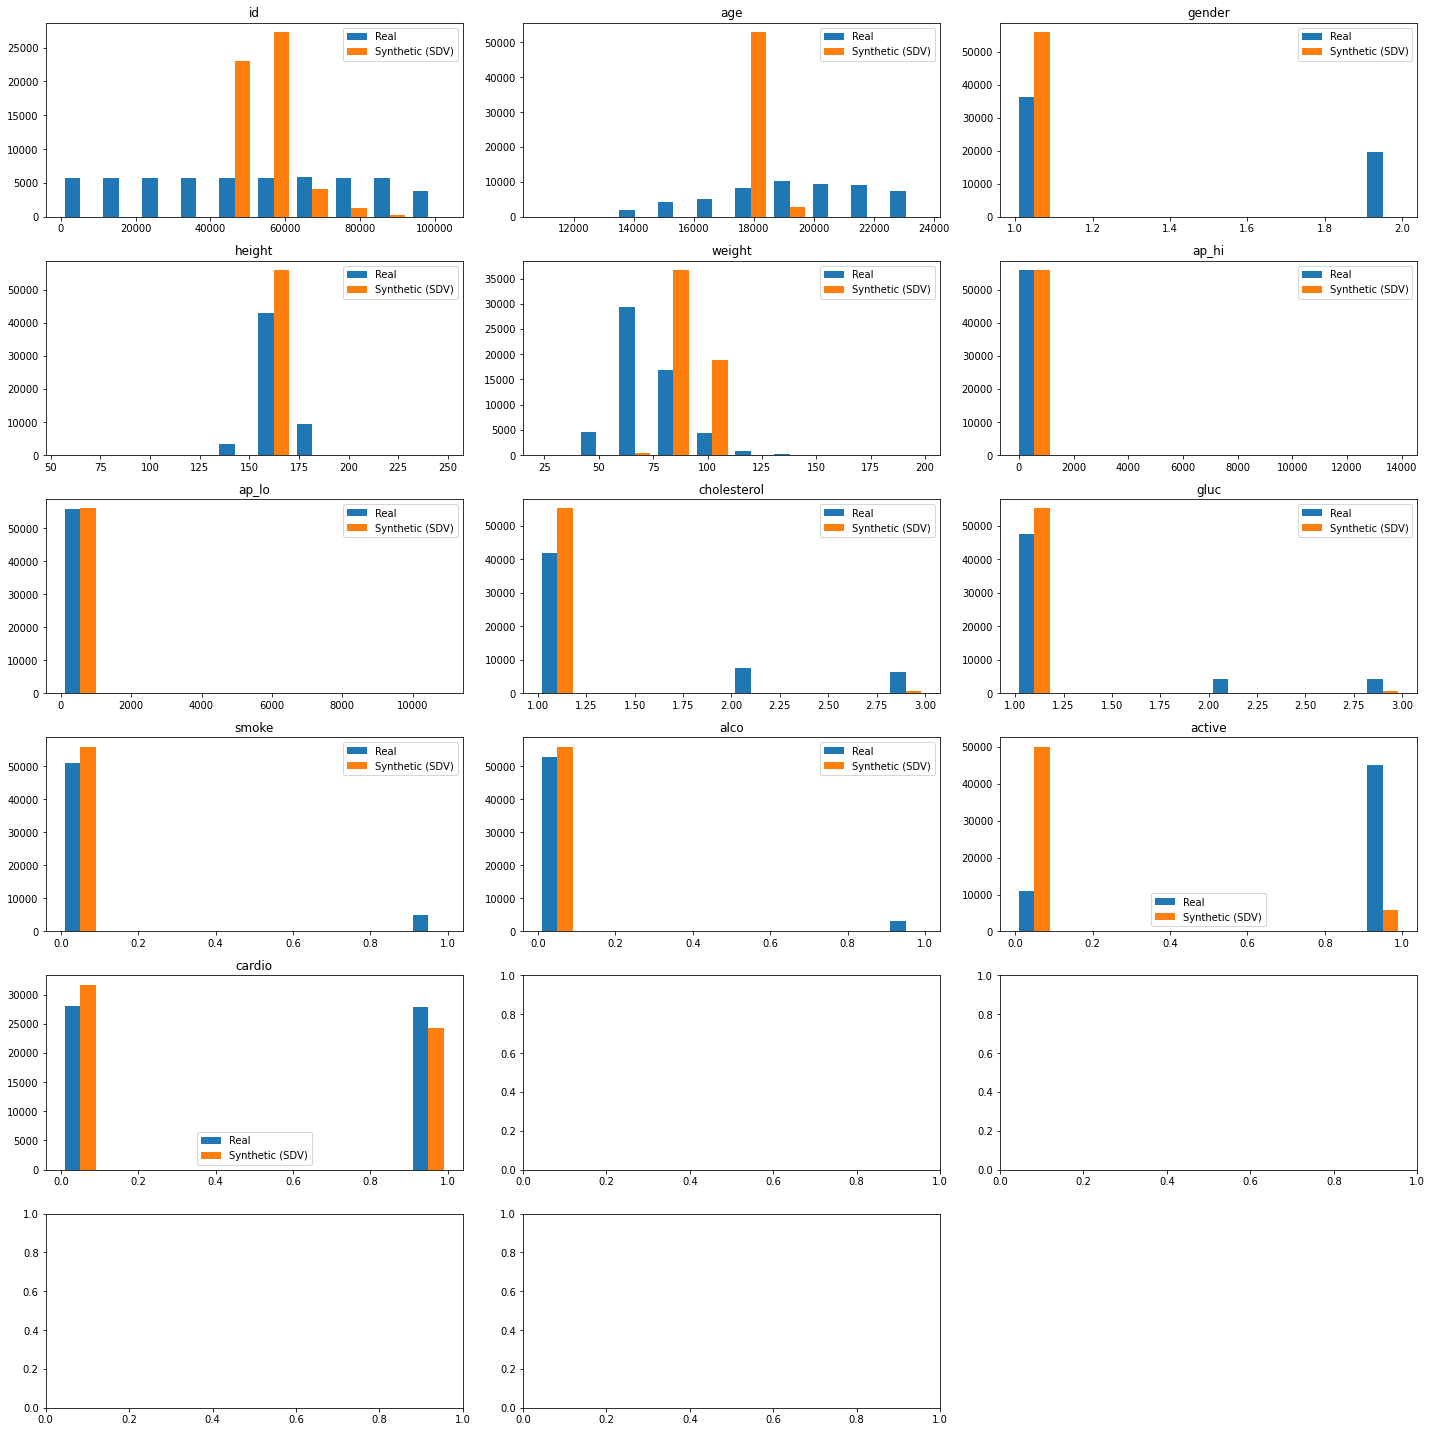

In [44]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (SDV)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[5,2])
fig.tight_layout(pad=1.1)

In [45]:
#Save generated samples
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index=False)